In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [ ]:
def remove_outliers(data, factor=1.5):
    """Remove outliers using the IQR method."""
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower = q1 - factor * iqr
    upper = q3 + factor * iqr
    return [x for x in data if lower <= x <= upper]


def plot2(data1, data2, title, y_axis_label, xlim=None, show_zero_line=False):
    colors = ['#99FF99', '#FF9999']
    # labels = ['All Nodules from Patients\nin the No-Cancer Cohort', 'All Nodules from Patients\nin the Cancer Cohort']
    # labels = ['Patients in the No-Cancer Cohort', 'Patients in the Cancer Cohort']
    labels = ['No-Cancer Cohort', 'Cancer Cohort']

    data = [
        remove_outliers(data1),
        remove_outliers(data2),
        # data1,
        # data2,
    ]

    plt.figure(figsize=(6, 5))
    parts = plt.violinplot(data, showmeans=False, showmedians=True, showextrema=False)

    if show_zero_line:
        plt.axhline(0, linestyle='dotted', color='black', linewidth=1)
        
    for i, pc in enumerate(parts['bodies']):
        pc.set_facecolor(colors[i])
        pc.set_edgecolor('black')
        pc.set_alpha(0.7)
    
    # for i, group_data in enumerate(data):
    #     mean_val = np.mean(group_data)
    #     median_val = np.median(group_data)
    #     x_pos = i + 1  # violinplot x-positions start at 1

    #     plt.text(x_pos + 0.1, mean_val + 0.1, f'Mean: {mean_val:.2f}', ha='left', va='bottom', fontsize=8.5, color='#8B4513')
    #     plt.text(x_pos + 0.1, median_val - 0.4, f'Median: {median_val:.2f}', ha='left', va='top', fontsize=8.5, color='#4B0082')

    plt.xticks([1, 2], labels)
    plt.title(title)
    plt.ylabel(y_axis_label)
    
    if xlim is not None:
        plt.ylim(xlim)

    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot3(data1, data2, data3, title, y_axis_label, xlim=None, show_zero_line=False):
    colors = ['#FF9999', '#99CCFF', '#FFD699']
    labels = ['All Nodules from Patients\nin the Cancer Cohort', 'Nodules from Patients\nin the Cancer Cohort\n with a Cancer Diagnosis\nWithin Two Years', 'Annotated Nodules from Patients\nin the Cancer Cohort']

    data = [
        remove_outliers(data1),
        remove_outliers(data2),
        remove_outliers(data3),
        # data1,
        # data2,
        # data3,
    ]

    plt.figure(figsize=(8, 5))
    parts = plt.violinplot(data, showmeans=False, showmedians=True, showextrema=False)

    if show_zero_line:
        plt.axhline(0, linestyle='dotted', color='black', linewidth=1)
        
    for i, pc in enumerate(parts['bodies']):
        pc.set_facecolor(colors[i])
        pc.set_edgecolor('black')
        pc.set_alpha(0.7)
    
    # for i, group_data in enumerate(data):
    #     mean_val = np.mean(group_data)
    #     median_val = np.median(group_data)
    #     x_pos = i + 1  # violinplot x-positions start at 1

    #     plt.text(x_pos + 0.1, mean_val + 0.1, f'Mean: {mean_val:.2f}', ha='left', va='bottom', fontsize=8.5, color='#8B4513')
    #     plt.text(x_pos + 0.1, median_val - 0.4, f'Median: {median_val:.2f}', ha='left', va='top', fontsize=8.5, color='#4B0082')

    plt.xticks([1, 2, 3], labels)
    plt.title(title)
    plt.ylabel(y_axis_label)
    
    if xlim is not None:
        plt.ylim(xlim)

    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot(data1, data2, data3, data4, title, y_axis_label, xlim=None, show_zero_line=False):
    colors = ['#99FF99', '#FF9999', '#99CCFF', '#FFD699']
    # labels = ['All Nodules', 'Nodules in Patients with a\nCancer Diagnosis Within Two Years', 'Annotated Nodules']
    labels = ['All Nodules from Patients\nin the No-Cancer Cohort', 'All Nodules from Patients\nin the Cancer Cohort', 'Nodules from Patients\nin the Cancer Cohort\n with a Cancer Diagnosis\nWithin Two Years', 'Annotated Nodules from Patients\nin the Cancer Cohort']

    data = [
        remove_outliers(data1),
        remove_outliers(data2),
        remove_outliers(data3),
        remove_outliers(data4),
        # data1,
        # data2,
        # data3,
        # data4,
    ]

    plt.figure(figsize=(10, 5))
    parts = plt.violinplot(data, showmeans=False, showmedians=True, showextrema=False)

    if show_zero_line:
        plt.axhline(0, linestyle='dotted', color='black', linewidth=1)
        
    for i, pc in enumerate(parts['bodies']):
        pc.set_facecolor(colors[i])
        pc.set_edgecolor('black')
        pc.set_alpha(0.7)
    
    # for i, group_data in enumerate(data):
    #     mean_val = np.mean(group_data)
    #     median_val = np.median(group_data)
    #     x_pos = i + 1  # violinplot x-positions start at 1

    #     plt.text(x_pos + 0.1, mean_val + 0.1, f'Mean: {mean_val:.2f}', ha='left', va='bottom', fontsize=8.5, color='#8B4513')
    #     plt.text(x_pos + 0.1, median_val - 0.4, f'Median: {median_val:.2f}', ha='left', va='top', fontsize=8.5, color='#4B0082')

    plt.xticks([1, 2, 3, 4], labels)
    plt.title(title)
    plt.ylabel(y_axis_label)
    
    if xlim is not None:
        plt.ylim(xlim)

    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Number of Nodules per Scan

In [3]:
no_cancer_num = [3, 5, 6, 4, 9, 3, 9, 6, 11, 14, 8, 5, 6, 5, 2, 6, 4, 8, 13, 6, 9, 4, 7, 7, 9, 9, 10, 3, 6, 15, 16, 14, 12, 9, 8, 10, 13, 14, 6, 9, 8, 11, 6, 6, 7, 7, 4, 5, 10, 5, 3, 8, 8, 8, 9, 9, 3, 3, 4, 9, 1, 3, 6, 11, 16, 13, 11, 15, 15, 7, 10, 7, 6, 9, 6, 17, 14, 13, 7, 7, 10, 10, 9, 12, 11, 9, 18, 19, 17, 11, 21, 5, 9, 9, 9, 10, 7, 15, 8, 11, 7, 5, 15, 9, 10, 10, 5, 4, 6, 11, 12, 7, 4, 5, 6, 5, 9, 9, 4, 13, 10, 16, 9, 9, 11, 4, 13, 3, 6, 4, 5, 11, 3, 10, 8, 7, 7, 5, 2, 8, 8, 7, 8, 2, 4, 15, 10, 13, 7, 8, 4, 8, 3, 13, 13, 10, 20, 12, 6, 2, 2, 11, 7, 6, 5, 4, 8, 11, 7, 9, 9, 7, 10, 13, 6, 6, 8, 11, 9, 5, 2, 2, 10, 3, 5, 7, 12, 11, 8, 11, 6, 38, 26, 23, 16, 12, 12, 16, 16, 15, 15, 12, 20, 12, 10, 11, 8, 11, 12, 7, 10, 7, 8, 3, 4, 6, 13, 19, 9, 23, 23, 10, 11, 6, 8, 8, 6, 4, 6, 18, 7, 11, 3, 9, 6, 9, 4, 6, 6, 3, 9, 9, 13, 6, 17, 9, 19, 25, 11, 5, 8, 6, 18, 23, 18, 3, 7, 4, 3, 4, 5, 8, 10, 7, 2, 1, 1, 5, 4, 4, 10, 4, 11, 6, 6, 9, 9, 15, 9, 13, 4, 5, 16, 10, 13, 9, 12, 9, 5, 4, 5, 7, 13, 10, 10, 11, 9, 19, 18, 15, 4, 9, 5, 13, 7, 11, 14, 9, 14, 13, 15, 11, 7, 8, 7, 12, 11, 8, 20, 16, 15, 6, 3, 6, 4, 11, 4, 8, 7, 14, 7, 11, 10, 10, 10, 5, 11, 6, 7, 1, 1, 0, 5, 7, 3, 7, 12, 7, 14, 12, 11, 5, 6, 12, 5, 4, 3, 1, 5, 4, 11, 6, 2, 5, 1, 2, 7, 4, 2, 1, 1, 1, 18, 17, 12, 3, 3, 8, 8, 5, 4, 14, 18, 8, 14, 17, 12, 3, 9, 6, 10, 7, 9, 20, 8, 12, 16, 12, 10, 11, 8, 8, 36, 8, 18, 9, 8, 6, 14, 16, 9, 11, 11, 13, 23, 9, 9, 32, 39, 35, 9, 7, 19, 9, 4, 8, 14, 17, 14, 25, 21, 18, 15, 15, 12, 18, 21, 15, 13, 21, 15, 9, 6, 9, 5, 8, 9, 26, 9, 7, 15, 10, 9, 19, 26, 35, 16, 5, 6, 10, 14, 14, 15, 10, 10, 31, 15, 27, 2, 7, 9, 7, 10, 9, 7, 10, 4, 13, 4, 2, 11, 11, 11, 8, 6, 9, 9, 7, 10, 6, 6, 3, 13, 10, 3, 4, 6, 3, 20, 10, 13, 24, 35, 27, 23, 11, 17, 9, 3, 20, 11, 8, 13, 5, 6, 0, 0, 15, 19, 13, 12, 5, 6, 7, 6, 9, 3, 6, 3, 7, 6, 2, 12, 0, 5, 5, 7, 11, 9, 14, 12, 9, 10, 8, 10, 2, 6, 5, 4, 8, 8, 8, 12, 14, 3, 3, 14, 8, 7, 7, 1, 2, 2, 5, 0, 3, 9, 11, 10, 14, 14, 15, 0, 0, 1, 9, 6, 6, 6, 7, 9, 9, 7, 12, 5, 9, 7, 3, 4, 1, 6, 13, 8, 6, 8, 7, 5, 7, 5, 7, 6, 5, 11, 4, 5, 12, 11, 12, 8, 14, 7, 0, 1, 1, 12, 3, 13, 7, 17, 6, 6, 2, 6, 1, 1, 4, 6, 7, 6, 2, 3, 4, 2, 4, 1, 10, 16, 14, 8, 10, 11, 14, 4, 13, 17, 14, 14, 4, 9, 6, 10, 12, 9, 15, 16, 14, 5, 8, 3, 5, 2, 5, 13, 12, 10, 7, 10, 2, 4, 3, 4, 7, 8, 7, 7, 1, 15, 8, 14, 7, 18, 8, 6, 8, 11, 5, 13, 8, 13, 17, 10, 15, 15, 19, 11, 10, 5, 7, 7, 11, 4, 7, 7, 3, 7, 4, 8, 7, 4, 6, 9, 6, 2, 4, 10, 10, 6, 6, 6, 5, 3, 14, 11, 16, 9, 11, 9, 3, 16, 1, 11, 9, 12, 13, 15, 14, 0, 1, 3, 28, 11, 7, 3, 3, 7, 0, 0, 7, 2, 3, 8, 11, 20, 15, 8, 9, 8, 3, 10, 3, 13, 11, 7, 1, 2, 5, 5, 6, 6, 6, 9, 8, 10, 6, 5, 5, 8, 8, 6, 10, 6, 6, 8, 9, 6, 13, 10, 7, 2, 2, 8, 7, 7, 15, 13, 18, 14, 8, 7, 6, 11, 5, 11, 7, 7, 10, 13, 8, 12, 8, 7, 11, 13, 10, 5, 9, 6, 3, 3, 3, 6, 13, 10, 9, 10, 11, 9, 5, 8, 6, 5, 7, 3, 4, 4, 7, 7, 9, 2, 3, 6, 12, 12, 14, 10, 8, 8, 11, 7, 10, 4, 8, 3, 4, 2, 8, 7, 5, 8, 10, 7, 7, 12, 16, 13, 11, 9, 10, 7, 3, 7, 3, 6, 2, 5, 9, 5, 5, 5, 3, 7, 31, 12, 1, 7, 2, 6, 2, 7, 9, 8, 7, 3, 7, 6, 10, 10, 10, 6, 7, 7, 16, 11, 13, 5, 8, 4, 10, 10, 12, 10, 11, 7, 20, 24, 22, 15, 15, 17, 6, 7, 4, 12, 16, 12, 4, 2, 7, 5, 11, 7, 3, 14, 9, 3, 0, 2, 12, 11, 14, 7, 9, 7, 3, 2, 5, 10, 15, 9, 6, 9, 13, 10, 17, 11, 12, 9, 8, 4, 9, 5, 7, 13, 16, 4, 7, 7, 10, 9, 10, 5, 6, 2, 3, 8, 3, 1, 0, 2, 2, 8, 9, 9, 5, 9, 7, 6, 10, 8, 5, 2, 10, 3, 2, 39, 53, 48, 3, 7, 4, 7, 1, 5, 13, 6, 9, 14, 17, 8, 17, 11, 12, 4, 9, 11, 9, 11, 6, 10, 26, 15, 3, 7, 8, 5, 6, 4, 12, 7, 2, 0, 3, 3, 1, 9, 3, 17, 17, 14, 8, 13, 13, 6, 6, 5, 5, 12, 6, 6, 9, 9, 6, 2, 1, 11, 15, 13, 3, 3, 3, 2, 5, 5, 11, 4, 5, 4, 14, 9, 10, 6, 11, 10, 10, 11, 15, 9, 15, 10, 14, 5, 4, 8, 7, 8, 12, 12, 19, 9, 7, 5, 4, 9, 26, 16, 16, 6, 7, 5, 13, 12, 15, 7, 9, 11, 10, 6, 2, 4, 6, 7, 8, 10, 4, 7, 8, 11, 12, 8, 7, 5, 1, 9, 6, 7, 9, 6, 7, 5, 6, 5, 4, 5, 8, 7, 11, 8, 15, 10, 11, 15, 7, 3, 5, 13, 4, 17, 18, 11, 11, 6, 8, 7, 9, 12, 11, 0, 5, 8, 7, 9, 7, 6, 8, 8, 11, 11, 9, 15, 8, 6, 9, 7, 2, 5, 12, 3, 7, 1, 12, 18, 14, 10, 9, 8, 7, 10, 8, 13, 25, 24, 15, 11, 12, 9, 8, 5, 27, 12, 23, 23, 20, 4, 6, 9, 8, 14, 3, 8, 6, 7, 4, 7, 13, 14, 11, 6, 6, 6, 4, 4, 1, 15, 5, 9, 29, 24, 25, 5, 8, 9, 17, 18, 14, 13, 13, 12, 18, 13, 12, 12, 8, 8, 7, 6, 13, 9, 12, 9, 12, 14, 15, 8, 7, 12, 4, 4, 3, 4, 11, 9, 8, 7, 6, 11, 15, 11, 19, 11, 9, 9, 12, 12, 8, 6, 6, 9, 5, 10, 11, 13, 22, 19, 13, 13, 17, 9, 6, 8, 5, 7, 6, 22, 19, 16, 10, 6, 7, 15, 18, 12, 28, 29, 13, 12, 12, 9, 10, 10, 15, 16, 12, 14, 25, 26, 26, 11, 10, 11, 4, 5, 17, 14, 10, 8, 13, 7, 8, 10, 12, 15, 5, 7, 7, 10, 14, 9, 7, 9, 9, 6, 4, 6, 4, 6, 3, 4, 9, 8, 19, 11, 14, 12, 13, 19, 7, 3, 3, 12, 8, 5, 12, 7, 9, 3, 3, 2, 10, 8, 5, 8, 7, 5, 6, 10, 8, 4, 9, 3, 8, 7, 3, 11, 13, 4, 7, 7, 8, 15, 10, 12, 3, 8, 7, 12, 10, 13, 3, 3, 6, 8, 3, 10, 3, 2, 10, 14, 3, 4, 3, 6, 7, 6, 8, 6, 6, 6, 7, 13, 6, 12, 9, 15, 6, 4, 6, 18, 13, 11, 11, 2, 8, 17, 5, 11, 13, 8, 8, 8, 6, 7, 3, 3, 6, 3, 6, 4, 20, 9, 8, 13, 10, 15, 14, 18, 15, 9, 6, 11, 16, 14, 19, 8, 8, 7, 14, 17, 19, 6, 5, 3, 18, 23, 24, 12, 8, 9, 11, 8, 11, 9, 6, 3, 10, 11, 13, 7, 14, 14, 6, 8, 10, 7, 8, 6, 13, 36, 31, 14, 6, 12, 7, 8, 6, 14, 7, 10, 8, 12, 10, 15, 12, 6, 20, 13, 21, 18, 6, 5, 14, 17, 10, 6, 14, 7, 8, 7, 8, 10, 17, 7, 8, 0, 12, 7, 16, 8, 27, 10, 11, 4, 6, 6, 12, 9, 12, 13, 8, 8, 12, 14, 7, 17, 34, 10, 10, 6, 3, 8, 5, 11, 9, 7, 8, 3, 6, 4, 1, 5, 8, 4, 4, 7, 5, 6, 5, 5, 10, 7, 3, 2, 6, 11, 7, 8, 12, 11, 10, 6, 7, 9, 7, 5, 8, 1, 2, 4, 8, 8, 6, 10, 9, 6, 6, 4, 9, 3, 4, 6, 11, 8, 8, 8, 6, 6, 9, 10, 9, 14, 9, 9, 4, 4, 8, 2, 5, 6, 9, 4, 13, 5, 4, 7, 3, 4, 5, 4, 6, 11, 6, 13, 11, 10, 7, 12, 7, 14, 16, 12, 6, 14, 5, 7, 6, 6, 4, 2, 2, 9, 18, 12, 8, 1, 7, 2, 6, 12, 8, 13, 4, 3, 3, 11, 18, 11, 0, 4, 7, 0, 12, 10, 10, 7, 12, 6, 8, 10, 9, 11, 11, 4, 3, 3, 15, 25, 15, 8, 9, 9, 8, 7, 12, 13, 14, 8, 7, 7, 4, 4, 4, 14, 14, 12, 5, 3, 7, 3, 5, 4, 5, 4, 4, 10, 5, 9, 1, 8, 5, 7, 5, 10, 9, 9, 15, 7, 4, 8, 5, 4, 3, 4, 20, 11, 20, 17, 22, 15, 15, 14, 5, 3, 7, 3, 5, 3, 6, 3, 4, 0, 8, 7, 6, 9, 21, 10, 16, 12, 14, 22, 12, 12, 6, 8, 11, 10, 15, 9, 10, 8, 7, 4, 8, 4, 9, 13, 9, 7, 10, 12, 9, 6, 5, 5, 8, 5, 8, 9, 4, 15, 7, 7, 8, 1, 6, 4, 16, 9, 18, 9, 4, 10, 15, 17, 19, 13, 7, 10, 18, 18, 2, 4, 4, 8, 6, 7, 7, 5, 6, 6, 21, 17, 19, 11, 6, 7, 11, 12, 21, 23, 4, 4, 9, 18, 7, 7, 22, 8, 15, 20, 9, 14, 5, 4, 10, 10, 4, 17, 32, 15, 21, 25, 5, 11, 16, 15, 8, 7, 5, 8, 7, 10, 7, 4, 10, 27, 22, 18, 17, 15, 9, 15, 14, 17, 20, 8, 13, 3, 8, 12, 11, 5, 3, 13, 14, 20, 4, 4, 8, 21, 0, 14, 9, 8, 7, 11, 5, 10, 17, 19, 8, 30, 29, 20, 17, 9, 12, 8, 10, 11, 9, 18, 17, 15, 19, 0, 6, 1, 8, 9, 8, 11, 6, 6, 10, 13, 9, 10, 4, 7, 6, 4, 8, 6, 7, 6, 17, 12, 12, 3, 6, 2, 3, 5, 5, 11, 14, 12, 4, 1, 7, 14, 22, 16, 5, 9, 5, 9, 9, 6, 10, 8, 8, 5, 13, 5, 10, 14, 9, 7, 13, 12, 5, 5, 2, 8, 5, 7, 9, 5, 7, 8, 9, 11, 8, 10, 12, 15, 14, 3, 14, 6, 3, 6, 4, 10, 6, 12, 10, 11, 10, 13, 11, 14, 12, 11, 10, 2, 3, 2, 6, 3, 14, 12, 15, 2, 6, 3, 6, 7, 7, 6, 10, 7, 13, 9, 15, 4, 7, 17]
cancer_num = [9, 8, 8, 6, 21, 4, 8, 6, 7, 13, 1, 7, 5, 15, 9, 12, 9, 10, 5, 6, 6, 9, 11, 10, 11, 18, 11, 7, 11, 7, 8, 11, 19, 7, 5, 3, 1, 9, 8, 8, 12, 15, 10, 5, 9, 12, 10, 10, 5, 3, 1, 3, 6, 5, 8, 6, 2, 2, 8, 2, 18, 10, 10, 9, 8, 14, 12, 16, 20, 21, 5, 11, 12, 5, 4, 3, 10, 12, 8, 16, 9, 8, 3, 10, 8, 6, 8, 8, 10, 9, 7, 12, 9, 8, 23, 6, 9, 8, 7, 11, 9, 9, 3, 10, 3, 4, 2, 6, 2, 2, 11, 12, 8, 15, 12, 7, 7, 3, 10, 10, 5, 5, 6, 9, 8, 5, 16, 11, 4, 4, 5, 14, 14, 8, 7, 14, 18, 15, 14, 9, 14, 3, 3, 4, 2, 4, 1, 4, 7, 14, 8, 11, 12, 8, 10, 10, 10, 5, 11, 10, 12, 8, 13, 2, 11, 9, 13, 12, 20, 19, 16, 9, 5, 6, 8, 4, 10, 9, 2, 6, 7, 6, 6, 9, 7, 9, 16, 5, 8, 7, 15, 16, 16, 6, 10, 11, 2, 5, 6, 9, 5, 10, 8, 10, 8, 11, 17, 11, 12, 10, 16, 11, 9, 8, 15, 15, 14, 13, 10, 17, 12, 9, 10, 12, 8, 11, 10, 6, 15, 11, 9, 10, 14, 15, 10, 12, 20, 14, 21, 11, 14, 30, 23, 6, 15, 8, 15, 7, 3, 4, 32, 21, 9, 13, 7, 5, 5, 4, 9, 15, 11, 15, 12, 24, 4, 9, 8, 18, 24, 19, 18, 4, 10, 8, 11, 13, 16, 14, 26, 7, 8, 9, 11, 13, 10, 12, 13, 14, 12, 11, 9, 9, 28, 23, 28, 10, 9, 16, 15, 14, 19, 9, 5, 7, 4, 12, 12, 25, 9, 15, 5, 11, 32, 18, 20, 22, 14, 14, 17, 9, 4, 10, 7, 16, 19, 18, 8, 10, 9, 6, 16, 15, 15, 13, 6, 4, 17, 11, 10, 6, 23, 15, 13, 17, 13, 19, 16, 8, 15, 5, 31, 32, 8, 6, 27, 15, 8, 10, 13, 14, 19, 14, 24, 22, 28, 4, 4, 3, 29, 28, 8, 6, 9, 12, 15, 5, 6, 5, 7, 2, 17, 21, 19, 4, 10, 5, 6, 5, 8, 21, 7, 7, 8, 9, 6, 6, 11, 3, 4, 12, 11, 13, 6, 10, 4, 4, 8, 12, 5, 7, 6, 10, 6, 12, 20, 13, 6, 8, 3, 8, 12, 6, 5, 9, 5, 5, 6, 3, 5, 9, 7, 14, 2, 5, 7, 11, 9, 6, 9, 10, 7, 4, 6, 10, 11, 7, 4, 9, 10, 19, 16, 16, 8, 10, 6, 21, 18, 6, 5, 18, 2, 11, 5, 10, 7, 5, 5, 10, 10, 13, 6, 8, 7, 11, 8, 6, 10, 19, 19, 16, 11, 2, 10, 6, 6, 9, 6, 9, 6, 9, 8, 9, 9, 5, 8, 14, 6, 7, 4, 8, 3, 10, 6, 4, 5, 2, 14, 10, 3, 7, 7, 7, 9, 12, 9, 7, 10, 4, 8, 6, 10, 13, 1, 9, 9, 11, 8, 20, 12, 10, 0, 5, 8, 6, 8, 15, 7, 8, 9, 9, 13, 13, 11, 9, 17, 16, 7, 4, 4, 13, 8, 8, 15, 8, 8, 6, 14, 16, 7, 5, 2, 9, 5, 5, 17, 8, 6, 5, 7, 8, 7, 11, 6, 16, 6, 11, 7, 11, 15, 6, 6, 8, 6, 9, 7, 6, 7, 7, 23, 13, 10, 11, 10, 10, 13, 17, 25, 18, 12, 13, 10, 12, 14, 16, 26, 12, 25, 26, 15, 29, 24, 4, 11, 14, 19, 14, 16, 12, 7, 17, 19, 11, 11, 22, 24, 16, 10, 11, 21, 24, 11, 8, 11, 7, 32, 34, 12, 16, 17, 10, 17, 17, 19, 7, 8, 6, 15, 13, 7, 11, 18, 20, 11, 10, 16, 6, 10, 11, 18, 19, 9, 8, 7, 15, 11, 20, 10, 13, 13, 30, 11, 9, 10, 9, 9, 12, 6, 10, 9, 21, 10, 8, 12, 10, 7, 18, 11, 8, 2, 4, 7, 13, 14, 16, 5, 5, 24, 16, 13, 7, 6, 9, 4, 4, 4, 9, 7, 7, 7, 20, 25, 22, 16, 10, 7, 15, 9, 13, 11, 33, 33, 35, 21, 16, 18, 21, 7, 7, 22, 20, 25, 8, 21, 9, 16, 24, 21, 19, 9, 21, 32, 7, 12, 13, 4, 25, 11, 6, 11, 16, 15, 13, 12, 12, 8, 7, 20, 22, 24, 16, 12, 12, 8, 6, 13, 10, 11, 10, 13, 3, 7, 6, 9, 3, 6, 8, 13, 11, 12, 18, 23, 16, 12, 13, 17, 7, 8, 11, 8, 5, 7, 8, 8, 7, 12, 12, 4, 7, 11, 7, 6, 7, 6, 7, 5, 12, 12, 15, 12, 14, 9, 6, 8, 13, 10, 9, 9, 13, 14, 9, 6, 4, 8, 9, 10, 2, 2, 5, 4, 11, 11, 9, 6, 6, 7, 5, 9, 4, 7, 17, 6, 16, 8, 6, 6, 5, 4, 7, 7, 7, 6, 7, 2, 6, 5, 2, 3, 4, 8, 6, 13, 9, 9, 8, 6, 7, 2, 5, 3, 1, 3, 5, 12, 16, 15, 8, 10, 7, 9, 4, 4, 10, 7, 9, 13, 11, 3, 6, 8, 10, 4, 6, 7, 11, 8, 5, 9, 14, 12, 10, 3, 14, 2, 3, 7, 9, 11, 9, 5, 3, 3, 9, 18, 12, 8, 13, 10, 9, 20, 16, 18, 7, 5, 9, 11, 11, 7, 10, 8, 14, 12, 7, 16, 11, 16, 11, 13, 6, 7, 6, 7, 8, 13, 9, 13, 12, 9, 15, 14, 10, 9, 3, 8, 6, 11, 14, 4, 9, 5, 6, 4, 14, 6, 9, 13, 6, 16, 11, 14, 4, 4, 4, 13, 10, 9, 6, 10, 3, 4, 5, 15, 4, 10, 4, 14, 8, 12, 4, 6, 6, 5, 15, 17, 9, 6, 7, 16, 12, 10, 9, 9, 12, 5, 8, 11, 11, 3, 5, 5, 4, 6, 11, 8, 14, 10, 8, 9, 11, 9, 10, 7, 9, 13, 5, 3, 4, 5, 9, 7, 11, 11, 8, 7, 6, 3, 10, 7, 16, 15, 19, 8, 9, 9, 9, 11, 9, 7, 9, 20, 3, 9, 19, 21, 6, 3, 11, 6, 7, 11, 13, 9, 14, 11, 9, 13, 7, 10, 19, 3, 10, 7, 7, 8, 13, 9, 18, 5, 14, 18, 3, 5, 6, 7, 4, 4, 13, 12, 10, 15, 12, 9, 3, 10, 13, 14, 2, 5, 6, 12, 4, 7, 8, 9, 12, 11, 0, 4, 8, 8, 4, 8, 9, 11, 6, 18, 11, 12, 17, 12, 13, 11, 11, 11, 4, 6, 4, 1, 8, 6, 19, 18, 12, 6, 7, 4, 11, 13, 3, 4, 4, 6, 5, 2, 5, 11, 8, 10, 9, 11, 13, 22, 14, 7, 8, 7, 6, 6, 6, 6, 10, 17, 14, 7, 8, 9, 13, 10, 17, 9, 14, 12, 12, 8, 7, 3, 14, 23, 22, 3, 12, 10, 18, 14, 13, 11, 25, 5, 6, 11, 16, 27, 10, 9, 18, 11, 20, 32, 13, 23, 10, 9, 14, 10, 5, 4, 13, 10, 13, 18, 5, 8, 26, 12, 9, 10, 22, 13, 14, 7, 1, 13, 13, 11, 14, 14, 16, 5, 10, 5, 15, 24, 28, 11, 7, 11, 6, 7, 8, 11, 14, 13, 24, 10, 16, 21, 11, 7, 10, 7, 23, 12, 16, 12, 17, 13, 8, 14, 10, 11, 16, 8, 8, 28, 11, 6, 12, 11, 7, 4, 11, 10, 7, 8, 12, 7, 18, 17, 21, 23, 10, 17, 14, 23, 20, 18, 8, 4, 7, 12, 10, 5, 9, 11, 12, 10, 5, 4, 3, 8, 12, 9, 7, 10, 11, 7, 7, 5, 10, 9, 7, 3, 5, 6, 8, 6, 4, 7, 8, 2, 11, 12, 10, 10, 12, 9, 13, 12, 12, 7, 3, 2, 8, 2, 4, 5, 11, 4, 5, 7, 8, 9, 14, 11, 14, 14, 10, 14, 9, 15, 3, 8, 4, 8, 12, 5, 3, 6, 3, 14, 7, 13, 7, 4, 4, 3, 7, 9, 6, 6, 10, 8, 15, 12, 15, 15, 17, 9, 9, 14, 18, 11, 9, 7, 4, 5, 7, 15, 13, 9, 22, 4, 11, 12, 13, 23, 16]

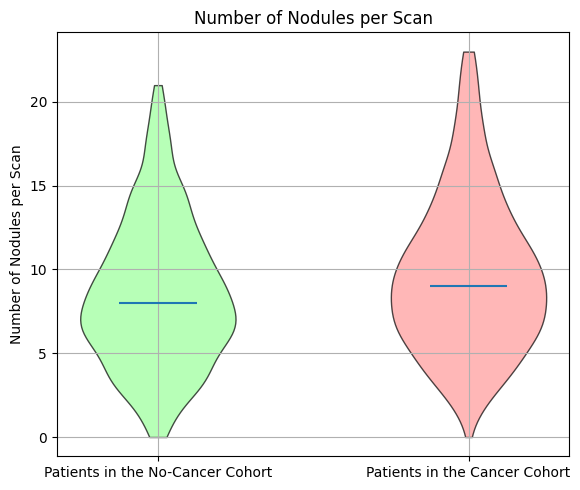

In [4]:
plot2(no_cancer_num, cancer_num, title="Number of Nodules per Scan", y_axis_label="Number of Nodules per Scan")

### Nodule Volumes

In [5]:
all_nodules = [73.861083984375, 647.841796875, 39.1552734375, 1199.5751953125, 597.117919921875, 99.66796875, 661.190185546875, 40.045166015625, 187.767333984375, 307.50732421875, 211.5966796875, 121.61865234375, 639.73388671875, 920.54443359375, 46.47216796875, 81.0791015625, 228.40576171875, 571.5087890625, 39.55078125, 44.49462890625, 53.3935546875, 407.373046875, 34.60693359375, 42.51708984375, 247.1923828125, 79.32139205932617, 61.69441604614258, 424.1491103172302, 219.23551416397095, 42.96575403213501, 336.01423025131226, 86.671875, 8080.3466796875, 51.46142578125, 90.283203125, 170.63525390625, 139.93896484375, 48.7529296875, 213.97119140625, 53.26708984375, 117.3681640625, 142.6474609375, 130.91064453125, 31.59912109375, 41.5302734375, 59.5869140625, 27.98779296875, 257.30712890625, 420.7197265625, 50.55859375, 172.44091796875, 81.2548828125, 93.1832999587059, 3422.3785400390625, 105.84899121522903, 767.5323486328125, 1291.9005081653595, 220.74490475654602, 795.95947265625, 3768.4478759765625, 147.0794677734375, 414.0472412109375, 4421.0357666015625, 321.35009765625, 86.1418604850769, 119.52445721626282, 597.2502326965332, 74.26762390136719, 95.33032560348511, 75.42805552482605, 107.96446514129639, 89.3532350063324, 436.3222904205322, 93.99496150016785, 67.30503416061401, 70.06204652786255, 373.28139543533325, 80.0697820186615, 200.75467085838318, 391.0654571056366, 33.65251708030701, 71.94676065444946, 126.48704695701599, 131.12877345085144, 73.10719227790833, 219.32157683372498, 75.42805552482605, 89.3532350063324, 454.889196395874, 96.31582474708557, 71.51055908203125, 88.89999389648438, 40.24181365966797, 44.034576416015625, 29.967308044433594, 37.387847900390625, 43.666648864746094, 72.28317260742188, 82.25326538085938, 325.689697265625, 57.328033447265625, 65.07186889648438, 107.0261001586914, 706.6074163913727, 1270.5078125, 261.1972939968109, 392.578125, 40.325196266174316, 246.09375, 208.95783519744873, 113.28125, 253.86544013023376, 204.1015625, 52.23945879936218, 95.703125, 94.39761853218079, 70.56909346580505, 113.6437349319458, 69.65261173248291, 25.66148853302002, 34.826305866241455, 97.14706373214722, 54.98890399932861, 49.49001359939575, 92.7734375, 82.03125, 1347.65625, 99.23134887218475, 104.277010679245, 333.01367926597595, 318.71763747930527, 102.80616343021393, 80.73058891296387, 60.5479416847229, 102.59512341022491, 200.98552864789963, 28.59208357334137, 69.79832166433334, 85.77625072002411, 126.98248881101608, 85.77625072002411, 82.41247618198395, 73.1620962023735, 971.2898978590965, 662.6635839939117, 68.11643439531326, 52.1385053396225, 52.1385053396225, 39.52435082197189, 473.8429532647133, 181.3126882314682, 59.81449508666992, 64.48750251531601, 1905.6524294018745, 99.06775748729706, 1251.4313893914223, 102.80616343021393, 293.4648665189743, 229.16830426454544, 239.6755439043045, 136.70329904556274, 66.08973568677902, 199.12751531600952, 63.51481091976166, 109.00514847040176, 109.39037644863129, 68.82989978790283, 108.16127109527588, 111.8485871553421, 61.455267667770386, 63.94186568260193, 54.01985204219818, 67.24920356273651, 68.35164952278137, 138.90819096565247, 107.77587890625, 153.25927734375, 31.640625, 500.3173828125, 76.13525390625, 253.125, 732.67822265625, 855.28564453125, 1260.68115234375, 149.30496096611023, 92.90086460113525, 122.7618567943573, 171.70070511102676, 38.155712246894836, 285.338369846344, 34.83782422542572, 254.64790564775467, 146.8165449500084, 67.1872324347496, 201.5616973042488, 129.7760009765625, 133.39596116542816, 127.47500896453857, 217.529296875, 113.55193388462067, 201.32260036468506, 2248.2147216796875, 3138.663648247719, 4930.205863952637, 744.049072265625, 296.55796325206757, 960.8978261947632, 142.1356201171875, 762.8926043510437, 936.2819623947144, 438.7664794921875, 274.383544921875, 265.7318115234375, 1275.5126953125, 190.338134765625, 47.405176281929016, 314.19709861278534, 67.24920356273651, 68.35164952278137, 100.32258236408234, 47.405176281929016, 276.04932975769043, 54.50655555725098, 456.2726182937622, 189.89380645751953, 182.86070251464844, 59.7813835144043, 145.9369068145752, 288.35726165771484, 1315.1904373168945, 112.5296630859375, 240.88381004333496, 109.01311111450195, 264.6205358505249, 89.0777587890625, 41.324188232421875, 72.6171875, 145.5230712890625, 862.4757995605469, 447.5859375, 1859.16748046875, 914.4642944335938, 347.2421875, 122.5921630859375, 223.950439453125, 187.484375, 1038.0645751953125, 2067.542449951172, 7207.5859375, 44.097900390625, 98.779296875, 44.9798583984375, 53.7994384765625, 237.2467041015625, 89.959716796875, 333.25958251953125, 269.27374267578125, 34.328125, 179.5625, 73.9375, 608.6640625, 124.109375, 238.9765625, 182.54514318704605, 178.89068961143494, 142.56015515327454, 239.06539672613144, 374.0441691875458, 885.1496200561523, 301.674753844738, 474.49126267433167, 1151.405529499054, 1368.1519367694855, 362.03513753414154, 113.80429428815842, 1564.9999932646751, 243.64811998605728, 55.75646632909775, 78.87453132867813, 69.92999684810638, 131.72859871387482, 321.1901018023491, 1251.1249437332153, 262.7787934541702, 678.7565596103668, 75.535604596138, 82.98277688026428, 78.72724986076355, 96.81323969364166, 303.0223397612572, 33.0338819026947, 448.4984735250473, 38.751284539699554, 174.0631469488144, 33.0338819026947, 67.97356468439102, 169.61627823114395, 168.98101127147675, 29.222280144691467, 660.0423710942268, 20.328542709350586, 160.08727383613586, 242.0367116332054, 36.21021670103073, 386.87757843732834, 67.97356468439102, 67.97356468439102, 181.05108350515366, 239.0655517578125, 39.6881103515625, 464.910888671875, 371.3043212890625, 445.08056640625, 530.938720703125, 38.5589599609375, 243.4722900390625, 398.809814453125, 152.032470703125, 109.36279296875, 70.556640625, 320.37342220544815, 32.43286496400833, 177.19418907165527, 220.49559217691422, 46.7347776889801, 110.08636522293091, 86.71036577224731, 394.6492338180542, 327.1434438228607, 263.2278960943222, 802.7996256351471, 729.0625319480896, 1370.8495922088623, 105.93216276168823, 93.4695553779602, 188.90472543239594, 2915.2115771770477, 1011.5482993125916, 133.9730293750763, 177.5921552181244, 110.08636522293091, 253.40635013580322, 291.09908509254456, 425.80575227737427, 35.310720920562744, 50.88898015022278, 45.4197154045105, 46.45198166370392, 58.83917677402496, 37.48316264152527, 233.7185435295105, 257.97235465049744, 128.98617732524872, 76.629638671875, 12028.787870049477, 1211.588110089302, 216.07940816879272, 239.2307733297348, 69.2138671875, 35.27827072143555, 39.68805456161499, 2459.564208984375, 91.50301468372345, 249.664306640625, 88.19567680358887, 98.876953125, 39.68805456161499, 89.29812276363373, 2469.4789505004883, 141.1130828857422, 218.28430008888245, 1225.9199075698853, 93.70790660381317, 95.9127985239029, 46.302730321884155, 110.24459600448608, 175.28890764713287, 545.7107502222061, 87.093230843544, 747.4583609104156, 625.0868593454361, 85.2813720703125, 296.630859375, 317.6422119140625, 194.0460205078125, 97.6409912109375, 383.69566309452057, 138.59241342544556, 128.3263087272644, 37.856261074543, 264.3521959781647, 980.5005407333374, 845.39794921875, 515.0382053852081, 936.859130859375, 1203.5919559001923, 2668.4417724609375, 490.2502703666687, 601.7959779500961, 290.5696827173233, 431.03464782238007, 246.50224268436432, 245.12513518333435, 331.23779296875, 105.0567626953125, 510.4522705078125, 258.3160400390625, 525.2838134765625, 432.586669921875, 77.8656005859375, 108.7646484375, 64.27001953125, 228.0487060546875, 126.6663818359375, 102.19345092773438, 99.151611328125, 116.0302734375, 80.4229736328125, 105.3941650390625, 176.96914672851562, 355.8441162109375, 493.128662109375, 470.4193115234375, 350.9915771484375, 354.742431640625, 305.54638671875, 339.8139953613281, 88.134765625, 172.111572265625, 185.0830078125, 197.25146484375, 147.625732421875, 978.2958984375, 35.7760009765625, 654.6041259765625, 87.23831176757812, 87.23831176757812, 40.16876220703125, 22.86529541015625, 198.37188720703125, 117.57835239171982, 4638.768857717514, 4194.715770483017, 14748.906111717224, 452.2059520483017, 50.00697731971741, 300.7562493085861, 65.00907051563263, 147.1633903980255, 1188.0229040384293, 444.296875, 51.046875, 62.390625, 3248.09375, 320.4609375, 94.744873046875, 71.6094970703125, 202.7099609375, 90.338134765625, 1185.41259765625, 1556.6802978515625, 44.0673828125, 223.6419677734375, 79.0551552772522, 370.95111322402954, 38.514050006866455, 163.1779487133026, 53.71696448326111, 88.17690396308899, 59.871443033218384, 134.19461369514465, 79.94098663330078, 99.22457885742188, 151.20620727539062, 46.17999267578125, 54.00605082511902, 27.00302541255951, 49.5758056640625, 79.3212890625, 65.68794250488281, 147.48802185058594, 26.027297973632812, 32.224273681640625, 27.570045471191406, 159.71612548828125, 251.93317413330078, 101.72396087646484, 2290.215156555176, 419.2548294067383, 110.28018188476562, 628.4068984985352, 808.0875396728516, 559.0064392089844, 219.60967254638672, 104.57603454589844, 253.83455657958984, 615.0972213745117, 91.266357421875, 265.2428512573242, 62.74562072753906, 251.93317413330078, 155.3375244140625, 145.18049490451813, 138.812255859375, 168.1587027311325, 64.9993896484375, 87.73497533798218, 202.7099609375, 210.98172640800476, 2173.6236572265625, 5303.788151979446, 64.9993896484375, 894.56787109375, 96.9482421875, 61.6943359375, 198.30322265625, 44.911951661109924, 48.04534363746643, 195.31476652622223, 8929.122668623924, 129.5135350227356, 94.11919713020325, 35.03816485404968, 221.18011325597763, 352.7706143260002, 389.27123188972473, 142.54162520170212, 192.7367318868637, 242.08186626434326, 140.51742029190063, 31.056555211544037, 24.685492753982544, 8541.317139565945, 177.88528257608414, 347.29983741045, 54.58913433551788, 439.53665059804916, 57.41271024942398, 84.70727741718292, 31.852877140045166, 78.83587092161179, 98.74391913414001, 96.84308695793152, 31.331586956977844, 28.48326086997986, 12138.616340756416, 36.07879710197449, 140.51742029190063, 320.91140580177307, 82.60145652294159, 122.47802174091339, 64.56205797195435, 43.92624741792679, 103.74071198701859, 70.09507566690445, 163.55517655611038, 194.39700984954834, 101.87150996923447, 131.77874225378036, 157.01296949386597, 70.09507566690445, 1342.0870487689972, 243.93086332082748, 1194.4200893640518, 42.51708984375, 87.85247802734375, 70.10986328125, 163.14697265625, 171.966552734375, 171.49951171875, 272.900390625, 329.9140930175781, 84.04541015625, 125.23651123046875, 79.8173828125, 167.10205078125, 78.5064697265625, 514.49853515625, 156.2255859375, 94.39468383789062, 79.8173828125, 75.70266723632812, 76.58154296875, 622.4441528320312, 160.71337890625, 100.00228881835938, 59.32373046875, 485.992431640625, 609.41650390625, 426.177978515625, 633.14599609375, 509.21630859375, 98.876953125, 275.86669921875, 44.49462890625, 2726.03759765625, 57.3486328125, 204.67529296875, 161.16943359375, 136.4501953125, 190.83251953125, 56.0760498046875, 158.88214111328125, 28.03802490234375, 220.5657958984375, 169.16275024414062, 50.46844482421875, 39.25323486328125, 55.141448974609375, 364.49432373046875, 43.14453125, 44.22314453125, 92.7607421875, 203.85791015625, 105.7041015625, 208.17236328125, 55.00927734375, 88.4462890625, 40.9873046875, 33.43701171875, 520.97021484375, 179.63041973114014, 347.3465769290924, 119.14261758327484, 214.4567255973816, 150.30300426483154, 1425.1290953159332, 2321.4482305049896, 120.97558879852295, 89.81520986557007, 63.237239599227905, 107.2283627986908, 74.23502039909363, 86.1492829322815, 134.7228147983551, 852.3280119895935, 259.3643305301666, 70.56909346580505, 33.909821927547455, 269.44561207294464, 102.64594745635986, 1027.3759562373161, 38.49223029613495, 2588.1442465782166, 79.7339056134224, 105.39539247751236, 232.7863451242447, 177.79744470119476, 43.07463866472244, 31.224609375, 45.5625, 31.585693359375, 1511.1409912109375, 52.5234375, 966.1102294921875, 206.9296875, 647.5067138671875, 98.2274169921875, 35.7781982421875, 178.240478515625, 101.8828125, 49.344220876693726, 302.5579859018326, 55.83688151836395, 116.86789155006409, 90.89724898338318, 3628.098766565323, 62.32954216003418, 103.88257026672363, 23829.363087058067, 1179.0671725273132, 49.351951360702515, 164.86362147331238, 396.31112456321716, 1214.6074969768524, 207.12864434719086, 286.82905572652817, 67.29811549186707, 75.52344071865082, 53.09073555469513, 1345.9623098373413, 415.75280237197876, 103.93820059299469, 278.91330087184906, 47.108680844306946, 55.3340060710907, 528.236501455307, 57.197582960128784, 1190.2144101262093, 26.9165096282959, 170.7516079545021, 53.7994384765625, 60.63671875, 45.795440673828125, 307.8033447265625, 131.849609375, 185.98556518554688, 39.6881103515625, 54.291015625, 463.909912109375, 681.10546875, 1129.9324035644531, 34.3963623046875, 28.908203125, 500.0701904296875, 371.576171875, 323.37188720703125, 152.5787353515625, 86.431884765625, 82.904052734375, 1305.2978515625, 216.961669921875, 50.2716064453125, 129.6478271484375, 235.4827880859375, 80.2581787109375, 409.228515625, 412.470703125, 44.419921875, 116.337890625, 28.972625732421875, 73.83346557617188, 1978.5499572753906, 44.86083984375, 69.65256869792938, 57.921600341796875, 64.10107421875, 260.28065145015717, 321.8681335449219, 213.35681569576263, 233.15277099609375, 185.08056640625, 119.50912475585938, 67.71240234375, 39.59197998046875, 167.89932250976562, 217.75588989257812, 115.11001586914062, 377.5901794433594, 437.7113342285156, 38.82177734375, 461.34716796875, 45.1416015625, 173.34375, 173.34375, 88.27680230140686, 117.35621953010559, 116.31766891479492, 676.0964505672455, 600.2822556495667, 549.3932754993439, 130.8573775291443, 106.9707133769989, 100.73940968513489, 57.12028384208679, 84.12259984016418, 300.1411278247833, 63.351587533950806, 61.27448630332947, 54.004631996154785, 122.54897260665894, 116.31766891479492, 153.705491065979, 151.62838983535767, 62.31303691864014, 35.310720920562744, 2511.2153878211975, 164.65919584035873, 2127.1024376153946, 1487.6671624183655, 1076.3757449388504, 86.01599782705307, 86.01599782705307, 1459.8143631219864, 94.20799762010574, 564.4287857413292, 24.57599937915802, 1102.6431721448898, 155.6479960680008, 211.38356864452362, 325.47762870788574, 103.48065912723541, 166.2766146659851, 849.9565249681473, 72.52490639686584, 298.94412636756897, 30.335992574691772, 29.9072265625, 44.89726901054382, 43.06640625, 327.62871980667114, 196.19140625, 394.775390625, 280.304571390152, 415.1123046875, 70.37950277328491, 244.64111328125, 90.31982421875, 15.167996287345886, 69.98291015625, 56.82373046875, 141.162109375, 123.81591796875, 127.40478515625, 87.92724609375, 374.3461483716965, 29.30908203125, 159.1064453125, 25.72021484375, 32.89794921875, 207.55615234375, 36.48681640625, 66.9921875, 93.90869140625, 41.70605111122131, 966.4575305581093, 190.88538777828217, 576.6663605570793, 48.12236666679382, 89.82841777801514, 212.5404527783394, 614.3622144460678, 103.759765625, 187.98828125, 39.0625, 98.876953125, 184.326171875, 106.201171875, 81.787109375, 241.69921875, 84.228515625, 95.21484375, 556.640625, 2330.322265625, 74.462890625, 255.126953125, 79.345703125, 74.462890625, 205.078125, 145.263671875, 235.595703125, 274.658203125, 313.720703125, 2119.140625, 97.65625, 65.23143082857132, 142.13584220409393, 65.91807746887207, 43.258738338947296, 31.585742712020874, 54.93173122406006, 50.81184697151184, 164.10854703187943, 82.39758968353271, 87.20412331819534, 228.65331137180328, 23.345985770225525, 241.0129707455635, 158.61537390947342, 46.0053249001503, 68.66466403007507, 50.81184697151184, 70.03795123100281, 54.24507987499237, 73.47118413448334, 85.14418339729309, 31.585745453834534, 102.99699604511261, 94.71586096286774, 105.46875, 120.3125, 326.52046805620193, 153.90625, 176.5625, 56.25, 50.0, 21.875, 90.625, 1335.9921441078186, 2345.4638201594353, 1277.002441227436, 24.09438568353653, 164.50649535655975, 670.3125, 1566.40625, 176.5625, 582.8125, 5494.53125, 197.65625, 28.90625, 464.84375, 455.46875, 89.0625, 214.84375, 50.78125, 62.20703125, 84.33837890625, 72.9736328125, 52.03857421875, 111.2548828125, 386.4013671875, 202.77099609375, 4331.7626953125, 917.5537109375, 151.69551634788513, 505.8264971971512, 70.01738059520721, 52.08121418952942, 2322.3521844148636, 1821.5565407276154, 23.918795108795166, 123.37062740325928, 1376.7903623580933, 21.59414541721344, 33.37277019023895, 132.1823446750641, 231.64628720283508, 102.08141469955444, 201.54535722732544, 22.504228353500366, 1338.9798123836517, 1362.1551171541214, 903.6509890556335, 221.78857946395874, 178.713937997818, 51.4560170173645, 42.01457917690277, 60.910552978515625, 78.20947265625, 31.054254174232483, 79.46235626935959, 196.372489631176, 94.07612293958664, 64.84858959913254, 83.85089111328125, 695.86376953125, 97.29865264892578, 60.634527802467346, 38.514050006866455, 71.65898740291595, 37.50052237510681, 685.144679069519, 649.6712119579315, 132.7721197605133, 44.595215797424316, 117.56920528411865, 115.54215002059937, 122.63684344291687, 99.32570791244507, 292.1481794118881, 886.3665518760681, 1244.661488890648, 83.78589296340942, 78.27366316318512, 72.76143336296082, 83.78589296340942, 104.73236620426178, 105.83481216430664, 165.36689400672913, 48.44970703125, 494.5410461425781, 41.26348114013672, 440.00244140625, 1041.5451049804688, 955.6098251342773, 174.36236572265625, 846.2288513183594, 534.6598205566406, 670.0403366088867, 293.9471740722656, 37.33362579345703, 43.976348876953125, 83.8369140625, 93.35330200195312, 547.5598449707031, 201.708984375, 308.49609375, 89.97802734375, 309.48486328125, 265.97900390625, 66.24755859375, 33.9466552734375, 2181.0726013183594, 114.95571899414062, 301.6623229980469, 67.893310546875, 71.75088500976562, 186.70660400390625, 74.83694458007812, 639.9114456176758, 236.44629669189453, 55.017974853515625, 595.3730850219727, 48.46821594238281, 83.8026213645935, 218.07727605104446, 71.42268866300583, 100.9440666437149, 58.09045344591141, 210.4588559269905, 119.99011695384979, 82.03125, 94.7265625, 109.375, 82.03125, 83.0078125, 30.2734375, 41.015625, 88.59375, 40.78125, 588.515625, 328.0448913574219, 235.5194091796875, 60.749053955078125, 43.926239013671875, 116.82510375976562, 47.664642333984375, 119.62890625, 164.48974609375, 311.2220764160156, 2977.6382446289062, 522.4418640136719, 172.90115356445312, 54.20684814453125, 60.749053955078125, 491.60003662109375, 38.318634033203125, 209.3505859375, 100.00228881835938, 33.6456298828125, 340.1947021484375, 237.15513002872467, 594.6402028799057, 816.6080585718155, 178.74253642559052, 393.7008808851242, 77.86567401885986, 52.83742165565491, 64.6563241481781, 52.83742165565491, 104.28438484668732, 66.74200630187988, 90.37980794906616, 89.68457096815109, 866.255623459816, 95.24640482664108, 175.89299577474594, 30.590086221694946, 136.960158765316, 57.00880193710327, 80.64659786224365, 181.45484519004822, 82.03705644607544, 394.89023780822754, 22.247337341308594, 50.75173830986023, 80.94591689109802, 86.16823410987854, 248.06006789207458, 1365.6359527111053, 44.3896963596344, 108.36308228969574, 57.44548940658569, 107.05750298500061, 95.30728924274445, 218.0317438840866, 53.528751492500305, 182.78110265731812, 276.78281259536743, 64.9994740486145, 578.3851504325867, 2455.6580958366394, 34.15226602554321, 473.7249803543091, 31.948894023895264, 44.067440032958984, 401.01370429992676, 36.35563802719116, 123.38883209228516, 55.08430004119873, 52.88092803955078, 11068.639250278473, 815.2476406097412, 98.05005407333374, 167.45627212524414, 153.80859375, 96.435546875, 147.705078125, 72.021484375, 316.162109375, 95.21484375, 218.505859375, 65.91796875, 2032.470703125, 507.8125, 179.443359375, 197.75390625, 232.36083984375, 87.7532958984375, 97.6409912109375, 122.3602294921875, 50.6744384765625, 964.05029296875, 50.6744384765625, 104.0306396484375, 30.22119140625, 6348.1937255859375, 19.760009765625, 264.4354248046875, 397.7630615234375, 112.16354370117188, 51.153564453125, 62.313079833984375, 239.892578125, 184.44671630859375, 124.3560791015625, 62.313079833984375, 199.322509765625, 193.58596801757812, 1684.539794921875, 3150.54931640625, 152.5787353515625, 40.711212158203125, 111.126708984375, 153.460693359375, 37.042236328125, 66.1468505859375, 78.4942626953125, 102.30712890625, 1417.3065185546875, 210.20278930664062, 441.1766052246094, 34.064483642578125, 48.18878173828125, 4053.673553466797, 643.0709838867188, 89.7308349609375, 71.71875, 983.671875, 98.4375, 61.875, 30.234375, 54.140625, 37.96875, 60.46875, 1450.195170879364, 494.38471734523773, 351.5624656677246, 122.07030057907104, 39.062496185302734, 654.2968111038208, 41.503902196884155, 312.33673095703125, 365.69561767578125, 763.4873199462891, 28.594207763671875, 45.555938720703125, 752.9808044433594, 1990.7321166992188, 2837.511131286621, 92.38128662109375, 101.09674072265625, 138.57192993164062, 26.21026611328125, 128.18181610107422, 67.4530029296875, 96.10430908203125, 105.06706237792969, 122.44186401367188, 552.9118041992188, 198.92697143554688, 27.127838134765625, 27.4583740234375, 28.71833038330078, 90.18173217773438, 123.56268310546875, 88.95677947998047, 149.77294921875, 549.1505126953125, 54.292694091796875, 47.630401611328125, 86.74349975585938, 63.740684509277344, 667.9313659667969, 137.10556030273438, 50.589752197265625, 326.2672424316406, 130.50689697265625, 51.796478271484375, 68.02188110351562, 207.1859130859375, 121.06646728515625, 75.51052856445312, 117.94619750976562, 27.31743621826172, 46.929954528808594, 44.82861328125, 2402.533493041992, 114.87332153320312, 213.8671875, 76.38943475484848, 205.078125, 151.9205612540245, 241.03469586372375, 133.7890625, 466.91969108581543, 564.5527477264404, 166.9921875, 286.6749573945999, 283.19285559654236, 45.8984375, 51.49849534034729, 49.49001359939575, 88.40575033426285, 85.23280119895935, 133.89608788490295, 174.13152933120728, 133.7890625, 94.7265625, 75.1953125, 41.9921875, 53.7109375, 55.6640625, 48.828125, 4084.9609375, 122.0703125, 99.56375765800476, 34.33233022689819, 460.9903118610382, 49.49001359939575, 56.8218674659729, 52.23945879936218, 49.49001359939575, 59.57131266593933, 4660.3096139431, 98.9800271987915, 409.41303795576096, 715.4874280691147, 39.48217976093292, 710.6792356967926, 157.6497722864151, 240.33321928977966, 437.530517578125, 220.001220703125, 142.1356201171875, 554.9468994140625, 5360.3668212890625, 147.0794677734375, 100.2685432434082, 82.6263427734375, 969.2625846862793, 188.00351858139038, 50.1342716217041, 50.672515869140625, 83.17941284179688, 26.7703857421875, 427.3700866699219, 2011.227438211441, 316.96854186058044, 238.0084068775177, 8069.725795269012, 642.9610991477966, 34.9680597782135, 92.49615812301636, 7344.645171761513, 82.39615631103516, 118.55454325675964, 154.1868667602539, 159.7442626953125, 89.87199246883392, 76.68553161621094, 106.12543791532516, 36.711158752441406, 248.980712890625, 466.56949281692505, 403.00694274902344, 1144.6502685546875, 129.07147854566574, 579.2205047607422, 708.3831787109375, 965.911376953125, 1532.4432373046875, 42.06774115562439, 63.101611733436584, 127.15930849313736, 91.7841625213623, 3231.5673887729645, 542.1002098917961, 36.331230998039246, 64.05769675970078, 518.0352401733398, 5064.4439697265625, 80.4229736328125, 55.084228515625, 111.2701416015625, 77.117919921875, 87.0330810546875, 881.0747993588448, 22.930875658988953, 1677.4817501306534, 37.04218375682831, 101.42502695322037, 441.8603348135948, 43.215881049633026, 1329.9907882213593, 286.6359457373619, 67.02871346473694, 37.04218375682831, 1743.6285068392754, 213.25823163986206, 8593.583825826645, 131.32851552963257, 189.76368069648743, 261.45218229293823, 140.36488127708435, 132.53336429595947, 105.42426705360413, 31.235183000564575, 97.71005964279175, 21.62435746192932, 26.42977023124695, 158.5786213874817, 55.26224684715271, 51.25773620605469, 222.65079164505005, 2348.2450399398804, 172.19395756721497, 40.57000529766083, 3251.774120271206, 91.7234902381897, 293.69156008958817, 94.36936014890671, 287.5178636312485, 74.0843575000763, 227.5448123216629, 381.0052671432495, 44.09783184528351, 393.2258825302124, 182.92236328125, 461.99632835388184, 221.2371826171875, 190.33360540866852, 465.98917186260223, 81.38402438163757, 99.76106214523315, 34.12878441810608, 334.7246164083481, 416.10864078998566, 7501.769344210625, 95.82312548160553, 43.31730329990387, 112.85406494140625, 521.9500503540039, 56.427032470703125, 45.7305908203125, 378.204345703125, 49.4384765625, 63.0340576171875, 788.543701171875, 195.281982421875, 287.9791259765625, 8509.597778320312, 63.0340576171875, 2676.796875, 607.974609375, 511.154296875, 523.96875, 64.072265625, 2145.708984375, 306.123046875, 7144.76953125, 1853.82421875, 84.005859375, 589.84375, 218.48907470703125, 951.5625, 3671.78955078125, 147.65625, 104.11224365234375, 141.11328125, 62.5, 65.98663330078125, 86.431884765625, 324.21875, 343.8636779785156, 297.2198486328125, 135.9375, 96.7803955078125, 96.1334228515625, 672.65625, 114.84375, 738.28125, 23.4375, 199.21875, 36.71875, 27.86102294921875, 748.5816955566406, 37.042236328125, 180.8013916015625, 29.1046142578125, 65.264892578125, 57.3272705078125, 510.6536865234375, 8786.947631835938, 466.5557861328125, 99.6612548828125, 22684.677222669125, 1032.3565682172775, 502.4545444250107, 482.23519456386566, 20.865115761756897, 64.2642914056778, 994.1945699453354, 953.8440102338791, 44.54984176158905, 156.35957515239716, 1473.528310418129, 580.9087128639221, 17.48158347606659, 607.3440452814102, 109.964799284935, 517.116517663002, 33.835322856903076, 40.60238742828369, 34.40922689437866, 227.20210111141205, 30.361082553863525, 121.9503482580185, 1265.6097412109375, 1226.3214111328125, 75.848388671875, 70.62149047851562, 54.681396484375, 41.54205322265625, 109.36279296875, 113.82522583007812, 41.4520263671875, 73.94485473632812, 600.6134033203125, 694.5831298828125, 9033.013916015625, 24.69482421875, 434.8052978515625, 316.6229248046875, 124.3560791015625, 72.320556640625, 63.5009765625, 620.6382751464844, 1433.2008361816406, 520.9373474121094, 1298.6045837402344, 1200.5653381347656, 327.35137939453125, 102.39999741315842, 462.6072449684143, 98.89567792415619, 190.05439519882202, 257.0040249824524, 561.0528545379639, 64.37548846006393, 94.96080923080444, 141.81267023086548, 468.70564556121826, 494.47838962078094, 50.5296049118042, 181.93072825670242, 285.7536277770996, 212.71900534629822, 671.6952652931213, 155.8073416352272, 101.0592098236084, 318.1455299258232, 160.3008155822754, 185.66264063119888, 57.499205589294434, 167.00307875871658, 42.5983989238739, 74.54719811677933, 208.89599472284317, 67.17439830303192, 278.5279929637909, 27.033599317073822, 63.89759838581085, 84.37759786844254, 124.51839685440063, 60.62079846858978, 54.88639861345291, 280.9855929017067, 49.97119873762131, 154.82879608869553, 76.18559807538986, 65.53599834442139, 140.0831964612007, 412.05758959054947, 470.4480457305908, 73.18080711364746, 149.84641456604004, 92.3472089767456, 135.0360131263733, 63.59760618209839, 40.94640398025513, 47.04480457305908, 159.53925400972366, 34.520189464092255, 150.2094730734825, 157.67329782247543, 246.30621671676636, 246.30621671676636, 43.267202854156494, 201.91361331939697, 215.13414752483368, 353.3488233089447, 509.5915002822876, 13447.687020421028, 4630.792572140694, 92.54373943805695, 4557.478700637817, 82.04549860954285, 316.757937669754, 130.8573775291443, 148.51273798942566, 55.043182611465454, 281.4472167491913, 203.5559206008911, 65.42868876457214, 34.272170305252075, 41.54202461242676, 836.0332453250885, 112.16346645355225, 765.411803483963, 77.89129614830017, 58.15883445739746, 55.043182611465454, 2284.8113536834717, 2707.501454114914, 137.0886812210083, 122.23692178726196, 62.05874490737915, 89.32698130607605, 14590.387041330338, 43.38230037689209, 425.243676006794, 83.42750072479248, 125.697434425354, 67.29818391799927, 137.37728452682495, 37.264283657073975, 170.19210147857666, 35.03955030441284, 138.48965120315552, 378.2046699523926, 164.6559977531433, 101.49055033922195, 126.33089482784271, 137.68648087978363, 56.77793025970459, 338.5384091734886, 63.165447413921356, 63.875171542167664, 175.30185967683792, 246.73479223251343, 31.374174296855927, 228.37480360269547, 744.9542315602303, 15897.221153020859, 95.58178681135178, 24.807486653327942, 566.070556640625, 491.912841796875, 1480.682373046875, 145.843505859375, 61.798095703125, 10679.946899414062, 7543.0755615234375, 179.0374755859375, 227.39541625976562, 684.2959594726562, 141.9952392578125, 147.77838134765625, 30.357574462890625, 103.66067504882812, 399.2307434082031, 258.81292724609375, 23.484161376953125, 55.55670166015625, 55.5633544921875, 46.7437744140625, 20.2850341796875, 177.2735595703125, 666.1482849121094, 182.93060302734375, 588.0880126953125, 246.6175537109375, 56.234222412109375, 313.6921081542969, 773.4375, 137.6953125, 824.21875, 222.65625, 158.203125, 103.515625, 104.4921875, 79.1015625, 66.40625, 63.4765625, 41.9921875, 218.75, 57.6171875, 191.40625, 105.46875, 67.3828125, 77.1484375, 823.2421875, 244.140625, 419.921875, 660.15625, 2129.8828125, 1405.2734375, 42.96875, 34.1796875, 61.5234375, 48.828125, 106.4453125, 107.421875, 101.5625, 130.859375, 1112.3046875, 42.022705078125, 269.439697265625, 1343.4906005859375, 64.27001953125, 129.7760009765625, 84.04541015625, 433.8226318359375, 43.2586669921875, 113.70849609375, 501.800537109375, 1331.1309814453125, 362.1368408203125, 1369.44580078125, 24.807486653327942, 113.09295386075974, 110.17442601919174, 1346.1709669232368, 75.15209192037582, 207.21547675132751, 109.44479405879974, 178.45222318172455, 3105.6292662620544, 21.021858751773834, 125.19684767723083, 2243.7330574393272, 85.02173984050751, 6271.521194279194, 28.963449835777283, 456.40791112184525, 21.956163585186005, 103.24068409204483, 82.68597775697708, 88.2918067574501, 113.5180372595787, 454.5393014550209, 30.8685302734375, 27.4140625, 465.673828125, 288.3203125, 101.4251708984375, 92.640625, 54.681396484375, 51.046875, 104.9530029296875, 916.953125, 47.625732421875, 37.8125, 118.182373046875, 90.75, 470.965576171875, 319.515625, 46.7437744140625, 217.421875, 187.8570556640625, 63.5009765625, 149.0509033203125, 42.333984375, 44.097900390625, 509.771728515625, 82.0220947265625, 44.4296875, 232.546875, 70.8984375, 39.703125, 63.3359375, 81.296875, 326.1328125, 295.3589516878128, 138.10116577148438, 501.50885009765625, 188.04860591888428, 282.37445068359375, 40.1187744140625, 273.06353759765625, 35.48968505859375, 27.663299560546875, 222.96780395507812, 74.9586181640625, 202.13690185546875, 34.802215576171875, 513.0456531047821, 59.276190996170044, 393.4712678194046, 44.96814489364624, 60.17816162109375, 91.81027221679688, 74.83694458007812, 24.6884765625, 25.878570556640625, 340.88323974609375, 107.97610473632812, 207.92092895507812, 235.584228515625, 32.1251220703125, 118.94424629211426, 70.4498291015625, 82.3974609375, 849.1058349609375, 212.09716796875, 3073.693388938904, 53.1463623046875, 102.5848388671875, 103.82080078125, 102.23388671875, 106.8115234375, 94.6044921875, 91.552734375, 98.876953125, 81.46820068359375, 2201.0009765625, 6816.172790527344, 9668.889404296875, 85.64605712890625, 69.681884765625, 162.158203125, 113.70849609375, 78.11279296875, 276.85546875, 12262.7197265625, 62.29248046875, 46.47216796875, 49.089813232421875, 135.78033447265625, 201.6551513671875, 181.59521484375, 38.00830078125, 34.8409423828125, 31.673583984375, 926.980224609375, 62.2913818359375, 710.5440673828125, 567.1796568632126, 178.7607421875, 85.43291902542114, 78.54638671875, 6231.856815576553, 9738.84912109375, 1652.4941467046738, 1848.09716796875, 58.537370443344116, 435.0750505924225, 195.38824999332428, 410.5526386499405, 115.5625, 45.1416015625, 86.671875, 42.43310546875, 89.38037109375, 305.1572265625, 684.6128897666931, 121.30276930332184, 68.12895262241364, 89.73081564903259, 120.47192841768265, 9446.660869717598, 39.04952162504196, 325.68962717056274, 241.7746977210045, 245.41943359375, 896.4773156046867, 799.4599609375, 88.8999747633934, 279.89306640625, 54.835498452186584, 32.83203125, 653.8717769980431, 171.54736328125, 94.71586096286774, 61.56005859375, 304.918605029583, 396.44677734375, 36.55699896812439, 211.03358495235443, 318.21205919981, 174.47658598423004, 27.08642578125, 169.0849609375, 31.1904296875, 1039.95458984375, 90.2880859375, 103.4208984375, 35.29443359375, 35.29443359375, 194.52978515625, 50.8896484375, 92.33207321166992, 76.41275024414062, 134.51827907562256, 34.22654438018799, 62.88132572174072, 179.88834953308105, 118.59895610809326, 403.5548372268677, 37.41040897369385, 1779.7803077697754, 88.3522424697876, 30.326184332370758, 46.78962802886963, 23.3944850564003, 89.24562817811966, 802.3441911935806, 2310.8552461266518, 31.192646741867065, 277.26797103881836, 185.42295563220978, 97.91025227308273, 455.7592273950577, 110.90718841552734, 906.3196803331375, 36.89182209968567, 104.37686252593994, 26.99401617050171, 71.98404312133789, 601.0667600631714, 586.6699514389038, 42.29062533378601, 8944.017357826233, 73.78364419937134, 220.5908203125, 653.5130031406879, 41.778564453125, 122.1990579366684, 46.7919921875, 25.195682048797607, 20.0537109375, 42.20276743173599, 80.63262939453125, 62.04436704516411, 299.55230712890625, 63.92120361328125, 59.74334716796875, 29.66278076171875, 73.5302734375, 54.72991943359375, 55.147705078125, 37.6007080078125, 14.62249755859375, 17.96478271484375, 15.45806884765625, 28.66008833050728, 27.085358202457428, 32.75438666343689, 46.612011790275574, 23.620951920747757, 24.565789997577667, 363.19139099121094, 57.12165069580078, 33.249916076660156, 74.17288970947266, 69.0575180053711, 23.871734619140625, 69.91007995605469, 5030.115509033203, 134.7047882080078, 31.026267528533936, 28.810105562210083, 5647.519410848618, 34035.81547880173, 81.25927209854126, 27.332664251327515, 1088.1355254650116, 1933.970675945282, 64.80729603767395, 67.82430821657181, 5436.0977128744125, 6068.136981070042, 145.8164160847664, 220.5817591547966, 128.07156121730804, 193.08541798591614, 1032.2876440286636, 767.4534335136414, 85.638212621212, 68.4353380203247, 65.57881146669388, 677.6320523619652, 129.6145920753479, 33.1751634478569, 49.37698745727539, 22.37394744157791, 24.688493728637695, 243.0273601412773, 31.632132589817047, 155.84611666202545, 194.91850739717484, 70.2684274315834, 87.98829174041748, 46.43826508522034, 95.93167918920517, 317.73549795150757, 818.168907225132, 112.42948389053345, 385.284423828125, 482.177734375, 691.2230365276337, 70.1904296875, 139.617919921875, 207.51953125, 233.45947265625, 99.94505274295807, 28.99169921875, 35.858154296875, 582.122802734375, 343.32275390625, 466.9188723564148, 106.8115234375, 46.539306640625, 166.32080078125, 202.17892348766327, 1619.720458984375, 234.9853515625, 215.911865234375, 80.108642578125, 33.5693359375, 90.02685546875, 37.384033203125, 104.522705078125, 64.0869140625, 303.64990234375, 77.056884765625, 77.056884765625, 34.332275390625, 202.94189453125, 166.32077479362488, 44.250481367111206, 386.0473029613495, 32.80639135837555, 353.24091160297394, 45.01342070102692, 63.37738883495331, 89.95475029945374, 40.16876757144928, 109.36944460868835, 475.7767359018326, 269.2170944213867, 213.34078776836395, 203.8542902469635, 63.37738883495331, 61.479865312576294, 161.1213899254799, 101.6035668849945, 93.72712433338165, 48.53673577308655, 303.9436746239662, 101.6035668849945, 2628.376358091831, 36.59821045398712, 151.74867749214172, 146.3928418159485, 178.97417551279068, 46.863562166690826, 336.5250083208084, 712.7724645733833, 32.135014057159424, 51.1253616809845, 31.06351089477539, 44.653796911239624, 84.77749848365784, 156.97152876853943, 180.94482421875, 1091.2811071872711, 375.03976035118103, 319.5827531814575, 776.3981003761292, 175.77051424980164, 679.5833251476288, 1167.416998386383, 86.47533321380615, 443.95751953125, 729.7119140625, 54.38232421875, 58.33740234375, 197.75390625, 347.05810546875, 1670.03173828125, 1961.71875, 563.5986328125, 15122.386480808258, 720.0269272327423, 208.68762230873108, 26.950932025909424, 30.957151651382446, 44.43261766433716, 50.98824977874756, 111.0815441608429, 423.93087673187256, 84.49481391906738, 40.062196254730225, 175.90946173667908, 319.69656467437744, 446.3266041278839, 135.8710399866104, 22.566816329956055, 205.45205700397491, 34.32036650180817, 1992.46182513237, 19.745964288711548, 57.357324838638306, 68.73612999916077, 647.0361037254333, 2227.967093706131, 44.44936406612396, 21.0790798664093, 36.65926933288574, 46.74056839942932, 106.31188106536865, 37.575751066207886, 126.93272006511688, 28.15251225233078, 22.659339129924774, 57.67831778526306, 41.885445058345795, 70.72460395097733, 30.212452173233032, 5122.3839366436005, 146.94238102436066, 30.899098813533783, 1000.4441549181938, 136.6426814198494, 224.33383738994598, 71.41125059127808, 49.3999382853508, 49.06550592184067, 66.25403487682343, 59.89815008640289, 52.88699275255203, 40.144504845142365, 93.56929486989975, 133.17780178785324, 96.1305296421051, 107.11687588691711, 19.22610592842102, 32.959038734436035, 27.896435737609863, 62.185804665088654, 48.23758679628372, 55.79287147521973, 79.03990125656128, 49.98111402988434, 44.75053232908249, 28.477611482143402, 684.6250270605087, 17074.94337439537, 175.23394972085953, 49.702720284461975, 433.305766582489, 50.33993464708328, 42.05614793300629, 286.109248816967, 161.85244810581207, 93.26171875, 44.921875, 1923.828125, 5469.7265625, 178.22265625, 260.7421875, 1488.76953125, 184.5703125, 57.12890625, 76.171875, 71.2890625, 16.11328125, 80.078125, 55.17578125, 42.96875, 493.1640625, 167.48046875, 54.19921875, 110.83984375, 310.88976073265076, 351.6802612543106, 194.0304889678955, 490.5884522199631, 78.82488614320755, 111.34704196453094, 90.40056872367859, 424.99291759729385, 49.61006820201874, 223.79652988910675, 385.30486303567886, 461.9248572587967, 228.2063137292862, 300.4165241122246, 33.073378801345825, 38.58560860157013, 23.702588140964508, 208.91350942850113, 28.663594961166382, 36.93193966150284, 381.9975251555443, 70.00531846284866, 61.18575078248978, 90.40056872367859, 228.75753670930862, 20.395250260829926, 40.23927754163742, 110.79581898450851, 104.73236620426178, 75.146484375, 95.76874029636383, 599.1943359375, 290.6547782421112, 133.48388671875, 20.091344118118286, 1404.052734375, 592.6946514844894, 161.16943359375, 116.6748046875, 40.53955078125, 18.78662109375, 355.95703125, 391.552734375, 94.42931735515594, 1702.4065582752228, 1139.1792114973068, 555.1908091306686, 99.11729764938354, 29.467304706573486, 133.27258265018463, 4298.877929806709, 69.95212283730507, 208.56890612840652, 253.6300895512104, 56.21919074654579, 18.02447336912155, 43.7737210392952, 57.07749900221825, 187.9695079922676, 105.14276131987572, 80.25182190537453, 25.749247670173645, 82.39759254455566, 4525.859432160854, 106.85937783122063, 19.311935752630234, 706.8168485462666, 67.3771980702877, 89.2640585899353, 58.36496138572693, 113.29668974876404, 300.04187393188477, 160.57165610790253, 165.2016270160675, 162.9826419353485, 33.48681628704071, 33.753801584243774, 75.7316866517067, 135.28673779964447, 91.13526427745819, 184.6215712428093, 116.98061156272888, 87.75988411903381, 96.60907053947449, 18.752617120742798, 53.52388536930084, 249.7098857164383, 115.19464802742004, 135.0152063369751, 91.69674491882324, 87.06572234630585, 37.12918174266815, 997.1837382316589, 104.79627990722656, 1443.5050274133682, 28.575416564941406, 177.70337176322937, 2465.969151377678, 25.00348949432373, 150.9139187335968, 24.10985827445984, 50.148505210876465, 47.73751938343048, 19.770083785057068, 45.3265335559845, 86.79548978805542, 220.36410462856293, 20.252280950546265, 42.433350563049316, 18.805689454078674, 637.4646527767181, 71.84737765789032, 10.643372178077698, 45.84837245941162, 107.66180318593979, 3971.205903828144, 22.92418622970581, 231.2330060005188, 190.87630212306976, 91.62062501907349, 247.59383189678192, 38.17526042461395, 225.7793973684311, 250.86599707603455, 1566.2763991355896, 1189.9774035215378, 498.45982897281647, 103.61856400966644, 56.71752977371216, 3449.952820658684, 286.8598140478134, 2603.8980560302734, 496.2082214355469, 356.6197814941406, 78.87702941894531, 174.00750732421875, 1067.4691314697266, 664.9572601318359, 822.7113189697266, 351.83935546875, 32.02885437011719, 170.18316650390625, 1000.5431671142578, 265.79168701171875, 247.62606811523438, 49853.62889099121, 399.1655731201172, 1023.9672546386719, 3299.4500427246094, 1001.977294921875, 181.65618896484375, 606.6360626220703, 683.1228790283203, 216.5532989501953, 201.73397827148438, 1806.5229949951172, 1237.6522979736328, 841.8330230712891, 748.6147155761719, 154.88580322265625, 683.1228790283203, 681.26220703125, 1113.255615234375, 136.944580078125, 145.052490234375, 75.640869140625, 55.17333984375, 177.484130859375, 74.652099609375, 93.93310546875, 673.846435546875, 65.753173828125, 232.36083984375, 424.18212890625, 187.8662109375, 141.888427734375, 48.944091796875, 301.080322265625, 81.573486328125, 25.213623046875, 99.86572265625, 22.247314453125, 17.303466796875, 167.596435546875, 788474.4873046875, 38.56201171875, 198.248291015625, 25.806884765625, 69.41162109375, 120.135498046875, 96.507568359375, 124.47210675477982, 87.890625, 13.660888671875, 26.37819480895996, 24.677734375, 14.01341599225998, 20.5078125, 81.19538089632988, 52.734375, 184.64736366271973, 143.5546875, 231.63352316617966, 471.19140625, 63.45703125, 59.05029296875, 17.626953125, 64.779052734375, 527.0458984375, 211.082763671875, 293.048095703125, 28.643798828125, 23.79638671875, 17.626953125, 20.711669921875, 843.44970703125, 25.96603551506996, 33.38490280508995, 39.55078125, 253.41796875, 13.18359375, 107.421875, 21.97265625, 338.37890625, 57.12890625, 1153.3203125, 29.296875, 285.64453125, 51.910400390625, 77.8656005859375, 334.9456787109375, 55.6182861328125, 594.4976806640625, 29.6630859375, 35.22491455078125, 52.52838134765625, 36.46087646484375, 1316.2994384765625, 583.3740234375, 40.7867431640625, 198.37188720703125, 205.78765869140625, 35.68854483962059, 20.856941789388657, 76.93894082307816, 390.25655525922775, 29.663206100463867, 81.11032918095589, 45.885271936655045, 97.79588261246681, 24.56484255194664, 97.79588261246681, 3557.730781674385, 126.99560111761093, 1732.5166313052177, 30.126693695783615, 1065.5579816401005, 39.85993319749832, 251.67376425862312, 31.51715648174286, 44.4948091506958, 140.43674138188362, 180.29667457938194, 65.35175094008446, 263.72444173693657, 182.61411255598068, 69.52313929796219, 216.91219460964203, 136.72884061932564, 4170.461382687092, 201.61710396409035, 113.55446085333824, 135.3383778333664, 469.51293405890465, 53.528751492500305, 42.30079650878906, 496.12013578414917, 877.9765319824219, 406.03516376018524, 254.7447967529297, 493.5089771747589, 9456.578063964844, 88.12660306692123, 55.46104431152344, 1464.8599798679352, 1591.449966430664, 62.015016973018646, 55.487120449543, 30.68111366033554, 353.81199157238007, 769.6390001177788, 56.139910101890564, 518.9677736163139, 83.55707550048828, 78.33475828170776, 1166.5351087450981, 54.18154114484787, 70.50128245353699, 125.98840290307999, 254.58796441555023, 59.40385836362839, 66.74125671386719, 41.36077880859375, 67.6812744140625, 23.4832763671875, 135.955810546875, 677.30712890625, 21.0113525390625, 17.303466796875, 137.1917724609375, 387.47406005859375, 847.2518920898438, 320.73211669921875, 21.0113525390625, 67.35992431640625, 523.4298706054688, 290.4510498046875, 72.09789723157883, 175.09489327669144, 62.48484426736832, 1086.2749849557877, 100.93705612421036, 81.71095019578934, 43.258738338947296, 6317.841796875, 432.8173828125, 132.42919921875, 75.3662109375, 336.99462890625, 74.11026066541672, 25.618361711502075, 266.2479735016823, 85.08955854177475, 117.11251068115234, 323.15655291080475, 473.23674976825714, 91.98463678359985, 2119.2776185274124, 86.47711902856827, 45.37908226251602, 53.08496415615082, 1172.1502569317818, 241.45096600055695, 63.35947334766388, 40.24182766675949, 60.790846049785614, 1343.3920767903328, 119.94611883163452, 111.76512414216995, 738.1978048682213, 1126.6250835061073, 35.27827024459839, 37.526975989341736, 66.14675670862198, 79.13297110795975, 31.000545382499695, 51.444214820861816, 51.153491854667664, 42.333924293518066, 141.11308097839355, 29.10457295179367, 29.10457295179367, 81.1400215625763, 304.2750808596611, 722.322583258152, 94.36937290430069, 28.22261619567871, 31.75044322013855, 89.73842084407806, 35.07956451177597, 987.1226292848587, 56.290463984012604, 322.2425112128258, 75.05395197868347, 84.51549577713013, 1418.3904943466187, 28.478047490119934, 1003.1621890068054, 68.89850199222565, 183.72933864593506, 88.19008255004883, 44.095041275024414, 102.88842964172363, 1181.3796474933624, 735.8360012769699, 282.94318151474, 37.66451442241669, 1215.3695751428604, 25.06086540222168, 166.81138533353806, 84.58042073249817, 68.91737985610962, 62.260587483644485, 354.76787585020065, 485.16269114613533, 4109.198773920536, 1806.3401890695095, 4355.891667723656, 16.83776894211769, 192.26382675766945, 157.42950439453125, 431.71844482421875, 186.97509765625, 206.81915283203125, 154.78363037109375, 752.7511596679688, 1649.261474609375, 31.30950927734375, 238.128662109375, 373.50921630859375, 5633.94775390625, 57.76824951171875, 24.25384521484375, 142.43621826171875, 234.600830078125, 73.2025146484375, 258.4136962890625, 29.1046142578125, 59.53216552734375, 233.7188720703125, 935.7574462890625, 39.24713134765625, 37658.72497558594, 24.25384521484375, 91.72350263595581, 29.98652970790863, 64.27001953125, 36.16022700071335, 49.389578342437744, 24.694789171218872, 43.215881049633026, 44.097837805747986, 29.98652970790863, 86.43176209926605, 1725.1074149608612, 272.52463763952255, 308.6848646402359, 980.7359127998352, 54.38232421875, 53.3935546875, 106.787109375, 105.79833984375, 825.62255859375, 41.5283203125, 101.84326171875, 458.68312150239944, 176.3031005859375, 76913.53007733822, 247.1832275390625, 38.606595396995544, 68.02114427089691, 482.5824424624443, 580.4777379333973, 659.9889403581619, 33.09136748313904, 78.1323954463005, 509.6989797055721, 3743.9205488562584, 34.92977678775787, 219.68991190195084, 62.505916357040405, 79.97080475091934, 80.89000940322876, 879.219249933958, 166.83564439415932, 467.449951171875, 693.548583984375, 604.2755126953125, 21.0845947265625, 74.0203857421875, 120.6756591796875, 41.7205810546875, 118.8812255859375, 252.5665283203125, 92.8619384765625, 253.912353515625, 689.5111083984375, 379.522705078125, 18.841552734375, 405.9906005859375, 985.5926513671875, 100.9368896484375, 28.2623291015625, 24.224853515625, 44.86083984375, 27.3651123046875, 85.235595703125, 96.23058199882507, 2259.0890502929688, 23.37028419971466, 35.7794189453125, 293.27415466308594, 115.84320068359375, 96.34048461914062, 105.85364019870758, 200.30609130859375, 180.0886605978012, 149.86297607421875, 109.97780799865723, 29.9139404296875, 41.6448974609375, 98.97994995117188, 22.58209228515625, 75.22476196289062, 40.325196266174316, 60.946035265922546, 269.9038704633713, 27.036211133003235, 106.31188106536865, 69.65261173248291, 298.3148041963577, 336.3487961292267, 51.78121793270111, 349.1795403957367, 39.866955399513245, 48.57353186607361, 87.06576466560364, 58.65478515625, 15.250244140625, 15.54351806640625, 324.947509765625, 711.4825439453125, 118.482666015625, 363.95294189453125, 235.49896240234375, 254.26849365234375, 2104.53369140625, 37.61238098144531, 951.1936062574387, 1635.6227645874023, 1818.063720703125, 9161.256614029408, 360.68314361572266, 254.18051147460938, 98.23775482177734, 163.91079711914062, 141.26158905029297, 121.94329833984375, 50.19447326660156, 119.56777954101562, 279.65492248535156, 274.7683410644531, 34.4190673828125, 26.92254638671875, 110.60390770435333, 281.0640478134155, 1638.23905646801, 102640.42634963989, 17251.60715699196, 82499.45475667715, 642.1532759070396, 580.9958210587502, 28.68255615234375, 34.049102783203125, 38.800140380859375, 121.15145874023438, 41.1756591796875, 53.97319793701172, 131.162109375, 158.09097290039062, 78.5064697265625, 109.18359375, 107.15789794921875, 44.86083984375, 63.099609375, 45.641326904296875, 203.97663116455078, 243.181640625, 343.963623046875, 23.131370544433594, 42.5390625, 109.34829711914062, 576.404296875, 72.89886474609375, 296.35546875, 345.28656005859375, 101.6378402709961, 192.84375, 35.44921875, 40.349578857421875, 69.48046875, 42.333984375, 29.439926147460938, 22.430419921875, 20.32756805419922, 1377.3679733276367, 37.85133361816406, 988.32421875, 132.580078125, 75.861328125, 33.322265625, 45.375, 52.46484375, 1085.4698181152344, 881.0760498046875, 7691.5557861328125, 407.464599609375, 98.55880737304688, 148.83041381835938, 39.6881103515625, 114.65437984466553, 22.048919200897217, 623.9844133853912, 29.766040921211243, 225.45019882917404, 47.405176281929016, 326.3240041732788, 34.72704774141312, 35.82949370145798, 127.33250838518143, 121.26905560493469, 428.30025547742844, 136.1520760655403, 162.61077910661697, 303.17263901233673, 182.45480638742447, 97.01524448394775, 186.8645902276039, 38.0343856215477, 498.85679692029953, 1898.4119431972504, 17.639135360717773, 1372.5452202558517, 5785.085175335407, 66.14675760269165, 66.14675760269165, 46.04667454957962, 63.281246185302734, 302.73239225149155, 356.94577926397324, 338.1591593027115, 152.8357708454132, 342.1142371892929, 308.49607515335083, 508.2275084257126, 486.47458004951477, 56.82355582714081, 44.08724159002304, 570.1949912309647, 67.600437104702, 41.52831780910492, 1034.2528673410416, 76.13524931669235, 27.685545206069946, 124.58495342731476, 31.640623092651367, 388.5864023566246, 70.20263248682022, 361.8896266222, 156.22557651996613, 113.12192595005035, 79.49534904956818, 115.34839797019958, 229.67178905010223, 52.558908462524414, 97.23398065567017, 144.7509307861328, 123.51343488693237, 98.38539826869965, 748.9644455909729, 244.26719570159912, 94.83959448337555, 198.8203547000885, 254.8099948167801, 11026.531165838242, 61.702868700027466, 162.2556917667389, 468.48474383354187, 149.68658888339996, 2119.60780441761, 98.54795336723328, 283.81810569763184, 106.43178963661194, 89.3501443862915, 89.3501443862915, 44.67507219314575, 115.62959861755371, 151.1068618297577, 152.66699731349945, 183.20039677619934, 41.842065930366516, 137.96573090553284, 16525.35430920124, 5362.569638967514, 26.386310040950775, 87.43698817491531, 77.60679423809052, 109.16689056158066, 58.98116362094879, 54.8421345949173, 135.0358219742775, 632.7540623545647, 43.977183401584625, 120.54922038316727, 11032.581868886948, 5836.030926704407, 723.6699917912483, 43.87664794921875, 69.2138671875, 82.8094482421875, 306.5185546875, 82.19146728515625, 299.102783203125, 100.1129150390625, 50.05645751953125, 92.07916259765625, 63.0340576171875, 43.2586669921875, 345.65398275852203, 444.11716908216476, 31.67347252368927, 38.55901002883911, 552.9086616635323, 11746.72698378563, 500.57857662439346, 128.75955134630203, 294.7010052204132, 225.8456301689148, 28.23070377111435, 58.52706879377365, 29.6630859375, 111.85455322265625, 220.001220703125, 1937.98828125, 59.94415283203125, 40.16876220703125, 471.51947021484375, 56.854248046875, 1006.072998046875, 443.09234619140625, 71.685791015625, 20.39337158203125, 595.733642578125, 244.720458984375, 48.2025146484375, 239.1067697405815, 76.9499945640564, 168.9925755262375, 3263.7696929574013, 4959.22464966774, 57.32528233528137, 423.9053772687912, 75.42800307273865, 52.04532212018967, 89.75932365655899, 79.95368325710297, 74.67372304201126, 344.7059740424156, 609.4582648277283, 94.16249334812164, 57.7124959230423, 37.46249735355377, 631.799955368042, 95.17499327659607, 25.312498211860657, 335.1374763250351, 34.8837885260582, 83.72109246253967, 465.8923756480217, 58.13964754343033, 858.1411977410316, 24.806249618530273, 1544.1890387535095, 124.80644339323044, 190.7293888926506, 153.60694193840027, 147.0794677734375, 462.70812034606934, 401.9189157485962, 262.64190673828125, 79.87223505973816, 138.59272956848145, 90.84320068359375, 125.31678259372711, 181.32548785209656, 129.15802001953125, 28.23070377111435, 33.49324297904968, 31.51702880859375, 734.6868517994881, 1589.196632385254, 3490.3564453125, 35.804795026779175, 21.366379141807556, 32.135009765625, 30.2963650226593, 37.53553092479706, 92.95475631952286, 187.10018491744995, 186.01226806640625, 33.05058002471924, 48.507455348968506, 117.74269133806229, 200.38198816776276, 140.28167724609375, 3045.5752322673798, 133.48388671875, 377.0877183675766, 253.3721923828125, 76.80347096920013, 67.9779052734375, 182.48042726516724, 92.07916259765625, 49.084925055503845, 127.3040771484375, 30.028424739837646, 30.28106689453125, 396.1442186832428, 156.34918212890625, 321.650626540184, 300.3387451171875, 34.42768752574921, 47.510208785533905, 157.67880886793137, 24.78793501853943, 57.14996129274368, 42.00177878141403, 44.067440032958984, 541.2032479047775, 143.90773385763168, 44.75599378347397, 48.19876253604889, 317.4232789874077, 214.14021641016006, 48.88731628656387, 24.78793501853943, 331.19435399770737, 47.510208785533905, 24.831197381019592, 20.211439728736877, 65.25407683849335, 60.05684947967529, 25.9552001953125, 42.022705078125, 110.0006103515625, 25.9552001953125, 202.69775390625, 38.93280029296875, 25.33721923828125, 21.0113525390625, 144.6075439453125, 74.15771484375, 35.22491455078125, 25.756054520606995, 1714.8547267913818, 50.68126857280731, 584.0808492898941, 39.88034248352051, 183.61574351787567, 71.45228028297424, 91.3924515247345, 200.23255288600922, 225.15776693820953, 590.2953745722771, 924.4994559884071, 71.19140195846558, 467.687960088253, 39.55077886581421, 1005.5785526633263, 706.970172226429, 678.2958575487137, 74.15771037340164, 79.58984375, 233.3984375, 90.33203125, 47.8515625, 23.4375, 1948.73046875, 67.3828125, 81.0546875, 41.015625, 63.4765625, 46.38671875, 3541.50390625, 21.484375, 62.98828125, 71.2890625, 142.08984375, 102.05910325050354, 121.9264121055603, 139.04571533203125, 828.865717113018, 934.9765173196793, 837.982177734375, 25.505014777183533, 46.34857177734375, 40.43477952480316, 46.34857177734375, 439.80598652362823, 463.4857177734375, 97.6655443906784, 72.9217529296875, 75.08634024858475, 662.6551775336266, 314.92523288726807, 41.55263489484787, 349.91692543029785, 66.3384171128273, 368.1417652964592, 101.33010965585709, 25.514775812625885, 107.16205841302872, 277.7465595602989, 199.0152513384819, 23.327795028686523, 42.92307364940643, 41.05685305595398, 941.1972526311874, 87.71236789226532, 66.56186783313751, 16.795985341072083, 39.812705993652344, 75.27089726924896, 153.25927734375, 26.57318115234375, 132.86590576171875, 85.2813720703125, 427.642822265625, 58.0902099609375, 202.07977294921875, 41.40472412109375, 24.10125732421875, 66.12396240234375, 7738.975524902344, 72.9217529296875, 176.12457275390625, 723.515625, 33.37646484375, 26.91650390625, 555.556640625, 108.74267578125, 96.361083984375, 30.684814453125, 239.0185546875, 47.911376953125, 105.76185607910156, 139.91412210464478, 3455.9889845848083, 1709.8166732788086, 41.864068031311035, 124.49051809310913, 57.28767204284668, 235.76080417633057, 125.5922040939331, 553.0463724136353, 37.45732402801514, 114.57534408569336, 185.08324813842773, 213.72708415985107, 29.745522022247314, 279.82824420928955, 44.53125, 89.10770416259766, 135.3515625, 61.06681823730469, 162.890625, 183.20045471191406, 133.59375, 147.68199920654297, 455.2734375, 168.86844635009766, 214.453125, 39.88037109375, 107.8125, 79.7607421875, 190.4296875, 176.96914672851562, 58.0078125, 510.9672546386719, 56.25, 648.6328125, 471.6796875, 257.35301971435547, 712.2385025024414, 145.1894760131836, 28.15624898672104, 224.14582526683807, 708.874974489212, 1932.2915971279144, 27.60416567325592, 86.67708021402359, 165.0729107260704, 205.37499260902405, 104.8958295583725, 20.42708259820938, 1406.7082827091217, 71.7708307504654, 766.2916390895844, 88.33333015441895, 344.4999876022339, 2104.5415909290314, 41.958331823349, 22.635415852069855, 225.80207520723343, 309.1666555404663, 119.8020790219307, 158.9999942779541, 360.5104036927223, 171.69791048765182, 170.5937438607216, 2976.228115081787, 2676.467336654663, 244.08455657958984, 35.1873722076416, 75.71966171264648, 493.95944023132324, 76.61048126220703, 1683.2035388946533, 191.97161293029785, 740.292462170124, 2108.056640625, 372.07551151514053, 136.4501953125, 223.24530690908432, 69.2138671875, 81.02977806329727, 1338.369395494461, 99.7713593840599, 32.522155821323395, 567.2084464430809, 209.46473240852356, 113.55193388462067, 221.0404149889946, 88.7468997836113, 72.21021038293839, 53.46862906217575, 84.33711594343185, 122.607421875, 40.53955078125, 32.135009765625, 256.46209716796875, 16.0675048828125, 17.303466796875, 237.92266845703125, 105.67474365234375, 42.64068603515625, 30.8990478515625, 46.966552734375, 265.11383056640625, 262.02392578125, 264.18248933553696, 240.0307211279869, 178.8767547607422, 3544.746476829052, 1118.7017393112183, 565.9772318601608, 63.36291813850403, 29.553332030773163, 33.53939151763916, 51.61011880636215, 53.34016025066376, 107.30816781520844, 142.00015634298325, 127.17019283771515, 55.69804900884628, 64.15235489606857, 67.96183961629868, 36.76146179437637, 23.058331668376923, 219.72624838352203, 49.01528239250183, 101.31691187620163, 51.099127531051636, 55.50259917974472, 40.52676475048065, 81.2476127743721, 77.12698847055435, 48.91161262989044, 56723.09750711918, 4021.415595114231, 5448.054909646511, 20.95064228773117, 28.11170607805252, 55.69804900884628, 127.58389681577682, 98.11032485961914, 119.6549540758133, 58.69393515586853, 40.36552667617798, 58.69393515586853, 24.507641196250916, 64.28383374214172, 38.32434564828873, 14.818746984004974, 33.72542417049408, 58.76399666070938, 227.9021087884903, 62.340935587882996, 1330.110289633274, 456.8262001276016, 410.32599407434464, 517.6341618895531, 36.79137182235718, 78.181665122509, 29.126502692699432, 29.126502692699432, 850.2894821166992, 22.994607388973236, 121.6159235239029, 180.37992018461227, 30.274145007133484, 42.52796560525894, 55.898985862731934, 41.2255020737648, 30.045704901218414, 31.443179547786713, 65.68130838871002, 97.12448793649673, 26.55201828479767, 46.116663336753845, 191.09344482421875, 158.13428115844727, 36.00311279296875, 31.96331214904785, 67.39044189453125, 42.056989669799805, 112.6251220703125, 44.58040904998779, 97.8546142578125, 159.81656074523926, 2889.4805908203125, 1469.4712190628052, 966.5451049804688, 661.9770174026489, 78.46832275390625, 66.45004367828369, 49.8504638671875, 43.7392692565918, 716.36962890625, 1296.19642162323, 43.38836669921875, 39.69573974609375, 135.70404052734375, 372.955322265625, 32.31048583984375, 531.73828125, 48.004150390625, 1495.513916015625, 48.004150390625, 526.1993408203125, 187.40081787109375, 49.8504638671875, 46.262688636779785, 188.41531372070312, 78.22600078582764, 58.87978553771973, 89.34783935546875, 38.1317138671875, 16.07513427734375, 17.1966552734375, 504.6844482421875, 38.87939453125, 185545.5551147461, 120.00274658203125, 587.677001953125, 81.12335205078125, 218.69659423828125, 13.83209228515625, 787.6815795898438, 89.34783935546875, 61.68365478515625, 81.12335205078125, 14.2059326171875, 87.4786376953125, 28.03802490234375, 18.31817626953125, 134.20867919921875, 580.5740356445312, 88.226318359375, 45.6085205078125, 445.99151611328125, 161.87286376953125, 770.8587646484375, 86.35711669921875, 143.92852783203125, 75.14190673828125, 18.31817626953125, 1115.5100708007812, 678.2850107550621, 59.28643798828125, 81.45186632871628, 23.54638671875, 165.24517822265625, 222.0087890625, 170.29083251953125, 33.21722412109375, 76.10528564453125, 74.0029296875, 31.715770959854126, 23.066015243530273, 367.57850646972656, 68.13240051269531, 110.18943786621094, 805.8128356933594, 1672.1878051757812, 366.73736572265625, 226.26686096191406, 2794.269561767578, 105.98373413085938, 2611.7420196533203, 41.20958697795868, 49308.79710012674, 23974.058794677258, 1364.4952132701874, 26.70991748571396, 737.9568631052971, 36.630743980407715, 38.96238222718239, 47.16209089756012, 37.05323472619057, 71.79585039615631, 161.40819039940834, 631.8551605939865, 211.44753500819206, 213.04254853725433, 122.57828116416931, 190.68121233582497, 263.6630176305771, 136.58722758293152, 121.97092473506927, 122.86072567105293, 23.202317506074905, 13.823371469974518, 15.211327940225601, 111.63379177451134, 55.29348587989807, 67.47589060664177, 19.92191770672798, 13.26115769147873, 2397.135240793228, 1379.1603999137878, 18.70220845937729, 27.69241753220558, 197.43858858942986, 683.8116970658302, 13.133387267589569, 77.48698487877846, 14.884505569934845, 1287.9475113749504, 917.5859904289246, 52.971328645944595, 232.46095463633537, 37.40441691875458, 486.6639896929264, 25.20732444524765, 47.975230395793915, 16.262789964675903, 149.6176676750183, 35.37156817317009, 84.5665078163147, 1155.064657241106, 16.381430089473724, 29.642587780952454, 25.74224728345871, 463.3604511022568, 31.592758029699326, 53.824698865413666, 19.111668437719345, 236.75066819787025, 42.123677372932434, 35.68651467561722, 50.754154205322266, 609.8428841233253, 134.81572210788727, 72.95909667015076, 315.62739646434784, 375.89795458316803, 4280.002660095692, 528.99169921875, 707.295018196106, 88.00048828125, 93.39282810688019, 55.37109375, 80.94045102596283, 9348.81591796875, 8851.149629116058, 462.646484375, 168.45703125, 1755.37109375, 63.4765625, 9058.837890625, 216.064453125, 2177.734375, 168.45703125, 250.244140625, 406.494140625, 203.6865234375, 40.53955078125, 78.11279296875, 31.640625, 661.48681640625, 49.809508323669434, 535.4522144794464, 28.99169921875, 63.34695053100586, 115.966796875, 26.702880859375, 126.64794921875, 38.909912109375, 26.702880859375, 55.694580078125, 116.729736328125, 43.487548828125, 785.82763671875, 1107.7880859375, 29.754638671875, 99.945068359375, 47.30224609375, 22.88818359375, 61.03515625, 86.75778007507324, 28.919260025024414, 42.69033622741699, 18.59095287322998, 68.85538101196289, 198.30349731445312, 61.28128910064697, 29.607813835144043, 23.410829544067383, 30.9849214553833, 190.7294054031372, 32.36202907562256, 124.62823963165283, 218.960111618042, 33.05058002471924, 61.96983754634857, 48.19876253604889, 33.05058002471924, 39.93611752986908, 26.85359627008438, 24.78793501853943, 281.6184839606285, 69.5439288020134, 84.69211131334305, 39.247563779354095, 30.984918773174286, 25.476488769054413, 25.476488769054413, 47.510208785533905, 331.61714339256287, 43.736906707286835, 19.58368957042694, 42.431327402591705, 248.71285754442215, 9721.996292412281, 58.09827905893326, 29.37553435564041, 120.1132960319519, 71.15407210588455, 333.57551234960556, 485.02271169424057, 27.417165398597717, 102.99699604511261, 178.8999502658844, 85.14418339729309, 95.09096455574036, 339.8900869488716, 549.5935409069061, 37.07891857624054, 37.76556521654129, 96.81717628240585, 36.263503432273865, 60.55723428726196, 36.32870864868164, 46.595266342163086, 33.30647885799408, 23.46229100227356, 27.827728509902954, 73.17332476377487, 66.60263252258301, 51.1253616809845, 146.34664952754974, 90.8217716217041, 77.210473716259, 50.70882248878479, 29.12204146385193, 57.02472895383835, 99.14710068702698, 75.19189924001694, 57.5204553604126, 95.13200211524963, 210.43638914823532, 30.27861714363098, 44.913282096385956, 45.92256933450699, 21.699675619602203, 52.98758000135422, 791.7858383059502, 191.76457524299622, 150.8884420990944, 113.04017066955566, 51.465670585632324, 56.76360726356506, 25.732835292816162, 1800.5416224002838, 66.0099606513977, 60.83270883560181, 138.49148607254028, 27.827728509902954, 816.0643174648285, 14.953161299228668, 951.4641152620316, 71.44288176298141, 26.02957707643509, 86.9498638510704, 4975.525967121124, 564.4522594213486, 548.354709148407, 126.18389976024628, 121.30270838737488, 253.92562544345856, 76.4373230934143, 320.9121401309967, 186.1082649230957, 255.48345136642456, 132.10363447666168, 48.292603611946106, 66.98651468753815, 53.48535668849945, 172.91867744922638, 361.9348894357681, 181.74635767936707, 27.521591305732727, 25.963765382766724, 98.14303314685822, 85.68042576313019, 23.36738884449005, 94.50810599327087, 327.1434438228607, 58.678109765052795, 2163.3009316921234, 830.8404922485352, 159.93679475784302, 137.60795652866364, 301.59509003162384, 117.97934651374817, 42.37286388874054, 36.5569806098938, 254.23718333244324, 431.2062031030655, 265.03810942173004, 7440.176394581795, 363.07728469371796, 284.1474401950836, 45.751507341861725, 40.21728515625, 27.78167724609375, 116.30804878473282, 144.993896484375, 162.72125244140625, 309.23609179258347, 606.787109375, 1472.4288940429688, 84.33711594343185, 1446.4111328125, 774.4682869315147, 592.322998046875, 59.620361328125, 67.46978759765625, 223.311767578125, 237.33489990234375, 236.36474609375, 96.04522705078125, 728.85009765625, 1425.596923828125, 282.2261657714844, 61.18575078248978, 65.59553462266922, 125.67883944511414, 52.36618310213089, 175.28890764713287, 160.95711016654968, 181.3523604273796, 80.081787109375, 408.170166015625, 140.40771484375, 508.71337890625, 898.538818359375, 116.41845703125, 702.744140625, 123.47412109375, 123.826904296875, 243.68499755859375, 46.0382080078125, 744.5489501953125, 38.89434814453125, 91.28265380859375, 3589.6902982592583, 5375.8530995845795, 1156.7432639598846, 580.7216482162476, 141.00256490707397, 218.29284977912903, 103.79355472326279, 91.39055132865906, 8597.892511069775, 702.4016659259796, 1007.9072232246399, 38.51458948850632, 236.30985414981842, 48.30643427371979, 1134.5484157800674, 73.76523071527481, 2235.1517696380615, 607.0943766832352, 2005.3698120117188, 641.6922282576561, 253.93517476320267, 82.90428584814072, 662.5814971327782, 64.6261755824089, 111.62703055143356, 1092.1170883774757, 4869.810806512833, 4243.785529911518, 1729.8925787210464, 11947.356217265129, 808.1535896062851, 55.487120449543, 1038.5883368849754, 79.6403375864029, 80.29312723875046, 522.8845115303993, 3593.6070361733437, 475.2308669090271, 255.89353203773499, 1152.0431258678436, 43.86746263504028, 63.71226716041565, 59.5344135761261, 784.9415235519409, 2401.9244384765625, 267.8943682909012, 123.03314208984375, 363.8071668148041, 119.0643310546875, 59.532081842422485, 131.19106924533844, 244.19178014993668, 52.36618310213089, 403.49522137641907, 110.24459600448608, 58.980858862400055, 217.18185412883759, 99.7713593840599, 32.522155821323395, 257.421131670475, 844.4736053943634, 118.27056884765625, 30.95672607421875, 815.1054840087891, 818.7838287353516, 347.18170166015625, 429.54815673828125, 2328.4319458007812, 2005.46142578125, 160.86085510253906, 358.06971740722656, 237.24082946777344, 179.20423889160156, 340.2380676269531, 245.94003295898438, 77.1514892578125, 689.3773651123047, 139.25843811035156, 178.865478515625, 1169.2308197021484, 1415.6796112060547, 354.51109313964844, 203.2562255859375, 704.7788543701172, 272.36334228515625, 146.2020721435547, 249.66639709472656, 1034.6014709472656, 905.167724609375, 107.24057006835938, 79.26992797851562, 659.2594757080078, 372.2976531982422, 380.3568420410156, 329.27508544921875, 450.95045471191406, 580.9740447998047, 83.70936584472656, 59.28306579589844, 1628.2821807861328, 5130.1871337890625, 25.074234008789062, 16.201812744140625, 51.691497802734375, 893.8000030517578, 748.3694458007812, 33.175140380859375, 644.9864501953125, 118.81329345703125, 17.744842529296875, 1180.0320281982422, 468.69529724121094, 1303.8601684570312, 10.501571655273438, 157.52357482910156, 26.084548950195312, 4250.765197753906, 100088.44688415527, 269.65325927734375, 16.599258422851562, 95.86918640136719, 3363.8905334472656, 44.038848876953125, 355.35963439941406, 95.86918640136719, 17.276779174804688, 81.26718670129776, 47.206894397735596, 239.97722190618515, 234.96158802509308, 162.53437340259552, 209.21237289905548, 1410.224710404873, 61.18941116333008, 50.67248111963272, 319.33223950862885, 49.71639657020569, 9811.52384698391, 1624.3463208675385, 28.967867016792297, 93.4255899488926, 52.946754932403564, 95.43474242091179, 129.9306869506836, 16.073219776153564, 51.97227478027344, 14.398926049470901, 22.73787021636963, 48.88937681913376, 45.47574043273926, 53.91225799918175, 42.55229997634888, 33.48587453365326, 74.71014499664307, 110.16852721571922, 213.7359800338745, 271.2355837225914, 2617.1288619041443, 76.0129351913929, 458.6553249359131, 39.84819069504738, 86.05869755148888, 23.10525342822075, 33.48587453365326, 8.706327378749847, 69.98547777533531, 106.8199397623539, 17.412654757499695, 73.33406522870064, 104.8107872903347, 34.49045076966286, 11.385197341442108, 305.0563170015812, 147.67270669341087, 51.56824678182602, 82.04039260745049, 40.852766931056976, 34.43163204193115, 88.02804040908813, 122.784499168396, 25.3364839553833, 17.540642738342285, 410.11326336860657, 100.23718029260635, 45.24992710351944, 97.37326085567474, 132.3130779862404, 265.7717237472534, 191.88260227441788, 34.93981713056564, 119.53125, 170.859375, 111.09813690185547, 255.234375, 219.375, 263.16371178627014, 96.328125, 111.796875, 722.8125, 313.59375, 987.3846917152405, 42.1875, 85.078125, 909.6159958839417, 99.140625, 45.703125, 33.32944107055664, 119.53125, 343.70986104011536, 58.359375, 113.18122696876526, 120.234375, 116.65304374694824, 173.671875, 30.9375, 90.0, 21.796875, 37.96875, 69.609375, 352.265625, 1695.9375, 38.18998456001282, 70.13069891929626, 47.91107153892517, 45.82798147201538, 52.77161502838135, 106.93195676803589, 141.985107421875, 43.626708984375, 249.06884765625, 2819.07861328125, 164.98828125, 81.700927734375, 4280.1767578125, 371.2236328125, 36.48779296875, 671.05810546875, 33.31494140625, 559.215087890625, 1812.491455078125, 77.73486328125, 112.63623046875, 1633.225341796875, 2573.1826171875, 1016.89892578125, 1005.000732421875, 1232.8125, 210.9375, 212.5, 127.34375, 75.78125, 2812.5, 97.65625, 682.03125, 162.5, 823.4375, 238.28125, 50.78125, 152.34375, 175.78125, 144.04640197753906, 125.31280517578125, 147.02200317382812, 28.552627563476562, 36.73553466796875, 108.43582153320312, 163.421630859375, 114.83976745605469, 133.45947265625, 347.442626953125, 28.2318115234375, 97.84698486328125, 12.511825561523438, 12.359619140625, 64.48402404785156, 119.13299560546875, 79.94744873046875, 23.740386962890625, 45.66192626953125, 27.269363403320312, 15.44952392578125, 44.038848876953125, 18.928146362304688, 30.21240234375, 25.74578857421875, 163.93699645996094, 212.1734619140625, 129.0677032470703, 49.405670166015625, 58.70819091796875, 55.21794128417969, 14.757537841796875, 115.3564453125, 87.73893737792969, 28.552627563476562, 66.6046142578125, 514.9097442626953, 232.086181640625, 179.8817596435547, 55.27496337890625, 30.488433837890625, 16.13616943359375, 34.21479797363281, 96.8170166015625, 70.462158203125, 78.92074584960938, 17.324066162109375, 35.61058044433594, 190.24391174316406, 50.04730224609375, 133.45947265625, 25.344467163085938, 574.2607116699219, 641.3112640380859, 50.811767578125, 272.5982666015625, 18.19610595703125, 12.01629638671875, 42.34504699707031, 56.234222412109375, 1692.1080780029297, 36.58612060546875, 191.73837280273438, 29.8109130859375, 194.1096954345703, 14.227935791015625, 336.05029296875, 50.814056396484375, 97.56298828125, 55.55670166015625, 361.79608154296875, 17.276779174804688, 97.22422790527344, 17.954299926757812, 1629.2728145122528, 1606.201171875, 54.931652545928955, 51.6357421875, 38.45215678215027, 36.2548828125, 80.2001953125, 4648.555755615234, 128.54006695747375, 108.00933837890625, 27.417755126953125, 23.476588904857635, 68.30115509033203, 21.670697450637817, 31.916427612304688, 221.52268505096436, 320.44093322753906, 220.3187574148178, 259.16139221191406, 154.70470124483109, 72.23565816879272, 2012.967007637024, 191.42449414730072, 31.30211853981018, 238.97963577508926, 167.94790524244308, 54.17674362659454, 238.377671957016, 7301.821113228798, 81.26511543989182, 42.73943108320236, 72.837621986866, 575.4774100780487, 192.026457965374, 45.749250173568726, 4676.054938793182, 313.6231492161751, 105.34366816282272, 872.2455723881721, 1346.593061029911, 157.11255651712418, 95.11028325557709, 138.45167815685272, 166.74397760629654, 31.916427612304688, 28.086456298828125, 118.09078216552734, 8198.053596496582, 57.44956970214844, 51.704612731933594, 1172.6095504760742, 184.4769515991211, 152.5605239868164, 61.279541015625, 205.5417938232422, 70.8544692993164, 118.72911071777344, 91.9193115234375, 73.40778350830078, 247.67147827148438, 450.0216293334961, 6765.005996704102, 542.5792694091797, 148.73055267333984, 140.43228149414062, 630.6686096191406, 164.0504379272461, 103.40922546386719, 206.46076798439026, 118.97739171981812, 924.9908983707428, 380.2610754966736, 188.96409273147583, 58.322250843048096, 194.79631781578064, 32.660460472106934, 112.18331027030945, 2560.547633767128, 21.853891611099243, 49.53548765182495, 19.66850244998932, 21.125428557395935, 27.009466409683228, 24.998829245567322, 61.29071223735809, 241.33485156297684, 2915.983546614647, 63.458566546440125, 78.95074796676636, 634.5856654644012, 401.0686465501785, 81.12784588336945, 61.702868700027466, 57.132285833358765, 69.70138871669769, 261.66586911678314, 51.41905725002289, 100.55282306671143, 490.1950124502182, 76.87309670448303, 83.10605049133301, 56.09658408164978, 144.3967627286911, 66.4848403930664, 28.04829204082489, 45.708327770233154, 526.6845949888229, 427.86457747220993, 58.651099383831024, 76.9194746017456, 390.36633360385895, 124.03265279531479, 106.72577100992203, 74.03499430418015, 106.72577100992203, 49.997658491134644, 100.95681041479111, 28.844802975654602, 54.140625, 520.3125, 23.203125, 101.25, 73.125, 345.8466099500656, 44.92871367931366, 95.60412329435349, 98.73868471384048, 18.807368516921997, 216.28473794460297, 428.83612245321274, 719.8034354448318, 506.5877184867859, 328.6407667398453, 42.482830822467804, 234.85791379213333, 48.89533358812332, 84.96566164493561, 44.88751935958862, 40.879705131053925, 40.078142285346985, 66.529716193676, 39.8671875, 1719.3515625, 572.3679351806641, 42.55523681640625, 41.27857971191406, 8563.815856933594, 64.6839599609375, 963.4505615234375, 442.14891052246094, 107.23919677734375, 546.4092407226562, 352.35736083984375, 43.406341552734375, 123.41018676757812, 3334.2028045654297, 350.6551513671875, 110.64361572265625, 71.06724548339844, 76.17387390136719, 1795.6575286388397, 5139.747619628906, 18.678823113441467, 38.93280029296875, 31.753999292850494, 27.80914306640625, 60.39486140012741, 72.30377197265625, 265.86191564798355, 201.4617919921875, 95.8846253156662, 48.82049560546875, 108.33717405796051, 150.16937255859375, 80.94156682491302, 58.0902099609375, 33.62188160419464, 32.75299072265625, 103.35615456104279, 105.67474365234375, 142.58168309926987, 155.11322021484375, 88.41309607028961, 437.08446085453033, 345.55822759866714, 376.6895994544029, 120.1670953631401, 79.6963119506836, 278.9370918273926, 68.48901808261871, 21.16933286190033, 64.1306260228157, 162.52899169921875, 67.35992431640625, 69.83184814453125, 208.8775634765625, 184.77630615234375, 21.62933349609375, 1290.34423828125, 38.93280029296875, 264.1289794445038, 250.2552329301834, 438.3883476257324, 472.9493168592453, 494.2828619480133, 394.6756536960602, 3027.0715403556824, 1672.410521388054, 85.99078488349915, 117.96171772480011, 91.50301468372345, 428.85147845745087, 114.65437984466553, 62.83941972255707, 261.03515625, 151.6309216618538, 1333.85009765625, 2562.995807290077, 337.17041015625, 522.4768329262733, 35.595703125, 40.72373324632645, 386.60888671875, 42.45665806531906, 90.97855299711227, 224.5846272110939, 132.8631591796875, 105.897216796875, 164.02248054742813, 63.45703125, 69.81469684839249, 44.61822509765625, 71.19140625, 386.92482590675354, 183.43048095703125, 654.9609375, 116.91858869791031, 288.53118896484375, 1514.59716796875, 67.423095703125, 82.760009765625, 40.65216064453125, 34.705810546875, 61.4739990234375, 36.485595703125, 48.944091796875, 172.63916015625, 84.539794921875, 33.81591796875, 190.43701171875, 102.337646484375, 42.71484375, 67.6318359375, 64.962158203125, 118.355712890625, 51.61376953125, 72.081298828125, 149.501953125, 270.52734375, 355.1848384141922, 229.91217756271362, 28.739022195339203, 146.6427029967308, 4401.49178391695, 26.52832818031311, 896.0679740905762, 695.80078125, 85.44921875, 149.5361328125, 111.38916015625, 386.04736328125, 14530.94482421875, 1190.185546875, 459.77783203125, 180.450439453125, 58.0902099609375, 1669.7845458984375, 849.1058349609375, 556.182861328125, 114.9444580078125, 304.046630859375, 10624.32861328125, 116.180419921875, 381.9122314453125, 49.4384765625, 61.798095703125, 564.8345947265625, 44.49462890625, 281.79931640625, 4746.09375, 263.671875, 310.8852345943451, 268.9453125, 135.498046875, 164.19047021865845, 108.7646484375, 43.06635284423828, 52.40478515625, 172.26541137695312, 240.27099609375, 175.78125, 95.21484375, 155.029296875, 97.65625, 61.90788221359253, 39.02888226509094, 419.23828125, 94.921875, 34.60693359375, 72.18017578125, 444.9462890625, 48.44970703125, 109.75341796875, 324.7740204334259, 435.46615421772003, 167.06001770496368, 128.98617732524872, 52.57133424282074, 244.7430031299591, 209.46473240852356, 78.125, 25.78125, 144.53125, 238.28125, 39.84375, 1539.0625, 5628.90625, 90.625, 47.65625, 123.4375, 320.3125, 609.375, 84.11407470703125, 63.5528564453125, 21960.315704345703, 26728.649139404297, 1874.8092651367188, 7256.2408447265625, 999.0882873535156, 983.2000732421875, 1976.6807556152344, 2197.246551513672, 3721.5805053710938, 1023.3879089355469, 174.77035522460938, 56.0760498046875, 342.06390380859375, 79.44107055664062, 150.47073364257812, 259.81903076171875, 47.664642333984375, 111.21749877929688, 471.9734191894531, 131.77871704101562, 32.711029052734375, 42.99163818359375, 55.60878610610962, 31625.511069774628, 13865.786011815071, 12338.530421972275, 10737.129783987999, 8926.534188747406, 151.69656205177307, 103.18894046545029, 52.91740536689758, 214.3154917359352, 65.26479995250702, 447.1520753502846, 47.625664830207825, 31.75044322013855, 77.61219453811646, 107.59872424602509, 41.312581062316895, 38.361682415008545, 733.2983138561249, 61.96887159347534, 244.16464126110077, 89.9553941488266, 8424.264249444008, 1354.0039197206497, 41.89294648170471, 155.44488036632538, 159.85466420650482, 58.429635882377625, 375.93407237529755, 243.64055716991425, 95.9127985239029, 3741.7015883922577, 18503.546875, 160.703125, 28.359375, 26.46875, 171.1015625, 58.609375, 44.4296875, 45.375, 538.828125, 244.8359375, 24.578125, 159.7578125, 134.47466838359833, 355.1175708770752, 131.86350977420807, 112.27982020378113, 198.44805431365967, 416.4797981977463, 160.58625447750092, 88.7793927192688, 49.61201357841492, 118.80771672725677, 103.14076507091522, 2860.5242565870285, 69.79832166433334, 78.09900403022766, 105.95889794826508, 183.32571232318878, 90.82191252708435, 47.092843532562256, 1459.87814950943, 88703.85176897049, 180.29238164424896, 297.44088768959045, 1931.7040890455246, 26.586894989013672, 94.7158133983612, 686.2742269039154, 66.46723747253418, 3316.7151498794556, 2578.928813934326, 237.6203739643097, 2092.88713991642, 67.29807794094086, 10153.701364398003, 1479.7268742322922, 77.06502825021744, 51.40998989343643, 45.3514204621315, 84.46327096223831, 107.05374366044998, 286.7998279929161, 252.7732926607132, 164.51196765899658, 740.4407914280891, 1720.117779493332, 3422.4353638887405, 171.39262282848358, 453.0127344727516, 63.50158327817917, 24.192936420440674, 33.21512484550476, 76.81257313489914, 521.8607115149498, 163.90714424848557, 106.0328985452652, 514.7047223448753, 403.05276495218277, 79.83669018745422, 24.91134363412857, 315.1129968762398, 256.7784651517868, 96.7936754822731, 1499.3771896362305, 122.68752497434616, 599.2576596736908, 39.45729446411133, 49.9381383061409, 2026.7632486224174, 116.73091822862625, 22.98328959941864, 291.5248838663101, 2851.7423805594444, 89.5138647556305, 71.36916244029999, 1213.2757614850998, 32.05564075708389, 76.0115357041359, 42.15765845775604, 47.267677664756775, 44.71266806125641, 8320.49560546875, 112.4725341796875, 32.135009765625, 234.832763671875, 76.629638671875, 182.92236328125, 38.74297362565994, 53.2151118516922, 127.02962183952332, 21.6827392578125, 228.309996008873, 254.21142578125, 29.675469160079956, 102.21550488471985, 277.7953640818596, 152.49893873929977, 23.080920457839966, 40.39161080121994, 73.36435431241989, 33.6456298828125, 247.4822998046875, 63.5528564453125, 458.3282470703125, 702.0721435546875, 35.1409912109375, 55.89341390132904, 59.19675290584564, 68.57897698879242, 82.74417155981064, 82.61524856090546, 1935.446449995041, 1890.393010377884, 1462.2432720661163, 80.5522729754448, 107.33477175235748, 131.34617626667023, 5564.134556412697, 65.75695753097534, 18.63113796710968, 47.67379420995712, 147.95315444469452, 14059.933469414711, 453.72300696372986, 1096.4972668290138, 350.6269210577011, 119.04401957988739, 2416.5371721982956, 1788.8651794195175, 180.24473369121552, 30.04078894853592, 60.08157789707184, 106.4302237033844, 39.48217976093292, 55.790036618709564, 89.2640585899353, 23.17432290315628, 636.006417453289, 124.62607383728027, 125.66462445259094, 86.19970107078552, 429.95995473861694, 281.4472167491913, 455.92372012138367, 399.84198689460754, 460.07792258262634, 102.81651091575623, 66.46723937988281, 178.63070583343506, 57.12028384208679, 227.4425847530365, 50.88898015022278, 277.2930142879486, 135.01157999038696, 128.765869140625, 123.47412109375, 24.69482421875, 360.0830078125, 61.60888671875, 360.68115234375, 2165.88134765625, 1004.8828125, 757.303885102272, 699.7904753684998, 344.890109539032, 723.8131334781647, 249.31815147399902, 132.64685130119324, 254.8490686416626, 2290.5079661607742, 29.244975090026855, 31.333898305892944, 152.7073677778244, 86.222527384758, 35.32007145881653, 296.06530487537384, 50.90245592594147, 1243.4742804765701, 213.0705327987671, 75.20136451721191, 245.44887006282806, 301.84988701343536, 108.6241807937622, 38.64514124393463, 40.73406779766083, 41.778531074523926, 243.35994350910187, 48.045310735702515, 185.91446328163147, 186.95892655849457, 94.00169491767883, 474.18632769584656, 37.88659358024597, 2020.9897614717484, 251.60845947265625, 1303.189453125, 80.158447265625, 111.111328125, 297.2542419433594, 472.0078125, 46.75909423828125, 27.5625, 128.03085327148438, 124.03125, 213.873046875, 38.228515625, 405.015625, 149.814453125, 291.36328125, 118.01104736328125, 74.59188842773438, 31.869140625, 39.62109375, 190.353515625, 74.07421875, 103.359375, 751.939453125, 352.78265476226807, 543.2853617668152, 75.84828102588654, 271.6426808834076, 38.80609202384949, 660.585521042347, 88.19566369056702, 81.14001059532166, 47.62565839290619, 114.65436279773712, 308.68482291698456, 652.6479113101959, 31.75044322013855, 67.02871346473694, 152.57851880788803, 852.852183163166, 58.20914590358734, 112.00850802659988, 1024.8337506055832, 579.4455887675285, 82.90393507480621, 43.215881049633026, 284.872032225132, 122.5919890999794, 77.61219453811646, 179.03722149133682, 122.5919890999794, 46.743708074092865, 87.31371885538101, 26402.257451057434, 76.7302377820015, 134.05742692947388, 64.38284319639206, 119.06416207551956, 1343.7207353115082, 1638.2346966266632, 2782.338548898697, 1046.588122010231, 210.56717836856842, 42.58269935846329, 28.388466238975525, 103.14476066827774, 483.5502082705498, 58.66949689388275, 154.34243440628052, 2805.724968314171, 513.4407126903534, 617.6813757419586, 79.84391212463379, 67.64553666114807, 138.61790299415588, 135.08194780349731, 151.919189453125, 155.8636474609375, 1526.1386017799377, 263.99072265625, 166.69687175750732, 194.25732421875, 189.26300048828125, 800.4323928356171, 1620.0562744140625, 845.0036315917969, 46.0738525390625, 50.099029541015625, 108.3358154296875, 357.3730773925781, 5228.7596435546875, 2689.76123046875, 68.9780158996582, 258.66755962371826, 442.60893535614014, 20595.68591403961, 2721.75754404068, 508.71286725997925, 460.738525390625, 562.84814453125, 72.223876953125, 844.272216796875, 328.4269714355469, 326.77548909187317, 298.7165312767029, 2925.5654636621475, 4535.060065746307, 236.34705185890198, 356.1620180606842, 5705.212312698364, 118.02436375617981, 104.44633960723877, 29.244975090026855, 103.40187621116638, 226.64855694770813, 36.55621886253357, 65.26498520374298, 2054.083115398884, 26.45877778530121, 36.16032963991165, 437.45179271698, 559.1621705293655, 65.26498520374298, 80.25829261541367, 182.56556671857834, 134.05780744552612, 205.7830810546875, 342.4560546875, 384.747314453125, 41.259765625, 276.9561767578125, 170.196533203125, 313.0584716796875, 307.9010009765625, 328.01513671875, 1348.162841796875, 89.739990234375, 233.6334228515625, 704.510498046875, 259.9365234375, 2287.3382568359375, 2460.113525390625, 2766.9830322265625, 1327.0172119140625, 1079.4586181640625, 534.31396484375, 33.5235595703125, 64.4683837890625, 29.913330078125, 112.432861328125, 174.322509765625, 131.5155029296875, 27.3345947265625, 19.0826416015625, 14.9566650390625, 192.889404296875, 82.51953125, 93.865966796875, 96.96044921875, 70.1416015625, 85.614013671875, 35.07080078125, 63.95263671875, 57.2479248046875, 947.943115234375, 62.921142578125, 213.0035400390625, 55.1849365234375, 127.3895263671875, 64.4683837890625, 83.0352783203125, 35.07080078125, 668.9239501953125, 39.19677734375, 107.7911376953125, 627.6641845703125, 501.8218994140625, 2006.7247017621994, 3951.6483427882195, 4100.996845602989, 6500.529697239399, 116.72992277145386, 369.93085819482803, 35.19063848257065, 132.17947137355804, 68.66466045379639, 42.91541278362274, 183.6670327782631, 89.02637833356857, 82.61006277799606, 669.7029361128807, 194.89558500051498, 79.40190500020981, 43.31013000011444, 356.1055133342743, 269.23419338464737, 1065.2626621723175, 60.55945271253586, 75.15209192037582, 70.04466819763184, 110.17442601919174, 367.5205228328705, 389.6484375, 25.54955506324768, 894.53125, 422.550333738327, 328.125, 90.40611791610718, 83.984375, 140.52255284786224, 133.7890625, 107.1115962266922, 130.859375, 130.6958009004593, 97.65625, 46.185734152793884, 30.2734375, 56.01248610019684, 59.5703125, 56.995161294937134, 37.109375, 340.0056173801422, 306.640625, 3059.0678812265396, 7291.9921875, 156.24535596370697, 96.30216908454895, 986.6058955192566, 108.0942714214325, 103.18089544773102, 113.99032258987427, 204.39644050598145, 38.32433259487152, 371.45122361183167, 72.265625, 41.015625, 83.0078125, 210.9375, 296.875, 190.4296875, 97.6409912109375, 1344.7265625, 75.3936767578125, 229.888916015625, 177.978515625, 82416.41235351562, 107.47328555583954, 27.269341111183167, 2217.6390638947487, 301.56683111190796, 1025.0064100027084, 42.333984375, 40.570068359375, 153.460693359375, 1210.04638671875, 2154.6234130859375, 162.2802734375, 51.153564453125, 159.6343994140625, 194.03076171875, 625.3082275390625, 46.7437744140625, 193.1488037109375, 59.97314453125, 42.333984375, 97.8973388671875, 158.75244140625, 42.333984375, 5825.3326416015625, 4944.57666015625, 1227.287109375, 29.51507568359375, 74.4293212890625, 28.2318115234375, 313.7580871582031, 55.18035888671875, 55.18035888671875, 1018.2701110839844, 52.61383056640625, 2538.2965087890625, 77.63748168945312, 137.30926513671875, 101.1171875, 59.27728271484375, 489.3349609375, 1776.4063110351562, 34.3076171875, 42.0677490234375, 141.74462890625, 123.33499145507812, 64.28125, 30.72265625, 619.65234375, 209.38671875, 156.44921875, 2988.3740234375, 34.3076171875, 1918.51806640625, 534.4765625, 73.12939453125, 113.7568359375, 11997.91323852539, 65.96987915039062, 43.97991943359375, 392.47076177597046, 842.926025390625, 54.01985204219818, 85.2813720703125, 393.5732077360153, 185.394287109375, 130.08862328529358, 127.3040771484375, 176.39135360717773, 169.3267822265625, 132.75146484375, 54.931640625, 236.51123046875, 12176.513671875, 103.759765625, 61.798095703125, 127.3040771484375, 80.3375244140625, 59.326171875, 453.5980224609375, 46.86495512723923, 1014.7824950218201, 57.48767828941345, 226.20151674747467, 50.614151537418365, 264.94321298599243, 16.871383845806122, 9138.041383743286, 1803.3634732961655, 446.15437281131744, 52.23945879936218, 68.73612999916077, 89.81520986557007, 537.9747774600983, 53.155940532684326, 164.96671199798584, 1689.9923162460327, 119.14262533187866, 253.86544013023376, 50.406495332717896, 36.65926933288574, 270.36211133003235, 102.64595413208008, 59.57131266593933, 645.2031402587891, 422.4980790615082, 776.2600281238556, 2182.143007040024, 87.06576466560364, 119.77820825576782, 1293.0274047851562, 92.35910034179688, 972.6567754745483, 72.15554714202881, 367.9932904243469, 96.6884331703186, 699.9088072776794, 180.67680478096008, 764.179192006588, 14.788492918014526, 27.11425083875656, 129.23856854438782, 268.9291001558304, 904.5147742033005, 53.675149619579315, 68.43743562698364, 130.59108567237854, 214.43729829788208, 54.01014804840088, 140.81217169761658, 372.2842347621918, 216.04059219360352, 16.60056173801422, 71.38241547346115, 28.220954954624176, 34.861179649829865, 25.45419466495514, 43.71481257677078, 58.171820282936096, 40.49214941263199, 17.679670870304108, 22.81247854232788, 18.8202947974205, 70.09280323982239, 23.430693864822388, 127.56890189647675, 142.65157735347748, 503.96725529432297, 814.5611808300018, 39.95289784669876, 53.75276827812195, 82.70950782299042, 108.88381266593933, 57.47609865665436, 66.84639132022858, 84.07484269142151, 116.46433126926422, 50.30707800388336, 64.77897715568542, 81.1400215625763, 67.236328125, 236.3644106388092, 119.06416207551956, 113.7724215388298, 24.694789171218872, 59.0911026597023, 311.3307349085808, 89.07763236761093, 62.61892968416214, 408.34597808122635, 370.4218375682831, 83.78589183092117, 151.69656205177307, 78.49415129423141, 132.29351341724396, 72.3204540014267, 476.25664830207825, 44.979794561862946, 117.30024856328964, 431.103515625, 138.427734375, 125.57373046875, 77.1240234375, 272.900390625, 135.46142578125, 2772.509765625, 81.0791015625, 13650.9521484375, 2231.65283203125, 318.3837890625, 4113.28125, 193.798828125, 282.7880859375, 94.921875, 401.4404296875, 292.67578125, 1351.64794921875, 134.58261394500732, 66.35670548677444, 196.26631200313568, 244.865589261055, 170.0974704027176, 85.98333668708801, 766.3732182979584, 249.53859668970108, 366.36378240585327, 483.18896812200546, 670.109265267849, 118.69438868761063, 624.3137924671173, 65.42210400104523, 1556.1114737391472, 390.6634210348129, 1378.81884765625, 942.12548828125, 70.760498046875, 278.99853515625, 97.04296875, 122.3145751953125, 1081.624755859375, 909.77783203125, 29.3150634765625, 74.803955078125, 89.9669189453125, 903.1573238372803, 535.395037651062, 68.57276344299316, 68.10265600681305, 66.93359613418579, 80.00155735015869, 168.79449462890625, 70.33103942871094, 243.52122402191162, 92.3094892501831, 68.57276344299316, 493.19641399383545, 92.3094892501831, 30.955752730369568, 385.62023401260376, 62.795955538749695, 48.64475429058075, 68.98710608482361, 25867.377670288086, 685.9375, 85.7798080444336, 82.8125, 49.38837432861328, 96.09375, 123.03770446777344, 121.875, 59.347900390625, 1200.7093505859375, 766.4564208984375, 104.9444580078125, 498.6671142578125, 77.4417724609375, 557.1355209350586, 278.13452911376953, 125.63709259033203, 57.18653869628906, 679.3067626953125, 22.65625, 56.25, 17683.70148074627, 177.96612763404846, 76.27119755744934, 809.0728995800018, 1689.1826988458633, 112.91128265857697, 764.955246090889, 25.42373251914978, 9566.053238749504, 3527.0021600723267, 533.6242461204529, 416.735125541687, 88.93737435340881, 293.4933353662491, 396.4065828323364, 532.1653240919113, 677.9640430212021, 817.9308131933212, 99.14312887191772, 103.51709043979645, 1850.1857432127, 1405.499650478363, 1258.2429443597794, 408.23641300201416, 2082.005706310272, 326.5891304016113, 1363.2180219888687, 537.997272849083, 71.44137227535248, 56.8615003824234, 510.2955162525177, 670.6741070747375, 145.79871892929077, 435.9381695985794, 272.64360439777374, 52.48753881454468, 1551.2983694076538, 621.1025426387787, 20693.21217763424, 51.02955162525177, 708.5817739963531, 66.10107421875, 513.0958557128906, 1420.86181640625, 59.490966796875, 31.77642822265625, 430.8509826660156, 395.5078125, 34.580230712890625, 116.6748046875, 2011.260986328125, 910.65673828125, 186.1846923828125, 176.26953125, 153.1341552734375, 57.28759765625, 930.9234619140625, 406.5216064453125, 144.3206787109375, 347.05810546875, 39.55078125, 617.98095703125, 541.845703125, 197.55859375, 88.19580078125, 180.8013916015625, 657.0587158203125, 456.854248046875, 71.4385986328125, 37.9241943359375, 177.2735595703125, 111.126708984375, 99.6612548828125, 22.930908203125, 141.11328125, 97.8973388671875, 12384.454345703125, 127.13237571716309, 135.60085308551788, 1716.2870721817017, 883.0592139959335, 301.93939232826233, 154.37502765655518, 32.91820442676544, 144.15903317928314, 199.5427187681198, 214.97696220874786, 196.23538088798523, 2699.890156149864, 343.9631395339966, 170.87912380695343, 66.14675760269165, 190.72315108776093, 67.24920356273651, 24.077854692935944, 21.88895881175995, 15185.100359678268, 56.18166095018387, 43.7779176235199, 91.93362700939178, 89.74473112821579, 194.08210146427155, 413.3688232898712, 28.077415585517883, 720.6124370098114, 419.6308736205101, 87.45813798904419, 163.14306509494781, 66.43454712629318, 186.68948686122894, 158.09740328788757, 8673.492646336555, 78.20775800943375, 1372.4200115203857, 43.729068994522095, 35.04755616188049, 91.12364602088928, 50.23483049869537, 304.9137386083603, 38.55231177806854, 168.22826957702637, 127.33945405483246, 117.993439078331, 366.8310878276825, 519.8721361160278, 128.50770592689514, 4236.081720352173, 87.61889040470123, 98.13315725326538, 387.8596215248108, 146.0314840078354, 217.29484820365906, 501.3155081272125, 296.9400815963745, 109.97780799865723, 75.15150213241577, 296.02359986305237, 243.78414106369019, 1337.1468489170074, 557.2208938598633, 57.738349199295044, 42.1581597328186, 896.3191351890564, 580.1329371929169, 99.89650893211365, 70.56909346580505, 49.49001359939575, 162.2172667980194, 42.1581597328186, 572.8010833263397, 302.4389719963074, 51.32297706604004, 1097.945116519928, 533.3923687934875, 1627.671558380127, 753.347984790802, 4000.9475949704647, 5846.52434425056, 58.74578453600407, 2678.5064697265625, 96.1334228515625, 37.042236328125, 182.5653076171875, 32.6324462890625, 89.0777587890625, 134.0576171875, 136.7034912109375, 76.63726806640625, 214.02359008789062, 141.9952392578125, 100.9368896484375, 114.02130126953125, 167.572021484375, 185.98556518554688, 785.9992980957031, 214.3157958984375, 165.42434692382812, 120.56350708007812, 90.8416748046875, 138.3209228515625, 47.664642333984375, 73.83346557617188, 460.7582092285156, 126.17111206054688, 40.570068359375, 88.19580078125, 27.103424072265625, 228.0426025390625, 48.5992431640625, 231.99472045898438, 228.40576171875, 244.25875854492188, 392.54150390625, 74.60623168945312, 61.3037109375, 2474.2696838378906, 5412.5244140625, 39.858123779296875, 183.9605712890625, 2310.7491760253906, 227.90670776367188, 115.48635864257812, 74.60623168945312, 85.8482666015625, 77.6722412109375, 55.37109375, 148.3154296875, 61.3037109375, 72.18017578125, 82.06787109375, 148.7274169921875, 126.7283935546875, 45.618804931640625, 232.4554443359375, 348.5030822753906, 76.0162353515625, 64.9993896484375, 38.5589599609375, 48.47412109375, 95.8465576171875, 243.23675537109375, 93.00228881835938, 95.04629516601562, 57.232177734375, 211.55465698242188, 179.87255859375, 67.45220947265625, 437.4173583984375, 107.26583862304688, 146862.96130371094, 212.0657958984375, 305.5770283341408, 11785.167596697807, 45.71624833345413, 30.47749888896942, 34.48769611120224, 89.02637833356857, 38.49789333343506, 9249.92091280222, 54.2449951171875, 26.092529296875, 80.3375244140625, 62.4847412109375, 605.621337890625, 278.0914306640625, 74.76806640625, 46.356201171875, 3046.7987060546875, 2637.0697021484375, 74.0203857421875, 195.892333984375, 423.187255859375, 551.0406494140625, 1211.9903564453125, 27.6641845703125, 3907.379150390625, 33.6456298828125, 776.092529296875, 172.7142333984375, 65.0482177734375, 124.114990234375, 51.5899658203125, 256.4544677734375, 976.470947265625, 788.8031005859375, 1121.52099609375, 12707.58056640625, 7680.17578125, 1331.279296875, 241.73602294921875, 295.1217041015625, 363.8805389404297, 92.8893051147461, 135.7310791015625, 180.92384338378906, 193.6126480102539, 130.7501220703125, 53.870582580566406, 340.2210693359375, 115.8072509765625, 1284.7821960449219, 946.3818359375, 1681.072998046875, 1899.7003555297852, 98.3739013671875, 77.24838256835938, 110.8262939453125, 118.9218521118164, 398.4167785644531, 118.62971496582031, 62.67230224609375, 2436.3857498168945, 52.300048828125, 52.854156494140625, 94.52762603759766, 129.08611297607422, 310.0099563598633, 66.06769561767578, 229.888916015625, 674.1559002399445, 42.022705078125, 853.5365637540817, 664.947509765625, 227.4169921875, 5276.945453047752, 2963.836669921875, 45.7305908203125, 243.44518619775772, 455.35091507434845, 389.3280029296875, 55.194050312042236, 388.092041015625, 238.51714599132538, 238.5406494140625, 2566.523339509964, 478.3172607421875, 442.53801053762436, 1014.7247314453125, 629.8035383820534, 161.9110107421875, 227.4169921875, 48.2025146484375, 168.0908203125, 72.9217529296875, 364.67497527599335, 127.14343732595444, 283.85511589050293, 98.56080412864685, 76.87742722034454, 40.40992969274521, 3742.353732764721, 79.83425134420395, 393.25760847330093, 2034.294997215271, 60.5621337890625, 362.1368408203125, 3317.32177734375, 50.6744384765625, 3844.362677156925, 63.51481091976166, 36.90725499391556, 30.899097204208374, 181.96135020256042, 500.39371305704117, 6331.740002095699, 51.49849534034729, 170.8033428788185, 90.12236684560776, 273.6193871498108, 49.08224058151245, 7.475168824195862, 419.032576918602, 3945.19664812088, 3674.715741634369, 1406.7210260033607, 151.66046941280365, 181.6830917596817, 54.03993737697601, 44.979794561862946, 96.7489201426506, 279.58029168844223, 119.41082936525345, 143.75895124673843, 2877.190859377384, 177.2733079791069, 33.121251940727234, 57.52638494968414, 44.097837805747986, 36.16022700071335, 97.89719992876053, 187.85678905248642, 116.41829180717468, 307.80290788412094, 45.861751317977905, 3677.759672999382, 43.89910447597504, 55.935955703258514, 393.67584013938904, 63.01645642518997, 2375.507992208004, 112.57996147871017, 91.3384593129158, 55.22790563106537, 5573.770168304443, 70.80500721931458, 79.30160808563232, 24.073702454566956, 228.70017331838608, 58.06010591983795, 468.7291477918625, 1017.779541015625, 144.64111328125, 104.071044921875, 187.8570556640625, 199.322509765625, 60.8551025390625, 6379.2022705078125, 28.3203125, 29.327415466308594, 40.0390625, 160.38430333137512, 146.63707733154297, 85.83082556724548, 219.0391342639923, 529.5761937499046, 65.07020306587219, 112.43838149309158, 24.4140625, 34.1796875, 66.40625, 150.390625, 65.4296875, 36.1328125, 40.325196266174316, 74.23502039909363, 52.23945879936218, 580.1329371929169, 96.13052463531494, 41.19879627227783, 127.02962183952332, 260.92570972442627, 172.51995939016342, 170.8033428788185, 51.45036697387695, 36.51921182870865, 2406.912479996681, 2344.5333994030952, 2441.1049643158913, 286.9965782761574, 255.63448280096054, 389.3107430934906, 151.13545298576355, 143.64223319292068, 156.67383563518524, 345.6821531057358, 566.453552365303, 197.76234805583954, 757.976529955864, 524.6199647784233, 382.66210436820984, 988.4533334970474, 43.01151615381241, 28.486151933670044, 8078.5115268826485, 29.744743406772614, 250.01662701368332, 168.82151663303375, 23.313447535037994, 1262.141814827919, 56.8076628446579, 800.1765080690384, 43.82305419445038, 174.48067873716354, 23.53460317850113, 330.7558752298355, 85.45845580101013, 62.511277854442596, 1137.8635133504868, 5386.256561458111, 147.96973365545273, 1474.3312330842018, 109.30535119771957, 104.14131885766983, 23.238145530223846, 169.55239516496658, 47.33696311712265, 41.31225872039795, 354.5968873500824, 2078.523016870022, 347.5983517765999, 192.74602913856506, 1430.332894563675, 1680.6234793663025, 2048.1468411684036, 1325.6051015853882, 1372.2958268523216, 377.1117961406708, 113.57791745662689, 57.13815093040466, 148.52496898174286, 47.99604678153992, 124.18684381246567, 31.235522508621216, 1040.9228918552399, 344.35258960723877, 738.8805179595947, 187.4131350517273, 372.560531437397, 76.18420124053955, 93.6081737279892, 48.67625033855438, 59.909231185913086, 504.2360291481018, 17.473525762557983, 35.571106016635895, 44.30786889791489, 1104.6709179878235, 52.56709885597229, 93.70656752586365, 95.23025155067444, 22.09341835975647, 215.60128951072693, 135.8206787109375, 154.248046875, 4038.5863037109375, 3112.646484375, 6308.8038330078125, 305.8275146484375, 262.02392578125, 67.4483642578125, 72.18017578125, 70.760498046875, 56.3609619140625, 519.260009765625, 41.5777587890625, 48.521484375, 47.5106201171875, 1156.5408788919449, 72.18355000019073, 45.71624833345413, 67.37131333351135, 85.01618111133575, 170.0323622226715, 260.6628194451332, 91.43249666690826, 1223.9121922254562, 150.78341555595398, 76.19374722242355, 69.77743166685104, 1480.5648144483566, 89.37547552585602, 90.70943784713745, 888.4189059734344, 2195.701980829239, 156.07359158992767, 816.3849406242371, 196.09246122837067, 333.4905803203583, 163.7149099111557, 34.99249982833862, 192.45874905586243, 414.91106939315796, 69.98499965667725, 349.92499828338623, 181.211159825325, 281.18973076343536, 84.10821217298508, 22.617334365844727, 65.02483630180359, 96.83046275377274, 1892.081378042698, 320.1766396164894, 74.21312838792801, 134.9972144961357, 19.083375871181488, 287.6642214655876, 71.38596159219742, 818.464787364006, 380.9607257246971, 379.5471423268318, 33.21920984983444, 608.31298828125, 684.3004721403122, 30.146484375, 36.95800018310547, 147.50244140625, 498.3555337190628, 988.134765625, 115.20263671875, 20.994873046875, 74.827880859375, 255.706787109375, 53.8330078125, 92.39500045776367, 54.28206276893616, 79.11321914196014, 80.26815664768219, 155.33909451961517, 4633.2275390625, 56.82373046875, 281.1279296875, 71.17919921875, 42.46826171875, 287.5396728515625, 41.778564453125, 56.1859130859375, 65.80123901367188, 311.7767333984375, 168.15872192382812, 1272.4456787109375, 244.40460205078125, 91.4398193359375, 101.31301879882812, 115.6768798828125, 110.71319580078125, 206.0150146484375, 181.73675537109375, 146.5240478515625, 188.0035400390625, 145.42236328125, 349.2340087890625, 165.252685546875, 315.081787109375, 134.405517578125, 412.030029296875, 300.8056640625, 114.89105224609375, 45.9564208984375, 521.1875915527344, 178.60336303710938, 89.82391357421875, 197.40371704101562, 256.93817138671875, 196.171875, 172.96875, 103.93821716308594, 102.65625, 40.78125, 272.8125, 29.53125, 84.375, 264.375, 45.703125, 33.046875, 188.4375, 53.4375, 176.47064208984375, 213.8214111328125, 627.46826171875, 820.1128141880035, 44.49462890625, 33.3709716796875, 551.239013671875, 2088.775634765625, 110.0006103515625, 287.9791259765625, 71.685791015625, 38.3148193359375, 163.6383056640625, 54.169921875, 42.884521484375, 225.7080078125, 113.32043159008026, 1714.9937481880188, 310.7549979686737, 274.53918993473053, 14695.311257824302, 29118.986328840256, 8686.590304210782, 20.992243364453316, 10556.875704199076, 6084.046062156558, 9943.408262819052, 22230.78572295606, 1788.292167082429, 9493.680319681764, 2932.245946660638, 5252.506257355213, 14.571086570620537, 9855.734775826335, 15144.051330685616, 14.324119001626968, 21211.30359815061, 5154.954067602754, 160.72099268436432, 6088.054932951927, 153.33556413650513, 21436.733890771866, 157.2041219472885, 13472.076732516289, 170.216543674469, 147.68580436706543, 75.64093399047852, 18077.357812047005, 4678.058057308197, 18.46072554588318, 31.702450275421143, 1882.4893957972527, 107.83964627981186, 42.70160490274429, 4686.320199072361, 112.90593838691711, 71.65184551477432, 62.76646685600281, 78.76576232910156, 104.56246757507324, 5676.40714931488, 16.129316806793213, 174.64156818389893, 37.61474132537842, 1017.6877236366272, 91.94714546203613, 318.6804473400116, 82.54346013069153, 219.41932439804077, 48.06328058242798, 29.25590991973877, 87.01171875, 228.04264616966248, 3780.06591796875, 2186.0317597985268, 62.29248046875, 105.6099140048027, 123.59619140625, 160.7513735294342, 120.6298828125, 35.595703125, 62.29248046875, 123.36733317375183, 55.1414595246315, 113.08672207593918, 271.96889358758926, 1259.842159986496, 87.85249483585358, 81.31028777360916, 338.25952088832855, 281.4046802520752, 142.67818653583527, 100.08723163604736, 1239.2161594629288, 137.86880946159363, 466.5095762014389, 83.36253595352173, 44.9667272567749, 88.48291492462158, 813.7527093887329, 2008.9973306655884, 5313.32651424408, 818.1043281555176, 98.63669204711914, 351.0305805206299, 3075.143928527832, 1116.9154834747314, 6018.288754463196, 300.2616949081421, 102.98831081390381, 188.57014656066895, 2648.44970703125, 3234.1209411621094, 1781.55517578125, 267.7093505859375, 297.0703125, 368.658447265625, 164.1510009765625, 219.32144165039062, 78.4942626953125, 212.6251220703125, 1758.0528259277344, 805.3314208984375, 32.4920654296875, 340.435791015625, 169.42291259765625, 352.783203125, 63.823699951171875, 124.3560791015625, 47.3724365234375, 170.58334350585938, 378.30047607421875, 83.551025390625, 134.6099853515625, 83.7860107421875, 33.986263394355774, 19.237507581710815, 23.726259350776672, 328.32012939453125, 37.83376491069794, 226.36133921146393, 164.16006469726562, 24.367509603500366, 28.856261372566223, 81.43878209590912, 209.0475823879242, 2629.394370764494, 102.05077502131462, 32.7148417532444, 82.03124499320984, 2124.999870300293, 108.39843088388443, 71.77733936905861, 354.9804470837116, 45.898434698581696, 1163.085866510868, 36.62109151482582, 20.996092468500137, 1350.0975738465786, 127.44139847159386, 2427.2459456026554, 1275.3143541812897, 231.3720703125, 150.93098211288452, 119.64111328125, 66.10116004943848, 33.6181640625, 94.74499607086182, 194.95251274108887, 127.64747858047485, 84.71150851249695, 212.3589870929718, 304.0330853462219, 183.9111328125, 87.01171875, 277.84423828125, 79.32139205932617, 30.84720802307129, 62.79610204696655, 111.27028608322144, 427.45416831970215, 21.62933349609375, 22.86529541015625, 25.9552001953125, 84.66339111328125, 136.57379150390625, 385.6201171875, 34.1796875, 37.59765625, 49.8046875, 14.6484375, 1793.9453125, 22.94921875, 82.03125, 23.4375, 65.91796875, 186.78565621376038, 466.96414053440094, 610.1664769649506, 3347.198959350586, 471.9450913667679, 983.7377893924713, 44.82855749130249, 230.82641053199768, 272.6049463748932, 1990.747232913971, 1782.8990170955658, 254.8490686416626, 299.76099467277527, 377.05128598213196, 173.38092374801636, 36.55621886253357, 44.91192603111267, 850.1932044029236, 928.5279591083527, 110.7131199836731, 34.969006419181824, 85.14192867279053, 48.652530670166016, 182.44699001312256, 19.765090584754944, 126.699298620224, 263.027743935585, 339.778493642807, 18.58617401123047, 25.555989265441895, 38.33398389816284, 45.88461709022522, 78.41042160987854, 42.98052740097046, 89.44596242904663, 55.758522033691406, 108.61295437812805, 225.93817782402039, 46.46543502807617, 98.15823149681091, 93.5116879940033, 24.39435338973999, 105.70886468887329, 49.36952471733093, 69.1173346042633, 100.48150324821472, 19.747809886932373, 26.7176251411438, 99.31986737251282, 3326.344330072403, 46.63812255859375, 66.46728515625, 154.5828094482422, 79.7607421875, 854.1546478271484, 1164.0083312988281, 47.76646423339844, 115.07148742675781, 487.443603515625, 168.2453155517578, 661.5843353271484, 46.63812255859375, 1234.4057922363281, 467.5095672607422, 17.301239013671875, 68.45272827148438, 347.9053497314453, 40.99641418457031, 534.6462249755859, 3111.499786376953, 15.785980224609375, 48.18878173828125, 1333.9153289794922, 329.26025390625, 476.5869140625, 165.12451171875, 331.23779296875, 117.66357421875, 133.48388671875, 45.4833984375, 40.53955078125, 44.49462890625, 26.69677734375, 628.857421875, 879.01611328125, 310.4736328125, 774.20654296875, 39.55078125, 143.37158203125, 100.8544921875, 3053.3203125, 66.24755859375, 154.248046875, 883.9599609375, 61.3037109375, 101.84326171875, 1369.44580078125, 221.484375, 401.4404296875, 132.4951171875, 44.49462890625, 55.37109375, 43.505859375, 47.4609375, 34.07621091604233, 101.5856853723526, 126.01768565177917, 581.2244277000427, 225.67452889680862, 246.2488449215889, 41.14863204956055, 52.07873743772507, 121.51705402135849, 45.64926367998123, 63.00884282588959, 254.60716080665588, 265.5372661948204, 48.16176116466522, 165.07859963178635, 70.10216653347015, 52.977937281131744, 182.70264941453934, 252.36779952049255, 544.227901160717, 556.3325048089027, 128.26100099086761, 27950.410526573658, 17325.615873098373, 20818.78563451767, 128.96649378538132, 25.84860634803772, 132.71240854263306, 71.08366745710373, 254.96417605876923, 212.44687980413437, 495.23579889535904, 608.0713852643967, 71.70751106739044, 58.15936428308487, 57.63955914974213, 1187.2734870314598, 1051.5324980020523, 775.4581904411316, 537.4499434232712, 266.12315171957016, 326.10489320755005, 204.4389774799347, 85.68042576313019, 538.8765943646431, 414.1911460161209, 105.95587456226349, 73.31290310621262, 4175.089562296867, 25.151141941547394, 25.686272621154785, 684.4321392178535, 427.0342823266983, 94.58240050077438, 20835.151653170586, 4619.850916385651, 1160.8374123573303, 179.7653077840805, 632.7033872008324, 47.584934413433075, 47.584934413433075, 46.99746608734131, 11597.799693703651, 123.36834847927094, 689.1003465056419, 149.80442315340042, 55.56245791912079, 28.04086661338806, 48.81187891960144, 123.06824791431427, 111.64419114589691, 1200.045235991478, 1787.8648842573166, 218.82661640644073, 84.7336146235466, 473.43878850340843, 72.80509606003761, 29.61563229560852, 124.63245257735252, 504.69973370432854, 1392.7573743462563, 71.98243960738182, 44.42344844341278, 60.05392104387283, 339.7571149468422, 427.03346371650696, 248.1365203857422, 2136.556045293808, 3543.7259674072266, 136.09521770477295, 397.0184326171875, 401.3420195579529, 442.4400329589844, 124.2910406589508, 464.3096923828125, 61.798338651657104, 104.1545033454895, 95.82214307785034, 147.8993947505951, 262.46934843063354, 20.8309006690979, 29.16326093673706, 61.798338651657104, 92.52548217773438, 51.30958557128906, 80.74951171875, 180.00411987304688, 103.46031188964844, 77.23736572265625, 69.40917205810547, 1821.6839218139648, 2577.533088684082, 387.20310974121094, 202.48690795898438, 171.7515106201172, 299.5553741455078, 3594.5863494873047, 4607.099029541016, 58.43616485595703, 68.88729858398438, 166.67010498046875, 386.1863708496094, 7488.467491149902, 11255.245216369629, 481.20911407470703, 170.13075256347656, 114.83976745605469, 219.70873260498047, 1059.8104763031006, 89.22991096973419, 165.32167553901672, 48984.484008550644, 54894.46019768715, 68957.2036510706, 26.27629280090332, 124.26496803760529, 61.311349868774414, 448.8866686820984, 45.98351240158081, 598.333083987236, 378.5647201538086, 72.66410064697266, 48.781494140625, 72.66410064697266, 59.49357604980469, 33.39990234375, 1048.9656829833984, 10014.230094909668, 130.46836853027344, 3773.667091369629, 50.165771484375, 9860.431640625, 10341.76904296875, 498.482666015625, 1530.37353515625, 57.785888671875, 65.406005859375, 194.947998046875, 95.25146484375, 34.925537109375, 2491.143310546875, 1271.28955078125, 1401.466552734375, 990.615234375, 1000.140380859375, 531.503173828125, 288.929443359375, 1341.140625, 1523.388427734375, 786.14208984375, 53.3408203125, 188.597900390625, 1004.58544921875, 1100.471923828125, 144.7822265625, 696.605712890625, 225.48573225736618, 132.43718957901, 341.9391230940819, 1067.4894160032272, 57.65584546327591, 300.2670763731003, 159.26713746786118, 41.6720467209816, 34.82184725999832, 107.8906415104866, 110.17404133081436, 89.05259299278259, 14.4195556640625, 27.80914306640625, 15.44952392578125, 165.82489013671875, 53.90167236328125, 42.22869873046875, 32.61566162109375, 20.94268798828125, 49.09515380859375, 316.20025634765625, 320.32012939453125, 14.76287841796875, 7812.652587890625, 304.52728271484375, 425.0335693359375, 686.9888305664062, 666.7327880859375, 18.19610595703125, 52.8717041015625, 21.2860107421875, 109.1766357421875, 209.4268798828125, 67.291259765625, 83.770751953125, 92.35382080078125, 161.17808586359024, 174.32600364089012, 144.35760498046875, 69.19810831546783, 141.57257080078125, 484.38675820827484, 364.37530517578125, 133.96044045686722, 147.6068115234375, 296.8230096101761, 115.96311128139496, 154.79479533433914, 209.05276483297348, 101.60070759057999, 219.15964150428772, 1180.9087479114532, 185.11542534828186, 93.62159442901611, 159.58226323127747, 255.86356204748154, 791.5280256271362, 103.19653022289276, 132.9852193593979, 51.59826511144638, 142.56015515327454, 26.597043871879578, 105.32429373264313, 234.05398607254028, 173.41272604465485, 43.087211072444916, 34.04421615600586, 80.32307249307632, 121.28252005577087, 32.448393523693085, 12957.345782071352, 1073.4578341245651, 58.55224549770355, 15704.421966671944, 20.404570400714874, 218.68376538157463, 157.91363179683685, 74.52103972434998, 1039.745935201645, 271.4695018529892, 6335.175531804562, 38.52630615234375, 94.22698974609375, 107.68798828125, 576.5020751953125, 42.23968505859375, 141.57257080078125, 186.13311767578125, 211.66259765625, 65.9124755859375, 148.53515625, 196.34490966796875, 64.984130859375, 180.56304931640625, 110.00885009765625, 344.88006591796875, 16.24603271484375, 71.01837158203125, 49.2022705078125, 28.31451416015625, 19.03106689453125, 71.4825439453125, 126.2548828125, 73.80340576171875, 516.15966796875, 207.0208740234375, 79.90837097167969, 221.03309631347656, 541.1338806152344, 36.91673278808594, 41.58973693847656, 150.47073364257812, 2381.8302154541016, 184.11636352539062, 177.57415771484375, 243.93081665039062, 247.66921997070312, 21.028518676757812, 164.48974609375, 135.51712036132812, 95.32928466796875, 168.69544982910156, 146.73233032226562, 44.86083984375, 210.28518676757812, 2651.9298553466797, 586.9293212890625, 739.7365570068359, 276.641845703125, 309.82017517089844, 56.08177185058594, 46.342360973358154, 33.83000725507736, 80.00999450683594, 108.34092497825623, 86.652299284935, 295.36399841308594, 315.6290531158447, 68.88729333877563, 79.5301924943924, 25.676172971725464, 28.48842716217041, 55.736082792282104, 318.71427887678146, 47.10868835449219, 37.5748872756958, 19.413691759109497, 265.529203414917, 24.42367672920227, 68.88729333877563, 27.301409363746643, 220.1918016076088, 156.09284049272537, 172.11758077144623, 27.301409363746643, 51.63527423143387, 88.43282598257065, 24.333864867687225, 81.31071919202805, 46.302730321884155, 15.985466420650482, 32.522155821323395, 20.946473240852356, 365.46083575487137, 279.4700508713722, 57.327189922332764, 84.88833892345428, 336.797240793705, 1004.8794925808907, 32.522155821323395, 80.47855508327484, 25.3562570810318, 24.80503410100937, 89.29812276363373, 42.99539244174957, 51.26373714208603, 58.980858862400055, 79.37610912322998, 83.234669983387, 51.26373714208603, 87.64445382356644, 176.39135360717773, 65.59553462266922, 750.2144758105278, 54.01985204219818, 189.06948214769363, 175.8401306271553, 14.883020460605621, 27.00992602109909, 120.16660964488983, 68.9028725028038, 115.75682580471039, 152.45686930418015, 34.46343022584915, 125.00295031070709, 74.76811981201172, 170.56477332115173, 105.72679442167282, 178.96728515625, 169.39652144908905, 92.29189789295197, 81.19350510835648, 155.9616249203682, 120.6298828125, 89.37126821279526, 54.323712050914764, 117.993439078331, 118.57756501436234, 254.11376953125, 3793.8979545235634, 11296.69189453125, 157.12987679243088, 171.73302519321442, 424.07542955875397, 56.66021579504013, 28.038044929504395, 51.40308237075806, 35.04755616188049, 87.03476446866989, 33.87930428981781, 4935.864159464836, 30.37454867362976, 2478.446346580982, 401.29451805353165, 100.8544921875, 39.55078125, 35.595703125, 60.73843204975128, 72.265625, 119.1934643983841, 237.79296875, 57.541672468185425, 132.32421875, 31.05423593521118, 86.42578125, 3308.1894869804382, 177.24609375, 41.101194620132446, 51.26953125, 47.038033843040466, 58.45503234863281, 71.24207067489624, 1567.782234787941, 126.5003434419632, 199.5691338777542, 19.18055748939514, 1390.133738040924, 31.05423593521118, 267.1577650308609, 21.46395719051361, 633.30078125, 118.1640625, 107.91015625, 362.79296875, 25.390625, 48.828125, 60.05859375, 26.3671875, 268.5546875, 198.73046875, 47.36328125, 24.90234375, 576.66015625, 82.30112302303314, 33.46366882324219, 52.74226897954941, 92.35972595214844, 327.46573597192764, 30.138439416885376, 407.4485175013542, 151.85136783123016, 64.33397644758224, 105370.35964053869, 198.79778307676315, 54472.91090452671, 281.0989060997963, 178.69599151611328, 22.755294799804688, 30.11730194091797, 291.8031921386719, 112.43792724609375, 99.05245971679688, 76.29716491699219, 36.14076232910156, 1080.8765029907227, 111.48348277807236, 87.01171875, 158.56220215559006, 90.22943750023842, 28.8720703125, 20.050986111164093, 28.0810546875, 13.010231971740723, 43.31013000011444, 20.1708984375, 47.16209089756012, 32.08157777786255, 34.013671875, 75.39170777797699, 28.8720703125, 38.62412616610527, 32.88361722230911, 23.3349609375, 58.54887944459915, 24.521484375, 119.10285750031471, 53.3935546875, 36.99784716963768, 33.685656666755676, 49.4384765625, 46.91930750012398, 25.3125, 188.88028916716576, 164.53125, 173.19871312379837, 36.38671875, 38.21755641698837, 19.64996638894081, 451.5482072234154, 22.858124166727066, 151.18443527817726, 19.24894666671753, 13.233650833368301, 23.66016361117363, 33.284636944532394, 16.441808611154556, 61.356017500162125, 585.3515625, 16.2158203125, 111.533203125, 39.1552734375, 23.3349609375, 12.65625, 43.9013671875, 17.7978515625, 193.0078125, 24.1259765625, 33.6181640625, 63.018311113119125, 12.197092473506927, 30.49273118376732, 743.6160711348057, 84.5665078163147, 43.096393406391144, 222.39365276694298, 38.21755641698837, 35.77813792228699, 74.15771484375, 1735.29052734375, 59.326171875, 33.6181640625, 121.61865234375, 49.4384765625, 81.0791015625, 157.21435546875, 60.31494140625, 50.42724609375, 107.68725776672363, 558.6276496648788, 201.9136083126068, 43.26720178127289, 97.1108306646347, 63.45856261253357, 55.76661562919617, 122.10965836048126, 116.34069812297821, 78.84245657920837, 38.45973491668701, 180.6312780380249, 87.16337633132935, 91.50400269031525, 57.77107501029968, 24.361455261707306, 141.8938684463501, 107.54691225290298, 62.8387131690979, 2951.895359516144, 27.332364439964294, 300.65600883960724, 62.38909274339676, 52.882183372974396, 639.9338369965553, 27.332364439964294, 48.128728687763214, 42.781092166900635, 455.73746794462204, 25.5498189330101, 146.16873157024384, 20.79636424779892, 76.0552749633789, 262.0341895222664, 29.114909946918488, 67.73672926425934, 44.088451981544495, 116.04891383647919, 38.514050006866455, 20.27055263519287, 29.392301321029663, 27.872009873390198, 21.284080266952515, 30.405828952789307, 15.202914476394653, 40.03434145450592, 4098.7057428359985, 20.777316451072693, 63.34547698497772, 361.3226007223129, 174.3267526626587, 46.6222710609436, 35.980230927467346, 15.709678292274475, 21.284080266952515, 75.50780856609344, 158.26904296875, 353.14453125, 250.62149047851562, 458.6572265625, 983.529052734375, 587.8633117675781, 130.814208984375, 18.841552734375, 23.676223754882812, 197.567138671875, 120.047607421875, 141.47987365722656, 68.367919921875, 72.13623046875, 66.98638916015625, 389.7509765625, 629.4410705566406, 52.218017578125, 41.451416015625, 88.2861328125, 46.834716796875, 89.901123046875, 171.727294921875, 39.83642578125, 770.350341796875, 105.09933471679688, 330.31219482421875, 112.60643005371094, 147.2545623779297, 30.02838134765625, 20.62846076488495, 115.8834119439125, 937.3815259337425, 127.41108119487762, 2180.5496467351913, 22.448619067668915, 81.30040419101715, 246.1109161376953, 117.73948669433594, 25.58441162109375, 32.723236083984375, 306.4567565917969, 46.51832580566406, 41.99180603027344, 23.740386962890625, 458.01658630371094, 587.0933532714844, 53.67164611816406, 90.79093933105469, 150.4474639892578, 92.71583557128906, 97.05390930175781, 37.53547668457031, 200.225830078125, 651.898193359375, 30.868148803710938, 34.96894836425781, 45.88508605957031, 43.95179748535156, 90.37971496582031, 216.5508270263672, 31.702423095703125, 54.85954284667969, 790.0577545166016, 1370.205307006836, 56.174468994140625, 68.01300048828125, 46.163177490234375, 90.14930725097656, 479.7077178955078, 654.7855377197266, 61.18011474609375, 45.555877685546875, 170.74813842773438, 86.62033081054688, 68.9666748046875, 22.777938842773438, 35.87379455566406, 29.835891723632812, 19.466400146484375, 85.09597778320312, 63.68293762207031, 177.42233276367188, 42.2698974609375, 87.59880065917969, 82.87124633789062, 23.915863037109375, 35.039520263671875, 21.691131591796875, 68.41049194335938, 96.24481201171875, 32.723236083984375, 32.40242004394531, 9.624481201171875, 27.269363403320312, 48.44322204589844, 390.1123046875, 17.003250122070312, 19.890594482421875, 38.4979248046875, 100.73623657226562, 33.04405212402344, 52.93464660644531, 70.62144184112549, 41.54202461242676, 28.560141921043396, 99.70085906982422, 36.86854684352875, 823.0513626337051, 54.004631996154785, 571.7221137285233, 23.886664152145386, 348.95300674438477, 48.292603611946106, 122.0296972990036, 433.8226318359375, 57.47222900390625, 61.798095703125, 46.966552734375, 51.416015625, 88.9892578125, 70.4498291015625, 205.78765869140625, 201.4617919921875, 91.95556640625, 64.27001953125, 128.5400390625, 62.29248046875, 43.2586669921875, 90.84320068359375, 198.74267578125, 226.79901123046875, 322.5860595703125, 409.72137451171875, 80.3375244140625, 67.236328125, 1093.8262939453125, 586.4639282226562, 989.75830078125, 63.65203857421875, 1406.0302734375, 22.86529541015625, 203.31573486328125, 125.45013427734375, 139.6636962890625, 664.3295288085938, 56.23626708984375, 54.38232421875, 34.60693359375, 70.4498291015625, 249.04632568359375, 87.13531494140625, 200.225830078125, 190.338134765625, 181.06842041015625, 80.09033203125, 88.9892578125, 124.5849609375, 117.85535430908203, 125.43484497070312, 113.3173599243164, 5207.932548522949, 4914.892936706543, 1060.199592590332, 258.46270751953125, 33.69891357421875, 32.03736877441406, 581.9961318969727, 663.2133407592773, 755.2513046264648, 253.45726776123047, 255.0820541381836, 308.50799560546875, 1776.0210342407227, 193.7687530517578, 265.79150390625, 181.56095123291016, 197.04503631591797, 228.4145736694336, 430.01277923583984, 482.08168029785156, 1064.9458694458008, 85.09247589111328, 75.82255554199219, 166.99967193603516, 478.3373565673828, 577.2659225463867, 19.189659118652344, 1430.4091873168945, 21.529861450195312, 81.87327575683594, 305.6304244995117, 430.13134002685547, 33.217918395996094, 22.296958923339844, 1147.1557846069336, 28.212478637695312, 19.56671905517578, 22.296958923339844, 35.948158264160156, 34.63499450683594, 67.8658676147461, 22.4659423828125, 1463.094497680664, 65.8545913696289, 28.4776611328125, 185.69808197021484, 1060.199592590332, 387.4148483276367, 2675.713577270508, 65.26130676269531, 40.22674781084061, 35.9375, 29.67546969652176, 1800.0, 47.04398989677429, 28.125, 19.54134964942932, 42.20511245727539, 53.415845453739166, 120.02078855037689, 493.2722518444061, 49.4591161608696, 24.21875, 142.1875, 841.40625, 3085.15625, 538.28125, 691.1847746372223, 522.5501646995544, 473.33491373062134, 87.57419657707214, 24.875496804714203, 171.41066354513168, 69.77273494005203, 86.76087909936905, 30.942691147327423, 35.796446621418, 281.5178174972534, 757.7925733923912, 91.0079151391983, 44.89723813533783, 206.8913270831108, 98.89526778459549, 710.4684575200081, 84.94072079658508, 43.07707983255386, 123.16404515504837, 29.949075043201447, 24.21414577960968, 68.18193680047989, 140.82437413930893, 42.05614793300629, 95.5821543931961, 26.76300323009491, 368.30990159511566, 68.18193680047989, 1033.5616961717606, 421.8359080553055, 193.07595187425613, 42.25085365772247, 130.39487594366074, 87.4155592918396, 104.89867115020752, 38.60853868722916, 256.4189739227295, 224.3666021823883, 26.092529296875, 328.216552734375, 1858.7493896484375, 347.442626953125, 44.6319580078125, 19.9127197265625, 929.718017578125, 51.4984130859375, 7078.6285400390625, 84.4573974609375, 155.8685302734375, 372.7886743545532, 422.8322901725769, 485.9307622909546, 2463.016222000122, 3750.3701071739197, 1390.3421959877014, 2535.543201446533, 3223.0989665985107, 73.97751903533936, 207.42716121673584, 256.0202374458313, 1642.7360844612122, 311.14074182510376, 257.4707770347595, 791.9946155548096, 31.186601161956787, 26.83498239517212, 303.88804388046265, 166.0867829322815, 196.54811429977417, 6325.077877521515, 6985.79866027832, 567.1609792709351, 1223.5301432609558, 35.538219928741455, 32.63714075088501, 203.80081224441528, 89.9334545135498, 60.92266273498535, 221.20728731155396, 29.736061573028564, 913.8399410247803, 124.02113485336304, 43.51618766784668, 29.736061573028564, 18.857014656066895, 300.2616949081421, 26.83498239517212, 1057.4433603286743, 61.64793252944946, 188.57014656066895, 359.7338180541992, 37.71402931213379, 2771.2558846473694, 38.4392991065979, 128.3727536201477, 1795.7680110931396, 92.83453369140625, 1562.2311372756958, 170.37418875098228, 57.07749900221825, 45.490337550640106, 44.202875167131424, 1199.4857873022556, 22.745168775320053, 87.97659620642662, 55.36088249087334, 93.9847539961338, 81.11013016104698, 187.8662109375, 39.55078125, 630.8349609375, 394.024658203125, 54.38232421875, 20.76416015625, 94.427490234375, 36.58447265625, 174.517822265625, 36.090087890625, 46.47216796875, 40.045166015625, 2238.57421875, 214.56298828125, 72.18017578125, 325.799560546875, 48.82049560546875, 25.33721923828125, 467.193603515625, 339.27154541015625, 483.2611083984375, 32.135009765625, 55.00030517578125, 30.28106689453125, 12422.653198242188, 232.36083984375, 3140.5792236328125, 185.394287109375, 21.62933349609375, 33.98895263671875, 35.8428955078125, 30.28106689453125, 76.629638671875, 2703.6666870117188, 48.82049560546875, 22.247314453125, 105.0567626953125, 81.573486328125, 104.43878173828125, 43.87664794921875, 56.23626708984375, 448.03619384765625, 92.07916259765625, 23.066036105155945, 93.15129965543747, 182.75397837162018, 89.15910109877586, 33.26832130551338, 22.178880870342255, 483.943180590868, 71.8595740199089, 19.517415165901184, 67.8673754632473, 33.26832130551338, 213.3608339726925, 179.64893504977226, 78.06966066360474, 46.575649827718735, 130.41181951761246, 30.60685560107231, 760.7356138527393, 60.083304822444916, 50.16129118204117, 31.419709861278534, 117.96171772480011, 29.766040921211243, 19.292804300785065, 54.01985204219818, 64.49308866262436, 27.00992602109909, 353.3339301943779, 107.48848110437393, 15.985466420650482, 167.57178592681885, 210.56717836856842, 25.3562570810318, 33.073378801345825, 39.13683158159256, 622.8819674253464, 330.1825650334358, 302.3317425251007, 20.656612515449524, 160.18531465530396, 2546.3692586421967, 73.59865808486938, 90.19443392753601, 409.84350776672363, 302.3317425251007, 144.31109428405762, 236.6701946258545, 22.033720016479492, 32.362026274204254, 1299.300927221775, 116.36558383703232, 1674.5627212524414, 26.165042519569397, 41.31322503089905, 48.88731628656387, 1316.5147709846497, 153.54748636484146, 1372.9761785268784, 421.3948953151703, 149.41616386175156, 162.49868512153625, 3357.952117919922, 145.18051147460938, 576.0219573974609, 59.534454345703125, 312.2947692871094, 909.7282409667969, 1493.0614471435547, 143.6138153076172, 165.5475616455078, 221.94862365722656, 11698.520278930664, 5347.65625, 34.467315673828125, 192.70362854003906, 124.81346130371094, 229.3817761540413, 570.8092346191406, 169.453857421875, 26.854888916015625, 31.5845947265625, 43.996307373046875, 41.6114501953125, 108.56231689453125, 101.7725830078125, 970.2042846679688, 197.529052734375, 35.44096112251282, 19.689422845840454, 92.04805180430412, 304.201582968235, 104.3539410829544, 152.1007914841175, 98.44711422920227, 182.1271613240242, 136.34925320744514, 143.2405512034893, 39.99664306640625, 50.281494140625, 77.707763671875, 19.998321533203125, 28.56903076171875, 327.4010925292969, 25.712127685546875, 20.5697021484375, 174.27108764648438, 461.675537109375, 467.38934326171875, 82.85018920898438, 138.84548950195312, 45.139068603515625, 1305.0333251953125, 23.061767578125, 55.6490478515625, 113.303466796875, 97.260498046875, 57.6544189453125, 109.15703773498535, 1521.556975364685, 133.067626953125, 80.68862748146057, 952.2652053833008, 1236.527018547058, 560.3394603729248, 730.3892643451691, 3244.562997817993, 5235.329648017883, 48.860769271850586, 164.25535202026367, 537.4684619903564, 87.32563018798828, 56.13790512084961, 124.75090026855469, 279.64993476867676, 159.05739784240723, 3892.964299917221, 4784.730819225311, 453.74254155158997, 152.9940209388733, 226.347318649292, 74.40120196342468, 94.31138277053833, 1732.1857302188873, 381.182861328125, 221.98944091796875, 254.4891357421875, 1798.5000610351562, 898.4237670898438, 1315.9622192382812, 248.980712890625, 4253.053283691406, 1281.8099975585938, 1440.4525756835938, 130.54962158203125, 172.41363525390625, 845.5429077148438, 335.46295166015625, 1616206.5185546875, 1742.864990234375, 542.02880859375, 669.82421875, 98.60076904296875, 671.4767456054688, 928.7200927734375, 123.93951416015625, 1218.463134765625, 15718.83544921875, 885.75439453125, 1263.0813598632812, 119.53277587890625, 3177.8091430664062, 234.6588134765625, 373.4710693359375, 183.20023834705353, 158.42431640625, 4547.453850209713, 5582.953125, 3259.387157559395, 1504.967247247696, 310.1640625, 39.3653404712677, 35.58021157979965, 61.31908804178238, 753.9976751804352, 149.8911041021347, 36.33723735809326, 67.37529426813126, 168.05972278118134, 35.42822265625, 36.0966796875, 108.95849609375, 52.80810546875, 97.5947265625, 30.08056640625, 36.5569806098938, 582.4191683530807, 34.895299673080444, 206.87927663326263, 11668.323538303375, 296.6100472211838, 3203.7208461761475, 1438.1848508119583, 168.66061508655548, 61.32023334503174, 52.449339866638184, 461.84557604789734, 279.9488013982773, 35.77013611793518, 218.70883226394653, 100.1563811302185, 112.42042779922485, 53.14420223236084, 3162.08003282547, 2609.1759288311005, 113.44243168830872, 3203.0520471334457, 23.31081771850586, 66.29013788700104, 128.20949745178223, 3238.0182737112045, 294.2990736961365, 101.98482751846313, 100.22858321666718, 137.5550900697708, 48.38621258735657, 96.08119356632233, 2489.1250218153, 148.61479580402374, 425.107439160347, 3495.5582436323166, 54.60729706287384, 111.2882889509201, 248.1521474123001, 32.60418713092804, 73.90282416343689, 355.02337098121643, 172.4399230480194, 121.72229862213135, 619.4795554876328, 62.1363388299942, 51.22049552202225, 40.30465221405029, 1788.5189419984818, 54.57921653985977, 146.1043642759323, 22.67136687040329, 391.2909985780716, 26.030087888240814, 35.266570687294006, 278.78052550554276, 374.66329073905945, 57.64050626754761, 69027.2774335742, 28.820253133773804, 39.350730240345, 453.36475121974945, 27.15754622220993, 140.2216162085533, 582.3734092712402, 37.99826502799988, 102.39532470703125, 64.79704141616821, 711.9674921035767, 33.99844765663147, 29.19866681098938, 51.99762582778931, 67.19693183898926, 6593.298954963684, 63.19711446762085, 165.99242091178894, 147.59326100349426, 43.59800934791565, 55.19747972488403, 167.99232959747314, 237.58915185928345, 427.180495262146, 2645.879191160202, 13.999360799789429, 28.79868507385254, 51.29756170511246, 97.19854831695557, 543.249587893486, 596.2757098674774, 548.6110371351242, 363.1457265019417, 85.04872977733612, 134.2208407521248, 244.71459764242172, 39.52435082197189, 119.41399610042572, 40.365294456481934, 453.2686190009117, 99.23134887218475, 95.02663069963455, 375.901804625988, 49.533875584602356, 31.776448488235474, 171.9666624069214, 27.10344135761261, 64.0444620847702, 46.33003640174866, 361.7830783724785, 34.066203236579895, 49.05533266067505, 755.5883877873421, 5838.265910685062, 269.12300556898117, 42881.85531014204, 43.604740142822266, 73.1689453125, 52.40478515625, 117.66357421875, 116.6748046875, 25.7080078125, 290.6982421875, 47.4609375, 252.13623046875, 480.5419921875, 76.13525390625, 310.2264404296875, 766.11328125, 268.4653340578079, 27.83203125, 103.33578622341156, 149.5513916015625, 74.15771484375, 292.9229736328125, 159.4390869140625, 61.798095703125, 2364.3951416015625, 199.70703125, 39.55078125, 102.05078125, 29.296875, 839.84375, 172.36328125, 195.3125, 88.8671875, 29.296875, 31.25, 90.8203125, 37.59765625, 1856.4453125, 30.76171875, 86.42578125, 4290.52734375, 85.68042576313019, 17758.696246504784, 30.637243151664734, 23.886664152145386, 55.043182611465454, 28595.971917271614, 194.2089650630951, 33.75289499759674, 2918.3272290229797, 347.27043986320496, 106.93724656105042, 3695.9496814012527, 20.946470975875854, 22.60013973712921, 61.18574416637421, 637.2136960029602, 534.6862328052521, 266.9677734375, 67.236328125, 168.0908101797104, 745.5322265625, 12676.024626493454, 90.966796875, 37.5732421875, 48.44970703125, 63.281246185302734, 38.562009394168854, 28.6743146777153, 27.685545206069946, 191.8212774991989, 281.0947597026825, 99.64185726642609, 382.2888731956482, 458.72855043411255, 265.08494102954865, 85.93468368053436, 161.68301367759705, 75.20140171051025, 364.62005972862244, 722.8734739422798, 82.72217214107513, 34.78064829111099, 96.37534618377686, 141.9426457285881, 143.82268077135086, 90.7534509897232, 61.10113888978958, 343.73873472213745, 186.12346923351288, 260.38485342264175, 130.90984523296356, 129.7224179506302, 109.98205000162125, 276.3651512861252, 230.30429273843765, 197.40367949008942, 5519.782885551453, 685.0680857896805, 1145.260363817215, 30.51885962486267, 70.67525386810303, 557.4303901791573, 56.40105128288269, 165.44308376312256, 125.96234786510468, 257.5648008584976, 60.1611213684082, 1195.702287197113, 32.900613248348236, 30.0805606842041, 155.1028910279274, 45.12084102630615, 186.12346923351288, 4867.376536846161, 411.15842044353485, 452.7362382411957, 58.20894491672516, 69.29636299610138, 904.888916015625, 48.41949462890625, 177.802734375, 53.975830078125, 1038.240966796875, 623.8252868652344, 570.3936920166016, 195.0024871826172, 9704.456329345703, 80.83241271972656, 778.1832275390625, 2192.0654296875, 2160.0978088378906, 504.63172912597656, 639.3524169921875, 118.73687744140625, 205.50613403320312, 39.73118591308594, 1113.3865661621094, 1443.1097412109375, 1424.3858489990234, 918.3840789794922, 260.3077697753906, 192.71908569335938, 486.8211975097656, 1467.3137969970703, 133.35064697265625, 1035.7509155273438, 1297.8854064941406, 127.33250838518143, 114.1031568646431, 45.200284361839294, 32.522155821323395, 1008.7380534410477, 539.096074461937, 369.8706195950508, 335.6947948336601, 489.48599964380264, 41.34172350168228, 58.980858862400055, 25.3562570810318, 54.57107502222061, 90.95179170370102, 164.8156710267067, 56.2247439622879, 50.16129118204117, 45.861751317977905, 200.09394174814224, 496.1006820201874, 45.200284361839294, 57.878412902355194, 620.6770755052567, 174.73768466711044, 19.292804300785065, 68.9028725028038, 143.86919778585434, 40.23927754163742, 110.24459600448608, 92.60546064376831, 36.38071668148041, 70.55654048919678, 610.3140752315521, 40.57001078128815, 51.153491854667664, 64.38284319639206, 797.7923820018768, 3433.8317173719406, 42.693362295627594, 102.59151238203049, 99.40544056892395, 44.605005383491516, 89.21001076698303, 62.4333039522171, 71.3523473739624, 126.48825216293335, 192.97566676139832, 171.08346927165985, 68.91988098621368, 92.4337227344513, 65.6765924692154, 1038.2080078125, 999.64599609375, 204.67529296875, 133.53023529052734, 214.56298828125, 159.19189453125, 292.67578125, 85.0341796875, 74.15771484375, 329.8396110534668, 26.905345916748047, 196.30937576293945, 3359.9083406329155, 29.37553435564041, 92.69613063335419, 152.75277864933014, 50.917592883110046, 3427.1456748247147, 1218.1054912805557, 47.00085496902466, 46.34806531667709, 61.90842628479004, 687.5476989746094, 270.2120723724365, 31.31838035583496, 43.70006561279297, 61.90842628479004, 301.5304527282715, 1298.2403450012207, 1722.4365234375, 211.66962146759033, 127.88372963666916, 321.9142159819603, 145.52286475896835, 4895.741953194141, 52.91740536689758, 2691.4306640625, 97.88818359375, 205.6640625, 37.5732421875, 8267.10205078125, 360.90087890625, 729.6842184066772, 672.0811100006104, 2266.77526140213, 157.4672310948372, 69.63002490997314, 515.4255269169807, 1005.0942726135254, 735.9345200061798, 48.18669366836548, 38.59925293922424, 62.20302748680115, 106.69910740852356, 90.06492352485657, 633.3108310699463, 560.8244397640228, 623.6459379196167, 117.02482748031616, 205.8626823425293, 369.14449256658554, 258.08520102500916, 626.0694324970245, 611.7989142537117, 758.3617930412292, 406.339257478714, 33.55859023332596, 56.00675916671753, 55.74037528038025, 74.86147052049637, 91.57861971855164, 130.8687071800232, 124.1230878829956, 173.68377804756165, 41.62664532661438, 86.43797326087952, 147.58537888526917, 249.6199414730072, 61.30469584465027, 67.85784816741943, 73.41426539421082, 172.87594652175903, 89.30807542800903, 103.40243530273438, 112.77036643028259, 121.98256039619446, 32.698113560676575, 145.42055767774582, 67.11718046665192, 215.97964483499527, 57.6519370675087, 52.489077031612396, 75.72194719314575, 43.88431030511856, 360.5397258400917, 915.0293490886688, 231.59551763534546, 107.47242975234985, 42.383493423461914, 77.19850587844849, 475.30060482025146, 108.98612594604492, 96.13195157051086, 466.1187903881073, 1114.807505607605, 306.9759798049927, 228.61632180213928, 55.74037528038025, 52.5090491771698, 15.02039447426796, 499.1062506735325, 133.0377796292305, 2131.1793988347054, 266.5047133862972, 78.10605126619339, 2530.292737722397, 3676.9925673007965, 30.469943076372147, 174.23657590150833, 42.486258655786514, 75.96028062701225, 142.05001631379128, 185.82373735308647, 289.6790362894535, 218.01029694080353, 416.5191650390625, 1846.354902267456, 51.910400390625, 78.20938539505005, 521.575927734375, 191.68967008590698, 203.9337158203125, 213.15891313552856, 443.7103271484375, 229.888916015625, 291.68701171875, 202.69775390625, 1185.2874755859375, 337.4176025390625, 59.80717706680298, 616.4739789962769, 47.53903818130493, 26.06591534614563, 25.975999116897583, 37.12418246269226, 41.12866526842117, 71.60959005355835, 54.50145936012268, 37.52088761329651, 48.88731628656387, 115.32192850112915, 90.19444137811661, 91.57764881849289, 62.40022158622742, 41.12866526842117, 23.41082751750946, 45.022944688797, 51.951998233795166, 53.70719254016876, 264.0893243551254, 124.62822884321213, 96.36489915847778, 532.3765740394592, 195.099426984787, 101.10415649414062, 41.8634397983551, 28.43554401397705, 20.536781787872314, 25.276039123535156, 42.653316020965576, 141.42488408088684, 69.26933097839355, 328.44013899564743, 152.1703788638115, 48.19876253604889, 84.69211131334305, 57.83851504325867, 28.919257521629333, 35.11624127626419, 122.66347861289978, 35.31221354007721, 196.07571202516556, 107.79517817497253, 134.74397271871567, 61.33173930644989, 46.463438868522644, 129.16836005449295, 89.20980262756348, 437.6855941414833, 77.12930852174759, 3660.270309448242, 5997.426223754883, 125.04158020019531, 169.4915771484375, 54.004669189453125, 978.7307739257812, 36.97242736816406, 36.14158630371094, 235.54344177246094, 252.16026306152344, 204.8023223876953, 1068.4616088867188, 94.30046081542969, 37.387847900390625, 114.65606689453125, 29.9102783203125, 130.44204711914062, 33.233642578125, 442.42286682128906, 17.863082885742188, 77.68363952636719, 132.51914978027344, 76.85279846191406, 246.34437561035156, 48.18878173828125, 33.233642578125, 109.25559997558594, 33.233642578125, 1208.0429077148438, 200.6481170654297, 132.51914978027344, 292.4560546875, 45886.93656921387, 447.87799072265625, 449.46327209472656, 457.5965881347656, 979.0216064453125, 1213.0054473876953, 1009.3273315429688, 793.9507446289062, 837.3298645019531, 1043.3202209472656, 766.303955078125, 1562.0532989501953, 72.53216552734375, 76.995849609375, 76.26609802246094, 557.1641235351562, 572.3358154296875, 584.8520202636719, 42.2833251953125, 18.928146362304688, 18.53961181640625, 43.6309814453125, 424.13427734375, 214.94674682617188, 266.38494873046875, 807.8147888183594, 699.9048767089844, 369.580078125, 223.56861877441406, 300.2838134765625, 159.0692901611328, 121.26846313476562, 431.88401794433594, 88.86604309082031, 122.89736938476562, 25.665283203125, 61.884490966796875, 8487.829971313477, 7715.078475952148, 35.7781982421875, 67.97857666015625, 14137.917663574219, 62.12396240234375, 252.07366943359375, 60.82293701171875, 64.07550048828125, 31.224609375, 52.36627197265625, 21.4669189453125, 327.8583984375, 227.35418701171875, 25.69525146484375, 90.09600830078125, 53.66729736328125, 204.260986328125, 64.07550048828125, 31.8751220703125, 38.70550537109375, 204.58624267578125, 111.56292724609375, 66.67755126953125, 31.8751220703125, 23.419570922851562, 91.43257141113281, 34.64813232421875, 24.061203002929688, 36.25221252441406, 300.9254455566406, 125.7598876953125, 158.1623077392578, 22.777938842773438, 34.96894836425781, 45.87669372558594, 52.93464660644531, 173.5614776611328, 148.21701049804688, 50.04730224609375, 98.16970825195312, 1017.9492950439453, 58.06770324707031, 430.2143096923828, 30.942245483398438, 18.739669799804688, 149.04574584960938, 403.1208038330078, 46.195465087890625, 29.199020385742188, 439.72853088378906, 40.09417724609375, 639.3278045654297, 528.8092803955078, 118.43124508857727, 44.75599378347397, 60.5927300453186, 302.27509647607803, 482.6761791110039, 125.31678259372711, 85.38066506385803, 96.39752507209778, 256.1419951915741, 79.87223505973816, 2436.791723072529, 96.39752507209778, 275.42150020599365, 55.08430004119873, 198.30348014831543, 84.00355756282806, 233.41972142457962, 1324.0888622403145, 19.279505014419556, 126.69389009475708, 50.26442378759384, 645.1748642325401, 94.33186382055283, 860.6921881437302, 33.05058002471924, 215.51732391119003, 902.0054131746292, 445.49427658319473, 393.16419154405594, 27.542150020599365, 103.28306257724762, 37.18190252780914, 96.39752507209778, 26.85359627008438, 82.6264500617981, 220.33720016479492, 41.31322503089905, 44.067440032958984, 70.23248255252838, 698.1935030221939, 65.41260629892349, 33.73913377523422, 49.57587003707886, 165.94145387411118, 28.23070377111435, 196.23781889677048, 108.79149258136749, 42.00177878141403, 32.362026274204254, 44.75599378347397, 9067.564340531826, 267.15885519981384, 162.49868512153625, 22.722273766994476, 49.31869447231293, 195.2374267578125, 101.92530190944672, 141.0675048828125, 50.41466546058655, 226.86599457263947, 75.62199819087982, 258.64915323257446, 105.21321487426758, 297.9345703125, 169.281005859375, 238.1219482421875, 2964.6746826171875, 111.7254638671875, 339.019775390625, 206.03566646575928, 97.508544921875, 366.6013927459717, 130.44189453125, 84.54567003250122, 241.51123046875, 262.1626238822937, 33.391987323760986, 32.3583984375, 390.75729846954346, 383.58184814453125, 77.44099187850952, 299.315185546875, 101.383056640625, 173.0615234375, 127.85888671875, 52.95166015625, 20.6640625, 41.328125, 27.12158203125, 64.5751953125, 74.9072265625, 118.172607421875, 32.28759765625, 45.20263671875, 304.149169921875, 22.601318359375, 1642.147216796875, 66.512451171875, 24.53857421875, 46.494140625, 61.10023212432861, 71.04678153991699, 290.5813364982605, 68.91537809371948, 3707.931528568268, 24.155905723571777, 137.83075618743896, 61.10023212432861, 63.94210338592529, 181.8797607421875, 142.09356307983398, 169.8018078804016, 52.574618339538574, 210.32958984375, 156.39892578125, 39.0997314453125, 162.46612548828125, 491.44317626953125, 41.7962646484375, 275.72052001953125, 469.19677734375, 277.06878662109375, 107.18719482421875, 102.46826171875, 71.4581298828125, 65.39093017578125, 99.771728515625, 246.05865478515625, 376.84051513671875, 105.83892822265625, 66.73919677734375, 28.98773193359375, 47.1893310546875, 20.2239990234375, 159.095458984375, 15.985466420650482, 356.09004509449005, 232.0648745894432, 5400.882758259773, 28.11237198114395, 59.532081842422485, 1438.140754878521, 221.59163796901703, 235.82724928855896, 207.5951610803604, 92.33799338340759, 136.84524071216583, 89.6487808227539, 193.31191420555115, 103.33212053775787, 62.20527648925781, 349.42291021347046, 24.203920125961304, 54.47277307510376, 121.95052063465118, 36.591339111328125, 124.22449469566345, 93.09200048446655, 48.483524322509766, 91.23016047477722, 64.03484344482422, 510.18402099609375, 29.22929286956787, 1020.3680419921875, 69.75172162055969, 533.4345948696136, 101.63822293281555, 41.18673086166382, 468.33298802375793, 666.2950170040131, 139.50344324111938, 3869.559794664383, 89.01648283004761, 338.1297743320465, 258.41352105140686, 155.44669389724731, 86.5755604505539, 763.3544039726257, 49.39830780029297, 68.60876083374023, 56.716575622558594, 41.16525650024414, 53.972225189208984, 88.7339973449707, 246.99153900146484, 95.13748168945312, 232.3550033569336, 5238.050193786621, 31.102638244628906, 265.11383056640625, 374.39749681949615, 38.3148193359375, 31.675793766975403, 29.214817941188812, 76.01165771484375, 90.87317883968353, 2172.2030639648438, 2406.8410509824753, 2649.728864967823, 66.741943359375, 67.50578999519348, 58.429635882377625, 21.62933349609375, 37.38782215118408, 58.429635882377625, 18.5394287109375, 34.272170305252075, 271.29364013671875, 302.73750436306, 25.9552001953125, 36.86854684352875, 85.43956190347672, 548.76708984375, 832.9175934791565, 714.5228233337402, 82.13222402334213, 93.31512451171875, 25.9552001953125, 141.51763916015625, 17.92144775390625, 111.85455322265625, 51.910400390625, 75.3936767578125, 62.41607666015625, 20.39337158203125, 58.0902099609375, 134.10186767578125, 254.608154296875, 475.22735595703125, 226.79901123046875, 164.0909972190857, 38.42637276649475, 56.60100853443146, 144.35853552818298, 31.675793766975403, 174.99577867984772, 138.6465071439743, 84.12259984016418, 147.99346268177032, 972.6026512384415, 1136.070561826229, 25.3562570810318, 626.7405282855034, 20.946473240852356, 153.23998844623566, 17.639135360717773, 280.5724968314171, 45.751507341861725, 51.81496012210846, 580.4377979636192, 39.68805456161499, 202.8500566482544, 384.202417075634, 65.57881653308868, 76.3800333738327, 51.691537737846375, 116.49883878231049, 135.01521050930023, 181.3061398267746, 17997.14180314541, 800.061561703682, 113.4127768278122, 39.056396484375, 36.58447265625, 22.247314453125, 58.33740234375, 2157.000732421875, 234.33837890625, 111.236572265625, 80.584716796875, 522.0703125, 203.192138671875, 181.439208984375, 69.2138671875, 59.326171875, 21367.3095703125, 3293.096923828125, 32.135009765625, 16.80908203125, 62.29248046875, 38.067626953125, 64.27001953125, 21.258544921875, 52.1875, 703.75, 9432.8125, 467.5, 36.5625, 68.125, 24.0625, 431.5625, 79.0625, 970.0, 128.4375, 346.25, 116.25, 194.375, 8.125, 51.5625, 55.0, 70.9375, 20.9375, 70.9375, 75.625, 1318.125, 103.125, 21.25, 170.9375, 666.875, 32.1875, 39.0625, 29.375, 27.1875, 129.375, 42.5, 270.2109375, 39.51995062828064, 405.0, 510.2723037004471, 469.9356387257576, 139.8515625, 47.4609375, 100.6171875, 44.296875, 553.7109375, 69.15991359949112, 195.85622590780258, 37.77642339468002, 95.31282210350037, 27.896435737609863, 27.315259993076324, 69.15991359949112, 565.4839994311333, 44.16935658454895, 75.55284678936005, 53.06675970554352, 72.52457159757614, 21.816334545612335, 18.278550565242767, 317.8109275698662, 70.75567960739136, 445.76078152656555, 51.88749837875366, 169.22400039434433, 295.4049623608589, 44.2222997546196, 87.85496884584427, 208.60266506671906, 37.6830620765686, 6532.627975702286, 1370.048471212387, 44.14947509765625, 33.6376953125, 117.73193359375, 1311.4496459960938, 11017.186157226562, 542.4078369140625, 4505.348815917969, 496.57647705078125, 153.8924560546875, 101.7540283203125, 23.96685791015625, 254.8055419921875, 404.07281494140625, 138.33502197265625, 548.7149047851562, 771.1441650390625, 134.13031005859375, 1914.8258056640625, 339.74072265625, 834.6353149414062, 1455.2507934570312, 61.3887939453125, 22.7054443359375, 325.4447021484375, 522.2252197265625, 83.12056249380112, 94.85628271102905, 202.03757160902023, 126.05900728702545, 110.42293703556061, 41.18759644031525, 308.20179069042206, 26.83348923921585, 75.13376986980438, 75.13376986980438, 58.26700520515442, 128.80074834823608, 108.86729919910431, 80.50046771764755, 23.76680475473404, 62.10036081075668, 90.46719229221344, 15.774705290794373, 105.56918156147003, 4506.105238258839, 97.97655516862869, 18.72163474559784, 28.706506609916687, 244.62936067581177, 23.714070677757263, 254.61423254013062, 56.16490423679352, 141.03631508350372, 98.3749363720417, 26.418710827827454, 18.423574656248093, 10.776053100824356, 49.36127549409866, 75.08475708961487, 60.484943211078644, 127.92217874526978, 12.166511565446854, 806.118294864893, 2865.039666354656, 29.19962775707245, 70.91338169574738, 26.07109621167183, 192.92611196637154, 65.69916245341301, 438.53717494010925, 532.6516020298004, 771.3837357759476, 342.45651960372925, 379.7763484418392, 82.71642088890076, 29.971965193748474, 25.28909683227539, 4502.104666471481, 6748.500860929489, 15.380350559949875, 52.68561840057373, 93.07083928585052, 1572.6657092571259, 68.22565761208534, 184.39966440200806, 193.63466987013817, 103.26381206512451, 25435.550514489412, 40.619900196790695, 26.81702148914337, 49.29599538445473, 26.81702148914337, 2822.49151173234, 258.7060546875, 57.74688720703125, 467.1723175048828, 100.47958374023438, 61.211700439453125, 14.436721801757812, 83.73298645019531, 5046.500473022461, 33.493194580078125, 50.23979187011719, 23.0987548828125, 23.676223754882812, 472.94700622558594, 48.47076892852783, 41.09478235244751, 32.66508340835571, 18.882781624794006, 29.789849281311035, 35.19063848257065, 49.64974880218506, 185.82373735308647, 81.30146366357803, 166.94095572829247, 112.3325566649437, 37.336409121751785, 34.75482416152954, 46.34864580631256, 24.82487440109253, 39.91133388876915, 26.178401798009872, 40.34048801660538, 22.745168775320053, 106.85937783122063, 53.64426597952843, 1324.4070492982864, 1161.8041219711304, 76.18275666236877, 35.60715800523758, 245.1097388267517, 38.91945177316666, 1915.3338713049889, 130.83560383319855, 24.01412981748581, 307.8173517584801, 184.1583251953125, 24.223630368709564, 19.775390625, 95.71288096904755, 143.37158203125, 291.50360083580017, 124.66307336091995, 106.91070556640625, 94.6854761838913, 194.97068345546722, 1079.6127319335938, 29.54101264476776, 414.66522216796875, 26.597043871879578, 32.75299072265625, 34.04421615600586, 51.99218225479126, 30.131832897663116, 145.93260246515274, 323.76949858665466, 201.46970623731613, 138.25193917751312, 21.860349357128143, 30.131832897663116, 73.26171135902405, 30.131832897663116, 60.26366579532623, 4834.091309189796, 33.08593416213989, 205.60544800758362, 3911.2014770507812, 125.45013427734375, 21.0113525390625, 126.068115234375, 84.04541015625, 374.4964599609375, 40.16876220703125, 120.50628662109375, 263.87786865234375, 104.43878173828125, 39.55078125, 46.966552734375, 95.78704833984375, 184.77630615234375, 37.078857421875, 21.809575974941254, 30.32063001394272, 53.72602862119675, 4994.924839138985, 116.49505215883255, 177.66825306415558, 66.49260967969894, 20.74569422006607, 259.5871481895447, 280.86478328704834, 153.73091357946396, 88.83412653207779, 22.341516852378845, 57.44961476325989, 100.5368258357048, 42.555270195007324, 180.85989832878113, 31.3845117688179, 110.64370250701904, 243.62892186641693, 97.54061126708984, 162.44903200864792, 148.59702497720718, 86.73749220371246, 55.706230998039246, 32.005513072013855, 104.37901604175568, 43.22035163640976, 597.4362440109253, 299.1708417534828, 59.43880999088287, 133.7815557718277, 134.4633162021637, 57.914737939834595, 127.1659843325615, 98.926582634449, 150.8831330537796, 297.7007147669792, 126.49798023700714, 70.86935037374496, 159.26552933454514, 834.4294479489326, 83.82396280765533, 268.23668098449707, 44.960125505924225, 38.86383730173111, 1063.8022916316986, 44.83887308835983, 121.28547638654709, 42.63368260860443, 24.257095277309418, 465.29519122838974, 141.18648201227188, 35.53673356771469, 565.7063803076744, 68.19211035966873, 247.79668271541595, 129.66105490922928, 65.31075358390808, 71.07346713542938, 44.9798583984375, 4106.396484375, 47.625732421875, 4886.9293212890625, 189.6209716796875, 1162.420654296875, 94.3695068359375, 49.3896484375, 56.07608985900879, 4581.883842229843, 1026.8933955430984, 193.9298107624054, 52.57133424282074, 1112.1757822036743, 440.82714307308197, 291.82482212781906, 344.0099667906761, 70.03795731067657, 244.44620394706726, 201.18746560811996, 162.04860711097717, 165.68603515625, 63.85813754796982, 58.02001953125, 247.87943714857101, 250.62255859375, 63.17149090766907, 484.4970703125, 569.9167114496231, 275.74462890625, 73.47119051218033, 63.85813754796982, 85.14418339729309, 49.43855810165405, 451.12684267759323, 21.972692489624023, 77.59107035398483, 101.62370276451111, 37.07891857624054, 27.46586561203003, 48.7519114613533, 534.2110861539841, 56.2255859375, 182.43408203125, 174.06005859375, 70.5810546875, 194.39697265625, 112.451171875, 144.95849609375, 226.5087890625, 109.86328125, 154.11376953125, 363.1591796875, 106.8115234375, 41.19873046875, 201.416015625, 497.4365234375, 268.5546875, 114.44091796875, 68.7615966796875, 87.6373291015625, 117.2991943359375, 346.5045166015625, 95.7269287109375, 226.5087890625, 233.2501220703125, 55.2789306640625, 107.861328125, 333.0218505859375, 149.6575927734375, 304.708251953125, 747.0703125, 56.640625, 97.65625, 96.91858172416687, 86.95513153076172, 56.766597867012024, 82.87910974025726, 166.14614009857178, 149.4541323184967, 3957.0472366809845, 4611.339318990707, 8456.301655769348, 82.87910974025726, 67.5082905292511, 407.60217905044556, 476.11110162734985, 59.53570020198822, 431.9799642562866, 105.22588872909546, 920.2445919513702, 45.00552701950073, 1126.3225314617157, 103.03896975517273, 85.27363014221191, 98.30154585838318, 90.9149317741394, 56.304931640625, 33.6456298828125, 72.58530843257904, 77.71760296821594, 884.3994140625, 54.931640625, 23.345947265625, 34.332275390625, 76.2176513671875, 48.065185546875, 74.15771484375, 19.22607421875, 328.9031982421875, 63.17138671875, 32.2723388671875, 83.0841064453125, 375.0, 378.3594483733177, 207.03125, 250.47571873664856, 296.09375, 186.71875, 199.3222268819809, 1244.53125, 4418.603348135948, 1405.46875, 5164.0625, 6216.913173854351, 138.46721071004868, 267.96875, 32.03125, 33.59375, 118.75, 26.5625, 316.40625, 233.59375, 88.28125, 65.625, 38.80609726905823, 33.51435673236847, 544.1673185229301, 99.66111344099045, 39.68805402517319, 353.90625, 201.5625, 79.6875, 22.65625, 23.4375, 35.9375, 160.9375, 110.15625, 251.5625, 624.3078979253769, 113.04931640625, 87.261962890625, 246.3866729736328, 180.6396484375, 320.1744079589844, 821.2889099121094, 328.9794921875, 423.4771728515625, 164.25778198242188, 251.220703125, 163.61618041992188, 291.94254219532013, 458.1787109375, 383.69598388671875, 133.45944786071777, 598.14453125, 344.55636298656464, 243.44482421875, 357.3890686035156, 35.28975784778595, 35.29052734375, 41.06444549560547, 64.599609375, 49.405670166015625, 121.91007256507874, 51.4404296875, 50.688934326171875, 107.15253746509552, 101.6845703125, 35.931396484375, 7042.552402496338, 6571.81396484375, 14339.835357666016, 489.2822265625, 312.4748229980469, 67.37135589122772, 69.93788373470306, 80.84562706947327, 247.02830493450165, 88.54521059989929, 54.53871667385101, 31.103515625, 90.91796875, 29.9072265625, 458.77685546875, 774.59716796875, 340.9423828125, 41.27197265625, 63.4033203125, 43.06640625, 38.87939453125, 33.3648681640625, 50.688934326171875, 222.64633178710938, 19.890594482421875, 54.538726806640625, 58.489983558654785, 69.953125, 99.82257843017578, 478.36450839042664, 34.03125, 340.3474578857422, 170.24763071537018, 112.4921875, 416.74113285541534, 393.25, 172.33655869960785, 151.25, 50.1342716217041, 86.0234375, 100.77326965332031, 68.93462347984314, 65.2265625, 52.28801727294922, 188.1171875, 91.266357421875, 420.9189888238907, 2881.676154255867, 457.4752285480499, 95.04622328281403, 68.93462347984314, 46.3203125, 113.4375, 759.0859375, 323.296875, 228.765625, 680.6949157714844, 164.4695816040039, 200.5958480834961, 92.21704864501953, 151.15990447998047, 315.6294860839844, 171.12442016601562, 43.73179626464844, 156.86405181884766, 5803.019226074219, 424.00828552246094, 819.4958343505859, 26052.535019874573, 1202.792646765709, 141.1873344182968, 445.93595242500305, 32.403650522232056, 441.3068594932556, 492.2268817424774, 79.1015625, 55.6182861328125, 2166.6412353515625, 699.554443359375, 81.573486328125, 483.2611083984375, 187.8662109375, 65.5059814453125, 122.3602294921875, 546.295166015625, 321.35009765625, 349.7772216796875, 867.645263671875, 43.2586669921875, 1329.89501953125, 133.48388671875, 44.49462890625, 51.910400390625, 64.27001953125, 383.5916174650192, 132.8338463306427, 328.01827359199524, 140.96653079986572, 5024.643554568291, 672.3019161224365, 1444.9069406986237, 92.17042398452759, 157.1997311115265, 94.64065444469452, 118.70183777809143, 77.79782611131668, 118.70183777809143, 72.9855894446373, 101.05697000026703, 88.22433888912201, 145.9711788892746, 100.25493055582047, 28.07138055562973, 254.2465038895607, 55.3407216668129, 227.7792022228241, 57.74684000015259, 7281.716116130352, 371.344262778759, 70.57947111129761, 42.50809055566788, 81.8080233335495, 131.50634765625, 137.91961669921875, 75.60653686523438, 118.65234375, 83.91494750976562, 98.87008666992188, 2082.3486328125, 3245.2651977539062, 3617.4819946289062, 34.60693359375, 38.56201171875, 45.4833984375, 61.3037109375, 33.6181640625, 122.13363647460938, 101.36260986328125, 1918.4120178222656, 773.5130310058594, 410.43548583984375, 57.328033447265625, 152.874755859375, 74.77569580078125, 255.8990478515625, 42.372894287109375, 58.989715576171875, 98.87008666992188, 522.5990295410156, 76.5703125, 143.015625, 60.1171875, 69.609375, 400.5703125, 39.234375, 114.5390625, 2563.5234375, 1213.1015625, 244.265625, 861.890625, 698.625, 14468.500779628754, 106.9372581243515, 35.27827072143555, 288.84084153175354, 63.4033203125, 64.599609375, 36.39111328125, 22613.4521484375, 29587.21923828125, 87473.8388671875, 146.54541015625, 230.8837890625, 144.15283203125, 640.61279296875, 1259.6923828125, 1227.392578125, 1361.32470703125, 5212.2314453125, 1831.4384765625, 41.27197265625, 352.30712890625, 113.6474609375, 276.3427734375, 106.4697265625, 17.34619140625, 193.798828125, 37.87646484375, 160.41796875, 1090.99072265625, 1293.1039434671402, 61.96983754634857, 79.87223505973816, 483.36473286151886, 448.93704533576965, 373.1961327791214, 79.87223505973816, 227.22273766994476, 133.57942759990692, 93.64331007003784, 96.39752507209778, 403.4924978017807, 1273.8244384527206, 256.82424116134644, 330.68962025642395, 103.41153073310852, 698.880125284195, 60.22869372367859, 38.63727521896362, 1603.0426025390625, 2285.2935791015625, 55.6182861328125, 59.326171875, 1050.567626953125, 1224.8382568359375, 117.4163818359375, 95.1690673828125, 50.6744384765625, 40.7867431640625, 90.2252197265625, 37.078857421875, 58.48995018005371, 533.7207953929901, 437.63016295433044, 179.64770412445068, 33.422828674316406, 166.06967997550964, 726.9465236663818, 113.84651017189026, 43.86746263504028, 80.42368149757385, 35.51175546646118, 84.6015350818634, 2548.858642578125, 844.1768188476562, 109.36279296875, 114.22265625, 471.8475341796875, 141.88595581054688, 144.64111328125, 78.528076171875, 993.084716796875, 1170.7822265625, 135.821533203125, 194.53546142578125, 56.4453125, 59.97314453125, 151.69677734375, 112.0086669921875, 78.4942626953125, 65.264892578125, 76.74334716796875, 6949.7347412109375, 70.49679565429688, 868.2706604003906, 174.9034423828125, 53.5418701171875, 82.98989868164062, 502.4012145996094, 47.295318603515625, 247.44595801830292, 56.7451257109642, 95.81554013490677, 115.35074734687805, 77.21058088541031, 3277.2635717988014, 72.5593410730362, 52.09388589859009, 161.8631454706192, 96.74578809738159, 73685.8713555932, 37.20991849899292, 71.19142150878906, 46.16318738460541, 61.736310839653015, 1291.4568808078766, 568.9751890897751, 1517.267170906067, 68.41050660610199, 35.59571075439453, 80.64653217792511, 142.38284301757812, 53.3935661315918, 56.730664014816284, 31.70242989063263, 36.70807671546936, 287.5396728515625, 266.607666015625, 7231.45751953125, 64.9993896484375, 535.418701171875, 81.524658203125, 21904.794311523438, 44.0673828125, 66.10107421875, 250.34132504463196, 186.9391107559204, 140.88034081459045, 117.35621953010559, 64.86576843261719, 54.004631996154785, 52.703436851501465, 96.28512501716614, 63.852240800857544, 42.58057522773743, 98.66230845451355, 7349.822704553604, 231.59678721427917, 59.19738507270813, 203.8116455078125, 44.0673828125, 14455.203247070312, 69.4061279296875, 363.555908203125, 101.35498046875, 134.405517578125, 179.5745849609375, 33.050537109375, 253.387451171875, 175.1678466796875, 40.7623291015625, 3026.3275146484375, 89.59871685504913, 90.2252197265625, 128.5546807050705, 453.5980224609375, 49.344220876693726, 55.6182861328125, 299.9609216451645, 45.7305908203125, 253.9875259399414, 358.428955078125, 122.66443014144897, 474.609375, 936.5790019035339, 163.61504817008972, 62.32954216003418, 251.9152328968048, 50.64275300502777, 102.58403813838959, 50.64275300502777, 174.2706298828125, 139.6636962890625, 69.2138671875, 1548.4580416679382, 47.622661113739014, 577.2443771362305, 141.42487239837646, 57.72443771362305, 38.96399545669556, 69.19570314884186, 61.36222732067108, 60.05664801597595, 1074.4917677640915, 541.8154114484787, 83.55707550048828, 143.61372351646423, 80.94591689109802, 7074.934252142906, 168.4197303056717, 1215.4943326711655, 124.03003394603729, 190.6145784854889, 42.69431412220001, 49.347973465919495, 43.248785734176636, 107.56749272346497, 55.44716119766235, 67.64553666114807, 1596.8782424926758, 312.16751754283905, 169.6683132648468, 118.65692496299744, 5478.1795263290405, 149.70733523368835, 155.8065229654312, 77.6260256767273, 306.4799768924713, 1030.7869726419449, 1201.35498046875, 519.2520471811295, 151.03509652614594, 177.4937995672226, 148.8302046060562, 77.17121720314026, 307.5824228525162, 83.78589296340942, 56.2247439622879, 140.01063692569733, 61.73697376251221, 278.9188278913498, 159.85466420650482, 61.73697376251221, 51.910400390625, 113.70849609375, 271.91162109375, 51.0433349609375, 30.4736328125, 25.1407470703125, 20.5697021484375, 51.80517578125, 863.1656494140625, 59.423583984375, 519.575439453125, 100.54194402694702, 58.37919330596924, 894.3368085622787, 50.27097201347351, 225.40855193138123, 2858.148005604744, 306.4907648563385, 21.892197489738464, 1014.3384836912155, 42.361328125, 51.66015625, 27.896484375, 59.92578125, 29.962890625, 718.076171875, 38.228515625, 96.087890625, 111.5859375, 5448.080078125, 950.2623748779297, 181.30005836486816, 508.22758758068085, 263.48458445072174, 347.27047741413116, 233.7185435295105, 285.53350365161896, 59.532081842422485, 179.69869148731232, 737.5363472700119, 41.89294648170471, 48.50762224197388, 117.96171772480011, 53.23486328125, 24.38201904296875, 461.767578125, 325.9490966796875, 91.51611328125, 83.41217041015625, 49.0478515625, 114.21051025390625, 40.673828125, 25.665283203125, 355.2978515625, 1202.4185180664062, 50.244140625, 258.3984375, 122.61962890625, 74.76806640625, 24.52392578125, 331.7237854003906, 67.37136840820312, 256.0111999511719, 23.0987548828125, 37.856292724609375, 1444.8323001265526, 339.813922226429, 125.45697373151779, 86.40745210647583, 2238.2853459119797, 61.48222553730011, 4877.035998702049, 4404.28753477335, 352.27653551101685, 302.44873046875, 36.11328125, 15117.92236328125, 185.08056640625, 165.8953857421875, 93.6688232421875, 227.22273766994476, 152.85893261432648, 206.56612515449524, 191.4179426431656, 218.96009266376495, 132.20232009887695, 112.9228150844574, 103.28306257724762, 77.11802005767822, 402.11539030075073, 85.38066506385803, 64.72405254840851, 1170.541375875473, 79.87223505973816, 45.44454753398895, 49.57587003707886, 935.0559931993484, 125.31678259372711, 63.897705078125, 56.46368408203125, 99.151611328125, 16.41851806640625, 556.3507080078125, 74.4840087890625, 47.3724365234375, 35.23974609375, 121.185302734375, 139.9139404296875, 44.0673828125, 434.063720703125, 103.558349609375, 43.2159423828125, 60.8551025390625, 217.8436279296875, 30.8685302734375, 211.03802490234375, 71.68084716796875, 216.243896484375, 233.31971669197083, 413.54871940612793, 1346.1290241479874, 180.92756474018097, 37.722349405288696, 68.45907855033875, 556.0553727149963, 74.04757475852966, 47.5022177696228, 89.41593933105469, 1237.8519101142883, 2275.9150807857513, 20.258298754692078, 70.55476462841034, 80.33463299274445, 210.96573185920715, 876.6953426599503, 114.29992258548737, 67.47826755046844, 147.3505026102066, 279.55282270908356, 173.515545129776, 5361.079501509666, 340.13671875, 178.63082885742188, 1276.50146484375, 1281.9877624511719, 323.32763671875, 1777.1690368652344, 129.52880859375, 98.876953125, 279.82177734375, 475.59814453125, 92.9443359375, 863.19580078125, 1059.9609375, 36.58447265625, 179.9560546875, 51.416015625, 350.0244140625, 36.58447265625, 87.01171875, 27.417755126953125, 155.36727905273438, 91.39251708984375, 112.16354370117188, 2039.7148132324219, 218.96009266376495, 137.73043704032898, 193.82897984981537, 655.5031704902649, 38.55901002883911, 125.31678259372711, 59.215622544288635, 1513.4411436319351, 35.380295753479004, 117.51312518119812, 48.01611566543579, 941.3685834407806, 157.94774889945984, 1401.5326235294342, 159.9427945613861, 77.26050245761871, 101.65855586528778, 243.02084398269653, 188.5182591676712, 278.9188278913498, 35.310720920562744, 155.44488036632538, 30.868486881256104, 100.32258236408234, 127.88373136520386, 34.272170305252075, 84.12259984016418, 416.7245728969574, 97.01524448394775, 65.04431164264679, 48.50762224197388, 132.2935152053833, 166.469339966774, 125.67883944511414, 63.94186568260193, 316.13413095474243, 86.66991341114044, 256.1776578426361, 261.62824630737305, 497.0936679840088, 58.866355419158936, 517.8059041500092, 1670.060305595398, 2042.2361286878586, 792.2362507581711, 209.9609169960022, 512.6952624320984, 1092.5291901826859, 272.900390625, 443.95751953125, 88.9892578125, 208.63037109375, 807.82470703125, 905.712890625, 192.81005859375, 59.58084547519684, 46.730074882507324, 3619.2442996501923, 7521.098087310791, 1663.5906658172607, 95.79665350914001, 129.67595779895782, 392.5326290130615, 516.3673274517059, 57.135413646698, 601.220375418663, 103.88257026672363, 770.0295521020889, 3166.634434953332, 44481.627747774124, 370.7577174901962, 31.33163809776306, 5718.207317277789, 2650.6173010468483, 91.23055922985077, 2126.220410466194, 31441.141582012177, 202.69775390625, 28.314158141613007, 106.787109375, 100.46959340572357, 121.61864501237869, 45.4833984375, 56.35986328125, 116.6748046875, 130.517578125, 141.39404296875, 286.7431640625, 136.09063106775284, 213.7262259721756, 58.45503616333008, 164.40478920936584, 54.38232094049454, 211.59666693210602, 34.60693150758743, 223.46190059185028, 289.7094551920891, 145.34911233186722, 997.6683968901634, 103.8207945227623, 203.68651115894318, 25.708006262779236, 103.8207945227623, 135.46141761541367, 282.545654296875, 68.22509765625, 243.49462890625, 235.3271484375, 187.2152099609375, 810.791015625, 339.9736328125, 293.66455078125, 44.7938232421875, 64.3193359375, 133.23291015625, 221.6719970703125, 1120.994140625, 733.6669921875, 139.41650390625, 85.0341796875, 53.3935546875, 88.9892578125, 240.2265920639038, 1292.523511648178, 225.86521971225739, 77.02917897701263, 156.66951656341553, 112.27982020378113, 1412.63680768013, 390.3682121038437, 463.48065316677094, 133.1690890789032, 304.19997799396515, 33.945061922073364, 301.5888193845749, 66.5845445394516, 4342.356767416, 65.27896523475647, 765.0694725513458, 415.17421889305115, 95.30728924274445, 47.00085496902466, 255.89354372024536, 260.0674014687538, 146.77071171998978, 82.48335599899292, 36.65926933288574, 62.32075786590576, 113.6437349319458, 44.907604932785034, 409.130859375, 29.06982421875, 326.22802734375, 59.5703125, 56.75552487373352, 155.51013815402985, 281.50740337371826, 142.578125, 107.42186844348907, 82.8125, 534.1796875, 228.51561105251312, 756.25, 115.234375, 111.3281182050705, 146.09375, 890.625, 840.8202611804008, 250.78125, 296.875, 117.18749284744263, 335.15625, 467.77340894937515, 271.875, 57.61718398332596, 96.09375, 124.99999237060547, 92.96875, 6862.304268658161, 256.8359218239784, 480.46872067451477, 8348.632302939892, 273.4375, 25.78125, 80.46875, 59.375, 525.78125, 1264.0625, 2172.65625, 291.40625, 37.15161269903183, 53.906261563301086, 174.10265558958054, 135.49411690235138, 78.67400336265564, 42.97931665182114, 42.97931665182114, 986.3388940095901, 423.2369995713234, 83.04478132724762, 34.96622371673584, 964.4850041866302, 132.58026492595673, 1899.831488609314, 260.7897518873215, 1249.5621864199638, 2338.43994140625, 78.53587806224823, 176.6396808028221, 234.33837890625, 30.84184902906418, 52.40478515625, 30.65185546875, 170.00707721710205, 95.32935154438019, 46.73007428646088, 354.21396309137344, 357.0177675485611, 486.92737406492233, 99.86572265625, 99.86572265625, 50.42724609375, 92.9443359375, 292.67578125, 78.11279296875, 56.36104190349579, 28.642496705055237, 185.7142528295517, 110.8741807937622, 602.4163823127747, 111.2701416015625, 61.6943359375, 264.404296875, 33.050537109375, 1460.833740234375, 115.6768798828125, 123.388671875, 72.711181640625, 110.16845703125, 28.410931885242462, 155.8018946647644, 490.31769543886185, 300.6060085296631, 301.5224706530571, 59.57130879163742, 168.6326389312744, 376.673992395401, 179.91943359375, 475.2311706542969, 67.9107666015625, 240.22674560546875, 91.7236328125, 48.5076904296875, 64.3829345703125, 75.848388671875, 119.9462890625, 60.8551025390625, 52.91748046875, 135.821533203125, 56.40106201171875, 41.778564453125, 111.75765991210938, 29.2449951171875, 57.445526123046875, 144.1957869529724, 8936.7055580616, 395.6801058650017, 231.7432290315628, 30.899097204208374, 407.69642144441605, 284.10003262758255, 127.88793009519577, 536.4426597952843, 170.0324696302414, 209.94873046875, 92.3950023651123, 122.021484375, 153.9916706085205, 230.28564453125, 1505.268580198288, 2143.15185546875, 118.06028079986572, 94.96153020858765, 32.72323000431061, 89.82847452163696, 269.4854235649109, 55.18034863471985, 35.28975784778595, 626.8744257688522, 162.33288609981537, 302.6611328125, 69.98291015625, 68.78662109375, 55.62744140625, 61.0107421875, 101.6845703125, 337.95166015625, 40.83910810947418, 9521.346347808838, 79.73349678516388, 89.31535291671753, 3486.4144155979156, 54.004631996154785, 672.9807987213135, 167.2066490650177, 52.966081380844116, 135.21256175637245, 198.3153800368309, 65.5360072851181, 239.29370895028114, 123.03418761491776, 57.15170136094093, 80.89919185638428, 26.020286798477173, 65.16879343986511, 52.040573596954346, 60.112593948841095, 54.00167000293732, 109.55098897218704, 630.1942460536957, 60.40423721075058, 52.50522157549858, 60.40423721075058, 36.51699632406235, 124.7195874452591, 126.40498727560043, 208.42777901887894, 27.26297903060913, 135.01157999038696, 346.8759055137634, 2601.5692913532257, 2650.381170272827, 241.98229336738586, 552.5089273452759, 191.0933132171631, 201.47881937026978, 1268.0703012943268, 1141.3671262264252, 678.1735517978668, 666.7494950294495, 2172.6478872299194, 240.44800996780396, 374.54401552677155, 322.7552133798599, 226.57600939273834, 895.2064371109009, 116.52480483055115, 127.62240529060364, 4534.29458796978, 228.42560946941376, 43.46560180187225, 327.37921357154846, 39.591986417770386, 52.34375, 2438.573089361191, 2172.65625, 31.526952147483826, 167.89934980869293, 82.11671257019043, 118.77595925331116, 30.060582280158997, 1333.663394331932, 7295.3125, 40.625, 39.0625, 410.98907589912415, 108.03970408439636, 1112.410432100296, 1075.9872570037842, 1308.6033545732498, 437.67104613780975, 1906.1290649175644, 184.10847532749176, 198.44027280807495, 192.92804300785065, 33.073378801345825, 84.88833892345428, 135.60085308551788, 915.0301468372345, 230.41120564937592, 100.32258236408234, 119.06416368484497, 58.086456060409546, 217.00223207473755, 32.87912607192993, 40.55092215538025, 109.5970869064331, 325.5033481121063, 646.6228127479553, 532.4813987016678, 57.327189922332764, 254.66501677036285, 115.75682580471039, 127.88373136520386, 71.65898740291595, 187.41581320762634, 157.6497722864151, 127.88373136520386, 356.09004509449005, 122.37150156497955, 127.79541015625, 93.49454498291016, 100.85105895996094, 50.26588439941406, 30.040740966796875, 1171.1951065063477, 1300.3349304199219, 148.7274169921875, 72.711181640625, 42.9656982421875, 510.0799560546875, 147.625732421875, 218.133544921875, 230.2520751953125, 74.91455078125, 206.0150146484375, 604.0334701538086, 137.3291015625, 258.56494903564453, 263.9293670654297, 100.85105895996094, 888.3476257324219, 470.9959030151367, 78.32050323486328, 447.39246368408203, 192.0461654663086, 122.30873107910156, 1387.6953125, 1827.8478938937187, 605.1073202490807, 1743.2240672707558, 90.8203125, 867.1875, 25.66526222229004, 1262.4100855588913, 68.97539222240448, 187.6772300004959, 328.8361722230911, 540.574585556984, 2240.7989501953125, 1344.7265625, 95.1690673828125, 129.7760009765625, 85.2813720703125, 1223.602294921875, 171.7987060546875, 1868.7744140625, 1520.233154296875, 901.0162353515625, 2384.1705322265625, 7501.0528564453125, 5124.298095703125, 1331.1309814453125, 1888.5498046875, 53.1463623046875, 1385.5133056640625, 173.03466796875, 58.0902099609375, 4492.7215576171875, 50.6744384765625, 3126.983642578125, 1357.086181640625, 50.6744384765625, 552.4749755859375, 260.7879638671875, 264.495849609375, 49.4384765625, 55.6182861328125, 5727.298415780067, 3329.700711965561, 36.847149312496185, 237.07316821813583, 100.11300945281982, 55.6183385848999, 54.775734543800354, 59.75534677505493, 2952.1724807024, 8557.444962859154, 997.6870987415314, 41.5283203125, 52.91748046875, 272.900390625, 256.6497802734375, 445.93505859375, 416.2841796875, 28.67431640625, 33.514404296875, 60.31494140625, 63.5009765625, 403.41796875, 569.744873046875, 73.1689453125, 54.38232421875, 32.62939453125, 107.598876953125, 865.2008056640625, 31.75048828125, 119.0643310546875, 55.5633544921875, 135.821533203125, 209.906005859375, 63.5009765625, 30.8685302734375, 58.209228515625, 166.6900634765625, 156.988525390625, 376.9683837890625, 93.97162628173828, 236.57166290283203, 88.5772705078125, 77.21699523925781, 210.113525390625, 113.64010620117188, 657.9424667358398, 78.277587890625, 101.2562484741211, 26.605323791503906, 61.919288635253906, 53.929710388183594, 704.422966003418, 243.76229095458984, 38.608497619628906, 232.97634887695312, 130.462646484375, 1203.6895751953125, 97.503662109375, 43.9453125, 39.825439453125, 48.7518310546875, 388.641357421875, 45.318603515625, 327.0795364379883, 748.5443801879883, 145.2506866455078, 42.424705505371094, 332.20701599121094, 63.27752685546875, 66.15377807617188, 69.030029296875, 148.968017578125, 599.5255432128906, 74.4840087890625, 35.354705810546875, 176.19873046875, 433.283203125, 1347.9202880859375, 2085.1754150390625, 476.5374755859375, 176.02130126953125, 67.27587890625, 56.063232421875, 273.908935546875, 249.0809326171875, 153.7734375, 67.70050048828125, 202.34927368164062, 61.68267822265625, 51.903717041015625, 22.38905444741249, 24.60113525390625, 94.5315632224083, 506.876220703125, 432.82829493284225, 30.562836229801178, 24.136962890625, 37.70555019378662, 89.20083597302437, 24.60113525390625, 45.953639298677444, 364.62174385786057, 516.15966796875, 819.3101844191551, 136.11123576760292, 89.58526611328125, 36.95970892906189, 354.16351318359375, 100.15536770224571, 1740.3047560155392, 395.93902587890625, 972.8817482292652, 312.0252349972725, 179.63470458984375, 467.3917159438133, 181.2447264790535, 165.245361328125, 97.4761962890625, 115.86601361632347, 85.87188720703125, 48.31023618578911, 137.85919189453125, 109.97452139854431, 368.5528564453125, 390.80231711268425, 135.07415771484375, 45.5608731508255, 31.273599863052368, 31.98436349630356, 30.562836229801178, 60.77029064297676, 28.430545330047607, 80.31629055738449, 1070.4100316762924, 44.42272707819939, 68.58869060873985, 47.26578161120415, 29.24285888671875, 18.85277509689331, 21.60213813185692, 135.50432100892067, 104.86856147646904, 111.93835213780403, 348.77633929252625, 113.55193388462067, 154.20924711227417, 6268.507728815079, 6065.563719749451, 178.59624552726746, 273.37093806266785, 6882.570128560066, 33.073378801345825, 72.76143336296082, 190.72315108776093, 294.39947175979614, 225.47261130809784, 161.9476318359375, 70.2578125, 88.59597778320312, 74.91455078125, 125.017578125, 240.21383666992188, 352.5390625, 286.197265625, 154.23583984375, 107.453125, 85.85589599609375, 226.947021484375, 156.013671875, 883.551025390625, 1354.529296875, 64.05859375, 96.81622314453125, 89.2364501953125, 297.454833984375, 62.7960205078125, 60.958984375, 117.78515625, 215.939453125, 52.693359375, 78.54901123046875, 74.89556884765625, 38.36114501953125, 226.513427734375, 34.70770263671875, 55.714996337890625, 248.43408203125, 19.64808624982834, 33.8760107755661, 30.48840969800949, 170.73509430885315, 63.00938004255295, 1268.9953636527061, 2722.953746140003, 257.7793353796005, 436.71875, 807.03125, 108.21066606044769, 126.5625, 106.25, 33.42633140087128, 140.625, 156.25, 520.0910546779633, 591.40625, 675.0, 439.0625, 420.3125, 211.71875, 472.65625, 94.53125, 99.21875, 24.361563563346863, 49.289675116539, 43.62419521808624, 18.696083664894104, 250.41421151161194, 38.52526330947876, 114.84375, 103.125, 88.28125, 45.3125, 65.625, 88.28125, 63.28125, 125.78125, 543.3091258406639, 173.37826764583588, 92.69729161262512, 182.81965845823288, 207.71059787273407, 103.85529893636703, 121.02146404981613, 161.3619520664215, 34.33233022689819, 48.06526231765747, 33.47402197122574, 39.48217976093292, 478.07769840955734, 130.46285486221313, 177.66980892419815, 112.43838149309158, 96.9888328909874, 109.86345672607422, 88.40575033426285, 60.08157789707184, 553.6088249087334, 46.34864580631256, 154.49548602104187, 133.89608788490295, 38.62387150526047, 46.34864580631256, 95.27221637964249, 179.38642543554306, 132.17947137355804, 65.23142743110657, 125.3130053281784, 202.56074833869934, 244.61785286664963, 199.98582357168198, 193.11935752630234, 77.515625, 103.984375, 53.8828125, 351.65625, 161.6484375, 155.9765625, 83.1875, 376.234375, 143.6875, 58.609375, 293.9921875, 9526.10551893711, 14552.105114996433, 79.44912207126617, 44.670108914375305, 245.09794521331787, 282.7291039824486, 88.7960776090622, 137.82362872362137, 138.6465071439743, 155.25586634874344, 127.9235799908638, 133.9730293750763, 201.56024754047394, 376.17710280418396, 47.25405299663544, 49.57292574644089, 140.7743505835533, 105.13818317651749, 257.5995377898216, 198.8824428319931, 76.33347022533417, 393.61068320274353, 196.28606629371643, 94.50810599327087, 57.63955914974213, 106.45143806934357, 193.17041444778442, 84.64187514781952, 109.496242582798, 70.27370792627335, 38.13301980495453, 327.11052417755127, 429.33256298303604, 75.35224574804306, 76.52049762010574, 4594.150486886501, 23.949163377285004, 141.942602455616, 215.54247039556503, 2502.395509958267, 500.01243591308594, 227.474609375, 165.54107666015625, 93.134765625, 55.18035888671875, 33.73577880859375, 29.51880645751953, 100.60491180419922, 49.39881896972656, 57.832763671875, 104.423828125, 29.916015625, 235.94140625, 202.07421875, 111.76171875, 455.55877685546875, 16.68243408203125, 406.1531066894531, 101.37786865234375, 64.1631555557251, 49.72644555568695, 231.78939944505692, 482.82774555683136, 192.4894666671753, 81.00598388910294, 437.1114972233772, 457.9645227789879, 115.49368000030518, 89.82841777801514, 81.00598388910294, 55.3407216668129, 1197.4448905587196, 436.30945777893066, 227.7792022228241, 422.5435791015625, 259.1206359863281, 342.6374816894531, 131.5009765625, 96.80355834960938, 78.317138671875, 31.9083251953125, 45.957244873046875, 51.39562225341797, 301.6787109375, 59.646636962890625, 201.50347137451172, 180.8138427734375, 124.18234252929688, 160.71329498291016, 111.1956787109375, 756.8278198242188, 242.497802734375, 840.2776336669922, 194.58493041992188, 167.2397232055664, 281.3734130859375, 166.31005859375, 32.875244140625, 613.9935302734375, 119.89794921875, 190.4830322265625, 322.950927734375, 295.29974365234375, 64.44847869873047, 163.97650909423828, 35.079551696777344, 918.5947723388672, 21.210891723632812, 113.39669036865234, 295.58330976963043, 44.911951661109924, 360.34007728099823, 257443.66263341904, 131.60246300697327, 385.4072130918503, 351.98436534404755, 1081.0202318429947, 319.60598158836365, 79.3792634010315, 29.244991779327393, 209.93726241588593, 427.74902671575546, 58.389358043670654, 750.5451994538307, 406.52213430404663, 55.08430004119873, 59.97305130958557, 72.71127605438232, 119.06414598226547, 234.6591181755066, 402.1722264289856, 107.96522808074951, 73.20240086317062, 106.86354207992554, 97.01523005962372, 77.11802005767822, 25.576742470264435, 453.89463233947754, 415.40157598257065, 572.8767204284668, 642.0644316673279, 74.96632426977158, 28.22261619567871, 88.19567561149597, 78.49415129423141, 190.5026593208313, 87.31371885538101, 2136.9812200665474, 1092.8725128173828, 104.66017007827759, 30.84720802307129, 4481.658651351929, 112.37197208404541, 22.930872559547424, 30.868482291698456, 119.06414598226547, 138.46719199419022, 119.06414598226547, 58.20913803577423, 60.52092528343201, 45.723649978637695, 109.81619507074356, 109.06995671987534, 263.07079619169235, 16.594447255134583, 34.16503846645355, 461.22801929712296, 55.64020550251007, 34.16503846645355, 153.74267309904099, 51.24755769968033, 436.75611490011215, 19.527808845043182, 31.911297380924225, 533.4425830841064, 2702.934516966343, 144.79155826568604, 20.95667290687561, 317.3057019710541, 1138.671875, 1323.7152099609375, 406.9571542739868, 359.375, 585.845947265625, 2432.677048444748, 3467.7734375, 6518.463134765625, 45.8984375, 79.1015625, 879.8828125, 973.93798828125, 27.34375, 82.03125, 143.5546875, 38.3148193359375, 442.877197265625, 51.7791748046875, 178.472900390625, 772.2808837890625, 201.6082763671875, 103.558349609375, 63.897705078125, 46.270751953125, 310.675048828125, 76292.75817871094, 235.760498046875, 157.818603515625, 43.8385009765625, 352.77099609375, 66.015625, 30.4290771484375, 887.0849609375, 31.4605712890625, 24.755859375, 39.7125244140625, 68.07861328125, 136.6729736328125, 112.9486083984375, 29.3975830078125, 115.0115966796875, 177.79745626449585, 49.49001359939575, 163.13374853134155, 103.56243586540222, 111.444091796875, 61.5875244140625, 71.85211181640625, 36.65924072265625, 211.1572265625, 43.9910888671875, 54.988861083984375, 1597.6097106933594, 103.37905883789062, 14615.12609231472, 21408.096313476562, 31703.382255911827, 1942.5097815990448, 1698.211669921875, 1549.7226346731186, 142.21552884578705, 554.530317902565, 1326.2424899339676, 252.13623046875, 143.37158203125, 108.7646484375, 306.5185546875, 1573.223062157631, 463.48065316677094, 42.453603744506836, 89.32945787906647, 358.2022815942764, 62.795955538749695, 56.60480499267578, 49.52920436859131, 64.56485569477081, 41.56915366649628, 8380.164489150047, 182.19671607017517, 253.83717238903046, 6372.462812066078, 893.2945787906647, 2329.6415054798126, 80.47855508327484, 81.5810010433197, 2191.6625685691833, 1239.1492590904236, 977.8695665597916, 454.20773553848267, 205.05494856834412, 52.91740608215332, 1724.2254815101624, 71.65898740291595, 71.65898740291595, 1052.835891842842, 213.874516248703, 73.86387932300568, 74.96632528305054, 377.92097920179367, 77.63741677999496, 40.42278724908829, 27.590156376361847, 5881.194728970528, 70.57946979999542, 534.4790758490562, 25.02363020181656, 159.12462282180786, 16.682420134544373, 68.01294362545013, 74.42925906181335, 109.71899396181107, 485.2488865852356, 61.09671211242676, 55.22202825546265, 143.34228610992432, 4462.409857749939, 917.6256184577942, 71.03221052885056, 41.63641715049744, 32.079062819480896, 100.30591404438019, 293.34748446941376, 307.9865499138832, 1050.3732508420944, 219.69243741035461, 559.0922377109528, 441.46900737285614, 77.14250820875168, 55.75646632909775, 55.75646632909775, 193.23816412687302, 575.8955563306808, 371.2005840539932, 430.01219922304153, 237.53782230615616, 38.95314770936966, 121.44216638803482, 203.93118506669998, 254.34114092588425, 238.4631164073944, 108.82245391607285, 162.76053977012634, 260.227607190609, 70.02488338947296, 205.34323912858963, 170.33079743385315, 84.1227371096611, 32.67577391862869, 27.113940060138702, 123.75080335140228, 63.26586014032364, 95.94163405895233, 189.10235118865967, 1836.7956317663193, 63.26586014032364, 50.75173395872116, 47.970817029476166, 1026.8535761237144, 3376.318705558777, 1213.421814918518, 287.7752642631531, 103.56243586540222, 214.4567255973816, 613.126279592514, 32.99334239959717, 263.0302574634552, 63.0340576171875, 79.1015625, 2992.2637939453125, 34702.10266113281, 163.14697265625, 88.9892578125, 991.241455078125, 103.82080078125, 448.6541748046875, 165.618896484375, 174.2706298828125, 77.8656005859375, 63.0340576171875, 687.19482421875, 110.0006103515625, 3041.7022705078125, 138.427734375, 256.8699086904526, 385.8560860157013, 34.175824761390686, 201.74761068820953, 68.35164952278137, 85.99078488349915, 153.23998844623566, 69337.23621106148, 114.65437984466553, 73.86387932300568, 247.29542434215546, 247.65625, 189.296630859375, 65.28599202632904, 75.78125, 103.53435099124908, 40.625, 94.04159545898438, 158.59375, 95.86175537109375, 43.75, 49.144317626953125, 23.740360736846924, 97.59926080703735, 30.994359850883484, 44.84290361404419, 91.66417062282562, 64.62653756141663, 287.5, 1318.4024963378906, 126.80447387695312, 20.62847900390625, 87.36767578125, 36.4031982421875, 65.5257568359375, 47.4609375, 39.07008075714111, 61.73697292804718, 75.84828102588654, 33.51435673236847, 677.30712890625, 176.0009765625, 352.99072265625, 259.28326320648193, 37.29416799545288, 29.302560567855835, 119.87411141395569, 106.03727757930756, 406.24671280384064, 89.51198756694794, 68.85537505149841, 85.38066506385803, 169.3842226266861, 61.96983754634857, 338.7684452533722, 174.89265263080597, 257.51910269260406, 122.56256759166718, 71.60959005355835, 137.71075010299683, 60.5927300453186, 374.57324028015137, 1208.282470703125, 1128.2821655273438, 230.1910400390625, 454.4700622558594, 33.514404296875, 86165.53344726562, 62.313079833984375, 161.18316650390625, 255.06820678710938, 53.173828125, 15779.33349609375, 22922.074127197266, 117.97943115234375, 207.71026611328125, 182.4838411808014, 257.1666494011879, 52.25673633813858, 40.35538190603256, 31.056555211544037, 142.669184923172, 178.82973158359528, 125.02254277467728, 102.8545286655426, 185.9512695670128, 67.68736392259598, 37.98153591156006, 45.39034992456436, 53.01589387655258, 1677.8503033518791, 45.89435589313507, 42.729227900505066, 77.54563581943512, 32.44256192445755, 57.76358586549759, 75.17178982496262, 230.26306146383286, 742.2225142717361, 70.8726516366005, 24.685979783535004, 263.58255833387375, 54.217896461486816, 61.917349219322205, 285.99940383434296, 8959.323606848717, 128.7675040960312, 278.0439455509186, 536.7571749687195, 648.3797889947891, 90.2252197265625, 223.7091064453125, 147.0794677734375, 297.8668212890625, 85.2813720703125, 84.66339111328125, 180.450439453125, 739.105224609375, 58.0902099609375, 156.9671630859375, 113.70849609375, 452.362060546875, 4100.564070940018, 133.18071341514587, 237.403564453125, 236.8927001953125, 27.69708251953125, 88.36688232421875, 30.994354248046875, 240.70083618164062, 37.588897705078125, 176.4678955078125, 84.4573974609375, 74.8443603515625, 54.2449951171875, 52.91740536689758, 31.75044322013855, 125.23785936832428, 121.71003234386444, 134.93938368558884, 160.51612961292267, 111.12655127048492, 45.861751317977905, 67.02871346473694, 182.56504851579666, 45.861751317977905, 67.9106702208519, 565.3342806696892, 82.90393507480621, 58.20914590358734, 39.68805402517319, 132.29351341724396, 81.1400215625763, 4039.3619430065155, 40.57001078128815, 83.78589183092117, 34.39631348848343, 80.25806480646133, 87.31371885538101, 61.73697292804718, 1210.9266261458397, 256.6494160294533, 268.9968106150627, 155.2243890762329, 67.9106702208519, 32.63239997625351, 7084.758621871471, 74.21875, 104.4921875, 131.8359375, 132.8125, 73.81001222133636, 1274.642134130001, 29.334748446941376, 39.743852734565735, 588.5875333547592, 133.42579132318497, 115.4464293718338, 343.50044149160385, 201.55811029672623, 455.078125, 96.6796875, 194.3359375, 2031.25, 1291.015625, 1500.0, 449.21875, 43.9453125, 291.015625, 22.134082317352295, 24.523414433002472, 37.6279399394989, 40.49214941263199, 37.37372636795044, 61.975430488586426, 58.74213224649429, 61.4858078956604, 247.9017219543457, 234.39821702241898, 297.784206867218, 107.90365129709244, 95.2420979142189, 1011.5275619029999, 1177.1238927841187, 45.374868750572205, 112.35145682096481, 30.434363186359406, 133.4529994726181, 95.24272203445435, 901.6632143855095, 1632.3879194259644, 29.881011128425598, 38.18129199743271, 84.10951280593872, 240.1547931432724, 35.96788376569748, 587.1065334677696, 46.48157286643982, 60.86872637271881, 27.945286214351654, 34.21871781349182, 39.351525485515594, 51.840975284576416, 75.95305681228638, 28.934497833251953, 101.27074241638184, 125.98562598228455, 108.36308228969574, 69.19570314884186, 108.36308228969574, 167.11415100097656, 1319.9406770467758, 6128.389256238937, 92.69613063335419, 278.08839190006256, 108.36308228969574, 754.6248381137848, 4685.724124550819, 137.0858269929886, 33.945061922073364, 6872.569459915161, 292.449764251709, 2438.8221411705017, 463.48065316677094, 2682.965471148491, 65.264892578125, 83.8369140625, 1132.43408203125, 407.39500427246094, 495.660400390625, 474.2025451660156, 67.9107666015625, 3772.1343994140625, 148.1689453125, 107.598876953125, 29.1046142578125, 54.681396484375, 1240.032958984375, 41.4520263671875, 27.3406982421875, 110.03594970703125, 294.73915100097656, 2623.31005859375, 4580.183784484863, 233.1575927734375, 328.2690124511719, 679.947265625, 725.1005401611328, 233.1575927734375, 123.62029266357422, 1052.08056640625, 1302.6877899169922, 2006.5335693359375, 8291.451538085938, 81.5477294921875, 46.747169494628906, 1838.7220001220703, 1149.980369567871, 63.368385314941406, 220.23110961914062, 306.4536666870117, 74.42252784967422, 126.36929780244827, 75.63709795475006, 3355.704419016838, 959.2997789382935, 70.04473209381104, 105.94265729188919, 77.04920530319214, 180.36518514156342, 415.890596807003, 177.7385076880455, 389.6238222718239, 461.4196726679802, 56.03578567504883, 151.47173315286636, 26.749705374240875, 89.47315245866776, 48.887392580509186, 487.95152217149734, 272.2026584148407, 507.8512508869171, 757.8341406583786, 37.59797286987305, 97.51974213123322, 280.8098598718643, 65.79645252227783, 2550.293576478958, 18112.575176239014, 84.11412620544434, 639.7471790313721, 36.34927153587341, 68.54434061050415, 116.31766891479492, 178.63070583343506, 619.7881264686584, 325.1530261039734, 61.12766790390015, 50.59779232740402, 167.90764474868774, 81.28825652599335, 57.25882816314697, 36.49676823616028, 34.819557666778564, 37.32624024152756, 30.176949977874756, 58.89251238107681, 279.33022928237915, 570.676739692688, 288.61544466018677, 3346.919541656971, 147.78967809677124, 526.1622047424316, 106.00620889663696, 44.79148828983307, 53.08620834350586, 437.13174682855606, 31.519936203956604, 210.68588936328888, 140.18076890707016, 148.47548896074295, 66.35776042938232, 28.202048182487488, 48.109376311302185, 76.31142449378967, 4683.1989423036575, 139.35129690170288, 82.9472005367279, 155.731201171875, 42.022705078125, 45.7305908203125, 85.2813720703125, 380.67626953125, 645.172119140625, 64.27001953125, 65.5059814453125, 275.6195068359375, 2319.9005126953125, 6802.951234459877, 411.9879627227783, 264.3589427471161, 97.84714114665985, 66.94804394245148, 896.9321271777153, 81.53928428888321, 60.93988615274429, 102.60009765625, 79.8956001996994, 123.169921875, 691.93505859375, 894.672513127327, 1260.123046875, 205.2001953125, 84.64187347888947, 147.287109375, 161.37329149246216, 93.884765625, 43.50244140625, 59.91845703125, 151.02734375, 24.6240234375, 45.96484375, 223.2578125, 56.95527935028076, 45.0895961523056, 72.7761902809143, 101.25382995605469, 1214.2549139261246, 340.9406305551529, 86.22396457195282, 86.1328125, 39.62109375, 159.345703125, 40.482421875, 24.978515625, 341.49635004997253, 119.57934081554413, 84.53981304168701, 4367.148763179779, 70.07905554771423, 192.99549424648285, 147.94467282295227, 47.83173632621765, 144.60757493972778, 110.6804131269455, 241.21800005435944, 162.84473180770874, 35.72614014148712, 38.281247079372406, 30.741097331047058, 21.874998331069946, 45.69622576236725, 66.4062449336052, 28.248575925827026, 83.59374362230301, 258.8144499063492, 1367.3907905817032, 41.058382987976074, 32.2601580619812, 30.793787240982056, 93.84773254394531, 537.5537830591202, 49.01958763599396, 41.54202342033386, 218.51104319095612, 51.562496066093445, 43.74999666213989, 301.5624769926071, 375.78122133016586, 387.4999704360962, 36.718747198581696, 3389.062241435051, 460.9374648332596, 31.24999761581421, 92.61383104324341, 51.62082386016846, 68.32167863845825, 223.18415021896362, 522.2812767028809, 154.11376953125, 1715.087890625, 988.76953125, 54.931640625, 114.44091796875, 56.45751953125, 2789.306640625, 75.0, 1646.875, 71.09375, 53.125, 55.46875, 110.2447509765625, 128.4027099609375, 538.8763427734375, 638.580322265625, 209.0240478515625, 313.7969970703125, 500.9521484375, 132.5225830078125, 66.1468505859375, 30.21240234375, 96.1334228515625, 87.3138427734375, 23.8128662109375, 94.3695068359375, 35.0189208984375, 227.2796630859375, 50.84228515625, 242.8466796875, 180.6396484375, 364.27001953125, 2998.49853515625, 476.72119140625, 58.02001953125, 35.888671875, 120.8251953125, 69.384765625, 120.22705078125, 167.48046875, 96.30126953125, 76.5625, 307.4462890625, 86.73095703125, 84.9365234375, 24.52392578125, 110.05859375, 24.52392578125, 203.369140625, 78.35693359375, 27.3406982421875, 97.8973388671875, 28.993804931640625, 989.556884765625, 957.806396484375, 129.6478271484375, 212.5518798828125, 181.96112060546875, 240.7745361328125, 2276.3336181640625, 152.5787353515625, 68.792724609375, 89.0777587890625, 63.5009765625, 586.5020751953125, 149.932861328125, 157.8704833984375, 70.98483276367188, 34.992523193359375, 59.9871826171875, 70.98483276367188, 4702.996807515621, 237.57973754405975, 330.2770339846611, 258.1791367530823, 133.20944821834564, 702.439513027668, 725.0988521575928, 111.23675572872162, 213.54710513353348, 18.093652322888374, 179.41462723910809, 44.6320316195488, 124.96968853473663, 302.8111683726311, 106.43022924661636, 378.34229880571365, 411.98798418045044, 195.69429248571396, 122.90974861383438, 89.2640632390976, 74.3029773235321, 62.626795172691345, 66.84564971923828, 154.97478127479553, 40.335901975631714, 37.60067796707153, 122.06917703151703, 182.5730299949646, 237.09316384792328, 105.08563935756683, 121.15774011611938, 113.57740819454193, 38.64514124393463, 54.13502633571625, 58.489943504333496, 63.68826627731323, 132.6838880777359, 64.74973738193512, 100.83975493907928, 124.1921192407608, 140.1141858100891, 70.05709290504456, 308.8880914449692, 66.8726795911789, 52.01208412647247, 672.9726803302765, 201.67950987815857, 102.96269714832306, 702.6938712596893, 113.57740819454193, 52.01208412647247, 80.67180395126343, 65.811208486557, 74.3029773235321, 229.27775859832764, 47.766199707984924, 83.85621726512909, 175.4698305130005, 77.29028248786926, 57.4454802274704, 33.42282485961914, 69.97903954982758, 1013.1293785572052, 75.20135593414307, 129.51344633102417, 207.84819209575653, 42.822994351387024, 122.20220339298248, 33.42282485961914, 57.4454802274704, 288.77865010499954, 1601.95166015625, 64.41428536176682, 77.23828125, 568.1484720110893, 479.02587890625, 2492.6157166957855, 46.32038497924805, 854.7558540701866, 139.6849109530449, 2988.3885871768, 93.5771484375, 118.08544921875, 35.6484375, 109.17333984375, 34.90576171875, 80.95166015625, 590.9448474645615, 858.6081019043922, 778.6567401885986, 29.894856989383698, 30.590086221694946, 22.94256466627121, 120.27465718984604, 202.3117066025734, 201.61647737026215, 54.923109352588654, 143.9124510884285, 677.1532722711563, 208.56876969337463, 238.46362668275833, 69.52292323112488, 250.9777528643608, 36.847149312496185, 43.104212403297424, 78.56090325117111, 238.46362668275833, 161.29318189620972, 191.88326811790466, 181.45482963323593, 80.64659094810486, 93.85594636201859, 132.78878337144852, 168.2454742193222, 18.771189272403717, 80.64659094810486, 574.1537706255913, 266.9677734375, 202.85002648830414, 582.38525390625, 225.1237349510193, 149.05067163705826, 60.31494140625, 645.66650390625, 3102.994161128998, 61.3037109375, 438.64315366744995, 158.75219464302063, 134.05740880966187, 291.9276468157768, 126.11979907751083, 116.41827607154846, 71.43848758935928, 42.51708984375, 58.33740234375, 196.11294436454773, 102.11798286437988, 60.34244441986084, 595.3014228343964, 2439.2272725105286, 921.3827090263367, 36.48078292608261, 568.6138032078743, 1388.215392947197, 82.68977463245392, 40.858476877212524, 34.04873073101044, 65.17899882793427, 64.69258838891983, 9634.817975997925, 137.65415424108505, 110.90158009529114, 38.42642468214035, 366.75347101688385, 119.17055755853653, 73.44797629117966, 37.45360380411148, 368.6991127729416, 218.88469755649567, 20960.398638010025, 267.52574145793915, 679.8980033397675, 1218.030040025711, 83.90230679512024, 151.1138916015625, 205.6640625, 127.7923583984375, 72.7203369140625, 53.173828125, 76.8463134765625, 272.900390625, 65.80352783203125, 339.8773193359375, 5988.427734375, 224.12109375, 90.59906005859375, 861.328125, 267.98248291015625, 393.75, 267.02880859375, 168.75, 59.604644775390625, 48.9959716796875, 451.79443359375, 57.763671875, 156.787109375, 92.83447265625, 32.958984375, 23.73046875, 965.478515625, 117.333984375, 13.623046875, 76.025390625, 10.546875, 69.873046875, 63.720703125, 161.279296875, 351.123046875, 308.5136413574219, 47.206878662109375, 43.8690185546875, 61.511993408203125, 44.82269287109375, 18.596649169921875, 55.3131103515625, 34.809112548828125, 59.604644775390625, 60.08148193359375, 65.32669067382812, 60.558319091796875, 32.901763916015625, 76.77078247070312, 890.2549743652344, 148.7884521484375, 32.89794921875, 1709.197998046875, 329.7271728515625, 50.97339192032814, 56.0760498046875, 157.012939453125, 344.6807861328125, 533.843994140625, 222.0611572265625, 357.55788055062294, 73.29750517010689, 370.5802799463272, 260.82005646824837, 3075.1466001570225, 186.77841418981552, 192.3594425022602, 889.6159130036831, 173.0118776857853, 64.73992842435837, 581.689453125, 994.873046875, 583.892822265625, 694.580078125, 316.1834716796875, 7414.337158203125, 66.10107421875, 95.8465576171875, 91.552734375, 111.083984375, 163.57421875, 457.763671875, 452.880859375, 412.1468607187271, 654.296875, 662.7183274030685, 2860.3515625, 181.44830346107483, 89.84375, 111.4611006975174, 46.875, 68.25912368297577, 53.570451498031616, 216.00988507270813, 518.4237241744995, 108.00494253635406, 1607.1135449409485, 129.60593104362488, 39.0625, 350.5859375, 645.5078125, 65.4296875, 47.8515625, 731.4453125, 194.3359375, 869.140625, 963.8671875, 522.0703125, 32.62939453125, 107.77587890625, 2304.82177734375, 898.79150390625, 52.40478515625, 95.91064453125, 27457.14111328125, 1137.0849609375, 197.14247500896454, 273.1475830078125, 218.0317438840866, 369.5526123046875, 171.03088891506195, 327.5299072265625, 325.0892468690872, 248.4283447265625, 129.2523511648178, 175.506591796875, 129.2523511648178, 460.8694945573807, 146.2248821258545, 131.86350977420807, 176.25320613384247, 127.94677186012268, 62.66780662536621, 197.14247500896454, 41.77853775024414, 614.2730712890625, 634.0484619140625, 535.1715087890625, 82.8094482421875, 577.1942138671875, 77.8656005859375, 406.87340116500854, 248.8692111968994, 56.86118960380554, 754.5842108726501, 480.1611566543579, 2278.110471725464, 448.93704533576965, 315.8724603652954, 238.2395976781845, 3629.0074787139893, 211.01819252967834, 1314.1252708435059, 66.96984553337097, 2860.7496280670166, 1048.7730526924133, 52.64541006088257, 550.3838324546814, 264.8223657608032, 3035.885313510895, 936.4501729011536, 90.93298101425171, 371.70850133895874, 595.0526652336121, 719.4872708320618, 291.94679021835327, 71.60959005355835, 229.9769526720047, 49.57587003707886, 234.1082751750946, 536.71875, 77.34375, 183.59375, 793.75, 499.21875, 1638.28125, 203.125, 74.21875, 172.65625, 2483.59375, 7099.21875, 192.1875, 1361.71875, 464.84375, 47.65625, 1703.125, 2013.28125, 103.90625, 54.6875, 86.71875, 216.40625, 107.8125, 93.75, 149.21875, 118.75, 189.84375, 192.1875, 52.34375, 41327.34375, 474.22801089286804, 225.34771609306335, 1573.979296207428, 1468.4540283679962, 59.24089443683624, 10760.93423652649, 169.5915801525116, 36.00917112827301, 228.83247458934784, 141.71351218223572, 1289.3606436252594, 339.1831603050232, 261.35688722133636, 1163.0401611328125, 12446.136474609375, 171.7987060546875, 556.182861328125, 35.8428955078125, 236.0687255859375, 489.44091796875, 79.29885560274124, 42.332471787929535, 197.35279101133347, 28.022903859615326, 1441.6889687776566, 56.04580771923065, 66.77798366546631, 2059.3719482421875, 2849.21875, 371.3043212890625, 610.15625, 156.1065673828125, 139.84375, 50.2716064453125, 67.1875, 200.2044677734375, 74.21875, 127.8839111328125, 54.681396484375, 273.406982421875, 81.25, 35.9375, 176.5625, 25.0, 275.0, 288.28125, 175.78125, 296.875, 2081.32203322649, 99.86572265625, 3339.1565111875534, 1298.7644973993301, 900.4604276418686, 3243.2458686232567, 21.381353437900543, 59.86778962612152, 1324.4221215248108, 201.59561812877655, 172.0458984375, 178.96728515625, 1290.34423828125, 193.798828125, 167.10205078125, 418.24951171875, 709.9365234375, 164.1357421875, 182.92236328125, 49.4384765625, 108.7646484375, 98.876953125, 340.13671875, 91.95556640625, 44.49462890625, 1787.6953125, 66.24755859375, 512.1597964763641, 62.36142599582672, 615.653226852417, 47.76619863510132, 248.11886513233185, 21.97265625, 37.68310546875, 355.682373046875, 120.22705078125, 63.8580322265625, 135.77880859375, 61.1114501953125, 162.09716796875, 63.8580322265625, 68.78662109375, 382.4615478515625, 266.7724609375, 157.928466796875, 56.82373046875, 3519.0582275390625, 5144.04296875, 199.8138427734375, 207.366943359375, 473.0987548828125, 35.70556640625, 1321.10595703125, 132.5225830078125, 337.95166015625, 125.01220703125, 255.40771484375, 115.44189453125, 95.703125, 65.19775390625, 25.1220703125, 36.48681640625, 53.8330078125, 28.7109375, 573.0848119258881, 3423.062828063965, 967.4891881942749, 309.42221784591675, 828.7633910179138, 168.24519968032837, 303.25677967071533, 219.13417983055115, 68.22590845823288, 527.1152379512787, 262.6230174899101, 38.31866091489792, 953.2935154438019, 227.10816103219986, 459.823930978775, 33.64565348625183, 383.1866091489792, 42.991668343544006, 1310.311282992363, 151.40544068813324, 40.187863886356354, 6357.159305930138, 32.71105200052261, 76.63732182979584, 1473.866542994976, 336.85656666755676, 167.62624388933182, 1578.4136266708374, 405.83195888996124, 35.92606174945831, 42.47038960456848, 354.1283229589462, 988.9533579349518, 79.91715776920319, 36.40319108963013, 579.2160975933075, 1158.2281965017319, 79.91715776920319, 103.74909460544586, 208.95770609378815, 157.74716138839722, 248.54969251155853, 237.22746193408966, 38.85880148410797, 1099.0442155599594, 389.3211997747421, 137.83876752853394, 90.9149317741394, 159.83431553840637, 119.52381074428558, 23.055354356765747, 45.50398886203766, 215.99226713180542, 175.34203708171844, 35.15625, 27.34375, 216.40625, 304.6875, 75.0, 69.53125, 1535.15625, 332.03125, 4992.1875, 50.78125, 263.72701954841614, 282.00512981414795, 300.28324007987976, 37.86179983615875, 103.14076507091522, 124.03003394603729, 45.69527566432953, 58.75106871128082, 77.02917897701263, 91.39055132865906, 84.86265480518341, 421.7021154165268, 881.2660306692123, 305.5055572986603, 157.97509586811066, 35.250641226768494, 110.974240899086, 95.30728924274445, 108.36308228969574, 31.333903312683105, 88.7793927192688, 219.33732318878174, 139.69698560237885, 129.2523511648178, 118.80771672725677, 58.75106871128082, 141.00256490707397, 45.69527566432953, 63.97338593006134, 54.834330797195435, 65.27896523475647, 182.78110265731812, 180.16994404792786, 41.77853775024414, 1276.8565599918365, 110.974240899086, 809.1775707006454, 1231.8047581911087, 2211.359494149685, 9518.91613215208, 36.16905981302261, 190.65870308876038, 13104.549767136574, 29252.102423280478, 82.94814276695251, 46.262750923633575, 119.44201147556305, 1133.0168271660805, 106.82489758729935, 156.4522122144699, 141.31167554855347, 289.3524785041809, 62.618299543857574, 92.52554708719254, 163.55526000261307, 51.403081715106964, 149.5362377166748, 65.42210400104523, 1026.1924313306808, 57.01069062948227, 133.6480124592781, 548.6110721230507, 3474.5583194494247, 522.7893663644791, 497.0994712114334, 1190.726640343666, 104.68632274866104, 46.88405865430832, 37.89259535074234, 31.470121562480927, 19.26742136478424, 24.40540039539337, 68.07822215557098, 21074.705488801003, 356.44729524850845, 289.65356785058975, 1462.142803311348, 727.9815673828125, 56.85424256324768, 268.2037353515625, 548.76708984375, 469.66552734375, 12862.655639648438, 1542.871524631977, 2946.1624145507812, 127.94949638843536, 87.23831176757812, 234.29712975025177, 391.3261413574219, 306.58028680086136, 470.25604248046875, 34.89531719684601, 75.60652059316635, 29.9102783203125, 110.50186157226562, 135.42709350585938, 146.22802734375, 222.6654052734375, 112.16354370117188, 62.313079833984375, 887.3382568359375, 410.310791015625, 67.41650390625, 22.6658935546875, 463.779052734375, 83.78589183092117, 383.6511889100075, 45.861751317977905, 56.44523239135742, 30.86848646402359, 72.3204540014267, 63.5008864402771, 66.14675670862198, 70.55654048919678, 94.36937290430069, 82.02197831869125, 45.861751317977905, 1136.842258632183, 74.96632426977158, 105.83481073379517, 120.00630784034729, 76.263427734375, 780.7727467417717, 1215.728759765625, 2071.8231201171875, 1778.14224421978, 2806.793212890625, 55.61267924308777, 124.8626708984375, 81.4971923828125, 253.1840397119522, 114.3951416015625, 259.0380059480667, 167.48046875, 35.888671875, 251.9683837890625, 77.56505262851715, 198.30310624837875, 246.5983276963234, 151.7791748046875, 2748.47412109375, 194.39697265625, 165.985107421875, 77.0111083984375, 105.4229736328125, 69.5343017578125, 39.6270751953125, 29.1595458984375, 248.9776611328125, 80.74951171875, 109.9090576171875, 32.1502685546875, 46.875, 567.96875, 464.0625, 2977.34375, 64.0625, 21.875, 35.15625, 560.15625, 368.75, 1707.03125, 498.4375, 25.78125, 26.24400168657303, 1448.0856930613518, 37.32480239868164, 195.3720125555992, 70.56720453500748, 211.70161360502243, 140.55120903253555, 583.2000374794006, 32.2265625, 35.15625, 372.0703125, 5563.4765625, 83.59375, 23.4375, 377.34375, 1137.5, 146.09375, 2214.84375, 5501.5625, 255.46875, 49.405628859996796, 58.989673256874084, 132.29351341724396, 625.590755045414, 654.7022891044617, 227.77919799089432, 117.97934651374817, 169.390727519989, 191.09330773353577, 238.12832415103912, 27.590156376361847, 35.93136644363403, 1573.922176539898, 620.4577026963234, 141.15893959999084, 44.86538529396057, 73.1139612197876, 148.72044384479523, 26.586894989013672, 139.58119869232178, 96.37749433517456, 110.50178229808807, 156.98830258846283, 57.32718914747238, 29.98652970790863, 29.10457295179367, 146.0104467868805, 385.0540986061096, 84.63437402248383, 29.072876572608948, 29.072876572608948, 945.8375844955444, 226.7684372663498, 399.91356885433197, 870.2481054067612, 83.98831009864807, 34.24138796329498, 65.89852023124695, 183.48215436935425, 941.3151370286942, 131.7970404624939, 73.651287317276, 9881.547715067863, 615.0528554916382, 229.3526929616928, 1183.589108467102, 1195.2182590961456, 48.45479428768158, 38.11777150630951, 1280.4986970424652, 119.52182590961456, 63.31426453590393, 86.57256579399109, 1389.037436246872, 160.2238531112671, 156.99353349208832, 2278.6674593687057, 50.39298605918884, 62.02213668823242, 31.657132267951965, 36.179579734802246, 40.70202720165253, 215.1392866373062, 437.3852764368057, 90.44894933700562, 438.0313403606415, 213.20109486579895, 42.9656982421875, 45.1690673828125, 221.4385986328125, 236.8621826171875, 83.9820556640625, 202.7099609375, 148.7274169921875, 176.96218872070312, 827.3651123046875, 734.8236083984375, 403.9136962890625, 70.5078125, 46.989959716796875, 58.3892822265625, 221.4385986328125, 1068.634033203125, 367.962646484375, 42.9656982421875, 112.371826171875, 203.8116455078125, 38.5589599609375, 138.812255859375, 47.3724365234375, 47.3724365234375, 51.7791748046875, 46.270751953125, 731.5185546875, 116.778564453125, 37.457275390625, 733.721923828125, 61.6943359375, 168.5577392578125, 47.3724365234375, 143.96923828125, 306.9344177246094, 42.990814208984375, 501.89276123046875, 121.97393798828125, 31.9931640625, 51.9888916015625, 58.987396240234375, 476.8981018066406, 69.65872192382812, 72.37548828125, 83.14208984375, 608.9860992431641, 241.05224609375, 54.35491180419922, 87.3291015625, 60.41259765625, 110.29297637939453, 75.3662109375, 71.77734375, 31.663055419921875, 36.48681640625, 50.244140625, 231.1403045654297, 104.0771484375, 4177.44140625, 6682.470703125, 21.63642120361328, 605.2920761108398, 258.0539016723633, 20.58098602294922, 245.91639709472656, 44.86083984375, 1497.75390625, 2233.4716796875, 35.29052734375, 51.4404296875, 129.19921875, 37.0849609375, 68.78662109375, 5435.33935546875, 1126.904296875, 40.341796875, 60.22143405675888, 51.7578125, 78.310546875, 228.30215299129486, 893.5546875, 220.693359375, 147.40768933296204, 245.1171875, 252.5704920887947, 228.515625, 159.78515625, 242.68339097499847, 112.35342174768448, 10074.21875, 899.985062122345, 811.086333990097, 204.375426530838, 102.64595413208008, 126.47447919845581, 104.47891759872437, 833.9983773231506, 43.07464146614075, 43.07464146614075, 86.1492829322815, 60.487794399261475, 291.44119119644165, 95.31410026550293, 5902.1423625946045, 144.43740844726562, 127.17524719238281, 95.61758422851562, 102.6458740234375, 108.1815414428711, 41.99420928955078, 107.04498291015625, 155.25289916992188, 56.455230712890625, 53.67786407470703, 71.06712341308594, 971.4698791503906, 7670.153869628906, 3233.55411529541, 17498.18878173828, 18503.172653198242, 20307.753547668457, 73.3184814453125, 259.3053741455078, 103.37905883789062, 63.587623596191406, 74.29744720458984, 47.657012939453125, 50.374610900878906, 264.6797180175781, 71.84575653076172, 265.41290283203125, 189.9370574951172, 548.4222412109375, 436.0294189453125, 339.83006286621094, 224.35455322265625, 90.0136489868164, 120.97549438476562, 76.8006362915039, 100.1400375366211, 106.52991485595703, 44.578468322753906, 72.58529663085938, 34.459686279296875, 420.1148986816406, 31.526947021484375, 115.84320068359375, 104.05247497558594, 23.948585510253906, 72.67156982421875, 62.66828155517578, 204.80252838134766, 1004.6306991577148, 4576.171281337738, 21306.108711361885, 74.31389260292053, 60.74909269809723, 225.87512093782425, 1356.106669306755, 1329.8275518417358, 119.29335391521454, 70.40263509750366, 188.7894880771637, 71.9643098115921, 35.514854192733765, 62.618295550346375, 364.9334877729416, 291.94679021835327, 22320.158376693726, 420.0177878141403, 118.10322213172913, 46.69197154045105, 106.43022924661636, 92.69729644060135, 136.6426814198494, 116.04328221082687, 118.78986877202988, 64.54478418827057, 788.9569897055626, 233.45985770225525, 87.20412331819534, 96.1305296421051, 659.1807746887207, 38.45221185684204, 21.286045849323273, 183.33465296030045, 96.1305296421051, 52.871791303157806, 39.82550513744354, 24.032632410526276, 47.3786181807518, 461.4265422821045, 59.738257706165314, 58.36496442556381, 136.26471161842346, 44.694825410842896, 67.58729696273804, 77.8656005859375, 191.2079600095749, 4491.485595703125, 113.70849609375, 28.4271240234375, 484.4970703125, 880.0048828125, 158.203125, 1185.2874755859375, 996.4497297406197, 247.3876183629036, 76.87742722034454, 42.381145775318146, 156.7116785645485, 1447.65625, 57.8125, 52.34375, 248.4375, 1529.6875, 1221.13037109375, 973.9380822181702, 91.461181640625, 289.21511578559875, 369.5526123046875, 84.04541826248169, 71.6857979297638, 283.0353056192398, 105.0567626953125, 113.70849609375, 564.8345947265625, 76.629638671875, 558253.0975341797, 69.2138671875, 134.7198486328125, 74.15771484375, 69.2138671875, 105.0567626953125, 102.4566650390625, 229.00341796875, 124.4903564453125, 136.2529296875, 113.4735107421875, 155.13134765625, 176.26953125, 1145.837890625, 2054.6417236328125, 52.53125, 31.9488525390625, 53.35205078125, 894.56787109375, 2473.8935546875, 51.7791748046875, 36.115234375, 590.9765625, 49.248046875, 264.89724111557007, 96.24473333358765, 40.90401166677475, 81.8080233335495, 64.96519500017166, 87.2479008436203, 3253.4006398916245, 34.68892443180084, 276.46021592617035, 37.84246301651001, 4264.635346055031, 33.63774490356445, 949.2151139974594, 51.33052444458008, 48.92440611124039, 4821.861140012741, 55.3407216668129, 169.23032277822495, 94.64065444469452, 35.289735555648804, 62.55907666683197, 4634.985949456692, 376.1564994454384, 32.88361722230911, 437.1114972233772, 7608.146170020103, 126.72223222255707, 76.19374722242355, 130.7324294447899, 123.51407444477081, 22.457104444503784, 39.29993277788162, 158.00177055597305, 469.66552734375, 84.00931549072266, 101.96685791015625, 347.3052978515625, 51.910400390625, 263.87786865234375, 192.19207763671875, 34.60693359375, 45.7305908203125, 40.7867431640625, 106.91070556640625, 117.4163818359375, 101.348876953125, 96.405029296875, 58.70819091796875, 53.1463623046875, 92.6971435546875, 181.06842041015625, 40.7867431640625, 2595.52001953125, 189.72015380859375, 139.6636962890625, 288.59710693359375, 39.379366636276245, 101.0737076997757, 250.71530091762543, 287.4693764448166, 55.13111329078674, 43.31730329990387, 56.443758845329285, 132.5772010087967, 967.4197736978531, 174.58185875415802, 131.26455545425415, 204.77270650863647, 2643.6681468486786, 19.932316541671753, 398.64633083343506, 422.43651509284973, 34.077831506729126, 22.504228353500366, 57.8680157661438, 481.59048676490784, 128.2204818725586, 54.4937047958374, 8200.501193761826, 130.62461590766907, 463.1964907646179, 152147.22516798973, 76.93228912353516, 93.76122736930847, 79.66313314437866, 72.14774322509766, 121.7493166923523, 76.65697717666626, 3048.242151260376, 175.86012411117554, 130.7677845954895, 28.378774523735046, 276.4903460741043, 1153.799889922142, 338.11282789707184, 3831.1345607042313, 88.37961208820343, 241.259765625, 200.72021484375, 388.58642578125, 239.2822265625, 67.236328125, 152.2705078125, 480.5419921875, 46.47216796875, 61.3037109375, 141.39404296875, 234.33837890625, 64.27001953125, 45.4833984375, 282.7880859375, 174.0234375, 190.83251953125, 105.79833984375, 1337.80517578125, 84.1387939453125, 103.46033388376236, 47.1038818359375, 501.65771484375, 192.62127202749252, 196.85302734375, 246.45429128408432, 261.5947723388672, 44.45068359375, 75.70268332958221, 64.76783752441406, 551.6647338867188, 492.90858256816864, 373.46649169921875, 84.93255615234375, 51.309596478939056, 111.87171936035156, 124.62066650390625, 142.1528164744377, 472.28851318359375, 378.5134166479111, 392.81272888183594, 2898.819580078125, 5043.480991601944, 5102.359771728516, 42.05704629421234, 48.786163330078125, 931.1430049538612, 2249.2103576660156, 107.6660385131836, 121.96540832519531, 460.94522738456726, 1058.9962005615234, 37.30682373046875, 43.739328145980835, 51.309596478939056, 39.5336235165596, 341.5032159090042, 185.05096435546875, 132.90023803710938, 1869.8558807373047, 1085.3680036067963, 7699.784155845642, 186.9589478969574, 236.04872751235962, 43.94616210460663, 52.12219226360321, 1422.6292476654053, 68.47425258159637, 316.82116866111755, 188.0486936569214, 188.00341129302979, 35.51175546646118, 230.82641053199768, 133.69131469726562, 474.186381816864, 108.62419319152832, 63.71226716041565, 116.97990036010742, 20145.609983444214, 2207.9956192970276, 54.31209659576416, 156.66950941085815, 236.04872751235962, 423.007675409317, 114.9444580078125, 192.81005859375, 55.6182861328125, 378.204345703125, 531.463623046875, 431.3507080078125, 364.6087646484375, 80.3375244140625, 363.372802734375, 262.02392578125, 44.49462890625, 192.81005859375, 372.0245361328125, 469.66552734375, 379.4403076171875, 174.2706298828125, 194.0460205078125, 914.61181640625, 3332.1533203125, 506.744384765625, 1064.1632080078125, 63.0340576171875, 106.292724609375, 593.5072506666183, 608.0697734355927, 615.5707404613495, 144.42761993408203, 155.8417815566063, 145.48324877023697, 258.0139251947403, 263.87933564186096, 212.7587395310402, 114.33853244781494, 100.38887768983841, 55.50227987766266, 683.7745131254196, 227.54812276363373, 151.36985421180725, 287.7814493775368, 328.80896109342575, 141.41871118545532, 294.1208301782608, 21.062361240386963, 486.6909900903702, 2252.9204255342484, 352.7945507764816, 48.142539978027344, 48.142539978027344, 33.0979962348938, 77.47940027713776, 345.27227890491486, 227.17261052131653, 87.00369399785995, 61.18941116333008, 107.08146953582764, 134.55098152160645, 63.91171622276306, 377.5836918950081, 44.570012629032135, 333.854622900486, 1319.4405625462532, 52.97944897413254, 150.5289105772972, 251.31267035007477, 227.96668457984924, 24.032632410526276, 44.6320316195488, 85.83083003759384, 85.83083003759384, 94.7572363615036, 48.7519114613533, 141.44920790195465, 159.30202054977417, 39.82550513744354, 60.424904346466064, 682.5267604589462, 273.2853628396988, 52.871791303157806, 98.19046956300735, 21.286045849323273, 37.76556521654129, 951.0055968165398, 46.69197154045105, 165.48184031248093, 33.645685374736786, 21.972692489624023, 37.07891857624054, 160.1806640625, 165.44308376312256, 327.12615966796875, 366.6357421875, 1159.9816213846207, 1924.2162322998047, 1593.797607421875, 1829.274096608162, 130.66243547201157, 67.6812744140625, 97.88818359375, 49.833984375, 39.1552734375, 341.71875, 56.063232421875, 116.5621726512909, 47.00087606906891, 37.60070085525513, 122.54897260665894, 1173.562195301056, 54.004631996154785, 154.74404168128967, 211.86432552337646, 278.3315649032593, 6630.107128143311, 1814.3479249477386, 7869.098012208939, 379.07097458839417, 192.13186383247375, 108.00926399230957, 1523.5537526607513, 638.7086284160614, 21.7940890789032, 22.520558714866638, 782.4077979326248, 44.314647793769836, 33.05436843633652, 331.2701539993286, 229.56440496444702, 51.942578971385956, 36.68671661615372, 118.41455066204071, 121.68366402387619, 100.61604458093643, 62.113153874874115, 17.79850608110428, 31.964663982391357, 138.75570046901703, 2209.9206326007843, 105.70133203268051, 144.93069237470627, 58.844040513038635, 71.92049396038055, 1968.7327134609222, 67.1984413266182, 63.28125, 105.99609375, 60.1171875, 300.5859375, 114.697265625, 21.357421875, 39.55078125, 12.2607421875, 300.5859375, 51.416015625, 64.072265625, 85.8251953125, 35.9912109375, 30.4541015625, 35.2001953125, 15.4248046875, 33.22265625, 28.4765625, 18.193359375, 1848.9990234375, 22.5439453125, 58.9306640625, 9245.619686365128, 110.34605026245117, 140.69121408462524, 51.452370405197144, 33.173238813877106, 87.33362871408463, 69.05449712276459, 95.45768719911575, 346.6264953613281, 1374.9968985915184, 96.81169694662094, 66.34647762775421, 103.58174568414688, 2542.1533009409904, 41.97430217266083, 31.3282513320446, 518.847340553999, 55.186222553253174, 194.9611632823944, 18.546189546585083, 226.62538933753967, 323.42745184898376, 91.37390947341919, 550.0528411865234, 455.5125091075897, 120.324059009552, 1502.6936993598938, 21.45770639181137, 140.7625539302826, 218.43945106863976, 16.73701098561287, 296.1163482069969, 96.55967876315117, 14.591240346431732, 13.30377796292305, 33.903176099061966, 67.80635219812393, 183.2488125860691, 29.61163482069969, 681.9259091317654, 611.9737862944603, 424.4334324300289, 67.3771980702877, 25.749247670173645, 36.0489467382431, 202.1315942108631, 583.6496138572693, 1956.5136688053608, 29.61163482069969, 990.9168811738491, 57.506653130054474, 20.599398136138916, 193.54851165413857, 540.3050469458103, 818.8260759115219, 380.2305572628975, 2085.6890612840652, 361.6905212402344, 83.17947387695312, 38.78593444824219, 153.2745361328125, 28.03802490234375, 44.86083984375, 731.7924499511719, 44.39353942871094, 88.31977844238281, 21.028518676757812, 700.9506225585938, 230.84640502929688, 134.11521911621094, 28.55383652448654, 40.293946996331215, 15.279842272400856, 82.5937420129776, 2305.840290412307, 11.032164111733437, 2.8317854404449463, 6.695992656052113, 11.445132821798325, 8.31836973130703, 5.014620050787926, 128.07832223176956, 52.78934955596924, 35.51366716623306, 8.9356968998909, 41.69991886615753, 10.768660366535187, 79.27566993236542, 68.50700956583023, 14.663707733154297, 483.2149938941002, 82.02511513233185, 9.393937766551971, 38.49223279953003, 45.13672536611557, 26.577970266342163, 16.496671199798584, 19.246116399765015, 76.52622473239899, 42.38728016614914, 22.22468203306198, 33.222462832927704, 48.34441143274307, 15.351069033145905, 53.843301832675934, 230.26603549718857, 86.37840336561203, 52.78934955596924, 50.58979332447052, 39.59201216697693, 33.72652888298035, 4900.656948506832, 23.37028419971466, 89.58608943223953, 741.2046018242836, 78.81742906570435, 76.06798386573792, 208.6317864060402, 525.9017944335938, 168.00711512565613, 158.203125, 1507.2441598773003, 1623.4359741210938, 768.4259855747223, 127.3040771484375, 170.07277637720108, 425.78887939453125, 4620.8842197060585, 2730.2398681640625, 195.5492651462555, 242.3709201812744, 380.08167028427124, 192.79505014419556, 492.31593161821365, 65.5059814453125, 4306.09130859375, 257.080078125, 69.83184814453125, 24.71923828125, 81.573486328125, 88.37127685546875, 38.93280029296875, 17.92144775390625, 79.1015625, 50.099853515625, 96.02471923828125, 44.18528747558594, 20.527023315429688, 221.6222686767578, 143.34124755859375, 254.67425537109375, 2635.4610443115234, 237.97430419921875, 4083.1380615234375, 879.1828460693359, 510.3922576904297, 3697.9954376220703, 1244.1463623046875, 465.8590545654297, 67.14772033691406, 178.48072814941406, 542.0525817871094, 587.9774475097656, 84.54350280761719, 200.05149841308594, 405.6696472167969, 133.599609375, 1900.3152770996094, 84.89141845703125, 369.4864196777344, 2647.6380920410156, 126.36472070217133, 126.36472070217133, 3486.5984205007553, 56.06322115659714, 113.9062271118164, 42.71483516693115, 407.5707188844681, 54.283436357975006, 258.06879580020905, 335.48943454027176, 129.7265625, 239.2822265625, 20.383717000484467, 409.98193061351776, 20.383717000484467, 28.075685679912567, 21.53751230239868, 67.68932437896729, 395.7517885565758, 21.922110736370087, 271.52649438381195, 54.9755859375, 66.4453125, 94.130859375, 32.0361328125, 66.0498046875, 295.048828125, 24.521484375, 10.283203125, 116.279296875, 50.625, 352.3974609375, 30.849609375, 273.69140625, 17.40234375, 35.2001953125, 152.666015625, 41.1328125, 27.2900390625, 65.2587890625, 16.2158203125, 68.818359375, 679.482421875, 617.3876953125, 31.640625, 54.580078125, 18.193359375, 172.44140625, 36.75318056344986, 110.43524724245071, 74.82884049415588, 28.127434104681015, 19.558299601078033, 114.38489869236946, 516.8132500648499, 2336.797790288925, 268.14820513129234, 315.50105518102646, 158.74404019117355, 234.39528420567513, 212.57303404808044, 21.37684991955757, 29.831345856189728, 26.72458589076996, 238.8956736624241, 230.74842357635498, 190.2790515422821, 189.01635718345642, 264.92605823278427, 461.28991931676865, 322.41560554504395, 568.1646960377693, 156.38853362202644, 345.52995961904526, 154.51337134838104, 56.89687156677246, 59.32858067750931, 652.1814387738705, 560.8688138127327, 151.13807925581932, 297.3256656527519, 117.01012587547302, 174.44422775506973, 32.00449025630951, 25.12111073732376, 165.55409157276154, 52.38018834590912, 262.1602380871773, 123.46758681535721, 78.00675058364868, 18.00155782699585, 22.501947283744812, 90.38282158970833, 43.12873229384422, 123.76071006059647, 27.065525710582733, 42.87021225690842, 76.85028833150864, 47.41405963897705, 326.36677718162537, 58.6748988032341, 20.94120967388153, 110.04013007879257, 638.9044536352158, 41.28974360227585, 48.59941112995148, 83.36972153186798, 32.59716600179672, 104.90360695123672, 230.5508649945259, 139.50233834981918, 739.7365374565125, 114.91571933031082, 141.378662109375, 81.885986328125, 60.1611328125, 235.96533203125, 42.447021484375, 560.501220703125, 404.750732421875, 234.294189453125, 410.4326171875, 20.0537109375, 880.35791015625, 44.452392578125, 54.8134765625, 71.190673828125, 1010.70703125, 380.017822265625, 176.47265625, 3989.685791015625, 2175.493408203125, 359.6298828125, 445.86083984375, 565.5146484375, 383.02587890625, 190.31347835063934, 269.9124813079834, 75.22271871566772, 155.46958923339844, 121.86080431938171, 150.07133960723877, 107.56848776340485, 82.59321928024292, 57.92149341106415, 78.81444454193115, 114.33853244781494, 98.54176151752472, 30.08908748626709, 28.584633111953735, 73.71826434135437, 18.893873691558838, 392.9925727844238, 1469.4035482406616, 157.08906412124634, 2154.4418334960938, 674.70703125, 66.16973876953125, 224.30419921875, 2868.10302734375, 2937.48779296875, 69.5343017578125, 55.70220947265625, 34.393310546875, 28.78570556640625, 37.384033203125, 171.966552734375, 171.59271240234375, 546.9284057617188, 107.29217529296875, 44.48699951171875, 83.740234375, 26.318359375, 69.384765625, 22.13134765625, 15389.66064453125, 74.76806640625, 29.9072265625, 52.03857421875, 1481.3097381591797, 47.06244480609894, 60.178208112716675, 533.1172026395798, 1710.4498382806778, 450.68597412109375, 188.06165009737015, 654.9030561447144, 1257.7035266160965, 1940.0622792243958, 121.47395396232605, 130.6533569097519, 8794.686570167542, 153.74864727258682, 245.4699432849884, 4774.786316156387, 139.89147305488586, 267.9053682088852, 107.55806654691696, 32.99327194690704, 19.795963168144226, 236.89169257879257, 41.15207040309906, 42.270721435546875, 37.211700439453125, 73.45404052734375, 95.23672485351562, 39.498870849609375, 81.36117553710938, 436.56646728515625, 541.7771301269531, 23.56072998046875, 42.8880615234375, 766.4166870117188, 979.4876403808594, 106.02328491210938, 46.67230224609375, 186.98923218250275, 53864.450326919556, 779.7234392166138, 15.883255243301392, 431.01379001140594, 80.86020851135254, 96.02149760723114, 1974.577413201332, 95781.80484628677, 846.1073913574219, 128.89105224609375, 51.972198486328125, 206.50286865234375, 94.93588256835938, 29.10443115234375, 2639.5079040527344, 83.88400268554688, 315.9841003417969, 257.9590759277344, 240.92999267578125, 221.37808227539062, 535.4700622558594, 1418.4595642089844, 189.84274291992188, 666.0263671875, 22.074737548828125, 38.27219545841217, 103.8207945227623, 120.09550988674164, 118.65233659744263, 1643.0649429559708, 883.9599076509476, 120.09550988674164, 51.46950423717499, 49.43847358226776, 32.62939256429672, 1455.468662261963, 93.93309980630875, 60.31493777036667, 19.69140625, 43.6903076171875, 108.9180908203125, 18.15301513671875, 145.8394775390625, 71.38134765625, 176.91497802734375, 104.91827392578125, 36.92138671875, 47.69012451171875, 1627.9254760742188, 115.0716552734375, 18.460693359375, 107.072021484375, 487.66998291015625, 75.38116455078125, 29.84478759765625, 38.152099609375, 2419.8892211914062, 10691.202880859375, 23.383544921875, 465.8248291015625, 255.3729248046875, 572.281494140625, 146.454833984375, 216.29779052734375, 178.4731321334839, 164.15121412277222, 340.42097425460815, 353.64120626449585, 45.16912603378296, 665.4183444976807, 138.8124361038208, 109.06691408157349, 142.11749410629272, 9828.140813350677, 306000.9985308647, 229.15068817138672, 176.8219268321991, 179.39714044332504, 143.86874955892563, 509.9120691418648, 81.1773391366005, 66.27973169088364, 91.62590754032135, 104.28011119365692, 52.24284201860428, 24.915816962718964, 88.41096341609955, 97.2520597577095, 135.83138924837112, 87.4892458319664, 85.7217863202095, 486.9350954890251, 43.302758038043976, 55.674974620342255, 24.744433164596558, 224.90665665268898, 21.204491585493088, 15.295043110847473, 19.466418504714966, 88.2941125035286, 204.04977968335152, 86.20842480659485, 47.62320241332054, 234.63986590504646, 25.723481595516205, 59.44209936261177, 45.88512933254242, 184.23574656248093, 247.15399208664894, 27.461554676294327, 68.480079382658, 242.98261669278145, 50.05650472640991, 20.856876969337463, 36.15192008018494, 275.3107759952545, 50.40411934256554, 418.3607268333435, 43.828266620635986, 45.15639591217041, 114.88318371772766, 102.93002009391785, 67.0705292224884, 67.0705292224884, 21.25006866455078, 124.84415340423584, 116.8753776550293, 25.898521184921265, 31.21103835105896, 1754.4587941169739, 140.31135034561157, 105.54952931404114, 269.24610471725464, 305.2719919681549, 25.28132438659668, 701.5567517280579, 37.92198657989502, 69.52364206314087, 33.4977548122406, 37.2899534702301, 321.70485281944275, 126.4066219329834, 32.23368859291077, 412.7176206111908, 38.12564134597778, 108.51144075393677, 286.67549550533295, 63.05394530296326, 5778.967405557632, 227.28747725486755, 141.50478422641754, 107.5286865234375, 133.48388671875, 33.98895263671875, 25.9552001953125, 250.28228759765625, 290.4510498046875, 421.4630126953125, 1061.0733032226562, 114.9444580078125, 193.42803955078125, 199.60784912109375, 13848.335266113281, 11.2152099609375, 134.10186767578125, 291.06903076171875, 36.46087646484375, 139.04571533203125, 139.04571533203125, 2287.1475219726562, 5860.931396484375, 816.3528442382812, 179.2144775390625, 40.16876220703125, 48.82049560546875, 549.3850708007812, 3072.601318359375, 89.60723876953125, 28.67431640625, 56.35986328125, 104.8095703125, 40.53955078125, 168.0908203125, 190.83251953125, 320.361328125, 63.28125, 46.47216796875, 1564.2333984375, 201.708984375, 28.22736382484436, 39.954646944999695, 257.1826481819153, 227.84947311878204, 2168.054417014122, 67.43203580379486, 77.74958324432373, 111.67747384309769, 48.61379325389862, 115.54451954364777, 29.79555070400238, 74.51001727581024, 378.6957947611809, 28.07623839378357, 83.96802544593811, 149.02003455162048, 158.69956809282303, 61.55175340175629, 138.54724198579788, 36.06829822063446, 46.26151293516159, 37.63648509979248, 168.58008950948715, 83.11390459537506, 48.61379325389862, 49.39788669347763, 37.63648509979248, 85.46618491411209, 133.90206003189087, 43.194212913513184, 258.0854221582413, 42.114357590675354, 62.631608724594116, 641.4340617656708, 228.39302921295166, 52.89985603094101, 38.62529170513153, 40.30465221405029, 91.52514773607254, 56.258577048778534, 59.61729806661606, 104.96003180742264, 71.3728216290474, 2097.521275639534, 281.56499922275543, 131.99084454774857, 63.87928396463394, 235.08817088603973, 54.50366723537445, 72.5619050860405, 54.503682076931, 32.86992281675339, 29.14879947900772, 1361.9353810548782, 163.511046230793, 197.65793138742447, 193.71790617704391, 162.19770449399948, 356.57228153944016, 39.40025210380554, 35.460217237472534, 66.98041033744812, 28.236839652061462, 23.64014482498169, 496.3661193847656, 632.3719024658203, 66.71981811523438, 232.7861785888672, 30.427169799804688, 53.15589904785156, 122.44186401367188, 873.5897064208984, 84.31625366210938, 58.28819274902344, 6358.1787109375, 528.6262512207031, 1646.3665008544922, 1228.451156616211, 100.44631958007812, 22.247314453125, 127.92207044363022, 197.13592529296875, 78.48358154296875, 59.326171875, 87.13531494140625, 158.82110595703125, 181.06842041015625, 114.9444580078125, 136.57379150390625, 125.45013427734375, 258.3160400390625, 96.405029296875, 105.67474365234375, 234.832763671875, 33.98895263671875, 109.38262939453125, 41.40472412109375, 74.15771484375, 139.6636962890625, 253.99017333984375, 92.6971435546875, 63.65203857421875, 356.57501220703125, 1127.197265625, 72.92175996303558, 319.4961856007576, 120.50629824399948, 119.27033621072769, 1060.4554245471954, 80.95551317930222, 78.48358911275864, 146.46150094270706, 57.472234547138214, 22.247316598892212, 165.0009314417839, 249.6643307209015, 131.0119755268097, 73.53974097967148, 28.42712676525116, 87.13532334566116, 202.6977734565735, 204.55171650648117, 107.52869689464569, 55.000310480594635, 172.41670364141464, 59.3261775970459, 82.191475212574, 49.43848133087158, 52.528386414051056, 24.101259648799896, 68.59589284658432, 456.514892578125, 800.9031593799591, 807.1325142979622, 897.901611328125, 464.5238324403763, 592.6684173345566, 32.926025390625, 56.9531135559082, 199.3359375, 402.2313644886017, 1547.5230897068977, 195.7763671875, 103.22751832008362, 342.60861963033676, 1010.0278732180595, 1036.7247840762138, 498.33984375, 75.640869140625, 39.1552734375, 698.565673828125, 48.944091796875, 2014.716796875, 202.0055746436119, 242.94065755605698, 87.20946681499481, 1144.4017788171768, 73.86107903718948, 94.32860696315765, 145.94237303733826, 104.67536640167236, 92.52554708719254, 55.141487658023834, 71.96431440114975, 100.9369604587555, 56.07608914375305, 211.21993577480316, 129.90960651636124, 1123.3909858465195, 871.0485846996307, 123.36739611625671, 78.50652480125427, 6614.1747145056725, 56.07608914375305, 61.68369805812836, 462.6277354359627, 75.70272034406662, 95.32935154438019, 71.02971291542053, 56.07608914375305, 45.79547280073166, 1168.4765625, 623.7040561437607, 82.06787109375, 232.36083984375, 211.5966796875, 103.82080078125, 131.50634765625, 105.79833984375, 38.56201171875, 1071.826171875, 40.53955078125, 187.8662109375, 49.4384765625, 157.1171875, 112.2265625, 237.65625, 117.5078125, 124.109375, 48.8515625, 232.375, 93.7421875, 96.3828125, 1654.3515625, 73.9375, 56.7734375, 50.171875, 157.69502878189087, 39.42375719547272, 283.0423593521118, 103.10828804969788, 1666.9173234701157, 172.85801231861115, 125.34733057022095, 42.45635390281677, 89.96703565120697, 72.78232097625732, 119.28213715553284, 139.49944853782654, 61.48223876953125, 91.97410583496094, 95.712890625, 1723.5797882080078, 2829.5123291015625, 5448.157196044922, 358.92333984375, 87.48756408691406, 80.75775146484375, 914.7560119628906, 454.63623046875, 361.83128356933594, 436.6900634765625, 71.03691101074219, 80.75775146484375, 53.09074401855469, 670.4887390136719, 74.36027526855469, 44.44999694824219, 27.002334594726562, 80.59158325195312, 354.3537139892578, 353.1074523925781, 4108.92448425293, 23.2635498046875, 274.17755126953125, 311.98081970214844, 270.0233459472656, 224.7425079345703, 76.85279846191406, 252.57568359375, 109.25559997558594, 80.59158325195312, 480.22613525390625, 2027.1691131591797, 74.77569580078125, 46.360931396484375, 37.387847900390625, 206.38092041015625, 32.90130615234375, 178.7139129638672, 275.174560546875, 29.9102783203125, 1597.2088623046875, 116.65008544921875, 160.01998901367188, 23.92822265625, 32.90130615234375, 111.41578674316406, 76.27120971679688, 2788.33740234375, 4823.453224182129, 34.854217529296875, 20.747474670410156, 152.55862426757812, 72.28152465820312, 49.13873291015625, 40.156402587890625, 940.4924926757812, 176.0188980102539, 388.538818359375, 109.09156036376953, 1998.6893920898438, 619.0778732299805, 42.853546142578125, 54.281158447265625, 61.137725830078125, 44.56768798828125, 74.27947998046875, 22.283843994140625, 91.4208984375, 33.14007568359375, 38.8538818359375, 157.12966918945312, 2679.2037048339844, 122.27545166015625, 235.4088134765625, 236.55157470703125, 107.75301361083984, 66.92733764648438, 24.76311492919922, 32.1251220703125, 83.4274211525917, 172.41670364141464, 279.9454275369644, 1285.4005146026611, 1599.3350253105164, 85.28138029575348, 77.24763453006744, 100.11290538311005, 59.94414705038071, 181.06840294599533, 39.550777435302734, 734.7792870402336, 618.5988783240318, 156.34919720888138, 72.92175996303558, 71.6857979297638, 80.33753216266632, 67.35993081331253, 51.292424380779266, 190.95613414049149, 24.719243049621582, 53.1463725566864, 17.303470134735107, 177.9785499572754, 258.70022624731064, 73.08949559926987, 76.26865929365158, 238.46370786428452, 91.59904307126999, 67.1832737326622, 22.771650195121765, 12.647566616535187, 54.63255226612091, 45.00111824274063, 24.528614044189453, 19.195221066474915, 17.892010867595673, 186.64742249250412, 394.97858732938766, 330.7311099767685, 835.8891754746437, 1179.7678178548813, 2119.9321967363358, 18.77972012758255, 544.2286241054535, 58.63871794939041, 32.19380593299866, 492.8718384504318, 57.87219876050949, 97.34793698787689, 49.057228088378906, 92.74882185459137, 67.453688621521, 68.22020781040192, 67.07042902708054, 55.95590078830719, 196.99543154239655, 40.24225741624832, 23.762094855308533, 58.3239409327507, 118.12443733215332, 364.7092002630234, 14.027276933193207, 80.47227293252945, 16.265464425086975, 700.4993345737457, 22.771650195121765, 158.85936921834946, 834.9605071544647, 3989.918423473835, 43.91675394773483, 17.349828720092773, 42.290207505226135, 86.20696145296097, 27.651289522647858, 1904.307428598404, 207.6827958226204, 40.85449814796448, 45.96712547540665, 320.12853026390076, 285.21770626306534, 42.64420074224472, 55.24947589635849, 151.19307535886765, 88.97318196296692, 141.7781219482422, 59.5546298623085, 161.16184955835342, 254.7216096520424, 177.77647322416306, 425.49271696805954, 83.07311832904816, 45.20411664247513, 40.24472951889038, 179.88174557685852, 41.464266777038574, 68.90385508537292, 29.26889419555664, 137.19794154167175, 24.390745162963867, 41.464266777038574, 90.8555257320404, 27.13721865415573, 29.352501809597015, 3091.9814642071724, 48.73622941970825, 85.84222227334976, 112.42562013864517, 94.14953410625458, 42.64420074224472, 69.59998911619186, 57.402052879333496, 104.75874650478363, 157.85564541816711, 639.3153639435768, 534.5566174387932, 166.46595335006714, 792.8730739355087, 160.1273649930954, 130.04282975196838, 70.84422814846039, 220.29643547534943, 180.50721144676208, 616.2477380037308, 67.93282151222229, 49.932861328125, 488.2049560546875, 25.33721923828125, 50.35400390625, 59.820556640625, 89.483642578125, 55.865478515625, 271.91162109375, 265.97900390625, 176.495361328125, 17.7978515625, 119.64111328125, 312.945556640625, 403.912353515625, 27.685546875, 111.73095703125, 7963.055419921875, 57.47222900390625, 542.5872802734375, 241.0125732421875, 37.69683837890625, 621.6888427734375, 51.29241943359375, 52.52838134765625, 138.427734375, 40.435791015625, 20.599365234375, 159.454345703125, 52.642822265625, 144.95849609375, 155.6396484375, 235.748291015625, 10002.13623046875, 36.62109375, 112.9150390625, 87.97647523880005, 35.595703125, 1662.969958782196, 758.38623046875, 2527.714337348938, 2449.18212890625, 112.65280365943909, 657.6777966022491, 122.30875825881958, 253.20058727264404, 61.15437912940979, 94.41377830505371, 63.30014681816101, 1796.0075554847717, 108.36126828193665, 136.25624823570251, 154.4952735900879, 1992.3452990055084, 26.82209610939026, 44.49462890625, 499.32861328125, 5876.25732421875, 56.35986328125, 7829.0771484375, 81.24934256076813, 44760.81365972757, 1196.7064183950424, 5527.709509134293, 110.85715383291245, 41.31322503089905, 526780.8010464907, 29.607811272144318, 1049.2822265625, 594.4482421875, 1122.451171875, 1604.476318359375, 103.623046875, 63.182373046875, 100.0634765625, 56.063232421875, 98.0859375, 66.741943359375, 590.09765625, 662.080078125, 460.7666015625, 155.731201171875, 90.966796875, 107.677001953125, 103.623046875, 210.41015625, 149.8974609375, 35.595703125, 214.365234375, 184.306640625, 49.4384765625, 75.146484375, 43.1103515625, 223.857421875, 23.73046875, 62.8857421875, 122.2119140625, 33.6181640625, 232.55859375, 103.2275390625, 238.88671875, 106.787109375, 64.072265625, 87.4072265625, 32.926025390625, 1988.02001953125, 80.980224609375, 160.16006469726562, 103.51181030273438, 41.713714599609375, 41.713714599609375, 40.683746337890625, 751.8768310546875, 107.69991302490234, 274.7426390647888, 191.11455154418945, 238.433039188385, 46.45878601074219, 58.095359802246094, 1758.0426979064941, 10349.446284770966, 99.25286102294922, 67.77791976928711, 114.03520202636719, 223.9091992378235, 351.6085395812988, 59.129364013671875, 119.31460952758789, 455.0849266052246, 47.51466751098633, 100.30874252319336, 12316.216278076172, 61.726319789886475, 110.13911962509155, 257.79815912246704, 144.0280795097351, 941.4034818410873, 135.1300654411316, 463.2724011540413, 45.637372851371765, 100.58553743362427, 48.821375608444214, 184.14149278402328, 29.71735906600952, 41.39203584194183, 116.74676775932312, 412.85902416706085, 322.07692289352417, 436.8866777420044, 124.70677465200424, 63.14938801527023, 54.12804687023163, 85.96807444095612, 30.778693318367004, 398.0003446340561, 18.57334941625595, 179.89615577459335, 78.53873467445374, 154.296875, 527.1377563476562, 348.541259765625, 37.109375, 76.01165771484375, 38.3148193359375, 19.15740966796875, 36.46087646484375, 26.3671875, 105.95703125, 82.51953125, 74.21875, 94.7265625, 177.24609375, 190.4296875, 64.94140625, 82.8094482421875, 57.47222900390625, 200.84381103515625, 33.98895263671875, 129.15802001953125, 88.9892578125, 583.9920043945312, 67.9779052734375, 3480.46875, 16.343745231628418, 94.6044921875, 699.615478515625, 410.2020263671875, 42.724609375, 43.8079833984375, 322.723388671875, 21384.490966796875, 31.130943298339844, 775.1604881286621, 24.904754638671875, 25.68302822113037, 35.80058479309082, 38.13540554046631, 77.82735824584961, 93.39282989501953, 438.9463005065918, 63.040160179138184, 36.578858375549316, 248.71826171875, 61.03515625, 243.377685546875, 188.0645751953125, 292.4957275390625, 79.65087890625, 95.1385498046875, 23.4527587890625, 64.1632080078125, 29.6478271484375, 119.9188232421875, 18.1427001953125, 330.99365234375, 76.5533447265625, 26.9927978515625, 32.3028564453125, 306.6558837890625, 72.1282958984375, 81.5810010433197, 54.01985204219818, 29.214817941188812, 70.5565414428711, 49.61006820201874, 48.50762224197388, 114.1031568646431, 18.190358340740204, 1164.182933807373, 53.46862906217575, 7967.928176224232, 340.10457867383957, 30.868486881256104, 22.048919200897217, 1098.0361762046814, 20.946473240852356, 105.28358918428421, 434.08203125, 512.3062133789062, 3542.96875, 2246.978759765625, 187.98828125, 181.6864013671875, 690.91796875, 619.8348999023438, 266.6015625, 300.95672607421875, 41.015625, 35.22491455078125, 1613.76953125, 2000.4043579101562, 175.78125, 290.4510498046875, 485.83984375, 424.55291748046875, 159.66796875, 158.203125, 1995.60546875, 2515.1824951171875, 64.94140625, 33.98895263671875, 213.8671875, 268.82171630859375, 386.71875, 473.3734130859375, 856.93359375, 1170.4559326171875, 42.48046875, 636.71875, 52.734375, 2023.92578125, 47.36328125, 27.34375, 121.124267578125, 121.74224853515625, 155.731201171875, 64.27001953125, 742.8131103515625, 22.86529541015625, 260.16998291015625, 114.32647705078125, 448.6868478655815, 1266.0029926300049, 171.62884891033173, 75.77242487668991, 143.49822056293488, 171.7503828406334, 144.83932542800903, 286.95742976665497, 1875.5351538062096, 1805.1459990739822, 390.2615157365799, 368.23847514390945, 1117.222078382969, 87.44898492097855, 1221.0166679620743, 84.17986398935318, 168.35972797870636, 116.87107330560684, 1140.1059249043465, 285.2308012843132, 492.1854854822159, 36.20983135700226, 246.76329517364502, 5008.356118619442, 221.9528551697731, 22.79878270626068, 99.24176001548767, 111.98225623369217, 558.5701763033867, 40.23314595222473, 37.550936222076416, 1106.1290088295937, 821.2919541597366, 86028.56521898508, 258.68576180934906, 178.81829982995987, 945.6872931718826, 211.33071798086166, 77.74708688259125, 73.50633668899536, 238.18880254030228, 88.13488006591797, 46.966552734375, 82.6264500617981, 1662.1687537431717, 496.23870849609375, 493.00448536872864, 863.4464031457901, 885.5667114257812, 893.0542144179344, 167.31856137514114, 110.61859130859375, 835.9042531251907, 1509.1094970703125, 1070.0125283002853, 61.96983754634857, 43.87664794921875, 36.49334877729416, 38.3148193359375, 72.29814380407333, 68.59588623046875, 59.90417629480362, 44.49462890625, 42.690332531929016, 286.12518310546875, 417.2635728120804, 285.5072021484375, 296.0781127214432, 179.2144775390625, 115.67703008651733, 47.58453369140625, 131.51376634836197, 491.912841796875, 1778.534337580204, 45.44454753398895, 280.24137645959854, 53.70719254016876, 47.510208785533905, 56.4614075422287, 248.56790393590927, 21.345166265964508, 379.39311653375626, 1267.6274546980858, 1733.77834379673, 247.1907964348793, 46.13310128450394, 291.2582364678383, 1315.8262172341347, 17.902397513389587, 72.9217529296875, 39.55078125, 17.303466796875, 46.34857177734375, 588.9358520507812, 20.39337158203125, 403.4924978017807, 45.44454753398895, 88.13488006591797, 219.64864641427994, 5529.775170385838, 169.3842226266861, 47.510208785533905, 1234.9730700850487, 235.3271484375, 41.52831780910492, 161.1694238781929, 26.69677573442459, 37.5732399225235, 56.35985988378525, 76.13524931669235, 6055.224244356155, 405.3955078125, 105.79833984375, 186.87744140625, 2128.82080078125, 38.56201171875, 156.2255859375, 1750.1220703125, 119.64111328125, 349.03564453125, 242.24853515625, 53.55593740940094, 48.44970703125, 223.67479741573334, 204.67529296875, 102.91140913963318, 81.0791015625, 246.7773586511612, 2068.505859375, 38.854307532310486, 152.2705078125, 432.6479649543762, 479.9032038450241, 30.453376173973083, 517.7073949575424, 219.47433173656464, 170.1188600063324, 240.47666013240814, 432.09228515625, 543.8232421875, 1216.1865234375, 389.5751953125, 82.06787109375, 59.532081842422485, 92.60546064376831, 260.17724657058716, 94.81035256385803, 305.37753093242645, 974.1604771614075, 190.05476260185242, 406.44128262996674, 116.31766891479492, 136.05013060569763, 124.42080080509186, 498.5042953491211, 544.2005224227905, 267.91945773363113, 567.0486359596252, 625.2074704170227, 768.0910769701004, 361.4156141281128, 467.347776889801, 638.6934441328049, 212.90287613868713, 225.6163854598999, 31.15651845932007, 43.96201628446579, 259.63765382766724, 107.83136069774628, 261.7147550582886, 47.77332830429077, 125.66462445259094, 1857.9670507907867, 98.66230845451355, 33.233619689941406, 1384.3879702091217, 59.72198438644409, 237.2289935350418, 125.25027281045914, 169.21228909492493, 210.19826805591583, 130.55793046951294, 3283.5319513082504, 66.5845445394516, 775.5141069889069, 1569.3063242435455, 49.61201357841492, 684.1235556602478, 201.05921292304993, 319.8669296503067, 174.2706298828125, 463.8671875, 494.1942415237427, 173.03466796875, 219.7265625, 167.11192560195923, 82.8094482421875, 82.8094482421875, 149.5513916015625, 39.6728515625, 97.65625, 775.5707316398621, 223.36959838867188, 689.7977600097656, 124.30191040039062, 544.3423461914062, 243.75, 88.78707885742188, 74.06625366210938, 100.78125, 20434.112548828125, 30780.32876586914, 32569.53125, 114.95590209960938, 186.50418090820312, 107.8125, 193.46237182617188, 99.94482421875, 159.73324584960938, 289.84375, 248.60382080078125, 82.244873046875, 265.0322570800781, 98.16009521484375, 219.52166748046875, 246.2926025390625, 107.97610473632812, 91.40625, 102.34375, 33.59375, 112.5, 2320.86181640625, 1678.7779401540756, 2429.7908959388733, 158.69140625, 75.9363716840744, 57.327189922332764, 1554.87060546875, 1483.6798775196075, 2435.3031257390976, 122.0703125, 133.18071341514587, 156.54732632637024, 71.71630859375, 44.39357113838196, 77.17121720314026, 98.13315725326538, 137.8057450056076, 490.6657862663269, 392.47076177597046, 56.45751953125, 170.8984375, 49.06657862663269, 74.76811981201172, 49.06657862663269, 73.86387932300568, 94.81035256385803, 35.27827072143555, 192.92804300785065, 178.52811098098755, 168.22842687368393, 61.798192262649536, 210.11385369300842, 289.7648822069168, 203.93403446674347, 101.62369394302368, 33.645685374736786, 48.06526064872742, 81.71094310283661, 52.185144662857056, 43.94538116455078, 157.24206697940826, 30.212449550628662, 32.959038734436035, 24.032632410526276, 39.13885849714279, 1842.9594225883484, 1312.8682622909546, 122.3602294921875, 149.5513916015625, 343.597412109375, 766.29638671875, 231.1248779296875, 118.65234375, 886.1846923828125, 92.6971435546875, 53.1463623046875, 147.0794677734375, 167.57178592681885, 111.34704196453094, 58.429635882377625, 329.6313420534134, 171.9815697669983, 216.07940816879272, 78.27366316318512, 158.75221824645996, 652.6480083465576, 2887.3059693574905, 110.24459600448608, 167.57178592681885, 89.29812276363373, 61.73697376251221, 55.12229800224304, 31.970932841300964, 3584.0518161058426, 9628.763015031815, 240.33321928977966, 457.03125, 655.9553462266922, 603.515625, 1417.745504617691, 1961.7979559898376, 177.734375, 76.0687712430954, 589.84375, 188.4765625, 48.50762224197388, 66.14675760269165, 1028.5820807218552, 147.87956392765045, 4414.045400977135, 169.1571990251541, 40.42750668525696, 152.13509094715118, 37877.382118821144, 53.194087743759155, 2504.22607421875, 80.3375244140625, 103.39442539215088, 79.89569234848022, 489.94858396053314, 41.122782826423645, 124.54328513145447, 157.44151139259338, 1489.10400390625, 927.2998046875, 149.814453125, 548.76708984375, 459.77783203125, 98.876953125, 65.5059814453125, 173.03466796875, 250.9002685546875, 283.8201479315758, 352.62023639678955, 45.050817131996155, 158.5122513771057, 26.529925644397736, 22.80351686477661, 43.54912322759628, 84.09485864639282, 32.036136627197266, 1436.6205018758774, 35.03952443599701, 20.2217286080122, 2891.175040192902, 53.39360046386719, 101.78155088424683, 36.15191698074341, 69.5229172706604, 164.63026809692383, 169.63591814041138, 228.5913519859314, 134.59636783599854, 62.31303513050079, 39.04950201511383, 146.2279224395752, 201.89423382282257, 72.28312075138092, 87.23824918270111, 45.69622576236725, 53.173789978027344, 78.09900403022766, 32.40277826786041, 28.248575925827026, 2219.174891114235, 14375.71934825182, 704.6600887179375, 2298.889021575451, 11307.567677736282, 5813.964493274689, 109.75341135263443, 1463.3788180351257, 1879.6507655978203, 541.8456704616547, 375.732399225235, 41.52831780910492, 56.50980055332184, 8327.489699721336, 6260.6009340286255, 106.16992831230164, 2555.784161388874, 1417.8822684288025, 1742.3855170607567, 1496.653505563736, 14730.22134423256, 65.2587890625, 3923.4375, 6956.982421875, 13343.44482421875, 396.49658203125, 91.95556640625, 7425.6591796875, 1978.52783203125, 1630.48095703125, 451.86767578125, 1705.62744140625, 18766.845703125, 90.625, 68.75, 52.34375, 3485.9375, 36.71875, 28.125, 139.84375, 41.40625, 178.125, 84.4879150390625, 63.86023306846619, 62.0574951171875, 78.59720993041992, 55.6183385848999, 63.5528564453125, 108.07116365432739, 242.63500207662582, 112.8997802734375, 158.83186173439026, 25.723481595516205, 106.170654296875, 87.6031402349472, 6659.5916748046875, 1020.1262872219086, 23.742907166481018, 18.771189272403717, 34.386279344558716, 107.06530177593231, 34.386279344558716, 43.104212403297424, 410.4766845703125, 44.1131591796875, 47.8515625, 106.170654296875, 52.337646484375, 409.72900390625, 154.022216796875, 36.02372121810913, 55.67302370071411, 18.011860609054565, 173.11207884550095, 125.14126181602478, 95.94163405895233, 745.2857370376587, 27.113940060138702, 279.482151389122, 67.24920356273651, 488.38356029987335, 11996.816937208176, 177.4937995672226, 360.4998289346695, 700.0531846284866, 4705.239357471466, 1495.1702218651772, 3192.1929904818535, 106.34757995605469, 306.5801328420639, 1550.3483140468597, 148.8776702284813, 2214.8978546261787, 46.581356942653656, 47.49471688270569, 118.73679220676422, 126.04367172718048, 31.054237961769104, 33.7943177819252, 679.3639101982117, 75.64086838066578, 29.09114980697632, 76.41468800604343, 15.4763925075531, 3225.4736534804106, 144.24645495414734, 69.60730093717575, 33.545687198638916, 150.95559239387512, 174.43757343292236, 33.46006375551224, 57.738349199295044, 37.30604809522629, 56.8218674659729, 679.1129643917084, 83.50953555107117, 101.14938813447952, 96.91880536079407, 71.91990715265274, 190.3762248158455, 1686.464132964611, 39.99823713302612, 1183.0247828960419, 314.9861174225807, 761.8894976973534, 64.15372133255005, 654.1580284833908, 127.72046613693237, 62.22279119491577, 352.05000281333923, 147.09140396118164, 296.03840351104736, 209.4739190340042, 74.00960087776184, 119.51176571846008, 228.30080270767212, 39.39948320388794, 67.63577950000763, 217.3538156747818, 82.08225667476654, 65.85600078105927, 228.92800271511078, 341.19680404663086, 519.3216061592102, 148.64640176296234, 157.8704833984375, 155.224609375, 154.88580322265625, 926.055908203125, 1015.1336669921875, 64.3829345703125, 56.4453125, 56.409027099609375, 673.81591796875, 657.0587158203125, 712.2834777832031, 65.264892578125, 34.3963623046875, 61.189453125, 459.5001220703125, 359.488037109375, 3397.30224609375, 1509.6585388183594, 206.378173828125, 353.75152587890625, 196.6766357421875, 199.82180786132812, 48.5076904296875, 281.3446044921875, 1544.3084716796875, 74.9664306640625, 399.5269775390625, 353.6651611328125, 41.4520263671875, 230.1910400390625, 111.126708984375, 483.77911376953125, 46.848175048828125, 91.7841796875, 1455.078125, 1070.556536078453, 722.65625, 743.408203125, 634.7655630111694, 141.6015625, 200.1953125, 157.47068774700165, 228.271484375, 383.30078125, 434.5702700614929, 78.125, 246.5820071697235, 397.94921875, 1193.84765625, 994.872949719429, 668.9453125, 389.40425884723663, 69.580078125, 139.16015625, 169.677734375, 120.849609375, 772.705078125, 111.083984375, 2286.376953125, 898.4374122619629, 74.46288335323334, 41.503902196884155, 83.00780439376831, 52.49022924900055, 97.65624046325684, 113.52537953853607, 128.173828125, 524.90234375, 76.904296875, 187.98828125, 609.130859375, 179.443359375, 94.1236662864685, 714.3083715438843, 4065.368764400482, 127.00248122215271, 26.43198847770691, 73.49382162094116, 29.655401706695557, 43.838419914245605, 266.89861536026, 157.302565574646, 310.7370352745056, 255.9390103816986, 50.92992901802063, 34.81286287307739, 1182.9926550388336, 484.15666699409485, 32.878814935684204, 1096.6051805019379, 324.27537083625793, 530.5738174915314, 88.96620512008667, 302.35616087913513, 1961.7692911624908, 97.34707951545715, 36.10222816467285, 40.61500668525696, 118.62160682678223, 45.772467851638794, 123.13438534736633, 21.274527311325073, 115.39819359779358, 38.68095874786377, 27.07667112350464, 312.6710832118988, 1333.8483941555023, 432.5820553302765, 113.46414566040039, 1527.2531878948212, 5834.640087902546, 5801.226469874382, 3005.4897857904434, 12569.977134525776, 8298.276124298573, 20073.084343224764, 20446.754325181246, 10439.87220838666, 1090.182172358036, 42142.96765252948, 15995.8777526021, 389.72145652770996, 1502.4244136810303, 249.25647926330566, 229.97697257995605, 139.41650390625, 103.108154296875, 262.02392578125, 652.0074462890625, 43.505859375, 311.34619140625, 82.06787109375, 71.7713623046875, 72.18017578125, 55.5975341796875, 63.28125, 833.53271484375, 75.146484375, 87.9451904296875, 161.73828125, 494.3126220703125, 39.4237060546875, 71.7713623046875, 136.4666748046875, 234.5205078125, 87.7532958984375, 89.57730495929718, 59.326171875, 56.17559802532196, 111.236572265625, 184.1583251953125, 101.348876953125, 152.0233154296875, 404.1595458984375, 75.3936767578125, 85.02252674102783, 54.65733861923218, 88.0590455532074, 62.24863564968109, 100.38365936279297, 207.2601318359375, 217.01803588867188, 775.2410888671875, 865.0369262695312, 110.2447509765625, 124.44390869140625, 272.5250244140625, 100.16217041015625, 65.264892578125, 48.5634765625, 1759.1041259765625, 3588.3174743652344, 98.779296875, 741.7266845703125, 149.0509033203125, 52.91748046875, 98.779296875, 216.0797119140625, 103.1890869140625, 102.30712890625, 52.91748046875, 217.01803588867188, 1025.9034423828125, 38.8936425447464, 29.433026790618896, 95.65733706951141, 3423.6917234659195, 1193.0887645483017, 31.535385847091675, 245.97600960731506, 280.6649340391159, 99.86205518245697, 54.661335468292236, 278.5625749826431, 262.7948820590973, 147.16513395309448, 274.43504333496094, 32.525634765625, 307.9771041870117, 259.1886520385742, 957.4733734130859, 1254.269790649414, 5223.41365814209, 275.42150020599365, 349.78530526161194, 55.08430004119873, 1439.0773385763168, 39.93611752986908, 104.66017007827759, 112.9228150844574, 74.36380505561829, 66.10116004943848, 70.23248255252838, 1912.802318930626, 3165.970144867897, 1656.6603237390518, 4017.0225805044174, 3280.2700674533844, 1589.1820561885834, 42.690332531929016, 177.6468676328659, 103.94431006908417, 162.9744120836258, 24.381998658180237, 199.54741007089615, 44.91420805454254, 53.25541812181473, 81.4872060418129, 30.798314094543457, 955.3893684744835, 152.57849818468094, 39.68804866075516, 201.0861132144928, 185.21089375019073, 64.38283449411392, 49.38957166671753, 669.3982797861099, 80.650395154953, 92.38136172294617, 87.98224925994873, 67.4530577659607, 506.6311186552048, 53.70719254016876, 382.8358852863312, 93.64331007003784, 381.4587777853012, 264.4046401977539, 323.62026274204254, 612.8128379583359, 3730.584220290184, 289.19257521629333, 466.83944284915924, 87.80612182617188, 43.507537841796875, 33.22393798828125, 193.80630493164062, 857.4940185546875, 36.38812255859375, 128.94052124023438, 60.910552978515625, 477.0294189453125, 91.4398193359375, 103.558349609375, 315.081787109375, 123.388671875, 312.87841796875, 232.4554443359375, 3915.386962890625, 98.0499267578125, 1003.6346435546875, 101.35498046875, 55.084228515625, 501.2664794921875, 82.6263427734375, 575.079345703125, 170.41289269924164, 739.783071577549, 66.09472006559372, 23.093335926532745, 31.056555211544037, 30.260233283042908, 105.91081649065018, 98.74391913414001, 327.2883126139641, 602.0193779468536, 26.278623640537262, 127.41150856018066, 125.3375968337059, 45.0559988617897, 485.7036590576172, 53.12383770942688, 77.40902066230774, 27.320830821990967, 62.98969328403473, 654.1821157932281, 179.86213624477386, 200.3527593612671, 701.9935697317123, 40.22233426570892, 152.5413054227829, 89.55161213874817, 478.87345135211945, 21.249535083770752, 94.86399590969086, 1813.7087541818619, 484.96638774871826, 190.05439519882202, 769.228780567646, 466.9439882040024, 117.9647970199585, 210.5343946814537, 152.37119615077972, 35.225599110126495, 56.524798572063446, 262.14399337768555, 430404.39232707024, 2224.127943813801, 2264.268742799759, 24.57599937915802, 1234.5343688130379, 44.236798882484436, 593.9199849963188, 490.70078760385513, 77.00479805469513, 49.97119873762131, 30.31039923429489, 3886.2847018241882, 2449.4079381227493, 263.7823933362961, 557.875185906887, 39.32159900665283, 64.71679836511612, 99.12319749593735, 152.37119615077972, 1183.140548825264, 846.6086581945419, 2590.6356914043427, 88.42210459709167, 114.15689623355865, 196.6402027606964, 48.83011746406555, 25.074925184249878, 1326.3315689563751, 379.4232100248337, 370.18507969379425, 24.415058732032776, 100.95956718921661, 58.06824779510498, 64.0070458650589, 1233.9502656459808, 1121.7729687690735, 1437.1891329288483, 452.1134063601494, 32.880975008010864, 135.17734169960022, 1707.9839795827866, 93.16276252269745, 13009.905778169632, 69.41539168357849, 31.967614591121674, 111.42997086048126, 50.23482292890549, 61.195147931575775, 52.97490417957306, 331.5498313307762, 60.281787514686584, 9654.813267290592, 47.94503277540207, 82.43181073665619, 125.96237182617188, 227.10804998874664, 110.92208862304688, 121.96543425321579, 123.14231872558594, 47.10389184951782, 71.44134521484375, 248.1365731358528, 537.6901245117188, 5480.942383408546, 373.62901866436005, 116.24713987112045, 1963.9150947332382, 20323.087371885777, 64.5817443728447, 4965.8635929226875, 12213.510476052761, 18217.40747243166, 5393.993303179741, 72.14253395795822, 56.39088898897171, 36.543816328048706, 28.66799384355545, 25.202631950378418, 80.96345514059067, 8030.503638088703, 68.132414996624, 79.90838795900345, 525.7130786776543, 1855.5568825006485, 317.11012905836105, 41.36077880859375, 100.58189392089844, 111.86210632324219, 144.76272583007812, 258.1875, 329.1999816894531, 519.2756652832031, 146.8125, 370.2583312988281, 1268.6943054199219, 48.7265625, 63.05389404296875, 165.1640625, 212.62359619140625, 476.0719299316406, 60.75, 35.4375, 48.7265625, 299.9336242675781, 24.92523193359375, 39.84461027383804, 33.83032947778702, 104.49812883138657, 29.31961888074875, 631.4994835853577, 136.82488811016083, 60.142807960510254, 32.135009765625, 79.71954345703125, 215.67535400390625, 261.03515625, 35.8428955078125, 49.4384765625, 389.3280029296875, 519.10400390625, 931.915283203125, 958.11767578125, 1363.2659912109375, 1370.4345703125, 11445.00732421875, 7652.08740234375, 700.7904052734375, 568.54248046875, 159.4390869140625, 3647.57080078125, 119.27032470703125, 46.34857177734375, 506.12640380859375, 354.7210693359375, 281.79931640625, 9023.139953613281, 58.70819091796875, 1027.7023315429688, 48.82049560546875, 561.7446899414062, 2795.745849609375, 841.0720825195312, 31.51702880859375, 1580.1773071289062, 369.5526123046875, 55.00030517578125, 465.33966064453125, 70.4498291015625, 44.49462890625, 304.2750849723816, 257.97271728515625, 34.72704774141312, 1153.3364868164062, 129.53740030527115, 55.67352098226547, 363.8071668148041, 39.13683158159256, 815.2587874531746, 40.79050052165985, 151.03509652614594, 34.175824761390686, 86.54200786352158, 57.878412902355194, 386.95853197574615, 41.89294648170471, 194.0304889678955, 159.85466420650482, 43.546615421772, 144.9716437458992, 104.73236620426178, 167.57178592681885, 45.751507341861725, 121.82027858495712, 1011.2530517578125, 1037.4472045898438, 3122.249221801758, 976.6433715820312, 189.48955535888672, 42.9656982421875, 875.3070831298828, 204.08706665039062, 639.6474838256836, 33.050537109375, 4804.570198059082, 1658.3106994628906, 981.1134338378906, 58.664703369140625, 1411.4591896533966, 161.07718706130981, 760.642272233963, 662.2062134742737, 630.4788887500763, 52.06535339355469, 65.08169174194336, 54.50591683387756, 567.0242393016815, 1101.5076327323914, 77142.14274287224, 282.79151916503906, 571.3542938232422, 1505.335807800293, 137.54825592041016, 97.14946746826172, 892.620849609375, 253.66287231445312, 115.6768798828125, 218.95980834960938, 95.02029418945312, 71.88491821289062, 284.234619140625, 459.4024658203125, 273.13232421875, 29.754638671875, 90.02685546875, 38.909912109375, 156.402587890625, 229.644775390625, 1359.55810546875, 191.497802734375, 260.92529296875, 45.013427734375, 354.00390625, 473.785400390625, 153.350830078125, 187.68310546875, 440.97900390625, 119.0185546875, 732.421875, 2214.813232421875, 370.78857421875, 41.19873046875, 584.41162109375, 820.159912109375, 2483.367919921875, 745.391845703125, 319.671630859375, 25335.693359375, 269.317626953125, 251.77001953125, 26.702880859375, 3023.529052734375, 5619.81201171875, 113.677978515625, 118.255615234375, 89.263916015625, 123.59619140625, 214.385986328125, 31.280517578125, 231.93359375, 2811.431884765625]
cancer = [73.861083984375, 647.841796875, 39.1552734375, 1199.5751953125, 597.117919921875, 99.66796875, 661.190185546875, 40.045166015625, 187.767333984375, 307.50732421875, 211.5966796875, 121.61865234375, 639.73388671875, 920.54443359375, 46.47216796875, 81.0791015625, 228.40576171875, 571.5087890625, 39.55078125, 44.49462890625, 53.3935546875, 407.373046875, 34.60693359375, 42.51708984375, 247.1923828125, 79.32139205932617, 61.69441604614258, 424.1491103172302, 219.23551416397095, 42.96575403213501, 336.01423025131226, 86.671875, 8080.3466796875, 51.46142578125, 90.283203125, 170.63525390625, 139.93896484375, 48.7529296875, 213.97119140625, 53.26708984375, 117.3681640625, 142.6474609375, 130.91064453125, 31.59912109375, 41.5302734375, 59.5869140625, 27.98779296875, 257.30712890625, 420.7197265625, 50.55859375, 172.44091796875, 81.2548828125, 93.1832999587059, 3422.3785400390625, 105.84899121522903, 767.5323486328125, 1291.9005081653595, 220.74490475654602, 795.95947265625, 3768.4478759765625, 147.0794677734375, 414.0472412109375, 4421.0357666015625, 321.35009765625, 706.6074163913727, 1270.5078125, 261.1972939968109, 392.578125, 40.325196266174316, 246.09375, 208.95783519744873, 113.28125, 253.86544013023376, 204.1015625, 52.23945879936218, 95.703125, 94.39761853218079, 70.56909346580505, 113.6437349319458, 69.65261173248291, 25.66148853302002, 34.826305866241455, 97.14706373214722, 54.98890399932861, 49.49001359939575, 92.7734375, 82.03125, 1347.65625, 99.23134887218475, 104.277010679245, 333.01367926597595, 318.71763747930527, 102.80616343021393, 80.73058891296387, 60.5479416847229, 102.59512341022491, 200.98552864789963, 28.59208357334137, 69.79832166433334, 85.77625072002411, 126.98248881101608, 85.77625072002411, 82.41247618198395, 73.1620962023735, 971.2898978590965, 662.6635839939117, 68.11643439531326, 52.1385053396225, 52.1385053396225, 39.52435082197189, 473.8429532647133, 181.3126882314682, 59.81449508666992, 64.48750251531601, 1905.6524294018745, 99.06775748729706, 1251.4313893914223, 102.80616343021393, 293.4648665189743, 107.77587890625, 153.25927734375, 31.640625, 500.3173828125, 76.13525390625, 253.125, 732.67822265625, 855.28564453125, 1260.68115234375, 89.0777587890625, 41.324188232421875, 72.6171875, 145.5230712890625, 862.4757995605469, 447.5859375, 1859.16748046875, 914.4642944335938, 347.2421875, 122.5921630859375, 223.950439453125, 187.484375, 1038.0645751953125, 2067.542449951172, 7207.5859375, 44.097900390625, 98.779296875, 44.9798583984375, 53.7994384765625, 237.2467041015625, 89.959716796875, 333.25958251953125, 269.27374267578125, 34.328125, 179.5625, 73.9375, 608.6640625, 124.109375, 238.9765625, 182.54514318704605, 178.89068961143494, 142.56015515327454, 239.06539672613144, 374.0441691875458, 885.1496200561523, 301.674753844738, 474.49126267433167, 1151.405529499054, 1368.1519367694855, 362.03513753414154, 113.80429428815842, 1564.9999932646751, 243.64811998605728, 55.75646632909775, 78.87453132867813, 69.92999684810638, 131.72859871387482, 321.1901018023491, 1251.1249437332153, 262.7787934541702, 678.7565596103668, 75.535604596138, 82.98277688026428, 78.72724986076355, 96.81323969364166, 303.0223397612572, 33.0338819026947, 448.4984735250473, 38.751284539699554, 174.0631469488144, 33.0338819026947, 67.97356468439102, 169.61627823114395, 168.98101127147675, 29.222280144691467, 660.0423710942268, 20.328542709350586, 160.08727383613586, 242.0367116332054, 36.21021670103073, 386.87757843732834, 67.97356468439102, 67.97356468439102, 181.05108350515366, 239.0655517578125, 39.6881103515625, 464.910888671875, 371.3043212890625, 445.08056640625, 530.938720703125, 38.5589599609375, 243.4722900390625, 398.809814453125, 152.032470703125, 109.36279296875, 70.556640625, 320.37342220544815, 32.43286496400833, 177.19418907165527, 220.49559217691422, 383.69566309452057, 138.59241342544556, 128.3263087272644, 37.856261074543, 264.3521959781647, 980.5005407333374, 845.39794921875, 515.0382053852081, 936.859130859375, 1203.5919559001923, 2668.4417724609375, 490.2502703666687, 601.7959779500961, 290.5696827173233, 431.03464782238007, 246.50224268436432, 245.12513518333435, 331.23779296875, 105.0567626953125, 510.4522705078125, 258.3160400390625, 525.2838134765625, 432.586669921875, 77.8656005859375, 108.7646484375, 64.27001953125, 452.2059520483017, 50.00697731971741, 300.7562493085861, 65.00907051563263, 147.1633903980255, 1188.0229040384293, 444.296875, 51.046875, 62.390625, 3248.09375, 320.4609375, 94.744873046875, 71.6094970703125, 202.7099609375, 90.338134765625, 1185.41259765625, 1556.6802978515625, 44.0673828125, 223.6419677734375, 79.94098663330078, 99.22457885742188, 151.20620727539062, 46.17999267578125, 54.00605082511902, 27.00302541255951, 49.5758056640625, 79.3212890625, 65.68794250488281, 147.48802185058594, 26.027297973632812, 32.224273681640625, 27.570045471191406, 159.71612548828125, 251.93317413330078, 101.72396087646484, 2290.215156555176, 419.2548294067383, 110.28018188476562, 628.4068984985352, 808.0875396728516, 559.0064392089844, 219.60967254638672, 104.57603454589844, 253.83455657958984, 615.0972213745117, 91.266357421875, 265.2428512573242, 62.74562072753906, 251.93317413330078, 155.3375244140625, 145.18049490451813, 138.812255859375, 168.1587027311325, 64.9993896484375, 87.73497533798218, 202.7099609375, 210.98172640800476, 2173.6236572265625, 5303.788151979446, 64.9993896484375, 894.56787109375, 96.9482421875, 61.6943359375, 198.30322265625, 44.911951661109924, 48.04534363746643, 195.31476652622223, 8929.122668623924, 129.5135350227356, 43.92624741792679, 103.74071198701859, 70.09507566690445, 163.55517655611038, 194.39700984954834, 101.87150996923447, 131.77874225378036, 157.01296949386597, 70.09507566690445, 1342.0870487689972, 243.93086332082748, 1194.4200893640518, 42.51708984375, 87.85247802734375, 70.10986328125, 163.14697265625, 171.966552734375, 171.49951171875, 272.900390625, 329.9140930175781, 84.04541015625, 125.23651123046875, 79.8173828125, 167.10205078125, 78.5064697265625, 514.49853515625, 156.2255859375, 94.39468383789062, 79.8173828125, 75.70266723632812, 76.58154296875, 622.4441528320312, 160.71337890625, 100.00228881835938, 59.32373046875, 485.992431640625, 609.41650390625, 426.177978515625, 633.14599609375, 509.21630859375, 98.876953125, 275.86669921875, 44.49462890625, 2726.03759765625, 57.3486328125, 204.67529296875, 161.16943359375, 136.4501953125, 190.83251953125, 56.0760498046875, 158.88214111328125, 28.03802490234375, 220.5657958984375, 169.16275024414062, 50.46844482421875, 39.25323486328125, 55.141448974609375, 364.49432373046875, 43.14453125, 44.22314453125, 92.7607421875, 203.85791015625, 105.7041015625, 208.17236328125, 55.00927734375, 88.4462890625, 40.9873046875, 33.43701171875, 520.97021484375, 49.344220876693726, 302.5579859018326, 55.83688151836395, 116.86789155006409, 90.89724898338318, 3628.098766565323, 62.32954216003418, 103.88257026672363, 23829.363087058067, 1179.0671725273132, 53.7994384765625, 60.63671875, 45.795440673828125, 307.8033447265625, 131.849609375, 185.98556518554688, 39.6881103515625, 54.291015625, 463.909912109375, 681.10546875, 1129.9324035644531, 34.3963623046875, 28.908203125, 500.0701904296875, 371.576171875, 323.37188720703125, 152.5787353515625, 86.431884765625, 82.904052734375, 1305.2978515625, 216.961669921875, 50.2716064453125, 129.6478271484375, 235.4827880859375, 80.2581787109375, 409.228515625, 412.470703125, 44.419921875, 116.337890625, 28.972625732421875, 73.83346557617188, 1978.5499572753906, 44.86083984375, 30.335992574691772, 29.9072265625, 44.89726901054382, 43.06640625, 327.62871980667114, 196.19140625, 394.775390625, 280.304571390152, 415.1123046875, 70.37950277328491, 244.64111328125, 90.31982421875, 15.167996287345886, 69.98291015625, 56.82373046875, 141.162109375, 123.81591796875, 127.40478515625, 87.92724609375, 374.3461483716965, 29.30908203125, 159.1064453125, 25.72021484375, 32.89794921875, 207.55615234375, 36.48681640625, 66.9921875, 93.90869140625, 103.759765625, 187.98828125, 39.0625, 98.876953125, 184.326171875, 106.201171875, 81.787109375, 241.69921875, 84.228515625, 95.21484375, 556.640625, 2330.322265625, 74.462890625, 255.126953125, 79.345703125, 74.462890625, 205.078125, 145.263671875, 235.595703125, 274.658203125, 313.720703125, 2119.140625, 97.65625, 62.20703125, 84.33837890625, 72.9736328125, 52.03857421875, 111.2548828125, 386.4013671875, 202.77099609375, 4331.7626953125, 917.5537109375, 1338.9798123836517, 1362.1551171541214, 903.6509890556335, 221.78857946395874, 178.713937997818, 51.4560170173645, 97.29865264892578, 60.634527802467346, 38.514050006866455, 71.65898740291595, 37.50052237510681, 685.144679069519, 649.6712119579315, 132.7721197605133, 44.595215797424316, 117.56920528411865, 115.54215002059937, 122.63684344291687, 99.32570791244507, 292.1481794118881, 886.3665518760681, 1244.661488890648, 83.78589296340942, 78.27366316318512, 72.76143336296082, 83.78589296340942, 104.73236620426178, 105.83481216430664, 165.36689400672913, 48.44970703125, 494.5410461425781, 41.26348114013672, 440.00244140625, 1041.5451049804688, 955.6098251342773, 174.36236572265625, 846.2288513183594, 534.6598205566406, 670.0403366088867, 293.9471740722656, 37.33362579345703, 43.976348876953125, 83.8369140625, 93.35330200195312, 547.5598449707031, 201.708984375, 308.49609375, 89.97802734375, 309.48486328125, 265.97900390625, 66.24755859375, 33.9466552734375, 2181.0726013183594, 114.95571899414062, 301.6623229980469, 67.893310546875, 71.75088500976562, 186.70660400390625, 74.83694458007812, 639.9114456176758, 236.44629669189453, 55.017974853515625, 595.3730850219727, 48.46821594238281, 83.8026213645935, 218.07727605104446, 71.42268866300583, 100.9440666437149, 58.09045344591141, 210.4588559269905, 119.99011695384979, 82.03125, 94.7265625, 109.375, 82.03125, 83.0078125, 30.2734375, 41.015625, 88.59375, 40.78125, 588.515625, 328.0448913574219, 235.5194091796875, 60.749053955078125, 43.926239013671875, 116.82510375976562, 47.664642333984375, 119.62890625, 164.48974609375, 311.2220764160156, 2977.6382446289062, 522.4418640136719, 172.90115356445312, 54.20684814453125, 60.749053955078125, 491.60003662109375, 38.318634033203125, 209.3505859375, 100.00228881835938, 33.6456298828125, 340.1947021484375, 237.15513002872467, 594.6402028799057, 816.6080585718155, 178.74253642559052, 393.7008808851242, 80.94591689109802, 86.16823410987854, 248.06006789207458, 1365.6359527111053, 44.3896963596344, 108.36308228969574, 57.44548940658569, 107.05750298500061, 95.30728924274445, 218.0317438840866, 53.528751492500305, 182.78110265731812, 276.78281259536743, 64.9994740486145, 578.3851504325867, 2455.6580958366394, 34.15226602554321, 473.7249803543091, 31.948894023895264, 44.067440032958984, 401.01370429992676, 36.35563802719116, 123.38883209228516, 55.08430004119873, 52.88092803955078, 11068.639250278473, 815.2476406097412, 98.05005407333374, 167.45627212524414, 153.80859375, 96.435546875, 147.705078125, 72.021484375, 316.162109375, 95.21484375, 218.505859375, 65.91796875, 2032.470703125, 507.8125, 179.443359375, 104.0306396484375, 30.22119140625, 6348.1937255859375, 19.760009765625, 264.4354248046875, 397.7630615234375, 112.16354370117188, 51.153564453125, 62.313079833984375, 239.892578125, 184.44671630859375, 124.3560791015625, 62.313079833984375, 199.322509765625, 193.58596801757812, 1684.539794921875, 3150.54931640625, 152.5787353515625, 40.711212158203125, 111.126708984375, 153.460693359375, 37.042236328125, 66.1468505859375, 78.4942626953125, 102.30712890625, 1417.3065185546875, 210.20278930664062, 441.1766052246094, 34.064483642578125, 48.18878173828125, 4053.673553466797, 643.0709838867188, 89.7308349609375, 71.71875, 983.671875, 98.4375, 61.875, 30.234375, 54.140625, 37.96875, 60.46875, 312.33673095703125, 365.69561767578125, 763.4873199462891, 28.594207763671875, 45.555938720703125, 752.9808044433594, 1990.7321166992188, 2837.511131286621, 92.38128662109375, 101.09674072265625, 138.57192993164062, 26.21026611328125, 128.18181610107422, 67.4530029296875, 96.10430908203125, 105.06706237792969, 122.44186401367188, 552.9118041992188, 198.92697143554688, 27.127838134765625, 27.4583740234375, 28.71833038330078, 90.18173217773438, 123.56268310546875, 88.95677947998047, 149.77294921875, 549.1505126953125, 54.292694091796875, 47.630401611328125, 86.74349975585938, 63.740684509277344, 667.9313659667969, 137.10556030273438, 50.589752197265625, 326.2672424316406, 130.50689697265625, 51.796478271484375, 68.02188110351562, 207.1859130859375, 121.06646728515625, 75.51052856445312, 117.94619750976562, 27.31743621826172, 46.929954528808594, 44.82861328125, 2402.533493041992, 114.87332153320312, 409.41303795576096, 715.4874280691147, 39.48217976093292, 710.6792356967926, 157.6497722864151, 240.33321928977966, 437.530517578125, 220.001220703125, 142.1356201171875, 554.9468994140625, 5360.3668212890625, 147.0794677734375, 2011.227438211441, 316.96854186058044, 238.0084068775177, 8069.725795269012, 642.9610991477966, 34.9680597782135, 92.49615812301636, 881.0747993588448, 22.930875658988953, 1677.4817501306534, 37.04218375682831, 101.42502695322037, 441.8603348135948, 43.215881049633026, 1329.9907882213593, 286.6359457373619, 67.02871346473694, 37.04218375682831, 1743.6285068392754, 213.25823163986206, 8593.583825826645, 131.32851552963257, 189.76368069648743, 261.45218229293823, 140.36488127708435, 132.53336429595947, 105.42426705360413, 31.235183000564575, 97.71005964279175, 21.62435746192932, 26.42977023124695, 158.5786213874817, 55.26224684715271, 51.25773620605469, 222.65079164505005, 2348.2450399398804, 172.19395756721497, 40.57000529766083, 3251.774120271206, 91.7234902381897, 293.69156008958817, 94.36936014890671, 287.5178636312485, 74.0843575000763, 227.5448123216629, 381.0052671432495, 44.09783184528351, 393.2258825302124, 182.92236328125, 461.99632835388184, 221.2371826171875, 190.33360540866852, 465.98917186260223, 81.38402438163757, 99.76106214523315, 34.12878441810608, 334.7246164083481, 416.10864078998566, 7501.769344210625, 95.82312548160553, 43.31730329990387, 112.85406494140625, 521.9500503540039, 56.427032470703125, 45.7305908203125, 378.204345703125, 49.4384765625, 63.0340576171875, 788.543701171875, 195.281982421875, 287.9791259765625, 8509.597778320312, 63.0340576171875, 2676.796875, 607.974609375, 511.154296875, 523.96875, 64.072265625, 2145.708984375, 306.123046875, 7144.76953125, 1853.82421875, 84.005859375, 589.84375, 218.48907470703125, 951.5625, 3671.78955078125, 147.65625, 104.11224365234375, 141.11328125, 62.5, 65.98663330078125, 86.431884765625, 324.21875, 343.8636779785156, 297.2198486328125, 135.9375, 96.7803955078125, 96.1334228515625, 672.65625, 114.84375, 738.28125, 23.4375, 199.21875, 36.71875, 27.86102294921875, 748.5816955566406, 37.042236328125, 180.8013916015625, 29.1046142578125, 65.264892578125, 57.3272705078125, 510.6536865234375, 8786.947631835938, 466.5557861328125, 99.6612548828125, 22684.677222669125, 1032.3565682172775, 1265.6097412109375, 1226.3214111328125, 75.848388671875, 70.62149047851562, 54.681396484375, 41.54205322265625, 109.36279296875, 113.82522583007812, 41.4520263671875, 73.94485473632812, 600.6134033203125, 694.5831298828125, 9033.013916015625, 24.69482421875, 434.8052978515625, 316.6229248046875, 124.3560791015625, 72.320556640625, 63.5009765625, 620.6382751464844, 1433.2008361816406, 520.9373474121094, 1298.6045837402344, 1200.5653381347656, 327.35137939453125, 43.267202854156494, 201.91361331939697, 215.13414752483368, 353.3488233089447, 509.5915002822876, 13447.687020421028, 4630.792572140694, 92.54373943805695, 4557.478700637817, 82.04549860954285, 316.757937669754, 130.8573775291443, 148.51273798942566, 55.043182611465454, 281.4472167491913, 203.5559206008911, 65.42868876457214, 34.272170305252075, 41.54202461242676, 836.0332453250885, 112.16346645355225, 765.411803483963, 77.89129614830017, 58.15883445739746, 55.043182611465454, 2284.8113536834717, 2707.501454114914, 137.0886812210083, 122.23692178726196, 62.05874490737915, 89.32698130607605, 14590.387041330338, 31.374174296855927, 228.37480360269547, 744.9542315602303, 15897.221153020859, 95.58178681135178, 24.807486653327942, 566.070556640625, 491.912841796875, 1480.682373046875, 145.843505859375, 61.798095703125, 10679.946899414062, 7543.0755615234375, 179.0374755859375, 227.39541625976562, 684.2959594726562, 141.9952392578125, 147.77838134765625, 30.357574462890625, 103.66067504882812, 399.2307434082031, 258.81292724609375, 23.484161376953125, 55.55670166015625, 55.5633544921875, 46.7437744140625, 20.2850341796875, 177.2735595703125, 666.1482849121094, 182.93060302734375, 588.0880126953125, 246.6175537109375, 56.234222412109375, 313.6921081542969, 42.022705078125, 269.439697265625, 1343.4906005859375, 64.27001953125, 129.7760009765625, 84.04541015625, 433.8226318359375, 43.2586669921875, 113.70849609375, 501.800537109375, 1331.1309814453125, 362.1368408203125, 1369.44580078125, 24.807486653327942, 113.09295386075974, 110.17442601919174, 1346.1709669232368, 75.15209192037582, 207.21547675132751, 109.44479405879974, 178.45222318172455, 3105.6292662620544, 21.021858751773834, 125.19684767723083, 2243.7330574393272, 85.02173984050751, 6271.521194279194, 28.963449835777283, 456.40791112184525, 21.956163585186005, 103.24068409204483, 82.68597775697708, 88.2918067574501, 113.5180372595787, 454.5393014550209, 30.8685302734375, 27.4140625, 465.673828125, 288.3203125, 101.4251708984375, 92.640625, 54.681396484375, 51.046875, 104.9530029296875, 916.953125, 47.625732421875, 37.8125, 118.182373046875, 90.75, 470.965576171875, 319.515625, 46.7437744140625, 217.421875, 187.8570556640625, 63.5009765625, 149.0509033203125, 42.333984375, 44.097900390625, 509.771728515625, 82.0220947265625, 44.4296875, 232.546875, 70.8984375, 39.703125, 63.3359375, 81.296875, 326.1328125, 295.3589516878128, 138.10116577148438, 501.50885009765625, 188.04860591888428, 282.37445068359375, 40.1187744140625, 273.06353759765625, 35.48968505859375, 27.663299560546875, 222.96780395507812, 74.9586181640625, 202.13690185546875, 34.802215576171875, 513.0456531047821, 59.276190996170044, 393.4712678194046, 44.96814489364624, 60.17816162109375, 91.81027221679688, 74.83694458007812, 24.6884765625, 25.878570556640625, 340.88323974609375, 107.97610473632812, 207.92092895507812, 235.584228515625, 32.1251220703125, 98.876953125, 81.46820068359375, 2201.0009765625, 6816.172790527344, 9668.889404296875, 85.64605712890625, 69.681884765625, 162.158203125, 113.70849609375, 78.11279296875, 276.85546875, 12262.7197265625, 62.29248046875, 46.47216796875, 49.089813232421875, 135.78033447265625, 201.6551513671875, 181.59521484375, 38.00830078125, 34.8409423828125, 31.673583984375, 926.980224609375, 62.2913818359375, 710.5440673828125, 567.1796568632126, 178.7607421875, 85.43291902542114, 78.54638671875, 6231.856815576553, 9738.84912109375, 1652.4941467046738, 1848.09716796875, 58.537370443344116, 435.0750505924225, 195.38824999332428, 410.5526386499405, 115.5625, 45.1416015625, 86.671875, 42.43310546875, 89.38037109375, 305.1572265625, 684.6128897666931, 121.30276930332184, 68.12895262241364, 89.73081564903259, 120.47192841768265, 9446.660869717598, 39.04952162504196, 325.68962717056274, 241.7746977210045, 245.41943359375, 896.4773156046867, 799.4599609375, 88.8999747633934, 279.89306640625, 54.835498452186584, 32.83203125, 653.8717769980431, 171.54736328125, 94.71586096286774, 61.56005859375, 304.918605029583, 396.44677734375, 36.55699896812439, 211.03358495235443, 318.21205919981, 174.47658598423004, 27.08642578125, 169.0849609375, 31.1904296875, 1039.95458984375, 90.2880859375, 103.4208984375, 35.29443359375, 35.29443359375, 194.52978515625, 50.8896484375, 92.33207321166992, 76.41275024414062, 134.51827907562256, 34.22654438018799, 62.88132572174072, 179.88834953308105, 118.59895610809326, 403.5548372268677, 37.41040897369385, 1779.7803077697754, 88.3522424697876, 30.326184332370758, 46.78962802886963, 23.3944850564003, 89.24562817811966, 802.3441911935806, 2310.8552461266518, 31.192646741867065, 277.26797103881836, 185.42295563220978, 97.91025227308273, 455.7592273950577, 110.90718841552734, 906.3196803331375, 36.89182209968567, 104.37686252593994, 26.99401617050171, 71.98404312133789, 601.0667600631714, 586.6699514389038, 42.29062533378601, 8944.017357826233, 73.78364419937134, 220.5908203125, 653.5130031406879, 41.778564453125, 122.1990579366684, 46.7919921875, 25.195682048797607, 20.0537109375, 42.20276743173599, 80.63262939453125, 62.04436704516411, 299.55230712890625, 63.92120361328125, 59.74334716796875, 29.66278076171875, 73.5302734375, 54.72991943359375, 55.147705078125, 37.6007080078125, 14.62249755859375, 17.96478271484375, 15.45806884765625, 28.66008833050728, 27.085358202457428, 32.75438666343689, 46.612011790275574, 23.620951920747757, 24.565789997577667, 363.19139099121094, 57.12165069580078, 33.249916076660156, 74.17288970947266, 69.0575180053711, 23.871734619140625, 69.91007995605469, 5030.115509033203, 134.7047882080078, 31.026267528533936, 28.810105562210083, 5647.519410848618, 34035.81547880173, 81.25927209854126, 27.332664251327515, 1088.1355254650116, 1933.970675945282, 64.80729603767395, 67.82430821657181, 5436.0977128744125, 6068.136981070042, 145.8164160847664, 220.5817591547966, 128.07156121730804, 193.08541798591614, 1032.2876440286636, 767.4534335136414, 85.638212621212, 68.4353380203247, 65.57881146669388, 677.6320523619652, 129.6145920753479, 33.1751634478569, 49.37698745727539, 22.37394744157791, 24.688493728637695, 243.0273601412773, 31.632132589817047, 155.84611666202545, 194.91850739717484, 70.2684274315834, 87.98829174041748, 46.43826508522034, 95.93167918920517, 317.73549795150757, 818.168907225132, 112.42948389053345, 385.284423828125, 482.177734375, 691.2230365276337, 70.1904296875, 139.617919921875, 207.51953125, 233.45947265625, 99.94505274295807, 28.99169921875, 35.858154296875, 582.122802734375, 343.32275390625, 466.9188723564148, 106.8115234375, 46.539306640625, 166.32080078125, 202.17892348766327, 1619.720458984375, 234.9853515625, 215.911865234375, 80.108642578125, 33.5693359375, 90.02685546875, 37.384033203125, 104.522705078125, 64.0869140625, 303.64990234375, 77.056884765625, 77.056884765625, 34.332275390625, 202.94189453125, 166.32077479362488, 44.250481367111206, 386.0473029613495, 32.80639135837555, 353.24091160297394, 45.01342070102692, 63.37738883495331, 89.95475029945374, 40.16876757144928, 109.36944460868835, 475.7767359018326, 269.2170944213867, 213.34078776836395, 203.8542902469635, 63.37738883495331, 61.479865312576294, 161.1213899254799, 101.6035668849945, 93.72712433338165, 48.53673577308655, 303.9436746239662, 101.6035668849945, 2628.376358091831, 36.59821045398712, 151.74867749214172, 146.3928418159485, 178.97417551279068, 46.863562166690826, 336.5250083208084, 712.7724645733833, 32.135014057159424, 51.1253616809845, 31.06351089477539, 44.653796911239624, 84.77749848365784, 156.97152876853943, 180.94482421875, 1091.2811071872711, 375.03976035118103, 319.5827531814575, 776.3981003761292, 175.77051424980164, 679.5833251476288, 1167.416998386383, 86.47533321380615, 443.95751953125, 729.7119140625, 54.38232421875, 58.33740234375, 197.75390625, 347.05810546875, 1670.03173828125, 1961.71875, 563.5986328125, 15122.386480808258, 720.0269272327423, 208.68762230873108, 26.950932025909424, 30.957151651382446, 44.43261766433716, 50.98824977874756, 111.0815441608429, 423.93087673187256, 84.49481391906738, 40.062196254730225, 175.90946173667908, 319.69656467437744, 446.3266041278839, 135.8710399866104, 22.566816329956055, 205.45205700397491, 34.32036650180817, 1992.46182513237, 19.745964288711548, 57.357324838638306, 68.73612999916077, 647.0361037254333, 2227.967093706131, 44.44936406612396, 21.0790798664093, 36.65926933288574, 46.74056839942932, 106.31188106536865, 37.575751066207886, 126.93272006511688, 28.15251225233078, 22.659339129924774, 57.67831778526306, 41.885445058345795, 70.72460395097733, 30.212452173233032, 5122.3839366436005, 146.94238102436066, 30.899098813533783, 1000.4441549181938, 93.26171875, 44.921875, 1923.828125, 5469.7265625, 178.22265625, 260.7421875, 1488.76953125, 184.5703125, 57.12890625, 76.171875, 71.2890625, 16.11328125, 80.078125, 55.17578125, 42.96875, 493.1640625, 167.48046875, 54.19921875, 110.83984375, 310.88976073265076, 351.6802612543106, 194.0304889678955, 490.5884522199631, 78.82488614320755, 111.34704196453094, 90.40056872367859, 424.99291759729385, 49.61006820201874, 223.79652988910675, 385.30486303567886, 461.9248572587967, 228.2063137292862, 300.4165241122246, 33.073378801345825, 38.58560860157013, 23.702588140964508, 208.91350942850113, 28.663594961166382, 36.93193966150284, 381.9975251555443, 70.00531846284866, 61.18575078248978, 90.40056872367859, 228.75753670930862, 20.395250260829926, 40.23927754163742, 110.79581898450851, 104.73236620426178, 75.146484375, 95.76874029636383, 599.1943359375, 290.6547782421112, 133.48388671875, 20.091344118118286, 1404.052734375, 592.6946514844894, 161.16943359375, 116.6748046875, 40.53955078125, 18.78662109375, 355.95703125, 391.552734375, 94.42931735515594, 1702.4065582752228, 1139.1792114973068, 555.1908091306686, 99.11729764938354, 29.467304706573486, 133.27258265018463, 4298.877929806709, 69.95212283730507, 208.56890612840652, 253.6300895512104, 56.21919074654579, 18.02447336912155, 43.7737210392952, 57.07749900221825, 187.9695079922676, 105.14276131987572, 80.25182190537453, 25.749247670173645, 82.39759254455566, 4525.859432160854, 106.85937783122063, 19.311935752630234, 706.8168485462666, 67.3771980702877, 89.2640585899353, 58.36496138572693, 113.29668974876404, 231.2330060005188, 190.87630212306976, 91.62062501907349, 247.59383189678192, 38.17526042461395, 225.7793973684311, 250.86599707603455, 1566.2763991355896, 1189.9774035215378, 498.45982897281647, 103.61856400966644, 56.71752977371216, 3449.952820658684, 286.8598140478134, 681.26220703125, 1113.255615234375, 136.944580078125, 145.052490234375, 75.640869140625, 55.17333984375, 177.484130859375, 74.652099609375, 93.93310546875, 673.846435546875, 65.753173828125, 232.36083984375, 424.18212890625, 187.8662109375, 141.888427734375, 48.944091796875, 301.080322265625, 81.573486328125, 25.213623046875, 99.86572265625, 22.247314453125, 17.303466796875, 167.596435546875, 788474.4873046875, 38.56201171875, 198.248291015625, 25.806884765625, 69.41162109375, 120.135498046875, 35.68854483962059, 20.856941789388657, 76.93894082307816, 390.25655525922775, 29.663206100463867, 81.11032918095589, 45.885271936655045, 97.79588261246681, 24.56484255194664, 97.79588261246681, 3557.730781674385, 126.99560111761093, 1732.5166313052177, 30.126693695783615, 1065.5579816401005, 39.85993319749832, 251.67376425862312, 31.51715648174286, 44.4948091506958, 140.43674138188362, 180.29667457938194, 65.35175094008446, 263.72444173693657, 182.61411255598068, 69.52313929796219, 216.91219460964203, 136.72884061932564, 4170.461382687092, 201.61710396409035, 113.55446085333824, 135.3383778333664, 469.51293405890465, 53.528751492500305, 42.30079650878906, 496.12013578414917, 877.9765319824219, 406.03516376018524, 254.7447967529297, 493.5089771747589, 9456.578063964844, 88.12660306692123, 55.46104431152344, 1464.8599798679352, 1591.449966430664, 62.015016973018646, 55.487120449543, 30.68111366033554, 353.81199157238007, 769.6390001177788, 56.139910101890564, 518.9677736163139, 83.55707550048828, 78.33475828170776, 1166.5351087450981, 54.18154114484787, 70.50128245353699, 125.98840290307999, 254.58796441555023, 59.40385836362839, 66.74125671386719, 41.36077880859375, 67.6812744140625, 23.4832763671875, 135.955810546875, 677.30712890625, 21.0113525390625, 17.303466796875, 137.1917724609375, 387.47406005859375, 847.2518920898438, 320.73211669921875, 21.0113525390625, 67.35992431640625, 523.4298706054688, 290.4510498046875, 72.09789723157883, 175.09489327669144, 62.48484426736832, 1086.2749849557877, 100.93705612421036, 81.71095019578934, 43.258738338947296, 86.47711902856827, 45.37908226251602, 53.08496415615082, 1172.1502569317818, 241.45096600055695, 63.35947334766388, 40.24182766675949, 60.790846049785614, 1343.3920767903328, 119.94611883163452, 111.76512414216995, 738.1978048682213, 1126.6250835061073, 35.27827024459839, 37.526975989341736, 66.14675670862198, 79.13297110795975, 31.000545382499695, 51.444214820861816, 51.153491854667664, 42.333924293518066, 141.11308097839355, 29.10457295179367, 29.10457295179367, 81.1400215625763, 304.2750808596611, 722.322583258152, 94.36937290430069, 28.22261619567871, 31.75044322013855, 89.73842084407806, 35.07956451177597, 987.1226292848587, 56.290463984012604, 322.2425112128258, 75.05395197868347, 84.51549577713013, 1418.3904943466187, 28.478047490119934, 1003.1621890068054, 68.89850199222565, 183.72933864593506, 88.19008255004883, 44.095041275024414, 102.88842964172363, 1181.3796474933624, 735.8360012769699, 282.94318151474, 37.66451442241669, 1215.3695751428604, 25.06086540222168, 166.81138533353806, 84.58042073249817, 68.91737985610962, 62.260587483644485, 354.76787585020065, 485.16269114613533, 4109.198773920536, 1806.3401890695095, 4355.891667723656, 16.83776894211769, 192.26382675766945, 157.42950439453125, 431.71844482421875, 186.97509765625, 206.81915283203125, 154.78363037109375, 752.7511596679688, 1649.261474609375, 31.30950927734375, 238.128662109375, 373.50921630859375, 5633.94775390625, 57.76824951171875, 24.25384521484375, 142.43621826171875, 234.600830078125, 73.2025146484375, 258.4136962890625, 29.1046142578125, 59.53216552734375, 233.7188720703125, 935.7574462890625, 39.24713134765625, 37658.72497558594, 24.25384521484375, 91.72350263595581, 29.98652970790863, 64.27001953125, 36.16022700071335, 49.389578342437744, 24.694789171218872, 43.215881049633026, 44.097837805747986, 29.98652970790863, 86.43176209926605, 1725.1074149608612, 272.52463763952255, 308.6848646402359, 980.7359127998352, 54.38232421875, 53.3935546875, 106.787109375, 105.79833984375, 825.62255859375, 41.5283203125, 101.84326171875, 951.1936062574387, 1635.6227645874023, 1818.063720703125, 9161.256614029408, 360.68314361572266, 254.18051147460938, 98.23775482177734, 163.91079711914062, 141.26158905029297, 121.94329833984375, 50.19447326660156, 119.56777954101562, 279.65492248535156, 274.7683410644531, 34.4190673828125, 26.92254638671875, 110.60390770435333, 281.0640478134155, 1638.23905646801, 102640.42634963989, 17251.60715699196, 82499.45475667715, 642.1532759070396, 580.9958210587502, 28.68255615234375, 34.049102783203125, 38.800140380859375, 121.15145874023438, 41.1756591796875, 114.65437984466553, 22.048919200897217, 623.9844133853912, 29.766040921211243, 225.45019882917404, 47.405176281929016, 326.3240041732788, 34.72704774141312, 35.82949370145798, 127.33250838518143, 121.26905560493469, 428.30025547742844, 136.1520760655403, 162.61077910661697, 303.17263901233673, 182.45480638742447, 97.01524448394775, 186.8645902276039, 38.0343856215477, 498.85679692029953, 1898.4119431972504, 17.639135360717773, 1372.5452202558517, 5785.085175335407, 66.14675760269165, 66.14675760269165, 26.386310040950775, 87.43698817491531, 77.60679423809052, 109.16689056158066, 58.98116362094879, 54.8421345949173, 135.0358219742775, 632.7540623545647, 43.977183401584625, 120.54922038316727, 11032.581868886948, 5836.030926704407, 723.6699917912483, 43.87664794921875, 69.2138671875, 82.8094482421875, 306.5185546875, 82.19146728515625, 299.102783203125, 100.1129150390625, 50.05645751953125, 92.07916259765625, 63.0340576171875, 43.2586669921875, 345.65398275852203, 444.11716908216476, 31.67347252368927, 38.55901002883911, 552.9086616635323, 11746.72698378563, 500.57857662439346, 128.75955134630203, 294.7010052204132, 225.8456301689148, 28.23070377111435, 58.52706879377365, 29.6630859375, 111.85455322265625, 220.001220703125, 1937.98828125, 59.94415283203125, 40.16876220703125, 471.51947021484375, 56.854248046875, 1006.072998046875, 443.09234619140625, 71.685791015625, 20.39337158203125, 595.733642578125, 244.720458984375, 48.2025146484375, 239.1067697405815, 76.9499945640564, 168.9925755262375, 3263.7696929574013, 4959.22464966774, 57.32528233528137, 423.9053772687912, 75.42800307273865, 52.04532212018967, 89.75932365655899, 79.95368325710297, 74.67372304201126, 344.7059740424156, 609.4582648277283, 94.16249334812164, 57.7124959230423, 37.46249735355377, 631.799955368042, 95.17499327659607, 25.312498211860657, 335.1374763250351, 34.8837885260582, 83.72109246253967, 465.8923756480217, 58.13964754343033, 858.1411977410316, 24.806249618530273, 1544.1890387535095, 124.80644339323044, 190.7293888926506, 153.60694193840027, 147.0794677734375, 462.70812034606934, 401.9189157485962, 262.64190673828125, 79.87223505973816, 138.59272956848145, 90.84320068359375, 125.31678259372711, 181.32548785209656, 129.15802001953125, 28.23070377111435, 33.49324297904968, 31.51702880859375, 734.6868517994881, 1589.196632385254, 3490.3564453125, 35.804795026779175, 21.366379141807556, 32.135009765625, 30.2963650226593, 37.53553092479706, 92.95475631952286, 187.10018491744995, 186.01226806640625, 33.05058002471924, 48.507455348968506, 117.74269133806229, 200.38198816776276, 140.28167724609375, 3045.5752322673798, 133.48388671875, 377.0877183675766, 253.3721923828125, 76.80347096920013, 67.9779052734375, 182.48042726516724, 92.07916259765625, 49.084925055503845, 127.3040771484375, 30.028424739837646, 30.28106689453125, 396.1442186832428, 156.34918212890625, 321.650626540184, 300.3387451171875, 34.42768752574921, 47.510208785533905, 157.67880886793137, 24.78793501853943, 57.14996129274368, 42.00177878141403, 44.067440032958984, 541.2032479047775, 143.90773385763168, 44.75599378347397, 48.19876253604889, 317.4232789874077, 214.14021641016006, 48.88731628656387, 24.78793501853943, 331.19435399770737, 47.510208785533905, 24.831197381019592, 20.211439728736877, 65.25407683849335, 60.05684947967529, 25.9552001953125, 42.022705078125, 110.0006103515625, 25.9552001953125, 202.69775390625, 38.93280029296875, 25.33721923828125, 21.0113525390625, 144.6075439453125, 74.15771484375, 35.22491455078125, 25.756054520606995, 1714.8547267913818, 50.68126857280731, 584.0808492898941, 39.88034248352051, 183.61574351787567, 71.45228028297424, 91.3924515247345, 200.23255288600922, 225.15776693820953, 590.2953745722771, 924.4994559884071, 71.19140195846558, 467.687960088253, 39.55077886581421, 1005.5785526633263, 706.970172226429, 678.2958575487137, 74.15771037340164, 79.58984375, 233.3984375, 90.33203125, 47.8515625, 23.4375, 1948.73046875, 67.3828125, 81.0546875, 41.015625, 63.4765625, 46.38671875, 3541.50390625, 21.484375, 62.98828125, 71.2890625, 142.08984375, 102.05910325050354, 121.9264121055603, 139.04571533203125, 828.865717113018, 934.9765173196793, 837.982177734375, 25.505014777183533, 46.34857177734375, 40.43477952480316, 46.34857177734375, 439.80598652362823, 463.4857177734375, 97.6655443906784, 72.9217529296875, 75.08634024858475, 662.6551775336266, 314.92523288726807, 41.55263489484787, 349.91692543029785, 66.3384171128273, 368.1417652964592, 101.33010965585709, 25.514775812625885, 107.16205841302872, 277.7465595602989, 199.0152513384819, 23.327795028686523, 42.92307364940643, 41.05685305595398, 941.1972526311874, 87.71236789226532, 66.56186783313751, 16.795985341072083, 39.812705993652344, 75.27089726924896, 153.25927734375, 26.57318115234375, 132.86590576171875, 85.2813720703125, 427.642822265625, 58.0902099609375, 202.07977294921875, 41.40472412109375, 24.10125732421875, 66.12396240234375, 7738.975524902344, 72.9217529296875, 176.12457275390625, 723.515625, 33.37646484375, 26.91650390625, 555.556640625, 108.74267578125, 96.361083984375, 30.684814453125, 239.0185546875, 47.911376953125, 28.15624898672104, 224.14582526683807, 708.874974489212, 1932.2915971279144, 27.60416567325592, 86.67708021402359, 165.0729107260704, 205.37499260902405, 104.8958295583725, 20.42708259820938, 1406.7082827091217, 71.7708307504654, 766.2916390895844, 88.33333015441895, 344.4999876022339, 2104.5415909290314, 41.958331823349, 22.635415852069855, 225.80207520723343, 309.1666555404663, 119.8020790219307, 158.9999942779541, 360.5104036927223, 171.69791048765182, 170.5937438607216, 2976.228115081787, 2676.467336654663, 244.08455657958984, 35.1873722076416, 75.71966171264648, 493.95944023132324, 76.61048126220703, 1683.2035388946533, 191.97161293029785, 740.292462170124, 2108.056640625, 372.07551151514053, 136.4501953125, 223.24530690908432, 69.2138671875, 81.02977806329727, 1338.369395494461, 99.7713593840599, 32.522155821323395, 567.2084464430809, 209.46473240852356, 113.55193388462067, 221.0404149889946, 88.7468997836113, 72.21021038293839, 53.46862906217575, 84.33711594343185, 122.607421875, 40.53955078125, 32.135009765625, 256.46209716796875, 16.0675048828125, 17.303466796875, 237.92266845703125, 105.67474365234375, 42.64068603515625, 30.8990478515625, 46.966552734375, 265.11383056640625, 262.02392578125, 191.09344482421875, 158.13428115844727, 36.00311279296875, 31.96331214904785, 67.39044189453125, 42.056989669799805, 112.6251220703125, 44.58040904998779, 97.8546142578125, 159.81656074523926, 2889.4805908203125, 1469.4712190628052, 966.5451049804688, 661.9770174026489, 78.46832275390625, 66.45004367828369, 49.8504638671875, 43.7392692565918, 716.36962890625, 1296.19642162323, 43.38836669921875, 39.69573974609375, 135.70404052734375, 372.955322265625, 32.31048583984375, 531.73828125, 48.004150390625, 1495.513916015625, 48.004150390625, 526.1993408203125, 187.40081787109375, 49.8504638671875, 46.262688636779785, 188.41531372070312, 78.22600078582764, 58.87978553771973, 89.34783935546875, 38.1317138671875, 16.07513427734375, 17.1966552734375, 504.6844482421875, 38.87939453125, 185545.5551147461, 120.00274658203125, 587.677001953125, 81.12335205078125, 218.69659423828125, 13.83209228515625, 787.6815795898438, 89.34783935546875, 61.68365478515625, 81.12335205078125, 14.2059326171875, 87.4786376953125, 28.03802490234375, 18.31817626953125, 134.20867919921875, 580.5740356445312, 88.226318359375, 45.6085205078125, 445.99151611328125, 161.87286376953125, 770.8587646484375, 86.35711669921875, 143.92852783203125, 75.14190673828125, 18.31817626953125, 1115.5100708007812, 678.2850107550621, 59.28643798828125, 81.45186632871628, 23.54638671875, 165.24517822265625, 222.0087890625, 170.29083251953125, 33.21722412109375, 76.10528564453125, 74.0029296875, 31.715770959854126, 23.066015243530273, 367.57850646972656, 68.13240051269531, 110.18943786621094, 805.8128356933594, 1672.1878051757812, 366.73736572265625, 226.26686096191406, 2794.269561767578, 105.98373413085938, 2611.7420196533203, 41.20958697795868, 49308.79710012674, 23974.058794677258, 1364.4952132701874, 26.70991748571396, 737.9568631052971, 36.630743980407715, 35.68651467561722, 50.754154205322266, 609.8428841233253, 134.81572210788727, 72.95909667015076, 315.62739646434784, 375.89795458316803, 4280.002660095692, 331.61714339256287, 43.736906707286835, 19.58368957042694, 42.431327402591705, 248.71285754442215, 9721.996292412281, 58.09827905893326, 29.37553435564041, 120.1132960319519, 71.15407210588455, 333.57551234960556, 485.02271169424057, 27.417165398597717, 102.99699604511261, 178.8999502658844, 85.14418339729309, 95.09096455574036, 339.8900869488716, 549.5935409069061, 37.07891857624054, 37.76556521654129, 96.81717628240585, 36.263503432273865, 60.55723428726196, 36.32870864868164, 46.595266342163086, 33.30647885799408, 23.46229100227356, 27.827728509902954, 73.17332476377487, 66.60263252258301, 51.1253616809845, 146.34664952754974, 90.8217716217041, 77.210473716259, 50.70882248878479, 29.12204146385193, 57.02472895383835, 99.14710068702698, 75.19189924001694, 57.5204553604126, 95.13200211524963, 210.43638914823532, 30.27861714363098, 44.913282096385956, 45.92256933450699, 21.699675619602203, 52.98758000135422, 791.7858383059502, 191.76457524299622, 150.8884420990944, 113.04017066955566, 51.465670585632324, 56.76360726356506, 25.732835292816162, 1800.5416224002838, 66.0099606513977, 60.83270883560181, 138.49148607254028, 27.827728509902954, 816.0643174648285, 14.953161299228668, 951.4641152620316, 71.44288176298141, 26.02957707643509, 86.9498638510704, 4975.525967121124, 564.4522594213486, 548.354709148407, 126.18389976024628, 121.30270838737488, 253.92562544345856, 76.4373230934143, 320.9121401309967, 186.1082649230957, 255.48345136642456, 132.10363447666168, 48.292603611946106, 66.98651468753815, 53.48535668849945, 172.91867744922638, 361.9348894357681, 181.74635767936707, 27.521591305732727, 25.963765382766724, 98.14303314685822, 85.68042576313019, 23.36738884449005, 94.50810599327087, 327.1434438228607, 58.678109765052795, 2163.3009316921234, 830.8404922485352, 159.93679475784302, 137.60795652866364, 301.59509003162384, 117.97934651374817, 42.37286388874054, 36.5569806098938, 254.23718333244324, 431.2062031030655, 265.03810942173004, 7440.176394581795, 363.07728469371796, 284.1474401950836, 3589.6902982592583, 5375.8530995845795, 1156.7432639598846, 580.7216482162476, 141.00256490707397, 218.29284977912903, 103.79355472326279, 91.39055132865906, 8597.892511069775, 702.4016659259796, 1007.9072232246399, 38.51458948850632, 236.30985414981842, 48.30643427371979, 1134.5484157800674, 73.76523071527481, 2235.1517696380615, 607.0943766832352, 2005.3698120117188, 641.6922282576561, 253.93517476320267, 82.90428584814072, 662.5814971327782, 64.6261755824089, 111.62703055143356, 1092.1170883774757, 4869.810806512833, 4243.785529911518, 1729.8925787210464, 11947.356217265129, 808.1535896062851, 55.487120449543, 1038.5883368849754, 79.6403375864029, 80.29312723875046, 522.8845115303993, 3593.6070361733437, 475.2308669090271, 255.89353203773499, 1152.0431258678436, 43.86746263504028, 63.71226716041565, 59.5344135761261, 784.9415235519409, 2401.9244384765625, 267.8943682909012, 123.03314208984375, 363.8071668148041, 119.0643310546875, 59.532081842422485, 131.19106924533844, 244.19178014993668, 52.36618310213089, 403.49522137641907, 110.24459600448608, 58.980858862400055, 217.18185412883759, 99.7713593840599, 32.522155821323395, 257.421131670475, 844.4736053943634, 118.27056884765625, 30.95672607421875, 815.1054840087891, 818.7838287353516, 347.18170166015625, 429.54815673828125, 2328.4319458007812, 2005.46142578125, 160.86085510253906, 358.06971740722656, 237.24082946777344, 179.20423889160156, 340.2380676269531, 245.94003295898438, 77.1514892578125, 689.3773651123047, 139.25843811035156, 178.865478515625, 1169.2308197021484, 1415.6796112060547, 354.51109313964844, 203.2562255859375, 704.7788543701172, 272.36334228515625, 146.2020721435547, 249.66639709472656, 1034.6014709472656, 905.167724609375, 107.24057006835938, 79.26992797851562, 659.2594757080078, 372.2976531982422, 380.3568420410156, 329.27508544921875, 450.95045471191406, 580.9740447998047, 83.70936584472656, 59.28306579589844, 1628.2821807861328, 5130.1871337890625, 25.074234008789062, 16.201812744140625, 51.691497802734375, 893.8000030517578, 748.3694458007812, 33.175140380859375, 644.9864501953125, 118.81329345703125, 17.744842529296875, 1180.0320281982422, 468.69529724121094, 1303.8601684570312, 10.501571655273438, 157.52357482910156, 26.084548950195312, 4250.765197753906, 100088.44688415527, 269.65325927734375, 16.599258422851562, 95.86918640136719, 3363.8905334472656, 44.038848876953125, 355.35963439941406, 95.86918640136719, 17.276779174804688, 81.26718670129776, 47.206894397735596, 239.97722190618515, 234.96158802509308, 162.53437340259552, 209.21237289905548, 1410.224710404873, 61.18941116333008, 50.67248111963272, 319.33223950862885, 49.71639657020569, 9811.52384698391, 1624.3463208675385, 28.967867016792297, 93.4255899488926, 52.946754932403564, 95.43474242091179, 129.9306869506836, 16.073219776153564, 51.97227478027344, 14.398926049470901, 22.73787021636963, 48.88937681913376, 45.47574043273926, 53.91225799918175, 42.55229997634888, 33.48587453365326, 74.71014499664307, 110.16852721571922, 213.7359800338745, 271.2355837225914, 2617.1288619041443, 76.0129351913929, 458.6553249359131, 39.84819069504738, 86.05869755148888, 23.10525342822075, 33.48587453365326, 8.706327378749847, 69.98547777533531, 106.8199397623539, 17.412654757499695, 73.33406522870064, 104.8107872903347, 34.49045076966286, 11.385197341442108, 305.0563170015812, 147.67270669341087, 51.56824678182602, 82.04039260745049, 40.852766931056976, 34.43163204193115, 88.02804040908813, 122.784499168396, 25.3364839553833, 17.540642738342285, 410.11326336860657, 100.23718029260635, 45.24992710351944, 97.37326085567474, 132.3130779862404, 265.7717237472534, 191.88260227441788, 34.93981713056564, 119.53125, 170.859375, 111.09813690185547, 255.234375, 219.375, 263.16371178627014, 96.328125, 111.796875, 722.8125, 313.59375, 987.3846917152405, 42.1875, 85.078125, 909.6159958839417, 99.140625, 45.703125, 33.32944107055664, 119.53125, 343.70986104011536, 58.359375, 113.18122696876526, 120.234375, 116.65304374694824, 173.671875, 30.9375, 90.0, 21.796875, 37.96875, 69.609375, 352.265625, 1695.9375, 38.18998456001282, 70.13069891929626, 47.91107153892517, 45.82798147201538, 52.77161502838135, 106.93195676803589, 1232.8125, 210.9375, 212.5, 127.34375, 75.78125, 2812.5, 97.65625, 682.03125, 162.5, 823.4375, 238.28125, 50.78125, 152.34375, 175.78125, 1629.2728145122528, 1606.201171875, 54.931652545928955, 51.6357421875, 38.45215678215027, 36.2548828125, 80.2001953125, 4648.555755615234, 128.54006695747375, 108.00933837890625, 27.417755126953125, 23.476588904857635, 68.30115509033203, 21.670697450637817, 31.916427612304688, 221.52268505096436, 320.44093322753906, 220.3187574148178, 259.16139221191406, 154.70470124483109, 72.23565816879272, 2012.967007637024, 191.42449414730072, 31.30211853981018, 238.97963577508926, 167.94790524244308, 54.17674362659454, 238.377671957016, 7301.821113228798, 81.26511543989182, 42.73943108320236, 72.837621986866, 575.4774100780487, 192.026457965374, 45.749250173568726, 4676.054938793182, 313.6231492161751, 105.34366816282272, 872.2455723881721, 1346.593061029911, 157.11255651712418, 95.11028325557709, 138.45167815685272, 166.74397760629654, 31.916427612304688, 28.086456298828125, 118.09078216552734, 8198.053596496582, 57.44956970214844, 51.704612731933594, 1172.6095504760742, 184.4769515991211, 152.5605239868164, 61.279541015625, 205.5417938232422, 70.8544692993164, 118.72911071777344, 91.9193115234375, 73.40778350830078, 247.67147827148438, 450.0216293334961, 6765.005996704102, 542.5792694091797, 148.73055267333984, 140.43228149414062, 630.6686096191406, 164.0504379272461, 103.40922546386719, 206.46076798439026, 118.97739171981812, 924.9908983707428, 380.2610754966736, 188.96409273147583, 58.322250843048096, 194.79631781578064, 32.660460472106934, 112.18331027030945, 2560.547633767128, 21.853891611099243, 49.53548765182495, 19.66850244998932, 21.125428557395935, 27.009466409683228, 24.998829245567322, 61.29071223735809, 241.33485156297684, 2915.983546614647, 63.458566546440125, 78.95074796676636, 634.5856654644012, 401.0686465501785, 81.12784588336945, 61.702868700027466, 57.132285833358765, 69.70138871669769, 261.66586911678314, 51.41905725002289, 100.55282306671143, 490.1950124502182, 76.87309670448303, 83.10605049133301, 56.09658408164978, 144.3967627286911, 66.4848403930664, 28.04829204082489, 45.708327770233154, 526.6845949888229, 427.86457747220993, 58.651099383831024, 76.9194746017456, 390.36633360385895, 124.03265279531479, 106.72577100992203, 74.03499430418015, 106.72577100992203, 49.997658491134644, 100.95681041479111, 28.844802975654602, 54.140625, 520.3125, 23.203125, 101.25, 73.125, 345.8466099500656, 44.92871367931366, 95.60412329435349, 98.73868471384048, 18.807368516921997, 216.28473794460297, 428.83612245321274, 719.8034354448318, 506.5877184867859, 328.6407667398453, 42.482830822467804, 234.85791379213333, 48.89533358812332, 84.96566164493561, 44.88751935958862, 40.879705131053925, 40.078142285346985, 66.529716193676, 39.8671875, 1719.3515625, 1795.6575286388397, 5139.747619628906, 18.678823113441467, 38.93280029296875, 31.753999292850494, 27.80914306640625, 60.39486140012741, 72.30377197265625, 265.86191564798355, 201.4617919921875, 95.8846253156662, 48.82049560546875, 108.33717405796051, 150.16937255859375, 80.94156682491302, 58.0902099609375, 33.62188160419464, 32.75299072265625, 103.35615456104279, 105.67474365234375, 142.58168309926987, 155.11322021484375, 88.41309607028961, 437.08446085453033, 345.55822759866714, 376.6895994544029, 120.1670953631401, 79.6963119506836, 278.9370918273926, 68.48901808261871, 21.16933286190033, 64.1306260228157, 162.52899169921875, 67.35992431640625, 69.83184814453125, 208.8775634765625, 184.77630615234375, 21.62933349609375, 1290.34423828125, 38.93280029296875, 261.03515625, 151.6309216618538, 1333.85009765625, 2562.995807290077, 337.17041015625, 522.4768329262733, 35.595703125, 40.72373324632645, 386.60888671875, 42.45665806531906, 90.97855299711227, 224.5846272110939, 132.8631591796875, 105.897216796875, 164.02248054742813, 63.45703125, 69.81469684839249, 44.61822509765625, 71.19140625, 386.92482590675354, 183.43048095703125, 654.9609375, 116.91858869791031, 288.53118896484375, 1514.59716796875, 67.423095703125, 82.760009765625, 40.65216064453125, 34.705810546875, 61.4739990234375, 36.485595703125, 48.944091796875, 172.63916015625, 84.539794921875, 33.81591796875, 190.43701171875, 102.337646484375, 42.71484375, 67.6318359375, 64.962158203125, 118.355712890625, 51.61376953125, 72.081298828125, 149.501953125, 270.52734375, 355.1848384141922, 229.91217756271362, 28.739022195339203, 146.6427029967308, 4401.49178391695, 26.52832818031311, 896.0679740905762, 695.80078125, 85.44921875, 149.5361328125, 111.38916015625, 386.04736328125, 14530.94482421875, 1190.185546875, 459.77783203125, 180.450439453125, 58.0902099609375, 1669.7845458984375, 849.1058349609375, 556.182861328125, 114.9444580078125, 304.046630859375, 10624.32861328125, 116.180419921875, 381.9122314453125, 49.4384765625, 61.798095703125, 564.8345947265625, 44.49462890625, 281.79931640625, 4746.09375, 78.125, 25.78125, 144.53125, 238.28125, 39.84375, 1539.0625, 5628.90625, 90.625, 47.65625, 123.4375, 320.3125, 609.375, 84.11407470703125, 63.5528564453125, 21960.315704345703, 26728.649139404297, 1874.8092651367188, 7256.2408447265625, 999.0882873535156, 983.2000732421875, 1976.6807556152344, 2197.246551513672, 3721.5805053710938, 1023.3879089355469, 174.77035522460938, 56.0760498046875, 342.06390380859375, 79.44107055664062, 150.47073364257812, 259.81903076171875, 47.664642333984375, 111.21749877929688, 471.9734191894531, 131.77871704101562, 32.711029052734375, 42.99163818359375, 55.60878610610962, 31625.511069774628, 13865.786011815071, 12338.530421972275, 10737.129783987999, 8926.534188747406, 151.69656205177307, 103.18894046545029, 52.91740536689758, 214.3154917359352, 65.26479995250702, 447.1520753502846, 47.625664830207825, 31.75044322013855, 77.61219453811646, 107.59872424602509, 41.312581062316895, 38.361682415008545, 733.2983138561249, 61.96887159347534, 244.16464126110077, 89.9553941488266, 8424.264249444008, 1354.0039197206497, 41.89294648170471, 155.44488036632538, 159.85466420650482, 58.429635882377625, 375.93407237529755, 243.64055716991425, 95.9127985239029, 3741.7015883922577, 18503.546875, 160.703125, 28.359375, 26.46875, 171.1015625, 58.609375, 44.4296875, 45.375, 538.828125, 244.8359375, 24.578125, 159.7578125, 8320.49560546875, 112.4725341796875, 32.135009765625, 234.832763671875, 76.629638671875, 182.92236328125, 38.74297362565994, 53.2151118516922, 127.02962183952332, 21.6827392578125, 228.309996008873, 254.21142578125, 29.675469160079956, 102.21550488471985, 277.7953640818596, 152.49893873929977, 23.080920457839966, 40.39161080121994, 73.36435431241989, 33.6456298828125, 247.4822998046875, 63.5528564453125, 458.3282470703125, 702.0721435546875, 35.1409912109375, 180.24473369121552, 30.04078894853592, 60.08157789707184, 106.4302237033844, 39.48217976093292, 55.790036618709564, 89.2640585899353, 23.17432290315628, 636.006417453289, 128.765869140625, 123.47412109375, 24.69482421875, 360.0830078125, 61.60888671875, 360.68115234375, 2165.88134765625, 1004.8828125, 757.303885102272, 699.7904753684998, 344.890109539032, 723.8131334781647, 249.31815147399902, 132.64685130119324, 254.8490686416626, 2290.5079661607742, 29.244975090026855, 31.333898305892944, 152.7073677778244, 86.222527384758, 35.32007145881653, 296.06530487537384, 50.90245592594147, 1243.4742804765701, 213.0705327987671, 75.20136451721191, 245.44887006282806, 301.84988701343536, 108.6241807937622, 38.64514124393463, 40.73406779766083, 41.778531074523926, 243.35994350910187, 48.045310735702515, 185.91446328163147, 186.95892655849457, 94.00169491767883, 474.18632769584656, 37.88659358024597, 2020.9897614717484, 251.60845947265625, 1303.189453125, 80.158447265625, 111.111328125, 297.2542419433594, 472.0078125, 46.75909423828125, 27.5625, 128.03085327148438, 124.03125, 213.873046875, 38.228515625, 405.015625, 149.814453125, 291.36328125, 118.01104736328125, 74.59188842773438, 31.869140625, 39.62109375, 190.353515625, 74.07421875, 103.359375, 751.939453125, 352.78265476226807, 543.2853617668152, 75.84828102588654, 271.6426808834076, 38.80609202384949, 660.585521042347, 88.19566369056702, 81.14001059532166, 47.62565839290619, 114.65436279773712, 308.68482291698456, 652.6479113101959, 31.75044322013855, 67.02871346473694, 152.57851880788803, 852.852183163166, 58.20914590358734, 112.00850802659988, 1024.8337506055832, 579.4455887675285, 82.90393507480621, 43.215881049633026, 284.872032225132, 122.5919890999794, 77.61219453811646, 179.03722149133682, 122.5919890999794, 46.743708074092865, 87.31371885538101, 26402.257451057434, 76.7302377820015, 134.05742692947388, 64.38284319639206, 119.06416207551956, 1343.7207353115082, 1638.2346966266632, 2782.338548898697, 1046.588122010231, 210.56717836856842, 42.58269935846329, 28.388466238975525, 103.14476066827774, 483.5502082705498, 58.66949689388275, 154.34243440628052, 2805.724968314171, 513.4407126903534, 617.6813757419586, 79.84391212463379, 67.64553666114807, 138.61790299415588, 326.77548909187317, 298.7165312767029, 2925.5654636621475, 4535.060065746307, 236.34705185890198, 356.1620180606842, 5705.212312698364, 118.02436375617981, 104.44633960723877, 29.244975090026855, 103.40187621116638, 226.64855694770813, 36.55621886253357, 65.26498520374298, 2054.083115398884, 26.45877778530121, 36.16032963991165, 437.45179271698, 559.1621705293655, 65.26498520374298, 80.25829261541367, 182.56556671857834, 134.05780744552612, 2006.7247017621994, 3951.6483427882195, 4100.996845602989, 6500.529697239399, 116.72992277145386, 369.93085819482803, 35.19063848257065, 132.17947137355804, 68.66466045379639, 42.91541278362274, 183.6670327782631, 89.02637833356857, 82.61006277799606, 669.7029361128807, 194.89558500051498, 79.40190500020981, 43.31013000011444, 356.1055133342743, 367.5205228328705, 389.6484375, 25.54955506324768, 894.53125, 422.550333738327, 328.125, 90.40611791610718, 83.984375, 140.52255284786224, 133.7890625, 107.1115962266922, 130.859375, 130.6958009004593, 97.65625, 46.185734152793884, 30.2734375, 56.01248610019684, 59.5703125, 56.995161294937134, 37.109375, 340.0056173801422, 306.640625, 3059.0678812265396, 7291.9921875, 156.24535596370697, 96.30216908454895, 986.6058955192566, 108.0942714214325, 103.18089544773102, 113.99032258987427, 204.39644050598145, 38.32433259487152, 371.45122361183167, 72.265625, 41.015625, 83.0078125, 210.9375, 296.875, 190.4296875, 97.6409912109375, 1344.7265625, 75.3936767578125, 229.888916015625, 177.978515625, 82416.41235351562, 107.47328555583954, 27.269341111183167, 2217.6390638947487, 301.56683111190796, 1025.0064100027084, 42.333984375, 40.570068359375, 153.460693359375, 1210.04638671875, 2154.6234130859375, 162.2802734375, 51.153564453125, 159.6343994140625, 194.03076171875, 625.3082275390625, 46.7437744140625, 193.1488037109375, 59.97314453125, 42.333984375, 97.8973388671875, 158.75244140625, 42.333984375, 5825.3326416015625, 101.1171875, 59.27728271484375, 489.3349609375, 1776.4063110351562, 34.3076171875, 42.0677490234375, 141.74462890625, 123.33499145507812, 64.28125, 30.72265625, 619.65234375, 209.38671875, 156.44921875, 2988.3740234375, 34.3076171875, 1918.51806640625, 534.4765625, 73.12939453125, 113.7568359375, 11997.91323852539, 65.96987915039062, 43.97991943359375, 46.86495512723923, 1014.7824950218201, 57.48767828941345, 226.20151674747467, 50.614151537418365, 264.94321298599243, 16.871383845806122, 9138.041383743286, 1803.3634732961655, 446.15437281131744, 52.23945879936218, 68.73612999916077, 89.81520986557007, 537.9747774600983, 53.155940532684326, 164.96671199798584, 1689.9923162460327, 119.14262533187866, 253.86544013023376, 50.406495332717896, 36.65926933288574, 270.36211133003235, 102.64595413208008, 59.57131266593933, 645.2031402587891, 422.4980790615082, 776.2600281238556, 2182.143007040024, 87.06576466560364, 119.77820825576782, 1293.0274047851562, 92.35910034179688, 972.6567754745483, 72.15554714202881, 367.9932904243469, 96.6884331703186, 699.9088072776794, 180.67680478096008, 764.179192006588, 14.788492918014526, 27.11425083875656, 129.23856854438782, 268.9291001558304, 904.5147742033005, 53.675149619579315, 68.43743562698364, 130.59108567237854, 214.43729829788208, 54.01014804840088, 140.81217169761658, 372.2842347621918, 216.04059219360352, 16.60056173801422, 71.38241547346115, 28.220954954624176, 34.861179649829865, 25.45419466495514, 43.71481257677078, 58.171820282936096, 40.49214941263199, 17.679670870304108, 22.81247854232788, 18.8202947974205, 70.09280323982239, 23.430693864822388, 127.56890189647675, 142.65157735347748, 503.96725529432297, 814.5611808300018, 39.95289784669876, 53.75276827812195, 82.70950782299042, 108.88381266593933, 57.47609865665436, 66.84639132022858, 84.07484269142151, 116.46433126926422, 50.30707800388336, 64.77897715568542, 1378.81884765625, 942.12548828125, 70.760498046875, 278.99853515625, 97.04296875, 122.3145751953125, 1081.624755859375, 909.77783203125, 29.3150634765625, 74.803955078125, 89.9669189453125, 17683.70148074627, 177.96612763404846, 76.27119755744934, 809.0728995800018, 1689.1826988458633, 112.91128265857697, 764.955246090889, 25.42373251914978, 9566.053238749504, 3527.0021600723267, 533.6242461204529, 416.735125541687, 88.93737435340881, 293.4933353662491, 396.4065828323364, 66.10107421875, 513.0958557128906, 1420.86181640625, 59.490966796875, 31.77642822265625, 430.8509826660156, 395.5078125, 34.580230712890625, 116.6748046875, 2011.260986328125, 910.65673828125, 186.1846923828125, 176.26953125, 153.1341552734375, 57.28759765625, 930.9234619140625, 406.5216064453125, 144.3206787109375, 347.05810546875, 39.55078125, 617.98095703125, 541.845703125, 197.55859375, 88.19580078125, 180.8013916015625, 657.0587158203125, 456.854248046875, 71.4385986328125, 37.9241943359375, 177.2735595703125, 111.126708984375, 99.6612548828125, 22.930908203125, 141.11328125, 97.8973388671875, 12384.454345703125, 24.077854692935944, 21.88895881175995, 15185.100359678268, 56.18166095018387, 43.7779176235199, 91.93362700939178, 89.74473112821579, 194.08210146427155, 413.3688232898712, 28.077415585517883, 720.6124370098114, 419.6308736205101, 87.45813798904419, 163.14306509494781, 66.43454712629318, 186.68948686122894, 158.09740328788757, 8673.492646336555, 78.20775800943375, 1372.4200115203857, 43.729068994522095, 35.04755616188049, 91.12364602088928, 50.23483049869537, 304.9137386083603, 38.55231177806854, 168.22826957702637, 127.33945405483246, 117.993439078331, 366.8310878276825, 519.8721361160278, 128.50770592689514, 4236.081720352173, 87.61889040470123, 98.13315725326538, 387.8596215248108, 146.0314840078354, 217.29484820365906, 501.3155081272125, 296.9400815963745, 109.97780799865723, 75.15150213241577, 296.02359986305237, 243.78414106369019, 1337.1468489170074, 557.2208938598633, 57.738349199295044, 42.1581597328186, 896.3191351890564, 580.1329371929169, 99.89650893211365, 70.56909346580505, 49.49001359939575, 162.2172667980194, 42.1581597328186, 572.8010833263397, 302.4389719963074, 51.32297706604004, 1097.945116519928, 533.3923687934875, 1627.671558380127, 753.347984790802, 4000.9475949704647, 5846.52434425056, 58.74578453600407, 2678.5064697265625, 96.1334228515625, 37.042236328125, 182.5653076171875, 32.6324462890625, 89.0777587890625, 134.0576171875, 231.99472045898438, 228.40576171875, 244.25875854492188, 392.54150390625, 74.60623168945312, 61.3037109375, 2474.2696838378906, 5412.5244140625, 39.858123779296875, 183.9605712890625, 2310.7491760253906, 227.90670776367188, 115.48635864257812, 74.60623168945312, 85.8482666015625, 77.6722412109375, 55.37109375, 148.3154296875, 61.3037109375, 72.18017578125, 82.06787109375, 305.5770283341408, 11785.167596697807, 45.71624833345413, 30.47749888896942, 34.48769611120224, 89.02637833356857, 38.49789333343506, 9249.92091280222, 54.2449951171875, 26.092529296875, 80.3375244140625, 62.4847412109375, 605.621337890625, 278.0914306640625, 74.76806640625, 46.356201171875, 3046.7987060546875, 2637.0697021484375, 74.0203857421875, 195.892333984375, 423.187255859375, 551.0406494140625, 1211.9903564453125, 27.6641845703125, 3907.379150390625, 33.6456298828125, 776.092529296875, 172.7142333984375, 65.0482177734375, 124.114990234375, 51.5899658203125, 256.4544677734375, 976.470947265625, 788.8031005859375, 1121.52099609375, 12707.58056640625, 7680.17578125, 1331.279296875, 229.888916015625, 674.1559002399445, 42.022705078125, 853.5365637540817, 664.947509765625, 227.4169921875, 5276.945453047752, 2963.836669921875, 45.7305908203125, 243.44518619775772, 455.35091507434845, 389.3280029296875, 55.194050312042236, 388.092041015625, 238.51714599132538, 238.5406494140625, 2566.523339509964, 478.3172607421875, 442.53801053762436, 1014.7247314453125, 629.8035383820534, 161.9110107421875, 227.4169921875, 48.2025146484375, 168.0908203125, 72.9217529296875, 364.67497527599335, 127.14343732595444, 283.85511589050293, 98.56080412864685, 76.87742722034454, 40.40992969274521, 3742.353732764721, 79.83425134420395, 393.25760847330093, 2034.294997215271, 60.5621337890625, 362.1368408203125, 3317.32177734375, 50.6744384765625, 3844.362677156925, 63.51481091976166, 36.90725499391556, 30.899097204208374, 181.96135020256042, 500.39371305704117, 6331.740002095699, 51.49849534034729, 170.8033428788185, 90.12236684560776, 273.6193871498108, 49.08224058151245, 7.475168824195862, 419.032576918602, 3945.19664812088, 43.89910447597504, 55.935955703258514, 393.67584013938904, 63.01645642518997, 2375.507992208004, 112.57996147871017, 91.3384593129158, 55.22790563106537, 5573.770168304443, 70.80500721931458, 79.30160808563232, 24.073702454566956, 228.70017331838608, 58.06010591983795, 468.7291477918625, 1017.779541015625, 144.64111328125, 104.071044921875, 187.8570556640625, 199.322509765625, 60.8551025390625, 6379.2022705078125, 28.3203125, 29.327415466308594, 40.0390625, 160.38430333137512, 146.63707733154297, 85.83082556724548, 219.0391342639923, 529.5761937499046, 65.07020306587219, 112.43838149309158, 24.4140625, 34.1796875, 66.40625, 150.390625, 65.4296875, 36.1328125, 40.325196266174316, 74.23502039909363, 52.23945879936218, 580.1329371929169, 96.13052463531494, 41.19879627227783, 127.02962183952332, 260.92570972442627, 172.51995939016342, 170.8033428788185, 51.45036697387695, 36.51921182870865, 2406.912479996681, 2344.5333994030952, 2441.1049643158913, 286.9965782761574, 255.63448280096054, 389.3107430934906, 151.13545298576355, 143.64223319292068, 156.67383563518524, 345.6821531057358, 566.453552365303, 197.76234805583954, 757.976529955864, 524.6199647784233, 382.66210436820984, 988.4533334970474, 43.01151615381241, 28.486151933670044, 8078.5115268826485, 29.744743406772614, 250.01662701368332, 168.82151663303375, 23.313447535037994, 1262.141814827919, 56.8076628446579, 800.1765080690384, 43.82305419445038, 174.48067873716354, 23.53460317850113, 330.7558752298355, 85.45845580101013, 62.511277854442596, 1137.8635133504868, 5386.256561458111, 147.96973365545273, 1474.3312330842018, 109.30535119771957, 104.14131885766983, 23.238145530223846, 169.55239516496658, 47.33696311712265, 41.31225872039795, 354.5968873500824, 2078.523016870022, 347.5983517765999, 192.74602913856506, 1430.332894563675, 1680.6234793663025, 2048.1468411684036, 1325.6051015853882, 1372.2958268523216, 377.1117961406708, 113.57791745662689, 57.13815093040466, 148.52496898174286, 47.99604678153992, 124.18684381246567, 31.235522508621216, 1040.9228918552399, 344.35258960723877, 738.8805179595947, 187.4131350517273, 372.560531437397, 76.18420124053955, 93.6081737279892, 48.67625033855438, 59.909231185913086, 504.2360291481018, 17.473525762557983, 35.571106016635895, 44.30786889791489, 1104.6709179878235, 52.56709885597229, 93.70656752586365, 95.23025155067444, 22.09341835975647, 215.60128951072693, 1156.5408788919449, 72.18355000019073, 45.71624833345413, 67.37131333351135, 85.01618111133575, 170.0323622226715, 260.6628194451332, 91.43249666690826, 1223.9121922254562, 150.78341555595398, 76.19374722242355, 69.77743166685104, 1480.5648144483566, 89.37547552585602, 90.70943784713745, 888.4189059734344, 2195.701980829239, 156.07359158992767, 816.3849406242371, 196.09246122837067, 333.4905803203583, 163.7149099111557, 34.99249982833862, 192.45874905586243, 414.91106939315796, 69.98499965667725, 349.92499828338623, 181.211159825325, 281.18973076343536, 84.10821217298508, 22.617334365844727, 65.02483630180359, 96.83046275377274, 1892.081378042698, 320.1766396164894, 74.21312838792801, 134.9972144961357, 19.083375871181488, 287.6642214655876, 71.38596159219742, 818.464787364006, 380.9607257246971, 379.5471423268318, 33.21920984983444, 608.31298828125, 684.3004721403122, 30.146484375, 36.95800018310547, 147.50244140625, 498.3555337190628, 988.134765625, 115.20263671875, 20.994873046875, 74.827880859375, 255.706787109375, 53.8330078125, 92.39500045776367, 54.28206276893616, 79.11321914196014, 80.26815664768219, 155.33909451961517, 4633.2275390625, 56.82373046875, 281.1279296875, 71.17919921875, 42.46826171875, 14695.311257824302, 29118.986328840256, 8686.590304210782, 20.992243364453316, 10556.875704199076, 6084.046062156558, 9943.408262819052, 22230.78572295606, 1788.292167082429, 9493.680319681764, 2932.245946660638, 5252.506257355213, 14.571086570620537, 9855.734775826335, 15144.051330685616, 14.324119001626968, 21211.30359815061, 5154.954067602754, 160.72099268436432, 6088.054932951927, 153.33556413650513, 21436.733890771866, 157.2041219472885, 13472.076732516289, 170.216543674469, 37.61474132537842, 1017.6877236366272, 91.94714546203613, 318.6804473400116, 82.54346013069153, 219.41932439804077, 48.06328058242798, 29.25590991973877, 87.01171875, 228.04264616966248, 3780.06591796875, 2186.0317597985268, 62.29248046875, 105.6099140048027, 123.59619140625, 160.7513735294342, 120.6298828125, 35.595703125, 62.29248046875, 123.36733317375183, 55.1414595246315, 113.08672207593918, 271.96889358758926, 1259.842159986496, 87.85249483585358, 81.31028777360916, 338.25952088832855, 281.4046802520752, 142.67818653583527, 100.08723163604736, 1239.2161594629288, 137.86880946159363, 466.5095762014389, 83.36253595352173, 44.9667272567749, 88.48291492462158, 813.7527093887329, 2008.9973306655884, 5313.32651424408, 818.1043281555176, 98.63669204711914, 351.0305805206299, 3075.143928527832, 1116.9154834747314, 6018.288754463196, 300.2616949081421, 102.98831081390381, 188.57014656066895, 33.986263394355774, 19.237507581710815, 23.726259350776672, 328.32012939453125, 37.83376491069794, 226.36133921146393, 164.16006469726562, 24.367509603500366, 28.856261372566223, 81.43878209590912, 209.0475823879242, 2629.394370764494, 102.05077502131462, 32.7148417532444, 82.03124499320984, 2124.999870300293, 108.39843088388443, 71.77733936905861, 354.9804470837116, 45.898434698581696, 1163.085866510868, 36.62109151482582, 20.996092468500137, 1350.0975738465786, 127.44139847159386, 2427.2459456026554, 1275.3143541812897, 231.3720703125, 150.93098211288452, 119.64111328125, 66.10116004943848, 33.6181640625, 94.74499607086182, 194.95251274108887, 127.64747858047485, 84.71150851249695, 212.3589870929718, 304.0330853462219, 183.9111328125, 87.01171875, 277.84423828125, 79.32139205932617, 30.84720802307129, 62.79610204696655, 111.27028608322144, 427.45416831970215, 21.62933349609375, 22.86529541015625, 25.9552001953125, 84.66339111328125, 136.57379150390625, 385.6201171875, 34.1796875, 37.59765625, 49.8046875, 14.6484375, 1793.9453125, 22.94921875, 82.03125, 23.4375, 65.91796875, 186.78565621376038, 466.96414053440094, 610.1664769649506, 3347.198959350586, 471.9450913667679, 983.7377893924713, 44.82855749130249, 230.82641053199768, 272.6049463748932, 1990.747232913971, 1782.8990170955658, 254.8490686416626, 299.76099467277527, 377.05128598213196, 173.38092374801636, 36.55621886253357, 44.91192603111267, 850.1932044029236, 928.5279591083527, 110.7131199836731, 34.969006419181824, 85.14192867279053, 48.652530670166016, 182.44699001312256, 19.765090584754944, 126.699298620224, 263.027743935585, 339.778493642807, 18.58617401123047, 25.555989265441895, 38.33398389816284, 45.88461709022522, 78.41042160987854, 42.98052740097046, 89.44596242904663, 55.758522033691406, 108.61295437812805, 225.93817782402039, 46.46543502807617, 98.15823149681091, 93.5116879940033, 24.39435338973999, 105.70886468887329, 49.36952471733093, 69.1173346042633, 100.48150324821472, 19.747809886932373, 26.7176251411438, 99.31986737251282, 3326.344330072403, 46.63812255859375, 66.46728515625, 154.5828094482422, 79.7607421875, 854.1546478271484, 1164.0083312988281, 47.76646423339844, 115.07148742675781, 487.443603515625, 168.2453155517578, 661.5843353271484, 46.63812255859375, 1234.4057922363281, 467.5095672607422, 17.301239013671875, 68.45272827148438, 347.9053497314453, 40.99641418457031, 534.6462249755859, 3111.499786376953, 15.785980224609375, 48.18878173828125, 1333.9153289794922, 34.07621091604233, 101.5856853723526, 126.01768565177917, 581.2244277000427, 225.67452889680862, 246.2488449215889, 41.14863204956055, 52.07873743772507, 121.51705402135849, 45.64926367998123, 63.00884282588959, 254.60716080665588, 265.5372661948204, 48.16176116466522, 165.07859963178635, 70.10216653347015, 52.977937281131744, 182.70264941453934, 252.36779952049255, 544.227901160717, 556.3325048089027, 128.26100099086761, 27950.410526573658, 17325.615873098373, 20818.78563451767, 128.96649378538132, 25.84860634803772, 132.71240854263306, 71.08366745710373, 254.96417605876923, 212.44687980413437, 495.23579889535904, 608.0713852643967, 71.70751106739044, 58.15936428308487, 57.63955914974213, 1187.2734870314598, 1051.5324980020523, 775.4581904411316, 537.4499434232712, 266.12315171957016, 326.10489320755005, 204.4389774799347, 85.68042576313019, 538.8765943646431, 414.1911460161209, 105.95587456226349, 73.31290310621262, 4175.089562296867, 25.151141941547394, 25.686272621154785, 684.4321392178535, 427.0342823266983, 94.58240050077438, 20835.151653170586, 4619.850916385651, 1160.8374123573303, 179.7653077840805, 632.7033872008324, 47.584934413433075, 47.584934413433075, 46.99746608734131, 11597.799693703651, 123.36834847927094, 689.1003465056419, 149.80442315340042, 55.56245791912079, 28.04086661338806, 48.81187891960144, 123.06824791431427, 111.64419114589691, 1200.045235991478, 1787.8648842573166, 218.82661640644073, 84.7336146235466, 473.43878850340843, 72.80509606003761, 29.61563229560852, 124.63245257735252, 504.69973370432854, 1392.7573743462563, 71.98243960738182, 44.42344844341278, 60.05392104387283, 339.7571149468422, 77.23736572265625, 69.40917205810547, 1821.6839218139648, 2577.533088684082, 387.20310974121094, 202.48690795898438, 171.7515106201172, 299.5553741455078, 3594.5863494873047, 4607.099029541016, 58.43616485595703, 68.88729858398438, 166.67010498046875, 386.1863708496094, 7488.467491149902, 11255.245216369629, 481.20911407470703, 170.13075256347656, 114.83976745605469, 219.70873260498047, 1059.8104763031006, 89.22991096973419, 165.32167553901672, 48984.484008550644, 54894.46019768715, 68957.2036510706, 26.27629280090332, 124.26496803760529, 61.311349868774414, 448.8866686820984, 45.98351240158081, 598.333083987236, 378.5647201538086, 72.66410064697266, 48.781494140625, 72.66410064697266, 59.49357604980469, 33.39990234375, 1048.9656829833984, 10014.230094909668, 130.46836853027344, 3773.667091369629, 50.165771484375, 9860.431640625, 10341.76904296875, 498.482666015625, 1530.37353515625, 57.785888671875, 65.406005859375, 194.947998046875, 95.25146484375, 34.925537109375, 2491.143310546875, 1271.28955078125, 1401.466552734375, 990.615234375, 1000.140380859375, 531.503173828125, 288.929443359375, 1341.140625, 1523.388427734375, 786.14208984375, 53.3408203125, 188.597900390625, 1004.58544921875, 1100.471923828125, 144.7822265625, 696.605712890625, 225.48573225736618, 132.43718957901, 341.9391230940819, 1067.4894160032272, 57.65584546327591, 300.2670763731003, 159.26713746786118, 41.6720467209816, 34.82184725999832, 107.8906415104866, 110.17404133081436, 89.05259299278259, 14.4195556640625, 27.80914306640625, 15.44952392578125, 165.82489013671875, 53.90167236328125, 42.22869873046875, 32.61566162109375, 20.94268798828125, 49.09515380859375, 316.20025634765625, 320.32012939453125, 14.76287841796875, 7812.652587890625, 304.52728271484375, 425.0335693359375, 686.9888305664062, 666.7327880859375, 18.19610595703125, 52.8717041015625, 21.2860107421875, 109.1766357421875, 209.4268798828125, 67.291259765625, 83.770751953125, 92.35382080078125, 79.90837097167969, 221.03309631347656, 541.1338806152344, 36.91673278808594, 41.58973693847656, 150.47073364257812, 2381.8302154541016, 184.11636352539062, 177.57415771484375, 243.93081665039062, 247.66921997070312, 21.028518676757812, 164.48974609375, 135.51712036132812, 95.32928466796875, 168.69544982910156, 146.73233032226562, 44.86083984375, 210.28518676757812, 2651.9298553466797, 586.9293212890625, 739.7365570068359, 276.641845703125, 309.82017517089844, 46.302730321884155, 15.985466420650482, 32.522155821323395, 20.946473240852356, 365.46083575487137, 279.4700508713722, 57.327189922332764, 84.88833892345428, 336.797240793705, 1004.8794925808907, 32.522155821323395, 80.47855508327484, 25.3562570810318, 24.80503410100937, 89.29812276363373, 42.99539244174957, 51.26373714208603, 58.980858862400055, 79.37610912322998, 83.234669983387, 51.26373714208603, 87.64445382356644, 176.39135360717773, 65.59553462266922, 750.2144758105278, 54.01985204219818, 189.06948214769363, 175.8401306271553, 14.883020460605621, 27.00992602109909, 120.16660964488983, 68.9028725028038, 115.75682580471039, 152.45686930418015, 34.46343022584915, 125.00295031070709, 74.76811981201172, 170.56477332115173, 105.72679442167282, 178.96728515625, 169.39652144908905, 92.29189789295197, 81.19350510835648, 155.9616249203682, 120.6298828125, 89.37126821279526, 54.323712050914764, 117.993439078331, 118.57756501436234, 254.11376953125, 3793.8979545235634, 11296.69189453125, 157.12987679243088, 171.73302519321442, 424.07542955875397, 56.66021579504013, 28.038044929504395, 51.40308237075806, 35.04755616188049, 87.03476446866989, 33.87930428981781, 4935.864159464836, 30.37454867362976, 2478.446346580982, 401.29451805353165, 100.8544921875, 39.55078125, 35.595703125, 82.30112302303314, 33.46366882324219, 52.74226897954941, 92.35972595214844, 327.46573597192764, 30.138439416885376, 407.4485175013542, 151.85136783123016, 64.33397644758224, 105370.35964053869, 198.79778307676315, 54472.91090452671, 281.0989060997963, 178.69599151611328, 22.755294799804688, 30.11730194091797, 291.8031921386719, 112.43792724609375, 99.05245971679688, 76.29716491699219, 36.14076232910156, 1080.8765029907227, 74.15771484375, 1735.29052734375, 59.326171875, 33.6181640625, 121.61865234375, 49.4384765625, 81.0791015625, 157.21435546875, 60.31494140625, 50.42724609375, 107.68725776672363, 558.6276496648788, 201.9136083126068, 43.26720178127289, 97.1108306646347, 63.45856261253357, 55.76661562919617, 122.10965836048126, 116.34069812297821, 78.84245657920837, 38.45973491668701, 180.6312780380249, 87.16337633132935, 91.50400269031525, 57.77107501029968, 24.361455261707306, 141.8938684463501, 107.54691225290298, 62.8387131690979, 2951.895359516144, 27.332364439964294, 300.65600883960724, 62.38909274339676, 52.882183372974396, 639.9338369965553, 27.332364439964294, 48.128728687763214, 42.781092166900635, 455.73746794462204, 25.5498189330101, 146.16873157024384, 20.79636424779892, 76.0552749633789, 262.0341895222664, 29.114909946918488, 67.73672926425934, 44.088451981544495, 116.04891383647919, 38.514050006866455, 20.27055263519287, 29.392301321029663, 27.872009873390198, 21.284080266952515, 30.405828952789307, 15.202914476394653, 40.03434145450592, 4098.7057428359985, 20.777316451072693, 63.34547698497772, 361.3226007223129, 174.3267526626587, 46.6222710609436, 35.980230927467346, 15.709678292274475, 21.284080266952515, 75.50780856609344, 158.26904296875, 353.14453125, 250.62149047851562, 458.6572265625, 983.529052734375, 587.8633117675781, 130.814208984375, 18.841552734375, 23.676223754882812, 197.567138671875, 120.047607421875, 141.47987365722656, 68.367919921875, 72.13623046875, 66.98638916015625, 389.7509765625, 629.4410705566406, 52.218017578125, 41.451416015625, 88.2861328125, 46.834716796875, 89.901123046875, 171.727294921875, 39.83642578125, 770.350341796875, 105.09933471679688, 330.31219482421875, 112.60643005371094, 147.2545623779297, 30.02838134765625, 20.62846076488495, 115.8834119439125, 937.3815259337425, 127.41108119487762, 2180.5496467351913, 22.448619067668915, 81.30040419101715, 246.1109161376953, 117.73948669433594, 25.58441162109375, 32.723236083984375, 306.4567565917969, 46.51832580566406, 41.99180603027344, 23.740386962890625, 458.01658630371094, 587.0933532714844, 53.67164611816406, 90.79093933105469, 150.4474639892578, 92.71583557128906, 97.05390930175781, 37.53547668457031, 200.225830078125, 651.898193359375, 30.868148803710938, 34.96894836425781, 45.88508605957031, 43.95179748535156, 90.37971496582031, 216.5508270263672, 31.702423095703125, 54.85954284667969, 790.0577545166016, 1370.205307006836, 56.174468994140625, 68.01300048828125, 46.163177490234375, 90.14930725097656, 479.7077178955078, 654.7855377197266, 61.18011474609375, 45.555877685546875, 170.74813842773438, 86.62033081054688, 68.9666748046875, 22.777938842773438, 35.87379455566406, 29.835891723632812, 19.466400146484375, 85.09597778320312, 63.68293762207031, 177.42233276367188, 42.2698974609375, 87.59880065917969, 82.87124633789062, 23.915863037109375, 35.039520263671875, 21.691131591796875, 68.41049194335938, 96.24481201171875, 32.723236083984375, 32.40242004394531, 9.624481201171875, 27.269363403320312, 48.44322204589844, 390.1123046875, 17.003250122070312, 19.890594482421875, 38.4979248046875, 100.73623657226562, 33.04405212402344, 52.93464660644531, 70.62144184112549, 41.54202461242676, 28.560141921043396, 99.70085906982422, 36.86854684352875, 823.0513626337051, 54.004631996154785, 571.7221137285233, 23.886664152145386, 348.95300674438477, 48.292603611946106, 122.0296972990036, 117.85535430908203, 125.43484497070312, 113.3173599243164, 5207.932548522949, 4914.892936706543, 1060.199592590332, 258.46270751953125, 33.69891357421875, 32.03736877441406, 581.9961318969727, 663.2133407592773, 755.2513046264648, 253.45726776123047, 255.0820541381836, 308.50799560546875, 1776.0210342407227, 193.7687530517578, 265.79150390625, 181.56095123291016, 197.04503631591797, 228.4145736694336, 430.01277923583984, 482.08168029785156, 1064.9458694458008, 85.09247589111328, 75.82255554199219, 166.99967193603516, 478.3373565673828, 577.2659225463867, 19.189659118652344, 1430.4091873168945, 21.529861450195312, 81.87327575683594, 305.6304244995117, 430.13134002685547, 33.217918395996094, 22.296958923339844, 1147.1557846069336, 28.212478637695312, 19.56671905517578, 22.296958923339844, 35.948158264160156, 34.63499450683594, 67.8658676147461, 22.4659423828125, 1463.094497680664, 65.8545913696289, 28.4776611328125, 185.69808197021484, 1060.199592590332, 387.4148483276367, 2675.713577270508, 65.26130676269531, 24.875496804714203, 171.41066354513168, 69.77273494005203, 86.76087909936905, 30.942691147327423, 35.796446621418, 281.5178174972534, 757.7925733923912, 91.0079151391983, 44.89723813533783, 206.8913270831108, 98.89526778459549, 710.4684575200081, 84.94072079658508, 43.07707983255386, 123.16404515504837, 29.949075043201447, 24.21414577960968, 68.18193680047989, 140.82437413930893, 42.05614793300629, 95.5821543931961, 26.76300323009491, 368.30990159511566, 68.18193680047989, 1033.5616961717606, 421.8359080553055, 193.07595187425613, 42.25085365772247, 130.39487594366074, 87.4155592918396, 104.89867115020752, 38.60853868722916, 256.4189739227295, 224.3666021823883, 26.092529296875, 328.216552734375, 1858.7493896484375, 347.442626953125, 44.6319580078125, 19.9127197265625, 929.718017578125, 51.4984130859375, 7078.6285400390625, 84.4573974609375, 155.8685302734375, 372.7886743545532, 422.8322901725769, 485.9307622909546, 2463.016222000122, 3750.3701071739197, 1390.3421959877014, 2535.543201446533, 3223.0989665985107, 73.97751903533936, 207.42716121673584, 256.0202374458313, 1642.7360844612122, 311.14074182510376, 257.4707770347595, 791.9946155548096, 31.186601161956787, 26.83498239517212, 303.88804388046265, 166.0867829322815, 196.54811429977417, 6325.077877521515, 6985.79866027832, 567.1609792709351, 1223.5301432609558, 35.538219928741455, 32.63714075088501, 203.80081224441528, 89.9334545135498, 60.92266273498535, 221.20728731155396, 29.736061573028564, 913.8399410247803, 124.02113485336304, 43.51618766784668, 29.736061573028564, 18.857014656066895, 300.2616949081421, 26.83498239517212, 1057.4433603286743, 61.64793252944946, 188.57014656066895, 359.7338180541992, 37.71402931213379, 2771.2558846473694, 38.4392991065979, 128.3727536201477, 1795.7680110931396, 92.83453369140625, 1562.2311372756958, 170.37418875098228, 57.07749900221825, 45.490337550640106, 44.202875167131424, 1199.4857873022556, 22.745168775320053, 87.97659620642662, 55.36088249087334, 93.9847539961338, 81.11013016104698, 187.8662109375, 39.55078125, 630.8349609375, 394.024658203125, 54.38232421875, 20.76416015625, 94.427490234375, 36.58447265625, 174.517822265625, 36.090087890625, 46.47216796875, 40.045166015625, 2238.57421875, 214.56298828125, 72.18017578125, 325.799560546875, 48.82049560546875, 25.33721923828125, 467.193603515625, 339.27154541015625, 483.2611083984375, 32.135009765625, 55.00030517578125, 30.28106689453125, 12422.653198242188, 232.36083984375, 3140.5792236328125, 185.394287109375, 21.62933349609375, 33.98895263671875, 35.8428955078125, 30.28106689453125, 76.629638671875, 2703.6666870117188, 48.82049560546875, 22.247314453125, 105.0567626953125, 81.573486328125, 104.43878173828125, 43.87664794921875, 56.23626708984375, 448.03619384765625, 92.07916259765625, 23.066036105155945, 93.15129965543747, 182.75397837162018, 89.15910109877586, 33.26832130551338, 22.178880870342255, 483.943180590868, 71.8595740199089, 19.517415165901184, 67.8673754632473, 33.26832130551338, 213.3608339726925, 179.64893504977226, 78.06966066360474, 46.575649827718735, 130.41181951761246, 30.60685560107231, 760.7356138527393, 60.083304822444916, 50.16129118204117, 31.419709861278534, 117.96171772480011, 29.766040921211243, 19.292804300785065, 54.01985204219818, 64.49308866262436, 27.00992602109909, 353.3339301943779, 107.48848110437393, 15.985466420650482, 167.57178592681885, 210.56717836856842, 25.3562570810318, 33.073378801345825, 39.13683158159256, 622.8819674253464, 330.1825650334358, 302.3317425251007, 20.656612515449524, 160.18531465530396, 2546.3692586421967, 73.59865808486938, 90.19443392753601, 409.84350776672363, 302.3317425251007, 144.31109428405762, 236.6701946258545, 22.033720016479492, 32.362026274204254, 1299.300927221775, 116.36558383703232, 1674.5627212524414, 26.165042519569397, 41.31322503089905, 48.88731628656387, 1316.5147709846497, 153.54748636484146, 1372.9761785268784, 421.3948953151703, 149.41616386175156, 162.49868512153625, 3357.952117919922, 145.18051147460938, 576.0219573974609, 59.534454345703125, 312.2947692871094, 909.7282409667969, 1493.0614471435547, 143.6138153076172, 165.5475616455078, 221.94862365722656, 11698.520278930664, 5347.65625, 34.467315673828125, 192.70362854003906, 124.81346130371094, 109.15703773498535, 1521.556975364685, 133.067626953125, 80.68862748146057, 952.2652053833008, 1236.527018547058, 560.3394603729248, 730.3892643451691, 3244.562997817993, 5235.329648017883, 48.860769271850586, 164.25535202026367, 537.4684619903564, 87.32563018798828, 56.13790512084961, 124.75090026855469, 279.64993476867676, 159.05739784240723, 3892.964299917221, 4784.730819225311, 453.74254155158997, 152.9940209388733, 226.347318649292, 74.40120196342468, 94.31138277053833, 1732.1857302188873, 381.182861328125, 221.98944091796875, 254.4891357421875, 1798.5000610351562, 898.4237670898438, 1315.9622192382812, 248.980712890625, 4253.053283691406, 1281.8099975585938, 1440.4525756835938, 130.54962158203125, 172.41363525390625, 845.5429077148438, 335.46295166015625, 1616206.5185546875, 1742.864990234375, 542.02880859375, 669.82421875, 98.60076904296875, 671.4767456054688, 928.7200927734375, 123.93951416015625, 1218.463134765625, 15718.83544921875, 885.75439453125, 1263.0813598632812, 119.53277587890625, 3177.8091430664062, 234.6588134765625, 373.4710693359375, 183.20023834705353, 158.42431640625, 4547.453850209713, 5582.953125, 3259.387157559395, 1504.967247247696, 310.1640625, 39.3653404712677, 35.58021157979965, 61.31908804178238, 753.9976751804352, 149.8911041021347, 36.33723735809326, 67.37529426813126, 168.05972278118134, 35.42822265625, 36.0966796875, 108.95849609375, 52.80810546875, 97.5947265625, 30.08056640625, 36.5569806098938, 582.4191683530807, 34.895299673080444, 206.87927663326263, 11668.323538303375, 296.6100472211838, 3203.7208461761475, 1438.1848508119583, 168.66061508655548, 32.60418713092804, 73.90282416343689, 355.02337098121643, 172.4399230480194, 121.72229862213135, 619.4795554876328, 62.1363388299942, 51.22049552202225, 40.30465221405029, 1788.5189419984818, 54.57921653985977, 146.1043642759323, 22.67136687040329, 391.2909985780716, 26.030087888240814, 35.266570687294006, 278.78052550554276, 374.66329073905945, 57.64050626754761, 69027.2774335742, 28.820253133773804, 39.350730240345, 453.36475121974945, 27.15754622220993, 140.2216162085533, 582.3734092712402, 37.99826502799988, 102.39532470703125, 64.79704141616821, 711.9674921035767, 33.99844765663147, 29.19866681098938, 51.99762582778931, 67.19693183898926, 6593.298954963684, 63.19711446762085, 165.99242091178894, 147.59326100349426, 43.59800934791565, 55.19747972488403, 167.99232959747314, 237.58915185928345, 427.180495262146, 2645.879191160202, 13.999360799789429, 28.79868507385254, 51.29756170511246, 97.19854831695557, 543.249587893486, 596.2757098674774, 548.6110371351242, 363.1457265019417, 85.04872977733612, 134.2208407521248, 244.71459764242172, 39.52435082197189, 119.41399610042572, 40.365294456481934, 453.2686190009117, 99.23134887218475, 95.02663069963455, 375.901804625988, 49.533875584602356, 31.776448488235474, 171.9666624069214, 27.10344135761261, 64.0444620847702, 46.33003640174866, 361.7830783724785, 34.066203236579895, 49.05533266067505, 755.5883877873421, 5838.265910685062, 269.12300556898117, 42881.85531014204, 43.604740142822266, 73.1689453125, 52.40478515625, 117.66357421875, 116.6748046875, 25.7080078125, 290.6982421875, 47.4609375, 252.13623046875, 480.5419921875, 76.13525390625, 310.2264404296875, 766.11328125, 268.4653340578079, 27.83203125, 103.33578622341156, 149.5513916015625, 74.15771484375, 292.9229736328125, 159.4390869140625, 61.798095703125, 2364.3951416015625, 199.70703125, 39.55078125, 102.05078125, 29.296875, 839.84375, 172.36328125, 195.3125, 88.8671875, 29.296875, 31.25, 90.8203125, 37.59765625, 1856.4453125, 30.76171875, 86.42578125, 4290.52734375, 85.68042576313019, 17758.696246504784, 30.637243151664734, 23.886664152145386, 55.043182611465454, 28595.971917271614, 194.2089650630951, 33.75289499759674, 2918.3272290229797, 347.27043986320496, 106.93724656105042, 3695.9496814012527, 20.946470975875854, 22.60013973712921, 61.18574416637421, 637.2136960029602, 534.6862328052521, 266.9677734375, 67.236328125, 168.0908101797104, 745.5322265625, 12676.024626493454, 90.966796875, 37.5732421875, 48.44970703125, 63.281246185302734, 38.562009394168854, 28.6743146777153, 27.685545206069946, 191.8212774991989, 281.0947597026825, 99.64185726642609, 382.2888731956482, 458.72855043411255, 265.08494102954865, 85.93468368053436, 161.68301367759705, 75.20140171051025, 364.62005972862244, 722.8734739422798, 82.72217214107513, 34.78064829111099, 96.37534618377686, 141.9426457285881, 143.82268077135086, 90.7534509897232, 61.10113888978958, 343.73873472213745, 186.12346923351288, 260.38485342264175, 130.90984523296356, 129.7224179506302, 109.98205000162125, 276.3651512861252, 230.30429273843765, 197.40367949008942, 5519.782885551453, 685.0680857896805, 1145.260363817215, 30.51885962486267, 70.67525386810303, 557.4303901791573, 56.40105128288269, 165.44308376312256, 125.96234786510468, 257.5648008584976, 60.1611213684082, 1195.702287197113, 32.900613248348236, 30.0805606842041, 155.1028910279274, 45.12084102630615, 186.12346923351288, 4867.376536846161, 411.15842044353485, 452.7362382411957, 58.20894491672516, 69.29636299610138, 904.888916015625, 48.41949462890625, 177.802734375, 53.975830078125, 1038.240966796875, 623.8252868652344, 570.3936920166016, 195.0024871826172, 9704.456329345703, 80.83241271972656, 778.1832275390625, 2192.0654296875, 2160.0978088378906, 504.63172912597656, 639.3524169921875, 118.73687744140625, 205.50613403320312, 39.73118591308594, 1113.3865661621094, 1443.1097412109375, 1424.3858489990234, 918.3840789794922, 260.3077697753906, 192.71908569335938, 486.8211975097656, 1467.3137969970703, 133.35064697265625, 1035.7509155273438, 1297.8854064941406, 797.7923820018768, 3433.8317173719406, 42.693362295627594, 102.59151238203049, 99.40544056892395, 44.605005383491516, 89.21001076698303, 62.4333039522171, 71.3523473739624, 126.48825216293335, 192.97566676139832, 171.08346927165985, 68.91988098621368, 92.4337227344513, 65.6765924692154, 3359.9083406329155, 29.37553435564041, 92.69613063335419, 152.75277864933014, 50.917592883110046, 3427.1456748247147, 1218.1054912805557, 47.00085496902466, 46.34806531667709, 61.90842628479004, 687.5476989746094, 270.2120723724365, 31.31838035583496, 43.70006561279297, 61.90842628479004, 301.5304527282715, 15.02039447426796, 499.1062506735325, 133.0377796292305, 2131.1793988347054, 266.5047133862972, 78.10605126619339, 2530.292737722397, 3676.9925673007965, 30.469943076372147, 174.23657590150833, 42.486258655786514, 75.96028062701225, 142.05001631379128, 185.82373735308647, 289.6790362894535, 218.01029694080353, 416.5191650390625, 1846.354902267456, 51.910400390625, 78.20938539505005, 521.575927734375, 191.68967008590698, 203.9337158203125, 213.15891313552856, 443.7103271484375, 229.888916015625, 291.68701171875, 202.69775390625, 1185.2874755859375, 337.4176025390625, 59.80717706680298, 616.4739789962769, 47.53903818130493, 26.06591534614563, 25.975999116897583, 37.12418246269226, 41.12866526842117, 71.60959005355835, 54.50145936012268, 37.52088761329651, 48.88731628656387, 115.32192850112915, 90.19444137811661, 91.57764881849289, 62.40022158622742, 41.12866526842117, 23.41082751750946, 45.022944688797, 51.951998233795166, 53.70719254016876, 264.0893243551254, 124.62822884321213, 96.36489915847778, 532.3765740394592, 195.099426984787, 101.10415649414062, 41.8634397983551, 28.43554401397705, 20.536781787872314, 25.276039123535156, 42.653316020965576, 141.42488408088684, 69.26933097839355, 328.44013899564743, 152.1703788638115, 48.19876253604889, 84.69211131334305, 57.83851504325867, 28.919257521629333, 35.11624127626419, 3660.270309448242, 5997.426223754883, 125.04158020019531, 169.4915771484375, 54.004669189453125, 978.7307739257812, 36.97242736816406, 36.14158630371094, 235.54344177246094, 252.16026306152344, 204.8023223876953, 1068.4616088867188, 94.30046081542969, 37.387847900390625, 114.65606689453125, 29.9102783203125, 130.44204711914062, 33.233642578125, 442.42286682128906, 17.863082885742188, 77.68363952636719, 132.51914978027344, 76.85279846191406, 246.34437561035156, 48.18878173828125, 33.233642578125, 109.25559997558594, 33.233642578125, 1208.0429077148438, 200.6481170654297, 132.51914978027344, 292.4560546875, 45886.93656921387, 49.31869447231293, 195.2374267578125, 101.92530190944672, 141.0675048828125, 50.41466546058655, 226.86599457263947, 75.62199819087982, 258.64915323257446, 105.21321487426758, 297.9345703125, 169.281005859375, 238.1219482421875, 2964.6746826171875, 111.7254638671875, 15.985466420650482, 356.09004509449005, 232.0648745894432, 5400.882758259773, 28.11237198114395, 59.532081842422485, 1438.140754878521, 221.59163796901703, 235.82724928855896, 207.5951610803604, 92.33799338340759, 136.84524071216583, 89.6487808227539, 193.31191420555115, 103.33212053775787, 62.20527648925781, 349.42291021347046, 24.203920125961304, 54.47277307510376, 121.95052063465118, 36.591339111328125, 124.22449469566345, 93.09200048446655, 48.483524322509766, 91.23016047477722, 64.03484344482422, 510.18402099609375, 29.22929286956787, 1020.3680419921875, 69.75172162055969, 533.4345948696136, 101.63822293281555, 41.18673086166382, 468.33298802375793, 666.2950170040131, 139.50344324111938, 3869.559794664383, 89.01648283004761, 338.1297743320465, 258.41352105140686, 155.44669389724731, 86.5755604505539, 763.3544039726257, 49.39830780029297, 68.60876083374023, 56.716575622558594, 41.16525650024414, 53.972225189208984, 88.7339973449707, 246.99153900146484, 95.13748168945312, 232.3550033569336, 5238.050193786621, 31.102638244628906, 265.11383056640625, 374.39749681949615, 38.3148193359375, 31.675793766975403, 29.214817941188812, 76.01165771484375, 90.87317883968353, 2172.2030639648438, 2406.8410509824753, 2649.728864967823, 66.741943359375, 67.50578999519348, 58.429635882377625, 21.62933349609375, 37.38782215118408, 58.429635882377625, 18.5394287109375, 34.272170305252075, 271.29364013671875, 302.73750436306, 25.9552001953125, 36.86854684352875, 85.43956190347672, 548.76708984375, 832.9175934791565, 714.5228233337402, 82.13222402334213, 93.31512451171875, 25.9552001953125, 141.51763916015625, 17.92144775390625, 111.85455322265625, 51.910400390625, 75.3936767578125, 62.41607666015625, 20.39337158203125, 58.0902099609375, 134.10186767578125, 254.608154296875, 475.22735595703125, 226.79901123046875, 164.0909972190857, 38.42637276649475, 56.60100853443146, 144.35853552818298, 31.675793766975403, 174.99577867984772, 138.6465071439743, 84.12259984016418, 147.99346268177032, 972.6026512384415, 1136.070561826229, 25.3562570810318, 626.7405282855034, 20.946473240852356, 153.23998844623566, 17.639135360717773, 280.5724968314171, 45.751507341861725, 51.81496012210846, 580.4377979636192, 39.68805456161499, 202.8500566482544, 384.202417075634, 65.57881653308868, 76.3800333738327, 51.691537737846375, 116.49883878231049, 135.01521050930023, 181.3061398267746, 17997.14180314541, 800.061561703682, 113.4127768278122, 39.056396484375, 36.58447265625, 22.247314453125, 58.33740234375, 2157.000732421875, 234.33837890625, 111.236572265625, 80.584716796875, 522.0703125, 203.192138671875, 181.439208984375, 69.2138671875, 59.326171875, 21367.3095703125, 3293.096923828125, 32.135009765625, 16.80908203125, 62.29248046875, 38.067626953125, 64.27001953125, 21.258544921875, 52.1875, 703.75, 9432.8125, 467.5, 36.5625, 68.125, 24.0625, 431.5625, 79.0625, 970.0, 128.4375, 346.25, 116.25, 194.375, 8.125, 51.5625, 55.0, 70.9375, 20.9375, 70.9375, 75.625, 1318.125, 103.125, 21.25, 170.9375, 666.875, 32.1875, 39.0625, 29.375, 27.1875, 129.375, 42.5, 44.14947509765625, 33.6376953125, 117.73193359375, 1311.4496459960938, 11017.186157226562, 542.4078369140625, 4505.348815917969, 496.57647705078125, 153.8924560546875, 101.7540283203125, 23.96685791015625, 254.8055419921875, 404.07281494140625, 138.33502197265625, 548.7149047851562, 771.1441650390625, 134.13031005859375, 1914.8258056640625, 339.74072265625, 834.6353149414062, 1455.2507934570312, 61.3887939453125, 22.7054443359375, 325.4447021484375, 522.2252197265625, 98.3749363720417, 26.418710827827454, 18.423574656248093, 10.776053100824356, 49.36127549409866, 75.08475708961487, 60.484943211078644, 127.92217874526978, 12.166511565446854, 806.118294864893, 2865.039666354656, 29.19962775707245, 70.91338169574738, 26.07109621167183, 192.92611196637154, 65.69916245341301, 438.53717494010925, 532.6516020298004, 771.3837357759476, 342.45651960372925, 379.7763484418392, 82.71642088890076, 29.971965193748474, 25.28909683227539, 4502.104666471481, 6748.500860929489, 15.380350559949875, 52.68561840057373, 93.07083928585052, 1572.6657092571259, 68.22565761208534, 184.39966440200806, 193.63466987013817, 103.26381206512451, 25435.550514489412, 40.619900196790695, 26.81702148914337, 49.29599538445473, 26.81702148914337, 2822.49151173234, 258.7060546875, 57.74688720703125, 467.1723175048828, 100.47958374023438, 61.211700439453125, 14.436721801757812, 83.73298645019531, 5046.500473022461, 33.493194580078125, 50.23979187011719, 23.0987548828125, 23.676223754882812, 472.94700622558594, 48.47076892852783, 41.09478235244751, 32.66508340835571, 18.882781624794006, 29.789849281311035, 35.19063848257065, 49.64974880218506, 185.82373735308647, 81.30146366357803, 166.94095572829247, 112.3325566649437, 37.336409121751785, 34.75482416152954, 46.34864580631256, 24.82487440109253, 39.91133388876915, 26.178401798009872, 40.34048801660538, 22.745168775320053, 106.85937783122063, 53.64426597952843, 1324.4070492982864, 1161.8041219711304, 44.9798583984375, 4106.396484375, 47.625732421875, 4886.9293212890625, 189.6209716796875, 1162.420654296875, 94.3695068359375, 49.3896484375, 56.07608985900879, 4581.883842229843, 1026.8933955430984, 193.9298107624054, 52.57133424282074, 1112.1757822036743, 144.95849609375, 226.5087890625, 109.86328125, 154.11376953125, 363.1591796875, 106.8115234375, 41.19873046875, 201.416015625, 497.4365234375, 268.5546875, 114.44091796875, 68.7615966796875, 87.6373291015625, 117.2991943359375, 346.5045166015625, 95.7269287109375, 226.5087890625, 233.2501220703125, 55.2789306640625, 107.861328125, 333.0218505859375, 149.6575927734375, 304.708251953125, 747.0703125, 56.640625, 97.65625, 96.91858172416687, 86.95513153076172, 56.766597867012024, 82.87910974025726, 166.14614009857178, 149.4541323184967, 3957.0472366809845, 4611.339318990707, 8456.301655769348, 82.87910974025726, 67.5082905292511, 407.60217905044556, 476.11110162734985, 59.53570020198822, 431.9799642562866, 105.22588872909546, 920.2445919513702, 45.00552701950073, 1126.3225314617157, 103.03896975517273, 85.27363014221191, 98.30154585838318, 624.3078979253769, 113.04931640625, 87.261962890625, 246.3866729736328, 180.6396484375, 320.1744079589844, 821.2889099121094, 328.9794921875, 423.4771728515625, 164.25778198242188, 251.220703125, 163.61618041992188, 291.94254219532013, 458.1787109375, 383.69598388671875, 133.45944786071777, 598.14453125, 344.55636298656464, 243.44482421875, 357.3890686035156, 35.28975784778595, 35.29052734375, 41.06444549560547, 64.599609375, 49.405670166015625, 121.91007256507874, 51.4404296875, 50.688934326171875, 107.15253746509552, 101.6845703125, 35.931396484375, 7042.552402496338, 6571.81396484375, 14339.835357666016, 489.2822265625, 312.4748229980469, 67.37135589122772, 69.93788373470306, 80.84562706947327, 247.02830493450165, 88.54521059989929, 54.53871667385101, 31.103515625, 90.91796875, 29.9072265625, 458.77685546875, 774.59716796875, 340.9423828125, 41.27197265625, 63.4033203125, 43.06640625, 38.87939453125, 33.3648681640625, 50.688934326171875, 222.64633178710938, 19.890594482421875, 54.538726806640625, 58.489983558654785, 69.953125, 99.82257843017578, 478.36450839042664, 34.03125, 340.3474578857422, 170.24763071537018, 112.4921875, 416.74113285541534, 393.25, 172.33655869960785, 151.25, 50.1342716217041, 86.0234375, 100.77326965332031, 68.93462347984314, 65.2265625, 52.28801727294922, 188.1171875, 91.266357421875, 420.9189888238907, 2881.676154255867, 457.4752285480499, 95.04622328281403, 68.93462347984314, 46.3203125, 113.4375, 759.0859375, 323.296875, 228.765625, 680.6949157714844, 164.4695816040039, 200.5958480834961, 92.21704864501953, 151.15990447998047, 315.6294860839844, 171.12442016601562, 43.73179626464844, 156.86405181884766, 5803.019226074219, 424.00828552246094, 819.4958343505859, 26052.535019874573, 1202.792646765709, 141.1873344182968, 445.93595242500305, 32.403650522232056, 441.3068594932556, 492.2268817424774, 157.1997311115265, 94.64065444469452, 118.70183777809143, 77.79782611131668, 118.70183777809143, 72.9855894446373, 101.05697000026703, 88.22433888912201, 145.9711788892746, 100.25493055582047, 28.07138055562973, 254.2465038895607, 55.3407216668129, 227.7792022228241, 57.74684000015259, 7281.716116130352, 371.344262778759, 70.57947111129761, 42.50809055566788, 81.8080233335495, 76.5703125, 143.015625, 60.1171875, 69.609375, 400.5703125, 39.234375, 114.5390625, 2563.5234375, 1213.1015625, 244.265625, 861.890625, 698.625, 14468.500779628754, 106.9372581243515, 35.27827072143555, 288.84084153175354, 1293.1039434671402, 61.96983754634857, 79.87223505973816, 483.36473286151886, 448.93704533576965, 373.1961327791214, 79.87223505973816, 227.22273766994476, 133.57942759990692, 93.64331007003784, 96.39752507209778, 403.4924978017807, 1273.8244384527206, 256.82424116134644, 330.68962025642395, 103.41153073310852, 698.880125284195, 60.22869372367859, 38.63727521896362, 1603.0426025390625, 2285.2935791015625, 55.6182861328125, 59.326171875, 1050.567626953125, 1224.8382568359375, 117.4163818359375, 95.1690673828125, 50.6744384765625, 40.7867431640625, 90.2252197265625, 37.078857421875, 58.48995018005371, 533.7207953929901, 437.63016295433044, 179.64770412445068, 33.422828674316406, 166.06967997550964, 726.9465236663818, 113.84651017189026, 43.86746263504028, 80.42368149757385, 35.51175546646118, 84.6015350818634, 2548.858642578125, 844.1768188476562, 109.36279296875, 114.22265625, 471.8475341796875, 141.88595581054688, 144.64111328125, 78.528076171875, 993.084716796875, 1170.7822265625, 135.821533203125, 194.53546142578125, 56.4453125, 59.97314453125, 151.69677734375, 112.0086669921875, 78.4942626953125, 65.264892578125, 76.74334716796875, 6949.7347412109375, 70.49679565429688, 868.2706604003906, 174.9034423828125, 53.5418701171875, 82.98989868164062, 502.4012145996094, 47.295318603515625, 247.44595801830292, 56.7451257109642, 95.81554013490677, 115.35074734687805, 77.21058088541031, 3277.2635717988014, 72.5593410730362, 52.09388589859009, 161.8631454706192, 96.74578809738159, 73685.8713555932, 37.20991849899292, 71.19142150878906, 46.16318738460541, 61.736310839653015, 1291.4568808078766, 568.9751890897751, 1517.267170906067, 68.41050660610199, 35.59571075439453, 80.64653217792511, 142.38284301757812, 53.3935661315918, 56.730664014816284, 31.70242989063263, 36.70807671546936, 287.5396728515625, 266.607666015625, 7231.45751953125, 64.9993896484375, 535.418701171875, 81.524658203125, 21904.794311523438, 44.0673828125, 66.10107421875, 250.34132504463196, 186.9391107559204, 140.88034081459045, 117.35621953010559, 64.86576843261719, 54.004631996154785, 52.703436851501465, 96.28512501716614, 63.852240800857544, 42.58057522773743, 98.66230845451355, 7349.822704553604, 231.59678721427917, 59.19738507270813, 203.8116455078125, 44.0673828125, 14455.203247070312, 69.4061279296875, 363.555908203125, 101.35498046875, 134.405517578125, 179.5745849609375, 33.050537109375, 253.387451171875, 175.1678466796875, 40.7623291015625, 3026.3275146484375, 69.19570314884186, 61.36222732067108, 60.05664801597595, 1074.4917677640915, 541.8154114484787, 83.55707550048828, 143.61372351646423, 80.94591689109802, 7074.934252142906, 168.4197303056717, 1215.4943326711655, 124.03003394603729, 190.6145784854889, 42.69431412220001, 49.347973465919495, 43.248785734176636, 107.56749272346497, 55.44716119766235, 67.64553666114807, 1596.8782424926758, 312.16751754283905, 169.6683132648468, 118.65692496299744, 5478.1795263290405, 149.70733523368835, 155.8065229654312, 77.6260256767273, 51.0433349609375, 30.4736328125, 25.1407470703125, 20.5697021484375, 51.80517578125, 863.1656494140625, 59.423583984375, 519.575439453125, 100.54194402694702, 58.37919330596924, 894.3368085622787, 50.27097201347351, 225.40855193138123, 2858.148005604744, 306.4907648563385, 21.892197489738464, 1014.3384836912155, 42.361328125, 51.66015625, 27.896484375, 59.92578125, 29.962890625, 718.076171875, 38.228515625, 96.087890625, 111.5859375, 5448.080078125, 950.2623748779297, 181.30005836486816, 53.23486328125, 24.38201904296875, 461.767578125, 325.9490966796875, 91.51611328125, 83.41217041015625, 49.0478515625, 114.21051025390625, 40.673828125, 25.665283203125, 355.2978515625, 1202.4185180664062, 50.244140625, 258.3984375, 122.61962890625, 74.76806640625, 24.52392578125, 331.7237854003906, 67.37136840820312, 256.0111999511719, 23.0987548828125, 37.856292724609375, 1444.8323001265526, 339.813922226429, 125.45697373151779, 86.40745210647583, 2238.2853459119797, 61.48222553730011, 4877.035998702049, 4404.28753477335, 352.27653551101685, 302.44873046875, 36.11328125, 15117.92236328125, 185.08056640625, 165.8953857421875, 93.6688232421875, 233.31971669197083, 413.54871940612793, 1346.1290241479874, 180.92756474018097, 37.722349405288696, 68.45907855033875, 556.0553727149963, 74.04757475852966, 47.5022177696228, 89.41593933105469, 1237.8519101142883, 2275.9150807857513, 20.258298754692078, 70.55476462841034, 80.33463299274445, 210.96573185920715, 876.6953426599503, 114.29992258548737, 67.47826755046844, 147.3505026102066, 279.55282270908356, 173.515545129776, 5361.079501509666, 340.13671875, 178.63082885742188, 1276.50146484375, 1281.9877624511719, 323.32763671875, 1777.1690368652344, 129.52880859375, 98.876953125, 279.82177734375, 475.59814453125, 92.9443359375, 863.19580078125, 1059.9609375, 36.58447265625, 179.9560546875, 51.416015625, 350.0244140625, 36.58447265625, 87.01171875, 27.417755126953125, 155.36727905273438, 91.39251708984375, 112.16354370117188, 2039.7148132324219, 59.58084547519684, 46.730074882507324, 3619.2442996501923, 7521.098087310791, 1663.5906658172607, 95.79665350914001, 129.67595779895782, 392.5326290130615, 516.3673274517059, 57.135413646698, 601.220375418663, 103.88257026672363, 770.0295521020889, 282.545654296875, 68.22509765625, 243.49462890625, 235.3271484375, 187.2152099609375, 810.791015625, 339.9736328125, 293.66455078125, 44.7938232421875, 64.3193359375, 133.23291015625, 221.6719970703125, 1120.994140625, 733.6669921875, 139.41650390625, 85.0341796875, 53.3935546875, 88.9892578125, 59.5703125, 56.75552487373352, 155.51013815402985, 281.50740337371826, 37.15161269903183, 53.906261563301086, 174.10265558958054, 135.49411690235138, 78.67400336265564, 42.97931665182114, 42.97931665182114, 986.3388940095901, 423.2369995713234, 83.04478132724762, 34.96622371673584, 964.4850041866302, 132.58026492595673, 1899.831488609314, 260.7897518873215, 111.2701416015625, 61.6943359375, 264.404296875, 33.050537109375, 1460.833740234375, 115.6768798828125, 123.388671875, 72.711181640625, 110.16845703125, 28.410931885242462, 155.8018946647644, 490.31769543886185, 300.6060085296631, 301.5224706530571, 59.57130879163742, 168.6326389312744, 376.673992395401, 179.91943359375, 475.2311706542969, 67.9107666015625, 240.22674560546875, 91.7236328125, 48.5076904296875, 64.3829345703125, 75.848388671875, 119.9462890625, 60.8551025390625, 52.91748046875, 135.821533203125, 56.40106201171875, 41.778564453125, 111.75765991210938, 29.2449951171875, 57.445526123046875, 144.1957869529724, 8936.7055580616, 395.6801058650017, 231.7432290315628, 30.899097204208374, 407.69642144441605, 284.10003262758255, 127.88793009519577, 536.4426597952843, 170.0324696302414, 209.94873046875, 92.3950023651123, 122.021484375, 153.9916706085205, 230.28564453125, 1505.268580198288, 2143.15185546875, 118.06028079986572, 94.96153020858765, 32.72323000431061, 89.82847452163696, 269.4854235649109, 55.18034863471985, 35.28975784778595, 626.8744257688522, 162.33288609981537, 302.6611328125, 69.98291015625, 68.78662109375, 55.62744140625, 61.0107421875, 101.6845703125, 337.95166015625, 40.83910810947418, 9521.346347808838, 79.73349678516388, 89.31535291671753, 3486.4144155979156, 54.004631996154785, 672.9807987213135, 167.2066490650177, 52.966081380844116, 135.01157999038696, 346.8759055137634, 2601.5692913532257, 2650.381170272827, 241.98229336738586, 552.5089273452759, 191.0933132171631, 201.47881937026978, 1268.0703012943268, 1141.3671262264252, 678.1735517978668, 666.7494950294495, 2172.6478872299194, 240.44800996780396, 374.54401552677155, 322.7552133798599, 226.57600939273834, 895.2064371109009, 116.52480483055115, 127.62240529060364, 4534.29458796978, 228.42560946941376, 43.46560180187225, 327.37921357154846, 39.591986417770386, 52.34375, 2438.573089361191, 2172.65625, 31.526952147483826, 167.89934980869293, 82.11671257019043, 118.77595925331116, 30.060582280158997, 1333.663394331932, 7295.3125, 40.625, 39.0625, 1387.6953125, 1827.8478938937187, 605.1073202490807, 1743.2240672707558, 90.8203125, 867.1875, 25.66526222229004, 1262.4100855588913, 68.97539222240448, 187.6772300004959, 328.8361722230911, 540.574585556984, 2240.7989501953125, 1344.7265625, 95.1690673828125, 129.7760009765625, 85.2813720703125, 1223.602294921875, 171.7987060546875, 1868.7744140625, 1520.233154296875, 901.0162353515625, 2384.1705322265625, 7501.0528564453125, 5124.298095703125, 1331.1309814453125, 1888.5498046875, 53.1463623046875, 1385.5133056640625, 173.03466796875, 58.0902099609375, 4492.7215576171875, 50.6744384765625, 3126.983642578125, 1357.086181640625, 50.6744384765625, 552.4749755859375, 260.7879638671875, 264.495849609375, 49.4384765625, 55.6182861328125, 5727.298415780067, 3329.700711965561, 36.847149312496185, 237.07316821813583, 100.11300945281982, 55.6183385848999, 54.775734543800354, 59.75534677505493, 2952.1724807024, 8557.444962859154, 997.6870987415314, 41.5283203125, 52.91748046875, 272.900390625, 256.6497802734375, 445.93505859375, 416.2841796875, 28.67431640625, 33.514404296875, 60.31494140625, 63.5009765625, 403.41796875, 569.744873046875, 73.1689453125, 54.38232421875, 32.62939453125, 107.598876953125, 865.2008056640625, 31.75048828125, 119.0643310546875, 55.5633544921875, 135.821533203125, 209.906005859375, 63.5009765625, 30.8685302734375, 58.209228515625, 166.6900634765625, 156.988525390625, 148.968017578125, 599.5255432128906, 74.4840087890625, 35.354705810546875, 176.19873046875, 433.283203125, 1347.9202880859375, 2085.1754150390625, 476.5374755859375, 176.02130126953125, 67.27587890625, 56.063232421875, 273.908935546875, 249.0809326171875, 153.7734375, 67.70050048828125, 202.34927368164062, 61.68267822265625, 51.903717041015625, 22.38905444741249, 24.60113525390625, 94.5315632224083, 506.876220703125, 432.82829493284225, 30.562836229801178, 24.136962890625, 37.70555019378662, 89.20083597302437, 24.60113525390625, 45.953639298677444, 364.62174385786057, 516.15966796875, 819.3101844191551, 136.11123576760292, 89.58526611328125, 36.95970892906189, 354.16351318359375, 100.15536770224571, 1740.3047560155392, 395.93902587890625, 972.8817482292652, 312.0252349972725, 179.63470458984375, 467.3917159438133, 181.2447264790535, 165.245361328125, 97.4761962890625, 115.86601361632347, 85.87188720703125, 48.31023618578911, 137.85919189453125, 109.97452139854431, 368.5528564453125, 390.80231711268425, 135.07415771484375, 45.5608731508255, 31.273599863052368, 31.98436349630356, 30.562836229801178, 60.77029064297676, 28.430545330047607, 80.31629055738449, 1070.4100316762924, 44.42272707819939, 68.58869060873985, 47.26578161120415, 29.24285888671875, 18.85277509689331, 21.60213813185692, 135.50432100892067, 104.86856147646904, 111.93835213780403, 348.77633929252625, 113.55193388462067, 154.20924711227417, 6268.507728815079, 6065.563719749451, 178.59624552726746, 273.37093806266785, 6882.570128560066, 33.073378801345825, 72.76143336296082, 190.72315108776093, 294.39947175979614, 225.47261130809784, 19.64808624982834, 33.8760107755661, 30.48840969800949, 170.73509430885315, 63.00938004255295, 1268.9953636527061, 2722.953746140003, 257.7793353796005, 436.71875, 807.03125, 108.21066606044769, 126.5625, 106.25, 33.42633140087128, 140.625, 156.25, 520.0910546779633, 591.40625, 675.0, 439.0625, 420.3125, 211.71875, 472.65625, 94.53125, 99.21875, 24.361563563346863, 49.289675116539, 43.62419521808624, 18.696083664894104, 250.41421151161194, 38.52526330947876, 114.84375, 103.125, 88.28125, 45.3125, 65.625, 88.28125, 63.28125, 125.78125, 77.515625, 103.984375, 53.8828125, 351.65625, 161.6484375, 155.9765625, 83.1875, 376.234375, 143.6875, 58.609375, 293.9921875, 9526.10551893711, 14552.105114996433, 79.44912207126617, 44.670108914375305, 245.09794521331787, 282.7291039824486, 88.7960776090622, 137.82362872362137, 138.6465071439743, 155.25586634874344, 127.9235799908638, 133.9730293750763, 201.56024754047394, 376.17710280418396, 47.25405299663544, 49.57292574644089, 140.7743505835533, 105.13818317651749, 257.5995377898216, 198.8824428319931, 76.33347022533417, 393.61068320274353, 196.28606629371643, 94.50810599327087, 57.63955914974213, 106.45143806934357, 193.17041444778442, 84.64187514781952, 109.496242582798, 70.27370792627335, 38.13301980495453, 327.11052417755127, 429.33256298303604, 75.35224574804306, 76.52049762010574, 4594.150486886501, 23.949163377285004, 141.942602455616, 215.54247039556503, 2502.395509958267, 64.1631555557251, 49.72644555568695, 231.78939944505692, 482.82774555683136, 192.4894666671753, 81.00598388910294, 437.1114972233772, 457.9645227789879, 115.49368000030518, 89.82841777801514, 81.00598388910294, 55.3407216668129, 1197.4448905587196, 436.30945777893066, 227.7792022228241, 422.5435791015625, 259.1206359863281, 342.6374816894531, 131.5009765625, 96.80355834960938, 78.317138671875, 31.9083251953125, 45.957244873046875, 51.39562225341797, 301.6787109375, 59.646636962890625, 201.50347137451172, 180.8138427734375, 124.18234252929688, 160.71329498291016, 111.1956787109375, 756.8278198242188, 242.497802734375, 840.2776336669922, 194.58493041992188, 167.2397232055664, 281.3734130859375, 166.31005859375, 32.875244140625, 613.9935302734375, 119.89794921875, 190.4830322265625, 322.950927734375, 295.29974365234375, 64.44847869873047, 163.97650909423828, 35.079551696777344, 918.5947723388672, 21.210891723632812, 113.39669036865234, 295.58330976963043, 44.911951661109924, 360.34007728099823, 257443.66263341904, 131.60246300697327, 385.4072130918503, 351.98436534404755, 1081.0202318429947, 319.60598158836365, 79.3792634010315, 29.244991779327393, 209.93726241588593, 427.74902671575546, 58.389358043670654, 750.5451994538307, 406.52213430404663, 55.08430004119873, 59.97305130958557, 72.71127605438232, 119.06414598226547, 234.6591181755066, 402.1722264289856, 107.96522808074951, 73.20240086317062, 106.86354207992554, 97.01523005962372, 77.11802005767822, 25.576742470264435, 453.89463233947754, 415.40157598257065, 572.8767204284668, 642.0644316673279, 74.96632426977158, 28.22261619567871, 88.19567561149597, 78.49415129423141, 190.5026593208313, 87.31371885538101, 2136.9812200665474, 1092.8725128173828, 104.66017007827759, 30.84720802307129, 4481.658651351929, 112.37197208404541, 22.930872559547424, 30.868482291698456, 119.06414598226547, 138.46719199419022, 119.06414598226547, 58.20913803577423, 317.3057019710541, 1138.671875, 1323.7152099609375, 406.9571542739868, 359.375, 585.845947265625, 2432.677048444748, 3467.7734375, 6518.463134765625, 45.8984375, 79.1015625, 879.8828125, 973.93798828125, 27.34375, 82.03125, 143.5546875, 38.3148193359375, 442.877197265625, 51.7791748046875, 178.472900390625, 772.2808837890625, 201.6082763671875, 103.558349609375, 63.897705078125, 46.270751953125, 310.675048828125, 76292.75817871094, 235.760498046875, 157.818603515625, 43.8385009765625, 352.77099609375, 66.015625, 30.4290771484375, 887.0849609375, 31.4605712890625, 24.755859375, 39.7125244140625, 68.07861328125, 136.6729736328125, 112.9486083984375, 29.3975830078125, 115.0115966796875, 177.79745626449585, 49.49001359939575, 163.13374853134155, 103.56243586540222, 111.444091796875, 61.5875244140625, 71.85211181640625, 36.65924072265625, 211.1572265625, 43.9910888671875, 54.988861083984375, 1597.6097106933594, 103.37905883789062, 14615.12609231472, 21408.096313476562, 31703.382255911827, 1942.5097815990448, 1698.211669921875, 1549.7226346731186, 142.21552884578705, 554.530317902565, 1326.2424899339676, 252.13623046875, 143.37158203125, 108.7646484375, 306.5185546875, 1573.223062157631, 463.48065316677094, 42.453603744506836, 89.32945787906647, 358.2022815942764, 62.795955538749695, 56.60480499267578, 49.52920436859131, 64.56485569477081, 41.56915366649628, 8380.164489150047, 182.19671607017517, 253.83717238903046, 6372.462812066078, 893.2945787906647, 2329.6415054798126, 80.47855508327484, 81.5810010433197, 2191.6625685691833, 1239.1492590904236, 977.8695665597916, 454.20773553848267, 205.05494856834412, 52.91740608215332, 1724.2254815101624, 71.65898740291595, 71.65898740291595, 1052.835891842842, 213.874516248703, 73.86387932300568, 74.96632528305054, 377.92097920179367, 77.63741677999496, 40.42278724908829, 27.590156376361847, 5881.194728970528, 70.57946979999542, 534.4790758490562, 25.02363020181656, 159.12462282180786, 16.682420134544373, 68.01294362545013, 74.42925906181335, 109.71899396181107, 485.2488865852356, 61.09671211242676, 55.22202825546265, 143.34228610992432, 4462.409857749939, 917.6256184577942, 256.8699086904526, 385.8560860157013, 34.175824761390686, 201.74761068820953, 68.35164952278137, 85.99078488349915, 153.23998844623566, 69337.23621106148, 114.65437984466553, 73.86387932300568, 106.03727757930756, 406.24671280384064, 89.51198756694794, 68.85537505149841, 85.38066506385803, 169.3842226266861, 61.96983754634857, 338.7684452533722, 174.89265263080597, 257.51910269260406, 122.56256759166718, 71.60959005355835, 137.71075010299683, 60.5927300453186, 374.57324028015137, 1208.282470703125, 1128.2821655273438, 230.1910400390625, 454.4700622558594, 33.514404296875, 86165.53344726562, 62.313079833984375, 161.18316650390625, 255.06820678710938, 53.173828125, 15779.33349609375, 22922.074127197266, 117.97943115234375, 207.71026611328125, 182.4838411808014, 257.1666494011879, 52.25673633813858, 40.35538190603256, 31.056555211544037, 142.669184923172, 178.82973158359528, 125.02254277467728, 102.8545286655426, 185.9512695670128, 67.68736392259598, 37.98153591156006, 45.39034992456436, 53.01589387655258, 1677.8503033518791, 45.89435589313507, 42.729227900505066, 77.54563581943512, 32.44256192445755, 57.76358586549759, 75.17178982496262, 230.26306146383286, 742.2225142717361, 70.8726516366005, 24.685979783535004, 263.58255833387375, 54.217896461486816, 61.917349219322205, 285.99940383434296, 8959.323606848717, 128.7675040960312, 278.0439455509186, 536.7571749687195, 648.3797889947891, 90.2252197265625, 223.7091064453125, 147.0794677734375, 297.8668212890625, 85.2813720703125, 84.66339111328125, 180.450439453125, 739.105224609375, 58.0902099609375, 156.9671630859375, 113.70849609375, 452.362060546875, 4100.564070940018, 133.18071341514587, 237.403564453125, 236.8927001953125, 27.69708251953125, 88.36688232421875, 30.994354248046875, 240.70083618164062, 37.588897705078125, 176.4678955078125, 84.4573974609375, 74.8443603515625, 54.2449951171875, 52.91740536689758, 31.75044322013855, 125.23785936832428, 121.71003234386444, 134.93938368558884, 160.51612961292267, 111.12655127048492, 45.861751317977905, 67.02871346473694, 182.56504851579666, 45.861751317977905, 67.9106702208519, 565.3342806696892, 82.90393507480621, 58.20914590358734, 39.68805402517319, 132.29351341724396, 81.1400215625763, 4039.3619430065155, 40.57001078128815, 83.78589183092117, 34.39631348848343, 80.25806480646133, 87.31371885538101, 61.73697292804718, 1210.9266261458397, 256.6494160294533, 268.9968106150627, 155.2243890762329, 67.9106702208519, 32.63239997625351, 7084.758621871471, 108.36308228969574, 69.19570314884186, 108.36308228969574, 167.11415100097656, 1319.9406770467758, 6128.389256238937, 92.69613063335419, 278.08839190006256, 108.36308228969574, 754.6248381137848, 4685.724124550819, 137.0858269929886, 33.945061922073364, 6872.569459915161, 292.449764251709, 2438.8221411705017, 463.48065316677094, 2682.965471148491, 65.264892578125, 83.8369140625, 1132.43408203125, 407.39500427246094, 495.660400390625, 474.2025451660156, 67.9107666015625, 3772.1343994140625, 148.1689453125, 107.598876953125, 29.1046142578125, 54.681396484375, 1240.032958984375, 41.4520263671875, 27.3406982421875, 110.03594970703125, 294.73915100097656, 2623.31005859375, 4580.183784484863, 233.1575927734375, 328.2690124511719, 679.947265625, 725.1005401611328, 233.1575927734375, 123.62029266357422, 1052.08056640625, 1302.6877899169922, 2006.5335693359375, 8291.451538085938, 81.5477294921875, 46.747169494628906, 1838.7220001220703, 1149.980369567871, 63.368385314941406, 220.23110961914062, 306.4536666870117, 619.7881264686584, 325.1530261039734, 61.12766790390015, 50.59779232740402, 167.90764474868774, 81.28825652599335, 57.25882816314697, 36.49676823616028, 34.819557666778564, 37.32624024152756, 30.176949977874756, 58.89251238107681, 279.33022928237915, 570.676739692688, 288.61544466018677, 3346.919541656971, 147.78967809677124, 526.1622047424316, 106.00620889663696, 44.79148828983307, 53.08620834350586, 437.13174682855606, 31.519936203956604, 210.68588936328888, 140.18076890707016, 148.47548896074295, 66.35776042938232, 28.202048182487488, 48.109376311302185, 76.31142449378967, 4683.1989423036575, 139.35129690170288, 82.9472005367279, 155.731201171875, 42.022705078125, 45.7305908203125, 85.2813720703125, 380.67626953125, 645.172119140625, 64.27001953125, 65.5059814453125, 275.6195068359375, 2319.9005126953125, 6802.951234459877, 411.9879627227783, 264.3589427471161, 97.84714114665985, 66.94804394245148, 896.9321271777153, 81.53928428888321, 60.93988615274429, 102.60009765625, 79.8956001996994, 123.169921875, 691.93505859375, 894.672513127327, 1260.123046875, 205.2001953125, 84.64187347888947, 147.287109375, 161.37329149246216, 93.884765625, 43.50244140625, 59.91845703125, 151.02734375, 24.6240234375, 45.96484375, 223.2578125, 56.95527935028076, 45.0895961523056, 72.7761902809143, 101.25382995605469, 1214.2549139261246, 340.9406305551529, 86.22396457195282, 86.1328125, 39.62109375, 159.345703125, 40.482421875, 24.978515625, 341.49635004997253, 119.57934081554413, 84.53981304168701, 4367.148763179779, 70.07905554771423, 192.99549424648285, 147.94467282295227, 47.83173632621765, 144.60757493972778, 110.6804131269455, 241.21800005435944, 162.84473180770874, 35.72614014148712, 38.281247079372406, 30.741097331047058, 21.874998331069946, 45.69622576236725, 66.4062449336052, 28.248575925827026, 83.59374362230301, 258.8144499063492, 1367.3907905817032, 41.058382987976074, 32.2601580619812, 30.793787240982056, 93.84773254394531, 537.5537830591202, 49.01958763599396, 41.54202342033386, 218.51104319095612, 51.562496066093445, 43.74999666213989, 301.5624769926071, 375.78122133016586, 387.4999704360962, 36.718747198581696, 3389.062241435051, 460.9374648332596, 31.24999761581421, 75.0, 1646.875, 71.09375, 53.125, 55.46875, 110.2447509765625, 128.4027099609375, 538.8763427734375, 638.580322265625, 209.0240478515625, 313.7969970703125, 500.9521484375, 132.5225830078125, 66.1468505859375, 30.21240234375, 96.1334228515625, 87.3138427734375, 23.8128662109375, 94.3695068359375, 35.0189208984375, 227.2796630859375, 50.84228515625, 242.8466796875, 180.6396484375, 364.27001953125, 2998.49853515625, 476.72119140625, 58.02001953125, 35.888671875, 120.8251953125, 69.384765625, 120.22705078125, 167.48046875, 96.30126953125, 76.5625, 307.4462890625, 86.73095703125, 84.9365234375, 24.52392578125, 110.05859375, 24.52392578125, 203.369140625, 78.35693359375, 4702.996807515621, 237.57973754405975, 330.2770339846611, 258.1791367530823, 133.20944821834564, 702.439513027668, 725.0988521575928, 111.23675572872162, 213.54710513353348, 18.093652322888374, 179.41462723910809, 44.6320316195488, 124.96968853473663, 302.8111683726311, 106.43022924661636, 378.34229880571365, 411.98798418045044, 195.69429248571396, 122.90974861383438, 89.2640632390976, 288.77865010499954, 1601.95166015625, 64.41428536176682, 77.23828125, 568.1484720110893, 479.02587890625, 2492.6157166957855, 46.32038497924805, 854.7558540701866, 139.6849109530449, 2988.3885871768, 93.5771484375, 118.08544921875, 35.6484375, 109.17333984375, 34.90576171875, 80.95166015625, 574.1537706255913, 266.9677734375, 202.85002648830414, 582.38525390625, 225.1237349510193, 149.05067163705826, 60.31494140625, 645.66650390625, 3102.994161128998, 61.3037109375, 438.64315366744995, 158.75219464302063, 134.05740880966187, 291.9276468157768, 126.11979907751083, 116.41827607154846, 71.43848758935928, 42.51708984375, 58.33740234375, 196.11294436454773, 102.11798286437988, 60.34244441986084, 595.3014228343964, 2439.2272725105286, 921.3827090263367, 36.48078292608261, 568.6138032078743, 1388.215392947197, 82.68977463245392, 40.858476877212524, 34.04873073101044, 65.17899882793427, 64.69258838891983, 9634.817975997925, 137.65415424108505, 110.90158009529114, 38.42642468214035, 366.75347101688385, 119.17055755853653, 73.44797629117966, 37.45360380411148, 368.6991127729416, 218.88469755649567, 20960.398638010025, 267.52574145793915, 679.8980033397675, 1218.030040025711, 83.90230679512024, 148.7884521484375, 32.89794921875, 1709.197998046875, 329.7271728515625, 50.97339192032814, 56.0760498046875, 157.012939453125, 344.6807861328125, 533.843994140625, 222.0611572265625, 357.55788055062294, 73.29750517010689, 370.5802799463272, 260.82005646824837, 3075.1466001570225, 186.77841418981552, 192.3594425022602, 889.6159130036831, 173.0118776857853, 64.73992842435837, 581.689453125, 994.873046875, 583.892822265625, 694.580078125, 316.1834716796875, 7414.337158203125, 66.10107421875, 95.8465576171875, 91.552734375, 111.083984375, 163.57421875, 457.763671875, 452.880859375, 522.0703125, 32.62939453125, 107.77587890625, 2304.82177734375, 898.79150390625, 52.40478515625, 95.91064453125, 27457.14111328125, 1137.0849609375, 536.71875, 77.34375, 183.59375, 793.75, 499.21875, 1638.28125, 203.125, 74.21875, 172.65625, 2483.59375, 7099.21875, 192.1875, 1361.71875, 464.84375, 47.65625, 1703.125, 2013.28125, 103.90625, 54.6875, 86.71875, 216.40625, 107.8125, 93.75, 149.21875, 118.75, 189.84375, 192.1875, 52.34375, 41327.34375, 474.22801089286804, 225.34771609306335, 1573.979296207428, 1468.4540283679962, 59.24089443683624, 10760.93423652649, 169.5915801525116, 36.00917112827301, 228.83247458934784, 141.71351218223572, 1289.3606436252594, 339.1831603050232, 261.35688722133636, 1163.0401611328125, 12446.136474609375, 171.7987060546875, 556.182861328125, 35.8428955078125, 236.0687255859375, 489.44091796875, 79.29885560274124, 42.332471787929535, 197.35279101133347, 28.022903859615326, 1441.6889687776566, 56.04580771923065, 66.77798366546631, 2059.3719482421875, 2849.21875, 371.3043212890625, 610.15625, 156.1065673828125, 139.84375, 50.2716064453125, 67.1875, 200.2044677734375, 74.21875, 127.8839111328125, 54.681396484375, 273.406982421875, 81.25, 35.9375, 176.5625, 25.0, 275.0, 288.28125, 175.78125, 296.875, 512.1597964763641, 62.36142599582672, 615.653226852417, 47.76619863510132, 248.11886513233185, 21.97265625, 37.68310546875, 355.682373046875, 120.22705078125, 63.8580322265625, 135.77880859375, 61.1114501953125, 162.09716796875, 63.8580322265625, 68.78662109375, 382.4615478515625, 266.7724609375, 157.928466796875, 56.82373046875, 3519.0582275390625, 5144.04296875, 199.8138427734375, 207.366943359375, 473.0987548828125, 35.70556640625, 1321.10595703125, 132.5225830078125, 337.95166015625, 125.01220703125, 255.40771484375, 115.44189453125, 95.703125, 65.19775390625, 25.1220703125, 36.48681640625, 53.8330078125, 28.7109375, 573.0848119258881, 3423.062828063965, 967.4891881942749, 309.42221784591675, 828.7633910179138, 168.24519968032837, 303.25677967071533, 219.13417983055115, 68.22590845823288, 527.1152379512787, 262.6230174899101, 38.31866091489792, 953.2935154438019, 227.10816103219986, 459.823930978775, 33.64565348625183, 383.1866091489792, 42.991668343544006, 1310.311282992363, 151.40544068813324, 40.187863886356354, 6357.159305930138, 32.71105200052261, 76.63732182979584, 1473.866542994976, 336.85656666755676, 167.62624388933182, 1578.4136266708374, 405.83195888996124, 35.92606174945831, 42.47038960456848, 354.1283229589462, 988.9533579349518, 79.91715776920319, 36.40319108963013, 579.2160975933075, 1158.2281965017319, 79.91715776920319, 103.74909460544586, 208.95770609378815, 157.74716138839722, 248.54969251155853, 237.22746193408966, 38.85880148410797, 1099.0442155599594, 389.3211997747421, 137.83876752853394, 90.9149317741394, 159.83431553840637, 119.52381074428558, 23.055354356765747, 45.50398886203766, 215.99226713180542, 175.34203708171844, 35.15625, 27.34375, 216.40625, 304.6875, 75.0, 69.53125, 1535.15625, 332.03125, 4992.1875, 50.78125, 263.72701954841614, 282.00512981414795, 300.28324007987976, 37.86179983615875, 103.14076507091522, 124.03003394603729, 45.69527566432953, 58.75106871128082, 77.02917897701263, 91.39055132865906, 84.86265480518341, 421.7021154165268, 881.2660306692123, 305.5055572986603, 157.97509586811066, 35.250641226768494, 110.974240899086, 95.30728924274445, 108.36308228969574, 31.333903312683105, 88.7793927192688, 219.33732318878174, 139.69698560237885, 129.2523511648178, 118.80771672725677, 58.75106871128082, 141.00256490707397, 45.69527566432953, 63.97338593006134, 54.834330797195435, 65.27896523475647, 182.78110265731812, 180.16994404792786, 41.77853775024414, 1276.8565599918365, 110.974240899086, 809.1775707006454, 1231.8047581911087, 2211.359494149685, 9518.91613215208, 36.16905981302261, 190.65870308876038, 13104.549767136574, 29252.102423280478, 82.94814276695251, 46.262750923633575, 119.44201147556305, 1133.0168271660805, 106.82489758729935, 156.4522122144699, 141.31167554855347, 289.3524785041809, 62.618299543857574, 92.52554708719254, 163.55526000261307, 51.403081715106964, 149.5362377166748, 65.42210400104523, 1026.1924313306808, 57.01069062948227, 133.6480124592781, 548.6110721230507, 3474.5583194494247, 522.7893663644791, 497.0994712114334, 1190.726640343666, 104.68632274866104, 46.88405865430832, 37.89259535074234, 31.470121562480927, 19.26742136478424, 24.40540039539337, 68.07822215557098, 21074.705488801003, 356.44729524850845, 289.65356785058975, 1462.142803311348, 727.9815673828125, 56.85424256324768, 268.2037353515625, 548.76708984375, 469.66552734375, 12862.655639648438, 1542.871524631977, 2946.1624145507812, 127.94949638843536, 87.23831176757812, 234.29712975025177, 391.3261413574219, 306.58028680086136, 470.25604248046875, 34.89531719684601, 75.60652059316635, 29.9102783203125, 110.50186157226562, 135.42709350585938, 146.22802734375, 222.6654052734375, 112.16354370117188, 62.313079833984375, 887.3382568359375, 410.310791015625, 67.41650390625, 22.6658935546875, 463.779052734375, 83.78589183092117, 383.6511889100075, 45.861751317977905, 56.44523239135742, 30.86848646402359, 72.3204540014267, 63.5008864402771, 66.14675670862198, 70.55654048919678, 94.36937290430069, 82.02197831869125, 45.861751317977905, 1136.842258632183, 74.96632426977158, 105.83481073379517, 120.00630784034729, 76.263427734375, 780.7727467417717, 1215.728759765625, 2071.8231201171875, 1778.14224421978, 2806.793212890625, 55.61267924308777, 124.8626708984375, 81.4971923828125, 253.1840397119522, 114.3951416015625, 259.0380059480667, 167.48046875, 35.888671875, 251.9683837890625, 77.56505262851715, 198.30310624837875, 246.5983276963234, 151.7791748046875, 2748.47412109375, 194.39697265625, 165.985107421875, 77.0111083984375, 105.4229736328125, 69.5343017578125, 39.6270751953125, 29.1595458984375, 248.9776611328125, 80.74951171875, 109.9090576171875, 32.1502685546875, 26.24400168657303, 1448.0856930613518, 37.32480239868164, 195.3720125555992, 70.56720453500748, 211.70161360502243, 140.55120903253555, 583.2000374794006, 32.2265625, 35.15625, 372.0703125, 5563.4765625, 83.59375, 23.4375, 377.34375, 1137.5, 146.09375, 2214.84375, 5501.5625, 255.46875, 40.341796875, 60.22143405675888, 51.7578125, 78.310546875, 228.30215299129486, 893.5546875, 220.693359375, 147.40768933296204, 245.1171875, 252.5704920887947, 228.515625, 159.78515625, 242.68339097499847, 112.35342174768448, 10074.21875, 364.9334877729416, 291.94679021835327, 22320.158376693726, 420.0177878141403, 118.10322213172913, 46.69197154045105, 106.43022924661636, 92.69729644060135, 136.6426814198494, 116.04328221082687, 118.78986877202988, 64.54478418827057, 788.9569897055626, 233.45985770225525, 87.20412331819534, 96.1305296421051, 659.1807746887207, 38.45221185684204, 21.286045849323273, 183.33465296030045, 96.1305296421051, 52.871791303157806, 39.82550513744354, 24.032632410526276, 47.3786181807518, 461.4265422821045, 59.738257706165314, 58.36496442556381, 136.26471161842346, 44.694825410842896, 67.58729696273804, 77.8656005859375, 191.2079600095749, 4491.485595703125, 113.70849609375, 28.4271240234375, 484.4970703125, 880.0048828125, 158.203125, 1185.2874755859375, 996.4497297406197, 247.3876183629036, 76.87742722034454, 42.381145775318146, 156.7116785645485, 1447.65625, 57.8125, 52.34375, 248.4375, 1529.6875, 1221.13037109375, 973.9380822181702, 91.461181640625, 289.21511578559875, 369.5526123046875, 84.04541826248169, 71.6857979297638, 283.0353056192398, 105.0567626953125, 113.70849609375, 564.8345947265625, 76.629638671875, 558253.0975341797, 69.2138671875, 134.7198486328125, 74.15771484375, 69.2138671875, 105.0567626953125, 102.4566650390625, 229.00341796875, 124.4903564453125, 136.2529296875, 113.4735107421875, 155.13134765625, 176.26953125, 1145.837890625, 2054.6417236328125, 52.53125, 31.9488525390625, 53.35205078125, 894.56787109375, 2473.8935546875, 51.7791748046875, 36.115234375, 590.9765625, 49.248046875, 264.89724111557007, 96.24473333358765, 40.90401166677475, 81.8080233335495, 64.96519500017166, 87.2479008436203, 3253.4006398916245, 34.68892443180084, 276.46021592617035, 37.84246301651001, 4264.635346055031, 33.63774490356445, 949.2151139974594, 51.33052444458008, 48.92440611124039, 4821.861140012741, 55.3407216668129, 169.23032277822495, 94.64065444469452, 35.289735555648804, 62.55907666683197, 4634.985949456692, 376.1564994454384, 32.88361722230911, 437.1114972233772, 7608.146170020103, 126.72223222255707, 76.19374722242355, 130.7324294447899, 123.51407444477081, 22.457104444503784, 39.29993277788162, 158.00177055597305, 469.66552734375, 84.00931549072266, 101.96685791015625, 347.3052978515625, 51.910400390625, 263.87786865234375, 192.19207763671875, 34.60693359375, 45.7305908203125, 40.7867431640625, 106.91070556640625, 117.4163818359375, 101.348876953125, 96.405029296875, 58.70819091796875, 53.1463623046875, 92.6971435546875, 181.06842041015625, 40.7867431640625, 2595.52001953125, 189.72015380859375, 139.6636962890625, 288.59710693359375, 39.379366636276245, 101.0737076997757, 250.71530091762543, 287.4693764448166, 55.13111329078674, 43.31730329990387, 56.443758845329285, 132.5772010087967, 967.4197736978531, 174.58185875415802, 131.26455545425415, 204.77270650863647, 2643.6681468486786, 19.932316541671753, 398.64633083343506, 422.43651509284973, 34.077831506729126, 22.504228353500366, 57.8680157661438, 481.59048676490784, 128.2204818725586, 54.4937047958374, 8200.501193761826, 130.62461590766907, 463.1964907646179, 152147.22516798973, 76.93228912353516, 93.76122736930847, 79.66313314437866, 72.14774322509766, 121.7493166923523, 76.65697717666626, 3048.242151260376, 175.86012411117554, 130.7677845954895, 28.378774523735046, 276.4903460741043, 1153.799889922142, 338.11282789707184, 3831.1345607042313, 88.37961208820343, 241.259765625, 200.72021484375, 388.58642578125, 239.2822265625, 67.236328125, 152.2705078125, 480.5419921875, 46.47216796875, 61.3037109375, 141.39404296875, 234.33837890625, 64.27001953125, 45.4833984375, 282.7880859375, 174.0234375, 190.83251953125, 105.79833984375, 1337.80517578125, 84.1387939453125, 103.46033388376236, 47.1038818359375, 501.65771484375, 192.62127202749252, 196.85302734375, 246.45429128408432, 261.5947723388672, 44.45068359375, 75.70268332958221, 64.76783752441406, 551.6647338867188, 492.90858256816864, 373.46649169921875, 84.93255615234375, 51.309596478939056, 111.87171936035156, 124.62066650390625, 142.1528164744377, 472.28851318359375, 378.5134166479111, 392.81272888183594, 2898.819580078125, 5043.480991601944, 5102.359771728516, 42.05704629421234, 48.786163330078125, 931.1430049538612, 2249.2103576660156, 107.6660385131836, 121.96540832519531, 460.94522738456726, 1058.9962005615234, 37.30682373046875, 43.739328145980835, 51.309596478939056, 39.5336235165596, 341.5032159090042, 185.05096435546875, 132.90023803710938, 1869.8558807373047, 114.9444580078125, 192.81005859375, 55.6182861328125, 378.204345703125, 531.463623046875, 431.3507080078125, 364.6087646484375, 80.3375244140625, 363.372802734375, 262.02392578125, 44.49462890625, 192.81005859375, 372.0245361328125, 469.66552734375, 379.4403076171875, 174.2706298828125, 194.0460205078125, 914.61181640625, 3332.1533203125, 506.744384765625, 1064.1632080078125, 63.0340576171875, 106.292724609375, 251.31267035007477, 227.96668457984924, 24.032632410526276, 44.6320316195488, 85.83083003759384, 85.83083003759384, 94.7572363615036, 48.7519114613533, 141.44920790195465, 159.30202054977417, 39.82550513744354, 60.424904346466064, 682.5267604589462, 273.2853628396988, 52.871791303157806, 98.19046956300735, 21.286045849323273, 37.76556521654129, 951.0055968165398, 46.69197154045105, 165.48184031248093, 33.645685374736786, 21.972692489624023, 37.07891857624054, 160.1806640625, 165.44308376312256, 327.12615966796875, 366.6357421875, 1159.9816213846207, 1924.2162322998047, 1593.797607421875, 1829.274096608162, 130.66243547201157, 67.6812744140625, 97.88818359375, 49.833984375, 39.1552734375, 341.71875, 56.063232421875, 116.5621726512909, 47.00087606906891, 37.60070085525513, 122.54897260665894, 1173.562195301056, 54.004631996154785, 154.74404168128967, 211.86432552337646, 278.3315649032593, 6630.107128143311, 1814.3479249477386, 7869.098012208939, 379.07097458839417, 192.13186383247375, 108.00926399230957, 1523.5537526607513, 638.7086284160614, 21.7940890789032, 22.520558714866638, 782.4077979326248, 44.314647793769836, 33.05436843633652, 331.2701539993286, 229.56440496444702, 51.942578971385956, 36.68671661615372, 118.41455066204071, 121.68366402387619, 100.61604458093643, 62.113153874874115, 17.79850608110428, 31.964663982391357, 138.75570046901703, 2209.9206326007843, 105.70133203268051, 144.93069237470627, 58.844040513038635, 71.92049396038055, 1968.7327134609222, 67.1984413266182, 63.28125, 105.99609375, 60.1171875, 300.5859375, 114.697265625, 21.357421875, 39.55078125, 12.2607421875, 300.5859375, 51.416015625, 64.072265625, 85.8251953125, 35.9912109375, 30.4541015625, 35.2001953125, 15.4248046875, 33.22265625, 28.4765625, 18.193359375, 1848.9990234375, 22.5439453125, 58.9306640625, 9245.619686365128, 110.34605026245117, 140.69121408462524, 51.452370405197144, 33.173238813877106, 87.33362871408463, 69.05449712276459, 95.45768719911575, 346.6264953613281, 1374.9968985915184, 96.81169694662094, 66.34647762775421, 103.58174568414688, 2542.1533009409904, 41.97430217266083, 361.6905212402344, 83.17947387695312, 38.78593444824219, 153.2745361328125, 28.03802490234375, 44.86083984375, 731.7924499511719, 44.39353942871094, 88.31977844238281, 21.028518676757812, 700.9506225585938, 230.84640502929688, 134.11521911621094, 28.55383652448654, 40.293946996331215, 15.279842272400856, 82.5937420129776, 2305.840290412307, 11.032164111733437, 2.8317854404449463, 6.695992656052113, 11.445132821798325, 8.31836973130703, 5.014620050787926, 128.07832223176956, 52.78934955596924, 35.51366716623306, 8.9356968998909, 41.69991886615753, 10.768660366535187, 79.27566993236542, 68.50700956583023, 14.663707733154297, 483.2149938941002, 82.02511513233185, 9.393937766551971, 38.49223279953003, 45.13672536611557, 26.577970266342163, 16.496671199798584, 19.246116399765015, 76.52622473239899, 42.38728016614914, 22.22468203306198, 33.222462832927704, 48.34441143274307, 15.351069033145905, 53.843301832675934, 230.26603549718857, 86.37840336561203, 52.78934955596924, 50.58979332447052, 39.59201216697693, 33.72652888298035, 4900.656948506832, 23.37028419971466, 89.58608943223953, 741.2046018242836, 78.81742906570435, 76.06798386573792, 208.6317864060402, 525.9017944335938, 168.00711512565613, 158.203125, 1507.2441598773003, 1623.4359741210938, 768.4259855747223, 127.3040771484375, 170.07277637720108, 425.78887939453125, 4620.8842197060585, 2730.2398681640625, 195.5492651462555, 242.3709201812744, 380.08167028427124, 192.79505014419556, 492.31593161821365, 65.5059814453125, 4306.09130859375, 257.080078125, 69.83184814453125, 24.71923828125, 81.573486328125, 88.37127685546875, 38.93280029296875, 17.92144775390625, 79.1015625, 50.099853515625, 96.02471923828125, 44.18528747558594, 20.527023315429688, 221.6222686767578, 143.34124755859375, 254.67425537109375, 2635.4610443115234, 237.97430419921875, 4083.1380615234375, 879.1828460693359, 510.3922576904297, 3697.9954376220703, 1244.1463623046875, 465.8590545654297, 67.14772033691406, 178.48072814941406, 542.0525817871094, 587.9774475097656, 84.54350280761719, 200.05149841308594, 405.6696472167969, 133.599609375, 1900.3152770996094, 84.89141845703125, 369.4864196777344, 2647.6380920410156, 126.36472070217133, 126.36472070217133, 3486.5984205007553, 56.06322115659714, 113.9062271118164, 42.71483516693115, 407.5707188844681, 54.283436357975006, 258.06879580020905, 335.48943454027176, 36.75318056344986, 110.43524724245071, 74.82884049415588, 28.127434104681015, 19.558299601078033, 114.38489869236946, 516.8132500648499, 2336.797790288925, 268.14820513129234, 315.50105518102646, 158.74404019117355, 234.39528420567513, 212.57303404808044, 21.37684991955757, 29.831345856189728, 26.72458589076996, 238.8956736624241, 230.74842357635498, 190.2790515422821, 189.01635718345642, 264.92605823278427, 461.28991931676865, 322.41560554504395, 568.1646960377693, 156.38853362202644, 345.52995961904526, 154.51337134838104, 56.89687156677246, 59.32858067750931, 652.1814387738705, 560.8688138127327, 151.13807925581932, 297.3256656527519, 117.01012587547302, 174.44422775506973, 32.00449025630951, 25.12111073732376, 165.55409157276154, 52.38018834590912, 262.1602380871773, 123.46758681535721, 78.00675058364868, 18.00155782699585, 22.501947283744812, 90.38282158970833, 43.12873229384422, 123.76071006059647, 27.065525710582733, 42.87021225690842, 76.85028833150864, 47.41405963897705, 326.36677718162537, 58.6748988032341, 20.94120967388153, 110.04013007879257, 638.9044536352158, 41.28974360227585, 48.59941112995148, 83.36972153186798, 32.59716600179672, 104.90360695123672, 230.5508649945259, 139.50233834981918, 739.7365374565125, 114.91571933031082, 141.378662109375, 81.885986328125, 60.1611328125, 235.96533203125, 42.447021484375, 560.501220703125, 404.750732421875, 234.294189453125, 410.4326171875, 20.0537109375, 880.35791015625, 44.452392578125, 54.8134765625, 71.190673828125, 1010.70703125, 380.017822265625, 176.47265625, 3989.685791015625, 2175.493408203125, 359.6298828125, 445.86083984375, 565.5146484375, 383.02587890625, 2154.4418334960938, 674.70703125, 66.16973876953125, 224.30419921875, 2868.10302734375, 2937.48779296875, 69.5343017578125, 55.70220947265625, 34.393310546875, 28.78570556640625, 37.384033203125, 171.966552734375, 171.59271240234375, 546.9284057617188, 107.29217529296875, 44.48699951171875, 83.740234375, 26.318359375, 69.384765625, 22.13134765625, 15389.66064453125, 74.76806640625, 29.9072265625, 52.03857421875, 1481.3097381591797, 47.06244480609894, 60.178208112716675, 533.1172026395798, 1710.4498382806778, 450.68597412109375, 188.06165009737015, 654.9030561447144, 1257.7035266160965, 1940.0622792243958, 121.47395396232605, 130.6533569097519, 8794.686570167542, 153.74864727258682, 245.4699432849884, 4774.786316156387, 139.89147305488586, 267.9053682088852, 107.55806654691696, 32.99327194690704, 19.795963168144226, 236.89169257879257, 19.69140625, 43.6903076171875, 108.9180908203125, 18.15301513671875, 145.8394775390625, 71.38134765625, 176.91497802734375, 104.91827392578125, 36.92138671875, 47.69012451171875, 1627.9254760742188, 115.0716552734375, 18.460693359375, 107.072021484375, 487.66998291015625, 75.38116455078125, 29.84478759765625, 38.152099609375, 2419.8892211914062, 10691.202880859375, 23.383544921875, 465.8248291015625, 255.3729248046875, 572.281494140625, 146.454833984375, 216.29779052734375, 178.4731321334839, 164.15121412277222, 340.42097425460815, 353.64120626449585, 45.16912603378296, 665.4183444976807, 138.8124361038208, 109.06691408157349, 142.11749410629272, 9828.140813350677, 306000.9985308647, 229.15068817138672, 176.8219268321991, 179.39714044332504, 143.86874955892563, 509.9120691418648, 81.1773391366005, 66.27973169088364, 91.62590754032135, 104.28011119365692, 52.24284201860428, 24.915816962718964, 88.41096341609955, 97.2520597577095, 135.83138924837112, 87.4892458319664, 85.7217863202095, 486.9350954890251, 43.302758038043976, 55.674974620342255, 24.744433164596558, 224.90665665268898, 21.204491585493088, 15.295043110847473, 19.466418504714966, 88.2941125035286, 204.04977968335152, 86.20842480659485, 47.62320241332054, 234.63986590504646, 25.723481595516205, 59.44209936261177, 45.88512933254242, 184.23574656248093, 247.15399208664894, 27.461554676294327, 68.480079382658, 242.98261669278145, 50.05650472640991, 20.856876969337463, 36.15192008018494, 275.3107759952545, 50.40411934256554, 418.3607268333435, 43.828266620635986, 45.15639591217041, 114.88318371772766, 102.93002009391785, 67.0705292224884, 67.0705292224884, 21.25006866455078, 124.84415340423584, 116.8753776550293, 25.898521184921265, 31.21103835105896, 1754.4587941169739, 140.31135034561157, 105.54952931404114, 269.24610471725464, 305.2719919681549, 25.28132438659668, 701.5567517280579, 37.92198657989502, 69.52364206314087, 33.4977548122406, 37.2899534702301, 321.70485281944275, 126.4066219329834, 32.23368859291077, 412.7176206111908, 38.12564134597778, 108.51144075393677, 286.67549550533295, 63.05394530296326, 5778.967405557632, 227.28747725486755, 141.50478422641754, 107.5286865234375, 133.48388671875, 33.98895263671875, 25.9552001953125, 250.28228759765625, 290.4510498046875, 421.4630126953125, 1061.0733032226562, 114.9444580078125, 193.42803955078125, 199.60784912109375, 13848.335266113281, 11.2152099609375, 134.10186767578125, 291.06903076171875, 36.46087646484375, 139.04571533203125, 139.04571533203125, 2287.1475219726562, 5860.931396484375, 816.3528442382812, 179.2144775390625, 40.16876220703125, 48.82049560546875, 549.3850708007812, 3072.601318359375, 89.60723876953125, 28.67431640625, 56.35986328125, 104.8095703125, 40.53955078125, 168.0908203125, 190.83251953125, 320.361328125, 63.28125, 46.47216796875, 1564.2333984375, 201.708984375, 28.22736382484436, 39.954646944999695, 257.1826481819153, 227.84947311878204, 2168.054417014122, 67.43203580379486, 77.74958324432373, 111.67747384309769, 48.61379325389862, 115.54451954364777, 29.79555070400238, 74.51001727581024, 378.6957947611809, 28.07623839378357, 83.96802544593811, 149.02003455162048, 158.69956809282303, 61.55175340175629, 138.54724198579788, 36.06829822063446, 46.26151293516159, 37.63648509979248, 168.58008950948715, 83.11390459537506, 48.61379325389862, 49.39788669347763, 37.63648509979248, 85.46618491411209, 133.90206003189087, 43.194212913513184, 258.0854221582413, 42.114357590675354, 62.631608724594116, 641.4340617656708, 228.39302921295166, 52.89985603094101, 38.62529170513153, 40.30465221405029, 91.52514773607254, 56.258577048778534, 59.61729806661606, 104.96003180742264, 71.3728216290474, 2097.521275639534, 496.3661193847656, 632.3719024658203, 66.71981811523438, 232.7861785888672, 30.427169799804688, 53.15589904785156, 122.44186401367188, 873.5897064208984, 84.31625366210938, 58.28819274902344, 6358.1787109375, 528.6262512207031, 1646.3665008544922, 1228.451156616211, 100.44631958007812, 22.247314453125, 127.92207044363022, 197.13592529296875, 78.48358154296875, 59.326171875, 87.13531494140625, 158.82110595703125, 181.06842041015625, 114.9444580078125, 136.57379150390625, 125.45013427734375, 258.3160400390625, 96.405029296875, 105.67474365234375, 234.832763671875, 33.98895263671875, 109.38262939453125, 41.40472412109375, 74.15771484375, 139.6636962890625, 253.99017333984375, 92.6971435546875, 63.65203857421875, 356.57501220703125, 1127.197265625, 72.92175996303558, 319.4961856007576, 120.50629824399948, 119.27033621072769, 1060.4554245471954, 80.95551317930222, 78.48358911275864, 146.46150094270706, 57.472234547138214, 22.247316598892212, 165.0009314417839, 249.6643307209015, 131.0119755268097, 73.53974097967148, 28.42712676525116, 87.13532334566116, 202.6977734565735, 204.55171650648117, 107.52869689464569, 55.000310480594635, 172.41670364141464, 59.3261775970459, 82.191475212574, 49.43848133087158, 52.528386414051056, 24.101259648799896, 68.59589284658432, 456.514892578125, 800.9031593799591, 807.1325142979622, 897.901611328125, 464.5238324403763, 592.6684173345566, 32.926025390625, 56.9531135559082, 199.3359375, 402.2313644886017, 1547.5230897068977, 195.7763671875, 103.22751832008362, 342.60861963033676, 1010.0278732180595, 1036.7247840762138, 498.33984375, 75.640869140625, 39.1552734375, 698.565673828125, 48.944091796875, 2014.716796875, 202.0055746436119, 242.94065755605698, 87.20946681499481, 1144.4017788171768, 73.86107903718948, 94.32860696315765, 145.94237303733826, 1168.4765625, 623.7040561437607, 82.06787109375, 232.36083984375, 211.5966796875, 103.82080078125, 131.50634765625, 105.79833984375, 38.56201171875, 1071.826171875, 40.53955078125, 187.8662109375, 49.4384765625, 157.1171875, 112.2265625, 237.65625, 117.5078125, 124.109375, 48.8515625, 232.375, 93.7421875, 96.3828125, 1654.3515625, 73.9375, 56.7734375, 50.171875, 157.69502878189087, 39.42375719547272, 283.0423593521118, 103.10828804969788, 1666.9173234701157, 172.85801231861115, 125.34733057022095, 42.45635390281677, 89.96703565120697, 72.78232097625732, 119.28213715553284, 139.49944853782654, 61.48223876953125, 91.97410583496094, 95.712890625, 1723.5797882080078, 2829.5123291015625, 5448.157196044922, 358.92333984375, 87.48756408691406, 80.75775146484375, 914.7560119628906, 454.63623046875, 361.83128356933594, 436.6900634765625, 71.03691101074219, 80.75775146484375, 53.09074401855469, 670.4887390136719, 74.36027526855469, 44.44999694824219, 27.002334594726562, 80.59158325195312, 354.3537139892578, 353.1074523925781, 4108.92448425293, 23.2635498046875, 274.17755126953125, 311.98081970214844, 270.0233459472656, 224.7425079345703, 76.85279846191406, 252.57568359375, 109.25559997558594, 80.59158325195312, 480.22613525390625, 2027.1691131591797, 74.77569580078125, 46.360931396484375, 37.387847900390625, 206.38092041015625, 32.90130615234375, 178.7139129638672, 275.174560546875, 29.9102783203125, 1597.2088623046875, 116.65008544921875, 160.01998901367188, 23.92822265625, 32.90130615234375, 111.41578674316406, 76.27120971679688, 2788.33740234375, 4823.453224182129, 34.854217529296875, 20.747474670410156, 152.55862426757812, 72.28152465820312, 49.13873291015625, 40.156402587890625, 940.4924926757812, 176.0188980102539, 388.538818359375, 109.09156036376953, 1998.6893920898438, 619.0778732299805, 42.853546142578125, 54.281158447265625, 61.137725830078125, 44.56768798828125, 74.27947998046875, 22.283843994140625, 91.4208984375, 33.14007568359375, 38.8538818359375, 157.12966918945312, 2679.2037048339844, 122.27545166015625, 235.4088134765625, 236.55157470703125, 107.75301361083984, 66.92733764648438, 24.76311492919922, 32.1251220703125, 258.70022624731064, 73.08949559926987, 76.26865929365158, 238.46370786428452, 91.59904307126999, 67.1832737326622, 22.771650195121765, 12.647566616535187, 54.63255226612091, 45.00111824274063, 24.528614044189453, 19.195221066474915, 17.892010867595673, 186.64742249250412, 394.97858732938766, 330.7311099767685, 835.8891754746437, 1179.7678178548813, 2119.9321967363358, 18.77972012758255, 544.2286241054535, 58.63871794939041, 32.19380593299866, 492.8718384504318, 57.87219876050949, 97.34793698787689, 49.057228088378906, 92.74882185459137, 67.453688621521, 68.22020781040192, 67.07042902708054, 55.95590078830719, 196.99543154239655, 40.24225741624832, 23.762094855308533, 58.3239409327507, 118.12443733215332, 364.7092002630234, 14.027276933193207, 80.47227293252945, 16.265464425086975, 700.4993345737457, 22.771650195121765, 158.85936921834946, 834.9605071544647, 3989.918423473835, 43.91675394773483, 17.349828720092773, 42.290207505226135, 86.20696145296097, 27.651289522647858, 792.8730739355087, 160.1273649930954, 130.04282975196838, 70.84422814846039, 220.29643547534943, 180.50721144676208, 616.2477380037308, 67.93282151222229, 49.932861328125, 488.2049560546875, 25.33721923828125, 50.35400390625, 59.820556640625, 89.483642578125, 55.865478515625, 271.91162109375, 265.97900390625, 176.495361328125, 17.7978515625, 119.64111328125, 312.945556640625, 403.912353515625, 27.685546875, 111.73095703125, 7963.055419921875, 57.47222900390625, 542.5872802734375, 241.0125732421875, 37.69683837890625, 621.6888427734375, 51.29241943359375, 52.52838134765625, 138.427734375, 40.435791015625, 20.599365234375, 159.454345703125, 52.642822265625, 144.95849609375, 155.6396484375, 235.748291015625, 10002.13623046875, 36.62109375, 112.9150390625, 87.97647523880005, 35.595703125, 1662.969958782196, 758.38623046875, 2527.714337348938, 2449.18212890625, 112.65280365943909, 657.6777966022491, 122.30875825881958, 253.20058727264404, 61.15437912940979, 94.41377830505371, 63.30014681816101, 1796.0075554847717, 108.36126828193665, 136.25624823570251, 154.4952735900879, 1992.3452990055084, 26.82209610939026, 44.49462890625, 499.32861328125, 5876.25732421875, 56.35986328125, 7829.0771484375, 81.24934256076813, 44760.81365972757, 1196.7064183950424, 5527.709509134293, 110.85715383291245, 41.31322503089905, 526780.8010464907, 29.607811272144318, 1049.2822265625, 594.4482421875, 1122.451171875, 1604.476318359375, 103.623046875, 63.182373046875, 100.0634765625, 56.063232421875, 98.0859375, 66.741943359375, 590.09765625, 662.080078125, 460.7666015625, 155.731201171875, 90.966796875, 107.677001953125, 103.623046875, 210.41015625, 149.8974609375, 35.595703125, 214.365234375, 184.306640625, 49.4384765625, 75.146484375, 43.1103515625, 223.857421875, 23.73046875, 62.8857421875, 122.2119140625, 33.6181640625, 232.55859375, 103.2275390625, 238.88671875, 106.787109375, 64.072265625, 87.4072265625, 32.926025390625, 1988.02001953125, 80.980224609375, 160.16006469726562, 103.51181030273438, 41.713714599609375, 41.713714599609375, 40.683746337890625, 751.8768310546875, 107.69991302490234, 274.7426390647888, 191.11455154418945, 238.433039188385, 46.45878601074219, 58.095359802246094, 1758.0426979064941, 10349.446284770966, 99.25286102294922, 67.77791976928711, 114.03520202636719, 223.9091992378235, 351.6085395812988, 59.129364013671875, 119.31460952758789, 455.0849266052246, 47.51466751098633, 100.30874252319336, 12316.216278076172, 61.726319789886475, 110.13911962509155, 257.79815912246704, 144.0280795097351, 154.296875, 527.1377563476562, 348.541259765625, 37.109375, 76.01165771484375, 38.3148193359375, 19.15740966796875, 36.46087646484375, 26.3671875, 105.95703125, 82.51953125, 74.21875, 94.7265625, 177.24609375, 190.4296875, 64.94140625, 82.8094482421875, 57.47222900390625, 200.84381103515625, 33.98895263671875, 129.15802001953125, 88.9892578125, 583.9920043945312, 67.9779052734375, 3480.46875, 16.343745231628418, 94.6044921875, 699.615478515625, 410.2020263671875, 42.724609375, 43.8079833984375, 322.723388671875, 21384.490966796875, 31.130943298339844, 775.1604881286621, 24.904754638671875, 25.68302822113037, 35.80058479309082, 38.13540554046631, 77.82735824584961, 93.39282989501953, 438.9463005065918, 63.040160179138184, 36.578858375549316, 248.71826171875, 61.03515625, 243.377685546875, 188.0645751953125, 292.4957275390625, 79.65087890625, 95.1385498046875, 23.4527587890625, 64.1632080078125, 29.6478271484375, 119.9188232421875, 18.1427001953125, 330.99365234375, 76.5533447265625, 26.9927978515625, 32.3028564453125, 306.6558837890625, 72.1282958984375, 81.5810010433197, 54.01985204219818, 29.214817941188812, 70.5565414428711, 49.61006820201874, 48.50762224197388, 114.1031568646431, 18.190358340740204, 1164.182933807373, 53.46862906217575, 7967.928176224232, 340.10457867383957, 30.868486881256104, 22.048919200897217, 1098.0361762046814, 20.946473240852356, 105.28358918428421, 434.08203125, 512.3062133789062, 3542.96875, 2246.978759765625, 187.98828125, 181.6864013671875, 690.91796875, 619.8348999023438, 266.6015625, 300.95672607421875, 41.015625, 35.22491455078125, 1613.76953125, 2000.4043579101562, 175.78125, 290.4510498046875, 485.83984375, 424.55291748046875, 159.66796875, 158.203125, 1995.60546875, 2515.1824951171875, 64.94140625, 33.98895263671875, 213.8671875, 268.82171630859375, 386.71875, 473.3734130859375, 856.93359375, 1170.4559326171875, 42.48046875, 636.71875, 52.734375, 2023.92578125, 47.36328125, 27.34375, 121.124267578125, 121.74224853515625, 155.731201171875, 64.27001953125, 742.8131103515625, 22.86529541015625, 260.16998291015625, 114.32647705078125, 88.13488006591797, 46.966552734375, 82.6264500617981, 1662.1687537431717, 496.23870849609375, 493.00448536872864, 863.4464031457901, 885.5667114257812, 893.0542144179344, 167.31856137514114, 110.61859130859375, 835.9042531251907, 1509.1094970703125, 1070.0125283002853, 61.96983754634857, 43.87664794921875, 36.49334877729416, 38.3148193359375, 72.29814380407333, 68.59588623046875, 59.90417629480362, 44.49462890625, 42.690332531929016, 286.12518310546875, 417.2635728120804, 285.5072021484375, 296.0781127214432, 179.2144775390625, 115.67703008651733, 47.58453369140625, 131.51376634836197, 491.912841796875, 1778.534337580204, 45.44454753398895, 280.24137645959854, 53.70719254016876, 47.510208785533905, 56.4614075422287, 248.56790393590927, 21.345166265964508, 379.39311653375626, 1267.6274546980858, 1733.77834379673, 247.1907964348793, 46.13310128450394, 291.2582364678383, 1315.8262172341347, 17.902397513389587, 72.9217529296875, 39.55078125, 17.303466796875, 46.34857177734375, 588.9358520507812, 20.39337158203125, 403.4924978017807, 45.44454753398895, 88.13488006591797, 219.64864641427994, 5529.775170385838, 169.3842226266861, 47.510208785533905, 53.55593740940094, 48.44970703125, 223.67479741573334, 204.67529296875, 102.91140913963318, 81.0791015625, 246.7773586511612, 2068.505859375, 38.854307532310486, 152.2705078125, 432.6479649543762, 479.9032038450241, 30.453376173973083, 517.7073949575424, 219.47433173656464, 170.1188600063324, 240.47666013240814, 432.09228515625, 543.8232421875, 1216.1865234375, 389.5751953125, 82.06787109375, 59.532081842422485, 92.60546064376831, 260.17724657058716, 94.81035256385803, 305.37753093242645, 974.1604771614075, 190.05476260185242, 406.44128262996674, 116.31766891479492, 136.05013060569763, 124.42080080509186, 498.5042953491211, 544.2005224227905, 267.91945773363113, 567.0486359596252, 625.2074704170227, 768.0910769701004, 361.4156141281128, 467.347776889801, 638.6934441328049, 212.90287613868713, 225.6163854598999, 31.15651845932007, 43.96201628446579, 259.63765382766724, 107.83136069774628, 261.7147550582886, 47.77332830429077, 125.66462445259094, 1857.9670507907867, 98.66230845451355, 33.233619689941406, 1384.3879702091217, 59.72198438644409, 237.2289935350418, 125.25027281045914, 169.21228909492493, 210.19826805591583, 130.55793046951294, 3283.5319513082504, 66.5845445394516, 775.5141069889069, 1569.3063242435455, 49.61201357841492, 684.1235556602478, 201.05921292304993, 319.8669296503067, 223.36959838867188, 689.7977600097656, 124.30191040039062, 544.3423461914062, 243.75, 88.78707885742188, 74.06625366210938, 100.78125, 20434.112548828125, 30780.32876586914, 32569.53125, 114.95590209960938, 186.50418090820312, 107.8125, 193.46237182617188, 99.94482421875, 159.73324584960938, 289.84375, 248.60382080078125, 82.244873046875, 265.0322570800781, 98.16009521484375, 219.52166748046875, 246.2926025390625, 107.97610473632812, 91.40625, 102.34375, 33.59375, 112.5, 2320.86181640625, 1678.7779401540756, 2429.7908959388733, 158.69140625, 75.9363716840744, 57.327189922332764, 1554.87060546875, 1483.6798775196075, 2435.3031257390976, 122.0703125, 133.18071341514587, 156.54732632637024, 71.71630859375, 44.39357113838196, 77.17121720314026, 98.13315725326538, 137.8057450056076, 490.6657862663269, 392.47076177597046, 56.45751953125, 170.8984375, 49.06657862663269, 74.76811981201172, 49.06657862663269, 73.86387932300568, 94.81035256385803, 35.27827072143555, 192.92804300785065, 122.3602294921875, 149.5513916015625, 343.597412109375, 766.29638671875, 231.1248779296875, 118.65234375, 886.1846923828125, 92.6971435546875, 53.1463623046875, 147.0794677734375, 167.57178592681885, 111.34704196453094, 58.429635882377625, 329.6313420534134, 171.9815697669983, 216.07940816879272, 78.27366316318512, 158.75221824645996, 652.6480083465576, 2887.3059693574905, 110.24459600448608, 167.57178592681885, 89.29812276363373, 61.73697376251221, 55.12229800224304, 31.970932841300964, 3584.0518161058426, 9628.763015031815, 240.33321928977966, 457.03125, 655.9553462266922, 603.515625, 1417.745504617691, 1961.7979559898376, 177.734375, 76.0687712430954, 589.84375, 188.4765625, 48.50762224197388, 66.14675760269165, 1028.5820807218552, 147.87956392765045, 4414.045400977135, 169.1571990251541, 40.42750668525696, 152.13509094715118, 37877.382118821144, 53.194087743759155, 2504.22607421875, 80.3375244140625, 103.39442539215088, 79.89569234848022, 489.94858396053314, 41.122782826423645, 124.54328513145447, 157.44151139259338, 1489.10400390625, 927.2998046875, 149.814453125, 548.76708984375, 459.77783203125, 98.876953125, 65.5059814453125, 173.03466796875, 250.9002685546875, 62.31303513050079, 39.04950201511383, 146.2279224395752, 201.89423382282257, 72.28312075138092, 87.23824918270111, 45.69622576236725, 53.173789978027344, 78.09900403022766, 32.40277826786041, 28.248575925827026, 2219.174891114235, 14375.71934825182, 704.6600887179375, 2298.889021575451, 11307.567677736282, 5813.964493274689, 109.75341135263443, 1463.3788180351257, 1879.6507655978203, 541.8456704616547, 375.732399225235, 41.52831780910492, 56.50980055332184, 8327.489699721336, 6260.6009340286255, 106.16992831230164, 2555.784161388874, 1417.8822684288025, 1742.3855170607567, 1496.653505563736, 14730.22134423256, 65.2587890625, 3923.4375, 6956.982421875, 13343.44482421875, 396.49658203125, 91.95556640625, 7425.6591796875, 1978.52783203125, 1630.48095703125, 451.86767578125, 1705.62744140625, 18766.845703125, 90.625, 68.75, 52.34375, 3485.9375, 36.71875, 28.125, 139.84375, 41.40625, 178.125, 679.3639101982117, 75.64086838066578, 29.09114980697632, 76.41468800604343, 15.4763925075531, 3225.4736534804106, 144.24645495414734, 69.60730093717575, 33.545687198638916, 150.95559239387512, 174.43757343292236, 147.09140396118164, 296.03840351104736, 209.4739190340042, 74.00960087776184, 119.51176571846008, 228.30080270767212, 39.39948320388794, 67.63577950000763, 217.3538156747818, 82.08225667476654, 65.85600078105927, 228.92800271511078, 341.19680404663086, 519.3216061592102, 148.64640176296234, 1455.078125, 1070.556536078453, 722.65625, 743.408203125, 634.7655630111694, 141.6015625, 200.1953125, 157.47068774700165, 228.271484375, 383.30078125, 434.5702700614929, 78.125, 246.5820071697235, 397.94921875, 1193.84765625, 994.872949719429, 668.9453125, 389.40425884723663, 69.580078125, 139.16015625, 169.677734375, 120.849609375, 772.705078125, 111.083984375, 2286.376953125, 898.4374122619629, 74.46288335323334, 41.503902196884155, 83.00780439376831, 52.49022924900055, 97.65624046325684, 113.52537953853607, 128.173828125, 524.90234375, 76.904296875, 187.98828125, 609.130859375, 179.443359375, 5834.640087902546, 5801.226469874382, 3005.4897857904434, 12569.977134525776, 8298.276124298573, 20073.084343224764, 20446.754325181246, 10439.87220838666, 1090.182172358036, 42142.96765252948, 15995.8777526021, 389.72145652770996, 1502.4244136810303, 249.25647926330566, 229.97697257995605, 38.8936425447464, 29.433026790618896, 95.65733706951141, 3423.6917234659195, 1193.0887645483017, 31.535385847091675, 245.97600960731506, 280.6649340391159, 99.86205518245697, 54.661335468292236, 278.5625749826431, 262.7948820590973, 147.16513395309448, 274.43504333496094, 32.525634765625, 307.9771041870117, 259.1886520385742, 957.4733734130859, 1254.269790649414, 5223.41365814209, 275.42150020599365, 349.78530526161194, 55.08430004119873, 1439.0773385763168, 39.93611752986908, 104.66017007827759, 112.9228150844574, 74.36380505561829, 66.10116004943848, 70.23248255252838, 1912.802318930626, 3165.970144867897, 1656.6603237390518, 4017.0225805044174, 3280.2700674533844, 1589.1820561885834, 42.690332531929016, 177.6468676328659, 53.70719254016876, 382.8358852863312, 93.64331007003784, 381.4587777853012, 264.4046401977539, 323.62026274204254, 612.8128379583359, 3730.584220290184, 289.19257521629333, 466.83944284915924, 87.80612182617188, 43.507537841796875, 33.22393798828125, 193.80630493164062, 857.4940185546875, 36.38812255859375, 128.94052124023438, 60.910552978515625, 477.0294189453125, 91.4398193359375, 103.558349609375, 315.081787109375, 123.388671875, 312.87841796875, 232.4554443359375, 3915.386962890625, 98.0499267578125, 1003.6346435546875, 101.35498046875, 55.084228515625, 501.2664794921875, 82.6263427734375, 575.079345703125, 170.41289269924164, 739.783071577549, 66.09472006559372, 23.093335926532745, 31.056555211544037, 30.260233283042908, 105.91081649065018, 98.74391913414001, 327.2883126139641, 602.0193779468536, 26.278623640537262, 127.41150856018066, 125.3375968337059, 45.0559988617897, 485.7036590576172, 53.12383770942688, 77.40902066230774, 27.320830821990967, 62.98969328403473, 654.1821157932281, 179.86213624477386, 200.3527593612671, 701.9935697317123, 40.22233426570892, 152.5413054227829, 89.55161213874817, 478.87345135211945, 21.249535083770752, 94.86399590969086, 1813.7087541818619, 484.96638774871826, 190.05439519882202, 769.228780567646, 466.9439882040024, 117.9647970199585, 210.5343946814537, 152.37119615077972, 35.225599110126495, 56.524798572063446, 262.14399337768555, 430404.39232707024, 2224.127943813801, 2264.268742799759, 24.57599937915802, 1234.5343688130379, 44.236798882484436, 593.9199849963188, 490.70078760385513, 77.00479805469513, 49.97119873762131, 30.31039923429489, 3886.2847018241882, 2449.4079381227493, 263.7823933362961, 557.875185906887, 39.32159900665283, 64.71679836511612, 99.12319749593735, 152.37119615077972, 1183.140548825264, 846.6086581945419, 2590.6356914043427, 88.42210459709167, 114.15689623355865, 196.6402027606964, 48.83011746406555, 25.074925184249878, 1326.3315689563751, 379.4232100248337, 370.18507969379425, 24.415058732032776, 100.95956718921661, 58.06824779510498, 64.0070458650589, 1233.9502656459808, 1121.7729687690735, 1437.1891329288483, 452.1134063601494, 32.880975008010864, 135.17734169960022, 1707.9839795827866, 93.16276252269745, 13009.905778169632, 69.41539168357849, 31.967614591121674, 111.42997086048126, 50.23482292890549, 61.195147931575775, 52.97490417957306, 331.5498313307762, 60.281787514686584, 258.1875, 329.1999816894531, 519.2756652832031, 146.8125, 370.2583312988281, 1268.6943054199219, 48.7265625, 63.05389404296875, 165.1640625, 212.62359619140625, 476.0719299316406, 60.75, 35.4375, 48.7265625, 299.9336242675781, 24.92523193359375, 39.84461027383804, 33.83032947778702, 104.49812883138657, 29.31961888074875, 631.4994835853577, 136.82488811016083, 60.142807960510254, 304.2750849723816, 257.97271728515625, 34.72704774141312, 1153.3364868164062, 129.53740030527115, 55.67352098226547, 363.8071668148041, 39.13683158159256, 815.2587874531746, 40.79050052165985, 151.03509652614594, 34.175824761390686, 86.54200786352158, 57.878412902355194, 386.95853197574615, 41.89294648170471, 194.0304889678955, 159.85466420650482, 43.546615421772, 144.9716437458992, 104.73236620426178, 167.57178592681885, 45.751507341861725, 121.82027858495712, 1011.2530517578125, 1037.4472045898438, 3122.249221801758, 976.6433715820312, 189.48955535888672, 42.9656982421875, 875.3070831298828, 204.08706665039062, 639.6474838256836, 33.050537109375, 4804.570198059082, 1658.3106994628906, 981.1134338378906, 58.664703369140625, 1411.4591896533966, 161.07718706130981, 760.642272233963, 662.2062134742737, 630.4788887500763, 52.06535339355469, 65.08169174194336, 54.50591683387756, 567.0242393016815, 1101.5076327323914, 77142.14274287224, 282.79151916503906, 571.3542938232422, 1505.335807800293, 137.54825592041016, 97.14946746826172, 892.620849609375, 253.66287231445312, 115.6768798828125, 218.95980834960938, 95.02029418945312, 71.88491821289062, 284.234619140625, 459.4024658203125, 273.13232421875, 29.754638671875, 90.02685546875, 38.909912109375, 156.402587890625, 229.644775390625, 1359.55810546875, 191.497802734375, 260.92529296875, 45.013427734375, 354.00390625, 473.785400390625, 153.350830078125, 187.68310546875, 440.97900390625, 119.0185546875, 732.421875, 2214.813232421875, 370.78857421875, 41.19873046875, 584.41162109375, 820.159912109375, 2483.367919921875, 745.391845703125, 319.671630859375, 25335.693359375, 269.317626953125, 251.77001953125, 26.702880859375, 3023.529052734375, 5619.81201171875, 113.677978515625, 118.255615234375, 89.263916015625, 123.59619140625, 214.385986328125, 31.280517578125, 231.93359375, 2811.431884765625]
ann = [1199.5751953125, 53.3935546875, 336.01423025131226, 8080.3466796875, 93.1832999587059, 3422.3785400390625, 3768.4478759765625, 1347.65625, 85.77625072002411, 1251.4313893914223, 1260.68115234375, 1038.0645751953125, 2067.542449951172, 7207.5859375, 239.06539672613144, 374.0441691875458, 885.1496200561523, 220.49559217691422, 510.4522705078125, 1188.0229040384293, 3248.09375, 1556.6802978515625, 88.17690396308899, 2290.215156555176, 1342.0870487689972, 1194.4200893640518, 208.17236328125, 3628.098766565323, 23829.363087058067, 463.909912109375, 681.10546875, 1129.9324035644531, 280.304571390152, 415.1123046875, 2330.322265625, 4331.7626953125, 1338.9798123836517, 1362.1551171541214, 649.6712119579315, 1244.661488890648, 174.36236572265625, 846.2288513183594, 588.515625, 311.2220764160156, 2977.6382446289062, 816.6080585718155, 276.78281259536743, 2455.6580958366394, 2032.470703125, 6348.1937255859375, 1684.539794921875, 3150.54931640625, 983.671875, 1990.7321166992188, 2837.511131286621, 409.41303795576096, 715.4874280691147, 5360.3668212890625, 8069.725795269012, 1677.4817501306534, 8593.583825826645, 2348.2450399398804, 3251.774120271206, 378.204345703125, 2145.708984375, 306.123046875, 7144.76953125, 951.5625, 3671.78955078125, 8786.947631835938, 600.6134033203125, 694.5831298828125, 13447.687020421028, 836.0332453250885, 112.16346645355225, 14590.387041330338, 15897.221153020859, 566.070556640625, 10679.946899414062, 179.0374755859375, 227.39541625976562, 684.2959594726562, 129.7760009765625, 433.8226318359375, 1346.1709669232368, 2243.7330574393272, 104.9530029296875, 916.953125, 82.0220947265625, 62.29248046875, 181.59521484375, 6231.856815576553, 9738.84912109375, 9446.660869717598, 88.8999747633934, 279.89306640625, 1779.7803077697754, 2310.8552461266518, 8944.017357826233, 220.5908203125, 653.5130031406879, 5030.115509033203, 34035.81547880173, 5436.0977128744125, 6068.136981070042, 385.284423828125, 482.177734375, 691.2230365276337, 475.7767359018326, 269.2170944213867, 729.7119140625, 15122.386480808258, 1992.46182513237, 2227.967093706131, 1000.4441549181938, 1923.828125, 5469.7265625, 493.1640625, 90.40056872367859, 424.99291759729385, 4298.877929806709, 706.8168485462666, 3449.952820658684, 681.26220703125, 1113.255615234375, 182.61411255598068, 4170.461382687092, 201.61710396409035, 406.03516376018524, 254.7447967529297, 493.5089771747589, 9456.578063964844, 387.47406005859375, 1086.2749849557877, 2119.2776185274124, 1172.1502569317818, 738.1978048682213, 1126.6250835061073, 1181.3796474933624, 1215.3695751428604, 1806.3401890695095, 5633.94775390625, 272.52463763952255, 825.62255859375, 1635.6227645874023, 1818.063720703125, 11032.581868886948, 595.733642578125, 465.8923756480217, 734.6868517994881, 1589.196632385254, 3490.3564453125, 1714.8547267913818, 7738.975524902344, 1406.7082827091217, 2676.467336654663, 740.292462170124, 2108.056640625, 105.67474365234375, 43.38836669921875, 89.34783935546875, 161.87286376953125, 226.26686096191406, 2794.269561767578, 2611.7420196533203, 72.95909667015076, 9721.996292412281, 58.09827905893326, 339.8900869488716, 549.5935409069061, 816.0643174648285, 4975.525967121124, 830.8404922485352, 7440.176394581795, 784.9415235519409, 2401.9244384765625, 347.18170166015625, 429.54815673828125, 340.2380676269531, 245.94003295898438, 1169.2308197021484, 1415.6796112060547, 97.37326085567474, 42.1875, 85.078125, 909.6159958839417, 2812.5, 97.56298828125, 80.2001953125, 4648.555755615234, 8198.053596496582, 380.2610754966736, 2915.983546614647, 428.83612245321274, 719.8034354448318, 1719.3515625, 1795.6575286388397, 5139.747619628906, 1333.85009765625, 2562.995807290077, 116.91858869791031, 288.53118896484375, 1514.59716796875, 4401.49178391695, 14530.94482421875, 58.0902099609375, 1669.7845458984375, 1539.0625, 5628.90625, 21960.315704345703, 26728.649139404297, 447.1520753502846, 8424.264249444008, 3741.7015883922577, 18503.546875, 8320.49560546875, 702.0721435546875, 23.17432290315628, 636.006417453289, 1004.8828125, 254.8490686416626, 2290.5079661607742, 75.84828102588654, 271.6426808834076, 26402.257451057434, 1343.7207353115082, 1638.2346966266632, 2782.338548898697, 2925.5654636621475, 4535.060065746307, 559.1621705293655, 2006.7247017621994, 3951.6483427882195, 4100.996845602989, 6500.529697239399, 669.7029361128807, 356.1055133342743, 3059.0678812265396, 7291.9921875, 82416.41235351562, 2217.6390638947487, 625.3082275390625, 52.61383056640625, 2538.2965087890625, 489.3349609375, 1776.4063110351562, 9138.041383743286, 699.9088072776794, 129.23856854438782, 268.9291001558304, 904.5147742033005, 503.96725529432297, 814.5611808300018, 1378.81884765625, 17683.70148074627, 3527.0021600723267, 66.10107421875, 513.0958557128906, 1420.86181640625, 2011.260986328125, 541.845703125, 12384.454345703125, 15185.100359678268, 1372.4200115203857, 304.9137386083603, 128.50770592689514, 4236.081720352173, 896.3191351890564, 1097.945116519928, 2678.5064697265625, 2474.2696838378906, 5412.5244140625, 9249.92091280222, 605.621337890625, 776.092529296875, 7680.17578125, 1331.279296875, 243.44518619775772, 388.092041015625, 3844.362677156925, 393.67584013938904, 6379.2022705078125, 219.0391342639923, 529.5761937499046, 345.6821531057358, 566.453552365303, 382.66210436820984, 988.4533334970474, 5386.256561458111, 1223.9121922254562, 150.78341555595398, 414.91106939315796, 147.50244140625, 498.3555337190628, 988.134765625, 22230.78572295606, 13472.076732516289, 318.6804473400116, 1259.842159986496, 5313.32651424408, 2124.999870300293, 212.3589870929718, 427.45416831970215, 1793.9453125, 3347.198959350586, 182.44699001312256, 3326.344330072403, 3111.499786376953, 581.2244277000427, 265.5372661948204, 4175.089562296867, 4619.850916385651, 1200.045235991478, 387.20310974121094, 202.48690795898438, 3594.5863494873047, 4607.099029541016, 7488.467491149902, 11255.245216369629, 1048.9656829833984, 9860.431640625, 7812.652587890625, 2651.9298553466797, 117.993439078331, 118.57756501436234, 254.11376953125, 105370.35964053869, 1080.8765029907227, 558.6276496648788, 4098.7057428359985, 158.26904296875, 353.14453125, 250.62149047851562, 2180.5496467351913, 790.0577545166016, 1370.205307006836, 54.004631996154785, 571.7221137285233, 2675.713577270508, 7078.6285400390625, 155.8685302734375, 1390.3421959877014, 2535.543201446533, 3223.0989665985107, 2238.57421875, 30.28106689453125, 12422.653198242188, 185.394287109375, 2703.6666870117188, 48.82049560546875, 30.60685560107231, 760.7356138527393, 353.3339301943779, 73.59865808486938, 116.36558383703232, 421.3948953151703, 5347.65625, 15718.83544921875, 183.20023834705353, 5582.953125, 1788.5189419984818, 6593.298954963684, 165.99242091178894, 171.9666624069214, 42881.85531014204, 55.043182611465454, 28595.971917271614, 3695.9496814012527, 745.5322265625, 12676.024626493454, 197.40367949008942, 5519.782885551453, 4867.376536846161, 1038.240966796875, 9704.456329345703, 797.7923820018768, 3433.8317173719406, 3359.9083406329155, 687.5476989746094, 2530.292737722397, 3676.9925673007965, 416.5191650390625, 1846.354902267456, 2964.6746826171875, 5238.050193786621, 280.5724968314171, 17997.14180314541, 21367.3095703125, 3293.096923828125, 9432.8125, 2865.039666354656, 93.07083928585052, 1572.6657092571259, 472.94700622558594, 1324.4070492982864, 1162.420654296875, 4581.883842229843, 226.5087890625, 333.0218505859375, 3957.0472366809845, 4611.339318990707, 8456.301655769348, 7042.552402496338, 6571.81396484375, 14339.835357666016, 759.0859375, 26052.535019874573, 672.3019161224365, 2563.5234375, 1213.1015625, 14468.500779628754, 1603.0426025390625, 2285.2935791015625, 437.63016295433044, 6949.7347412109375, 3277.2635717988014, 1291.4568808078766, 7231.45751953125, 14455.203247070312, 7074.934252142906, 1596.8782424926758, 5478.1795263290405, 863.1656494140625, 2858.148005604744, 5448.080078125, 950.2623748779297, 355.2978515625, 1202.4185180664062, 2238.2853459119797, 4404.28753477335, 15117.92236328125, 2275.9150807857513, 5361.079501509666, 1777.1690368652344, 87.01171875, 3619.2442996501923, 7521.098087310791, 733.6669921875, 281.50740337371826, 986.3388940095901, 1460.833740234375, 376.673992395401, 179.91943359375, 475.2311706542969, 8936.7055580616, 1505.268580198288, 2143.15185546875, 9521.346347808838, 135.01157999038696, 346.8759055137634, 4534.29458796978, 2438.573089361191, 2172.65625, 605.1073202490807, 867.1875, 1262.4100855588913, 552.4749755859375, 5727.298415780067, 3329.700711965561, 8557.444962859154, 176.19873046875, 433.283203125, 364.62174385786057, 516.15966796875, 819.3101844191551, 2722.953746140003, 257.7793353796005, 436.71875, 807.03125, 351.65625, 4594.150486886501, 437.1114972233772, 1197.4448905587196, 257443.66263341904, 2432.677048444748, 3467.7734375, 6518.463134765625, 76292.75817871094, 235.760498046875, 887.0849609375, 103.56243586540222, 1597.6097106933594, 14615.12609231472, 21408.096313476562, 31703.382255911827, 6372.462812066078, 1724.2254815101624, 5881.194728970528, 4462.409857749939, 3376.318705558777, 1213.421814918518, 2992.2637939453125, 34702.10266113281, 138.427734375, 69337.23621106148, 86165.53344726562, 15779.33349609375, 22922.074127197266, 207.71026611328125, 53.01589387655258, 1677.8503033518791, 285.99940383434296, 8959.323606848717, 223.7091064453125, 565.3342806696892, 1210.9266261458397, 1319.9406770467758, 6128.389256238937, 1838.7220001220703, 1149.980369567871, 3346.919541656971, 275.6195068359375, 2319.9005126953125, 6802.951234459877, 691.93505859375, 894.672513127327, 1260.123046875, 4367.148763179779, 1646.875, 209.0240478515625, 313.7969970703125, 50.84228515625, 242.8466796875, 702.439513027668, 725.0988521575928, 288.77865010499954, 1601.95166015625, 3102.994161128998, 1218.030040025711, 148.7884521484375, 222.0611572265625, 457.763671875, 452.880859375, 662.7183274030685, 2860.3515625, 27457.14111328125, 2483.59375, 41327.34375, 228.83247458934784, 12446.136474609375, 1441.6889687776566, 2059.3719482421875, 2849.21875, 3519.0582275390625, 5144.04296875, 573.0848119258881, 3423.062828063965, 38.31866091489792, 953.2935154438019, 405.83195888996124, 579.2160975933075, 1158.2281965017319, 4992.1875, 1276.8565599918365, 2211.359494149685, 497.0994712114334, 1462.142803311348, 727.9815673828125, 1542.871524631977, 2946.1624145507812, 410.310791015625, 83.78589183092117, 383.6511889100075, 780.7727467417717, 1215.728759765625, 2071.8231201171875, 1448.0856930613518, 5563.4765625, 2214.84375, 476.8981018066406, 78.310546875, 228.30215299129486, 893.5546875, 10074.21875, 22320.158376693726, 96.1305296421051, 996.4497297406197, 1529.6875, 564.8345947265625, 894.56787109375, 2473.8935546875, 4264.635346055031, 4821.861140012741, 7608.146170020103, 287.4693764448166, 2643.6681468486786, 422.43651509284973, 152147.22516798973, 3048.242151260376, 64.27001953125, 1337.80517578125, 460.94522738456726, 1058.9962005615234, 3332.1533203125, 951.0055968165398, 366.6357421875, 1159.9816213846207, 1924.2162322998047, 1173.562195301056, 2209.9206326007843, 105.70133203268051, 144.93069237470627, 1968.7327134609222, 1848.9990234375, 9245.619686365128, 1374.9968985915184, 4900.656948506832, 1507.2441598773003, 1623.4359741210938, 1900.3152770996094, 114.38489869236946, 516.8132500648499, 2336.797790288925, 15389.66064453125, 1710.4498382806778, 8794.686570167542, 10691.202880859375, 9828.140813350677, 143.86874955892563, 509.9120691418648, 1754.4587941169739, 305.2719919681549, 5778.967405557632, 199.60784912109375, 13848.335266113281, 2287.1475219726562, 5860.931396484375, 549.3850708007812, 1564.2333984375, 257.1826481819153, 227.84947311878204, 2168.054417014122, 62.631608724594116, 6358.1787109375, 158.82110595703125, 146.46150094270706, 199.3359375, 402.2313644886017, 1547.5230897068977, 172.85801231861115, 1723.5797882080078, 2829.5123291015625, 5448.157196044922, 2788.33740234375, 4823.453224182129, 835.8891754746437, 1179.7678178548813, 2119.9321967363358, 792.8730739355087, 138.427734375, 10002.13623046875, 44760.81365972757, 1122.451171875, 1604.476318359375, 751.8768310546875, 57.47222900390625, 583.9920043945312, 21384.490966796875, 243.377685546875, 7967.928176224232, 3542.96875, 2246.978759765625, 1613.76953125, 2000.4043579101562, 863.4464031457901, 885.5667114257812, 893.0542144179344, 835.9042531251907, 1509.1094970703125, 1070.0125283002853, 491.912841796875, 1778.534337580204, 280.24137645959854, 219.47433173656464, 1216.1865234375, 305.37753093242645, 3283.5319513082504, 20434.112548828125, 30780.32876586914, 32569.53125, 1554.87060546875, 1483.6798775196075, 2435.3031257390976, 343.597412109375, 9628.763015031815, 37877.382118821144, 2219.174891114235, 11307.567677736282, 8327.489699721336, 13343.44482421875, 3485.9375, 341.19680404663086, 78.125, 246.5820071697235, 397.94921875, 609.130859375, 1502.4244136810303, 1193.0887645483017, 5223.41365814209, 3280.2700674533844, 612.8128379583359, 739.783071577549, 2449.4079381227493, 13009.905778169632, 146.8125, 370.2583312988281, 1268.6943054199219, 631.4994835853577, 1153.3364868164062, 815.2587874531746, 284.234619140625, 118.255615234375]
no_cancer = [76.9366625547409, 35.8428955078125, 167.6530258655548, 197.75390625, 164.0625, 46.966552734375, 48.828125, 227.4169921875, 156.25, 219.32690370082855, 169.3267822265625, 1065.4296875, 32.2265625, 78.125, 333.251953125, 714.88037109375, 303.3935546875, 40.283203125, 48.44970703125, 649.4140625, 274.658203125, 225.439453125, 56.35986328125, 279.82177734375, 673.35205078125, 1856.9091796875, 101.84326171875, 84.04541015625, 29.1046142578125, 194.03076171875, 23.80322265625, 21.43157958984375, 228.02047729492188, 106.7041015625, 134.3045654296875, 142.97103881835938, 720.6630859375, 336.4757995605469, 182.56301879882812, 76.33447265625, 93.5712890625, 37.7568359375, 45.14404296875, 33.65283203125, 72.23046875, 412.2007141113281, 75.01052856445312, 341.47650146484375, 144.43740844726562, 22.728729248046875, 71.11892700195312, 65.25344848632812, 42.52471923828125, 24.195098876953125, 259.54742431640625, 754.4471740722656, 200.18917179107666, 328.38134765625, 203.39733159542084, 104.0771484375, 98.69384765625, 220.07976257801056, 144.15283203125, 256.60400390625, 37.214653730392456, 90.91796875, 76.35420334339142, 57.105244517326355, 107.79416942596436, 26.94854235649109, 23.098750591278076, 300.9253896474838, 41.06444549560547, 293.2258061170578, 75.07093942165375, 102.66111373901367, 255.40771484375, 2670.71533203125, 104.0771484375, 17.9443359375, 19.73876953125, 38.28125, 41.27197265625, 110.15625, 141.12472534179688, 87.6826171875, 82.03125, 80.37567138671875, 334.58709716796875, 64.84860229492188, 2876.5625, 116.40625, 21.875, 2291.40625, 108.4136962890625, 41.1224365234375, 275.17451667785645, 88.10760498046875, 73.81988525390625, 153.9898681640625, 48.41949462890625, 54.76959228515625, 45.24444580078125, 39.6881103515625, 23.01910400390625, 72.53241336345673, 77.76671123504639, 68.79362916946411, 75.52344071865082, 53.09073555469513, 44.45068359375, 189.70916748046875, 84.1387939453125, 56.35711669921875, 100.2532958984375, 99.86572265625, 100.9368896484375, 67.2027587890625, 56.35986328125, 65.42205810546875, 3407.5103759765625, 1948.86474609375, 1592.559814453125, 210.4217529296875, 135.46142578125, 144.86312866210938, 727.11181640625, 695.10498046875, 620.574951171875, 63.28125, 98.13308715820312, 482.537841796875, 407.623291015625, 74.91455078125, 102.4566650390625, 57.28759765625, 141.015625, 193.896484375, 729.315185546875, 37.384033203125, 57.010650634765625, 107.47909545898438, 110.7217572927475, 92.69729161262512, 1202.489782691002, 617.9819011688232, 66.08973109722137, 1583.5787317156792, 416.2795040011406, 86.68913382291794, 65.23142743110657, 27.465864181518555, 736.4284833669662, 677.2052137255669, 24.032631158828735, 199.12751531600952, 86.68913382291794, 6485.377179861069, 335.59852796792984, 73.81450998783112, 197.14247500896454, 223.25406110286713, 197.14247500896454, 130.55793046951294, 134.47466838359833, 169.72530961036682, 942.6282579898834, 977.8788992166519, 442.59138429164886, 57.44548940658569, 66.5845445394516, 101.83518576622009, 104.44634437561035, 157.97509586811066, 56.139910101890564, 1988.397281050682, 96.61286854743958, 396.89610862731934, 121.41887533664703, 127.94677186012268, 78.33475828170776, 112.27982020378113, 325.0892468690872, 73.11244106292725, 327.7004054784775, 141.00256490707397, 271.5604953765869, 1753.3930062055588, 2186.5813735574484, 1219.7530812844634, 544.809310041368, 114.61717173457146, 1260.5424005389214, 23.6628999710083, 11411.926488101482, 37.71274682879448, 107.46900403499603, 184.70794624090195, 32.272392094135284, 71.41125059127808, 405.12151777744293, 35.70562529563904, 56.30502450466156, 70.72460395097733, 3262.2581880688667, 311.73757469654083, 55.61837786436081, 469.6663019657135, 1164.5527019500732, 244.44620394706726, 451.12684267759323, 4048.4685912132263, 71.98460626602173, 3044.8113327026367, 131.1953887939453, 214.954032599926, 153.9748992919922, 1949.5830863714218, 1129.431266784668, 1002.9792404174805, 106.9771232008934, 68.52729034423828, 55.98802709579468, 110.82808685302734, 1014.7829911112785, 964.4581604003906, 939.2829284667969, 1580.6619792580605, 546.5262908935547, 191.08893585205078, 74.9839648604393, 92.21573638916016, 48.485252380371094, 97.97904741764069, 123.51832580566406, 105.52672576904297, 173.96279847621918, 185.2774887084961, 96.9792612195015, 66.83525848388672, 40.99123412370682, 114.21215057373047, 64.64700317382812, 168.35717010498047, 40.879722595214844, 170.9634398818016, 38.991661727428436, 46.98995131254196, 84.98182684183121, 2262.246597290039, 306.12257385253906, 31.37281036376953, 87.46359252929688, 230.06727600097656, 1179.8000227808952, 1497.4077540636063, 87.42229944467545, 74.58967387676239, 209.33229500055313, 91.43249666690826, 119.50388610363007, 31.279538333415985, 1734.0092788934708, 228.58124166727066, 456.36044389009476, 64.1631555557251, 163.616046667099, 106.67124611139297, 246.226127743721, 65.7672393321991, 141.1589527130127, 37.6958566904068, 298.35869550704956, 51.33052444458008, 65.76723444461823, 30.47749888896942, 109.87940388917923, 53.73664277791977, 197.30170333385468, 81.8080233335495, 124.31611388921738, 2424.7265625, 2541.179656982422, 160.703125, 129.90951538085938, 2580.703125, 5554.332733154297, 1585.760498046875, 93.5859375, 157.94754028320312, 847.9453125, 476.64642333984375, 82.2421875, 71.0296630859375, 262.796875, 357.9521179199219, 398.64501953125, 695.75, 993.4806823730469, 986.9384765625, 2024.0936279296875, 104.9296875, 65.2265625, 80.3515625, 38.7578125, 412.15625, 547.6760864257812, 232.71560668945312, 42.057037353515625, 287.8570556640625, 160.7513427734375, 1754.2144775390625, 450.6805419921875, 1732.16552734375, 42.8580756187439, 120.72373276948929, 46.66163718700409, 141.54443395137787, 29.21624583005905, 38.346699237823486, 34.72874504327774, 257.4254366159439, 759.6029981374741, 910.6648700237274, 52.44475042819977, 29.887868523597717, 103.76165676116943, 77.82124257087708, 29.887868523597717, 169.23372584581375, 1986.1534665226936, 185.77122348546982, 28.113745987415314, 66.58458340167999, 125.30484592914581, 150.9949607849121, 31.981571555137634, 48.234501361846924, 24.641538739204407, 44.040196895599365, 37.74874019622803, 814.7436425685883, 2003.4942626953125, 148.3154296875, 782.3323175907135, 53.738481879234314, 346.1758018732071, 66.23580324649811, 54.98821401596069, 58.73741042613983, 64.27001953125, 81.573486328125, 295.3948974609375, 3041.7022705078125, 627.86865234375, 139.6636962890625, 428.8787841796875, 1086.4105224609375, 773.712158203125, 144.6075439453125, 234.832763671875, 604.6875, 745.0116047263145, 72.65625, 50.811851382255554, 168.4537404179573, 500.0, 514.984980225563, 478.02056181430817, 47.65625, 105.46875, 83.59375, 1474.21875, 1258.623291671276, 108.48068100214005, 44336.84808665514, 71.43849724531174, 126.068115234375, 134.7198486328125, 158.203125, 42.022705078125, 81.573486328125, 163.14697265625, 861.4654541015625, 470.9014892578125, 71.685791015625, 54.38232421875, 105.0567626953125, 105.0567626953125, 182.92236328125, 72.9217529296875, 326.2939453125, 4713.958740234375, 90.2252197265625, 2146.8658447265625, 138.42772603034973, 105.79833984375, 195.77635538578033, 164.1357421875, 137.43896484375, 218.51806640625, 413.3056640625, 105.79833984375, 236.31591796875, 28.6743146777153, 87.01171350479126, 768.273879468441, 30.651853621006012, 1254.7484595179558, 148.31542074680328, 47.4609375, 96.8994140625, 360.90087890625, 42.51708984375, 305.52978515625, 158.203125, 94.921875, 96.8994140625, 257.080078125, 66.39698112010956, 65.13804137706757, 74.78244495391846, 90.11018866300583, 91.19325792789459, 80.53494071960449, 26.055216550827026, 24.44810700416565, 33.8760107755661, 65.71946090459824, 84.01250672340393, 98.2404312491417, 91.46522909402847, 88.07762801647186, 172.0901347398758, 28.22648459672928, 322.7951828241348, 177.32022374868393, 35.464044749736786, 34.016532719135284, 106.39213424921036, 235.5313720703125, 254.11376953125, 179.7657012939453, 2451.3458251953125, 2259.33837890625, 214.30322265625, 130.517578125, 29.6630859375, 53.929710388183594, 51.77252197265625, 46.73908233642578, 40.26751708984375, 227.22384643554688, 890.918815612793, 335.08326721191406, 61.83940124511719, 48.1861604321748, 77.11801171302795, 47.37249290943146, 316.1838480234146, 615.1889402866364, 132.64685130119324, 515.9649176597595, 34.467292070388794, 186.9589478969574, 135.7802414894104, 315.4296875, 44.3621392250061, 45.973572731018066, 92.7734375, 113.79853105545044, 70.00521302223206, 841.796875, 1020.3292021751404, 40.0390625, 49.18411087989807, 100.5859375, 113.79853105545044, 101.35083079338074, 434.5703125, 26.038646936416626, 390.77536821365356, 60.546875, 714.6161992549896, 953.9516341686249, 267.578125, 244.95616006851196, 140.0104260444641, 196.73644351959229, 147.3244035243988, 55.934871196746826, 62.69123554229736, 323.07210087776184, 197.4773919582367, 42.433350563049316, 35.525033473968506, 167.80461359024048, 40.749303102493286, 315.4296875, 35.15625, 980.46875, 83.90230679512024, 49.18411087989807, 101.26140475273132, 199.5670998096466, 28.211055994033813, 148.92578125, 68.792724609375, 191.3848876953125, 62.255859375, 70.556640625, 46.7437744140625, 1005.859375, 950.750732421875, 1105.0933837890625, 145.263671875, 330.7342529296875, 82.0220947265625, 689.697265625, 1056.585693359375, 597.967529296875, 53.7109375, 60.8551025390625, 64.3829345703125, 51.26953125, 111.126708984375, 65.264892578125, 511.474609375, 273.406982421875, 49.3896484375, 38.80615234375, 163.1622314453125, 761.1297607421875, 35.2783203125, 95.25146484375, 117.1875, 145.263671875, 52.490234375, 37.9241943359375, 40.570068359375, 28.22265625, 125.238037109375, 42.333984375, 44.097900390625, 591.7938232421875, 42.333984375, 68.792724609375, 48.764029026031494, 58.388519287109375, 171.9573655128479, 189.28146362304688, 329.7988278865814, 335.5735778808594, 495.33987379074097, 426.043701171875, 1057.40966796875, 78.27909922599792, 54.538726806640625, 180.94024658203125, 346.4813232421875, 404.22821044921875, 90.47012329101562, 188.63983154296875, 65.44646000862122, 143.72555923461914, 112.28561401367188, 275.90179443359375, 21.81549072265625, 64.1632080078125, 481.22406005859375, 410.64453125, 553.21506524086, 651.3848876953125, 185.9449384212494, 110.8740234375, 2619.6746791005135, 82.55396139621735, 40490.833271205425, 2166.193329513073, 329.65040749311447, 370.1734707355499, 270.83284509181976, 88.35271918773651, 281.2272826433182, 71.60612535476685, 28.295968890190125, 70.4511878490448, 73.91600036621094, 50.23979187011719, 15.014190673828125, 221.1705780029297, 53.70460510253906, 78.32977294921875, 44.61822509765625, 54.53338623046875, 62.46551513671875, 56.51641845703125, 66.43157958984375, 67.423095703125, 50.56732177734375, 125.92254638671875, 149.71893310546875, 103.11767578125, 116.9989013671875, 67.423095703125, 112.04132080078125, 91.219482421875, 122.947998046875, 105.1007080078125, 142.7783203125, 215.15899658203125, 136.8292236328125, 76.34674072265625, 100.14312744140625, 91.219482421875, 54.53338623046875, 976.6433715820312, 60.48248291015625, 120.9649658203125, 195.32867431640625, 88.24493408203125, 70.39764404296875, 200.2862548828125, 91.219482421875, 81.3043212890625, 153.68499755859375, 494.76654052734375, 57.5079345703125, 99.151611328125, 769.41650390625, 66.43157958984375, 50.56732177734375, 94.19403076171875, 94.19403076171875, 38.66912841796875, 70.39764404296875, 221.50055211782455, 1014.042612016201, 65.42210400104523, 51.403081715106964, 83.17953222990036, 457.0201265215874, 38.31866091489792, 152.34004217386246, 45.79547280073166, 359.82157200574875, 269.16522789001465, 188.78950011730194, 182.24728971719742, 55.141487658023834, 57.01069062948227, 3086.9887073636055, 87.85253965854645, 28.038044571876526, 91.59094560146332, 51.403081715106964, 222.43515360355377, 162.62065851688385, 537.3958542943001, 182.24728971719742, 881.2408447265625, 893.6004638671875, 299.102783203125, 385.6201171875, 38.3148193359375, 217.529296875, 226.1810302734375, 291.68701171875, 317.6422119140625, 46.966552734375, 106.292724609375, 269.439697265625, 121.124267578125, 695.8465576171875, 60.5621337890625, 362.1368408203125, 91.461181640625, 163.14697265625, 122.3602294921875, 186.97509765625, 169.16275024414062, 215.19775390625, 51.403045654296875, 102.80609130859375, 159.6343994140625, 56.4453125, 63.5009765625, 1170.3582763671875, 119.9462890625, 106.7169189453125, 155.224609375, 137.58544921875, 346.6094970703125, 1185.3515625, 57.010650634765625, 64.48745727539062, 64.48745727539062, 28.03802490234375, 74.76806640625, 48.5992431640625, 57.010650634765625, 98.13308715820312, 32.711029052734375, 247.66921997070312, 24.29962158203125, 73.83346557617188, 50.46844482421875, 62.618255615234375, 56.0760498046875, 16983.566284179688, 545.806884765625, 90.88108098506927, 99.18536365032196, 98.31995040178299, 21.317784428596497, 43.83883476257324, 23.561761736869812, 29.59121346473694, 60.02639299631119, 52.058616280555725, 152.42891639471054, 26.927727699279785, 44.38682019710541, 40.25179177522659, 322.5717380642891, 178.0952662229538, 89.08183425664902, 30.854687988758087, 118.36485385894775, 296.9394475221634, 48.24551212787628, 66.8542230129242, 52.12936967611313, 59.46539866924286, 117.81686842441559, 242.1706160902977, 886.3710367679596, 1327.768707871437, 539.7699290513992, 563.7992987036705, 155.07987797260284, 52.78923511505127, 30.29369366168976, 94.25349473953247, 21.91941738128662, 32.3334065079689, 104.11723256111145, 88.42196881771088, 34.78164827823639, 337.15759056806564, 19.63480144739151, 343.32852816581726, 132.95565551519394, 56.660427033901215, 2949.257608652115, 41.098907589912415, 69.59415018558502, 32.87912607192993, 82.745800614357, 34.972868263721466, 42.231388092041016, 207.19774782657623, 25.074886679649353, 59.38788950443268, 34.972868263721466, 433.3326416015625, 170.8360595703125, 33.26220703125, 39.4237060546875, 125.6572265625, 188.020751953125, 227.291748046875, 109.17333984375, 328.92626953125, 166.7926025390625, 125.6572265625, 166.7926025390625, 413.0057373046875, 667.17041015625, 186.8741455078125, 163.760009765625, 128.805908203125, 98.0538330078125, 72.8492431640625, 1644.6761474609375, 2246.712890625, 31.414306640625, 296.5880126953125, 43.4256591796875, 209.7366943359375, 39.4237060546875, 66.717041015625, 389.1827392578125, 38.412841796875, 83.9017333984375, 344.7047119140625, 49.5323486328125, 364.9219970703125, 215.3140869140625, 153.6513671875, 99.064697265625, 121.4154052734375, 321.36908769607544, 808.319091796875, 406.03516376018524, 112.83625745773315, 55.6182861328125, 69.19570314884186, 95.1690673828125, 96.61286854743958, 51.910400390625, 37.86179983615875, 1556.0760498046875, 1535.3612623214722, 766.29638671875, 193.22573709487915, 137.1917724609375, 137.0858269929886, 407.06751108169556, 108.55133628845215, 152.8288550376892, 121.40609979629517, 4554.871202945709, 2229.58731508255, 388.49951934814453, 91.461181640625, 72.9217529296875, 329.0059847831726, 67.89012384414673, 51.07997238636017, 18.30322265625, 5722.659573018551, 156.654052734375, 958.6008151173592, 1068.585205078125, 40.2964226603508, 36.6064453125, 22.134654700756073, 15.611572265625, 129.97015196084976, 152.8857421875, 26.259097933769226, 158.69628751277924, 51.94734591245651, 16.55464869737625, 828.8741347789764, 74.7813441157341, 15.412948787212372, 2972.41571611166, 78.20644384622574, 30.255047619342804, 81.72795581817627, 49.5263671875, 207.79541015625, 21.533203125, 286.929931640625, 1074.5068359375, 275.086669921875, 123.277587890625, 19.3798828125, 72.13623046875, 2474.774169921875, 2542.96875, 162.2802734375, 163.28125, 101.63671875, 66.1468505859375, 62.5, 110.25, 119.53125, 249.78515625, 56.25, 68.90625, 69.53125, 70.62890625, 208.14208984375, 699.3927001953125, 239.0106201171875, 59.0911865234375, 657.0587158203125, 27.34375, 150.78125, 60.9375, 42.96875, 96.09375, 107.666015625, 171.404296875, 148.80450797080994, 75.11604797840118, 53.35919225215912, 48.92880189418793, 50.16828149557114, 142.04066669940948, 118.53174543380737, 1429.4251220226288, 3272.7166224718094, 47.55052578449249, 58.13150078058243, 221.21331560611725, 602.0193779468536, 108.88381266593933, 110.68874806165695, 90.96622323989868, 76.4469051361084, 146.78640568256378, 326.49199068546295, 481.73580610752106, 68.91380548477173, 25.49810802936554, 35.14604079723358, 62.022424936294556, 215.7002111673355, 53.06363022327423, 328.88095647096634, 68.4836858510971, 35.83448678255081, 177.89890158176422, 159.2806751728058, 172.13843762874603, 79.21045982837677, 110.974240899086, 48.19876253604889, 196.07835137844086, 57.44548940658569, 546.6820260286331, 575.7604733705521, 107.77816665172577, 108.36308228969574, 147.3505026102066, 750.5515701770782, 890.4050858020782, 625.2068054676056, 645.3704677820206, 38.95596385002136, 212.95926904678345, 684.3264316320419, 1191.9939051866531, 385.14589488506317, 84.86265480518341, 71.80686175823212, 353.91662776470184, 92.16796875, 80.3375244140625, 81.57349419593811, 327.5299072265625, 452.362104177475, 164.3829345703125, 418.99112927913666, 679.443359375, 981.943359375, 81.533203125, 90.2252197265625, 49.4384765625, 39.55078125, 39.550785064697266, 44.494633197784424, 306.5185842514038, 56.85425353050232, 40.786747097969055, 108.76465892791748, 1512.8175287246704, 579.6661936044693, 146.77071171998978, 63.51481091976166, 985.3378775119781, 1234.24727165699, 8190.634516954422, 235.17646205425262, 196.55259054899216, 139.90424567461014, 100.3623617887497, 173.37826764583588, 149.21129894256592, 61.79819440841675, 152.77886950969696, 39.48217976093292, 72.0978934764862, 47.206954061985016, 79.8226677775383, 110.72176498174667, 65.23142743110657, 179.38642543554306, 189.68612450361252, 151.06225299835205, 140.32967400550842, 160.95711016654968, 65.4296875, 78.54142326116562, 45.200284361839294, 55.6640625, 140.01063692569733, 147.4609375, 171.277079641819, 1550.78125, 1517.8366615772247, 63.94186568260193, 79.37610912322998, 44.921875, 1098.6328125, 52.99180364608765, 198.71926367282867, 139.36849427223206, 212.66353404521942, 82.9827675819397, 57.5718959569931, 665.9899039268494, 628.59110891819, 319.16449069976807, 116.31872856616974, 69.32126247882843, 67.81965267658234, 89.29518556594849, 85.23280674219131, 53.19408178329468, 69.15230631828308, 340.44212341308594, 59.57737159729004, 115.9630982875824, 265.5356833934784, 28.198479652404785, 38.77290952205658, 401.4190253019333, 35.742789924144745, 68.66466045379639, 43.7737210392952, 53.2151118516922, 672.9136724472046, 250.6260106563568, 112.43838149309158, 123.5963888168335, 137.32932090759277, 35.19063848257065, 37.76556324958801, 48.06526231765747, 44.63202929496765, 23.17432290315628, 467.7779993414879, 31.75740545988083, 42.05710452795029, 68.66466045379639, 195.6942822933197, 146.77071171998978, 291.82480692863464, 295.25803995132446, 462.62814980745316, 69.52296870946884, 55.790036618709564, 172.51995939016342, 543.3091258406639, 384.52209854125977, 92.69729161262512, 115.8716145157814, 123.5963888168335, 25.749247670173645, 345.03991878032684, 305.5577390193939, 45.490337550640106, 70.3812769651413, 45.490337550640106, 212.8604474067688, 25.749247670173645, 60.08157789707184, 74.08447265625, 106.5341796875, 133.47158813476562, 166.6900634765625, 56.87841796875, 419.3853454589844, 532.6708984375, 277.78350830078125, 87.3138427734375, 105.8349609375, 82.0220947265625, 33.514404296875, 195.794677734375, 74.9664306640625, 1341.4581298828125, 886.5810546875, 38.82177734375, 30.6962890625, 1012.9775390625, 1172.77880859375, 308.7685546875, 86.72265625, 92.142822265625, 41.328765869140625, 421.41790771484375, 48.781494140625, 75.20480346679688, 68.42959594726562, 871.2916870117188, 97.19855451583862, 404.6824433207512, 71.96431440114975, 113.08677977323532, 4000.0831693410873, 41.79916799068451, 242.3703694343567, 67037.76484310627, 29.16221022605896, 114.70469355583191, 70.96137821674347, 1189.8181772232056, 1130.845707654953, 34.02257859706879, 254.03525352478027, 42.44721710681915, 88.45870435237885, 59.81449508666992, 59.81449508666992, 935.5360872149467, 86.51582217216492, 82.25326538085938, 46.0052490234375, 141.448974609375, 132.5225830078125, 117.4163818359375, 133.8958740234375, 135.955810546875, 49.123390555381775, 16443.13850724697, 179.63030874729156, 56.4971923828125, 423.72894287109375, 200.23269653320312, 46.527099609375, 33.99273073673248, 54.33246612548828, 43.99059271812439, 92.98011642694473, 1535.6716003417969, 139.9700677394867, 53.988454699516296, 118.97455757856369, 277.940563082695, 95.9794750213623, 58.98738569021225, 120.97412997484207, 76.90133666992188, 3365.2693634033203, 40.62030029296875, 131.63986206054688, 48.142578125, 49.64703369140625, 78.231689453125, 64.69158935546875, 333.9891357421875, 136.15322875976562, 39.868072509765625, 164.73788452148438, 189.01318359375, 77.48188018798828, 144.9635009765625, 228.7560272216797, 37.6424560546875, 28.77898406982422, 72.366455078125, 95.19202423095703, 82.80392456054688, 70.4794921875, 151.3707275390625, 20.0225830078125, 31.2352294921875, 38.443359375, 47.22705078125, 30.25482940673828, 454.56036376953125, 37.57489013671875, 34.095733642578125, 94.633056640625, 39.662384033203125, 119.6829833984375, 163.6383056640625, 1949.0136358737946, 2056.820221424103, 156.0832552909851, 242.91364645957947, 103.82568359375, 74.483642578125, 63.1982421875, 1582.213134765625, 870.6297515630722, 3147.661409497261, 1976.2273761034012, 5358.856658577919, 125.99726521968842, 194.10389506816864, 1042.1630859375, 985.7926940917969, 1405.9137268066406, 159.19189453125, 193.77093505859375, 181.28689575195312, 689.17236328125, 126.01885986328125, 383.63616943359375, 54.879180908203125, 75.97500610351562, 170.068359375, 213.57421875, 379.6875, 1724.4140625, 644.677734375, 65.0419921875, 81.302490234375, 224.9368896484375, 36.10693359375, 239.96066284179688, 474.6557312011719, 529.568359375, 75.3936767578125, 96.405029296875, 75.3936767578125, 93.93310546875, 43.2586669921875, 84.04541015625, 54.931640625, 1272.5830078125, 185.394287109375, 102.5848388671875, 37.078857421875, 666.1834716796875, 364.6087646484375, 54.38232421875, 38.3148193359375, 289.215087890625, 77.8656005859375, 103.82080078125, 92.6971435546875, 119.8883056640625, 39.55078125, 40241.29083108902, 115.02050495147705, 299.24826288223267, 224.945068359375, 98.44975423812866, 250.9002685546875, 202.74800872802734, 532.6995849609375, 1318.8368067741394, 1413.9404296875, 739.9995782375336, 140.65680313110352, 7192.113301277161, 59.985989570617676, 187.7147777080536, 776.1980202198029, 64557.33567237854, 672.2567796707153, 133.41711473464966, 342.13726472854614, 74.08100318908691, 76.03050327301025, 44.838501930236816, 259.2835111618042, 201.77325868606567, 137.43975591659546, 320.6927638053894, 45.7305908203125, 170.562744140625, 50.6744384765625, 215.32400369644165, 546.6908836364746, 446.1203908920288, 384.2308568954468, 752.3446476459503, 500.2737331390381, 165.68343997001648, 78.651282787323, 43.838419914245605, 83.1640613079071, 69.62572574615479, 35.45754551887512, 23.85325789451599, 114.10882830619812, 41.25968933105469, 20.629844665527344, 39.97032403945923, 19.340479373931885, 117.9769241809845, 170.84090113639832, 538.5648905038834, 578.2846766710281, 296.4194358587265, 46.730074882507324, 36.64388120174408, 41.69820964336395, 1257.2641998529434, 122.46436786651611, 87.67335426807404, 1544.7210037708282, 76.54022991657257, 125.24764895439148, 673.5540232658386, 194.82967615127563, 77.93187046051025, 108.54796242713928, 986.6731456518173, 52.88234066963196, 95.79665350914001, 184.58379578590393, 135.51721715927124, 656.5575520992279, 469.6372525691986, 88.78714227676392, 51.40308237075806, 149.53623962402344, 1450.9688251018524, 99.30140912532806, 2657.773008942604, 131.8359375, 203.6865234375, 72.021484375, 67.236328125, 48.18878173828125, 179.443359375, 123.59619140625, 208.740234375, 234.33837890625, 242.6055908203125, 1690.673828125, 930.43212890625, 302.4261474609375, 98.876953125, 398.47412109375, 296.630859375, 438.02490234375, 161.16943359375, 150.38223266601562, 60.31494140625, 70.62149047851562, 29.6630859375, 54.83551025390625, 109.86328125, 46.38671875, 95.21484375, 78.11279296875, 69.2138671875, 160.1806640625, 51.416015625, 104.8095703125, 43.505859375, 32.62939453125, 107.77587890625, 129.52880859375, 92.9443359375, 111.33270263671875, 73.114013671875, 43.2037353515625, 60.651397705078125, 76.4373779296875, 143.73550415039062, 116.39318013191223, 120.97558879852295, 76.98446559906006, 515.0627341270447, 55.90538573265076, 60.487794399261475, 65.07020306587219, 361.09380292892456, 923.8135871887207, 50.406495332717896, 24.831156373023987, 38.93280029296875, 45.04256272315979, 43.87664794921875, 80.26815664768219, 54.38232421875, 24.253687620162964, 79.71954345703125, 29.06982421875, 5248.036026000977, 21.943812608718872, 51.972187757492065, 16.169125080108643, 192.87456345558167, 36.380531430244446, 39.26787519454956, 88.37127685546875, 63.65203857421875, 222.47314453125, 42.528076171875, 117.894287109375, 823.64501953125, 726.207275390625, 47.911376953125, 96.88644409179688, 113.2965087890625, 87.7576904296875, 168.10760498046875, 164.794921875, 129.021240234375, 273.284912109375, 311.5107421875, 56.304931640625, 44.16943359375, 1179.9613952636719, 130.8929443359375, 32.723236083984375, 74.9718017578125, 35.4517822265625, 34.87060546875, 27.896484375, 148.47004079818726, 118.65234375, 166.54566860198975, 274.94451999664307, 205.169677734375, 328.35992616415024, 452.7419762611389, 484.4970703125, 720.1207602620125, 129.7760009765625, 62.454625725746155, 138.38874173164368, 54.07242226600647, 377.59047412872314, 32.99334239959717, 86.1492829322815, 42.1581597328186, 75.15150213241577, 108.14484453201294, 72.9217529296875, 49.4384765625, 175.506591796875, 171.277079641819, 508.1535456776619, 68.13231897354126, 225.2151654958725, 364.31865006685257, 250.15869140625, 163.24609375, 103.82080078125, 163.24609375, 111.401358127594, 49.4384765625, 53.7265625, 1321.98486328125, 1433.052734375, 2038.1901543140411, 458.7890625, 297.5625, 284.1871380805969, 49.4384765625, 74.390625, 32.96570801734924, 124.5849609375, 182.876953125, 318.28959465026855, 34.60693359375, 1045.12939453125, 92.0766327381134, 29.55546236038208, 129.5893349647522, 45.46994209289551, 2765.7092278003693, 216.72616457939148, 134.47466838359833, 199.7536336183548, 321.17250895500183, 88.7793927192688, 110.974240899086, 71.80686175823212, 74.41802036762238, 73.11244106292725, 105.75192368030548, 82.25149619579315, 238.92101275920868, 300.28324007987976, 57.44548940658569, 61.36222732067108, 112.27982020378113, 155.3639372587204, 130.55793046951294, 163.19741308689117, 65.27896523475647, 441.28580498695374, 218.0317438840866, 70.50128245353699, 1836.950081706047, 113.58539950847626, 906.0361862182617, 197.20077514648438, 485.8428955078125, 312.2340087890625, 228.97720336914062, 134.405517578125, 176.56089782714844, 135.51712036132812, 233.55712890625, 98.50239562988281, 122.43270874023438, 89.2364501953125, 51.403045654296875, 142.1173095703125, 42.057037353515625, 313.9801025390625, 2134.5283279418945, 244.39745330810547, 277.8510971069336, 5454.802474975586, 8931.98013305664, 198.1353759765625, 197.20077514648438, 152.33993530273438, 62.618255615234375, 71.6094970703125, 562.9608154296875, 524.40185546875, 390.56396484375, 363.55384516716003, 88.9892578125, 49.4384765625, 102.5848388671875, 113.70849609375, 126.04969084262848, 1397.8729248046875, 106.292724609375, 162.04127007722855, 92.98828125, 178.63070583343506, 36.00917112827301, 375.82763671875, 41.23630887269974, 151.006201505661, 1214.438335955143, 43.55948120355606, 144.61747759580612, 78.98785924911499, 30.201240301132202, 137.06716752052307, 157.5634765625, 1633.6401178836823, 657.4025394916534, 180.7078070640564, 78.92984676361084, 59.381242990493774, 63.31666034460068, 126.67998504638672, 54.140332758426666, 39.91712540388107, 3063.082450926304, 4408.307772397995, 5093.920961201191, 13435.06121891737, 6879.051277935505, 83.5045810341835, 73.62492018938065, 133.607796728611, 343.421521961689, 449.3180719614029, 46.79927068948746, 1682.0208465456963, 83.5045810341835, 176.18548965454102, 62.399027585983276, 397.3349844813347, 136.72728103399277, 79.83425080776215, 62.093306183815, 51.448739409446716, 23.063228011131287, 212.89133548736572, 217.3265716433525, 35.48188924789429, 102.01043158769608, 61.30107980966568, 30.148231029510498, 139.0711064338684, 121.63251829147339, 120.10807037353516, 614.8406810760498, 225.59193563461304, 254.07476425170898, 87.3259105682373, 86.6163969039917, 35.34620189666748, 39.26609992980957, 28.069042682647705, 170.92302322387695, 53.98154789209366, 99.72862237691879, 229.65031391382217, 79.59990960359573, 138.1561649441719, 74.85078048706055, 40.54417276382446, 46.78173780441284, 58.2172737121582, 33.26701354980469, 176.69744968414307, 53.08904582262039, 92.46957242488861, 63.65203857421875, 70.21454447507858, 312.93375074863434, 169.94476318359375, 107.8906415104866, 432.04709827899933, 174.2706298828125, 125.58699011802673, 298.82822275161743, 257.4533297419548, 185.98399877548218, 581.1252542734146, 1195.3128910064697, 1039.4439697265625, 44.526296496391296, 239.27154898643494, 110.61859130859375, 859.1291823983192, 1073.5874086618423, 803.375244140625, 443.55041509866714, 457.64601945877075, 138.427734375, 363.6091661453247, 245.33843994140625, 306.6646271944046, 139.6636962890625, 21.4195054769516, 16.0675048828125, 74.70705568790436, 28.4271240234375, 106.05267345905304, 87.7532958984375, 36.047460436820984, 33.3709716796875, 103.96296560764313, 381.9122314453125, 23.404848158359528, 77.06474393606186, 60.51009523868561, 59.36839532852173, 23.404848158359528, 97.04449236392975, 35.39269721508026, 62.22264510393143, 34.25099730491638, 36.53439712524414, 317.9634249806404, 34.25099730491638, 440.1253153681755, 153.55863791704178, 43.95544654130936, 104.46554177999496, 114.74084097146988, 58.22669541835785, 78.20644384622574, 84.48579335212708, 105.60724169015884, 121.02019047737122, 38.24694699048996, 142.71248877048492, 76.49389398097992, 59.93924528360367, 88.48174303770065, 77.6355938911438, 153.55863791704178, 48.58570754528046, 177.10274040699005, 71.57249391078949, 55.37725806236267, 224.64359402656555, 41.79415702819824, 227.77815580368042, 47.01842665672302, 21.941932439804077, 80.9761792421341, 22.247314453125, 755.1727294921875, 42.022705078125, 39.55078125, 45.7305908203125, 24.10125732421875, 50.6744384765625, 32.135009765625, 33.98895263671875, 55.772853791713715, 61.798095703125, 89.43218237161636, 12832.57624834776, 801.5213012695312, 37.69683837890625, 46.34806531667709, 329.38385009765625, 316.6029813885689, 43.2586669921875, 26.764375746250153, 75.74091255664825, 58.52706879377365, 170.76133012771606, 50.952977538108826, 27.542150020599365, 727.8013142943382, 27.542150020599365, 92.26620256900787, 75.05235880613327, 1061.0613295435905, 63.34694504737854, 39.93611752986908, 131.51376634836197, 5106.314613819122, 92.07916259765625, 2087.5396728515625, 320.73211669921875, 26.57318115234375, 32.135009765625, 208.25958251953125, 415.90118408203125, 22.847637832164764, 65.93175488710403, 139.69698560237885, 92.04334098100662, 343.36735713481903, 34.59785157442093, 227.17079901695251, 80.29312723875046, 115.56243896484375, 159.85466420650482, 140.78650406002998, 669.891357421875, 367.6657276749611, 237.92266845703125, 364.90961277484894, 679.5560584664345, 745.2850341796875, 139.4594139456749, 442.75614351034164, 32.522155821323395, 22.386546581983566, 162.61077910661697, 67.65711855888367, 241.98688822984695, 50.74283891916275, 47.405176281929016, 41.788220286369324, 116.180419921875, 208.25958251953125, 258.93402099609375, 55.00030517578125, 39.55078125, 113.09051513671875, 33.3709716796875, 129.7760009765625, 36.46087646484375, 144.6075439453125, 32.75299072265625, 54.38232421875, 27.00992602109909, 275.6114900112152, 35.27827072143555, 210.015955388546, 43.546615421772, 31.970932841300964, 51.26373714208603, 76.61999422311783, 33.82855927944183, 191.52934297919273, 32.33612284064293, 145.2638133764267, 350.22508430480957, 32.8336016535759, 223.3679870069027, 148.2486862540245, 41.40472412109375, 48.2025146484375, 68.10150146484375, 85.2813720703125, 82.19146728515625, 85.66452026367188, 658.7677001953125, 891.1285400390625, 487.8218078613281, 103.82080078125, 126.068115234375, 281.00830078125, 96.405029296875, 75.3936767578125, 63.08349609375, 60.5621337890625, 80.2880859375, 66.741943359375, 83.87237548828125, 89.60723876953125, 59.140777587890625, 120.50628662109375, 62.41607666015625, 180.450439453125, 87.7532958984375, 16.0675048828125, 30.8990478515625, 631.5765380859375, 18.5394287109375, 87.13531494140625, 490.6768798828125, 1740.234375, 27.80914306640625, 500.5645751953125, 56.23626708984375, 20.430450439453125, 48.746337890625, 22.581024169921875, 931.1984252929688, 10.75286865234375, 110.3961181640625, 67.02621459960938, 14.337158203125, 63.441925048828125, 375.2751159667969, 11.828155517578125, 382.08526611328125, 56.854248046875, 76.629638671875, 137.43896484375, 79.1015625, 48.44970703125, 195.281982421875, 158.203125, 45.977783203125, 21.7529296875, 31.146240234375, 62.786865234375, 245.709228515625, 45.30295479297638, 307.19126880168915, 20.47941792011261, 18.617652654647827, 24.82353687286377, 42.82060110569, 107.9823853969574, 153.28534018993378, 17.997064232826233, 125.97944962978363, 76.171875, 431.15234375, 336.42578125, 59.08203125, 80.56640625, 189.453125, 17.08984375, 88.37890625, 51.7578125, 23.4375, 24.4140625, 106.20993757247925, 109.34829711914062, 84.81862306594849, 383.7585480213165, 423.0937957763672, 817.4186909198761, 326.6456570625305, 688.8942718505859, 419.1037845611572, 33.6456298828125, 46.567087173461914, 579.5459747314453, 449.871324300766, 108.21389865875244, 28.055455207824707, 2443.8305447101593, 31.061396837234497, 160.31688690185547, 65.60897827148438, 2200.4241943359375, 148.040771484375, 171.59271240234375, 57.19757080078125, 33.6456298828125, 98.12350511550903, 56.545748710632324, 23.283543586730957, 3541.593290567398, 82.32395768165588, 2104.666029214859, 893.0902075767517, 1292.8162868022919, 828.094562292099, 112.47254502773285, 67.97791182994843, 135.95582365989685, 40.786747097969055, 85.28138029575348, 59.82051372528076, 98.03917527198792, 76.4373230934143, 73.1139612197876, 69.79059934616089, 100.53169667720795, 540.8771449327469, 592.3892539739609, 500.1659619808197, 57.32799232006073, 275.83903551101685, 328.1819850206375, 78.92984449863434, 264.20726895332336, 2779.1613668203354, 94.7158133983612, 1364.240049123764, 2199.2347198724747, 22.432692646980286, 22.432692646980286, 132.93447494506836, 85.57656824588776, 520.9369736909866, 50.68126857280731, 79.76068496704102, 1560.15625, 391.497761964798, 336.71875, 739.84375, 1354.5193651914597, 30.65946328639984, 308.16691303253174, 69.24906009435654, 122.57879602909088, 342.26546943187714, 81.98451942205429, 5921.988587379456, 319.18244940042496, 155.9961033463478, 202.850341796875, 35.27827072143555, 46.214599609375, 34.925537109375, 1332.8571656942368, 766.95068359375, 739.786376953125, 67.24920356273651, 84.66796875, 62.83941972255707, 90.3125, 60.083304822444916, 313.624267578125, 311.94854736328125, 76.61999422311783, 195.794677734375, 32.54425048828125, 310.88976073265076, 383.12255859375, 123.826904296875, 66.14675760269165, 325.9716796875, 768.404834151268, 200.028076171875, 427.0440673828125, 728.497314453125, 777.886962890625, 78.31787109375, 87.3138427734375, 1456.8823361992836, 237.5771043896675, 158.20099526643753, 24.342041015625, 171.805419921875, 258.94287109375, 127.70751953125, 165.1025390625, 35.98388671875, 316.446533203125, 42.06939697265625, 60.809326171875, 3914.1082763671875, 120.135498046875, 245.2392578125, 969.98291015625, 357.01751708984375, 252.13623046875, 192.901611328125, 244.77195739746094, 420.721435546875, 934.2269897460938, 81.573486328125, 126.3580322265625, 114.3951416015625, 348.541259765625, 33.6456298828125, 31.640625, 70.65582275390625, 68.97354125976562, 166.11328125, 101.31072998046875, 124.48883056640625, 45.977783203125, 34.76715087890625, 86.02294921875, 239.2578125, 50.84228515625, 37.01019287109375, 103.326416015625, 1058.477783203125, 79.595947265625, 3413.232421875, 184.89990234375, 54.876708984375, 347.552490234375, 33.123779296875, 126.5625, 464.7216796875, 22.247314453125, 148.809814453125, 330.10101318359375, 66.91741943359375, 159.2559814453125, 249.35150146484375, 3916.351318359375, 81.12335205078125, 78.88031005859375, 47.47772216796875, 1058.3419799804688, 34.393310546875, 25.04730224609375, 61.40327453613281, 1454.3323516845703, 636.7435455322266, 42.057037353515625, 119.44198608398438, 84.68209147453308, 542.8144030570984, 564.1620390415192, 246.20534002780914, 166.61677622795105, 78.409343957901, 58.68263816833496, 51.448739409446716, 2193.89344394207, 2731.8863875865936, 101.12338435649872, 48.61379325389862, 1799.2516024112701, 81.60834527015686, 117.6140159368515, 34.50011134147644, 634.3315926194191, 64.29566204547882, 424.1945508122444, 930.7189127802849, 248.3533079624176, 25.724369704723358, 56.77102279663086, 74.511967420578, 77.17310911417007, 61.08585476875305, 51.833805084228516, 32.172706604003906, 226.71498468518257, 66.72857666015625, 47.605433374643326, 27.40637969970703, 36.29325118660927, 263.9222186803818, 48.16384702920914, 59.519550800323486, 539.9832931160927, 567.3936125636101, 76.7488944530487, 276.8442264199257, 119.75396347045898, 31.576915740966797, 2110.6646599173546, 322.9285354614258, 141.52862548828125, 169.96238708496094, 325.5158386230469, 139.96902465820312, 357.35977935791016, 249.94468688964844, 297.2101135253906, 172.265625, 266.5455780029297, 1063.453125, 253.5721206665039, 345.6796875, 1192.3786697387695, 191.7890625, 202.95508575439453, 50.98871612548828, 258.2897415161133, 185.16661834716797, 321.97762298583984, 379.7684783935547, 937.6271438598633, 60.14966583251953, 146.24624633789062, 192.24304962158203, 148.6050567626953, 175.73137664794922, 671.0815658569336, 34.453125, 45.9375, 663.796875, 98.87694358825684, 45.4833984375, 40.786739230155945, 50.05645269155502, 22.247312307357788, 36.46087294816971, 37.69683474302292, 103.82079076766968, 106.2927143573761, 50.67443358898163, 66.74193692207336, 40.786739230155945, 138.427734375, 141.39404296875, 96.8994140625, 48.44970703125, 162.158203125, 171.05712890625, 83.056640625, 57.3486328125, 36.58447265625, 66.24755859375, 100.8544921875, 239.5645222067833, 229.39453125, 213.4496784210205, 221.5810947418213, 177.8747320175171, 30.49281120300293, 118.92196369171143, 4337.094180107117, 5568.652873337269, 1349.3838393688202, 222.9416778087616, 133.9605695605278, 46.93509006500244, 94.8479945063591, 2768.19249945879, 1902.8267763853073, 214.56298828125, 121.61865234375, 601.171875, 119.06416207551956, 144.6409080028534, 83.78589183092117, 66.14675670862198, 179.03722149133682, 45.861751317977905, 380.12336188554764, 70.55654048919678, 131.411556661129, 149.0506917834282, 74.08436751365662, 647.3562589883804, 45.861751317977905, 59.97305941581726, 957.8050371408463, 114.654541015625, 138.90841752290726, 109.5391845703125, 84.66796875, 123.82693219184875, 194.47174072265625, 191.3848876953125, 155.57742762565613, 38.89434814453125, 66.1468505859375, 50.8007926940918, 56.35711669921875, 46.7437744140625, 41.275644063949585, 44.45068359375, 55.5633544921875, 130.9707936644554, 286.6363525390625, 141.11328125, 7188.8397216796875, 28.575445890426636, 29.36920827627182, 22.22534680366516, 103.1890869140625, 829.4815063476562, 422.281494140625, 66.676025390625, 1136.66748046875, 27.78167724609375, 295.279541015625, 828.687744140625, 28.828125, 30.46875, 27.421875, 267.890625, 1012.890625, 51.328125, 122.65625, 4240.546875, 2758.984375, 7578.984375, 43.59375, 26.171875, 469.53125, 667.265625, 1884.765625, 1602.421875, 336.328125, 175.78125, 176.953125, 62.578125, 99.140625, 30.859375, 20.3125, 91.796875, 232.8125, 33.203125, 570.703125, 21.484375, 119.921875, 23.203125, 56.953125, 90.703125, 71.68850049376488, 549.8046875, 27.19218984246254, 82.03125, 78.90625, 36.585855424404144, 124.51171875, 289.84375, 28.67540019750595, 58.10546875, 250.78125, 61.306028008461, 135.25390625, 38.56346923112869, 45.41015625, 30.6530140042305, 1152.83203125, 48.33984375, 41.40625, 34.11383816599846, 71.68850049376488, 34.11383816599846, 46.96832790970802, 80.09335917234421, 44.0019071996212, 26.203382939100266, 163.15313905477524, 29.169803649187088, 212.59348422288895, 68.72207978367805, 190.34532889723778, 19.04296875, 37.59765625, 340.33203125, 47.8515625, 197.265625, 28.3203125, 35.64453125, 149.90234375, 98.6328125, 131.8359375, 141.11328125, 146.97265625, 458.49609375, 147.4609375, 119.140625, 290.0390625, 622.0703125, 207.8125, 169.53125, 115.625, 6320.3125, 185.9375, 135.9375, 263.28125, 182.43896484375, 215.14389038085938, 253.9515495300293, 138.812255859375, 118.01582336425781, 63.70765686035156, 129.38976287841797, 50.56732177734375, 44.61822509765625, 43.626708984375, 411.4888000488281, 34.46479797363281, 60.574493408203125, 221.41021728515625, 92.95051574707031, 100.42190551757812, 153.52964401245117, 592.8754806518555, 56.97011947631836, 818.206787109375, 781.44079631567, 817.7227783203125, 101.96685791015625, 253.44025826454163, 112.64011478424072, 3787.99560546875, 4662.666320800781, 597.5875854492188, 17.92144775390625, 129.15802001953125, 3733.8409423828125, 64.88800048828125, 33.98895263671875, 63.0340576171875, 1685.85205078125, 93.93310546875, 25.9552001953125, 59.94415283203125, 144.6075439453125, 26.57318115234375, 423.31695556640625, 31.51702880859375, 44.40619909763336, 18.953865468502045, 28.16002869606018, 124.55397307872772, 18.412326455116272, 2916.729126095772, 37.90773093700409, 36.28311389684677, 63.90160357952118, 43.86466008424759, 22.20309954881668, 131.59398025274277, 80.14777398109436, 187.91403764486313, 631.434489607811, 8187.5283433794975, 68.23391568660736, 23.827716588974, 70.94161075353622, 1279.656688630581, 315.49530029296875, 47.196044921875, 83.1060791015625, 92.340087890625, 4788.859558105469, 112.860107421875, 75.41107177734375, 22.572021484375, 74.8980712890625, 20.00701904296875, 57.96905517578125, 159.54315185546875, 595.5935668945312, 29.24102783203125, 18.468017578125, 162.62115478515625, 104.353515625, 230.9073486328125, 516.849609375, 469.317626953125, 90.921875, 199.408203125, 160.319091796875, 416.35107421875, 920.0401611328125, 125.6231689453125, 1160.518798828125, 109.0667724609375, 307.3699951171875, 99.151611328125, 655.3711461015046, 56.45584314316511, 766.5926322713494, 45.822826623916626, 8920.176916122437, 17193.742834329605, 47530.490629434586, 95.68161290884018, 15512.334955096245, 463.88828670978546, 15003.025824904442, 68.13126522302628, 170.8033428788185, 132.17947137355804, 174.23657590150833, 98.7054494023323, 5988.416699826717, 186.2528914809227, 80.68097603321075, 135.61270439624786, 98.7054494023323, 195.6942822933197, 1228.2391138672829, 208.56890612840652, 66.94804394245148, 5714.616366267204, 61.79819440841675, 33.47402197122574, 560.475290954113, 42.05710452795029, 256.634168446064, 109.86345672607422, 23.17432290315628, 54.073420107364655, 42.91541278362274, 84.11420905590057, 584.5079221129417, 46.828125, 54.421875, 42.3046875, 41.4443359375, 4088.56201171875, 16172.561645507812, 22891.250610351562, 19890.335083007812, 4320.9228515625, 262.02392578125, 357.1929931640625, 257.080078125, 40.7867431640625, 92.6971435546875, 64.27001953125, 133.48388671875, 273.1475830078125, 61.21371120214462, 101.98483753204346, 43.70778751373291, 53.2151118516922, 31.050433218479156, 116.21733576059341, 209.36863541603088, 86.94121301174164, 84.27974730730057, 36.3733646273613, 89.60267871618271, 30.163277983665466, 125.976043343544, 154.7984141111374, 158.4407297372818, 63.51481091976166, 51.49849534034729, 103.85529893636703, 115.01330626010895, 72.0978934764862, 48.06526231765747, 55.790036618709564, 157.07041078805923, 92.69729161262512, 329.59037017822266, 235.61695432662964, 123.59619140625, 2043.2120797634125, 928.7691571712494, 1161.80419921875, 44.49462890625, 79.60566544532776, 66.741943359375, 75.81491947174072, 108.7646484375, 107.40446925163269, 102.73995101451874, 280.8225327730179, 102.73995101451874, 116.4386111497879, 35.8428955078125, 42.961787700653076, 84.65999341011047, 58.12477159500122, 280.5152020454407, 157.94774889945984, 255.2949676513672, 598.20556640625, 1135.7724981307983, 268.2037353515625, 185.394287109375, 197.27338409423828, 418.9910888671875, 793.487548828125, 587.4685335159302, 528.99169921875, 468.4295654296875, 176.7425537109375, 111.236572265625, 82.68075656890869, 50.76888561248779, 78.32913780212402, 52.219425201416016, 43.51618766784668, 72.9217529296875, 111.236572265625, 56.854248046875, 315.1702880859375, 976.409912109375, 51.910400390625, 58.0902099609375, 56.854248046875, 87.7532958984375, 131.011962890625, 63.0340576171875, 60.5621337890625, 243.4844970703125, 97.6409912109375, 962.8143310546875, 126.3427734375, 90.22796630859375, 710.8154296875, 403.54705810546875, 421.39434814453125, 1337.0361328125, 628.6212158203125, 504.2724609375, 75.8056640625, 361.4501953125, 63.720703125, 62.6220703125, 137.3291015625, 154.9072265625, 869.0185546875, 702.0263671875, 186.767578125, 249.862060546875, 74.36370849609375, 76.34674072265625, 106.09222412109375, 69.4061279296875, 72.9217529296875, 76.629638671875, 70.4498291015625, 67.9779052734375, 116.180419921875, 110.0006103515625, 92.6971435546875, 154.4952392578125, 250.9002685546875, 67.9779052734375, 206.4056396484375, 161.9110107421875, 677.30712890625, 689.666748046875, 809.5550537109375, 49.4384765625, 43.2586669921875, 1095.062255859375, 1032.0281982421875, 98.876953125, 79.1015625, 543.8232421875, 101.348876953125, 50.6744384765625, 32.135009765625, 61.798095703125, 40.7867431640625, 76.629638671875, 962.8143310546875, 2359.4512939453125, 318.878173828125, 32.135009765625, 95.1690673828125, 45.7305908203125, 100.1129150390625, 81.573486328125, 721.8017578125, 84.04541015625, 351.01318359375, 127.0068359375, 160.10047912597656, 159.23678588867188, 44.78662109375, 48.58221435546875, 46.12353515625, 16.562118530273438, 27.71526336669922, 95.58935546875, 86.12301635742188, 75.08316802978516, 31.41748046875, 26.4993896484375, 218.58544921875, 262.7856140136719, 185.4403076171875, 68.85107421875, 124.21588897705078, 59.46183776855469, 30.91595458984375, 17.636985778808594, 749.34033203125, 89.5732421875, 41.957366943359375, 28.155601501464844, 98.82064056396484, 22.63489532470703, 14.109588623046875, 25.699607849121094, 29.730918884277344, 101.348876953125, 97.9184478521347, 190.338134765625, 159.2806751728058, 606.120086312294, 84.9817852973938, 193.7084811925888, 52.488749742507935, 488.64526546001434, 95.1690673828125, 61.798095703125, 681.5123970508575, 41.77853775024414, 2882.7191047668457, 27.648051977157593, 59.796987771987915, 90.65655398368835, 33.43485355377197, 44.060938358306885, 33.43485355377197, 21.4010272026062, 52.88298982381821, 316.9881308078766, 320.3859660625458, 630.4751254320145, 63.65481734275818, 43.431496381759644, 431.16775393486023, 263.04136496782303, 68.60917544364929, 110.57352417707443, 218.61250400543213, 23.790184259414673, 20.77158522605896, 20.77158522605896, 48.46703219413757, 40.28428649902344, 135.9594669342041, 122.1117434501648, 30.90564340353012, 53.56978189945221, 792.5580552816391, 173.75839513540268, 35.71318793296814, 246.20361328125, 130.790283203125, 163.8631591796875, 67.236328125, 113.18389892578125, 51.425140380859375, 94.921875, 128.27508544921875, 139.4580078125, 70.20263671875, 59.107147216796875, 91.95556640625, 106.89590454101562, 509.8933410644531, 109.75341796875, 216.3070068359375, 144.62387084960938, 148.17413330078125, 343.3244934082031, 749.5867919921875, 116.6748046875, 26.69677734375, 558.65478515625, 69.2138671875, 37.72796630859375, 3467.2001037597656, 531.9643249511719, 428.8333740234375, 49.681915283203125, 37.479339599609375, 756.6511679887772, 402.32452392578125, 797.5533567368984, 28.90345525741577, 21.4422607421875, 19.046050310134888, 51.61331295967102, 53.0413818359375, 32.51638716459274, 62.63397216796875, 325.68000477552414, 351.54022216796875, 309.02216628193855, 88.77489829063416, 55.86273193359375, 36.66364684700966, 517.1653958559036, 341.9476318359375, 462.81902253627777, 22.57080078125, 18.093747794628143, 701.3876342773438, 453.7721486389637, 765.7144165039062, 717.0837941765785, 50.7843017578125, 89.51643645763397, 41.7559814453125, 166.65294021368027, 266.33544921875, 120.46626821160316, 666.4028930664062, 342.828905582428, 24.77439022064209, 268.3892273902893, 30.967987775802612, 324.131605386734, 93.93622958660126, 25.2905233502388, 138.32367873191833, 85.16196638345718, 27.35505586862564, 35.097052812576294, 39.226117849349976, 157.93673765659332, 16.36383056640625, 32.16339111328125, 39.4989013671875, 20.87799072265625, 48.567428290843964, 203.7927383184433, 779.4596089422703, 318.060302734375, 618.145751953125, 294.97528076171875, 508.4747314453125, 219.73068237304688, 185.96267700195312, 102.19345092773438, 103.22232055664062, 387.31536865234375, 136.2579345703125, 102.19345092773438, 136.94842529296875, 1101.6952514648438, 87.23831176757812, 249.2523193359375, 767.6971435546875, 49.05615234375, 107.31033325195312, 120.59638857841492, 61.0167236328125, 109.65361022949219, 260.6108397245407, 190.5216064453125, 248.1145248413086, 127.75041162967682, 22.414306640625, 72.56223380565643, 59.771484375, 92.147705078125, 110.58287811279297, 58.5262451171875, 40.887786865234375, 41.902135014534, 114.46436882019043, 32.704105377197266, 297.40295827388763, 128.77241492271423, 101.17832601070404, 141.0364544391632, 128.77241492271423, 109.35435235500336, 88.4119873046875, 91.99752044677734, 156.11700439453125, 53.89753723144531, 205.36820220947266, 69.6950912475586, 389.36324310302734, 371.7071533203125, 2451.2481689453125, 488.5595397949219, 3513.720703125, 1382.6141357421875, 740.9660339355469, 323.6785888671875, 456.097412109375, 547.8368225097656, 612.078857421875, 3002.0904541015625, 2939.9620056152344, 3535.7696533203125, 421.6335754394531, 545.9320068359375, 431.1944274902344, 598.8494873046875, 2932.684326171875, 66.10107421875, 247.8790283203125, 222.540283203125, 1257.0220947265625, 48.47412109375, 124.4903564453125, 1539.0533447265625, 511.181640625, 319.488525390625, 35.375152587890625, 3887.4424438476562, 304.9911804199219, 35.2783203125, 141.9952392578125, 778.7689208984375, 1529.315185546875, 39.6881103515625, 59.97314453125, 173.7457275390625, 315.740966796875, 250.23630666732788, 230.1853205561638, 81.8080233335495, 145.16913944482803, 17660.106527268887, 7540.774856686592, 678.5253700017929, 717.8253027796745, 47.32032722234726, 32.08157777786255, 162.01196777820587, 130.7324294447899, 334.45044833421707, 49.72644555568695, 53.73664277791977, 753.1150383353233, 254.2465038895607, 133.13854777812958, 138.75282388925552, 137.1487450003624, 11087.393280029297, 35.289735555648804, 50.528485000133514, 134.7426266670227, 47.32032722234726, 28.873420000076294, 155.59565222263336, 59.350918889045715, 86.62026000022888, 2135.0290011167526, 52.934603333473206, 348.08511888980865, 173.24052000045776, 307.1811072230339, 282.31788444519043, 48.92440611124039, 591.905110001564, 56.14276111125946, 3917.962686121464, 358.2022815942764, 235.37777137756348, 34.493553042411804, 36.6711745262146, 2392.4374610185623, 1858.290448665619, 1150.2045841813087, 92.95716333389282, 339.04916620254517, 79.60050702095032, 314.86422777175903, 86.67610764503479, 168.04551482200623, 33.259902477264404, 133.89242792129517, 242.20031547546387, 156.06569623947144, 112.35931670665741, 363.6893672347069, 131.0858694911003, 30.553849279880524, 809.1842018961906, 707.958984375, 32.89794921875, 326.7104803919792, 672.1725556850433, 70.67908847332001, 28.12739235162735, 112.5095694065094, 27.406177163124084, 51.92749357223511, 298.58308804035187, 67.07301253080368, 152.89761996269226, 53.36992394924164, 33.89711385965347, 71.982421875, 1564.62890625, 64.86328125, 58.53515625, 34.013671875, 174.814453125, 60.1171875, 109.16015625, 50.625, 404.208984375, 804.50439453125, 355.1483154296875, 130.8441162109375, 35.1409912109375, 72.5250244140625, 592.9107666015625, 527.862548828125, 2548.9802598953247, 56.00424838066101, 67.4363374710083, 78.59355801343918, 53.79355436563492, 179.13666826486588, 239.4918516278267, 229.13028299808502, 764.6940779685974, 374.34418654441833, 1127.259686589241, 42.483004331588745, 56.00424838066101, 72.03426957130432, 147.98246508836746, 170.22343915700912, 109.03971111774445, 94.32294464111328, 1606.5656138062477, 1805.400112271309, 2207.773730158806, 147.27441501617432, 1269.6752626299858, 302.69719660282135, 252.75601571798325, 233.72821509838104, 140.01062095165253, 292.7350103855133, 218.0794222354889, 29.030052959918976, 644.3255656957626, 164.97566682100296, 43.89910447597504, 37.526653826236725, 444.65544533729553, 373.85043811798096, 37.526653826236725, 4404.77949911356, 2294.7902839779854, 133.37853890657425, 26.52832818031311, 33.897308230400085, 32.42351222038269, 1086.9245573878288, 387.75894045829773, 473.5870063304901, 40.61506688594818, 1117.297500371933, 84.29542183876038, 65.13737142086029, 69.73530352115631, 136.82479858398438, 139.16015625, 155.0555419921875, 322.7394104003906, 101.31301879882812, 180.69229125976562, 435.5415344238281, 69.97909545898438, 394.287109375, 43.9453125, 173.4324951171875, 296.328369140625, 98.776123046875, 48.239501953125, 82.6962890625, 22348.663330078125, 177.57316744327545, 79.1015625, 268.2037353515625, 61.798095703125, 57.48771607875824, 95.81286013126373, 141.80303299427032, 85.59282171726227, 90.702840924263, 118.80794656276703, 191.62572026252747, 435.62913739681244, 172.46314823627472, 199.29074907302856, 531.0831782817841, 121.97125625610352, 78.77310299873352, 442.14580392837524, 60.5478515625, 80.2581787109375, 62.313079833984375, 100.9130859375, 89.0777587890625, 57.18408203125, 58.209228515625, 54.004669189453125, 30.27392578125, 78.4942626953125, 150.38223266601562, 228.736328125, 141.11328125, 469.4252014160156, 200.144287109375, 52.138427734375, 27.7510986328125, 53.7994384765625, 61.737060546875, 108.84017944335938, 323.1971740722656, 33.233642578125, 707.8765869140625, 28.24859619140625, 152.04391479492188, 36.5570068359375, 269.1925048828125, 117.97943115234375, 63.1439208984375, 75.81419491767883, 75.19530791044235, 46.99746608734131, 605.47500872612, 345.70310389995575, 263.7918562889099, 238.28123545646667, 339.55669248104095, 325.0663425922394, 147.46092849969864, 268.5546711087227, 838.9047696590424, 65.4296835064888, 780.1579370498657, 177.5921552181244, 389.45648074150085, 64.39013814926147, 38.085935175418854, 721.6796434521675, 96.67968159914017, 199.21873784065247, 240.23436033725739, 284.3346698284149, 49.347339391708374, 93.99493217468262, 123.36834847927094, 180.94024443626404, 182.11518108844757, 186.328125, 111.9171142578125, 39.10064697265625, 39.111328125, 52.0904541015625, 127.44140625, 55.1849365234375, 87.01171875, 161.944580078125, 26.3671875, 25.787353515625, 33.3984375, 76.8463134765625, 65.4998779296875, 57.220458984375, 43.505859375, 58.447265625, 87.451171875, 28.125, 355.3497314453125, 53.6376953125, 55.1849365234375, 95.367431640625, 62.465667724609375, 401.49688720703125, 44.82111096382141, 77.61181640625, 137.75537109375, 32.01507925987244, 37.8819580078125, 183.5531210899353, 178.3223876953125, 181.004150390625, 59.761481285095215, 156.1475830078125, 327.62097775936127, 268.92666578292847, 108.85126948356628, 583.7416118383408, 96.04523777961731, 78.97052884101868, 434.3379086256027, 232.83544921875, 977.539306640625, 159.3797607421875, 54.46142578125, 32.0361328125, 106.5201416015625, 77.6876220703125, 26.55033588409424, 35.01897865533829, 125.27587890625, 104.44634437561035, 135.78024768829346, 554.87120449543, 390.3682121038437, 365.49560546875, 91.69677734375, 60.70068359375, 321.58447265625, 104.44634437561035, 113.58539950847626, 44.3896963596344, 131.86350977420807, 101.83518576622009, 45.69527566432953, 82.06787109375, 80.14114379882812, 81.27175903320312, 216.54052734375, 160.28228759765625, 245.21484375, 265.0822448730469, 271.6480712890625, 268.78106689453125, 165.88345336914062, 109.73171997070312, 52.325653076171875, 47.4609375, 77.1240234375, 58.33740234375, 99.86572265625, 228.09402465820312, 173.84463500976562, 214.53167724609375, 163.98110961914062, 143.0211181640625, 255.21871948242188, 66.57879638671875, 44.532470703125, 46.75909423828125, 77.93182373046875, 95.79665350914001, 40.88881552219391, 61.917349219322205, 148.36798775196075, 189.25680327415466, 696.2781157493591, 1615.6923390626907, 78.27287542819977, 158.8822546005249, 130.8442096710205, 272.20268619060516, 251.17415249347687, 353.980317234993, 1087.642492890358, 265.19317495822906, 407.7199033498764, 510.5260680913925, 40.88881552219391, 87.61889040470123, 299.0724792480469, 75.9363716840744, 344.6343022584915, 77.10462355613708, 127.33945405483246, 691.6051082611084, 141.35847651958466, 75.9363716840744, 75.9363716840744, 132.0124615430832, 419.40242207050323, 98.13315725326538, 1287.4135630130768, 1043.248921751976, 610.9957290887833, 294.39947175979614, 419.40242207050323, 1584.1495385169983, 247.65625, 117.30024856328964, 518.115234375, 127.34375, 71.43849724531174, 478.9025185704231, 48.44970703125, 766.40625, 3467.1875, 250.78125, 72.3204540014267, 41.45196753740311, 65.26479995250702, 105.79833984375, 99.86572265625, 48.44970703125, 89.97802734375, 41.5283203125, 627.86865234375, 114.697265625, 428.13720703125, 101.84326171875, 52.40478515625, 87.3202532529831, 94.22437357902527, 58.67921018600464, 130.05617761611938, 35.6266633272171, 209.56860780715942, 67.06195449829102, 67.68229651451111, 49.102842569351196, 54.99705219268799, 25.206982254981995, 332.27385699748993, 80.078125, 64.453125, 177.734375, 150.390625, 83.0078125, 95.703125, 104.4921875, 493.1640625, 120.1171875, 67.3828125, 56.82373046875, 60.41259765625, 44.2626953125, 87.3291015625, 67.59033203125, 119.62890625, 28.11279296875, 32.2998046875, 287.109375, 80.74951171875, 65.19775390625, 41.27197265625, 119.03076171875, 28.7109375, 29.9072265625, 47.25341796875, 43.06640625, 37.856292724609375, 75.71258544921875, 33.52762162685394, 164.9558984041214, 76.44297730922699, 138.13380110263824, 166.29700326919556, 51.92753076553345, 47.77332830429077, 847.4573020935059, 166.82420444488525, 157.6497722864151, 181.2609144449234, 188.5182591676712, 125.11815333366394, 77.79782611131668, 83.41210222244263, 153.18953388929367, 180.45887500047684, 91.50301468372345, 92.60546064376831, 154.296875, 168.9453125, 39.90869140625, 36.3555908203125, 32.34197998046875, 46.88460320234299, 81.79567855596542, 145.119009912014, 283.70573192834854, 74.21875, 119.81620818376541, 123.06196683645248, 335.6342229247093, 344.86826634407043, 443.5432302951813, 539.4093396663666, 605.46875, 168.93341153860092, 97.27053666114807, 603.5462412238121, 81.86200559139252, 208.3760142326355, 145.86320996284485, 2775.1219895482063, 96.74600660800934, 45.396203100681305, 140.65380960702896, 89.30400609970093, 89.30400609970093, 519.4516354799271, 666.0590454936028, 103.90261870622635, 312.44475412368774, 175.38172519207, 507.7227254509926, 212.22662544250488, 19.896246135234833, 100.95502668619156, 212.96352344751358, 22.843838155269623, 81.05878055095673, 378.0286765694618, 47.65625, 167.96875, 232.8125, 34.375, 135.9375, 1378.90625, 80.46875, 127.34375, 34741.40625, 960.15625, 96.9649053812027, 95.29004395008087, 61.917349219322205, 81.31417083740234, 179.9107882976532, 77.10462355613708, 38.55231177806854, 631.4553579092026, 94.62840163707733, 206.7805813550949, 107.47917222976685, 213.790092587471, 86.45063853263855, 57.24434173107147, 711.467786103487, 305.89677760005, 490.3513888120651, 656.8570390343666, 297.4951182901859, 169.25525563955307, 56.90214714407921, 103.11127334833145, 32.842850029468536, 38.95314770936966, 22.14982908964157, 648.4553412795067, 180.25378155708313, 23.677403509616852, 89.36310356855392, 23.21913254261017, 54.381652534008026, 46.34857177734375, 43.87664794921875, 115.56243896484375, 89.60723876953125, 122.607421875, 430.11474609375, 546.9131469726562, 418.24951171875, 76.01165771484375, 230.50689697265625, 65.2587890625, 88.37127685546875, 58.70819091796875, 1802.6504516601562, 158.82110595703125, 1033.26416015625, 420.84503173828125, 1059.8373413085938, 1503.91845703125, 110.61859130859375, 123.59619140625, 75.3936767578125, 59.326171875, 68.59588623046875, 349.15924072265625, 865.17333984375, 51.910400390625, 1472.6486206054688, 59.94415283203125, 181.6864013671875, 110.61859130859375, 52.52838134765625, 1182.1975708007812, 451.74407958984375, 186.6302490234375, 724.8916625976562, 50.05645751953125, 367.0806884765625, 32.62939453125, 119.64111328125, 42.999948620796204, 48.97646188735962, 41.41801452636719, 77.11947306990623, 501.4913773536682, 133.96139073371887, 310.81484600901604, 143.48033905029297, 142.55417749285698, 26.90256357192993, 78.30593371391296, 28.510835498571396, 91.74463987350464, 1173.1507721543312, 202.11413145065308, 40.00894069671631, 53.06683111190796, 97.26311445236206, 34.29929327964783, 95.19368648529053, 46.595266342163086, 389.7422671318054, 1641.8359820842743, 59.35862472653389, 53.282545030117035, 867.0098336040974, 774.4664659202099, 45.80429309606552, 33.18474295735359, 12.15215939283371, 79.45642679929733, 189.0077543258667, 76.56883478164673, 117.95739412307739, 23.453516960144043, 75.87902545928955, 32.42103815078735, 67.60131359100342, 16.82606840133667, 183.1452829837799, 33.00498032569885, 67.95143008232117, 1154.5271549224854, 114.57534408569336, 2890.8240661621094, 35.25395202636719, 31.948894023895264, 33.05058002471924, 402.11539030075073, 78.2197060585022, 101.35511207580566, 362.45469427108765, 36.35563802719116, 742.5363645553589, 116.77871608734131, 117.88040208816528, 56.185986042022705, 176.26976013183594, 100.25342607498169, 79.32139205932617, 369.0648102760315, 72.69519424438477, 141.77070999145508, 195.69626331329346, 318.5759983062744, 107.5501937866211, 803.9233245849609, 109.99451637268066, 235.19033432006836, 260.32035541534424, 156.08085823059082, 215.1003875732422, 57.4415807723999, 392.49194383621216, 732.2971773147583, 37.41664409637451, 42.761878967285156, 47.03806686401367, 501.38303089141846, 89.21777439117432, 345.21700382232666, 860.8436751365662, 83.55570793151855, 112.1405553817749, 59.368529319763184, 67.06444978713989, 103.34521770477295, 1397.7142333984375, 1846.2029576301575, 1942.565975189209, 232.498779296875, 218.1434547305107, 22.550048828125, 74.81980407238007, 442.0587158203125, 291.5057301521301, 301.7307472229004, 42.767333984375, 81.62160444259644, 938.548583984375, 108.82880592346191, 144.63134765625, 94.73936229944229, 99.83327865600586, 71.1492919921875, 249.2169189453125, 95.2545166015625, 49.3768310546875, 143.853759765625, 62.5958251953125, 157.850341796875, 40.0457763671875, 17.884521484375, 147.74169921875, 215.391845703125, 27.6043701171875, 230.166015625, 79.19239002466202, 84.77462768554688, 14.500923156738281, 62.46551513671875, 141.6628646850586, 293.92255783081055, 47.96459197998047, 398.21765899658203, 740.6625366210938, 1278.8698768615723, 124.7009607553482, 119.98139584064484, 119.46108484268188, 475.749883890152, 328.022531747818, 511.37727546691895, 1199.8537820577621, 353.3397070169449, 83.83257865905762, 55.0373375415802, 69.16168069839478, 188.62330198287964, 111.175421833992, 1230.2430918216705, 377.5561355352402, 1518.4132626056671, 227.3958696126938, 477.72408986091614, 419.1617012023926, 63.92234122753143, 60.54107129573822, 81.73653173446655, 242.06657087802887, 239.96279168128967, 200.14971232414246, 447.45638859272003, 263.0247155427933, 108.9823522567749, 2198.509375333786, 145.6591054201126, 98.5032799243927, 423.35452222824097, 1424.3662955760956, 148.60081136226654, 69.34704530239105, 52.39521265029907, 134.13174438476562, 783.8323812484741, 41.9921875, 58.59375, 122.55859375, 146.97265625, 175.524038285017, 116.69921875, 391.6015625, 546.38671875, 396.484375, 148.92578125, 33.203125, 105.46875, 296.875, 52.734375, 23.92578125, 122.55859375, 169.43359375, 74.70703125, 177.24609375, 865.234375, 1958.659439444542, 122.73808056116104, 307.27435553073883, 91.40982922911644, 7200.77711096406, 1392.1759907007217, 293.9705775678158, 325.1199645996094, 71.76252925395966, 72.80211061239243, 68.02996826171875, 59.57643938064575, 99.67181396484375, 62.284459352493286, 112.44682431221008, 249.17953491210938, 457.6553752422333, 400.0512018799782, 150.29510843753815, 527.635098695755, 53.7911376953125, 45.48515319824219, 162.16445922851562, 40.73887634277344, 77.12699890136719, 134.8733673095703, 60.51502990722656, 65.65682983398438, 36.78364562988281, 103.23152160644531, 174.42567443847656, 533.1651000976562, 149.50772094726562, 30.850799560546875, 527.2322540283203, 24.522430419921875, 40.343353271484375, 80.29118347167969, 93.73896789550781, 126.96290588378906, 34.41050720214844, 160.97789001464844, 32.82841491699219, 5805.883163452148, 44.298583984375, 54.97770690917969, 54.582183837890625, 117.86587524414062, 292.68707275390625, 76.33595275878906, 39.94783020019531, 43.507537841796875, 27.757204711437225, 97.48871898651123, 127.2769386768341, 473.5741254687309, 48.29446941614151, 105.9595075249672, 43.24877858161926, 80.73105335235596, 465.6451827287674, 213.36064100265503, 526.1934727430344, 89.38080906867981, 229.9393394589424, 30.994957983493805, 415.90908735990524, 381.31006449460983, 1982.2356849908829, 27.421878218650818, 68.38996481895447, 41.13281732797623, 64.86470890045166, 56.86841940879822, 223.94533878564835, 177.6728982925415, 138.78602355718613, 1219.7657681703568, 98.00782400369644, 122.38282686471939, 22.34375262260437, 56.875006675720215, 181.79689633846283, 86.0162444114685, 59.22429943084717, 18.3313307762146, 40.89296865463257, 155.11126041412354, 56.86841940879822, 404.1719807982445, 105.61277890205383, 162.48119831085205, 180.12542724609375, 75.469482421875, 141.90673828125, 470.1438903808594, 943.3685302734375, 113.19808959960938, 229.55300903320312, 69.580078125, 41.31317138671875, 61.843048095703125, 242.61474609375, 499.8893737792969, 213.8302001953125, 206.9091796875, 107.41424560546875, 133.11978149414062, 42.139434814453125, 49.264801025390625, 347.9981689453125, 497.13134765625, 38.00811767578125, 270.1881408691406, 148.7274169921875, 851.8775939941406, 250.35781860351562, 61.969757080078125, 705.6289672851562, 57.650299072265625, 271.4804992675781, 823.8751831054688, 98.52960205078125, 235.84213256835938, 28.301055908203125, 103.77053833007812, 150.93896484375, 345.15380859375, 32.04345703125, 450.439453125, 3164.0625, 277.47344970703125, 158.75221824645996, 34.60693359375, 36.93193966150284, 319.49615478515625, 181.90358340740204, 63.3906427025795, 304.046630859375, 410.66112011671066, 280.5633544921875, 1544.52679002285, 449.89013671875, 80.47855508327484, 40.7867431640625, 1156.2423706054688, 52.52838134765625, 561.7446899414062, 205.169677734375, 417.13714599609375, 63.0340576171875, 1516.5252685546875, 258.3160400390625, 670.8383666872978, 308.68486881256104, 43.546615421772, 16.536689400672913, 2761.7568969726562, 17.92144775390625, 58.0902099609375, 67.9779052734375, 7714.874267578125, 90.84320068359375, 110.61859130859375, 177.36053466796875, 203.31573486328125, 83.17718505859375, 1143.511962890625, 905.584716796875, 170.859375, 345.37811279296875, 724.37255859375, 2215.4876708984375, 2473.9013671875, 85.38055419921875, 76.53076171875, 61.14349365234375, 368.51348876953125, 69.95697021484375, 33.60137939453125, 27.5421142578125, 301.31072998046875, 365.75927734375, 506.22406005859375, 55.63507080078125, 126.14288330078125, 36.90643310546875, 29.19464111328125, 69.4061279296875, 314.53094482421875, 111.2701416015625, 57.83843994140625, 45.1690673828125, 500.164794921875, 53.3935546875, 31.146240234375, 51.61376953125, 2494.368896484375, 64.962158203125, 383.543701171875, 47.164306640625, 101.44775390625, 33.81591796875, 207.344970703125, 140.60302734375, 153.951416015625, 31.146240234375, 155.43914794921875, 164.44453179836273, 173.3941650390625, 195.64140439033508, 195.66885006427765, 51.81304931640625, 32.783154249191284, 38.9504736661911, 282.66326904296875, 328.88906359672546, 286.40054166316986, 36.42303466796875, 36.48447811603546, 51.300048828125, 76.6702800989151, 73.31853866577148, 46.68304443359375, 50.23225247859955, 49.948254466056824, 67.20306396484375, 203.57281267642975, 83.85807859897614, 161.59515380859375, 104.16582882404327, 94.85585939884186, 86.69708251953125, 56.04861855506897, 73.31853866577148, 48.2220458984375, 22.736703753471375, 74.8980712890625, 30.13935148715973, 41.69991886615753, 317.2563314437866, 192.91940486431122, 1043.773330450058, 523.769310593605, 95.7056599855423, 112.72725319862366, 66.09506905078888, 71.94381606578827, 67.1525901556015, 82.48335599899292, 51.28977358341217, 53.6141813993454, 201.4577704668045, 116.39318013191223, 68.21011126041412, 50.86473619937897, 50.76101303100586, 27.95269286632538, 81.4291250705719, 34.36806499958038, 326.7740213871002, 596.1713675260544, 128.48881423473358, 170.00736153125763, 116.85608208179474, 33.90982413291931, 32.31903076171875, 18.98101806640625, 73.8720703125, 508.38348388671875, 56.94305419921875, 14.87701416015625, 78.48907470703125, 41.0400390625, 44.63104248046875, 40.52703857421875, 37.44903564453125, 1029.5919799804688, 29.24102783203125, 797.7157592773438, 55.404052734375, 148.7701416015625, 211.86920166015625, 142.6141357421875, 38.47503662109375, 46.68304443359375, 59.221181869506836, 78.78532230854034, 61.86498463153839, 43.887125849723816, 39.65704143047333, 76.14151954650879, 94.64813888072968, 39.65704143047333, 37.01323866844177, 137.47774362564087, 25.38050651550293, 21.15042209625244, 105.7521104812622, 273.3692055940628, 32.99334239959717, 152.13596773147583, 25.66148853302002, 38.49223279953003, 87.06576466560364, 44.44936406612396, 115.01845753192902, 1320.6501777172089, 99.89650893211365, 68.73612999916077, 37.575751066207886, 87.06576466560364, 30.70213806629181, 46.7919921875, 34.49045076966286, 200.537109375, 183.50259244441986, 1847.0303344726562, 1539.6805110573769, 79.54674372076988, 34.20922139286995, 1050.5940401256084, 20.60796469449997, 16.898531049489975, 257.1873993873596, 79.95890301465988, 486.7601260840893, 122.82346957921982, 19.2181396484375, 26.32049560546875, 137.03369140625, 1158.101806640625, 33.48587453365326, 25.78412339091301, 77.0175114274025, 50.22881180047989, 89.4072850048542, 26.788699626922607, 13.729208558797836, 246.12117782235146, 60.6094329059124, 74.67350021004677, 50.22881180047989, 24.44468840956688, 301.0380120575428, 10.045762360095978, 64.96259659528732, 16.408078521490097, 12693.90753030777, 3474.78562438488, 10505.6756362319, 385.8752096295357, 606.7448755502701, 105.23869353532791, 110.9493203163147, 79.13297110795975, 357.32207572460175, 135.42343509197235, 127.2653968334198, 55.47466015815735, 124.5483831167221, 62.84551441669464, 109.75341135263443, 105.79833346605301, 260.0463710427284, 58.33739882707596, 27.685545206069946, 104.80956399440765, 69.21386301517487, 232.02783203125, 212.55651211738586, 246.10142987966537, 287.1005859375, 358.1856093406677, 147.20085525512695, 492.04345703125, 97.91232919692993, 615.6369102597237, 55.9755859375, 28.506121158599854, 92.0888671875, 100.391122341156, 77.43378323316574, 45.237974882125854, 54.433649599552155, 43.99857831001282, 154.86756646633148, 60.1107337474823, 37.56688493490219, 241.68233156204224, 62.10036081075668, 249.11871099472046, 244.56808763742447, 142.53060579299927, 132.63410395383835, 72.2265625, 209.45703125, 623.85693359375, 247.3759765625, 120.07666015625, 734.9052734375, 144.453125, 96.60302734375, 77.6435546875, 26.647026300430298, 27.266724586486816, 23.548534870147705, 34.08340573310852, 70.0259063243866, 47.09706974029541, 144.9008418917656, 29.900173723697662, 115.76733928918839, 154.10089534521103, 3368.6141967773438, 3018.8369750976562, 95.1690673828125, 101.348876953125, 108.14666748046875, 101.348876953125, 366.46270751953125, 345.45135498046875, 99.49493408203125, 104.43878173828125, 158.203125, 177.978515625, 93.93310546875, 231.74285888671875, 255.8441162109375, 100.73089599609375, 111.85455322265625, 264.495849609375, 288.59710693359375, 239.776611328125, 224.32708740234375, 490.05889892578125, 605.621337890625, 31.51702880859375, 98.876953125, 21.0113525390625, 66.12396240234375, 286.12518310546875, 84.04541015625, 863.9373779296875, 63.0340576171875, 104.43878173828125, 51.29241943359375, 385.00213623046875, 108.7646484375, 33.3709716796875, 71.685791015625, 237.3046875, 22.247314453125, 38.3148193359375, 113.09051513671875, 281.79931640625, 1002.3651123046875, 45.11260986328125, 61.18011474609375, 71.06781005859375, 128.5400390625, 4063.2247924804688, 235.45074462890625, 267.58575439453125, 133.48388671875, 119.27032470703125, 46.966552734375, 48.2025146484375, 139.6636962890625, 317.6422119140625, 1101.8600463867188, 110.61859130859375, 138.427734375, 88.9892578125, 418.9910888671875, 227.4169921875, 319.49615478515625, 417.755126953125, 100.48664104938507, 48.749542236328125, 86.49609375, 140.46478271484375, 55.30078125, 418.08929443359375, 626.7421875, 101.63040161132812, 53.173828125, 99.151611328125, 662.900390625, 196.65069580078125, 173.701171875, 50.402069091796875, 35.44921875, 57.821921944618225, 40.41920757293701, 103.85490834712982, 129.6782909631729, 51.64676523208618, 56.69916617870331, 48.27849793434143, 216.13048493862152, 59.5060555934906, 558.5709935426712, 251.4972915649414, 27.507516264915466, 315158.10487020016, 20.209603786468506, 214.00222778320312, 542.02880859375, 84.27886962890625, 92.54150390625, 870.8816528320312, 200.78201293945312, 606929.322052002, 102.4566650390625, 45.375, 21.978515625, 43.248046875, 58.13671875, 158.8125, 52.6768536567688, 21.07607066631317, 421.77469581365585, 113.94232475757599, 253.91647040843964, 1024.9083483219147, 1097.962919473648, 819.6973053812981, 30.919022798538208, 20.072448253631592, 50.386555671691895, 274.9925410747528, 112.86109101772308, 71.57181203365326, 223.80779802799225, 510.73645067214966, 772.2874465584755, 329.1881513595581, 401.4131587743759, 108.89303177595139, 43.05010688304901, 273.9889186620712, 93.08131217956543, 24.62070333957672, 183.79641330242157, 90.46677041053772, 199.25592470169067, 32.06417179107666, 87.03132343292236, 49.24140667915344, 80.16042947769165, 44.08823621273041, 87.60389792919159, 18.322383880615234, 35.628595650196075, 25.59237152338028, 37.134029269218445, 53.69379907846451, 141.51076018810272, 27.59961634874344, 65.23545682430267, 217.28425234556198, 97.35137403011322, 36.130406856536865, 2834.2296934127808, 31.414942860603333, 43.631865084171295, 21.525053441524506, 51.194721698760986, 75.04680794477463, 65.73867672681808, 44.21362328529358, 22.688569843769073, 30.83318465948105, 192.41607666015625, 132.46898567676544, 519.12841796875, 661.3744596242905, 4412.591552734375, 104.81062602996826, 39.3039847612381, 45.21497458219528, 53.861016154289246, 61.17320090532303, 331.90031576156616, 448.4261596798897, 360.5291441679001, 246.82056713104248, 241.16148674488068, 19.681812465190887, 29.599297165870667, 17.02210807800293, 94.79736328125, 43.44879150390625, 1876.7620849609375, 33.856201171875, 64.89105224609375, 35.54901123046875, 3289.1299438476562, 732.9867553710938, 623.5183715820312, 141.0675048828125, 1133.0222767591476, 29.599297165870667, 28.14359402656555, 18.92414081096649, 168.8615641593933, 26.202656507492065, 31.540234684944153, 148.96695458889008, 160.12734532356262, 45.12679731845856, 113.54484486579895, 2675.0971356630325, 28.724807381629944, 25.533162117004395, 42.555270195007324, 27.66092562675476, 150.5392683148384, 281.39672416448593, 43.087211072444916, 20.21375334262848, 1679.3373500704765, 49.972980320453644, 103.68364268541336, 372.0879739522934, 83.08424347639084, 221.10021817684174, 60.06765961647034, 77.6688489317894, 43.95213931798935, 257.6919949054718, 103.55846524238586, 741.7676115036011, 83.08760583400726, 1224.6390599012375, 58.36496442556381, 122.90974861383438, 559.6170118451118, 172.99485969543457, 2285.774673938751, 35.2396936416626, 40.045106410980225, 49.65593194961548, 63.271268129348755, 347.59152364730835, 4730.928871393204, 48.44970703125, 58.33739882707596, 48.44970703125, 46.47216796875, 33.61816203594208, 140.4052734375, 49.43847358226776, 56.35986328125, 62.29247671365738, 59.326171875, 90.96679139137268, 107.77587890625, 79.10155773162842, 123.59619140625, 128.5400390625, 101.84325557947159, 758.3861847519875, 359.912109375, 48.44970703125, 69.2138671875, 35.595703125, 210.60791015625, 119.140625, 78.75, 127.265625, 91.40625, 98.4375, 117.421875, 55.078125, 47.8125, 41.484375, 96.875, 95.625, 100.546875, 19.53125, 30.9375, 2559.765625, 366.328125, 369.140625, 405.0, 756.640625, 21.09375, 110.9375, 378.90625, 60.15625, 25.78125, 176.171875, 175.390625, 625.0, 50.78125, 13.28125, 642.96875, 257.421875, 44.921875, 35.546875, 117.578125, 804.296875, 175.390625, 214.0625, 64.6875, 82.96875, 44.296875, 52.734375, 287.578125, 55.0970304608345, 260.15625, 143.24092489480972, 79.58459955453873, 90.0, 99.57925260066986, 409.05371099710464, 403.59375, 330.9095163345337, 397.3664621114731, 438.75, 418.9988551735878, 234.30151337385178, 125.859375, 229.03228098154068, 1046.8435787558556, 698.90625, 736.886469244957, 4071.058361828327, 3848.203125, 3181.174123466015, 41.74017459154129, 87.37609881162643, 84.03688484430313, 252.66719019412994, 459.69845616817474, 145.2558075785637, 179.20448291301727, 891.570129275322, 40.78125, 38.671875, 29.53125, 114.89913761615753, 92.68530434370041, 35.8428955078125, 29.168701171875, 29.6630859375, 404.77752685546875, 170.562744140625, 314.033203125, 84.04541015625, 63.775634765625, 60.908203125, 59.326171875, 53.887939453125, 72.7734375, 45.11260986328125, 37.5732421875, 1174.163818359375, 379.6875, 234.33837890625, 227.4169921875, 2337.945556640625, 1733.5107421875, 661.48681640625, 711.123046875, 575.4638671875, 275.2734375, 316.900634765625, 366.6357421875, 486.968994140625, 183.515625, 136.4501953125, 121.81640625, 66.24755859375, 139.21875, 87.506103515625, 44.6923828125, 474.114990234375, 783.10546875, 57.843017578125, 127.353515625, 199.7314453125, 94.5263671875, 92.6971435546875, 51.29241943359375, 31.51702880859375, 49.4384765625, 31.51702880859375, 292.30499267578125, 73.53973388671875, 2582.5424194335938, 91.461181640625, 104.43878173828125, 355.95703125, 122.97821044921875, 74.15771484375, 33.123779296875, 64.27001953125, 53.3935546875, 129.52880859375, 109.75341796875, 204.180908203125, 673.846435546875, 58.831787109375, 159.3896484375, 38.759765625, 16.2158203125, 23.3349609375, 145.546875, 590.09765625, 16.611328125, 78.310546875, 20.9619140625, 52.998046875, 39.55078125, 84.2431640625, 77.9150390625, 41.5283203125, 121.025390625, 23.73046875, 668381.7041015625, 150.29296875, 130.9130859375, 262.64190673828125, 86.76473236083984, 75.469482421875, 44.28863525390625, 91.7841796875, 81.75860595703125, 128.23104858398438, 91.0671157836914, 132.86590576171875, 43.74089813232422, 60.253143310546875, 79.82254028320312, 39.1387939453125, 165.30990600585938, 46.34857177734375, 132.35092163085938, 30.8990478515625, 84.4573974609375, 196.20895385742188, 39.1387939453125, 70.55282592773438, 81.36749267578125, 81.0282211303711, 39.83111572265625, 79.6622314453125, 96.4332275390625, 562.8765563964844, 37.1466988325119, 39.17845368385315, 430.90170645713806, 366.0092383623123, 338.863842189312, 25.47202205657959, 30.41485220193863, 49.338575422763824, 27.83732235431671, 34.69965744018555, 462.9243606328964, 338.3216600418091, 178.83482152223587, 24.94135493040085, 173.52815026044846, 78.53873467445374, 192.1014996767044, 39.26936733722687, 120.99210476875305, 26.29080444574356, 3566.2702971696854, 19.07372087240219, 16.496191024780273, 44.333513379096985, 43.30250144004822, 47.426549196243286, 58.767680525779724, 69.59330588579178, 120.90661889314651, 184.34193015098572, 196.2699373960495, 174.04046934843063, 24.398196637630463, 226.63213765621185, 30.904382407665253, 27.651289522647858, 266.7536165714264, 2185.5362365841866, 34.60693359375, 35.27827072143555, 32.99334239959717, 139.6636962890625, 93.15668362379074, 86.60752379894257, 79.1015625, 79.92733210325241, 75.15150213241577, 66.741943359375, 167.57178592681885, 100.1129150390625, 126.781285405159, 106.77012193202972, 295.3948974609375, 204.5037255883217, 263.4884983301163, 351.63116455078125, 301.57470703125, 156.9671630859375, 565.4525756835938, 24.10125732421875, 50.6744384765625, 85.2813720703125, 59.94415283203125, 68.59588623046875, 95.36157554388046, 26.45870304107666, 106.38603514432907, 33.624601781368256, 343.22240912914276, 60.946035265922546, 128.3074426651001, 16.038430333137512, 36.65926933288574, 117.24757385253906, 23.647659301757812, 114.1163330078125, 149.02487182617188, 158.41455078125, 136.3829345703125, 313.2199401855469, 106.7041015625, 27.485336303710938, 136.08558654785156, 82.080078125, 51.83943176269531, 39.71022033691406, 46.78564453125, 197.21255493164062, 171.136962890625, 958.8456573486328, 262.65625, 295.38038635253906, 163.1724395751953, 29.920745849609375, 12.177047729492188, 37.22697448730469, 16.352035522460938, 29.22491455078125, 89.41432189941406, 129.42462158203125, 85.93516540527344, 293.64080810546875, 54.970672607421875, 108.20176696777344, 401.8425750732422, 44.533203125, 27.485336303710938, 12.177047729492188, 19.4832763671875, 2451.7615814208984, 29.22491455078125, 169.43492126464844, 116.899658203125, 422.0216827392578, 179.52447509765625, 31.312408447265625, 64.0164794921875, 23.20147705078125, 49.52622985839844, 16.954925537109375, 92.805908203125, 22.309112548828125, 128.94667053222656, 56.66514587402344, 39.2640380859375, 32.83203125, 105.472900390625, 35.704833984375, 48.016845703125, 101.368896484375, 34.063232421875, 44.733642578125, 3384.16162109375, 64.0224609375, 124.351318359375, 43.092041015625, 464.5732421875, 162.108154296875, 189.194580078125, 200.685791015625, 133.79052734375, 196.9921875, 420.25, 146.512939453125, 21.751220703125, 59.91845703125, 83.056640625, 83.056640625, 37.5732421875, 246.20361328125, 41.5283203125, 84.04541015625, 3155.16357421875, 49.4384765625, 33.6181640625, 63.28125, 33.6181640625, 144.3603515625, 64.27001953125, 157.21435546875, 93.93310546875, 76.13525390625, 107.77587890625, 320.361328125, 54.00463044643402, 126.28775119781494, 39.88034248352051, 50.68126857280731, 44.034544825553894, 152.8746461868286, 124.62607026100159, 174.47649836540222, 137.91951775550842, 32.40277826786041, 37.387821078300476, 52.34294950962067, 163.67557227611542, 68.12891840934753, 40.711182951927185, 255.8988642692566, 49.850428104400635, 1817.0481044054031, 692.0901101827621, 137.91951775550842, 71.45228028297424, 142.0737200975418, 30.741097331047058, 55.666311383247375, 31.571937799453735, 64.80555653572083, 548.1491088867188, 236.68670654296875, 52.52838134765625, 90.84320068359375, 85.89935302734375, 64.27001953125, 75.3936767578125, 88.37127685546875, 56.35986328125, 201.4617919921875, 131.62994384765625, 51.910400390625, 701.4083862304688, 36.46087646484375, 46.34857177734375, 96.405029296875, 111.85455322265625, 116.79840087890625, 196.76513671875, 157.21435546875, 58.33740234375, 5005.600774616003, 6712.388881921768, 143.47959923744202, 41.556591242551804, 128.606713950634, 280.83506923913956, 201.22138917446136, 143.9170370399952, 40.68171563744545, 52.05509850382805, 35987.57057824731, 253.7139254808426, 46.805844873189926, 33.68271079659462, 84.88486862182617, 35.36869525909424, 1237165.1283373833, 45.89311897754669, 20.979711532592773, 59.21680802106857, 58.70819091796875, 41.19873046875, 80.36566802859306, 123.59619140625, 87.738037109375, 350.1311267912388, 283.65325927734375, 351.715087890625, 112.79392004013062, 116.180419921875, 142.669677734375, 68.61630135774612, 24.71923828125, 176.2405000627041, 135.955810546875, 157.16552734375, 91.17508536577225, 71.06781005859375, 88.5009765625, 138.64252671599388, 127.92205810546875, 92.315673828125, 56.854248046875, 55.694580078125, 39.477872014045715, 522.141854852438, 64.8565040230751, 31.51702880859375, 55.00030517578125, 24.4140625, 35.09521484375, 25.177001953125, 76.1098598241806, 62.55838108062744, 65.98668694496155, 255.00055599212646, 95.63522624969482, 80.66344118118286, 51.77245330810547, 465.76632165908813, 25.369953274726868, 35.12762761116028, 57.89553439617157, 57.89553439617157, 75.50149440765381, 29.48153591156006, 153.160174369812, 51.32297873497009, 204.5587295293808, 87.98224925994873, 35.926085114479065, 24.928303956985474, 76.25128269195557, 40.3251975774765, 97.51365959644318, 54.8882691860199, 37.37548828125, 44.990384578704834, 87.20947265625, 29.24285888671875, 638.8634610176086, 910.360107421875, 1250.1322174072266, 137.04345703125, 216.1882781982422, 110.67634606361389, 59.38730764389038, 307.73423051834106, 97.17923069000244, 153.86711525917053, 106.17730760574341, 88.099365234375, 57.843017578125, 164.630126953125, 39.686737060546875, 81.46224975585938, 182.7678680419922, 83.551025390625, 189.03419494628906, 33.42041015625, 124.28215026855469, 681.6329298615456, 638.9922479391098, 105.6747334599495, 218.14731991291046, 104.43877166509628, 64.88801300525665, 121.12425589561462, 171.79868948459625, 9720.221535623074, 62.41607064008713, 266.34976679086685, 24.101254999637604, 155.73118615150452, 334.94564640522003, 334.94574332237244, 198.12567043304443, 258.9377251267433, 1385.8029230833054, 1255.2314484715462, 33.379868388175964, 134.59624350070953, 72.14358651638031, 97.98606526851654, 162.59226214885712, 81.8345160484314, 53.83849740028381, 125.98208391666412, 489.9303263425827, 52.76172745227814, 987.3980423212051, 110.97331076860428, 83.02447694540024, 207.97220462560654, 25912.679076731205, 60.0077902674675, 139.7441691160202, 134.8120219707489, 31.236931920051575, 9015.050890922546, 82.72303628921509, 65.12239027023315, 160.8461561203003, 1034.4831547737122, 63.89778804779053, 68.30453205108643, 3485.7345066070557, 351.4378342628479, 69.4062180519104, 733.7228765487671, 266.60801219940186, 229.15068817138672, 31.948894023895264, 115.67703008651733, 847.1965346336365, 123.16723468899727, 216.63060772418976, 1513.1974547505379, 101.42501735687256, 1620.59326171875, 163.16198444366455, 101.84326171875, 89.29811310768127, 70.20263671875, 44.09783363342285, 147.32666015625, 49.61006283760071, 148.3154296875, 531.2928102612495, 724.8413219153881, 44.202875167131424, 54.50257423520088, 61.36904028058052, 110.29261085391045, 378.08478662371635, 71.66873934864998, 592.6618505418301, 1064.302237033844, 153.63717776536942, 38.19471737742424, 48.923570573329926, 210.28552263975143, 215.00621804594994, 44.202875167131424, 69.09381458163261, 91.83898335695267, 972.9084545373917, 105.83480072021484, 50.71250867843628, 56.224737882614136, 311.46240234375, 397.4853515625, 976.904296875, 89.97802734375, 323.32763671875, 133.48388671875, 150.29296875, 59.326171875, 101.32552337646484, 67.80635219812393, 50.66276168823242, 40.769642144441605, 41.35077518224716, 193.1517789363861, 161.79110619425774, 85.68562692403793, 329.30795097351074, 118.875693410635, 113.82120591402054, 55.186222553253174, 168.22841811180115, 120.324059009552, 54.073420107364655, 75.54179644584656, 70.3812769651413, 125.3130053281784, 90.8011867403984, 238.60969507694244, 53.2870814204216, 158.32113027572632, 19.90322780609131, 195.41350936889648, 34.378302574157715, 28.950149536132812, 289.9538414478302, 275.0264205932617, 71.92302775382996, 44.782262563705444, 94.54033207893372, 61.9714138507843, 415.7060534954071, 116.7052903175354, 84.13637208938599, 282.2639579772949, 16.284459114074707, 620.6188306808472, 44.202875167131424, 17.595319241285324, 106.00106957554817, 40.34048801660538, 36.47810086607933, 50.21103295683861, 27.895018309354782, 60.510732024908066, 60.08157789707184, 38.62387150526047, 30.469943076372147, 30.469943076372147, 41.19879627227783, 154.9246401488781, 76.81858888268471, 180.67388781905174, 475.50277364254, 90.12236684560776, 17.166165113449097, 23.603477030992508, 92.2681374847889, 37.336409121751785, 41.62795040011406, 81.11013016104698, 12.445469707250595, 33.903176099061966, 98.47452646493912, 20.462239265441895, 98.90082311630249, 57.123751282691956, 173.9290337562561, 224.65833526849747, 37.51410531997681, 16.199272751808167, 29.840765595436096, 24.29890912771225, 30.26706224679947, 525.1974744796753, 41.35077518224716, 67.3548709154129, 23.02001917362213, 107.85305279493332, 63.94449770450592, 31.545952200889587, 108.27934944629669, 42.20336848497391, 82.27525371313095, 13.215196192264557, 26.350658744573593, 65.7958984375, 139.39116582274437, 182.06024169921875, 108.83967742323875, 231.40716552734375, 51.555636674165726, 168.60198974609375, 166.12371817231178, 234.0240478515625, 285.2745229303837, 231.781005859375, 38.57125410437584, 92.71240234375, 17.941566288471222, 280.0444477200508, 148.60297295451164, 19.891736537218094, 42.51371142268181, 13.26115769147873, 61.23534581065178, 71.76626515388489, 48.364222168922424, 230.1200893521309, 40.95357522368431, 91.65800169110298, 27.302383482456207, 80.7370482981205, 10.920953392982483, 464.9205873012543, 114.67001062631607, 41.73364332318306, 128.71123641729355, 23.402042984962463, 24.182111084461212, 303.83652475476265, 41.73364332318306, 1530.2476752102375, 16.039531409740448, 32.460956424474716, 202.4036106467247, 56.44989013671875, 47.8515625, 47.1038818359375, 103.9276123046875, 112.152099609375, 16.07513427734375, 211.5936279296875, 35.51483154296875, 30.28106689453125, 45.6085205078125, 694.9027568101883, 122.17118293046951, 1023.291964828968, 184.5564678311348, 91.84500277042389, 59.78589802980423, 253.0069887638092, 1158.4600821137428, 835.2696478366852, 58.20913803577423, 74.0843575000763, 80.25805395841599, 282.32195949554443, 910.6799941062927, 538.9738762378693, 165.09344470500946, 933.7769504785538, 450.98889350891113, 17.036669969558716, 38.494927287101746, 47.943912744522095, 165.09344470500946, 188.62514370679855, 211.26932978630066, 21.09301996231079, 23.64688390493393, 28.97709012031555, 64.3415213227272, 33.71879577636719, 53.9494549036026, 236.8908395767212, 260.82330453395844, 483.51691913604736, 230.40067958831787, 23.12119495868683, 76.66501486301422, 33.26206994056702, 89.64533483982086, 41.780404925346375, 354.5249893665314, 15.414129972457886, 1915.8141015768051, 505.8268440961838, 318.4234744310379, 237.01876658201218, 21.997101306915283, 187.5252886414528, 265.06507074832916, 301.91021543741226, 37.40678906440735, 48.99762511253357, 197.7571945786476, 102.93134117126465, 773.3617090582848, 682.6769833564758, 874.6452560424805, 50.70882248878479, 28.0713849067688, 26.215651154518127, 102.5829827785492, 21.086502015590668, 30.20498937368393, 71.23818248510361, 97.45383363962173, 410.9018365740776, 345.9326141476631, 117.40052473545074, 135.63749945163727, 129.93844485282898, 395.8315546512604, 46.167733907699585, 53.18788719177246, 33.98115015029907, 58.35893177986145, 624.2189538478851, 0.4047594778239727, 2.682977110147476, 3.723787195980549, 5.493164341896772, 1.052374642342329, 1.3183594420552254, 5.550987124443054, 2.1510075107216835, 1.723118919879198, 0.9598581902682781, 1.688425250351429, 6.533974427729845, 1.9081518240272999, 453.5272126235068, 358.92914037778974, 39.63496398925781, 35.054311752319336, 238.82606506347656, 220.03321838378906, 187.2161865234375, 228.15511322021484, 766.8804817199707, 372.09217071533203, 28.45587158203125, 23.72907257080078, 32.52099609375, 27.504152297973633, 26.21026611328125, 153.1603775024414, 124.49876403808594, 5642.126300811768, 2367.816719055176, 1448.5520210266113, 4505.357528686523, 45.73265075683594, 110.77464294433594, 136.18167114257812, 281.50987243652344, 161.5886993408203, 532.0231704711914, 242.38304901123047, 32.012855529785156, 564.5441665649414, 96.54670715332031, 90.95716094970703, 599.0977249145508, 107.72579956054688, 34.04541778564453, 26.42555809020996, 51.77252197265625, 24.268369674682617, 255.62682723999023, 1435.0695934295654, 14.509254455566406, 161.94200134277344, 27.61438751220703, 40.25148010253906, 1910.073143005371, 208.27800750732422, 101.14186000823975, 83.33084893226624, 104.11231136322021, 126.21835422515869, 95.90909028053284, 74.78489971160889, 162.73099744319916, 239.01840496063232, 29.087183117866516, 38.12563514709473, 145.44366645812988, 1577.3114862442017, 66.87065124511719, 102.19821095466614, 60.53278648853302, 31.526967525482178, 5097.837330341339, 42.524746894836426, 568.641357421875, 456.097412109375, 2363.5546875, 3623.9913940429688, 1230.721435546875, 88.099365234375, 65.85205078125, 56.063232421875, 117.99041748046875, 200.2862548828125, 56.51641845703125, 161.61712646484375, 25.7794189453125, 97.1685791015625, 82.29583740234375, 2177.266101837158, 181.81410312652588, 18411.070232391357, 66.00247120857239, 82.92880547046661, 58.0902099609375, 233.45318520069122, 259.1208128929138, 41.557111501693726, 52.55752336978912, 72.11381113529205, 50.47840332984924, 36.056002378463745, 119.8883056640625, 48.2025146484375, 232.36083984375, 51.910400390625, 39.55078125, 71.685791015625, 57.22142136096954, 124.67133450508118, 41.73016178607941, 284.98511815071106, 392.3480232954025, 258.1447217464447, 178.39619600772858, 259.17937910556793, 43.75755751132965, 241.2275606393814, 28.14359748363495, 71.81469702720642, 34.93687963485718, 723.9697835445404, 60.16907048225403, 117.42673432826996, 303.75675904750824, 569.6652318239212, 177.595804810524, 69.87375926971436, 532.9400160908699, 154.59328711032867, 40.68244397640228, 25.571821928024292, 44.16951060295105, 523.6635833978653, 112.53888189792633, 36.428771018981934, 63.750349283218384, 139.86046016216278, 60.12209051847458, 55.548218727111816, 68.00695484876633, 27.774109363555908, 60.12209051847458, 121.63144445419312, 253.10509192943573, 197.1216082572937, 158.98283290863037, 149.73774522542953, 122.58917236328125, 187.413694024086, 734.277990758419, 39.42432165145874, 34.4962814450264, 140.7860026359558, 38.30911636352539, 173.3487515449524, 67.04095363616943, 102.47688627243042, 829.3923692703247, 27.04939913749695, 73.41979765892029, 38.64199876785278, 370.9631881713867, 27.04939913749695, 192.2439438700676, 70.59319305419922, 23.672996520996094, 40150.624252319336, 37872.41054534912, 8887.629699707031, 71.89576721191406, 70.1333999633789, 48.71924591064453, 61.64476013183594, 87.49578857421875, 1879.170913696289, 64.62757110595703, 211.77957916259766, 298.2810974121094, 138.20357513427734, 118.31816864013672, 220.72801208496094, 289.3326644897461, 1317.4081802368164, 74.5261001586914, 70.1422119140625, 67.51187896728516, 491.8722610473633, 674.2420120239258, 39.454994201660156, 1999.929817199707, 122.74887084960938, 149.9289779663086, 563.1000518798828, 698.2847213745117, 46.75559997558594, 91.47834777832031, 147.38178253173828, 408.60328674316406, 497.03235626220703, 1102.47802734375, 1380.9169311523438, 270.9228515625, 196.359130859375, 215.77685546875, 218.76968383789062, 145.35595703125, 78.11279296875, 187.8662109375, 100.8544921875, 37.5732421875, 215.5517578125, 126.5625, 106.787109375, 547.7783203125, 42.686767578125, 138.73199462890625, 66.16448974609375, 14329.947875976562, 15340.557098388672, 6829.021484375, 92.0888671875, 195.91455078125, 32.501953125, 81.2548828125, 37.01611328125, 149.8701171875, 624.759765625, 61.82518553733826, 47.16840934753418, 34.45993947982788, 30.462931036949158, 36.38071668148041, 97.28484427928925, 115.75682580471039, 50.116434931755066, 54.01985204219818, 44.22038376331329, 63.8738876581192, 284.4310576915741, 52.91740608215332, 6140.838623046875, 1796.500955939293, 195.709228515625, 137.29084658622742, 245.66646552085876, 159.05646860599518, 152.5878667831421, 83.71393084526062, 68.66454005241394, 515.1214599609375, 441.2689208984375, 58.599751591682434, 1094.978215456009, 381.7355246543884, 189.193483710289, 80.87156939506531, 325.01215624809265, 53.40575337409973, 433.34954166412354, 158.69138145446777, 91.75337040424347, 94.9615478515625, 81.024169921875, 77.63746726512909, 77.63748168945312, 83.0841064453125, 79.5623631477356, 97.528076171875, 72.784423828125, 57.105244517326355, 486.9987487792969, 65.2313232421875, 34.64813232421875, 20.599365234375, 44.272613525390625, 31.585693359375, 64.80484008789062, 66.6046142578125, 324.66583251953125, 112.60986328125, 27.590174317359924, 73.78767549991608, 107.79416942596436, 153.35003864765167, 76.995849609375, 141.1590576171875, 144.36721801757812, 126.40151977539062, 39.825439453125, 37.7655029296875, 114.6697998046875, 520.477294921875, 33.6456298828125, 131.8359375, 234.31815379858017, 195.6942822933197, 203.4906820654869, 25.749247670173645, 116.72992277145386, 187.9695079922676, 19175.464739978313, 158.32122573256493, 789.3248429894447, 2679.1418948173523, 260.0665667653084, 57.03214183449745, 881.9450413286686, 6212.397145748138, 213.98459616303444, 671.610502243042, 95.81399828195572, 158.32122573256493, 30.112970888614655, 75.28242722153664, 135.08194780349731, 137.22763061523438, 101.35498046875, 819.1139388084412, 173.13766479492188, 231.3637616634369, 283.4327697753906, 467.0386493206024, 961.8759155273438, 773.382568359375, 67.54097390174866, 92.340087890625, 284.5343155860901, 156.46514892578125, 156.439208984375, 89.09660387039185, 84.64508056640625, 82.6263427734375, 350.6382474899292, 193.896484375, 118.98193359375, 76.0162353515625, 150.390625, 178.7109375, 209.9609375, 117.1875, 235.3515625, 215.0248427838087, 13.730206608772278, 19.614580869674683, 507.77246226370335, 6.252147652208805, 306.021563468501, 8.239746345207095, 278.79116364195943, 952.958390712738, 242.3709201812744, 285.06125271320343, 822.133178114891, 643.1092029809952, 2246.0623341798782, 147.3505026102066, 166.63000762462616, 35.804795026779175, 290.5696827173233, 384.21299278736115, 156.99025511741638, 115.67703008651733, 217.58298516273499, 64.72405254840851, 495.7587003707886, 103.28306257724762, 60.5927300453186, 81.24934256076813, 110.16860008239746, 421.3948953151703, 66.10116004943848, 185.90951263904572, 59.215622544288635, 311.2262952327728, 386.9672077894211, 337.3913377523422, 133.57942759990692, 623.8296979665756, 112.9228150844574, 227.1156005859375, 185.9990234375, 230.95556640625, 210.41592407226562, 199.1402587890625, 92.40487670898438, 106.1407470703125, 74.59188842773438, 84.91259765625, 57.44580078125, 113.55780029296875, 114.2276611328125, 118.40869140625, 256.06170654296875, 261.8138427734375, 241.5068359375, 302.82080078125, 437.7042236328125, 308.33154296875, 221.54904174804688, 242.607421875, 976.3744201660156, 1819.5556640625, 1609.65478515625, 52.56494140625, 66.82470703125, 69.02532958984375, 30.059417724609375, 72.36526489257812, 726.9925842285156, 72.36526489257812, 224.411865234375, 144.5535888671875, 167.803466796875, 654.0291748046875, 32.826171875, 114.8916015625, 51.583984375, 39.8603515625, 75.03125, 64.47998046875, 234.47265625, 32.826171875, 635.9874566420913, 1070.697021484375, 1173.004150390625, 56.4453125, 77.6123046875, 72.65625, 79.376220703125, 47.625732421875, 50.78125, 68.792724609375, 130.52978515625, 112.0086669921875, 31.75048828125, 61.737060546875, 50.2716064453125, 224.017333984375, 395.1171875, 306.0394287109375, 671.09375, 782.8125, 34.375, 274.21875, 88.9892578125, 465.2321951389313, 171.7987060546875, 147.72775864601135, 108.7646484375, 43.2586669921875, 58.429635882377625, 72.9217529296875, 57.327189922332764, 53.1463623046875, 155.731201171875, 128.5400390625, 67.9779052734375, 56.2247439622879, 52.91740608215332, 100.32258236408234, 159.4390869140625, 50.6744384765625, 49.4384765625, 81.573486328125, 391.7999267578125, 180.450439453125, 54.16617453098297, 44.68248748779297, 44.4296875, 115.48637211322784, 61.79492950439453, 984.9161071777344, 3241.4765625, 54.18939971923828, 59.5546875, 72.25253295898438, 61.4453125, 188.04860591888428, 54.16617453098297, 85.84827661514282, 183.96059274673462, 31.68210208415985, 161.4765202999115, 314.7770142555237, 28.520736694335938, 158.76543426513672, 49.15625, 87.9140625, 280.7578125, 50.1015625, 226.875, 26.46875, 26.46875, 161.6484375, 85.0494384765625, 80.46875, 103.80743408203125, 2842.1875, 3155.5955505371094, 64.84375, 118.09976196289062, 298.4062194824219, 85.0494384765625, 93.11447143554688, 146.636962890625, 114.84375, 225.0, 69.53125, 36.71875, 145.3125, 614.0625, 123.3653564453125, 155.71115112304688, 157.96783447265625, 148.94110107421875, 1319.3567116856575, 114.697265625, 3198.975782573223, 1933.9695018529892, 286.7431640625, 45.4833984375, 37.5732421875, 48.98691564798355, 118.45683747529984, 386.26420164108276, 58.877954721450806, 37.66476655006409, 24.317634165287018, 77.80301159620285, 44.87716865539551, 40.06890058517456, 130.43094688653946, 109.7887876033783, 79.58498454093933, 29.438977360725403, 96.02714043855667, 117.75590944290161, 22.438584327697754, 46.47992467880249, 140.24115204811096, 128.2204818725586, 105.78189754486084, 72.9253990650177, 322.15396070480347, 54.4937047958374, 25.791430175304413, 79.58498454093933, 29.4759202003479, 28.002124190330505, 56.00424838066101, 160.675048828125, 98.876953125, 144.6075439453125, 61.798095703125, 58.0902099609375, 87.7532958984375, 328.765869140625, 1023.37646484375, 180.450439453125, 287.9791259765625, 269.439697265625, 37.078857421875, 80.3375244140625, 354.7210693359375, 113.70849609375, 160.675048828125, 59.326171875, 333.709716796875, 39.55078125, 622.9248046875, 671.1273193359375, 166.40625, 373.1910705566406, 71.11892700195312, 65.625, 1151.5625, 369.53125, 236.71875, 298.4375, 489.0342712402344, 55.7220458984375, 37.392425537109375, 20.5291748046875, 47.657012939453125, 315.625, 335.15625, 91.40625, 294.53125, 293.048095703125, 95.03917694091797, 115.6768798828125, 50.677490234375, 90.75813293457031, 68.4967041015625, 53.9825439453125, 217.0318603515625, 44.0673828125, 189.48974609375, 190.5914306640625, 66.10107421875, 70.20912170410156, 59.93461608886719, 27.398681640625, 186.1846923828125, 254.4891357421875, 50.677490234375, 318.5613503456116, 298.97766077518463, 387.75705349445343, 219.33732318878174, 291.14418494701385, 169.72530961036682, 61.36222732067108, 35.250641226768494, 203.67037153244019, 67.89012384414673, 314.6446124315262, 54.834330797195435, 113.58539950847626, 237.61543345451355, 88.7793927192688, 127.94677186012268, 70.50128245353699, 99.22402715682983, 100.52960646152496, 357.72872948646545, 225.830078125, 201.708984375, 148.92578125, 166.11328125, 389.404296875, 492.4072265625, 1044.921875, 235.595703125, 65.91796875, 46.38671875, 140.380859375, 424.8046875, 585.9375, 1173.095703125, 177.001953125, 36.62109375, 2640.380859375, 290.52734375, 85.44921875, 606.689453125, 43.9453125, 140.380859375, 35.400390625, 6715.087890625, 648.193359375, 228.271484375, 178.96728515625, 81.0791015625, 29.6630859375, 70.20263671875, 33.6181640625, 523.05908203125, 706.97021484375, 1481.1767578125, 207.6416015625, 90.75816452503204, 119.86927390098572, 540.2679416537285, 486.3267683982849, 601.4945076704025, 42.810454964637756, 127.57515579462051, 773.1568166613579, 1664.470489025116, 363.0326581001282, 386.15030378103256, 164.39214706420898, 187.50979274511337, 123.47394585609436, 131.8562012910843, 198.6405110359192, 140.41829228401184, 158.75221610069275, 178.09149265289307, 100.17646461725235, 102.74509191513062, 63.35947334766388, 331.35292142629623, 49.6601277589798, 12065.698627233505, 2391.8667225837708, 91.72350263595581, 178.15526473522186, 78.49415129423141, 42.10888600349426, 71.86970525979996, 614.7238590121269, 598.8486374020576, 473.4375, 60.85501617193222, 333.3796538114548, 44.097837805747986, 904.0056750178337, 1567.2371556162834, 201.08614039421082, 712.6210589408875, 56.44523239135742, 424.2211996912956, 1128.0226910710335, 66.14675670862198, 737.3158481121063, 69.67458373308182, 277.34375, 294.53125, 57.03125, 67.96875, 29.6875, 106.25, 192.96875, 46.09375, 57.8125, 842.96875, 21.875, 179.6875, 85.54428100585938, 826.72119140625, 80.65603637695312, 111.9232177734375, 39.10595703125, 31.585693359375, 31.3831787109375, 56.304931640625, 43.6903076171875, 1687.0880126953125, 879.3443603515625, 128.4027099609375, 36.3060302734375, 37.88389587402344, 73.32366943359375, 388.6154479980469, 107.5413818359375, 60.4248046875, 328.216552734375, 25.4058837890625, 52.8717041015625, 60.4248046875, 186.0809326171875, 27.4658203125, 24.71923828125, 72.784423828125, 26.092529296875, 124.2828369140625, 1803.6097412109375, 177.8380126953125, 65.0548449754715, 37.38784193992615, 66.55035865306854, 26.919246196746826, 22.43270516395569, 221.3360242843628, 47.49323754105717, 750.7777137765661, 717.8466796875, 54.58625793457031, 1704.8858642578125, 2496.012725830078, 793.3701324462891, 58.325042724609375, 45.220842480659485, 211.0772008895874, 6709.132120013237, 34839.918583631516, 6440.898969769478, 1084.1640383005142, 886.5999755859375, 325.7146301269531, 157.7779541015625, 164.73788452148438, 145.764404296875, 25.62890625, 81.692138671875, 380.4290771484375, 1310.27783203125, 85.00173950195312, 590.4988098144531, 41.372528076171875, 62.434906005859375, 206.86264038085938, 1419.20068359375, 396.4471435546875, 40.8460693359375, 44.8505859375, 42.4478759765625, 1527.707955121994, 2065.6771738529205, 2168.4936847686768, 761.2576010227203, 35.310720920562744, 96.58520722389221, 1031.2807610034943, 39.46492338180542, 322.98924136161804, 79.18397426605225, 105.57863235473633, 64.83692252635956, 32195.474820166826, 14545.813098937273, 102.95051887631416, 6.626308858394623, 126.806640625, 184.14840698242188, 217.724609375, 116.13540649414062, 138.5859375, 44.86083984375, 40.422821044921875, 43.6640625, 93.310546875, 103.94439697265625, 124.03125, 130.3955078125, 125.7598876953125, 185.4140625, 164.89944458007812, 1402.3125, 53.255462646484375, 97.453125, 47.25341796875, 3899.90234375, 53.8330078125, 95.10498046875, 33.49609375, 331.7237854003906, 936.1412048339844, 165.54107666015625, 116.13540649414062, 1122.8561401367188, 241.89529418945312, 3887.0071411132812, 117.41867065429688, 88.54522705078125, 79.1015625, 52.5234375, 67.7109375, 36.703125, 41.1328125, 62.6484375, 58.8515625, 686.6015625, 149.40378665924072, 89.82385206222534, 396.8960905075073, 307.072238445282, 1523.9186239242554, 292.40455389022827, 598.6823165416718, 148.33661675453186, 201.69511198997498, 68.29887390136719, 32.01509714126587, 182.78109431266785, 39.68960905075073, 53.26763319969177, 57.44548678398132, 148.31380224227905, 2874.363265991211, 274.69387316703796, 370.78450560569763, 175.46985054016113, 83.55707168579102, 133.69131469726562, 141.00255846977234, 59.5344135761261, 102.357412815094, 71.02351093292236, 749.9247183799744, 42.822999238967896, 87.73492527008057, 197.20081287622452, 391.0564270019531, 198.92697143554688, 349.5407773256302, 33.632171630859375, 252.16094970703125, 39.25324237346649, 62.648162841796875, 74.94783782958984, 103.74071198701859, 108.80996704101562, 107.16840362548828, 557.0222012996674, 46.730050444602966, 74.76808071136475, 74.76808071136475, 144.8631563782692, 210.28522700071335, 233.65025222301483, 163.55517655611038, 171.03198462724686, 103.74071198701859, 42.026824951171875, 422.36959075927734, 160.40238189697266, 39.22503662109375, 313.80029296875, 125.3800277709961, 230.44709014892578, 39.92548370361328, 236.05066680908203, 366.8678283691406, 427.45361328125, 159.8236083984375, 291.9464111328125, 404.6680221557617, 105.33828735351562, 90.338134765625, 260.4988250732422, 44.49634552001953, 87.0330810546875, 65.62184143066406, 591.1657333374023, 490.2496337890625, 94.45568084716797, 2171.2400436401367, 786.602783203125, 37.23163604736328, 35.25390625, 44.742164611816406, 57.20958709716797, 99.151611328125, 120.30670928955078, 66.29047393798828, 34.1522216796875, 40.76508331298828, 1188.688087463379, 1182.1075439453125, 2135.692657470703, 69.4061279296875, 61.64476013183594, 43.5882568359375, 55.393409729003906, 242.45967864990234, 89.9007797241211, 142.5699234008789, 110.78681945800781, 108.97064208984375, 70.5078125, 40.7623291015625, 73.8128662109375, 1012.1671905517578, 151.12908935546875, 3459.0664596557617, 263.4816360473633, 905.7802658081055, 372.83967089653015, 208.74867367744446, 743.602240562439, 1722.9554708003998, 799.6839737892151, 454.885169506073, 479.81038427352905, 711.4071714878082, 197.3246169090271, 210.8257749080658, 294.94837474823, 414.3816955089569, 104.89361214637756, 148.51273798942566, 89.31535291671753, 69.58289122581482, 47.77332830429077, 81.00694799423218, 32.19506907463074, 1533.914708018303, 108.36308228969574, 40.88881552219391, 896.9329823255539, 86.45063853263855, 122.72445464134216, 92.29189789295197, 43.08411705493927, 92.29189789295197, 90.08497202396393, 67.9779052734375, 613.3322328329086, 2215.5680800676346, 816.9708251953125, 359.0343087911606, 295.3948974609375, 245.44890928268433, 810.791015625, 2493.0494949817657, 209.11708509922028, 334.12003540992737, 1179.93439078331, 44.3896963596344, 124.03003394603729, 31.333903312683105, 52.223172187805176, 194.0460205078125, 1195.1751708984375, 66.741943359375, 97.6409912109375, 103.82080078125, 57.12028384208679, 67.50578999519348, 56.08173322677612, 120.4718713760376, 126.70317506790161, 145.39708614349365, 71.65999245643616, 81.00694799423218, 168.24519968032837, 179.66925644874573, 64.39013814926147, 79.96839737892151, 77.89129614830017, 54.004631996154785, 41.54202461242676, 89.31535291671753, 92.43100476264954, 147.474187374115, 685.4434061050415, 1741.6493818759918, 166.16809844970703, 201.47881937026978, 172.39940214157104, 1200.5645112991333, 4858.339778423309, 11623.458486557007, 70.62144184112549, 73.7370936870575, 132.93447875976562, 45.696227073669434, 224.3269329071045, 265.86895751953125, 259.63765382766724, 47.77332830429077, 38.42637276649475, 193.17041444778442, 58.15883445739746, 35.310720920562744, 239.90519213676453, 59.19738507270813, 70.62144184112549, 39.46492338180542, 28.04086661338806, 37.38782215118408, 596.128053188324, 54.56396484375, 76.0162353515625, 57.8704833984375, 57.974212646484375, 47.3724365234375, 72.711181640625, 53.8330078125, 203.47811889648438, 306.92230224609375, 707.0580444335938, 179.5745849609375, 192.7947998046875, 78.2196044921875, 104.6600341796875, 291.9464111328125, 2410.3729248046875, 211.45358884334564, 806.8620932102203, 261.0971260070801, 92.29189789295197, 99.30140912532806, 331.783531665802, 122.66644656658173, 134.95558142662048, 181.31744861602783, 459.8210496902466, 102.98831081390381, 102.98831081390381, 732.1781837940216, 337.5289499759674, 130.8573775291443, 96.58520722389221, 78.92984676361084, 68.54434061050415, 263.7918562889099, 270.0231599807739, 115.27911829948425, 124.62607383728027, 1972.2076184749603, 4659.976610898972, 703.0987665653229, 553.5474779605865, 2651.419720888138, 2853.9370908737183, 38.42637276649475, 56.08173322677612, 92.43100476264954, 1499.667088508606, 1654.4111301898956, 47.77332830429077, 177.5921552181244, 890.0378773212433, 104.89361214637756, 137.49370574951172, 57.373046875, 91.91448974609375, 244.21958923339844, 250.244140625, 200.45181274414062, 268.25695037841797, 222.16796875, 192.62930297851562, 100.09765625, 138.84954833984375, 386.962890625, 1004.2146911621094, 191.33739471435547, 27.883338928222656, 1882.6061248779297, 65.38162231445312, 30.767822265625, 665.3541564941406, 28.844833374023438, 1072.998046875, 556.640625, 73.33602905273438, 48.89068603515625, 262.0540771484375, 510.41876220703125, 41.06817626953125, 416.9921875, 800.78125, 1957.03125, 3685.47684442997, 520.5078125, 65.4296875, 2221.6796875, 820.2197942733765, 1081.4994868040085, 89.53043061494827, 53.55843794345856, 220.4964324235916, 188.82782608270645, 267.68268889188766, 211.11358034610748, 365.6580521464348, 362.74211871623993, 92.49011427164078, 260.45216178894043, 79.1715378165245, 43.65533393621445, 311.50670486688614, 39.82550513744354, 43.94538497924805, 38.45221185684204, 122.90974861383438, 43.94538497924805, 28.15251225233078, 56.18584841489792, 1150.3814387321472, 1245.6116902828217, 57.13815093040466, 970.3962633013725, 51.4243358373642, 724.7022143006325, 48.828125, 566.40625, 47.8515625, 863.28125, 2141.6015625, 72.265625, 3395.5078125, 129.8828125, 120.97412997484207, 112.0086669921875, 236.06633758544922, 77.98332345485687, 59.97314453125, 97.97904741764069, 58.209228515625, 232.4759750366211, 56.98781329393387, 65.264892578125, 233.37356567382812, 126.97284716367722, 114.654541015625, 39.6881103515625, 138.2289581298828, 409.9123412370682, 166.96429508924484, 122.97370237112045, 116.97498518228531, 35.992303133010864, 197.95766723155975, 164.96472269296646, 44.99037891626358, 148.9681435227394, 147.96835732460022, 2148.44970703125, 256.6497802734375, 87.06629180908203, 133.74100494384766, 49.36748504638672, 98.73497009277344, 187.59644317626953, 340.18685150146484, 219.90970611572266, 47.572303771972656, 35.90362548828125, 135.53618621826172, 301.87612587213516, 293.2868957519531, 159.81677252054214, 156.1981201171875, 149.96795654296875, 43.92624741792679, 42.372894287109375, 39.991455078125, 36.449439346790314, 49.019622802734375, 27.9940185546875, 46.527099609375, 51.9888916015625, 72.28317260742188, 59.9871826171875, 1364.2410278320312, 1033.7791137695312, 38.31864136457443, 50.468454480171204, 79.44108575582504, 105.51681518554688, 294.9485778808594, 112.994384765625, 220.17288208007812, 2255.7334899902344, 194.41680908203125, 44.034576416015625, 195.24765014648438, 110.50186157226562, 235.9588623046875, 74.77569580078125, 35.9923095703125, 2355.4967041015625, 278.0914306640625, 64.27001953125, 66.741943359375, 70.4498291015625, 149.5513916015625, 244.720458984375, 5058.7921142578125, 1003.60107421875, 480.7891845703125, 211.3494873046875, 124.8321533203125, 287.9791259765625, 715.6219482421875, 2719.1162109375, 37.078857421875, 156.9671630859375, 940.5670166015625, 39329.54406738281, 103.82080078125, 95.1690673828125, 134.7198486328125, 1333.6029052734375, 218.7652587890625, 195.281982421875, 138.427734375, 102.493408203125, 112.5, 164.4049072265625, 247.53125, 443.75, 156.18466186523438, 1618.622314453125, 301.5625, 221.03326416015625, 39.0625, 835.7249450683594, 1491.40625, 102.29638671875, 434.375, 230.1668701171875, 34.80908203125, 87.022705078125, 107.03125, 1553.90625, 169.53125, 555.46875, 103.125, 134.375, 232.03125, 82.20245361328125, 305.9757995605469, 1412.968564927578, 888.8055594563484, 90.42268127202988, 99.06770694255829, 207.33281463384628, 379.4480096101761, 519.7020772099495, 103.74071198701859, 357.12392300367355, 351.4099793434143, 276.934814453125, 210.98625630140305, 100.93690896034241, 182.67208337783813, 133.64794427156448, 398.1400297880173, 233.7188720703125, 57.94526255130768, 153.460693359375, 112.34333127737045, 80.37571668624878, 46.581381261348724, 308.71582090854645, 73.06883335113525, 852.1652689576149, 97.19850492477417, 85.0486918091774, 46.730050444602966, 97.19850492477417, 52.33765649795532, 1027.1265087723732, 70.09507566690445, 1392.5555032491684, 276.0528564453125, 1337.04833984375, 41.4520263671875, 42.333984375, 149.932861328125, 91.7236328125, 56.4453125, 99.00764095783234, 200.51086592674255, 47.06920635700226, 171.23452657461166, 102.8260850906372, 108.74609744548798, 232.0998796224594, 311.4161434173584, 601.3496881127357, 400.2872598171234, 48.6922824382782, 48.475154399871826, 87.64610838890076, 193.95759171247482, 199.77639389038086, 319.74598801136017, 34.08459770679474, 178.47670483589172, 1178.3532350063324, 4130.670732498169, 622.449677169323, 897.5610729455948, 630.9114792346954, 91.0745325088501, 65.73458129167557, 346.5267433524132, 520.1958840489388, 47.06920635700226, 90.89226055145264, 42.19997811317444, 274.29985773563385, 429.6661412715912, 188.02484130859375, 53.61645865440369, 24.237577199935913, 41.13043403625488, 5927.473848819733, 505.5881993174553, 38.14228790998459, 110.36917352676392, 46.25766831636429, 26.78075534105301, 60.86535304784775, 70.60380953550339, 149.32299947738647, 206.13066232204437, 58.43073892593384, 271.86524361371994, 176.10375481843948, 72.40205693244934, 166.79967546463013, 541.6407043933868, 438.99475026130676, 32.99334239959717, 32.99334239959717, 142.05466866493225, 33.90982413291931, 85.23280119895935, 32.99334239959717, 61.40427613258362, 34.826305866241455, 384.00584626197815, 75.15150213241577, 31.16037893295288, 63.237239599227905, 80.65039253234863, 40.325196266174316, 46.74056839942932, 114.56021666526794, 70.56909346580505, 87.06576466560364, 155.8018946647644, 66.90316653251648, 25.66148853302002, 401.4189991950989, 65.2265625, 54.38232421875, 30.490399718284607, 107.765625, 104.8095703125, 107.17837476730347, 44.4296875, 40.53955078125, 42.50176930427551, 573.8046875, 423.193359375, 668.940890789032, 121.9453125, 73.1689453125, 121.03764736652374, 108.7109375, 399.462890625, 88.69934463500977, 89.97802734375, 127.50530791282654, 36.8671875, 51.74128437042236, 125.65740489959717, 220.82441008090973, 46.19757533073425, 109.0125834941864, 122.91888427734375, 313.83544921875, 258.18975830078125, 316.45074462890625, 139.75408935546875, 112.45770263671875, 59.21783447265625, 314.21274065971375, 101.31757760047913, 209.04766011238098, 60.15179443359375, 56.228851318359375, 133.38006591796875, 148.04458618164062, 75.798828125, 772.2005615234375, 810.0999755859375, 103.515625, 54.6875, 31.25, 77.1484375, 79.1015625, 42.96875, 198.2421875, 162.109375, 59.5703125, 135.7421875, 258.7890625, 58.59375, 27.34375, 53.90625, 1648.2302788496017, 1370.6817626953125, 1447.3399835824966, 181.90759229660034, 159.4390869140625, 147.3505026102066, 196.65685653686523, 211.3494873046875, 269.439697265625, 352.5395202636719, 86.03737473487854, 87.26648008823395, 484.26750922203064, 232.30091178417206, 1513.028689980507, 54.38232421875, 108.7646484375, 1582.03125, 559.1056454181671, 55.00205934047699, 60.634527802467346, 220.00823736190796, 253.562570810318, 46.44618344306946, 66.14675760269165, 72.11381113529205, 779.8069746494293, 233.45318520069122, 157.6497722864151, 83.78589296340942, 551.2229800224304, 97.01524448394775, 52.91740608215332, 35995.96304142475, 126.781285405159, 37.48316264152527, 36.38071668148041, 2584.133330345154, 3851.946184396744, 14007.678368330002, 386.92482590675354, 714.1286460757256, 517.027587890625, 282.98583984375, 219.803466796875, 930.82763671875, 8770.18275475502, 69.37936735153198, 10840.000547409058, 28423.990962147713, 30984.194737672806, 3106.8290940523148, 548.7277235984802, 9127.591616868973, 27111.564596414566, 2083.483425617218, 87.61239624023438, 83.155517578125, 91.3360595703125, 197.45480346679688, 77.61181640625, 75.80892944335938, 105.91946411132812, 268.8695068359375, 94.989501953125, 24.022705078125, 94.989501953125, 82.38180541992188, 53.613555908203125, 2627.064239501953, 1233.1117858886719, 223.60775756835938, 75.84356689453125, 100.68887329101562, 50.8172607421875, 208.812744140625, 76.7222900390625, 310.5426025390625, 84.95523351430893, 42.05704629421234, 31.96335518360138, 4303.276976823807, 41.215905368328094, 52.99187833070755, 59.721005737781525, 78.22610610723495, 93.3666427731514, 43.739328145980835, 28.598791480064392, 853.1905530691147, 37.38784193992615, 106.18147110939026, 31.640625, 37.5732421875, 98.876953125, 123.59619140625, 1600.81787109375, 1542.48046875, 852.35595703125, 49.4384765625, 48.44970703125, 51.416015625, 60.31494140625, 31.640625, 42.99163818359375, 66.24755859375, 66.35665893554688, 128.5400390625, 218.69659423828125, 41.5283203125, 28.67431640625, 305.52978515625, 73.1689453125, 103.82080078125, 109.75341796875, 51.416015625, 46.47216796875, 527.01416015625, 55.37109375, 44.49462890625, 143.37158203125, 102.80609130859375, 1057.0335388183594, 187.85476684570312, 336.456298828125, 60.749053955078125, 66.35665893554688, 202.80838012695312, 104.67529296875, 62.618255615234375, 3719.7113037109375, 152.33993530273438, 38.318634033203125, 291.82482212781906, 570.3125, 3328.8629121780396, 3155.46875, 665.3605944514275, 206.25, 88.89993011951447, 35.70562529563904, 74.15783715248108, 324.7838608622551, 212.17381185293198, 3981.1772204637527, 56.30502450466156, 1582.03125, 179.6875, 598.4375, 253.125, 432.8125, 43.75, 69.53125, 51.5625, 105.51673948764801, 29.079416394233704, 143.73540103435516, 726.9854098558426, 213.52600038051605, 543.3696663379669, 28.248575925827026, 733.632133603096, 252.685546875, 421.0653076171875, 419.921875, 448.6593933105469, 31.682098388671875, 38.83612060546875, 62.255859375, 563.1237487792969, 195.20260620117188, 30.66009521484375, 53.1441650390625, 45.990142822265625, 70.51821899414062, 88.91427612304688, 104.24432373046875, 41.902130126953125, 101.17831420898438, 64.38619995117188, 124.68438720703125, 40.880126953125, 181.9216240644455, 444.54971265792847, 402.50234484672546, 111.81077146530151, 71.80685520172119, 81.45880788564682, 55.90538573265076, 51.570377826690674, 26.833489656448364, 25.203247666358948, 36.556217193603516, 31.16037893295288, 135.78023529052734, 231.08751583099365, 87.68801084160805, 145.72059559822083, 14.663707733154297, 62.77899873256683, 1318.8172142505646, 108.60308539867401, 50.86473619937897, 1399.5808868408203, 1555.5975995063782, 1120.1869411468506, 57.50033497810364, 535.2322847545147, 88.16718029975891, 57.50033497810364, 90.56302759051323, 414.0024118423462, 69.95874089002609, 50.31279310584068, 603.4241962432861, 934.8402099609375, 2198.596954345703, 351.61063742637634, 57.62713623046875, 392.718505859375, 257.6157145500183, 425.8005065917969, 129.96828842163086, 351.0986633300781, 146.2249755859375, 107.92009663581848, 92.84371948242188, 95.04623413085938, 49.898539304733276, 62.962982177734375, 84.60159301757812, 161.29992938041687, 106.7169189453125, 291.26821780204773, 269.9938049316406, 172.33657836914062, 55.4927978515625, 60.57891845703125, 112.05276489257812, 95.04623413085938, 82.17202758789062, 330.0506591796875, 418.9156439304352, 145.053893327713, 507.1084110736847, 228.6049358844757, 543.0817766189575, 242.24740600585938, 43.753936767578125, 108.85125732421875, 86.44070434570312, 103.40194702148438, 51.178741455078125, 292.449951171875, 118.02444458007812, 294.53887939453125, 19.84405517578125, 21.132089406251907, 6.431505471467972, 1753.7128425836563, 318.09744346141815, 265.80013704299927, 52.507447481155396, 97.57220220565796, 114.17317068576813, 232.154550075531, 86.69834351539612, 146.35830330848694, 162.49868512153625, 1645.269202709198, 517.7924203872681, 418.88755774497986, 179.02397513389587, 40.29641318321228, 216.7458587884903, 42.12806832790375, 56.781309485435486, 45.180826902389526, 517.7478542327881, 67.77124035358429, 34.19089603424072, 357.1727532148361, 86.08779180049896, 72.04510235786438, 686.8706792593002, 156.91179072856903, 52.507447481155396, 32.96979260444641, 157.5223424434662, 107.45710182189941, 245.44178938865662, 232.0096516609192, 11382.515620827675, 73.87675750255585, 84.2561366558075, 52.507447481155396, 895.6793657541275, 173.27477288246155, 543.3762295246124, 74.02029132843018, 2385.4721159934998, 285.9874892234802, 64.72405254840851, 55.08430004119873, 133.57942759990692, 220.33720016479492, 347.031090259552, 218.7652587890625, 389.3280029296875, 1468.32275390625, 2030.6854248046875, 61.798095703125, 54.38232421875, 391.098530292511, 70.23248255252838, 44.49462890625, 766.29638671875, 3296.3104248046875, 365.8447265625, 456.40874238684773, 4169.3712414987385, 1.9543019868433475, 469.9832183495164, 795.9026888851076, 1019.6966758649796, 1200.2583337575197, 62.7690235376358, 38.29974317550659, 35.310720920562744, 71.65999245643616, 670.9036974906921, 334.4132981300354, 826.6862897872925, 121.51042199134827, 41.54202461242676, 31.15651845932007, 32.19506907463074, 2789.546952724457, 479.81038427352905, 121.67998695373535, 95.84639757871628, 46.4749950170517, 49.97119873762131, 39.76536399126053, 755.4299190044403, 630.7839840650558, 757.164991915226, 280.53996992111206, 312.11519211530685, 86.02303230762482, 109.00498831272125, 70.45119822025299, 94.94995075464249, 136.04498541355133, 240.02559393644333, 205.3191242814064, 79.46239799261093, 147.69992339611053, 84.37759786844254, 64.11150521039963, 68.81279826164246, 107.12302136421204, 272.08997082710266, 27.039997100830078, 43.09499537944794, 44.78499519824982, 38.86999583244324, 176.12799555063248, 63.078398406505585, 155.6479960680008, 117.14559704065323, 31.948799192905426, 105.67679733037949, 63.078398406505585, 121.24159693717957, 30.31039923429489, 1160.8063706755638, 135.1679965853691, 21.91152709722519, 36.51921182870865, 32.4615216255188, 45.44613027572632, 95.76148879528046, 175.2922167778015, 36.51921182870865, 19.529896702617407, 2204.700144171715, 2147.423046298325, 15000.141975939274, 28.29400547221303, 69.30137860402465, 18.23151021823287, 154.77848882600665, 738.4032135568559, 126.64678166434169, 55.61837786436081, 50.1252047419548, 116.72992885112762, 858.3083003759384, 43.258738338947296, 44.6320316195488, 39.13885849714279, 24.719279050827026, 32.959038734436035, 7.555696547031403, 54.19258213043213, 117.24356710910797, 29.441162407398224, 37.77848273515701, 324.8949515223503, 423.9274597167969, 162.87060546875, 117.83746337890625, 120.8046875, 116.32144165039062, 722.8322448730469, 58.2451171875, 56.087890625, 216.80126953125, 95.99658203125, 275.04638671875, 120.8046875, 213.5654296875, 77.66015625, 65.09732055664062, 61.89581298828125, 146.636962890625, 157.03125, 217.8436279296875, 52.789306640625, 110.15625, 54.25567626953125, 112.5, 209.0240478515625, 129.77371215820312, 50.0, 41.791534423828125, 1253.0128479003906, 144.43740844726562, 49.8565673828125, 35.926055908203125, 321.8681335449219, 26.3946533203125, 38.1256103515625, 95.31402587890625, 45.3125, 60.9375, 40.625, 242.1875, 204.6875, 43.75, 53.90625, 39.6881103515625, 36.1602783203125, 174.627685546875, 48.5076904296875, 235.4827880859375, 23.74117773771286, 48.687228202819824, 14000.177911758423, 215.97335815429688, 90.08514404296875, 366.1152648925781, 15.014190673828125, 90.66261291503906, 44.097838401794434, 44.097838401794434, 91.50301468372345, 90.40056872367859, 44.097838401794434, 218.28430008888245, 224.8989758491516, 65.04431164264679, 131.19106924533844, 113.55193388462067, 88.19567680358887, 41.89294648170471, 55.12229800224304, 90.40056872367859, 61.73697376251221, 179.69869148731232, 41.89294648170471, 595.8036193847656, 105.14181518554688, 186.11309814453125, 143.81466674804688, 1677.4349365234375, 76.13717651367188, 746.52099609375, 137.43896484375, 1660.14404296875, 1515.78369140625, 223.4619140625, 806.8359375, 131.50634765625, 31.640625, 283.77685546875, 34.60693359375, 335.19287109375, 110.7421875, 120.6298828125, 86.02294921875, 71.19140625, 2233.63037109375, 402.42919921875, 79.3212890625, 77.26821899414062, 98.800048828125, 176.26953125, 212.6953125, 226.0777587890625, 450.5889892578125, 109.6710205078125, 129.998779296875, 60.5926513671875, 35.25390625, 42.9656982421875, 61.6943359375, 19.830322265625, 120.0836181640625, 97.20840454101562, 45.696258544921875, 103.0242919921875, 314.4166259765625, 174.35302734375, 397.52490234375, 43.07080078125, 37.8125, 163.9083251953125, 130.453125, 205.116943359375, 1000.19970703125, 280.7578125, 484.5465087890625, 145.578125, 135.8206787109375, 154.0859375, 72.9920654296875, 72.9810791015625, 62.390625, 64.28125, 59.5546875, 197.725341796875, 114.56982421875, 96.0908203125, 149.679931640625, 70.22021484375, 123.79531860351562, 197.55859375, 412.6689910888672, 83.0841064453125, 82.904052734375, 74.19910430908203, 91.39251708984375, 72.320556640625, 80.29766082763672, 114.65606689453125, 114.654541015625, 282.2265625, 523.4594345092773, 70.62149047851562, 1042.7055358886719, 31.75048828125, 56.4453125, 201.9683837890625, 116.41845703125, 42.333984375, 79.28123474121094, 192.10453033447266, 907.7018019556999, 41.63051962852478, 60.27981078624725, 113.09624499082565, 87.5558352470398, 124.76518976688385, 24.978311777114868, 19.427575826644897, 35.751966059207916, 34.69209969043732, 94.85215485095978, 60.98073881864548, 30.139905393123627, 31.541761457920074, 63.13962143659592, 621.6824264526367, 67.99651539325714, 53.263133108615875, 32.83343821763992, 67.85577231645584, 472.0718783736229, 95.58178681135178, 59.10018879175186, 35.24809956550598, 31.970932841300964, 195.03948426246643, 617.3697376251221, 94.81035256385803, 131.59290504455566, 341.75824761390686, 152.1375424861908, 70.5565414428711, 103.62992024421692, 41.89294648170471, 59.532081842422485, 103.62992024421692, 105.83481216430664, 646.215158700943, 121.01847517490387, 265.5356833934784, 265.68947637081146, 37.48316264152527, 49.61006820201874, 211.66962432861328, 73.86387932300568, 145.52286672592163, 195.13293492794037, 197.3378268480301, 905.1081331968307, 1622.8004531860352, 230.41120564937592, 249.15278697013855, 2527.264404296875, 4071.844970703125, 117.8802490234375, 187.286376953125, 148.7274169921875, 287.5396728515625, 59.490966796875, 94.744873046875, 7427.923278808594, 526.0456848144531, 645.58935546875, 720.6862488985062, 678.466283082962, 1125.8221148848534, 191.59348130226135, 402.93889582157135, 301.3379996418953, 157.69617307186127, 106.7071384191513, 186.78578186035156, 67.79461646080017, 379.0492379665375, 452.37181544303894, 142.95821297168732, 69.26841247081757, 55.26735037565231, 147.3796010017395, 409.3094712495804, 85.20644634962082, 24.685979783535004, 85.3669393658638, 48.885341346263885, 45.237181544303894, 134.611328125, 124.9310302734375, 96.3775634765625, 70.5888671875, 69.60443115234375, 78.92990112304688, 117.37451171875, 160.6256103515625, 171.15325927734375, 197.81298828125, 74.06625366210938, 101.779296875, 71.38916015625, 35.726165771484375, 175.6513671875, 195.42782592773438, 252.57568359375, 129.6865234375, 47.295318603515625, 69.76806640625, 82.98989868164062, 61.48223876953125, 82.98989868164062, 77.26821899414062, 24.093841552734375, 42.372894287109375, 41.0400390625, 118.1953125, 506.43408203125, 62.380859375, 35.29443359375, 61.56005859375, 29.548828125, 201.67437744140625, 204.35147094726562, 30.34039306640625, 206.048583984375, 108.00933837890625, 45.696258544921875, 213.52615356445312, 203.55606079101562, 134.59625244140625, 373.87847900390625, 43.2037353515625, 44.86541748046875, 1432.3699951171875, 182.78499484062195, 171.15322244167328, 141.12472534179688, 67.29811173677444, 88.8999747633934, 79.7607250213623, 52.34297579526901, 80.37567138671875, 111.33267867565155, 130.44201904535294, 769.3586601018906, 517.6138717532158, 330.6746724843979, 62.3130664229393, 67.29811173677444, 44.034566938877106, 109.67099690437317, 24.92522656917572, 534.2306894659996, 39.04952162504196, 329.8438315987587, 208.54106229543686, 149.55135941505432, 73.94483882188797, 78.5064697265625, 134.58251953125, 26.1688232421875, 30.841827392578125, 127.105712890625, 70.31249570846558, 49.80468446016312, 83.0078074336052, 226.5624861717224, 143.5546875, 439.45309817790985, 835.9374489784241, 1985.3514413237572, 1763.6717673540115, 2066.40625, 67.38280838727951, 78.125, 53.71093422174454, 57.61718398332596, 422.8515366911888, 1163.085866510868, 222.656236410141, 231.4452983736992, 3433.593540430069, 100.58593136072159, 79.1015625, 97.65625, 38.62387150526047, 109.00514847040176, 125.3130053281784, 115.8716145157814, 583.6496138572693, 533.0094267725945, 48.06526231765747, 85.83082556724548, 178.5281171798706, 340.74837750196457, 29.182480692863464, 76.38943475484848, 244.61785286664963, 84.97251731157303, 64.37311917543411, 60.93988615274429, 44.63202929496765, 235.17646205425262, 272.94202530384064, 218.86860519647598, 116.72992277145386, 58.36496138572693, 67.80635219812393, 157.9287190437317, 655.7475073337555, 204.53054809570312, 396.140625, 435.6681823730469, 115.57376861572266, 53.934425354003906, 21.71385955810547, 40.62593078613281, 554.0536422729492, 51.83308410644531, 2189.5975799560547, 4978.777862548828, 2193.0998153686523, 635.9765625, 36.703125, 90.4921875, 79.734375, 130.359375, 31.640625, 60.75, 52.5234375, 117.0703125, 370.828125, 175.921875, 139.21875, 21.173858642578125, 64.80484008789062, 317.6078796386719, 339.4233703613281, 31.439971923828125, 80.84564208984375, 117.41867065429688, 278.37322998046875, 224.205078125, 235.64501953125, 104.38996124267578, 87.822265625, 105.5126953125, 39.95171356201172, 47.52734375, 347.96653747558594, 447.376953125, 295.1271743774414, 306.861328125, 249.71337890625, 170.478515625, 221.57666015625, 206.202392578125, 1007.8141937255859, 47.684303283691406, 848.0073394775391, 163.67314910888672, 38.66294860839844, 216.51251220703125, 225.23828125, 67.158203125, 87.92724609375, 402.12060546875, 35.1708984375, 783.6816627979279, 229.91217756271362, 691.1381862163544, 511.4072154760361, 506.0512330532074, 227.70148354768753, 89.60558843612671, 140.74751895666122, 2498.673867702484, 47.00621032714844, 41.13043403625488, 40.39596199989319, 242.37577199935913, 55.81987476348877, 47.74068236351013, 151.064091026783, 237.2811576128006, 117.1667827963829, 56.00424838066101, 25.054532170295715, 370.65969651937485, 65.58392244577408, 450.9815790653229, 21.370042145252228, 719.53125, 1857.8125, 37.5, 111.71875, 643.75, 64.84375, 51.5625, 255.46875, 483.59375, 57.03125, 2339.599609375, 1527.9367980957031, 3201.282501220703, 339.92889404296875, 335.09112548828125, 212.6734619140625, 118.45578002929688, 4855.753509521484, 16564.600158691406, 120.11337280273438, 686.2129211425781, 51.178741455078125, 125.51220703125, 33.12127685546875, 284.14569091796875, 45.3238525390625, 139.4580078125, 279.59832763671875, 43.753936767578125, 3414.94140625, 172.72265625, 61.232147216796875, 2423.197265625, 170.33670043945312, 357.9521179199219, 42.057037353515625, 83.17947387695312, 63.5009765625, 40.0792236328125, 87.890625, 58.209228515625, 51.0662841796875, 267.333984375, 331.6162109375, 394.287109375, 264.58740234375, 79.15274047851562, 47.607421875, 57.3272705078125, 114.04803466796875, 109.36279296875, 22.979827880859375, 262.823486328125, 188.94525146484375, 42.333984375, 50.215179443359375, 93.487548828125, 134.47454833984375, 92.6055908203125, 74.04611206054688, 36.62109375, 231.93359375, 158.75244140625, 29.986572265625, 63.5009765625, 87.3138427734375, 163.412109375, 25.53314208984375, 7033.8592529296875, 2015.2344793081284, 4222.368026971817, 117.4163818359375, 193.9298107624054, 452.362060546875, 1086.4742410182953, 1164.182933807373, 756.40869140625, 683.4273451566696, 666.9798058271408, 218.7652587890625, 170.56477332115173, 243.64055716991425, 1264.3890380859375, 1290.9183186292648, 1213.7930020093918, 15128.861743211746, 11321.017563700676, 4543.39599609375, 134.7198486328125, 54.38232421875, 73.59986793994904, 54.907837986946106, 13237.461962342262, 101.4250283241272, 79.37610912322998, 72.76143336296082, 51.81496012210846, 332.938679933548, 39.0625, 45.34326159954071, 46.875, 47.50246453285217, 33.72650694847107, 294.74034333229065, 90.18174684047699, 35.1928768157959, 60.85434949398041, 1195.8246268033981, 179.63030874729156, 150.30291140079498, 38.12561655044556, 71.875, 33.59375, 64.84375, 26.63016951084137, 35.26698124408722, 89.9667888879776, 115.87722408771515, 53.26033902168274, 27.34990382194519, 43.267965257167816, 31.840200126171112, 357.1130653619766, 234.57780092954636, 345.2982196211815, 219.99627405405045, 294.35940116643906, 197.12170207500458, 327.8614832162857, 54.84671652317047, 28.032766222953796, 36.38880014419556, 30.54060012102127, 28.160243153572083, 101.2427789568901, 32.18313503265381, 50.95663046836853, 236.68013888597488, 611.9737862944603, 326.4946086406708, 290.702418923378, 170.8033428788185, 92.69729161262512, 82.39759254455566, 49.75987350940704, 139.67683792114258, 62.6565026640892, 586.2245386242867, 331.30698668956757, 527.77490234375, 499.29926455020905, 522.85009765625, 475.8373314142227, 108.8623046875, 223.2578125, 390.7878237962723, 189.013671875, 44.72431004047394, 93.310546875, 104.11232829093933, 136.376953125, 33.65283203125, 938.17529296875, 91.9296875, 52.53125, 46.923866271972656, 51.32297873497009, 165.087890625, 168.6767578125, 71.17919921875, 89.7216796875, 104.67529296875, 578.2542945146561, 85.00353860855103, 53.58918738365173, 101.15967440605164, 53.79109716415405, 109.02627778053284, 92.18583232164383, 87.2910093665123, 57.10626780986786, 553.114993929863, 1522.289939045906, 95.16376554965973, 6629.348476052284, 44.78294849395752, 141.3756738305092, 70.75600624084473, 260.3008881211281, 255.73688769340515, 92.8672581911087, 696.0016578435898, 190.00170177221298, 236.8267657160759, 85.79165756702423, 179.1959177851677, 218.4591692686081, 69.33711391687393, 76.06270670890808, 121.56506985425949, 174.23666536808014, 385.4062955379486, 534.2078471183777, 67.17442274093628, 28.922320902347565, 114.75630551576614, 83.96802842617035, 81.169094145298, 233.24452340602875, 3521.992303431034, 106.35950267314911, 265.64218968153, 44.12361794710159, 273.74652767181396, 77.8316068649292, 61.911505460739136, 214.92136895656586, 72.52490639686584, 28.30240249633789, 91.98280811309814, 29.18685257434845, 69.34493058919907, 43.26105761528015, 63.011839389801025, 17.813376665115356, 30.86294174194336, 2295.3808217048645, 3155.0928151607513, 20.358144760131836, 27.356257021427155, 59.80205023288727, 2483.05746871233, 126.60221272706985, 3421.4407037496567, 62.98301035165787, 343.54369282722473, 669.9102010130882, 1214.4905733466148, 38.17152142524719, 1405.984372496605, 291.3759468793869, 36.26294535398483, 46.29441261291504, 98.37562680244446, 66.86970710754395, 86.15904569625854, 358.78169775009155, 273.9715576171875, 1121.0963134765625, 213.28125, 69.3511962890625, 70.927978515625, 67.1875, 34.0164794921875, 28.90625, 154.1597900390625, 44.53125, 60.0716552734375, 70.3125, 461.0318603515625, 124.21875, 62.4847412109375, 87.2039794921875, 135.955810546875, 277.40478515625, 99.5635986328125, 126.3427734375, 50.1251220703125, 42.572021484375, 29.5257568359375, 28.9501953125, 73.4375, 25.78125, 109.375, 38.28125, 325.01220703125, 401.24642765522003, 4077.1484375, 3751.459318757057, 228.541654586792, 369.16759157180786, 440.2023915052414, 161.21875834465027, 2488.70849609375, 1638.7939453125, 1238.7996504306793, 194.7798192501068, 1027.13891351223, 68.8222028017044, 224.30435943603516, 135.51721543073654, 114.65470373630524, 107.59902966022491, 69.1605099439621, 807.495683670044, 58.879893600940704, 47.625800013542175, 53.79951483011246, 39.68816667795181, 26.45877778530121, 164.92638152837753, 31.75053334236145, 53.79951483011246, 31.75053334236145, 89.2364501953125, 57.427734375, 84.11407470703125, 73.8128662109375, 142.3729248046875, 120.56350708007812, 146.5240478515625, 161.5155029296875, 174.77035522460938, 211.7647705078125, 217.76199340820312, 253.387451171875, 122.2869873046875, 1453.1219482421875, 48.47412109375, 59.820556640625, 141.12472534179688, 97.198486328125, 68.22586059570312, 47.664642333984375, 243.07291066646576, 98.43749248981476, 60.424904346466064, 53.124995946884155, 103.82080078125, 57.67831778526306, 44.53124660253525, 188.82782608270645, 67.18749487400055, 83.08424347639084, 76.56249415874481, 172.34830671548843, 382.81247079372406, 57.67831778526306, 1027.9100205302238, 1702.8836679458618, 1108.9343240857124, 42.18749678134918, 126.5625, 32.62939453125, 302.5634765625, 574.47509765625, 88.9892578125, 44.49462890625, 8708.63493514061, 595.3600406646729, 121.18788599967957, 60.280204117298126, 98.41896003484726, 149.83229541778564, 119.81620818376541, 140.19391429424286, 395.88042759895325, 521.6842356324196, 78.5885078907013, 24.558601677417755, 53.81180548667908, 1856.0108358860016, 2518.372972011566, 1920.9398458600044, 46.140403151512146, 33.27835339307785, 370.17390632629395, 27.17546534538269, 248.25154829025269, 244.5791881084442, 111.63974952697754, 115.31210970878601, 47.62880325317383, 28.27960193157196, 347.5414237380028, 57.30340391397476, 280.5634191632271, 93.76920640468597, 170.4218116402626, 46.88460320234299, 200.9340137243271, 52.395705342292786, 43.89910447597504, 504.8397014737129, 354.0250360965729, 86.38210880756378, 77.88550794124603, 164.97566682100296, 26.197852671146393, 455.7483673095703, 1681.5595703125, 653.0600280761719, 304.79373931884766, 6148.80224609375, 38.45977783203125, 1464.849609375, 501.8035583496094, 1745.112419128418, 988.91064453125, 1057.7732849121094, 307.234375, 908.5608215332031, 954.62109375, 978.0570373535156, 206.72130584716797, 236.5276336669922, 282.6793670654297, 1218.2134628295898, 1188.4071350097656, 354.7914505004883, 686.5070343017578, 63.0927734375, 106.9833984375, 139.9013671875, 431.28533935546875, 96.06829833984375, 1702.6572875976562, 62.342193603515625, 342.3710632324219, 201.5625, 112.7197265625, 253.90625, 250.15869140625, 67.96875, 55.46875, 79.6875, 76.5625, 96.875, 108.50087460875511, 24.256993114948273, 101.28933611512184, 201.708984375, 472.6318359375, 4935.9375, 175.01220703125, 44.49462890625, 1337.8021545410156, 666.7532348632812, 111.42999267578125, 63.5528564453125, 231.99472045898438, 223.81869506835938, 356.21063232421875, 201.85269165039062, 365.34423828125, 30.140899658203125, 208.41598510742188, 255.89354372024536, 161.89183378219604, 770.2917897701263, 189.30899918079376, 62.66780662536621, 37.86179983615875, 97.9184478521347, 57.44548940658569, 83.55707550048828, 110.974240899086, 194.53131639957428, 2009.2865499258041, 599.2609008550644, 56.139910101890564, 45.69527566432953, 80.94591689109802, 241.53217136859894, 41.77853775024414, 37.86179983615875, 27.465864181518555, 48.923570573329926, 242.90123635530472, 241.1846198439598, 469.4946158528328, 436.8789021372795, 72.95620173215866, 58.36496138572693, 39.48217976093292, 151.9205612540245, 472.06954061985016, 60.93988615274429, 54.073420107364655, 111.083984375, 84.6015350818634, 79.345703125, 111.083984375, 80.56640625, 90.33203125, 148.92578125, 62.255859375, 109.66865658760071, 122.20221734046936, 80.42368149757385, 68.93458414077759, 125.33560752868652, 33.422828674316406, 55.35655999183655, 110.7131199836731, 131.60238790512085, 263.2047758102417, 125.33560752868652, 95.04616904258728, 95.04616904258728, 31.33390188217163, 60.578876972198486, 111.75758337974548, 407.3407244682312, 326.91704297065735, 406.2962610721588, 49.08977961540222, 124.29114413261414, 166.06967997550964, 28.200511693954468, 51.178706407547, 64.75673055648804, 109.66865658760071, 254.8490686416626, 106.53526639938354, 195.3146550655365, 102.357412815094, 92.9572422504425, 183.82555770874023, 103.40187621116638, 293.49421429634094, 120.11329054832458, 48.045316219329834, 124.29114413261414, 63.71226716041565, 27.15604829788208, 158.75843620300293, 83.55707168579102, 36.55621886253357, 59.97314453125, 88.29959106445312, 87.20947265625, 284.5209045410156, 449.1287841796875, 49.055328369140625, 122.09326171875, 220.20391845703125, 164.2440185546875, 103.370361328125, 80.02059936523438, 91.07275390625, 78.09906005859375, 280.4200134277344, 156.300537109375, 926.3877868652344, 78.62893676757812, 45.92486572265625, 49.404022216796875, 232.40765380859375, 29.079437255859375, 63.1439208984375, 97.20840454101562, 64.80560302734375, 206.048583984375, 214.84375, 328.1819944381714, 89.84375, 117.35621953010559, 100.5859375, 75.81419491767883, 123.046875, 44.657676458358765, 82.03125, 66.46723937988281, 96.6796875, 465.8203125, 138.671875, 769.53125, 98.6328125, 44.921875, 79.1015625, 208.0078125, 205.078125, 416.015625, 119.140625, 582.03125, 131.89592814445496, 728.0239813327789, 372.249267578125, 289.2693176269531, 377.197265625, 547.0555114746094, 1006.4439392089844, 1103.515625, 2168.8533630371094, 480.95703125, 102.64395141601562, 111.083984375, 55.3343505859375, 205.28790283203125, 109.30914306640625, 77.31622314453125, 321.044921875, 144.04296875, 79.42786741256714, 162.5765130519867, 38.37526178359985, 53.08620834350586, 295.4002709388733, 587.2661798000336, 422.1210948228836, 484.41165113449097, 222.3518524169922, 31.23567819595337, 44.62239742279053, 222.21953916549683, 199.01589250564575, 51.76198101043701, 45.51484537124634, 165.10287046432495, 434.6433308124542, 32.34940820932388, 129.39763283729553, 60.55145639181137, 70.50512045621872, 43.96201628446579, 45.16522002220154, 204.98061394691467, 33.00535309314728, 50.37659156322479, 156.34114623069763, 147.65552699565887, 506.37160140275955, 33.00535309314728, 75.08945035934448, 51.23316031694412, 75.08945035934448, 98.87101113796234, 81.5810010433197, 315.488408267498, 56.2247439622879, 309.40472316741943, 35.282994747161865, 66.04252862930298, 37.997071266174316, 992.3054208755493, 78.1979815363884, 204.9326412677765, 33.256612837314606, 90.40056872367859, 34.175824761390686, 46.302730321884155, 396.8805456161499, 93.70790660381317, 194.0304889678955, 125.67883944511414, 94.81035256385803, 111.34704196453094, 367.11450469493866, 180.80113744735718, 256.8699086904526, 703.3605225086212, 97.01524448394775, 270.0992602109909, 397.98299157619476, 433.2612622976303, 67.24920356273651, 374.8316264152527, 133.39596116542816, 109.14215004444122, 313.0946526527405, 59.532081842422485, 80.47855508327484, 154.34243440628052, 38.58560860157013, 593.1159265041351, 33.073378801345825, 245.84544909000397, 73.86387932300568, 1152.0560282468796, 157.6497722864151, 31.970932841300964, 80.47855508327484, 2382.3857196569443, 40.79050052165985, 38.58560860157013, 30.868486881256104, 147.72775864601135, 156.54732632637024, 244.7430031299591, 130.08862328529358, 72.76143336296082, 72.76143336296082, 93.70790660381317, 64.75673055648804, 102.357412815094, 52.223169803619385, 323.7836527824402, 100.26848602294922, 1049.6857130527496, 1305.5792450904846, 60.578876972198486, 55.35655999183655, 79.37921810150146, 85.64599847793579, 1270.0674896240234, 186.9589478969574, 703.9683289527893, 880.4826428890228, 132.64685130119324, 2294.6860811710358, 91.3238525390625, 39.1387939453125, 44.6319580078125, 37.078857421875, 20.599365234375, 29.5257568359375, 1139.1448974609375, 41.8853759765625, 21.2860107421875, 1380.157470703125, 41.19873046875, 1067.047119140625, 28.1524658203125, 1127.9374034404755, 5077.237082183361, 145.80160331726074, 81.00089073181152, 96.18855774402618, 2200.1866945028305, 41857.71654123068, 41548.90064531565, 8361.823201358318, 60658.02328008413, 59.051513671875, 76.2176513671875, 60.4248046875, 66.6046142578125, 38.4521484375, 97.503662109375, 47.3785400390625, 50.1251220703125, 58.3648681640625, 604.4364581108093, 693.7518110275269, 540.0463199615479, 1160.0610373020172, 798.6454231739044, 541.0848705768585, 1236.9137828350067, 598.2051544189453, 324.0277919769287, 88.27680230140686, 111.12491583824158, 846.4187514781952, 78.92984676361084, 108.00926399230957, 112.16346645355225, 74.77564430236816, 88.27680230140686, 61.27448630332947, 46.7347776889801, 157.85969352722168, 370.7625696659088, 174.47650337219238, 2165.3780329227448, 30.1179678440094, 48.81187891960144, 124.62607383728027, 533.8150162696838, 65.42868876457214, 854.0496826171875, 1221.13037109375, 955.3985595703125, 452.362060546875, 253.3721923828125, 228.6529541015625, 74.15771484375, 82.8094482421875, 85.2813720703125, 91.461181640625, 100.1129150390625, 159.4390869140625, 155.731201171875, 101.348876953125, 170.562744140625, 69.2138671875, 84.04541015625, 118.65234375, 97.6409912109375, 53.1463623046875, 138.427734375, 126.068115234375, 116.180419921875, 154.4952392578125, 915.8477783203125, 985.0616455078125, 1345.9625244140625, 276.85546875, 192.81005859375, 873.8250732421875, 1430.0079345703125, 660.003662109375, 321.35009765625, 274.383544921875, 290.4510498046875, 175.506591796875, 325.0579833984375, 527.7557373046875, 65.5059814453125, 80.3375244140625, 84.04541015625, 128.5400390625, 90.2252197265625, 143.37158203125, 86.517333984375, 112.4725341796875, 177.978515625, 105.0567626953125, 65.5059814453125, 102.5848388671875, 346.0693359375, 40.7867431640625, 265.7318115234375, 77.8656005859375, 1153.1524658203125, 184.1583251953125, 825.62255859375, 650.115966796875, 140.899658203125, 82.8094482421875, 245.9564208984375, 218.7652587890625, 90.2252197265625, 61.798095703125, 82.8094482421875, 112.4725341796875, 46.77158546447754, 223.22041434049606, 357.23251008987427, 309.8617537021637, 88.59331619739532, 61.38770592212677, 175.4495085477829, 108.22325372695923, 927.6364450454712, 395.19567519426346, 353.40159845352173, 393.6608443260193, 399.53848481178284, 78.53368854522705, 43.84836137294769, 115.51873582601547, 118.99298352003098, 210.70013999938965, 114.6501739025116, 135.99736309051514, 61.66789656877518, 68.9564094543457, 107.70167851448059, 73.74504899978638, 33.00535309314728, 61.294586181640625, 450.7836382985115, 414.69618463516235, 68.20856213569641, 437.509205698967, 115.9545556306839, 28.257832884788513, 540.7964569330215, 304.98971354961395, 228.98588716983795, 208.52331852912903, 132.51949214935303, 130.28428852558136, 74.69632542133331, 39.08528655767441, 46.9286675453186, 270.079270362854, 211.65786790847778, 520.0462546348572, 44.0554838180542, 157.0673770904541, 74.70277690887451, 271.5604953765869, 87.47380542755127, 117.50213742256165, 253.28236198425293, 216.72616457939148, 708.9295624494553, 753.3191900253296, 791.1810586452484, 3987.238832473755, 362.951046705246, 107.05750298500061, 87.47381341457367, 2395.7380241155624, 40.472954750061035, 1111.0478868484497, 2066.7318506240845, 61.36222732067108, 82.60620564222336, 65.52777844667435, 53.12383770942688, 77.39680528640747, 52.16774594783783, 90.3105241060257, 53.58240365982056, 66.16397047042847, 49.329277873039246, 151.07261031866074, 300.2826352119446, 116.0952079296112, 110.69741213321686, 64.50751721858978, 68.46640467643738, 144.4155893921852, 231.4681500196457, 39.442602694034576, 44.53344166278839, 27.320830821990967, 1437.050298154354, 185.768070936203, 47.62880325317383, 57.25728213787079, 47.81145393848419, 58.791804015636444, 66.16397047042847, 66.78425312042236, 274.19876223802567, 622.307813167572, 320.00602185726166, 120.56040823459625, 34.99056130647659, 35.62675333023071, 25.447680950164795, 535.6736840009689, 74.43446677923203, 31.1153906583786, 47.052541971206665, 33.39212656021118, 2832.82470703125, 15269.073486328125, 207.6416015625, 1431.243896484375, 67.9779052734375, 63.0340576171875, 48.2025146484375, 59.326171875, 1730.3466796875, 302.8106689453125, 8090.606689453125, 143.37158203125, 156.9671630859375, 92.92656684666872, 161.927490234375, 210.28518676757812, 238.128662109375, 75.70266723632812, 294.48577880859375, 278.41758728027344, 558.0148315429688, 253.18336486816406, 322.380234984681, 82.34307062253356, 143.29359887726605, 188.26478283293545, 57.15087890625, 39.6881103515625, 45.24444580078125, 36.5130615234375, 107.95166015625, 198.4405517578125, 42.8631591796875, 379.35447692871094, 191.78009033203125, 63.92669677734375, 225.15792846679688, 159.15658569335938, 266.6999816894531, 796.634033203125, 174.47662353515625, 92.77041625976562, 726.9859313964844, 686.8415222167969, 98.03924560546875, 109.79251098632812, 102.18752032518387, 3302.555966615677, 140.62087973952293, 581.5887451171875, 58.989715576171875, 614.8223876953125, 270.0233459472656, 21.60186767578125, 664.6728515625, 206.87942504882812, 132.9345703125, 322.3663330078125, 30.6397705078125, 66.38616943359375, 245.1181640625, 126.81460571289062, 115.234375, 89.31535291671753, 54.6875, 111.328125, 48.81187891960144, 40.283203125, 50.53125, 158.69140625, 110.25, 47.607421875, 78.09375, 32.958984375, 42.875, 73.2421875, 50.53125, 46.270751953125, 795.8984375, 620.15625, 611.4349365234375, 2413.25, 1845.3216552734375, 306.25, 125.592041015625, 1987.3046875, 103.759765625, 1285.400390625, 502.9296875, 129.39453125, 344.23828125, 75.03125, 159.25, 261.84375, 2787.261962890625, 85.931396484375, 37.457275390625, 120.0836181640625, 212.6251220703125, 49.5758056640625, 48.47412109375, 175.1678466796875, 377.8778076171875, 804.229736328125, 338.7930428981781, 262.8566712141037, 468.46904850006104, 57.24434173107147, 52.57133424282074, 167.06001770496368, 52.57133424282074, 126.17120218276978, 80.60937917232513, 114.48869514465332, 154.20924711227417, 212.62184071540833, 343.46608543395996, 65.42210483551025, 52.57133960723877, 109.81567597389221, 80.60938739776611, 1227.83271753788, 223.13613033294678, 230.14561879634857, 73.59986793994904, 5998.973363041878, 100.46967124938965, 105.57191544771194, 102.83591794967651, 62.22277760505676, 346.31888061761856, 247.2536689043045, 103.85529893636703, 69.21648323535919, 267.9666708111763, 338.17196094989777, 295.65326410532, 1830.92041015625, 1324.5391845703125, 226.69677734375, 278.0914306640625, 57.421875, 65.19775390625, 61.1114501953125, 399.560546875, 455.2459716796875, 1043.76220703125, 414.51416015625, 230.0262451171875, 130.3955078125, 151.06201171875, 108.8623046875, 324.0966796875, 127.40478515625, 92.71240234375, 94.5068359375, 133.38623046875, 330.77392578125, 53.8330078125, 180.5877685546875, 26.7791748046875, 32.958984375, 24.0325927734375, 46.69189453125, 90.63720703125, 76.2176513671875, 32.958984375, 45.458984375, 71.17919921875, 62.80517578125, 203.369140625, 68.91938376426697, 43.02382618188858, 156.90155029296875, 140.7715072631836, 192.17309027910233, 155.4351806640625, 37.39243161678314, 30.5947208404541, 173.03164434432983, 142.97106206417084, 36749.428429961205, 897.763839662075, 52.58467644453049, 134.80798870325089, 243.80168169736862, 267.7038073539734, 42.06774115562439, 21.99554443359375, 28769.438934326172, 84.31625366210938, 394.45343017578125, 36.65924072265625, 62.320709228515625, 57.18841552734375, 41.058349609375, 51.32293701171875, 181.829833984375, 12535.993957519531, 259.13671875, 208.26416015625, 74.0390625, 97.4853515625, 78.2196044921875, 538.20703125, 633.65478515625, 332.708740234375, 79.734375, 141.796875, 232.4554443359375, 345.990234375, 302.79541015625, 336.0137939453125, 269.103515625, 469.7021484375, 380.0811767578125, 54.65087890625, 115.6768798828125, 42.83447265625, 34.1522216796875, 81.23779296875, 68.304443359375, 103.939453125, 861.416015625, 89.701171875, 96.8203125, 189.0625, 165.4296875, 134.41162109375, 75.32958984375, 1279.1259765625, 36.92626953125, 39.88037109375, 184.63134765625, 93.6431884765625, 796.5179443359375, 53.9825439453125, 124.97327476739883, 78.488525390625, 208.95531541109085, 149.34622192382812, 102.4566650390625, 2997.3590220212936, 239.8260498046875, 164.1510009765625, 276.9407768845558, 66.49722290039062, 88.29959106445312, 258.8958740234375, 389.91661727428436, 1042.7770046591759, 53.988454699516296, 2047.5621337890625, 67.98546147346497, 86.98139923810959, 103.97776460647583, 738.8420004248619, 179.86953735351562, 182.04977416992188, 1530.5262451171875, 33.793670654296875, 223.6419677734375, 52.880859375, 3222.4273681640625, 117.8802490234375, 39.66064453125, 81.46820068359375, 70.05702209472656, 66.6900634765625, 168.77373504638672, 202.63519287109375, 763.5032653808594, 95.04623413085938, 58.489990234375, 653.8655395507812, 418.2191925048828, 62.626731872558594, 1262.0878677368164, 2958.31697845459, 356.6539306640625, 208.04812622070312, 69.25506591796875, 183.39767456054688, 53.86505126953125, 111.2701416015625, 203.55606079101562, 123.388671875, 216.84951782226562, 279.49493408203125, 139.9139404296875, 263.3766174316406, 262.41468811035156, 83.91494750976562, 65.99185943603516, 44.034576416015625, 55.12261199951172, 179.461669921875, 179.34258270263672, 64.80560302734375, 115.67984771728516, 57.328033447265625, 76.8611068725586, 140.41213989257812, 112.57434844970703, 212.6953125, 110.24522399902344, 40.7623291015625, 24.237060546875, 239.0655517578125, 105.76171875, 90.56167602539062, 214.35699462890625, 134.59625244140625, 51.24073791503906, 121.11447143554688, 194.0937042236328, 149.84033966064453, 72.97923278808594, 58.228111267089844, 44.25336456298828, 430.11470460891724, 588.31787109375, 248.4283447265625, 95.1690582036972, 113.70849609375, 82.8094402551651, 102.5848388671875, 152.0233154296875, 273.1475830078125, 170.56272768974304, 63.0340576171875, 70.4498291015625, 306.5185546875, 144.6075439453125, 210.113525390625, 194.0460205078125, 97.6409912109375, 59.326171875, 31.75740545988083, 112.53324329853058, 118.70183777809143, 485.80247271060944, 102.38680332899094, 93.03657555580139, 2055.115295648575, 4164.188795566559, 367.11664617061615, 1011.3717394471169, 127.02962183952332, 399.97164714336395, 50.640187084674835, 135.61270439624786, 258.3507849574089, 1144.1249048113823, 96.9888328909874, 94.41390812397003, 71.0250797867775, 25.827301740646362, 150.3517922759056, 203.85120302438736, 368.9614534378052, 34.48769611120224, 37.695853888988495, 64.1631555557251, 54.53868222236633, 64.1631555557251, 933.5739133358002, 246.50114500522614, 163.1620020866394, 185.6690673828125, 61.917349219322205, 81.77763104438782, 52.57133424282074, 47.89832675457001, 1436.4870859384537, 42.99539244174957, 396.8805456161499, 558.9401017427444, 93.70790660381317, 53.66996479034424, 115.5364990234375, 174.627685546875, 133.1756591796875, 105.8349609375, 34.3963623046875, 61.737060546875, 121.710205078125, 297.2198486328125, 63.5009765625, 67.02880859375, 76.7303466796875, 31.77642822265625, 31.77642822265625, 222.43499755859375, 29.6875, 241.86883437633514, 114.55078226327896, 279.3528179526329, 59.98075199127197, 673.9587054252625, 36.911231994628906, 42.507450342178345, 55.36684799194336, 63.453150510787964, 233.86321502923965, 39.21818399429321, 58.25053799152374, 38.06470799446106, 30.567113995552063, 115.92433798313141, 28.338300228118896, 54.21240043640137, 215.00145173072815, 44.355600357055664, 38.1951003074646, 100.41615080833435, 1497.121613740921, 1447.3114013671875, 1301.4678955078125, 580.9890209436417, 236.0687255859375, 449.89013671875, 623.9844133853912, 142.1356201171875, 550.0030517578125, 224.8989758491516, 79.37610912322998, 51.81496012210846, 160.95711016654968, 68.35164952278137, 45.200284361839294, 118.65234375, 561.126708984375, 45.7305908203125, 38.3148193359375, 38.3148193359375, 145.843505859375, 245.9564208984375, 95.1690673828125, 84.1303482055664, 179.901123046875, 87.40017700195312, 454.44769287109375, 376.9683837890625, 366.72203063964844, 335.0830078125, 421.41790771484375, 87.890625, 193.77093505859375, 176.1703872680664, 82.69222259521484, 116.48817443847656, 163.94631958007812, 1879.3487548828125, 310.36376953125, 131.43902587890625, 60.97686767578125, 43.361328125, 726.30224609375, 117.21109008789062, 259.4904479980469, 37.941162109375, 727.686496257782, 397.7530722618103, 283.19285559654236, 673.6140739917755, 363.843248128891, 105.39539933204651, 43.99112319946289, 108.14484453201294, 176.8809745311737, 62.32075786590576, 68.73612999916077, 47.657050132751465, 119.14262533187866, 68.73612999916077, 2722.8672297000885, 87.0330810546875, 80.292724609375, 41.864013671875, 471.39599609375, 440.00244140625, 44.0673828125, 262.200927734375, 52.880859375, 44.0673828125, 94.744873046875, 481.4361572265625, 632.366943359375, 101.35498046875, 397.5784912109375, 345.08056640625, 1405.782072544098, 466.10150277614594, 39.04950201511383, 38.21866154670715, 206.87927663326263, 217.68020272254944, 58.15883278846741, 98.03917527198792, 93.88497292995453, 75.60648262500763, 260.88390707969666, 245.92877864837646, 38.21866154670715, 33.23361873626709, 72.28312075138092, 60.65135419368744, 129.61111307144165, 111.33262276649475, 318.2118993997574, 344.79879438877106, 93.05413246154785, 63.14387559890747, 24.925214052200317, 46.527066230773926, 83.08404684066772, 75.60648262500763, 93.05413246154785, 63.14387559890747, 115.48682510852814, 102.1933776140213, 362.2464442253113, 649.7172462940216, 101.36253714561462, 49.850428104400635, 142.9045605659485, 147.88960337638855, 30.741097331047058, 28.248575925827026, 39.88034248352051, 41.54202342033386, 19.109330773353577, 21.60185217857361, 44.034544825553894, 44.034544825553894, 44.034544825553894, 49.01958763599396, 70.62143981456757, 78.09900403022766, 69.79059934616089, 47.3579066991806, 54.00463044643402, 63.97471606731415, 67.29807794094086, 35.72614014148712, 40.711182951927185, 144.56624150276184, 53.173789978027344, 148.72044384479523, 47.3579066991806, 44.86538529396057, 73.94480168819427, 46.527066230773926, 58.989673256874084, 32.40277826786041, 92.22329199314117, 29.079416394233704, 35.72614014148712, 31.571937799453735, 76.4373230934143, 36.5569806098938, 48.18874716758728, 68.95975887775421, 103.02421808242798, 44.034544825553894, 50.68126857280731, 70.62143981456757, 29.91025686264038, 27.41773545742035, 83.08404684066772, 53.173789978027344, 36.5569806098938, 62.31303513050079, 98.87001574039459, 108.84010136127472, 33.23361873626709, 38.21866154670715, 42.37286388874054, 58.989673256874084, 39.04950201511383, 64.80555653572083, 44.86538529396057, 35.72614014148712, 63.14387559890747, 61.482194662094116, 90.56161105632782, 101.36253714561462, 49.01958763599396, 72.28312075138092, 59.82051372528076, 53.173789978027344, 46.527066230773926, 31.571937799453735, 45.69622576236725, 44.86538529396057, 489.3650358915329, 80.59152543544769, 195.24751007556915, 69.79059934616089, 41.54202342033386, 300.76424956321716, 88.06908965110779, 67.29807794094086, 181.95406258106232, 93.05413246154785, 41.54202342033386, 85.57656824588776, 69.79059934616089, 73.1139612197876, 97.20833480358124, 167.8297746181488, 52.34294950962067, 29.91025686264038, 62.31303513050079, 31.571937799453735, 24.09437358379364, 70.62143981456757, 40.711182951927185, 61.482194662094116, 44.034544825553894, 40.711182951927185, 38.21866154670715, 38.21866154670715, 36.5569806098938, 64.80555653572083, 35.72614014148712, 43.20370435714722, 34.06445920467377, 38.21866154670715, 36.5569806098938, 600.6976586580276, 1062.5, 3254.8828125, 820.3125500679016, 818.359375, 990.234375, 309.5703125, 309.5703313946724, 184.5703125, 35.15625, 84.9609375, 57.6171875, 62.5, 1217.773511826992, 115.23438203334808, 137.8057450056076, 89.29812276363373, 45.200284361839294, 56.2247439622879, 35.27827072143555, 310.88976073265076, 151.03509652614594, 66.14675760269165, 151.03509652614594, 112.4494879245758, 44.097838401794434, 39.68805456161499, 83.78589296340942, 745.2498569488525, 627.4902858734131, 1611.6238441467285, 563.5636615753174, 645.5039978027344, 1911.0696105957031, 1798.3568782806396, 920.2069339752197, 412.1584987640381, 1014.4145908355713, 578.7041778564453, 1441.7136058807373, 334.77363777160645, 1005.9103965759277, 77.38486099243164, 58.87978553771973, 654.406759262085, 188.41531372070312, 201.87355041503906, 334.77363777160645, 105.98361396789551, 654.9175977706909, 84.72239971160889, 88.75679969787598, 112.96319961547852, 521.782398223877, 61.86079978942871, 91.4463996887207, 1016.5840870141983, 1929.5405222177505, 954.6066284179688, 283.3205497264862, 162.824551820755, 810.1692199707031, 92.98405706882477, 87.67475867271423, 104.11224365234375, 34.947028160095215, 80.02061307430267, 47.657012939453125, 112.95378744602203, 141.94960927963257, 105.57861328125, 104.84108448028564, 27.137425303459167, 463.0481231212616, 386.1864370107651, 61.78135335445404, 66.7998161315918, 48.05216372013092, 70.27897322177887, 46.923828125, 127.93108522891998, 375.05313432216644, 230.22003173828125, 622.1819120645523, 19.34567630290985, 452.43920385837555, 380.6729853153229, 89.06642150878906, 38.2707279920578, 33.3999080657959, 659.648184299469, 46.620705008506775, 590.0650424957275, 56.36234486103058, 128.30734252929688, 255.8988642692566, 88.9892578125, 48.18874716758728, 119.64111328125, 92.9443359375, 230.38330078125, 93.93310546875, 76.13525390625, 77.1240234375, 196.76513671875, 186.87744140625, 1208.2763671875, 1353.62548828125, 49.850428104400635, 30.741097331047058, 42.37286388874054, 229.31196928024292, 1080.923449397087, 91.3924515247345, 87.23824918270111, 221.00356459617615, 34.895299673080444, 31.571937799453735, 95.54665386676788, 89.73077058792114, 82.25320637226105, 2993.518207669258, 160.3522104024887, 42.51708984375, 143.37158203125, 3014.75830078125, 98.876953125, 291.68701171875, 277.84423828125, 254.11376953125, 84.04541015625, 75.146484375, 1669.04296875, 49.4384765625, 70.20263671875, 1491.1157801151276, 1158.57421875, 923.5396831035614, 74.23502039909363, 50.130615234375, 90.98067510128021, 112.72725319862366, 152.24853515625, 111.58007323741913, 182.37986493110657, 196.80908203125, 289.2498821616173, 124.398193359375, 84.11420905590057, 36.2054443359375, 130.46285486221313, 1594.896240234375, 2150.920488715172, 284.073486328125, 40.84716796875, 352.76469308137894, 1302.9119321107864, 44.63202929496765, 83.25590080022812, 30.523388624191284, 71.55929696559906, 165.22442972660065, 218.95921635627747, 63.700984954833984, 79.51032996177673, 69.36599963903427, 75.64491963386536, 36.08545744419098, 188.98993813991547, 161.39613777399063, 43.794427156448364, 69.00940036773682, 74.31781578063965, 69.67295229434967, 51.75705027580261, 74.61738657951355, 2819.5586240291595, 73.39415073394775, 64.83149981498718, 396.32841396331787, 96.63563179969788, 139.41879135370255, 96.83768266439438, 34.339603781700134, 43.26790076494217, 35.35467779636383, 115.53633505105972, 460.3630385398865, 699.391707599163, 859.0258804559708, 127.12639462947845, 86.43176209926605, 52.91740536689758, 62.61892968416214, 178.15526473522186, 139.34916746616364, 95.25132966041565, 32.63239997625351, 216.9613620042801, 57.32718914747238, 3633.257313966751, 27.832405924797058, 93.27617120742798, 107.56848776340485, 157.21548211574554, 170.00334429740906, 261.022833943367, 92.60545939207077, 152.57851880788803, 54.6813188791275, 127.88372963666916, 131.411556661129, 87.31371885538101, 58.20914590358734, 100.54307019710541, 223.1350592970848, 489.48599964380264, 179.91917824745178, 118.1822053194046, 145.52286475896835, 37.92414051294327, 394.234669983387, 64.38284319639206, 84.66784858703613, 48.507621586322784, 111.12655127048492, 11477.785224080086, 64.38284319639206, 56.44523239135742, 59.0911026597023, 1073.341372191906, 61.73697292804718, 34.39631348848343, 1933.2492094039917, 49.389578342437744, 121.71003234386444, 178.77189874649048, 74.61141228675842, 309.15718853473663, 44.49462890625, 164.1357421875, 675.32958984375, 283.77685546875, 60.31494140625, 81.0791015625, 92.9443359375, 33.6181640625, 165.12451171875, 72.18017578125, 91.95556640625, 113.70849609375, 705.9814453125, 51.416015625, 241.259765625, 88.82673382759094, 47.74346923828125, 3138.564727783203, 1588.1614379882812, 80.53623867034912, 206.078022480011, 47.374258041381836, 100.6702983379364, 172.785888671875, 51.153717041015625, 449.0159606933594, 303.5120544433594, 22.979827880859375, 112.3458251953125, 72.34390258789062, 297.6722377538681, 206.048583984375, 333.1840134859085, 181.95419311523438, 30.289459228515625, 39.68963170051575, 45.696258544921875, 365.5623972415924, 399.6345520019531, 181.73673462867737, 212.6953125, 151.44727885723114, 135.42709350585938, 111.7576471567154, 129.5135350227356, 408.38542091846466, 194.2703025341034, 124.29121506214142, 210.98172640800476, 33.233642578125, 137.8692626953125, 86.65952891111374, 79.99341130256653, 36.18749558925629, 50.6744384765625, 37.078857421875, 223.7091064453125, 6217.591704547405, 415.6964316368103, 79.37921810150146, 95.04616904258728, 322.7391893863678, 47.000852823257446, 87.73492527008057, 53.26763319969177, 80.42368149757385, 202.6258988380432, 17.653977870941162, 63.75047564506531, 2527.461165189743, 28.584651231765747, 31.1214599609375, 92.1875, 55.66484713554382, 57.1766357421875, 61.71875, 50.399253487586975, 41.2540283203125, 57.92153012752533, 56.452880859375, 30.841334223747253, 188.17626953125, 273.4375, 97.78959631919861, 65.137939453125, 66.94826209545135, 57.900390625, 135.40097951889038, 124.48583984375, 105.46875, 154.20667111873627, 304.7008056640625, 454.6875, 149.69330513477325, 115.80078125, 54.16039180755615, 67.3092041015625, 125.2095947265625, 107.8125, 300.3582763671875, 579.6875, 36.9114990234375, 85.9375, 60.93044078350067, 38.36361086368561, 108.3207836151123, 39.11583852767944, 91.77177500724792, 85.0017260313034, 58.6241455078125, 65.8616943359375, 43.42529296875, 691.40625, 56.25, 41.40625, 31.25, 39.0625, 68.75, 217.15198868513107, 118.44653928279877, 139.04593741893768, 53.2151118516922, 62.6565026640892, 203.4190565943718, 196.55259054899216, 215.43537217378616, 42.91541278362274, 48.06526231765747, 53.2151118516922, 841.1420905590057, 1198.198324918747, 83.25590080022812, 1034.261448085308, 28.32417243719101, 117.58823102712631, 1106.3593415617943, 113.29668974876404, 27.465864181518555, 59.22326964139938, 40.34048801660538, 1138.116747021675, 35.19063848257065, 26.6075559258461, 147.62901997566223, 26.6075559258461, 96.9888328909874, 81.53928428888321, 72.95620173215866, 93.55559986829758, 62.6565026640892, 79.8226677775383, 3351.693738400936, 78.27287542819977, 84.11413478851318, 1386.7149721384048, 56.07608985900879, 30.37454867362976, 51.40308237075806, 142.52672839164734, 789.7382655143738, 94.62840163707733, 45.56182301044464, 87.61889040470123, 141.35847651958466, 130.8442096710205, 132.0124615430832, 734.8304275274277, 82.9458829164505, 165.891765832901, 64.25385296344757, 223.13610756397247, 79.44112730026245, 220.7996038198471, 120.32994282245636, 81.77763104438782, 39.720563650131226, 58.412593603134155, 79.44112730026245, 87.61889040470123, 72.43161606788635, 65.42210483551025, 117.993439078331, 57.24434173107147, 418.23417019844055, 188.08855140209198, 210.28533697128296, 86.45063853263855, 81.77763104438782, 330.6152797937393, 56.07608985900879, 39.720563650131226, 59.58084547519684, 474.28648430109024, 563.9841959476471, 595.9014892578125, 950.5519108176231, 721.0670424699783, 1495.361328125, 942.6361419558525, 587.6412511467934, 311.7828369140625, 2168.87882065773, 1719.66552734375, 429.6121224164963, 33.6456298828125, 53.43143981695175, 61.34720867872238, 3037.676300704479, 234.677987575531, 464.62456411123276, 70.97116559743881, 97.46706742048264, 62.80517578125, 137.5732421875, 45.6085205078125, 2457.6263427734375, 92.7734375, 47.8515625, 51.7578125, 105.46875, 166.9921875, 148.4375, 187.5, 526.3671875, 60.546875, 43.62395042181015, 28.211055994033813, 334.27508997917175, 265.39289712905884, 158.91546964645386, 500.36145544052124, 1201.059587597847, 471.97960817813873, 303.53006541728973, 410.9100000858307, 241.2457017302513, 143.14498782157898, 119.1866022348404, 25.22830867767334, 20.89707851409912, 275.93462616205215, 180.7597291469574, 354.15447521209717, 43.361437916755676, 56.187969624996185, 151.50381922721863, 678.7960774898529, 104.4853925704956, 66.97151935100555, 193.82040321826935, 162.32080113887787, 492.6486259698868, 662.9045305252075, 24.702718913555145, 81.99200320243835, 23.12594962120056, 57.814874053001404, 4054.555658698082, 59.556673765182495, 30.300763845443726, 30.6479834318161, 15.891546964645386, 55.62041437625885, 359.8300276994705, 125.9765625, 116.2109375, 33.203125, 33.203125, 109.375, 106.4453125, 123.046875, 112.3046875, 227.5390625, 233.7185435295105, 555.2624366283417, 126.781285405159, 154.4952392578125, 82.8094482421875, 368.316650390625, 100.1129150390625, 142.1356201171875, 110.57174062728882, 109.36987388134003, 70.9101380109787, 467.5261641740799, 194.6900634765625, 708.5560302734375, 18.0938720703125, 476.59259033203125, 59.347900390625, 174.06304931640625, 92.640625, 177.68182373046875, 24.24578857421875, 825.8043212890625, 1072.2428588867188, 43.99109601974487, 185.49578821659088, 580.6824674606323, 279.34345972537994, 1316.986083984375, 957.183837890625, 81.024169921875, 37.078857421875, 285.64453125, 63.3359375, 63.521575927734375, 96.421875, 93.03665161132812, 123.2177734375, 292.584228515625, 286.51123046875, 777.0164489746094, 887.646484375, 39.78118896484375, 59.814453125, 1363.4681701660156, 247.03369140625, 40.6484375, 53.8828125, 40.422821044921875, 51.972198486328125, 961.8064880371094, 501.1146545410156, 159.124755859375, 146.93374633789062, 93.03665161132812, 39.78118896484375, 21.533203125, 105.87158203125, 26.318359375, 57.421875, 63.94186568260193, 70.5565414428711, 51.81496012210846, 56.2247439622879, 97.89188343286514, 222.6940839290619, 198.7501875758171, 181.90358340740204, 187.8733116388321, 105.83481216430664, 72.76143336296082, 90.40056872367859, 437.67104613780975, 68.35164952278137, 28.663594961166382, 5182.598458170891, 70.5565414428711, 58.429635882377625, 50.7125141620636, 126.5672836303711, 43.50750374794006, 66.25006252527237, 141.3993871808052, 241.2688844203949, 104.81353175640106, 64.27244871854782, 356.959292113781, 128.5400390625, 130.8441162109375, 148.3154296875, 547.6760864257812, 49.533843994140625, 276.85546875, 533.6570739746094, 307.4836730957031, 225.439453125, 295.3338623046875, 250.4730224609375, 725.7568359375, 1066.3795471191406, 1789.7605895996094, 93.4600830078125, 82.244873046875, 69.2138671875, 70.20263671875, 330.2490234375, 83.056640625, 43.505859375, 86.91787719726562, 32.711029052734375, 261.688232421875, 80.37567138671875, 113.08670043945312, 30.841827392578125, 38.318634033203125, 98.13308715820312, 53.272247314453125, 518.7034606933594, 87.79449927806854, 75.05549097061157, 97.52447474002838, 797.7847977876663, 271.5925498008728, 120.87540531158447, 81.43257904052734, 81.24563455581665, 75.5471283197403, 280.56068247556686, 103.68490505218506, 23.986806392669678, 25.4113067984581, 82.79317045211792, 90.65655398368835, 136.18315887451172, 225.26780080795288, 167.95469427108765, 87.79449927806854, 190.22141510248184, 52.16774594783783, 20.358144760131836, 54.07632201910019, 82.70496308803558, 23.539104878902435, 47.71440178155899, 55.34870606660843, 94.79261153936386, 75.8292589187622, 2357.670938014984, 41.20752453804016, 140.79237550497055, 27.471683025360107, 134.61124682426453, 26.784890949726105, 425.12429481744766, 118.12823700904846, 517.154432952404, 464.9582352042198, 122.222900390625, 139.0625, 353.6224365234375, 264.0625, 227.96630859375, 205.99365234375, 73.4375, 1544.952392578125, 1757.8125, 2145.08056640625, 95.4437255859375, 318.75, 219.7265625, 350.78125, 267.1875, 243.7591552734375, 39.1387939453125, 1224.9755859375, 56.9915771484375, 39.825439453125, 82.8125, 78.90625, 39.0625, 258.59375, 42.96875, 405.46875, 89.0625, 698.3184814453125, 103.6834716796875, 403.4048801660538, 181.96135020256042, 520.1348029375076, 465.2030745744705, 314.9991298317909, 282.38341611623764, 143.33747869729996, 115.8716145157814, 50.640187084674835, 25.749247670173645, 124.45469707250595, 97.84714114665985, 26.6075559258461, 32.615713715553284, 40.34048801660538, 378.5139407515526, 38.62387150526047, 101.28037416934967, 175.95319241285324, 116.0499398112297, 142.8299993276596, 141.92755794525146, 25.15767925977707, 76.17599964141846, 43.366753816604614, 120.10763001441956, 79.98479962348938, 120.24418103694916, 530.7458785772324, 713.1977966427803, 401.1424728035927, 81.88919961452484, 55.194050312042236, 571.3199973106384, 186.27991980314255, 90.45899957418442, 54.20844227075577, 650.041970551014, 79.53072798252106, 180.16144502162933, 62.48842912912369, 3135.5945852398872, 62.84519970417023, 79.03259962797165, 64.74959969520569, 253.28519880771637, 233.58910578489304, 118.27296495437622, 182.33748763799667, 47.30918598175049, 112.35931670665741, 66.46723937988281, 74.05125117301941, 101.62109375, 279.8893908262253, 191.86005985736847, 190.244140625, 138.12723183631897, 145.8585250377655, 178.427734375, 344.7988042831421, 132.3946611881256, 249.326171875, 63.351587533950806, 68.44130790233612, 37.8125, 70.68528521060944, 67.353515625, 88.27680230140686, 28.04086661338806, 102.29723560810089, 79.96839737892151, 145.39708614349365, 42.58057522773743, 46.7347776889801, 26.483040690422058, 37.38782215118408, 98.14303314685822, 46.7347776889801, 137.0886812210083, 73.7370936870575, 36.86854684352875, 289.4730727672577, 192.98204851150513, 197.47000312805176, 87.44140625, 60.29819428920746, 109.13605499267578, 1443.0686497688293, 412.00975799560547, 214.95819091796875, 111.67410278320312, 112.152099609375, 45.990148186683655, 51.10016465187073, 63.3642041683197, 50.760955810546875, 56.0760498046875, 121.49810791015625, 92.52548217773438, 44.86083984375, 274.77264404296875, 53.272247314453125, 69.16046142578125, 219.2352294921875, 212.1734619140625, 590.5029296875, 661.92626953125, 405.685546875, 241.2689208984375, 94.0704345703125, 429.802734375, 213.726806640625, 284.9578857421875, 206.71875, 676.434326171875, 1058.807373046875, 1093.025390625, 35.25390625, 24.71923828125, 1076.3458251953125, 677.7191162109375, 505.6732177734375, 448.3795166015625, 172.265625, 203.8116455078125, 276.7181396484375, 227.390625, 66.10107421875, 225.9063720703125, 96.46875, 175.1678466796875, 212.1734619140625, 560.9893798828125, 307.494140625, 155.8685302734375, 211.025390625, 151.7486572265625, 51.6796875, 121.5362548828125, 105.943359375, 89.2364501953125, 29.7454833984375, 110.16845703125, 96.9482421875, 78.2196044921875, 78.2196044921875, 134.405517578125, 159.7442626953125, 33.050537109375, 1791.339111328125, 973.88916015625, 169.659423828125, 253.387451171875, 226.947021484375, 111.2701416015625, 140.7623291015625, 65.4609375, 70.62890625, 1099.916015625, 75.796875, 1653.75, 67.81964826583862, 71.37444198131561, 56.992594838142395, 548.0560765266418, 771.0099604725838, 1236.0852946043015, 65.98668479919434, 136.10940098762512, 49.51815617084503, 238.28525066375732, 29.047738015651703, 404.1684443950653, 121.89207053184509, 162.66733288764954, 302.0964753627777, 186.73545867204666, 245.72217118740082, 1258.5086106061935, 174.62743771076202, 84.71150851249695, 754.2805552482605, 68.30453205108643, 82.02197831869125, 63.5008864402771, 254.0035457611084, 79.37610805034637, 46.743708074092865, 671.1690914034843, 443.62424832582474, 28.22261619567871, 27.34065943956375, 176.39135122299194, 882.8387128710747, 321.9142159819603, 83.55107688903809, 55.70071792602539, 81.23021364212036, 37.133811950683594, 254.13452553749084, 34.81294870376587, 88.19280338287354, 222.80287170410156, 1047.8697559833527, 862.2006962299347, 62.79610204696655, 30.84720802307129, 71.60959005355835, 29.745522022247314, 36.35563802719116, 46.270812034606934, 519.995792388916, 113.47365808486938, 131.10063409805298, 133.30400609970093, 51.77924203872681, 112.37197208404541, 59.49104404449463, 470.41992235183716, 164.044189453125, 197.74017333984375, 61.71875, 175.5096435546875, 466.1018371582031, 127.8839111328125, 159.521484375, 122.65625, 263.7054443359375, 222.6654052734375, 64.84375, 58.15887451171875, 178.125, 36.5570068359375, 416.40625, 1298.6045837402344, 3560.15625, 687.1055603027344, 123.4375, 40.570068359375, 364.2486572265625, 300.7476806640625, 1281.1569213867188, 57.8125, 21.875, 147.65625, 22.65625, 815.9315185546875, 178.155517578125, 140.9405517578125, 80.2581787109375, 160.35232543945312, 2149.914794921875, 4197.2381591796875, 4631.108093261719, 63.2327880859375, 27.42626953125, 208.744384765625, 165.3194580078125, 115.0379638671875, 669.6580810546875, 35.044677734375, 76.7303466796875, 344.8455810546875, 5215.899658203125, 548.6306656002998, 399.6283446550369, 904.3136252760887, 1033.4031936526299, 195.6709341853857, 23.588880822062492, 2531.2036888450384, 52.12909108400345, 23.345985770225525, 30.899098813533783, 80.33765691518784, 20.599399209022522, 73.47119051218033, 225.22009801864624, 18.53945928812027, 28.83915889263153, 113.29669564962387, 650.5341998934746, 174.01120573282242, 405.13378155231476, 70.49684745073318, 78.49415129423141, 74.95867323875427, 323.92855221033096, 210.78766471147537, 111.54564470052719, 120.46929627656937, 244.30202144384384, 1289.4676527380943, 80.31286418437958, 37.479336619377136, 63.357926189899445, 35.6946063041687, 273.9561033844948, 42.83352756500244, 40.15643209218979, 3512.3492603302, 103.51435828208923, 28.22261619567871, 64.250244140625, 75.97500610351562, 62.470458984375, 100.83718872070312, 129.3831787109375, 133.7508544921875, 82.0975341796875, 106.81634521484375, 39.2640380859375, 53.408172607421875, 519.3561401367188, 245.22625732421875, 109.07302856445312, 112.12646484375, 35.354705810546875, 38.443359375, 138.31649780273438, 185.61181640625, 38.363616943359375, 32.0361328125, 84.895751953125, 63.2713623046875, 27.230712890625, 130.5472412109375, 67.27587890625, 281.1170654296875, 87.166748046875, 109.41110229492188, 78.380859375, 89.28952026367188, 92.162109375, 89.28952026367188, 63.73828125, 87.166748046875, 287.6502685546875, 53.5452880859375, 47.319091796875, 240.3311767578125, 94.63818359375, 70.9786376953125, 75.9595947265625, 1542.8514404296875, 51.0548095703125, 79.6953125, 208.76141357421875, 1771.9568176269531, 62.87994384765625, 45.2735595703125, 42.75836181640625, 126.615234375, 329.02734375, 47.373046875, 71.490234375, 58.15883445739746, 55.043182611465454, 95.54665660858154, 245.09794521331787, 108.00926399230957, 267.9460587501526, 57.12028384208679, 86.19970107078552, 322.98924136161804, 58.15883445739746, 131.89592814445496, 54.004631996154785, 133.9730293750763, 106.9707133769989, 61.27448630332947, 78.2196044921875, 74.15695190429688, 119.19076538085938, 763.4674072265625, 975.5294799804688, 532.7097473144531, 290.8447265625, 310.2058410644531, 118.02444458007812, 87.5687255859375, 111.75765991210938, 193.78634643554688, 318.3868408203125, 46.270751953125, 570.672607421875, 491.9425964355469, 57.445526123046875, 21.892181396484375, 249.7330322265625, 68.91983032226562, 55.946685791015625, 55.1358642578125, 92.60545939207077, 46.73007428646088, 420.5329668521881, 56.44523239135742, 259.8192130327225, 194.9124431014061, 356.0831660628319, 180.7898736000061, 36.449457943439484, 33.013803005218506, 101.87156194448471, 746.7407822608948, 38.80609726905823, 240.774194419384, 151.69656205177307, 2425.2908554673195, 68.22590845823288, 39.302146434783936, 733.9982980489731, 232.73116767406464, 786.3283830881119, 264.4046401977539, 745.0151580572128, 862.0692956447601, 961.2210357189178, 46.82165503501892, 63.34694504737854, 180.40108263492584, 162.49868512153625, 108.79149258136749, 67.47826755046844, 38.55901002883911, 261.65042519569397, 301.58654272556305, 295.3117626905441, 52.330085039138794, 100.53166389465332, 53.143239855766296, 363.1706358194351, 362.4641487598419, 49.009186148643494, 396.5303281545639, 144.59628760814667, 71.60959005355835, 90.8890950679779, 98.01837229728699, 40.21266555786133, 41.469311356544495, 65.34558153152466, 53.143239855766296, 143.07795345783234, 80.39618337154388, 222.11148965358734, 91.40171813964844, 176.0009765625, 573.4319458007812, 163.35626220703125, 328.271484375, 836.2549209594727, 194.47174072265625, 381.6650390625, 398.9091796875, 368.5239486694336, 280.810546875, 277.36653900146484, 1341.76025390625, 483.05408477783203, 220.72542572021484, 51.535011291503906, 81.67813110351562, 44.72850036621094, 526.0460586547852, 178.91400146484375, 63.20331573486328, 43.505859375, 114.697265625, 115.68603515625, 65.44603729248047, 91.41668701171875, 149.5909423828125, 190.10515594482422, 113.2320327758789, 121.54264068603516, 823.7890090942383, 181.79454803466797, 67.52368927001953, 71.67899322509766, 68.9564094543457, 117.94161462783813, 121.14880502223969, 72.78732109069824, 169.79525554180145, 62.88640260696411, 912.7146973609924, 1162.1315993070602, 419.8592174053192, 101.51915836334229, 417.87934148311615, 91.50642514228821, 67.51040279865265, 142.343327999115, 157.21600651741028, 5090.323836803436, 67.04095363616943, 49.80185127258301, 90.9841513633728, 74.70277690887451, 55.548218727111816, 151.4939705133438, 69.13818788528442, 92.52316319942474, 90.48968708515167, 184.02958834171295, 65.66080272197723, 42.540801763534546, 30.518401265144348, 34.21760141849518, 49.939202070236206, 64.73600268363953, 51.78880214691162, 55.48800230026245, 265.41761100292206, 35.142401456832886, 79.91715776920319, 33.514404296875, 109.97774004936218, 143.7591552734375, 146.430908203125, 135.821533203125, 103.72189331054688, 195.76037728786469, 41.058356285095215, 156.9015758037567, 50.589760422706604, 195.76037728786469, 62.756103515625, 155.14703369140625, 47.06707763671875, 226.17340087890625, 507.0882568359375, 157.94754028320312, 99.231201171875, 48.5992431640625, 58.0250244140625, 203.74298095703125, 378.424072265625, 74.76806640625, 83.2532958984375, 281.3148498535156, 1433.8067626953125, 363.5597229003906, 689.57275390625, 808.4297180175781, 191.73486328125, 37.384033203125, 112.152099609375, 527.1148681640625, 290.6608581542969, 240.19241333007812, 1871.4770812988281, 105.76461791992188, 25.606170654296875, 1347.1072387695312, 78.2076416015625, 88.2989501953125, 46.2518310546875, 134.55078125, 149.687744140625, 438.1309814453125, 74.0029296875, 64.7525634765625, 468.4049072265625, 2171.380615234375, 2540.61376953125, 2231.8267822265625, 1942.9534912109375, 3992.39306640625, 1533.6799621582031, 182.5653076171875, 133.23291015625, 130.8441162109375, 1061.87744140625, 984.3155517578125, 901.8898010253906, 152.5787353515625, 166.5411376953125, 941.93115234375, 523.7431640625, 142.059326171875, 62.6190185546875, 138.9757080078125, 42.333984375, 37.9024658203125, 273.8380432128906, 24.69482421875, 61.737060546875, 59.0911865234375, 75.848388671875, 162.2802734375, 577.6824951171875, 242.5384521484375, 269.879150390625, 147.2869873046875, 319.268798828125, 70.0621337890625, 461.720947265625, 147.015625, 124.30191040039062, 48.5992431640625, 50.46844482421875, 55.141448974609375, 87.85247802734375, 96.5, 43.38230037689209, 73.11420226097107, 51.5, 141.82675123214722, 70.0, 62.848717212677, 69.5764182806015, 37.82046699523926, 624.4188725352287, 26.14061689376831, 33.608947813510895, 4997.863476753235, 4231.779271185398, 43.5, 107.5, 42.5, 55.06215047836304, 38.932833671569824, 302.48053032159805, 419467.3813537955, 93.487548828125, 103.546875, 84.66796875, 76.58154296875, 65.63644409179688, 47.625732421875, 61.48095703125, 68.95980834960938, 73.345703125, 39.88037109375, 481.0615234375, 321.5354919433594, 51.7734375, 56.4971923828125, 145.61279296875, 123.79531860351562, 165.80810546875, 105.8349609375, 27.3406982421875, 44.9798583984375, 34.3963623046875, 298.9837646484375, 40.9873046875, 42.06591796875, 45.3017578125, 104.62548828125, 201.70068359375, 24.92523193359375, 238.45138549804688, 742.7719116210938, 63.974761962890625, 190.26260375976562, 865.22802734375, 733.0885543823242, 577.2378845214844, 119.63114929199219, 442.6748046875, 657.971321105957, 1779.5024108886719, 45.2735595703125, 894.4514999389648, 294.9046936035156, 1144.8422775268555, 895.8425598144531, 119.63114929199219, 178.67391270399094, 129.22392439842224, 57.70402628183365, 87.98224639892578, 46.658135175704956, 81.34182018041611, 228.20395159721375, 191.81677794456482, 877.0730187892914, 596.1872828006744, 68.82769399881363, 160.59795266389847, 108.45576024055481, 203.00693583488464, 68.73612999916077, 38.49223279953003, 166.79967546463013, 142.9711503982544, 106.31188106536865, 341.29561841487885, 26.785225749015808, 33.69754207134247, 1841.268260359764, 44.067440032958984, 50.67755603790283, 355.8445782661438, 282.0316162109375, 105.76185607910156, 3865.816176891327, 70.50790405273438, 209.32034015655518, 542.0295124053955, 72.71127605438232, 1605.156503200531, 78.2197060585022, 360.2513222694397, 170488.11199951172, 4510.301999330521, 88.1348705291748, 62.79609525203705, 458.301326751709, 298.55687391757965, 569.5716007947922, 105.76184463500977, 9724.581277012825, 111.91486120223999, 106.86354207992554, 132.0595362186432, 107.96522808074951, 310.0041655302048, 330.5058002471924, 436.26765632629395, 42.96575403213501, 53.982614040374756, 56.185986042022705, 81.69784867763519, 217.11483073234558, 196.97015571594238, 744.2338269948959, 45.885093092918396, 164.51484596729279, 90.65103757381439, 433.11051285266876, 149.82929611206055, 198.30348014831543, 268.8113842010498, 163.04952812194824, 134.4056921005249, 63.89778804779053, 81.52476406097412, 49.57587003707886, 110.16860008239746, 944.1449027061462, 55.08430004119873, 71.60959005355835, 203.8119101524353, 126.3580322265625, 48.5978182554245, 300.19378662109375, 60.53412449359894, 39.2192919254303, 40.11732590198517, 90.4693603515625, 27.6641845703125, 49.346923828125, 53.0853271484375, 56.44989013671875, 51.5899658203125, 303.558349609375, 36.26251220703125, 76.63726806640625, 203.74298095703125, 48.5992431640625, 219.44427490234375, 252.716064453125, 34.95632541179657, 139.82530164718628, 64.79709100723267, 33.25113880634308, 197.80164623260498, 49.94197714328766, 1801.1860609054565, 140.8200011253357, 2945.7579305171967, 3164.356420636177, 103.79355472326279, 129.85318100452423, 1161.2136368751526, 175.6004164814949, 113.82192409038544, 272.86607468128204, 364.2566260099411, 67.23733419179916, 109.66866159439087, 590.774635374546, 428.23001194000244, 3057.0139419436455, 1431.5912424325943, 3550.923406481743, 73.74378180503845, 107.40942132472992, 294.9751272201538, 3000.873125553131, 41.9012451171875, 48.065185546875, 58.6617431640625, 33.6456298828125, 143.9879150390625, 234.1461181640625, 261.05282604694366, 111.228759765625, 812.3016357421875, 46.69189453125, 605.420383810997, 51.0433349609375, 28.1524658203125, 96.8170166015625, 70.7244873046875, 43.9453125, 215.606689453125, 5535.736083984375, 838.3941650390625, 107.75371968746185, 25.9552001953125, 42.64068603515625, 19.775390625, 17.92144775390625, 65.5059814453125, 69.2138671875, 53.1463623046875, 2693.353249423206, 63.50386470556259, 15119.571976363659, 3875.3981518745422, 11218.572790026665, 14435.658627152443, 7496.780844926834, 13464.481722414494, 10588.521357476711, 20171.9527515769, 12087.345556914806, 4419.00453299284, 4219.848433732986, 74.42690992355347, 80.35467284917831, 51.685354113578796, 29.532059252262115, 34.34547358751297, 120.59915959835052, 88.59617775678635, 94.77730643749237, 142.28839057683945, 149.03388041257858, 25.23340916633606, 441.04835510253906, 372.13454961776733, 194.33693146705627, 30.32207441329956, 317.00350522994995, 65.46811521053314, 183.3107225894928, 37.90259301662445, 132.31450653076172, 119.22088348865509, 296.32936358451843, 2540.8520082235336, 513.4078508615494, 177.79761815071106, 44.79397356510162, 260.980988740921, 26.784890949726105, 30.218851327896118, 103.7056034207344, 31.592435479164124, 247.24514722824097, 39.833940386772156, 434.7393838763237, 44.641484916210175, 19.62598490715027, 262.14708411693573, 510.9765356183052, 307.7074062228203, 88.31693208217621, 346.2584480047226, 239.01645904779434, 120.39478588104248, 190.0207017660141, 142.15287971496582, 432.26083302497864, 355.5928120613098, 2275.8966150283813, 2088.7771797180176, 2179.996232151985, 336.52518463134766, 271.2509254217148, 436.612416267395, 205.97663855552673, 119.4154965877533, 1257.617823600769, 1533.2204715013504, 1118.5251513719559, 279.954140663147, 1026.9820289611816, 113.14208793640137, 52.21942949295044, 1244.5630695819855, 293.2313860654831, 136.66440165042877, 116.76181888580322, 101.53125, 70.10265350341797, 63.939361572265625, 792.5078125, 61.985504150390625, 64.162109375, 60.50965881347656, 76.72723388671875, 44.419921875, 39.109901428222656, 36.10693359375, 622.8067321777344, 1117.8104858398438, 199.97704315185547, 273.0586853027344, 1650.733009338379, 1824.1523742675781, 2662.4249877929688, 1861.7637634277344, 93.0703125, 430.09765625, 134.669921875, 313.759765625, 14512.623046875, 528.80859375, 98.54183959960938, 61.68267822265625, 151.95001220703125, 53.408172607421875, 36.859161376953125, 3746.0943603515625, 100.09765625, 337.8906043767929, 178.7109375, 219.23826786875725, 626.46484375, 964.843691110611, 447.75390625, 103.02733746170998, 127.44140625, 118.65233650803566, 96.875, 308.59375, 405.7616939842701, 106.25, 305.17578125, 512.2069999873638, 484.375, 133.7890625, 245.11717253923416, 532.71484375, 385.7421639561653, 359.375, 229.4921875, 212.89061200618744, 154.7851468026638, 473.4375, 962.8905662298203, 479.6875, 24.90234375, 38.0859375, 261.23046875, 92.28515625, 41.9921875, 106.4453125, 494.62890625, 135.25390625, 309.5703125, 299.31640625, 39.0625, 697.265625, 6384.27734375, 2450.1953125, 435.05859375, 154.7851468026638, 23.437498569488525, 52.73437178134918, 269.53123354911804, 32.7148417532444, 56.6406215429306, 2917.9685719013214, 595.214807420969, 91.79686939716339, 1899.413946568966, 609.8632440268993, 27.832029551267624, 46.875, 239.0625, 89.0625, 385.15625, 191.40625, 25828.125, 3380.46875, 425.78125, 800.0, 65.93175488710403, 64.03549879789352, 46.34806531667709, 148.0390563607216, 90.7377616763115, 111.54570758342743, 101.18239611387253, 104.66017007827759, 94.65449959039688, 64.03549879789352, 240.2265920639038, 172.13843762874603, 234.35148519277573, 246.50224268436432, 41.77853775024414, 48.88731628656387, 97.26565819978714, 90.8890950679779, 98.46318632364273, 61.798095703125, 26.764375746250153, 99.22402715682983, 211.38600140810013, 155.6131476163864, 68.59588623046875, 108.7646484375, 76.01165771484375, 592.0257568359375, 198.37188720703125, 37.078857421875, 56.854248046875, 227.4169921875, 101.42502695322037, 127.10580205917358, 83.51028147339821, 72.89891588687897, 47.1295647919178, 142.99402731657028, 70.28092995285988, 98.13315600156784, 289.39206451177597, 238.32337886095047, 555.9083753526211, 171.09961068630219, 37.04218375682831, 97.01524317264557, 294.57355654239655, 277.8163781762123, 2507.4030576348305, 204.61396741867065, 11.024459600448608, 9099.31334272027, 31.970932841300964, 41.89294648170471, 44.649061381816864, 290.77012196183205, 9.370790660381317, 17.639135360717773, 143.86919778585434, 26.734314531087875, 1183.200126618147, 78.54927465319633, 133.9471841454506, 27.56114900112152, 15.709854930639267, 159.02782973647118, 22.048919200897217, 22.875753670930862, 7.717121720314026, 11.851294070482254, 16.536689400672913, 54.84668651223183, 816.5515744686127, 23.827716588974, 77.98161792755127, 115.75682580471039, 49.280050218105316, 49.05884522199631, 16.24617040157318, 132.2935152053833, 126.72012913227081, 38.0343856215477, 83.93854707479477, 42.44416946172714, 1054.3764590620995, 1248.520049750805, 269.6864286661148, 195.13293492794037, 276.1848968267441, 285.53350365161896, 52.52928429841995, 114.65437984466553, 658.5114402770996, 23.702588140964508, 301.0956914424896, 33.624601781368256, 56.829596757888794, 100.19955217838287, 971.3374498486519, 1417.74888753891, 75.5235430598259, 38.13565045595169, 398.55493515729904, 200.39910435676575, 36.64013475179672, 507.7275815606117, 1523.9305025339127, 34.65849685668945, 34.11695784330368, 33.57541882991791, 86.10470312833786, 35.741574883461, 66.60929864645004, 61.73544752597809, 164.6278600692749, 310.84339368343353, 250.73256319761276, 76.35700088739395, 62.28819674253464, 51.81496012210846, 56.2247439622879, 33.073378801345825, 121.82027858495712, 42.99539244174957, 229.30875968933105, 81.02977806329727, 424.99291759729385, 42.44416946172714, 515.3934863209724, 33.624601781368256, 55.61951294541359, 22.650476694107056, 27.57606104016304, 96.42631506919861, 32.24996969103813, 31.06351089477539, 1053.4990099072456, 74.78253841400146, 124.32597011327744, 23.369543254375458, 605.7385611534119, 1406.379113048315, 71.5108023583889, 29.913015365600586, 46.271695643663406, 150.03246769309044, 71.5108023583889, 1243.2597011327744, 22.43476152420044, 210.79328015446663, 127.59770616889, 70.10862976312637, 55.61951294541359, 195.9803009033203, 13.857192993164062, 18.47625732421875, 246.13014221191406, 100.95641040802002, 56.94976997375488, 335.8742115497589, 78.11279296875, 73.1689453125, 50.048828125, 623.91357421875, 726.74560546875, 714.111328125, 70.20263671875, 49.4384765625, 150.29296875, 530.96923828125, 181.884765625, 106.787109375, 188.85498046875, 143.37158203125, 63.4765625, 178.96728515625, 113.70849609375, 187.8662109375, 60.31494140625, 117.66357421875, 289.70947265625, 47.607421875, 158.69140625, 156.25, 405.2734375, 477.294921875, 245.361328125, 1409.912109375, 74.462890625, 59.814453125, 137.939453125, 1702.1200561523438, 707.7897331118584, 48.27392578125, 32.53500074148178, 73.2559540271759, 16.56979912519455, 40.116355776786804, 189.84649658203125, 25.0653076171875, 966.8710327148438, 253.90228271484375, 224.19525146484375, 1011.895751953125, 161.44726783037186, 155.92245638370514, 20.871509909629822, 621.848221719265, 145.34912109375, 103.06078553199768, 137.43896484375, 169.74717617034912, 198.74267578125, 655.9515879154205, 1058.97216796875, 63.28125, 86.02294921875, 62.29248046875, 86.02294921875, 28.67431640625, 278.8330078125, 49.71167302131653, 87.01171875, 36.58447265625, 45.4833984375, 87.01171875, 40.08087742328644, 46.539306640625, 57.06430006027222, 55.694580078125, 84.23777627944946, 82.3974609375, 542.7901874780655, 1210.784912109375, 243.20261216163635, 464.630126953125, 254.75133955478668, 169.15488946437836, 84.23777627944946, 28.53215003013611, 38.042866706848145, 96.46584057807922, 61.819658398628235, 76.08573341369629, 29.792621612548828, 35.37873816490173, 23.585825443267822, 38.482136249542236, 91.86058330535889, 484.13010120391846, 229.03077864646912, 430.1309745311737, 65.79203939437866, 80.06767058372498, 466.13039231300354, 986.8805909156799, 99.3087387084961, 471.71650886535645, 87.738037109375, 1924.13330078125, 32.806396484375, 286.102294921875, 1198.577880859375, 93.841552734375, 45.1416015625, 38.68107318878174, 46.04443359375, 52.38061994314194, 144.453125, 120.87835371494293, 1774.4942325353622, 1642.7256338596344, 88.4775390625, 1689.19873046875, 109.24267578125, 42.7103516459465, 4196.896440982819, 309.7340533733368, 37.29781794548035, 72.97399163246155, 58.37919330596924, 110.2718095779419, 82.06786614656448, 46.47216796875, 79.10155773162842, 118.65233659744263, 35.59570097923279, 125.57373046875, 315.41748046875, 67.236328125, 89.97802734375, 53.34016025066376, 53.4375, 2460.1346883177757, 1691.015625, 659.5438733696938, 260.15625, 303.75, 58.359375, 78.046875, 3073.546531200409, 1239.7983193397522, 254.44698065519333, 242.9139730334282, 33.15739691257477, 52.619347274303436, 80.01024037599564, 51.898534297943115, 136.23365253210068, 157.8580418229103, 6936.383271515369, 323.64502638578415, 30.234375, 9336.09375, 46.40625, 29.53125, 54.84375, 64.6875, 53.4375, 30.9375, 664.095458984375, 389.589919924736, 471.38974517583847, 81.96533203125, 19.281734615564346, 60.81298828125, 50.42915207147598, 287.3193359375, 140.90498372912407, 206.17349460721016, 41.42333984375, 60.317221105098724, 66.18502482771873, 132.2021484375, 101.84711104631424, 117.60936066508293, 35.694580078125, 28.180996745824814, 40.94900816679001, 312.87841796875, 664.9726425111294, 340.9243005514145, 117.659912109375, 31.147417455911636, 328.302001953125, 181.4460667669773, 165.693359375, 143.8714044392109, 143.32152858376503, 90.77880859375, 76.63253501057625, 108.08633551001549, 34.37255859375, 46.96832790970802, 175.828857421875, 237.3136568069458, 226.1718474328518, 51.912362426519394, 22.379109114408493, 20.27054151892662, 103.80097419023514, 120.14003875851631, 365.68416595458984, 25.999755859375, 136.60888671875, 1775.91552734375, 173.184814453125, 29.08447265625, 180.67626953125, 168.778076171875, 67.423095703125, 41.42333984375, 32.169189453125, 56.40625, 44.508056640625, 23.79638671875, 63.016357421875, 43.626708984375, 44.49631065130234, 24.225769132375717, 47.9571348130703, 58.339607298374176, 15.820910453796387, 87.50941094756126, 24.720172584056854, 78.56495752930641, 21.90295785665512, 199.03122574090958, 569.4769042730331, 13.808386474847794, 101.42021790146828, 201.41198202967644, 283.7861496210098, 281.40539333224297, 21.90295785665512, 45.23436948657036, 20.474504083395004, 106.65788173675537, 124.76953125, 107.55958557128906, 130.7109375, 78.87702941894531, 41.58984375, 32.26787567138672, 30.74908846616745, 119.2464650273323, 60.7481991648674, 733.4782565832138, 467.98612689971924, 2980.60546875, 155.466796875, 422.830078125, 1821.041015625, 482.244140625, 53.77979278564453, 511.26656341552734, 37.287322998046875, 36.57025909423828, 67.40400695800781, 94.65243530273438, 233.68359375, 503.55615234375, 322.93740725517273, 274.32421875, 342.439453125, 352.10924911499023, 260.77734375, 190.3623046875, 97.0859375, 79.22900390625, 78.81515169143677, 102.73046875, 55.83251953125, 514.78125, 626.3876953125, 828.5826661586761, 995.4140625, 972.9065153598785, 56.89599609375, 60.90261721611023, 84.0146484375, 66.02048420906067, 65.40380859375, 68.06763100624084, 61.14990234375, 87.51552557945251, 45.19775390625, 197.54966592788696, 26.529296875, 22.578125, 90.876953125, 26.529296875, 86.361328125, 28.787109375, 196.4296875, 14.67578125, 217.314453125, 102.73046875, 506.314453125, 202.59228515625, 41.4755859375, 135.59326171875, 407.3115234375, 40.94384765625, 274.376953125, 39.91936254501343, 1402.2955560684204, 32.75434875488281, 110.03414034843445, 118.40819156169891, 119.62890625, 242.919921875, 120.849609375, 139.160142660141, 137.93943965435028, 855.712807059288, 78.12499237060547, 64.69725930690765, 48.82812023162842, 54.93163526058197, 59.81444728374481, 75.68358635902405, 164.7949057817459, 179.44334185123444, 83.00780439376831, 172.119140625, 58.59375, 69.580078125, 1494.140625, 173.33984375, 236.81640625, 80.56640625, 1494.140625, 145.263671875, 67.138671875, 36.62109375, 47.607421875, 76.904296875, 178.22265625, 137.939453125, 186.767578125, 52.490234375, 220.947265625, 107.421875, 113.525390625, 1914.0625, 83.0078125, 39.728867411613464, 43.87664794921875, 312.7229420542717, 168.0908203125, 29.51287293434143, 52.52838134765625, 37.69683837890625, 19.61126732826233, 30.6479834318161, 21.567099452018738, 166.29368788003922, 272.4265193939209, 45.97197514772415, 73.21462708711624, 24.97243094444275, 24.404875695705414, 177.07723760604858, 35.18842542171478, 81.72795581817627, 238.94075971841812, 66.97151935100555, 149.8345856666565, 29.51287293434143, 30.28106689453125, 38.93280029296875, 1378.0975341796875, 221.85516357421875, 42.022705078125, 72.30377197265625, 281.18133544921875, 185.394287109375, 21.62933349609375, 54.47574257850647, 28.327386140823364, 112.76478713750839, 52.841470301151276, 138.9131435751915, 386.23301488161087, 180.31470793485641, 44.670108914375305, 71.36322277784348, 421.097490131855, 19.61126732826233, 48.513000547885895, 53.577214777469635, 109.79258018732071, 286.0478416085243, 125.96358036994934, 99.88972246646881, 49.01958763599396, 88.89993011951447, 127.11859166622162, 49.01958763599396, 43.20370435714722, 29.91025686264038, 48.18874716758728, 122.13354885578156, 106.34757995605469, 196.9091910123825, 172.81481742858887, 78.92984449863434, 133.6235278248787, 65.53510600328445, 51.91742163896561, 219.58516037464142, 568.5383222103119, 49.0367728471756, 116.23531341552734, 448.59566271305084, 102.61398762464523, 122.591932117939, 199.23431396484375, 541.351318359375, 689.7793579101562, 808.9370727539062, 23.180038452148438, 76.59490966796875, 50.391387939453125, 76.09099578857422, 90.70449829101562, 132.52935028076172, 14.109588623046875, 50.00701904296875, 41.275634765625, 227.80975341796875, 425.45654296875, 19.775390625, 148.93341064453125, 82.8094482421875, 82.8094482421875, 97.02301025390625, 69.83184814453125, 162.52899169921875, 152.64129638671875, 67.9779052734375, 93.31512451171875, 355.95703125, 24.1951185464859, 347.6759583353996, 44.60517567396164, 141.65520823001862, 423.4436540007591, 784.496610045433, 52.54856312274933, 40.986532330513, 210.8052822947502, 222.90921092033386, 76.25128269195557, 46.923866271972656, 186.22909426689148, 73.31854104995728, 42.52475380897522, 196.4936900138855, 32.993343472480774, 417.91568398475647, 22.60810273885727, 223.6369081735611, 23.21913254261017, 169.86628544330597, 35.43972861766815, 360.5075842142105, 73.3235764503479, 41.705594301223755, 22.290921092033386, 40.986532330513, 20.133735179901123, 92.75899422168732, 156.821142911911, 105.4128874540329, 133.9730293750763, 80.48767268657684, 31.15651845932007, 48.81187891960144, 42.06129992008209, 114.24056768417358, 87.23825168609619, 148.51273798942566, 246.13649582862854, 254.4449007511139, 1151.7526323795319, 133.9730293750763, 438.2683596611023, 92.95028007030487, 18.69391107559204, 4434.611127376556, 44.13840115070343, 21.290287613868713, 23.36738884449005, 22.328838229179382, 41.02274930477142, 133.9730293750763, 276.7737389802933, 91.39245414733887, 292.87127351760864, 20.251736998558044, 52.44680607318878, 799.6839737892151, 1278.4558074474335, 37.90709745883942, 62.83231222629547, 29.07941722869873, 373.3589462041855, 38.945648074150085, 66.98651468753815, 553.5474779605865, 491.75371634960175, 856.8042576313019, 5714.1054854393005, 60.70770263671875, 78.48358154296875, 67.9779052734375, 58.325042724609375, 36.9525146484375, 70.60569763183594, 111.51741027832031, 147.81005859375, 103.59901428222656, 31.013717651367188, 192.02110290527344, 24.10125732421875, 66.12396240234375, 24.71923828125, 37.078857421875, 36.46087646484375, 34.396820068359375, 76.27120971679688, 204.88540649414062, 20.93719482421875, 32.90130615234375, 996.7600250244141, 100.19943237304688, 59.820556640625, 45.61317443847656, 486.0420227050781, 358.1755828857422, 243.75, 23.4375, 54.6875, 2076.5625, 77.54730117321014, 44.84663200378418, 2936.5200914144516, 1922.7993471622467, 112.4725341796875, 134.7198486328125, 16799.1943359375, 206.54296875, 747.0703125, 67.0166015625, 36.2548828125, 482.2998046875, 82.3974609375, 5399.7802734375, 3928.7109375, 101.318359375, 656.73828125, 205.078125, 2413.330078125, 70.3125, 59.326171875, 61.5234375, 160.400390625, 87.890625, 6400.634765625, 32.958984375, 213.134765625, 637.20703125, 205.4443359375, 514.16015625, 686.6455078125, 869.7412753105164, 17.595921754837036, 33.306566178798676, 30.792863070964813, 3277.240426838398, 34.56341773271561, 67.24155813455582, 32.67814040184021, 86.62025839090347, 403.8330289721489, 439.18050760030746, 90.13496428728104, 49.03131663799286, 131.29896372556686, 228.34584605693817, 82.12883758544922, 57.10520738363266, 66.72968053817749, 81.4872060418129, 41.06441879272461, 406.15276712179184, 248.40344488620758, 82.32799887657166, 234.20896232128143, 1674.0692394971848, 36.42326378822327, 35.72281640768051, 139.38902872800827, 133.08500230312347, 321.5053476691246, 1742.7130827903748, 47.63042187690735, 56.23626708984375, 52.78595772385597, 58.94989916682243, 2163.5513305664062, 1835.0630506277084, 1970.2098952829838, 83.42742919921875, 104.71360719203949, 54.13766250014305, 184.1583251953125, 110.72176498174667, 119.90489694476128, 237.3046875, 78.96435952186584, 98.24983194470406, 283.65325927734375, 215.00621804594994, 29.182480692863464, 22.457104444503784, 21.8868605196476, 15.639769166707993, 96.55967876315117, 91.03147694468498, 296.01287841796875, 121.74224853515625, 21.62933349609375, 549.3850708007812, 17.92144775390625, 111.85455322265625, 105.0567626953125, 32.135009765625, 868.2632446289062, 111.58007323741913, 1020.0993618667126, 26.06628194451332, 33.685656666755676, 20.853025555610657, 19.24894666671753, 98.24983194470406, 39.29993277788162, 4331.414019733667, 302.3688705563545, 21.65506500005722, 28.472400277853012, 39.700952500104904, 158.09740328788757, 25.7080078125, 50.42724305391312, 171.55250144004822, 282.7880859375, 296.63084149360657, 60.5479416847229, 74.15771484375, 72.18017143011093, 95.02663069963455, 78.11279296875, 577.7282769083977, 232.36083984375, 335.1928508877754, 33.63774538040161, 36.58447265625, 889.8925244808197, 162.30212146043777, 371.77734375, 78.11279296875, 191.8212774991989, 175.75721961259842, 93.34474343061447, 502.04334980249405, 132.02815061807632, 89.97802734375, 33.61816203594208, 60.31493777036667, 273.8891436457634, 27.685545206069946, 55.22178590297699, 380.67624658346176, 1190.4784438610077, 91.95556086301804, 41.52831780910492, 45.48339569568634, 79.10155773162842, 57.3486293554306, 56.35985988378525, 96.89940822124481, 132.4951092004776, 237.30467319488525, 58.42304885387421, 152.8603059053421, 48.819260001182556, 45.61799705028534, 44.817681312561035, 82.43252098560333, 766.7024767398834, 86.43409967422485, 37.6148396730423, 112.04420328140259, 87.23441541194916, 393.35271322727203, 60.85501617193222, 47.625664830207825, 454.20772939920425, 76.7302377820015, 95.25132966041565, 68.79262697696686, 395.11662673950195, 27.177734375, 19.15740966796875, 183.7451171875, 64.88800048828125, 121.708984375, 1288.5791015625, 132.34375, 518.1494140625, 1258.8272094726562, 22.247314453125, 24.71923828125, 50.05645751953125, 186.01226806640625, 1040.679931640625, 328.14788818359375, 5070.533752441406, 66.12396240234375, 208.25958251953125, 337.4176025390625, 34.60693359375, 880.0048828125, 46.73963010311127, 39.921956062316895, 907.393508553505, 424.9470434188843, 64.27001953125, 119.64111328125, 34.60693359375, 86.02294921875, 52.40478515625, 47.54548579454422, 36.26350611448288, 45.12791872024536, 190.98779886960983, 112.01394110918045, 174.06482934951782, 139.41303461790085, 97.5085386633873, 64.76228427886963, 151.7034330368042, 189.8510799407959, 65.64943885803223, 126.86310482025146, 38.1476469039917, 267.9206829071045, 57.66504764556885, 52.34212017059326, 169.77667784690857, 274.50904405117035, 124.02517050504684, 44.649061381816864, 55.67352098226547, 100.87380534410477, 1445.3066536188126, 1453.574998319149, 1392.3892475366592, 112.4494879245758, 51.26373714208603, 52.36618310213089, 52.36618310213089, 82.13222402334213, 219.3867460489273, 131.19106924533844, 130.639846265316, 54.57107502222061, 108.59092706441879, 71.65898740291595, 90.40056872367859, 20.946473240852356, 25.90748006105423, 20.946473240852356, 122.37150156497955, 21.497696220874786, 19.844027280807495, 30.868486881256104, 97.01524448394775, 56.77596694231033, 154.34243440628052, 228.2063137292862, 319.1581054329872, 33.624601781368256, 79.92733210325241, 22.600142180919647, 55.67352098226547, 34.72704774141312, 510.983702480793, 52.36618310213089, 46.302730321884155, 117.96171772480011, 52.36618310213089, 137.8057450056076, 68.35164952278137, 30.868486881256104, 25.90748006105423, 243.08933418989182, 19.844027280807495, 28.11237198114395, 239.78199630975723, 18.190358340740204, 66.69798058271408, 27.56114900112152, 171.875, 199.21875, 29.78515625, 36.1328125, 72.75390625, 114.2578125, 45.23468017578125, 126.46484375, 72.75390625, 112.152099609375, 20.01953125, 22.05657958984375, 47.36328125, 51.21612548828125, 14.16015625, 30.76171875, 39.55078125, 168.9453125, 13.18359375, 116.2109375, 39.0625, 110.3515625, 173.828125, 26.85546875, 58.10546875, 25.87890625, 46.875, 164.0625, 183.10546875, 1083.0078125, 52.337646484375, 19.439697265625, 16.07513427734375, 26.1688232421875, 14.2059326171875, 16.448974609375, 18.31817626953125, 316.2689208984375, 73.272705078125, 216.45355224609375, 7593.818664550781, 25.421142578125, 25.79498291015625, 739.4561767578125, 261.71875, 192.52777099609375, 72.15118408203125, 40.374755859375, 47.8515625, 455.71136474609375, 10.09368896484375, 139.8162841796875, 56.0760498046875, 94.2591295838356, 19.844027280807495, 168.6742318868637, 91.50301468372345, 92.60546064376831, 275.6114900112152, 124.51171875, 178.7109375, 46.875, 65.4296875, 234.375, 136.23046875, 382.8125, 69.2138671875, 38.93280029296875, 643.3181762695312, 1291.5802001953125, 753.936767578125, 271.91162109375, 16.68548583984375, 25.33721923828125, 123.59619140625, 52.52838134765625, 36.46087646484375, 28.4271240234375, 206.4056396484375, 53.1463623046875, 287.36114501953125, 2588.7222290039062, 30.28106689453125, 759.4985961914062, 337.3483063876629, 275.7345676124096, 100.31367549300194, 102.21550488471985, 15.492458641529083, 248.80888578295708, 219.6830635368824, 47.406923443078995, 631.782463401556, 23.238687962293625, 70.02591305971146, 31.294766455888748, 144.38971453905106, 31.60461562871933, 76.22289651632309, 12.703816086053848, 87.06761756539345, 74.3638014793396, 37.1819007396698, 106.89796462655067, 142.84046867489815, 53.294057726860046, 137.26318356394768, 25.717481344938278, 57.63194614648819, 105.03886958956718, 10.07009869813919, 319.14466643333435, 44.54082116484642, 76.30036321282387, 14.330525070428848, 362.1362416446209, 18.590951442718506, 84.04659298062325, 183.19833400845528, 319.5319779217243, 1780.470912128687, 79.39885511994362, 71.26531386375427, 185.90951442718506, 140.5940702855587, 33.30878800153732, 67.00488749146461, 555.1785688698292, 238.22807186841965, 148.78950509428978, 18.135008931159973, 200.7215761244297, 62.23605337738991, 270.3764967918396, 1326.328607738018, 25.141716927289963, 70.4792392551899, 160.32996532320976, 98.50607123970985, 33.38490280508995, 174.34338131546974, 110.0006103515625, 123.59619140625, 132.86590576171875, 41.40472412109375, 31.51702880859375, 40.7867431640625, 55.6182861328125, 97.6409912109375, 117.4163818359375, 131.011962890625, 53.76434326171875, 62.41607666015625, 38.3148193359375, 51.910400390625, 97.02301025390625, 210.113525390625, 48.2025146484375, 25.33721923828125, 116.79840087890625, 219.38323974609375, 67.35992431640625, 19.775390625, 63.65203857421875, 274.92292523384094, 78.81690096855164, 73.27103018760681, 37.12862277030945, 431.89400720596313, 245.4892635345459, 263.1572561264038, 234.69481420516968, 4845.907962322235, 5827.239636898041, 270.53918838500977, 76.86276292800903, 74.99124240875244, 93.9372181892395, 59.27552056312561, 60.40961194038391, 108.96717309951782, 110.73448896408081, 90.26723623275757, 2806.793605566025, 461.0572681427002, 108.34092497825623, 729.5790612697601, 192.88442134857178, 237.34803795814514, 164.07700777053833, 1862.4619126319885, 406.43503069877625, 35.69614291191101, 128.32173132896423, 46.89931297302246, 481.36933732032776, 80.1196596622467, 23.44965648651123, 1444.1080119609833, 104.872074842453, 653.3334848880768, 285.9555332660675, 263.80863547325134, 1642.8636994361877, 77.76869583129883, 225.66809058189392, 121.51358723640442, 229.8342707157135, 1082.5124714374542, 6272.006988525391, 4723.4844970703125, 89.30168151855469, 40.52520751953125, 108.10203552246094, 243.8823699951172, 222.261962890625, 49.089813232421875, 63.50341796875, 101.83525085449219, 142.8826904296875, 65.80123901367188, 115.41328430175781, 268.63616943359375, 396.37413024902344, 276.15631103515625, 791.7037963867188, 425.3057861328125, 74.67918395996094, 34.2584228515625, 71.54579162597656, 40.52520751953125, 183.30345153808594, 251.92474365234375, 1567.7406311035156, 2064.2788696289062, 115.41328430175781, 221.4263916015625, 94.00177001953125, 155.10292053222656, 175.88775634765625, 372.35145568847656, 469.17327880859375, 32.5872802734375, 52.6409912109375, 23.500442504882812, 22.97821044921875, 644.4343566894531, 67.89016723632812, 89.30168151855469, 43.86749267578125, 37.6007080078125, 228.2154083251953, 100.79078674316406, 358.2511901855469, 94.52400207519531, 52.74543762207031, 13.578033447265625, 32.16949462890625, 69.77020263671875, 121.57562255859375, 1007.698974609375, 199.7015380859375, 44.70306396484375, 1018.9791870117188, 39.68963623046875, 323.78387451171875, 180.90118408203125, 207.63946533203125, 227.69317626953125, 96.92626953125, 42.30079650878906, 32.90061950683594, 1520.0086212158203, 3537.286605834961, 43.240814208984375, 1402.5064086914062, 24.440460205078125, 317.7259826660156, 2716.651153564453, 24.78793501853943, 29.6630859375, 48.88731628656387, 505.39845287799835, 287.36114501953125, 33.05058002471924, 41.40472412109375, 176.95831388235092, 124.8321533203125, 46.82165503501892, 52.52838134765625, 57.14996129274368, 84.66339111328125, 71.60959005355835, 39.55078125, 34.42768752574921, 156.9671630859375, 93.64331007003784, 40.624671280384064, 57.83851504325867, 77.11802005767822, 154.92459386587143, 44.75599378347397, 271.97873145341873, 75.3936767578125, 38.3148193359375, 31.51702880859375, 41.40472412109375, 66.78971379995346, 79.87223505973816, 55.772853791713715, 72.98669755458832, 1975.4607102274895, 38.112945556640625, 71.0595703125, 52.96640181541443, 568.2293701171875, 711.67236328125, 1368.0139479637146, 103.94439697265625, 67.82958984375, 19.933592081069946, 45.62004089355469, 164.72900390625, 128.14452052116394, 35.22560119628906, 39.298095703125, 42.14530897140503, 129.737548828125, 83.72108674049377, 283.16162109375, 269.9577898979187, 81.42311096191406, 71.60614013671875, 212.508544921875, 216.5508270263672, 90.66261291503906, 76.981201171875, 116.817626953125, 79.6728515625, 415.18824648857117, 150.9257686138153, 267.67966508865356, 36.44999694824219, 42.14530897140503, 229.52107453346252, 76.88671231269836, 68.3437442779541, 65.99024677276611, 121.90086364746094, 32.71311378479004, 37.64585494995117, 62.04211235046387, 69.91373062133789, 127.46833992004395, 132.65682220458984, 119.57207107543945, 96.20607376098633, 596.7323169708252, 1115.0343704223633, 192.330548286438, 129.07150268554688, 390.86530780792236, 243.20417404174805, 80.95996841788292, 47.03819394111633, 133.8779366016388, 34.374064803123474, 36.63551643490791, 47.94277459383011, 25.780548602342606, 78.24622645974159, 37.0878067612648, 30.75574219226837, 74.1756135225296, 111.2634202837944, 97.69471049308777, 151.51725932955742, 748.0881997942924, 130.2596139907837, 24.816844940185547, 45.12153625488281, 105.47159099578857, 388.6092309951782, 115.32777786254883, 29.877662658691406, 623.2480430603027, 101.58405303955078, 71.10883712768555, 234.24087524414062, 186.732177734375, 213.61334431171417, 325.1877397298813, 1057.2940063476562, 230.97244226932526, 214.14802372455597, 679.212646484375, 813.466618180275, 1709.4828659296036, 860.8148193359375, 468.69564485549927, 436.2274557352066, 48.2220458984375, 64.61442017555237, 94.11937832832336, 58.99505615234375, 51.595096707344055, 74.55523788928986, 240.084228515625, 218.91751313209534, 181.893630027771, 464.7784423828125, 293.65807378292084, 27.495548725128174, 324.72930908203125, 300.8910312652588, 67.68135070800781, 148.25714111328125, 49.66630804538727, 94.11937832832336, 79.51507568359375, 45.808730721473694, 49.248046875, 29.8962242603302, 27.7020263671875, 13.50152063369751, 65.09661734104156, 103.10830771923065, 973.5560771226883, 248.5174596309662, 68.47199749946594, 33.311914801597595, 54.89105224609375, 25.6500244140625, 13.3380126953125, 33.34503173828125, 516.0784912109375, 46.68304443359375, 122.60711669921875, 187.7581787109375, 40.52703857421875, 48.73504638671875, 58.99505615234375, 92.340087890625, 91.61746144294739, 21.216675281524658, 73.29396915435791, 17.359097957611084, 22.66326677799225, 368.88083159923553, 41.95115339756012, 100.29701042175293, 282.0853418111801, 215.54213297367096, 670.9971410036087, 283.4156560897827, 16.920337677001953, 33.311914801597595, 197.75644659996033, 56.57737910747528, 155.98436295986176, 54.99109745025635, 57.10613965988159, 75.61275899410248, 85.65920948982239, 19.56414043903351, 373.8337105512619, 191.4554123878479, 209.9083251953125, 292.89820551872253, 86.67562866210938, 265.857421875, 123.58875501155853, 182.78533935546875, 139.984375, 252.89259696006775, 294.8150634765625, 308.755859375, 25.354095458984375, 27.09375, 34.788177490234375, 53.623046875, 52.477081298828125, 53.623046875, 35.71929335594177, 213.6013742685318, 24.289119482040405, 1115.1563385725021, 1100.1542353630066, 20.002804279327393, 247.17751002311707, 64.26968383789062, 11504.273406982422, 50.70819091796875, 854.017578125, 18.0625, 42.8984375, 41.205078125, 58.138671875, 82.25325226783752, 177.802734375, 71.03689968585968, 52.3883056640625, 97.9561458826065, 163.5150146484375, 125.62314891815186, 133.35205078125, 216.84948325157166, 127.001953125, 6916.658967286348, 11515.123312175274, 126.41633301973343, 11353.029480725527, 73.81988525390625, 59.53216552734375, 208.75946044921875, 43.65692138671875, 259.56024169921875, 337.34893798828125, 123.03314208984375, 25.400390625, 59.53216552734375, 45.24444580078125, 53.975830078125, 52.3883056640625, 403.74755859375, 181.8359375, 32.2998046875, 16.14990234375, 19.73876953125, 26.318359375, 129.79736328125, 149.5361328125, 81.34765625, 84.9365234375, 66.9921875, 57.421875, 19.73876953125, 78.955078125, 72.37548828125, 60.41259765625, 26.318359375, 194.9951171875, 49.64599609375, 35.888671875, 20.3369140625, 28.11279296875, 66.9921875, 26.91650390625, 113.04931640625, 63.4033203125, 105.87158203125, 31.103515625, 87.3291015625, 32.2998046875, 26.318359375, 67.59033203125, 693.0039937496185, 2652.1728515625, 135.70864725112915, 171.66748046875, 204.9136962890625, 506.12651228904724, 537.1337890625, 574.742919921875, 199.66969001293182, 96.8994140625, 437.5184326171875, 563.9695422649384, 411.5234375, 772.2723388671875, 3636.8805097341537, 918.75, 1439.3187255859375, 70.63523852825165, 45.458984375, 365.41221821308136, 19.46640431880951, 153.50650262832642, 462.7442398071289, 169.07962608337402, 651.2902702093124, 17.8453369140625, 113.8409423828125, 1367.322021484375, 182.0423583984375, 234.375, 413.1647644042969, 130.28521728515625, 217.1875, 130.28521728515625, 70.49679565429688, 101.5625, 78.528076171875, 58.59375, 120.46920776367188, 121.875, 59.788421630859375, 125.78125, 74.06625366210938, 345.3450622558594, 98.16009521484375, 28.5556640625, 111.54556274414062, 249.862060546875, 312.32757568359375, 1183.2753295898438, 120.3125, 66.40625, 107.8125, 37.5, 492.96875, 40.625, 94.59063720703125, 558.6201782226562, 36.586944580078125, 102.62191772460938, 248.07733154296875, 107.97610473632812, 373.00836181640625, 87.45172119140625, 74.06625366210938, 63.0340576171875, 72.8436598777771, 71.23473179340363, 252.13623046875, 132.83255624771118, 804.6112060546875, 87.12673044204712, 99.97857093811035, 237.09897136688232, 179.96142768859863, 297.0878677368164, 1058.5231198072433, 44.49462890625, 489.44091796875, 254.23865604400635, 218.5309796333313, 96.22937452793121, 68.73526751995087, 84.9817852973938, 29.86099010705948, 57.26619362831116, 48.73500019311905, 21.700873374938965, 24.042600095272064, 273.0693233013153, 378.1836014986038, 49.42976713180542, 55.233000218868256, 1008.4878098964691, 759.6162030100822, 52.443777322769165, 37.03860014677048, 33.51743787527084, 70.69132351875305, 161.4931097626686, 287.03114980459213, 94.45823401212692, 1181.6420370936394, 29.251582145690918, 411.9597818851471, 45.0961891412735, 74.74745273590088, 915.6562960147858, 48.82696509361267, 103.68195056915283, 145.27529120445251, 324.307496547699, 6382.467980384827, 75.35025477409363, 89.67240035533905, 60.43140023946762, 848.6388033628464, 536.5203857421875, 187.85476684570312, 337.7867431640625, 1935.6597900390625, 316.8296813964844, 323.71229553222656, 45.1690673828125, 121.49810791015625, 84.44668579101562, 171.86279296875, 133.64791870117188, 499.6428909301758, 166.35894775390625, 330.74951934814453, 1033.380126953125, 305.1666259765625, 63.897705078125, 41.1224365234375, 46.73004150390625, 55.141448974609375, 1141.1476135253906, 60.319061279296875, 212.12203216552734, 88.46795654296875, 354.8771438598633, 322.998046875, 231.35406017303467, 415.980299949646, 36.17578125, 115.67703008651733, 187.93018627166748, 1589.150390625, 1651.427315235138, 1568.9003190994263, 86.1328125, 590.87109375, 288.544921875, 1064.2286767959595, 273.4489789009094, 35.89677715301514, 55.956740856170654, 1656.9762779474258, 1234.7394752502441, 68.35164952278137, 360.4998289346695, 307.5824228525162, 80.47855508327484, 188.5182591676712, 115.75682580471039, 81.5810010433197, 153.23998844623566, 77.17121720314026, 103.62992024421692, 115.75682580471039, 96.81615364551544, 91.68212890625, 294.3360849618912, 78.73876953125, 77.2212542295456, 40.9873046875, 30.217012524604797, 47.458984375, 31.336161136627197, 70.10986328125, 72.744659781456, 162.87060546875, 181.30207514762878, 104.1230331659317, 1918.0558741092682, 102.29631328582764, 3082.6767578125, 93.83935546875, 136.98388671875, 36.9319041967392, 82.81699728965759, 368.01266062259674, 399.6394271850586, 81.00907623767853, 106.95945739746094, 111.16718292236328, 40.11878061294556, 36.94963073730469, 75.60847115516663, 99.18058776855469, 115.00053405761719, 468.30961215496063, 1141.5491180419922, 130.2960662841797, 126.5005874633789, 85.63816630840302, 566.2920186519623, 43.97635567188263, 67.89332103729248, 67.12180602550507, 155.07451736927032, 182.84905779361725, 77.15150117874146, 47.06241571903229, 1547.6591136455536, 55.54908084869385, 46.29090070724487, 300.11933958530426, 223.73935341835022, 123.48955535888672, 68.06510925292969, 471.5939712524414, 3371.167625427246, 52.50736999511719, 111.16718292236328, 56.73359680175781, 49.83356475830078, 66.70030975341797, 66.70030975341797, 65.1669692993164, 212.3676528930664, 55.20025634765625, 62.10028839111328, 162.53408813476562, 69.00032043457031, 76.61135584115982, 83.07623416185379, 199.91915714740753, 116.3067278265953, 302.5316060781479, 73.69282799959183, 131.477170586586, 137.13847291469574, 215.2414283156395, 231.16865158081055, 602.3066599369049, 939.7659649848938, 1020.0316751003265, 904.8382660150528, 78.07061976194382, 39.73211199045181, 117.75153189897537, 139.8950251340866, 49.12333846092224, 22.052417755126953, 6374.064805984497, 34.29270213842392, 112.36332190036774, 37.94086194038391, 102.14847445487976, 69.31503623723984, 36.12010180950165, 183.49011719226837, 139.42359298467636, 34.67529773712158, 95.35706877708435, 105.43812239170074, 11875.916099190712, 5567.546345114708, 48.92880189418793, 71.6703577041626, 349.39299380779266, 5778.422589898109, 55.8201824426651, 111.6403648853302, 296.32936358451843, 461.7224967479706, 104.05984628200531, 31.700350522994995, 100.42206591367722, 122.71203500032425, 465.2030745744705, 363.32386833429337, 356.50207686424255, 48.923570573329926, 70.3812769651413, 34.33233022689819, 256.634168446064, 391.3885645866394, 188.47926944494247, 192.6261221766472, 60.37535172700882, 96.37754273414612, 65.2587890625, 178.630790412426, 321.35009765625, 51.51213490962982, 76.13525390625, 90.98056030273438, 94.71586096286774, 159.19189453125, 509.3054628968239, 253.125, 72.18017578125, 74.98397827148438, 93.93310546875, 59.9871826171875, 146.22799587249756, 49.85045313835144, 49.01961225271225, 176.9691086411476, 68.95979350805283, 96.37754273414612, 148.72051852941513, 56.35986328125, 40.991241455078125, 838.8207702636719, 564.300537109375, 726.624755859375, 560.7574462890625, 56.4300537109375, 75.53073120117188, 51.7791748046875, 2716.3375854492188, 2858.6947631835938, 2392.85888671875, 146.28103637695312, 53.9825439453125, 98.75259399414062, 284.71527099609375, 53.86505126953125, 42.322540283203125, 407.83538818359375, 266.76025390625, 437.3329162597656, 541.2155151367188, 176.98516845703125, 1021.0989990234375, 12959.734954833984, 332.7176513671875, 320.5902099609375, 603.72314453125, 1017.95654296875, 798.7213134765625, 148.7274169921875, 108.03969240188599, 63.4765625, 59.53207540512085, 44.09783363342285, 78.92984676361084, 66.46723937988281, 99.70085906982422, 91.796875, 38.3768105506897, 39.32159900665283, 50.0, 892.9004588127136, 788.8895800709724, 660.15625, 990.9745302200317, 1326.2847664952278, 768.75, 71.6367130279541, 67.99359828233719, 78.125, 49.46344470977783, 214.05732107162476, 100.63252544403076, 50.31626272201538, 53.727534770965576, 69.931077003479, 22.937599420547485, 22.118399441242218, 75.3663980960846, 90.93119770288467, 39.0625, 130.82521259784698, 137.71075010299683, 81.24933552742004, 152.85893261432648, 137.71075010299683, 156.99024152755737, 783.5741680860519, 213.45166265964508, 415.88642930984497, 3888.9515829086304, 78.49512076377869, 1251.7907184362411, 63.34694504737854, 254.76488769054413, 1184.3124508857727, 274.0443927049637, 811.1163181066513, 37.18190252780914, 74.36380505561829, 1352.3194489479065, 69.044677734375, 87.50787353515625, 3084.8175659179688, 4279.348449707031, 4514.703369140625, 463.585693359375, 305.21038818359375, 469.7503967285156, 345.7628173828125, 294.5386962890625, 277.62451171875, 50.156951904296875, 463.8092041015625, 765.6561584472656, 146.71994018554688, 1263.5283203125, 32.01507568359375, 52.291290283203125, 117.38861083984375, 207.11669921875, 506.77490234375, 215.93017578125, 265.5059814453125, 77.117919921875, 432.56201171875, 295.24044036865234, 165.8017578125, 95.6728515625, 148.74138641357422, 207.76763153076172, 47.83642578125, 55.20025634765625, 46.78564453125, 1136.80908203125, 81.4714126586914, 42.60431671142578, 41.85687255859375, 95.6728515625, 26.160545349121094, 331.2015380859375, 67.80635219812393, 45.490337550640106, 143.33747869729996, 109.86345672607422, 175.0948841571808, 128.74623835086823, 234.31815379858017, 284.10003262758255, 49.78187882900238, 104.71360719203949, 34.33233022689819, 98.7054494023323, 9518.638555407524, 94.41390812397003, 507.2601791024208, 63.51481091976166, 260.92570972442627, 314.14082157611847, 221.47598266601562, 144.13604736328125, 311.7591857910156, 251.71585083007812, 1074.9343872070312, 1235.6010437011719, 1252.6153564453125, 150.94223022460938, 43.86749267578125, 246.86813354492188, 203.67050170898438, 440.130615234375, 455.3863525390625, 252.2857666015625, 123.24676513671875, 90.338134765625, 86.05117797851562, 87.46185302734375, 53.60565185546875, 485.272216796875, 296.24176025390625, 99.22409057617188, 379.1404724121094, 225.604248046875, 31.33392333984375, 29.2449951171875, 94.00177001953125, 226.947021484375, 54.42499566078186, 67.97780394554138, 99.384774684906, 75.45536237955093, 56.00253176689148, 82.93292081356049, 33.56307017803192, 74.77558434009552, 72.96319603919983, 112.16337651014328, 75.88172388076782, 23.663041591644287, 66.256516456604, 115.948903799057, 77.29926919937134, 326.97323697805405, 402.428599357605, 126.2263291478157, 640.6168612241745, 107.98553013801575, 423.186537027359, 35.02233409881592, 83.72180461883545, 107.25483512878418, 62.79135346412659, 55.38569355010986, 45.20977449417114, 50.11086559295654, 118.88496255874634, 580.2310752868652, 80.37293243408203, 63.297935485839844, 208.46729350090027, 440.44813442230225, 2020.2071454524994, 2155.6463584899902, 277.9563913345337, 100.46616554260254, 116.37330842018127, 128.9315791130066, 39.34924817085266, 49.395864725112915, 197.58345890045166, 205.11842131614685, 108.66083270311356, 30.690464198589325, 137.69235289096832, 83.77667254209518, 103.68400067090988, 163.40598505735397, 64.69881641864777, 43.96201628446579, 1607.5167464017868, 95.38928061723709, 110.77138710021973, 442.20641040802, 276.9284677505493, 102.85914516448975, 65.05621147155762, 21.857421875, 23.97265625, 38.779296875, 69.09765625, 37.92413538694382, 75.443359375, 29.104569017887115, 40.189453125, 43.21587520837784, 57.111328125, 47.240234375, 164.98828125, 98.7109375, 71.91796875, 74.0843575000763, 80.25805395841599, 161.39806455373764, 83.78588050603867, 90.91796875, 70.07904052734375, 86.73095703125, 56.174468994140625, 57.934829235076904, 169.27490234375, 127.36587524414062, 107.51367348432541, 88.525390625, 77.8656005859375, 160.99197739362717, 72.37548828125, 131.2591552734375, 55.14950090646744, 40.07568359375, 130.3955078125, 23.92578125, 51.4404296875, 38.87939453125, 34.09423828125, 32.2998046875, 52.837371826171875, 230.81588745117188, 49.500274658203125, 70.07904052734375, 131.2591552734375, 64.06255155801773, 21.168495297431946, 23.39675796031952, 56.263632237911224, 51.80710691213608, 27.853283286094666, 82.44571852684021, 206.67136198282242, 182.717538356781, 50.2716064453125, 39.6881103515625, 89.544921875, 733.7890625, 620.8984375, 34.3963623046875, 65.264892578125, 67.6875, 64.8671875, 107.171875, 33.138671875, 90.25, 167.11415100097656, 205.6007512807846, 465.32909989356995, 101.83518576622009, 77.82627308368683, 54.594549775123596, 74.93611478805542, 45.69527566432953, 114.89097881317139, 83.55707550048828, 125.33561325073242, 41.77853775024414, 182.78110265731812, 119.65605425834656, 216.34781527519226, 68.89287972450256, 116.03011322021484, 62.84964466094971, 78.56205582618713, 47.13723349571228, 286.4493420124054, 65.1517271399498, 46.743708074092865, 112.1428370475769, 3962.3802423477173, 25.979757249355316, 1986.1552639305592, 238.12832415103912, 57.32718914747238, 114.65437829494476, 47.625664830207825, 35.27827024459839, 25.576745927333832, 29.10457295179367, 74.08436751365662, 63.5008864402771, 698.3184814453125, 687.19482421875, 449.89013671875, 342.3614501953125, 86.517333984375, 95.1690673828125, 49.4384765625, 856.5216064453125, 758.880615234375, 82.8094482421875, 792.2515869140625, 2706.756591796875, 60.5621337890625, 706.97021484375, 430.11474609375, 131.011962890625, 44.49462890625, 48.44970703125, 972.3960876464844, 439.7193908691406, 141.39404296875, 180.69229125976562, 41.778564453125, 48.04534912109375, 209.619140625, 251.1474609375, 1152.0439147949219, 41.778564453125, 313.3392333984375, 69.97909545898438, 31.7831552028656, 62.83941292762756, 213.71431946754456, 120.16659665107727, 108.13397312164307, 90.96558213233948, 101.42501735687256, 93.18862724304199, 1035.6924712657928, 1390.1842052936554, 109.14213824272156, 82.63897132873535, 51.51063084602356, 225.7699990272522, 2041.7937290668488, 3226.858976125717, 129.23328495025635, 96.70517921447754, 261.98312187194824, 244.4003620147705, 602.2095251083374, 135.9375, 130.46875, 107.03125, 319.53125, 99.21875, 57.8125, 131.25, 42.1875, 45.3125, 437.5, 39.84375, 106.25, 1336.71875, 427.34375, 10133.59375, 58.59375, 128.125, 873.4375, 164.1510009765625, 457.019893348217, 58.3892822265625, 51.40305548906326, 289.7430419921875, 874.737548828125, 459.8236963748932, 583.892822265625, 38.5589599609375, 53.27225750684738, 246.73466634750366, 361.3525390625, 51.40305548906326, 72.711181640625, 52.880859375, 96.9482421875, 102.4566650390625, 611.2290598154068, 163.55517655611038, 91.59089887142181, 389.72862070798874, 154.2091664671898, 93.46010088920593, 75.7026817202568, 203.8116455078125, 71.6094970703125, 388.18359375, 279.827880859375, 89.2364501953125, 47.3724365234375, 757.958984375, 699.5697021484375, 5496.826171875, 53.7109375, 228.271484375, 174.560546875, 310.05859375, 322.265625, 134.27734375, 231.93359375, 122.0703125, 69.580078125, 72.021484375, 121.185302734375, 970.5841064453125, 69.4061279296875, 61.6943359375, 94.744873046875, 102.4566650390625, 380.0811767578125, 192.7947998046875, 74.91455078125, 150.9307861328125, 81.524658203125, 512.2833251953125, 1314.3096923828125, 250.0823974609375, 29.7454833984375, 59.490966796875, 319.488525390625, 165.252685546875, 31.9488525390625, 2545.5477217435837, 179.69869148731232, 116.85927176475525, 285.53350365161896, 2002.0418634414673, 5065.739186406136, 73.86387932300568, 189.62070512771606, 88.19567680358887, 180.80113744735718, 401.29032945632935, 60.634527802467346, 1087.0117166042328, 108.03970408439636, 79.37610912322998, 194.0304889678955, 916.843609213829, 389.16725385189056, 169.07958984375, 4899.645893275738, 7143.193144977093, 13925.0390625, 292.7170422077179, 428.64798974990845, 360.8494572043419, 176.7232940196991, 212.80865424871445, 250.0446606874466, 762.0736788511276, 767.0542974472046, 177.48073536157608, 134.42250555753708, 105.897216796875, 143.8350983262062, 121.26226025819778, 257.38912332057953, 60.1611213684082, 1037.9679025411606, 2142.299931228161, 969.093017578125, 46.262750923633575, 64.767851293087, 37.01020073890686, 42.05704629421234, 463.46865016222, 352.4380479454994, 275.89422369003296, 339.8209340572357, 188.00350427627563, 168.2631363272667, 290.46541410684586, 1010.028076171875, 44.49462890625, 105.00732421875, 249.169921875, 269.637451171875, 24.9169921875, 269.637451171875, 366.31059527397156, 429.06642830371857, 125.66462445259094, 135.81094229221344, 123.5875232219696, 82.6264500617981, 64.72405254840851, 1742.0409888029099, 890.9885531663895, 203.8119101524353, 119.80835258960724, 39.93611752986908, 123.93967509269714, 256.1419951915741, 63.34694504737854, 40.50347399711609, 34.272170305252075, 58.15883445739746, 341.6831524372101, 133.9730293750763, 30.1179678440094, 170.19073069095612, 90.12236684560776, 124.11500012874603, 160.41901409626007, 327.87375366687775, 404.4952715039253, 191.40274101495743, 263.9312954545021, 1746.694341301918, 47.229963541030884, 107.4888825416565, 28.500840067863464, 156.75462037324905, 28.500840067863464, 68.80917102098465, 144.94712948799133, 53.74444127082825, 21.17205262184143, 184.0339958667755, 39.08686637878418, 209.68475192785263, 234.52119827270508, 103.41733396053314, 56.64834487438202, 45.490337550640106, 45.60852414369583, 198.8830724954605, 124.11500012874603, 26.916506052017212, 120.37659651041031, 83.74024105072021, 127.10572302341461, 394.77542209625244, 24.86598563194275, 26.56191885471344, 21.977346420288086, 42.53392279148102, 138.88089001178741, 413.56060314178467, 71.33772492408752, 346.1606947183609, 239.05726969242096, 146.97350418567657, 109.27946317195892, 120.40371990203857, 26.829089760780334, 41.225186705589294, 139.38039314746857, 32.06403410434723, 25.52035367488861, 24.86598563194275, 39.91645061969757, 58.43622148036957, 61.471869349479675, 22.767359018325806, 34.15103852748871, 88.59617775678635, 38.46035623550415, 69.36599963903427, 19.916970193386078, 70.05279171466827, 63.18487095832825, 43.2586669921875, 41.351898193359375, 40.5120849609375, 599.1971130371094, 571.0525512695312, 341.949462890625, 491.35784912109375, 4804.117584228516, 4767.326354980469, 37.078857421875, 67.9779052734375, 46.0052490234375, 601.50146484375, 439.453125, 51.081756591796875, 33.243682861328125, 22.457122802734375, 37.856292724609375, 49.405670166015625, 21.81549072265625, 125.11825561523438, 146.484375, 140.625, 117.1875, 78.125, 289.0625, 64.453125, 235.3515625, 420.8984375, 195.3125, 317.3828125, 188.4765625, 64.453125, 85.87697219848633, 122.80640983581543, 2648.384481906891, 1638.5403175354004, 721.37540102005, 237.69519090652466, 63.9266242980957, 95.88993644714355, 1359.2819061279297, 257.3887767791748, 310.1085057258606, 96.18338680267334, 94.52505254745483, 1774.7351870536804, 2192.1700286865234, 3161.279525756836, 293.7342667579651, 50.130615234375, 50.760955810546875, 93.55980348587036, 93.99490356445312, 91.18171691894531, 328.54721689224243, 130.54847717285156, 325.2461242675781, 485.2054924964905, 173.36837768554688, 131.99910259246826, 107.57194519042969, 106.52755737304688, 70.50132751464844, 85.58183574676514, 131.27383279800415, 381.49191188812256, 1314.1888675689697, 34.812950134277344, 116.04316711425781, 52.219425201416016, 20.307554244995117, 55.84577417373657, 298.81115531921387, 79.77967739105225, 599.7981200218201, 253.11915826797485, 242.24011135101318, 32.37602233886719, 77.28469848632812, 39.480743408203125, 35.720672607421875, 80.84152221679688, 89.68809962272644, 110.85715383291245, 107.00718092918396, 65.41260629892349, 59.99824595451355, 26.165042519569397, 35.875239849090576, 904.7596281766891, 141.645343542099, 56.28701424598694, 489.2640469074249, 379.7827115058899, 157.1088089942932, 638.3318538665771, 27.215699195861816, 136.07849597930908, 67.42070937156677, 50.26442378759384, 46.13310128450394, 1115.4570758342743, 1128.539597094059, 501.95568412542343, 37.87045627832413, 50.952977538108826, 261.65042519569397, 696.127841770649, 730.5555292963982, 391.098530292511, 378.7045627832413, 37.87045627832413, 1095.4890170693398, 285.06125271320343, 146.66194885969162, 126.69389009475708, 251.3221189379692, 33.05058002471924, 42.00177878141403, 6015.205564498901, 40.91750532388687, 49.66020122170448, 39.15761262178421, 84.9360682964325, 21.5586856007576, 48.97523292899132, 21.576501220464706, 26.704554110765457, 663.7342756390572, 736.7830257117748, 357.89593294262886, 141.84058248996735, 111.64983171224594, 59.9758018553257, 57.1948524415493, 64.79137718677521, 1751.8064086139202, 405.38388699293137, 66.78440853953362, 65.66693633794785, 45.55039146542549, 35.02236604690552, 86.67471557855606, 43.99731755256653, 24.19852465391159, 26.838363707065582, 29.91817593574524, 2007.157626748085, 67.31589585542679, 18.038900196552277, 604.0831699967384, 29.478202760219574, 204.1475534439087, 1099.0316256582737, 161.652517080307, 27.05624756217003, 95.21059268712997, 98.97791829705238, 25.686310976743698, 222.27221098542213, 20.137860476970673, 31.082349866628647, 23.202317506074905, 55.16022652387619, 309.0723803639412, 42.02683925628662, 30.20679071545601, 71.60959005355835, 95.15539312362671, 90.1701762676239, 87.033194065094, 200.75467085838318, 285.3145875930786, 88.13488006591797, 66.14460253715515, 198.30348014831543, 97.47625637054443, 145.3489408493042, 212.6253981590271, 49.57587003707886, 749.1464805603027, 153.13435411453247, 42.96575403213501, 1985.4985077381134, 46.41726493835449, 2146.588524580002, 53.83294105529785, 63.253705739974976, 178.99452900886536, 152.07805848121643, 336.4558815956116, 86.13270568847656, 958.2263507843018, 396.12575525045395, 26.351718425750732, 140.899644613266, 112.50156712532043, 74.77568858861923, 47.63579869270325, 106.42040133476257, 43.62395042181015, 265.0374757051468, 100.91323471069336, 50.67443358898163, 50.05645269155502, 58.09020435810089, 53.14635717868805, 94.5510773062706, 1115.4555198550224, 17.303465127944946, 140.2816637158394, 67.97789871692657, 16.067503333091736, 120.50627499818802, 25.95519769191742, 22.247312307357788, 1955.0948016643524, 154.05620002746582, 34.9667032957077, 161.65765726566315, 193.58377766609192, 24.324663162231445, 41.554632902145386, 60.30489408969879, 406.42458033561707, 25.22830867767334, 21.023590564727783, 146.6395441889763, 244.92483007907867, 476.7099160552025, 905.5911635756493, 269.6275489926338, 100.38764494657516, 21.549180328845978, 1642.468012869358, 63.07077169418335, 234.93862456083298, 37.316873252391815, 76.21051579713821, 136.6533386707306, 40.47041183710098, 273.3066773414612, 88.61572933197021, 87.22408270835876, 53.83847713470459, 55.027273654937744, 119.79061162471771, 249.96431756019592, 90.852430164814, 59.285171031951904, 45.555973529815674, 41.811646938323975, 85.4954571723938, 54.29273557662964, 97.35249137878418, 137.9160294532776, 294.45445370674133, 72.00377297401428, 48.00251531600952, 31.026015996932983, 229.47543907165527, 346.5851965546608, 156.1315836906433, 31.630105316638947, 31.630105316638947, 123.64754962921143, 169.06909847259521, 50.468387603759766, 52.991806983947754, 60.56206512451172, 61.403204917907715, 50.468387603759766, 121.96527004241943, 105.98361396789551, 128.6943883895874, 127.8532485961914, 179.16277599334717, 38.69243049621582, 46.262688636779785, 15.14051628112793, 28.598752975463867, 27.985861659049988, 69.96465414762497, 139.19283825159073, 65.54583388566971, 58.181133449077606, 22.830571353435516, 180.4351606965065, 60.39054358005524, 73.64700436592102, 45.66114270687103, 28.722331702709198, 53.762313187122345, 50.816433012485504, 44.92467266321182, 74.86144161224365, 179.16277599334717, 50.468387603759766, 720.0156631469727, 25.234193801879883, 26.916473388671875, 213.649507522583, 31.122172355651855, 52.15066719055176, 167.38681888580322, 34.48673152923584, 54.674086570739746, 35.327871322631836, 73.17916202545166, 181.68619537353516, 26.916473388671875, 783.9422874450684, 34.48673152923584, 64.7677640914917, 44.58040904998779, 42.66315269470215, 52.46356463432312, 25.156484603881836, 38.092100620269775, 88.37367343902588, 39.615784645080566, 246.83681201934814, 60.94736099243164, 132.04312896728516, 170.94869375228882, 60.71626019477844, 600.0888628959656, 73.8971735239029, 72.32489323616028, 77.54581904411316, 174.27067816257477, 192.97396790981293, 207.37631911039352, 96.14933967590332, 184.60804444551468, 134.5302466750145, 272.82375133037567, 199.1089784502983, 28.78594797849655, 104.56240689754486, 130.50840604305267, 23.498733043670654, 325.7058881521225, 146.27961319684982, 580.5016382932663, 137.20114481449127, 713.7740162014961, 272.2228179574013, 325.71328687667847, 64.6215158700943, 34.25320225954056, 323.9030880331993, 95.92925572395325, 69.70827126502991, 206.35944545269012, 104.56240689754486, 119.35384142398834, 21.03266805410385, 29.00186800956726, 30.647602021694183, 35.69460678100586, 45.67093634605408, 249.3045192360878, 95.16986882686615, 2743.477082848549, 19.973923087120056, 14.686708152294159, 1522.1304329037666, 17.62404978275299, 2614.2340511083603, 173.30315619707108, 106.33176702260971, 39.360377848148346, 40.86346936225891, 21.633601427078247, 215.73508089780807, 141.8202760219574, 33.65226888656616, 31.24853539466858, 63.69893753528595, 355.7525568008423, 54.68493694067001, 55.772823095321655, 50.19554078578949, 968.2162089347839, 124.37339550256729, 30.117324471473694, 81.98604995012283, 576.6909908056259, 69.15830063819885, 171.7802951335907, 392.08294636011124, 239.2654110789299, 36.252335011959076, 423.2819280922413, 95.21741706132889, 136.13787588477135, 39.958557426929474, 24.625622600317, 58.079298585653305, 108.72444695234299, 890.2394887208939, 638.8722844421864, 26.948794543743134, 175.6317989230156, 163.08667042851448, 604.0247052907944, 396.8278945684433, 110.64370250701904, 513.3229467272758, 307.9937680363655, 23.93733948469162, 25.533162117004395, 95.21741706132889, 265.0931939482689, 34.42768752574921, 159.05591636896133, 145.97339510917664, 50.952977538108826, 327.75158524513245, 60.5927300453186, 44.067440032958984, 890.2999994158745, 62.848717212677, 50.19658023118973, 45.05085039138794, 51.72505044937134, 46.73474711179733, 150.72568464279175, 24.809804022312164, 64.51726722717285, 485.54805421829224, 189.24687719345093, 197.44508504867554, 417.727863073349, 344.8336696624756, 1413.81804561615, 47.831767082214355, 1884.9053330421448, 236.93410205841064, 161.8493514060974, 591.222888469696, 45.05085039138794, 73.2754676938057, 38.080164313316345, 102.70104920864105, 56.1745171546936, 73.97238397598267, 41.15756702423096, 81.20276737213135, 38.932833671569824, 15.016950130462646, 48.38795042037964, 58.412593603134155, 67.24920356273651, 31.67346978187561, 791.4906433224678, 41.47294145822525, 1175.8455092310905, 23.365037441253662, 51.9872083067894, 41.47294145822525, 214.37421852350235, 46.14594894647598, 111.34704196453094, 38.0343856215477, 46.853953301906586, 116.30804878473282, 74.96632528305054, 436.54304003715515, 86.75776505470276, 133.57942759990692, 55.22202825546265, 84.5954475402832, 218.7652587890625, 44.060128927230835, 43.2586669921875, 62.85911726951599, 77.8656005859375, 158.616464138031, 143.37158203125, 138.3993038535118, 10680.845777988434, 298.8323277235031, 85.38066506385803, 37.87045627832413, 24.78793501853943, 89.51198756694794, 29.607811272144318, 111.54570758342743, 35.83557152748108, 93.40747332572937, 294.321661233902, 61.68418049812317, 1479.2453951835632, 215.01342916488647, 24.10125732421875, 35.22491455078125, 129.15802001953125, 25.33721923828125, 69.83184814453125, 29.04510498046875, 239.776611328125, 315.1702880859375, 53.76434326171875, 30.614829301834106, 33.173244655132294, 28.807413578033447, 91.84448790550232, 60.93044936656952, 95.1897144317627, 63.183796644210815, 32.49623966217041, 111.47216558456421, 265.38595724105835, 262.397962808609, 35.88126462697983, 30.05990982055664, 30.46522468328476, 92.68472194671631, 53.4833944439888, 43.83736848831177, 22.341164767742157, 16.90869927406311, 42.65131455659866, 65.12980461120605, 57.5454244017601, 58.24107527732849, 48.85345101356506, 739.3155586719513, 179.78069972991943, 31.26620864868164, 90.7186690568924, 108.99780386686325, 25.726189732551575, 81.24059915542603, 41.95862412452698, 82.03850388526917, 97.06845879554749, 93.3109700679779, 76.7303466796875, 97.3458023071289, 257.97271728515625, 189.32608795166016, 454.4288635253906, 99.64530944824219, 381.6673278808594, 223.81869506835938, 173.96621704101562, 232.2502212524414, 111.87733161449432, 507.48480319976807, 242.20865607261658, 126.87120079994202, 3748.467296361923, 445.2025773525238, 33.07342529296875, 273.84796142578125, 99.22027587890625, 26.061080932617188, 77.41674041748047, 184.7270736694336, 82.78225708007812, 48.289649963378906, 52.34375, 52.40478515625, 121.875, 273.88916015625, 56.25, 69.2138671875, 43.50585675239563, 1205.46875, 90.625, 1267.96875, 228.125, 723.779296875, 6965.88134765625, 62.29248046875, 132.4951171875, 1062.92724609375, 401.4404054880142, 28.6743146777153, 2868.4202372431755, 944.2748454213142, 245.2148289680481, 1805.9217882156372, 1317.8918784856796, 1948.074667930603, 2144.8449328541756, 45.11260986328125, 1401.221242904663, 703.7019330263138, 42.06564807891846, 137.71075010299683, 157.58514404296875, 66.72482109069824, 27.542150020599365, 192.9217653274536, 303.652203977108, 97.6409912109375, 82.68075656890869, 549.4658929109573, 238.9281514286995, 140.899658203125, 245.81368893384933, 210.73150634765625, 309.1606339812279, 2093.719482421875, 60.5927300453186, 138.427734375, 75.74091255664825, 71.06781005859375, 223.09141516685486, 205.169677734375, 42.00177878141403, 59.94415283203125, 57.14996129274368, 27.80914306640625, 380.08167028427124, 237.3046875, 459.8210496902466, 192.9217653274536, 42.06564807891846, 85.58183574676514, 159.5593547821045, 69.62590026855469, 35.11624127626419, 152.1703788638115, 25.476488769054413, 31.67347252368927, 1142.3106721043587, 132.20232009887695, 79.18368130922318, 134.2679813504219, 96.39752507209778, 73.6752513051033, 243.74802768230438, 151.4818251132965, 37.87045627832413, 32.362026274204254, 720.2272230386734, 50.26442378759384, 103.9716163277626, 47.510208785533905, 840.0355756282806, 46.82165503501892, 760.7345581054688, 48.2025146484375, 17.303466796875, 23.4832763671875, 35.22491455078125, 41.40472412109375, 50.05645751953125, 452.362060546875, 501.800537109375, 1090.7363891601562, 219.38323974609375, 1160.5682373046875, 23.4832763671875, 63.0340576171875, 23.4832763671875, 5503.7384033203125, 577.1942138671875, 147.0794677734375, 58.70819091796875, 826.684371471405, 834.5852522850037, 759.9104849696159, 66.92979454994202, 213.21521043777466, 158.94653898477554, 108.30457663536072, 104.23854732513428, 69.64441990852356, 322.0742840766907, 255.8582525253296, 318.45472651720047, 79.19422101974487, 43.80858671665192, 74.23122668266296, 27.988823175430298, 256.76703000068665, 10024.055047988892, 230.40074729919434, 185.37524914741516, 1272.4773666858673, 284.35021805763245, 134.26522421836853, 60.84526777267456, 28.42869472503662, 202.75512570142746, 2447.6643706560135, 51.1100178360939, 333.05758875608444, 222.97447341680527, 25.835833191871643, 146.02862238883972, 68.66466403007507, 92.0106498003006, 83.77089011669159, 83.77089011669159, 47.3786181807518, 81.02430355548859, 425.72091698646545, 942.07919049263, 87.20412331819534, 32.272392094135284, 37.76556521654129, 148.31567430496216, 49.43855810165405, 20.599399209022522, 17.85281264781952, 39.13885849714279, 25.405925691127777, 74.15783715248108, 21.972692489624023, 23.345985770225525, 21.286045849323273, 1395.831442952156, 1268.535769045353, 1189.8419952392578, 280.1627635359764, 149.63960814476013, 146.66542053222656, 5114.599287807941, 2390.832830131054, 5592.307434082031, 82.40081280469894, 73.36227542161942, 141.80604994297028, 104.45621997117996, 135.15243530273438, 296.6429260969162, 312.882817029953, 299.3376159667969, 7951.103546261787, 2969.471704483032, 9198.374633789062, 61.32153511047363, 103.86335009336472, 44.458112955093384, 98.49771577119827, 194.69587397575378, 123.02632981538773, 70.13650578260422, 596.1724090576172, 26.529922485351562, 24.027099609375, 188.7128448486328, 76.263427734375, 89.34797370433807, 105.6070314347744, 32.18220853805542, 32.21909433603287, 157.0999916791916, 103.45909181237221, 17.1966552734375, 102.80609130859375, 12.33673095703125, 140.19012451171875, 2154.4418334960938, 164.11590576171875, 13.458251953125, 27.947707414627075, 332.8317883014679, 11.43315303325653, 39.80431056022644, 376.023699760437, 346.80564200878143, 20.325605392456055, 400.1603561639786, 8.46900224685669, 9.66572830080986, 96.29929307103157, 30.78713458776474, 64.79617860913277, 168.97125029563904, 27.565225154161453, 208.35014337301254, 527.3409347236156, 569.4480055570602, 619.1744396090508, 16.040788888931274, 170.83440166711807, 248.63222777843475, 206.52515694499016, 233.55388188362122, 69.77743166685104, 42.107070833444595, 223.28777718544006, 18.045887500047684, 33.685656666755676, 98.65085166692734, 119.90489694476128, 45.71624833345413, 60.31336510181427, 69.37641194462776, 50.528485000133514, 20.452005833387375, 44.91420888900757, 98.65085166692734, 41.30503138899803, 40.50299194455147, 76.99578666687012, 33.685656666755676, 38.09687361121178, 116.69673916697502, 40.90401166677475, 257.85568138957024, 109.87940388917923, 138.59241342544556, 20.532209396362305, 242.9676480293274, 111.70196533203125, 76.56661987304688, 82.16094970703125, 217.38494873046875, 123.7030029296875, 190.6134033203125, 93.23883056640625, 626.9895935058594, 235.54878854751587, 126.1206111907959, 85.31688404083252, 35.239582538604736, 238.3308608531952, 51.932016372680664, 370.01561665534973, 27.820723056793213, 357.959969997406, 152.08661937713623, 251.31386494636536, 28.748080492019653, 404.327841758728, 27.820723056793213, 236.4761459827423, 1096.1364884376526, 178.979984998703, 16.692433834075928, 57.49616098403931, 507.7362060546875, 194.78607177734375, 41.54205322265625, 221.5576171875, 229.86602783203125, 67.39044189453125, 322.18170166015625, 214.17236328125, 246.48284912109375, 65.32257080078125, 169.73159790039062, 72.818603515625, 278.9595031738281, 300.91217041015625, 1265.7586669921875, 96.3775634765625, 131.18057250976562, 112.44049072265625, 110.29876708984375, 159.55841064453125, 564.3441772460938, 129.57427978515625, 412.8172302246094, 56.75567626953125, 358.73870849609375, 103.33816528320312, 3277.3361206054688, 1101.9767761230469, 1904.3742370605469, 421.94786071777344, 935.0305938720703, 30.427169799804688, 419.01512145996094, 83.14315795898438, 111.51741027832031, 389.9810028076172, 429.64630126953125, 153.96881103515625, 165.3331756591797, 62.320709228515625, 30.79376220703125, 66.35322570800781, 111.444091796875, 167.1661376953125, 72.58529663085938, 147.00355529785156, 1195.4578399658203, 346.42982482910156, 1268.4097290039062, 544.0231323242188, 299.139404296875, 400.5388641357422, 100.2996826171875, 1269.5828247070312, 71.92543029785156, 112.8021240234375, 47.1093829870224, 379.1404724121094, 131.48439729213715, 647.5780152082443, 514.9208068847656, 288.984423995018, 791.0154908895493, 2590.27099609375, 2773.8285952806473, 2914.452630877495, 62.6678466796875, 39.375006675720215, 53.437490940093994, 1433.6721180677414, 177.89059484004974, 428.9063227176666, 542.1092830896378, 154.6875262260437, 125.15622878074646, 53.437509059906006, 87.8906100988388, 177.55889892578125, 428.23028564453125, 918.0839538574219, 259.027099609375, 102.35748291015625, 51.178741455078125, 120.11337280273438, 61.623382568359375, 268.4272766113281, 61.17188537120819, 121.64064562320709, 171.56252908706665, 161.7187774181366, 73.12501239776611, 149.76565039157867, 67.5000114440918, 525.9375891685486, 115.31248044967651, 75.23436224460602, 110.75451612472534, 77.67689713835716, 33.04486784338951, 331.21869444847107, 1041.557068258524, 299.8730766773224, 36.56988739967346, 24.554067254066467, 91.94714546203613, 48.4944164454937, 19.311935752630234, 123.5963888168335, 22.316014647483826, 21.028552263975143, 1899.8653239309788, 53.64426597952843, 25.749247670173645, 63.943965047597885, 49.78187882900238, 89.2640585899353, 195.26512816548347, 141.62086218595505, 39.91133388876915, 97.84714114665985, 51.92764946818352, 11.158007323741913, 15.449548602104187, 39.55078125, 53.3935546875, 1273.53515625, 738.61083984375, 52.40478199720383, 93.93309980630875, 599.1942998170853, 2327.563336253166, 225.439439535141, 66.2475546002388, 1941.9432423114777, 3111.657527267933, 1205.31005859375, 83.056640625, 3019.7021484375, 204.67529296875, 1542.48046875, 35.595703125, 1155.87158203125, 39.55078125, 72.18017578125, 1570.166015625, 116.6748046875, 85.81762444972992, 59.21630269289017, 31.640625, 151.14148783683777, 208.75242060422897, 468.6767578125, 385.5388799905777, 527.5634239912033, 348.046875, 113.99654591083527, 32.89794594049454, 36.58447265625, 227.99309182167053, 173.46189677715302, 364.85595703125, 48.67268252372742, 63.403313994407654, 187.64599972963333, 246.43552231788635, 177.978515625, 23.69591122865677, 43.5492422580719, 544.3655282258987, 28.112790167331696, 46.65526878833771, 66.39403635263443, 92.1142486333847, 104.07713806629181, 26.31835675239563, 422.2899969816208, 26.916501224040985, 120.82518327236176, 60.41259163618088, 51.416015625, 92.3026192188263, 132.99301594495773, 78.99773716926575, 82.51391500234604, 409.95667815208435, 333.93866777420044, 128.8910448551178, 505.761761367321, 510.574848651886, 403.83280754089355, 196.24701023101807, 65.6928551197052, 2668.460406064987, 41.742333471775055, 163.08632612228394, 91.25068247318268, 99.98744994401932, 28.15180629491806, 33.97631794214249, 57.27436453104019, 214.47854375839233, 207.71008729934692, 32.342002630233765, 98.72821855545044, 23.830949306488037, 211.92522776126862, 221.28738641738892, 231.5006504058838, 137.91949796676636, 135.4269769191742, 1551.1789319515228, 1110.00270652771, 174.47647333145142, 66.46722793579102, 172.81479263305664, 63.97470688819885, 159.52134704589844, 62.31302618980408, 496.01168847084045, 196.90916275978088, 510.13597440719604, 379.6940395832062, 735.2937090396881, 82.03125, 191.40625, 180.46875, 28.90625, 1149.21875, 55.46875, 207.8125, 104.6875, 21.262359619140625, 29.963449954986572, 41.42494201660156, 46.24793362617493, 50.589752197265625, 79.46828031539917, 86.73980712890625, 164.96658325195312, 168.05587148666382, 192.92129516601562, 41.058349609375, 257.94622135162354, 234.619140625, 209.09277033805847, 447.1586608886719, 531.1923980712891, 3385.8698449134827, 103.01246643066406, 130.27586936950684, 446.8761444091797, 145.90897369384766, 562.3527526855469, 429.91036891937256, 222.83157348632812, 153.23562622070312, 83.94966125488281, 102.27928161621094, 83.94966125488281, 29.327392578125, 122.07527160644531, 301.70555114746094, 105.94520568847656, 36.29264831542969, 98.24676513671875, 34.09309387207031, 300.2391815185547, 40.69175720214844, 184.7625732421875, 1401.4827728271484, 29.693984985351562, 50.22315979003906, 161.5155029296875, 100.19943237304688, 238.5344696044922, 55.334014892578125, 129.36195373535156, 68.79364013671875, 83.748779296875, 93.994140625, 80.56640625, 28.6865234375, 133.056640625, 299.072265625, 172.7294921875, 162.353515625, 48.828125, 726.318359375, 59.814453125, 80.56640625, 109.86328125, 831.9091796875, 23015.13671875, 16.4794921875, 50.6591796875, 39.33700168132782, 35.01897865533829, 295.02751260995865, 243.07291066646576, 45.89316862821579, 114.66998893022537, 57.356038331985474, 120.92485702037811, 162.73525375127792, 342.5205669403076, 124.56717199087143, 194.32099920511246, 208.42053365707397, 102.99699604511261, 94.51628851890564, 60.462428510189056, 102.71328216791153, 114.36869007349014, 42.97931665182114, 175.55958157777786, 45.89316862821579, 51.720872581005096, 41.885445058345795, 26.77921897172928, 107.11687588691711, 211.65185976028442, 246.38861536979675, 336.86574625968933, 435.42119240760803, 170.4524519443512, 495.20072531700134, 240.73379468917847, 332.01875710487366, 38.3148193359375, 37.18190252780914, 68.59588623046875, 169.3842226266861, 34.60693359375, 39.247563779354095, 36.49334877729416, 73.6752513051033, 361.49071902036667, 205.18901765346527, 180.40108263492584, 194.8607113957405, 210.69744765758514, 60.5927300453186, 309.1606339812279, 22.033720016479492, 1086.537818312645, 19.96805876493454, 30.984918773174286, 71.06781005859375, 92.6971435546875, 205.78765869140625, 40.16876220703125, 2481.1935424804688, 28.23070377111435, 205.18901765346527, 21.345166265964508, 61.28128379583359, 24.78793501853943, 49.36128616333008, 68.80136966705322, 194.36006426811218, 48.80097150802612, 160.54266095161438, 105.40691316127777, 96.80192708969116, 62.757585644721985, 622.6720577478409, 832.0165634155273, 591.0888880491257, 304.9087780714035, 619.212327003479, 343.4722828865051, 181.60361528396606, 156.16422474384308, 521.6103839874268, 163.4616184234619, 64.27250802516937, 95.63749194145203, 33.421704173088074, 49.87546622753143, 91.00987136363983, 336.7879420518875, 40.80081224441528, 5512.90974855423, 784.0156078338623, 378.4075331687927, 210.4041886329651, 17.600350379943848, 51.201019287109375, 69.32523995637894, 59.83862817287445, 67.47826755046844, 53.321533203125, 38.66912841796875, 1010.7969057559967, 280.709228515625, 340.14555275440216, 324.3359375, 1372.9761785268784, 677.75634765625, 634.5703125, 1113.3914145827293, 3115.123291015625, 870.5511474609375, 479.23341035842896, 1247.98828125, 97.08607882261276, 206.676025390625, 1094.1119095683098, 1258.123779296875, 246.50224268436432, 596.67236328125, 204.5004639029503, 214.608154296875, 55.772853791713715, 43.18603515625, 204.5004639029503, 241.4892578125, 177.48138427734375, 45.830078125, 72.38067626953125, 584.774169921875, 1808.525390625, 305.386962890625, 99.151611328125, 103.28306257724762, 68.16682130098343, 176.26976013183594, 95.7089713215828, 97.77463257312775, 2305.164794921875, 203.150634765625, 74.91455078125, 134.84619140625, 36.575927734375, 2142.115478515625, 454.334716796875, 37.0166015625, 525.283203125, 188.6083984375, 50.23681640625, 85.050048828125, 133.08349609375, 61.253662109375, 308.031005859375, 317.28515625, 864.161376953125, 69.185791015625, 32.60986328125, 52.55035400390625, 65.4400634765625, 406.5216064453125, 565.2859514951706, 602.34375, 986.8675625324249, 852.34375, 39.0625, 43.75, 67.1875, 879.6875, 27.34375, 67.1875, 89.84375, 27.34375, 52.34375, 59.375, 32.2601580619812, 41.058382987976074, 156.90167784690857, 137.1056717634201, 44.53125, 3980.3968554735184, 2243.2708740234375, 197.45767760276794, 472.137451171875, 720.5657958984375, 376.1693731546402, 289.215087890625, 265.7318115234375, 139.6636962890625, 67.9779052734375, 79.1015625, 81.573486328125, 61.23687469959259, 13527.10064792633, 64.98607110977173, 1842.1051695346832, 143.71919572353363, 1012.2528076171875, 638.9923095703125, 158.203125, 748.992919921875, 8369.93408203125, 59.326171875, 107.5286865234375, 91.217041015625, 223.5565185546875, 151.031494140625, 28.411865234375, 127.105712890625, 98.69384765625, 47.1038818359375, 5230.0262451171875, 206.35986328125, 393.280029296875, 42.6177978515625, 205.6121826171875, 35.1409912109375, 517.39501953125, 71.77734375, 37.384033203125, 42.6177978515625, 41.1224365234375, 246.734619140625, 151.031494140625, 53.0853271484375, 114.3951416015625, 63.5528564453125, 141.3116455078125, 69.4061279296875, 108.498779296875, 189.87286376953125, 101.84326171875, 73.8128662109375, 77.117919921875, 115.89642333984375, 168.91287231445312, 93.7034912109375, 193.57168579101562, 26.69677734375, 54.38232421875, 40.53955078125, 70.3125, 32.19506907463074, 74.21875, 87.23825168609619, 131.8359375, 70.3125, 156.25, 38.0859375, 33.233619689941406, 59.19738507270813, 207.7101230621338, 115.27911829948425, 38.42637276649475, 46.7347776889801, 721.4065611362457, 777.5159603357315, 766.2939665317535, 173.13757467269897, 222.83447110652924, 121.83753442764282, 314.21263551712036, 322.22821605205536, 2757.3761892318726, 1407.5441477298737, 3090.8263330459595, 89.77503871917725, 594.7595430612564, 80.15627264976501, 245.27819430828094, 297.0458984375, 203.9337158203125, 195.8368957042694, 60.70068359375, 107.5286865234375, 223.43017578125, 273.1475830078125, 64.27001953125, 124.03003394603729, 548.88916015625, 63.28369140625, 186.6302490234375, 553.7109375, 96.61286854743958, 121.41887533664703, 458.2583359479904, 152.50244140625, 133.43963623046875, 102.27392578125, 72.58529663085938, 1251.3515625, 106.31179809570312, 284.7626953125, 65.98663330078125, 41.791534423828125, 188.42849731445312, 237.5518798828125, 40.325164794921875, 170.098876953125, 87.24899291992188, 164.96658325195312, 40.325164794921875, 151.76925659179688, 326.2672424316406, 48.12890625, 83.55712890625, 149.734375, 327.5439453125, 67.02880859375, 29.9102783203125, 65.264892578125, 64.3829345703125, 53.7994384765625, 52.0355224609375, 80.59158325195312, 47.357940673828125, 78.09906005859375, 34.89532470703125, 54.83551025390625, 1192.5115638971329, 1264.5055161714554, 71.79585039615631, 67.24920356273651, 329.21024084091187, 226.00142180919647, 180.6640625, 957.8617113828659, 564.4523315429688, 489.4375655055046, 1020.8649590015411, 185.61854004859924, 237.02588140964508, 127.83163607120514, 135.60085308551788, 150.390625, 84.05367851257324, 138.3383458852768, 32.395688593387604, 54.28466737270355, 79.1015625, 1633.7890625, 37.109375, 61.5234375, 752.9296875, 112.3046875, 99.70085906982422, 106.9707133769989, 75.81419491767883, 68.54434061050415, 44.657676458358765, 590.9353001117706, 614.821964263916, 723.8697788715363, 105.93216276168823, 280.4086661338806, 272.10026121139526, 358.2999622821808, 341.6831524372101, 486.04168796539307, 55.043182611465454, 305.33388090133667, 458.000821352005, 43.619125843048096, 51.92753076553345, 638.7086284160614, 144.35853552818298, 545.2390730381012, 1864.1983544826508, 48.81187891960144, 661.5567419528961, 76.8527455329895, 243.02084398269653, 39.46492338180542, 62.31303691864014, 1124.7503163814545, 467.347776889801, 105.93216276168823, 831.8790428638458, 186.920166015625, 237.0147705078125, 231.03330677747726, 104.67529296875, 68.0389404296875, 74.0203857421875, 53.833003520965576, 147.2930908203125, 58.31908714771271, 33.6456298828125, 548.0499267578125, 839.6453857421875, 526.3671875, 170.47119140625, 314.02587890625, 108.4136962890625, 488.9831153154373, 61.30980956554413, 225.79954254627228, 262.4358921647072, 202.62144380807877, 167.48045539855957, 87.2039794921875, 85.80184173583984, 84.79563903808594, 70.037841796875, 58.94783020019531, 98.9282455444336, 98.1903076171875, 222.03682708740234, 310.91734313964844, 124.2828369140625, 47.15826416015625, 47.78166961669922, 41.91845703125, 55.18446350097656, 126.3427734375, 178.52783203125, 46.69189453125, 67.97110748291016, 55.18446350097656, 87.48756408691406, 123.3673095703125, 78.5064697265625, 44.86083984375, 89.7216796875, 35.1409912109375, 277.3895263671875, 226.5472412109375, 38.95601975917816, 42.022705078125, 56.854248046875, 40.21266555786133, 123.59619140625, 49.4384765625, 52.77912354469299, 66.741943359375, 285.2585963010788, 307.7545166015625, 104.30160129070282, 166.8548583984375, 158.203125, 42.022705078125, 416.5191650390625, 112.4725341796875, 111.236572265625, 28.90285336971283, 80.42533111572266, 182.21364080905914, 287.9791259765625, 191.5740966796875, 38.0859375, 106.9707133769989, 71.65999245643616, 87.23825168609619, 112.16346645355225, 709.3300702571869, 332.33619689941406, 146.484375, 96.6796875, 340.8203125, 67.3828125, 88.8671875, 36.1328125, 113.28125, 59.5703125, 408.203125, 104.89361214637756, 479.81038427352905, 51.92753076553345, 48.81187891960144, 34.272170305252075, 59.19738507270813, 105.93216276168823, 30.1179678440094, 137.0886812210083, 420.9143905043602, 630.3416157960892, 826.0359082818031, 273.97200947999954, 156.55543398857117, 171.66166007518768, 25.40592348575592, 150.3756011724472, 5070.198351860046, 149.002308011055, 2373.7372294664383, 59.73825252056122, 94.75722813606262, 2112.811528801918, 54.93172645568848, 46.0053209066391, 59.05160593986511, 188.82780969142914, 208.7405605316162, 81.7510837316513, 30.50537109375, 270.95947265625, 378.02734375, 78.63081336021423, 68.6459481716156, 61.60888671875, 587.97607421875, 40.07568359375, 52.03857421875, 385.80322265625, 25.72021484375, 136.97509765625, 232.36083984375, 397.979736328125, 201.97285854816437, 5553.1768798828125, 556.182861328125, 584.6099853515625, 67.9779052734375, 504.2724609375, 323.822021484375, 411.1163511276245, 85.2813720703125, 41.82869851589203, 33.3709716796875, 91.461181640625, 86.517333984375, 606.8572998046875, 37.078857421875, 134.7198486328125, 82.8094482421875, 34.60693359375, 291.68701171875, 85.2813720703125, 124.29098987579346, 327.45895409584045, 1872.7305878400803, 115.92525017261505, 65.73081195354462, 147.18505859375, 160.95711016654968, 146.8446865081787, 43.18603515625, 51.81496012210846, 52.00749313831329, 176.26953125, 155.44488036632538, 178.45708429813385, 162.16796875, 168.6742318868637, 153.98296988010406, 62.57568359375, 134.84619140625, 378.9794921875, 594.90966796875, 115.75682580471039, 190.72315108776093, 93.81743860244751, 35.69141685962677, 2170.32142162323, 93.64331007003784, 625.2068054676056, 607.304407954216, 218.96009266376495, 139.0878576040268, 152.85893261432648, 185.90951263904572, 2298.392419219017, 1631.8723887205124, 31.67347252368927, 51.89260423183441, 101.90595507621765, 66.24587774276733, 1808.1421488523483, 797.1587288379669, 667.8971379995346, 4640.852278470993, 418.64068031311035, 3988.103322982788, 14050.627833008766, 824.887393116951, 43.05982053279877, 513.4055525064468, 173.34338009357452, 43.05982053279877, 70.66226959228516, 70.66226959228516, 453.88232421875, 122.222900390625, 287.1486282348633, 33.4228515625, 46.69189453125, 44.78662109375, 40.5120849609375, 136.365234375, 147.6287841796875, 1731.0333251953125, 1505.1137008666992, 41.4443359375, 389.0419921875, 98.26318359375, 27.40673828125, 36.76513671875, 18.716796875, 245.32373046875, 828.88671875, 58.82421875, 82.888671875, 30.21240234375, 34.332275390625, 96.8170166015625, 52.18505859375, 30.705001831054688, 40.37139129638672, 127.93750762939453, 386.0869674682617, 417.36058044433594, 246.20862579345703, 540.7491989135742, 352.68765211105347, 355.8939034938812, 418.4158054590225, 412.003302693367, 129.85318100452423, 67.33127903938293, 7097.037435889244, 149.09068930149078, 860.4156494140625, 500.6884765625, 730.79296875, 179.5745849609375, 179.75537109375, 1219.5648193359375, 81.524658203125, 83.72802734375, 92.54150390625, 214.8284912109375, 178.472900390625, 77.98095703125, 129.96826171875, 56.443359375, 10179.1142578125, 1299.1563849449158, 8106.8029952049255, 492.33918756246567, 190.625, 574.2591854929924, 230.46875, 37.14086151123047, 48.74738073348999, 584.9685688018799, 87.43577814102173, 3063.347306728363, 88.47359776496887, 504.6271872520447, 2244.6079432964325, 20.479999482631683, 1866176.0552564263, 24.57599937915802, 325.0, 41.40625, 149.932861328125, 131.9732666015625, 32740.79851269722, 59.57332491874695, 254.9387875199318, 297.86662459373474, 423.14582258462906, 106.00547522306442, 124.40311968326569, 48.18430691957474, 45.55607199668884, 306.62740767002106, 137.54429429769516, 359.19210612773895, 86.73175245523453, 76.7303466796875, 46.7437744140625, 30.8685302734375, 150.8148193359375, 636.6390380859375, 34.8409423828125, 414.9239501953125, 45.696227073669434, 46.302730321884155, 49.85042953491211, 135.60085308551788, 87.23825168609619, 177.5921552181244, 32.19506907463074, 81.00694799423218, 122.54897260665894, 37.48316264152527, 214.4567255973816, 208.95783519744873, 200.70949959754944, 100.81299066543579, 233.7028419971466, 40.325196266174316, 446.3266041278839, 94.39761853218079, 137.47225999832153, 46.74056839942932, 57.738349199295044, 91.64817333221436, 166.79967546463013, 571.7742919921875, 297.20306396484375, 109.0667724609375, 263.55743408203125, 156.96327209472656, 35.25390625, 97.198486328125, 89.2364501953125, 83.72802734375, 862.6190185546875, 76.63726806640625, 44.86083984375, 42.99163818359375, 305.6144714355469, 70.09506225585938, 53.272247314453125, 245.80001831054688, 34.580230712890625, 27.655433654785156, 61.29042053222656, 47.83642578125, 224.9806900024414, 32.887542724609375, 234.6588134765625, 218.505859375, 380.0811767578125, 242.919921875, 278.7261962890625, 655.517578125, 719.4831848144531, 174.066162109375, 368.65234375, 100.09765625, 183.39767456054688, 806.884765625, 327.0378112792969, 133.056640625, 88.49258422851562, 40.283203125, 293.6927795410156, 263.3026123046875, 67.2027587890625, 98.0499267578125, 45.1690673828125, 81.524658203125, 82.6263427734375, 60.5926513671875, 317.28515625, 502.3681640625, 231.93359375, 78.125, 213.623046875, 279.58526611328125, 38.47503662109375, 38.47503662109375, 255.21774291992188, 244.95773315429688, 13758.629150390625, 4326.828922748566, 56.063232421875, 88.31979721784592, 145.9423828125, 353.27918887138367, 203.9838409423828, 314.132080078125, 195.14469480514526, 137.04345703125, 284.765625, 466.3037109375, 29.43993240594864, 79.90838795900345, 64.767851293087, 62.244428515434265, 132.900266289711, 184.20986276865005, 46.262750923633575, 95.04892462491989, 292.3455047607422, 196.4636993408203, 27.260513305664062, 63.92120361328125, 44.18083190917969, 76.14143371582031, 91.98280811309814, 56.79734408855438, 28.48326086997986, 266.2194734811783, 255.0522243976593, 278.1865144968033, 358.2022815942764, 963.4115535020828, 900.0710434913635, 174.23666536808014, 225.04608035087585, 153.80960869789124, 76.94715678691864, 62.15558409690857, 74.29380655288696, 39.650976061820984, 262.68167316913605, 242.19244837760925, 227.86608695983887, 135.0276482105255, 91.14643478393555, 428.65920066833496, 169.95012319087982, 534.2078471183777, 40.68470358848572, 35.37800312042236, 233.4948205947876, 67.21820592880249, 82.253857254982, 397.118085026741, 153.24566423892975, 481.169952750206, 333.28252851963043, 79.30195212364197, 109.30809617042542, 1269.9028819799423, 1807.8701788187027, 54.11819565296173, 296.2259130477905, 71.20815217494965, 92.09587681293488, 127.22523188591003, 584.9952664375305, 245.6103515625, 74.91464805603027, 44.49462890625, 729.3161325454712, 1210.25390625, 434.2840576171875, 76.01633405685425, 86.319580078125, 52.55035400390625, 52.88092803955078, 63.182373046875, 56.953125, 199.29473876953125, 580.5885224342346, 121.025390625, 2480.130615234375, 188.6572265625, 215.35400390625, 56.063232421875, 56.063232421875, 130.814208984375, 1123.04443359375, 109.0667724609375, 904.2626953125, 39.660696029663086, 27.594105005264282, 48.47418403625488, 35.77013611793518, 4037.679193019867, 51.77924203872681, 8670.26882648468, 190.5916781425476, 1901.5100374221802, 49.05618667602539, 53.14420223236084, 79.71630334854126, 248.34694504737854, 29.91025686264038, 1098.3710992336273, 64.80555653572083, 140.41203916072845, 452.8080552816391, 52.34294950962067, 80.0018310546875, 80.0018310546875, 341.6900634765625, 65.7958984375, 41.1224365234375, 32.1502685546875, 82.244873046875, 296.08154296875, 118.80771672725677, 106.47963452339172, 218.0317438840866, 68.8222028017044, 96.61286854743958, 78.33475828170776, 123.36055219173431, 488.2866599559784, 118.16642367839813, 169.72530961036682, 94.79284536838531, 120.1132960319519, 139.69698560237885, 120.76348793506622, 131.86350977420807, 127.25614857673645, 122.72445464134216, 138.94293773174286, 130.55793046951294, 407.73908829689026, 3152.9740208387375, 76.61339557170868, 174.94762682914734, 1699.8642547130585, 130.55793046951294, 112.27982020378113, 120.76348793506622, 71.4192670583725, 84.40458834171295, 70.12073493003845, 85.703120470047, 58.43394577503204, 93.49431324005127, 144.13706624507904, 49.61201357841492, 143.61372351646423, 60.05664801597595, 58.75106871128082, 262.421440243721, 391.9454652070999, 468.5242872238159, 1086.8231397867203, 71.78488373756409, 300.0608140230179, 160.79813957214355, 58.86360466480255, 94.7560465335846, 203.869069814682, 187.9598388671875, 166.99676513671875, 3140.3290100097656, 32.992950439453125, 74.98397827148438, 80.98269653320312, 31.9931640625, 53.98846435546875, 53.7109375, 69.580078125, 72.36526489257812, 413.0386657714844, 81.27175903320312, 279.4412536621094, 208.18930053710938, 159.96571350097656, 132.7678416967392, 113.70849609375, 271.19187366962433, 394.778715133667, 207.6416015625, 418.6602658033371, 360.70555222034454, 354.7210693359375, 147.46839213371277, 207.9637874364853, 145.843505859375, 233.812393784523, 286.7431640625, 200.9141675233841, 149.5513916015625, 42.4908926486969, 79.98285675048828, 123.72348153591156, 53.738481879234314, 108.72669589519501, 168.71383845806122, 42.4908926486969, 284.9389271736145, 173.89062452316284, 82.24556565284729, 49.4384765625, 132.2479248046875, 201.4617919921875, 252.13623046875, 247.1923828125, 180.450439453125, 338.653564453125, 111.74950921535492, 215.14391493797302, 37.597965717315674, 42.819905400276184, 90.06853339076042, 14494.775337338448, 29.11580988764763, 360.4956927895546, 470.81716753542423, 708.5974334925413, 192.45940494537354, 377.34375, 465.2019718885422, 82.0318775177002, 87.5, 84.9237848520279, 48.90361928939819, 54.6875, 44.34073722362518, 86.76448583602905, 234.375, 101.45761907100677, 54.42499566078186, 39.0625, 42.837661385536194, 454.3303985595703, 374.21875, 370.50819408893585, 82.0318775177002, 44.53125, 101.45761907100677, 460.6405429840088, 541.40625, 487.748109459877, 83.59375, 48.098426818847656, 33.91702628135681, 33.128258228302, 350.21301555633545, 22.65625, 26.5625, 401.5625, 153.125, 199.21875, 1393.75, 147.65625, 88.28125, 325.0, 8317.270150065422, 22.54613757133484, 431.7762354016304, 261.506103515625, 36.882211565971375, 27.9720458984375, 57.86691814661026, 198.4063720703125, 107.46713370084763, 1645.1466064453125, 203.6104736328125, 884.697265625, 60.4976806640625, 128.07099759578705, 146.52423810958862, 144.59628760814667, 204.91359615325928, 86.757772564888, 125.31678259372711, 67.47826755046844, 133.57942759990692, 168.00711512565613, 571.4996129274368, 163.87579262256622, 106.03727757930756, 143.2191801071167, 191.4179426431656, 167.45627212524414, 2246.3377556800842, 59.49104404449463, 62.79610204696655, 52.88092803955078, 87.033194065094, 294.1501622200012, 64.9994740486145, 153.125, 114.65606689453125, 207.2601318359375, 439.0625, 763.5429382324219, 78.92990112304688, 67.02880859375, 610.6681823730469, 171.9818115234375, 134.375, 89.0625, 105.46875, 35.15625, 56.25, 159.375, 35.9375, 57.03125, 39.049530029296875, 29.079437255859375, 47.357940673828125, 24.69482421875, 137.58544921875, 35.2783203125, 844.915771484375, 23.8128662109375, 263.7054443359375, 72.320556640625, 22.930908203125, 164.9261474609375, 34.83782422542572, 34.816407918930054, 30.02690750360489, 107.001888692379, 141.63947767019272, 142.01915711164474, 135.3092216849327, 59.24227696657181, 43.96201628446579, 43.96201628446579, 114.46713674068451, 39.814656257629395, 74.38050782680511, 46.68563789129257, 149.55229765176773, 1330.936320900917, 106.82306975126266, 37.33074986934662, 146.88838535547256, 55.18458676338196, 21.09998905658722, 128.22301042079926, 63.29996716976166, 145.26530927419662, 454.9957275390625, 525.2456665039062, 835.8214111328125, 732.6202392578125, 1681.3468933105469, 1976.5776672363281, 666.5191650390625, 386.92474365234375, 726.8446960449219, 50.677490234375, 73.83346557617188, 83.9820556640625, 239.0655517578125, 185.05096435546875, 126.97286987304688, 170.7611083984375, 240.19241333007812, 448.9040832519531, 28.03802490234375, 56.987823486328125, 93.4600830078125, 92.98013305664062, 441.131591796875, 193.95855712890625, 77.117919921875, 109.0667724609375, 84.8297119140625, 85.9832763671875, 458.8890075683594, 199.957275390625, 46.989959716796875, 1637.6748696863651, 1526.3629965633154, 64.79458218067884, 104.34877905994654, 5253.824443496764, 8.610372141003609, 32.114360958337784, 8.632774248719215, 687.9792539030313, 36.64524579048157, 264.57826405763626, 122.71203500032425, 124.31611388921738, 42.70386016368866, 64.1631555557251, 198.10374277830124, 154.10523450374603, 78.59986555576324, 117.89979833364487, 89.02637833356857, 277.50564777851105, 236.6016361117363, 291.9423577785492, 72.18355000019073, 326.43005388975143, 244.62203055620193, 97.84881222248077, 144.36710000038147, 113.88960111141205, 65.76723444461823, 76.19374722242355, 107.6879951953888, 130.8966148495674, 586.7139048576355, 128.11158049106598, 54.77234238386154, 310.9955033659935, 132.7533044219017, 62.1991006731987, 160.60364800691605, 193.0957155227661, 202.37916338443756, 94.69116818904877, 32.08157777786255, 68.17335277795792, 44.112169444561005, 93.83861500024796, 423.47682666778564, 118.70183777809143, 151.58545500040054, 58.54887944459915, 593.5091888904572, 393.8013672232628, 62.55907666683197, 210.1343344449997, 503.680771112442, 118.70183777809143, 196.4996638894081, 95.44269388914108, 125.11815333366394, 158.80381000041962, 256.6526222229004, 50.528485000133514, 658.4743838906288, 151.58545500040054, 51.4030784368515, 33.64565348625183, 1207.505042552948, 1106.5681591033936, 468.23531448841095, 83.17953222990036, 197.90166318416595, 192.24732995033264, 244.26719570159912, 71.24459874629974, 251.0523955821991, 54.281599044799805, 229.5659292936325, 7772.446463227272, 28.972644209861755, 128.97499680519104, 86.91793262958527, 74.76811408996582, 185.98568379878998, 42.057064175605774, 38.31866091489792, 58.879893600940704, 158.88225257396698, 691.605099439621, 232.71576994657516, 156.07844811677933, 152.34375, 110.3515625, 337.890625, 504.8828125, 142.578125, 107.421875, 37.109375, 136.71875, 223.6328125, 45.8984375, 87.890625, 208.0078125, 189.453125, 283.203125, 83.984375, 408.6159360408783, 479.38490867614746, 402.11355835199356, 100.82730889320374, 54.475557804107666, 24.25743043422699, 371.6443610191345, 183.79668444395065, 180.3746247291565, 123.15310835838318, 122.93856084346771, 74.29380655288696, 130.89861154556274, 489.98534321784973, 61.02705538272858, 35.37800312042236, 73.4093564748764, 39.80025351047516, 835.8053237199783, 102.59620904922485, 4372.571439743042, 67.79180526733398, 79.89748477935791, 118.63565921783447, 32.6853346824646, 156.16326570510864, 15311.263446807861, 191.26973628997803, 622.2319269180298, 303.2178804278374, 110.09141504764557, 27.056364715099335, 31.72125518321991, 47.581882774829865, 102.62759029865265, 883.5302546620369, 33.58721137046814, 86.7669627070427, 558.8538780808449, 575.6309354305267, 600.4188704490662, 480.6105178594589, 447.5599378347397, 1086.537818312645, 236.86249017715454, 402.11539030075073, 424.1491103172302, 458.57679784297943, 481.9876253604889, 413.1322503089905, 147.3505026102066, 1116.8341833353043, 97.77463257312775, 297.45522022247314, 2487.0561468601227, 341.52266025543213, 2021.5938115119934, 46.82165503501892, 71.60959005355835, 2835.4643446207047, 389.721422791481, 85.25617718696594, 74.21875, 455.3009033203125, 36.37596893310547, 213.70881748199463, 61.38444757461548, 28.125, 138.28125, 139.84375, 1120.8045959472656, 259.222412109375, 207.71026611328125, 372.65625, 325.28450775146484, 239.9798583984375, 160.15625, 141.16120147705078, 168.3668212890625, 4332.8125, 1264.3133697509766, 10532.8125, 7364.055473327637, 3553.2255859375, 38.28125, 25.426551818847656, 29.7117919921875, 153.125, 137.65409088134766, 57.1380615234375, 35.15625, 75.40287780761719, 76.18408203125, 98.1990966796875, 86.0880126953125, 54.6875, 55.46875, 97.65625, 1387.5, 228.90625, 49.21875, 64.84375, 825.0477676391602, 25.426551818847656, 28.056884765625, 297.22762298583984, 68.38865661621094, 648.8154602050781, 19.807861328125, 1089.432373046875, 1620.4354248046875, 47.9959716796875, 61.7091064453125, 121.75727963447571, 80.68097603321075, 134.02720892429352, 104.71360719203949, 81.80881583690643, 200.1615884900093, 94.08517062664032, 218.60966116189957, 1256.3137489557266, 23.17432290315628, 166.51865351200104, 75.42656779289246, 87.61085951328278, 81.80881583690643, 202.49132430553436, 645.384060382843, 381.105101108551, 178.30691695213318, 108.40322875976562, 802.0936539769173, 297.89774239063263, 108.32645177841187, 409.67101407051086, 527.0926423072815, 2158.818379878998, 884.1638345718384, 41.49811100959778, 72.98669755458832, 68.85537505149841, 973.6150032281876, 709.2103630304337, 711.9645780324936, 450.3141528367996, 509.52977538108826, 312.6034027338028, 592.1562254428864, 274.0443927049637, 133.57942759990692, 78.49512755870819, 179.02397513389587, 229.30908203125, 279.0068664550781, 324.41943359375, 657.940673828125, 334.1950378417969, 204.896484375, 64.38619995117188, 62.962982177734375, 216.961669921875, 45.86181640625, 37.9241943359375, 103.1890869140625, 124.3560791015625, 172.86376953125, 262.823486328125, 298.9837646484375, 73.584228515625, 101.17831420898438, 405.5242919921875, 73.63467407226562, 67.23165893554688, 226.2398681640625, 180.35159301757812, 210.23233032226562, 182.45291590690613, 176.4708812236786, 165.33599495887756, 683.4507857561111, 526.2807726860046, 7860.431794166565, 2624.4178354740143, 80.75786089897156, 109.44777131080627, 131.60540294647217, 463.6099421977997, 234.79600298404694, 6680.469715476036, 202.59481072425842, 42.633291125297546, 32.2265625, 79.1015625, 183.59375, 297.8515625, 70.3125, 754.5101057291031, 125.91692960262299, 791.1945655345917, 129.8828171491623, 175.49052393436432, 180.44788336753845, 35.15625, 28.3203125, 324.21875, 605.46875, 35907.2265625, 154.296875, 67.3828125, 76.171875, 71.2890625, 4858.3984375, 148.7274169921875, 159.7442626953125, 207.11669921875, 223.6419677734375, 179.55218505859375, 135.5072021484375, 85.931396484375, 88.03286743164062, 146.5240478515625, 136.60888671875, 146.430908203125, 1561.0870361328125, 3764.4561767578125, 2144.1668701171875, 39.66064453125, 40.7623291015625, 49.681915283203125, 51.7791748046875, 47.938690185546875, 60.5926513671875, 48.47412109375, 126.6937255859375, 34.1522216796875, 251.18408203125, 476.7720642089844, 144.68768310546875, 67.11416625976562, 115.0528564453125, 35.736114501953125, 50.55352783203125, 46.195465087890625, 382.6379089355469, 79.31674194335938, 96.405029296875, 58.08646237850189, 47.89832675457001, 584.6099853515625, 486.61111879348755, 433.42144453525543, 111.236572265625, 96.44544696807861, 108.64742410182953, 117.4163818359375, 531.463623046875, 97.6409912109375, 792.2515869140625, 77.81394016742706, 79.44112730026245, 129.67595779895782, 117.993439078331, 72.43161606788635, 456.7864819765091, 401.29032945632935, 584.2963588237762, 1211.588110089302, 1382.4672338962555, 95.9127985239029, 319.70932841300964, 44.097838401794434, 198.44027280807495, 85.99078488349915, 2234.657961010933, 388.060977935791, 361.60227489471436, 250.03509521484375, 225.82260131835938, 1206.5185546875, 1063.3103942871094, 22.225341796875, 36.64009094238281, 217.4908447265625, 1137.3383331298828, 77.7886962890625, 2918.495407104492, 1539.1049194335938, 413.5095977783203, 116.60207605361938, 10398.098096966743, 9251.51101577282, 10254.684741079807, 95.25146484375, 1272.4008178710938, 44.45068359375, 34.13177490234375, 644.534912109375, 50.00701904296875, 40.48187255859375, 57.15087890625, 53.18206787109375, 182.5653076171875, 736.611328125, 3598.1240844726562, 57.94464111328125, 162.72125244140625, 50.84747314453125, 111.41578674316406, 118.14559936523438, 89.7308349609375, 65.8026123046875, 746.3836669921875, 452.7568359375, 230.712890625, 222.47314453125, 94.3243408203125, 50.1251220703125, 138.0157470703125, 2490.8131103515625, 613.861083984375, 200.50048828125, 253.699951171875, 247.8790283203125, 59.051513671875, 372.7437744140625, 107.8033447265625, 354.30908203125, 210.76611328125, 602.874755859375, 140.7623291015625, 165.8807373046875, 223.1597900390625, 31.8751220703125, 52.18505859375, 26.6710205078125, 63.17138671875, 44.6319580078125, 23.345947265625, 951.690673828125, 593.26171875, 60.4248046875, 125.6561279296875, 28.1524658203125, 61.1114501953125, 386.5814208984375, 36.3922119140625, 172.3480224609375, 273.284912109375, 151.7486572265625, 46.8369140625, 46.1864013671875, 42.2833251953125, 49.43896484375, 70.25537109375, 26.0205078125, 61.7987060546875, 1740.1214599609375, 143.5089111328125, 72.784423828125, 39.1387939453125, 35.0189208984375, 191.5740966796875, 54.2449951171875, 1036.834716796875, 402.374267578125, 59.7381591796875, 291.8243408203125, 600.8148193359375, 5182.80029296875, 65.91796875, 2998.9276933670044, 771.2742803096771, 1694.9079415798187, 18.35008203983307, 25.99204933643341, 806.3550336360931, 628.5832339525223, 105.38189971446991, 128.8993467092514, 251.30857586860657, 63.438855051994324, 60.47129845619202, 82.38775992393494, 340.78723788261414, 306.06964218616486, 473.0819170475006, 315.6214110851288, 138.97789645195007, 184.54939651489258, 179.82254540920258, 434.63480031490326, 91.23739767074585, 154.9304416179657, 132.61249661445618, 260.6354920864105, 88.0546977519989, 369.44951462745667, 23.068674564361572, 207.61807107925415, 16.25292980670929, 300.4170573949814, 564.1339507102966, 20.447234272956848, 199.97964489459991, 236.050243973732, 32.35744917392731, 74.79344809055328, 38.34398889541626, 462.7186768054962, 105.70505046844482, 430.0744700431824, 25.908100605010986, 51.81620121002197, 408.82982754707336, 106.03727757930756, 107.529296875, 74.36380505561829, 60.263671875, 212.0745551586151, 70.23248255252838, 115.67703008651733, 106.70038676261902, 61.2959668636322, 99.889723777771, 391.123046875, 96.89453125, 88.623046875, 50.810546875, 40.17578125, 189.1021728515625, 1897.6541364192963, 1860.1226806640625, 3647.957770228386, 317.6422119140625, 3099.8689848184586, 119.80835258960724, 75.74091255664825, 215.03000247478485, 42.14873802661896, 79.29677832126617, 78.4410982131958, 151.47246551513672, 182.12760734558105, 152.3740873336792, 79.34272003173828, 399.41846561431885, 50.13427734375, 120.322265625, 74.19873046875, 11.68760347366333, 101.77954691648483, 7.304752171039581, 12.418078690767288, 1228.7605420947075, 2516.6653743982315, 1051.8963665664196, 3548.6574125289917, 41.07242375612259, 306.14752784371376, 1457.5655365884304, 8.59361481666565, 188.36376953125, 242.315673828125, 149.45404052734375, 88.4390869140625, 94.00177001953125, 73.36834716796875, 450.2353515625, 877.349853515625, 1020.3634948730469, 213.632080078125, 917.6990966796875, 183.76953125, 786.7633056640625, 53.267669677734375, 277.82745361328125, 56.40106201171875, 255.4305419921875, 44.836212158203125, 62.49896240234375, 138.58465576171875, 156.24740600585938, 115.48721313476562, 38.9158034324646, 192.81011700630188, 81.36940717697144, 33.609102964401245, 114.09406006336212, 43.338053822517395, 108.78735959529877, 61.911505460739136, 99.53280258178711, 186.61896646022797, 85.01760220527649, 2276.574500799179, 2387.750461935997, 8773.744773864746, 259.20000672340393, 41.56915366649628, 31.10400080680847, 145.93426287174225, 674.8354095220566, 30.955752730369568, 95.52060842514038, 1676.0328978300095, 38.03135335445404, 96.40505850315094, 4435.517141222954, 30.955752730369568, 116.7474102973938, 2351.7527574300766, 88.44500780105591, 63.680405616760254, 322.82427847385406, 261.7972230911255, 53.951454758644104, 64.56485569477081, 589.0437519550323, 123.82301092147827, 39.3984010219574, 26.95680069923401, 162.77760422229767, 550.54081428051, 775.5264201164246, 595.1232154369354, 34.21440088748932, 116.12160301208496, 49.766401290893555, 2965.248076915741, 73.61280190944672, 261.0992431640625, 69.6746826171875, 83.0841064453125, 610.333251953125, 186.0931396484375, 302.4261474609375, 160.845947265625, 233.7188720703125, 73.114013671875, 410.9283447265625, 251.3580322265625, 192.755126953125, 69.4061279296875, 147.2869873046875, 70.62149047851562, 553.045654296875, 848.443603515625, 8737.460327148438, 1117.4407958984375, 102.30712890625, 92.22335815429688, 118.182373046875, 108.84017944335938, 170.2178955078125, 127.94952392578125, 92.6055908203125, 78.92990112304688, 124.3560791015625, 155.36727905273438, 1708.3526611328125, 2862.2474670410156, 266.607666015625, 79.3212890625, 27.5421142578125, 224.74365234375, 221.4385986328125, 275.1708984375, 212.6953125, 792.6223754882812, 53.173828125, 193.58596801757812, 58.989715576171875, 51.51214599609375, 1140.7447814941406, 89.7308349609375, 156.1981201171875, 40.711212158203125, 376.3710021972656, 24.89093941450119, 83.28532952070236, 121.02146404981613, 144.45950961112976, 65.23142743110657, 54.54083526134491, 201.7024400830269, 207.84480464458466, 41.19879627227783, 28.007455945014954, 151.9205612540245, 128.2446666955948, 74.67281824350357, 28.32417243719101, 94.41390812397003, 38.62387150526047, 157.07041078805923, 65.23142743110657, 31.692647516727448, 84.75940614938736, 60.4371417760849, 43.48526054620743, 50.11860537528992, 39.063030660152435, 49.031312465667725, 36.77348434925079, 75.29808700084686, 1571.628676354885, 23.640097081661224, 161.10288381576538, 170.51235437393188, 112.75244140625, 170.15625, 128.4526402950287, 162.2720947265625, 131.3984375, 1187.9027354717255, 1512.2540283203125, 1458.6171875, 301.23849272727966, 351.970458984375, 364.890625, 621.8017189502716, 141.702392578125, 28.949951171875, 246.7265625, 1449.021240234375, 1404.734375, 135.27313446998596, 103.44416165351868, 445.605619430542, 960.6812744140625, 35.044677734375, 54.8525390625, 67.0419921875, 719.3828125, 51.046875, 807.296875, 113.4375, 28.5043985247612, 16.347563564777374, 127.22694951295853, 95.59770867228508, 62.918245524168015, 39.09199982881546, 19.11880388855934, 15.636799931526184, 120.96988642215729, 274.710144251585, 40.95291739702225, 31.980544686317444, 138.00300261378288, 21.552106201648712, 9.385594636201859, 30.590086221694946, 13.556970030069351, 20.161647737026215, 326.4101245701313, 109.15098947286606, 115.4080525636673, 29.141308963298798, 15.99218174815178, 32.33974531292915, 21.322908997535706, 113.09016638994217, 13.150019347667694, 34.190050303936005, 208.52173537015915, 132.62733799219131, 45.08578062057495, 54.10293674468994, 16.907167732715607, 15.780023217201233, 30.46875, 53.522491455078125, 71.875, 95.31402587890625, 39.59197998046875, 2143.8323974609375, 21.262359619140625, 44.724273681640625, 90.9149169921875, 61.5875244140625, 44.724273681640625, 48.39019775390625, 32.8125, 28.90625, 85.15625, 92.96875, 165.625, 79.91714477539062, 84.31625366210938, 43.2159423828125, 38.13972473144531, 59.97314453125, 133.1756591796875, 140.75374603271484, 113.5110855102539, 249.5941162109375, 98.07357788085938, 104.071044921875, 82.0220947265625, 22.930908203125, 57.3272705078125, 228.4271240234375, 83.7860107421875, 38.80615234375, 107.598876953125, 89.959716796875, 220.489501953125, 116.41845703125, 125.238037109375, 44.9798583984375, 245.4240700006485, 124.31611388921738, 314.399462223053, 197.30170333385468, 181.2609144449234, 313.5974227786064, 97.84881222248077, 32.08157777786255, 52.934603333473206, 81.00598388910294, 287.1301211118698, 59.350918889045715, 52.934603333473206, 101.85900944471359, 203.71801888942719, 132.336508333683, 42.50809055566788, 233.39347833395004, 146.77321833372116, 46.518287777900696, 68.97539222240448, 120.30591666698456, 71.38151055574417, 55.3407216668129, 1136.4898927807808, 57.74684000015259, 52.934603333473206, 247.8301883339882, 293.5464366674423, 28050.40283203125, 280.8105299472809, 1534.5703125, 53.3935546875, 1584.0087890625, 190.83251953125, 178.96728515625, 108.7646484375, 106.787109375, 698.0712890625, 861.21826171875, 42.51708984375, 114.697265625, 2794.2626953125, 391.552734375, 102.83203125, 8023.86474609375, 63.28125, 3350.93994140625, 3167.02880859375, 4024.2919921875, 5263.22021484375, 3548.69384765625, 845.3978982567787, 130.5175702571869, 99.86571663618088, 1404.0526497364044, 597.2167608737946, 54.38232094049454, 1778.796279489994, 2013.1346442699432, 50.2716064453125, 39.713541984558105, 44.9798583984375, 29.417438507080078, 52.0355224609375, 74.9664306640625, 197.55859375, 1093.6279296875, 405.70068359375, 97.8973388671875, 79.42708396911621, 140.46826887130737, 18667.57104063034, 36.1602783203125, 1275.311279296875, 561.8072509765625, 151.4476467370987, 359.90317368507385, 80.29774558544159, 48.49759078025818, 55.35655999183655, 52.32634794712067, 256.9379954338074, 219.54826641082764, 1617.135610461235, 192.10473310947418, 33.54209625720978, 227.67968368530273, 37.60780489444733, 232.2779347896576, 74.02263855934143, 47.000852823257446, 184.87002110481262, 43.86746263504028, 53.26763319969177, 57.44548678398132, 127.4245343208313, 1343.2220458984375, 1508.59375, 1446.4111328125, 71.09375, 118.182373046875, 261.0595703125, 170.2178955078125, 37.042236328125, 112.890625, 88.19580078125, 137.58544921875, 494.7784423828125, 24.69482421875, 71.875, 28.90625, 37.042236328125, 34.3963623046875, 500.0701904296875, 80.2581787109375, 107.598876953125, 48.5076904296875, 112.890625, 77.6123046875, 162.2802734375, 70.556640625, 132.293701171875, 201.08642578125, 593.5577392578125, 582.38525390625, 51.416015625, 351.01318359375, 29.6630859375, 83.056640625, 125.57373046875, 108.7646484375, 49.4384765625, 64.27001953125, 54.38232421875, 168.0908203125, 40.53955078125, 53.3935546875, 136.4501953125, 243.2373046875, 107.77587890625, 39.55078125, 44.49462890625, 744.54345703125, 53.3935546875, 143.37158203125, 30.65185546875, 292.6859211921692, 273.3454418182373, 171.48558378219604, 319.7625923156738, 281.08163356781006, 191.47074580192566, 48.99588108062744, 30.300084352493286, 50.2852463722229, 166.3281226158142, 2166.133689880371, 229.1055908203125, 243.66357421875, 214.3245849609375, 243.66357421875, 589.128662109375, 827.6826171875, 44.343017578125, 227.2259521484375, 271.28560495376587, 12960.768068552017, 190.68625855445862, 73.71891438961029, 46.19718635082245, 360.73122107982635, 87.47977840900421, 71.75307667255402, 82.56518411636353, 91.41145384311676, 65.85556352138519, 196.58377170562744, 485.5619161128998, 119.91610074043274, 123.84777617454529, 59.95805037021637, 315.6800537109375, 2467.3721923828125, 137.252197265625, 198.48779296875, 74.9608154296875, 211.7552490234375, 28.0406494140625, 89.9234619140625, 70.5850830078125, 250.4320068359375, 144.0709228515625, 873.1278076171875, 411.907470703125, 114.096435546875, 185.6484375, 104.42724609375, 560.81298828125, 76.3865966796875, 308.4471435546875, 119.06416368484497, 67.7077544927597, 94.81035256385803, 35.77013444900513, 55.12229800224304, 131.19106924533844, 45.200284361839294, 130.08862328529358, 76.0687712430954, 806.9904427528381, 525.8667229413986, 257.97235465049744, 206.15739452838898, 58.76522088050842, 93.25785052776337, 80.47855508327484, 3132.0489724874496, 88.19567680358887, 144.42042076587677, 51.81496012210846, 34.175824761390686, 252.46012485027313, 38.58560860157013, 43.87664794921875, 51.910400390625, 35.22491455078125, 27.80914306640625, 107.5286865234375, 58.70819091796875, 80.95550537109375, 49.4384765625, 29.04510498046875, 119.8883056640625, 158.203125, 116.79840087890625, 69.2138671875, 31.51702880859375, 25.9552001953125, 24.10125732421875, 24.10125732421875, 21.62933349609375, 1500.457763671875, 1250.79345703125, 4710.868835449219, 1788.4368896484375, 38.93280029296875, 230.50689697265625, 42.022705078125, 50.05645751953125, 904.1061401367188, 29.6630859375, 45.7305908203125, 34.60693359375, 29.04510498046875, 19.15740966796875, 75.3936767578125, 21.0113525390625, 29.6630859375, 43.87664794921875, 64.88800048828125, 14008.392333984375, 167.47283935546875, 16.0675048828125, 129.15802001953125, 22.86529541015625, 27.191162109375, 21.0113525390625, 114.9444580078125, 124.8321533203125, 120.50628662109375, 1276.1306762695312, 65.5059814453125, 35.8428955078125, 25.33721923828125, 93.884765625, 99.83979827165604, 65.4609375, 99.05365812778473, 149.009765625, 49.526829063892365, 69.767578125, 91.19225668907166, 1235.17233979702, 32.86172795295715, 43.57750880718231, 108.58657932281494, 158.59355664253235, 65.7234559059143, 41.43435263633728, 307.9001032114029, 26.432259440422058, 337.18990421295166, 77.86800754070282, 117.87358939647675, 278.6103022098541, 54.263671875, 42.205078125, 338.501953125, 147.7943470478058, 88.83383625745773, 2297.8876405358315, 172.95083165168762, 96.6952376961708, 84.11699539422989, 79.77967739105225, 238.93321561813354, 227.00944566726685, 1077.4036512374878, 284.30575942993164, 5102.238076686859, 3075.869198322296, 111.09072017669678, 126.92221403121948, 427.9091787338257, 205.97662162780762, 151.58138704299927, 1627.5054187774658, 213.22931957244873, 63.8237419128418, 65.27428150177002, 71.07643985748291, 4458.233426570892, 212.50404977798462, 140.7023401260376, 477.22752475738525, 477.22752475738525, 235.4065260887146, 52.90034294128418, 139.30423641204834, 85.52222108840942, 115.49908208847046, 7369.899444103241, 106.6823582649231, 490.2098445892334, 149.88430500030518, 1279.3066267967224, 187.79621744155884, 143.71259832382202, 745.0131630897522, 294.47857570648193, 7421.565822005272, 81.81920123100281, 152.04380571842194, 289.1324830055237, 76.4373230934143, 39.88034248352051, 35.72614014148712, 39.04950201511383, 39.04950201511383, 45.69622576236725, 76.4373230934143, 46.527066230773926, 152.04380571842194, 29.079416394233704, 93.05413246154785, 177.79986023902893, 84.74572777748108, 30.741097331047058, 67.9687448143959, 107.03125, 103.125, 111.71875, 65.625, 68.74999475479126, 113.28124135732651, 64.06249511241913, 620.312452673912, 121.87499070167542, 8460.15625, 29.6875, 39.0625, 386.71875, 107.03125, 307.03125, 65.625, 145.3125, 29.6875, 57.03125, 128.6853976547718, 168.9143283367157, 163.94794434309006, 55.412573367357254, 782.1873992681503, 65.9455418586731, 77.85237580537796, 112.84612691402435, 38.32509970664978, 244.14507961273193, 26.96951460838318, 248.4034240245819, 85.17965823411942, 61.365990340709686, 103.9558194577694, 29.76708486676216, 8634.286431968212, 252.16604852676392, 108.5674743950367, 94.97162866592407, 84.25110000371933, 106.71768715977669, 28.655232787132263, 23.973890244960785, 26.418710827827454, 68.36319822072983, 93.84065610170364, 41.01852470636368, 132.63279175758362, 60.96217805147171, 74.09424477815628, 66.78440853953362, 56.90110510587692, 87.33345732092857, 33.02338853478432, 49.94197714328766, 21.91898536682129, 59.094484746456146, 58.129186511039734, 305.15337440371513, 218.99720817804337, 37.67325609922409, 73.34668400883675, 11.052732646465302, 34.79563981294632, 13.09953498840332, 28.24587231874466, 26.19906997680664, 43.8015701174736, 43.8015701174736, 198.53982716798782, 112.57412880659103, 27.017790913581848, 35.20500028133392, 35.61436074972153, 64.04453536868095, 17.466691464185715, 56.16740000247955, 150.35054025053978, 34.93338292837143, 65.41447195410728, 232.20425122976303, 35.80430546402931, 116.7985110282898, 30.93770083785057, 126.8793348968029, 9.037980020046234, 31.980544686317444, 83.77512249350548, 126.53172028064728, 23.290179282426834, 45.537514716386795, 21.204491585493088, 109.49860408902168, 139.66370975971222, 71.06781005859375, 24.10125732421875, 88.37127685546875, 1518.9973388910294, 1117.9276590943336, 27.19116473197937, 2258.7206158041954, 27.809145748615265, 228.03499513864517, 363.3728377819061, 62.41608268022537, 53.764348447322845, 517.2501109242439, 37.69683837890625, 90.84320068359375, 39.55078125, 229.27093505859375, 313.934326171875, 31.51702880859375, 40.16876220703125, 34.60693359375, 51.910400390625, 163.76495361328125, 89.15283203125, 263.2767553329468, 49.7198486328125, 58.87978553771973, 200.19127082824707, 68.78841465711594, 257.3887767791748, 98.54794156551361, 53.83294677734375, 55.61616504192352, 44.576416015625, 49.7198486328125, 108.0120849609375, 3830.142822265625, 294.03289794921875, 468.90960693359375, 463.76617431640625, 106.297607421875, 25.7171630859375, 255.7064971923828, 23.55191421508789, 145.51718425750732, 341.5027561187744, 42.8981294631958, 942.9177083969116, 593.8446941375732, 21.465888261795044, 99.52366375923157, 53.17685955762863, 1728.004005074501, 453.7108200788498, 203.43807739019394, 63.909803688526154, 18.050860583782196, 103.91441363096237, 297.10740798711777, 89.766441822052, 46.834665298461914, 106.84158021211624, 2068.531050682068, 137.57682931423187, 73.66702562570572, 569.3339000344276, 71.7155812382698, 149.375, 128.671875, 118.125, 331.5625, 40.78125, 252.8125, 133.4375, 19.375, 467.8125, 19.375, 19.0625, 107.5, 4890.625, 956.875, 1010.9375, 90.0, 121.25, 87.8125, 407.1875, 158.4375, 157.5, 715.0, 107.5, 40.625, 724.0625, 33.125, 164.53125, 99.84375, 34.453125, 109.6875, 100.546875, 40.16876220703125, 108.7646484375, 71.685791015625, 383.642578125, 593.8796997070312, 511.19384765625, 246.57440185546875, 187.8662109375, 213.8214111328125, 24.71923828125, 78.48358154296875, 52.52838134765625, 134.7198486328125, 373.87847900390625, 142.1356201171875, 35.8428955078125, 42.022705078125, 122.97821044921875, 50.6744384765625, 127.3040771484375, 33.3709716796875, 160.05706787109375, 209.49554443359375, 383.76617431640625, 413.42926025390625, 263.2598876953125, 2110.4049682617188, 761.9705200195312, 223.09112548828125, 118.03436279296875, 143.98956298828125, 151.28173828125, 102.83203125, 145.34912109375, 57.715118408203125, 90.53366088867188, 166.25399780273438, 519.4907684326172, 81.36219072341919, 29.184264063835144, 79061.940092206, 73.40284597873688, 56.59978485107422, 107.0089682340622, 154.76503670215607, 283.4070739746094, 317.00244140625, 162.80831909179688, 573.7055053710938, 1082.8045349121094, 92.17190551757812, 42.209564208984375, 237.7518310546875, 478.9493408203125, 150.74844360351562, 107.67745971679688, 135.24288940429688, 756.3264770507812, 2483.472930908203, 2735.868896484375, 317.8638610839844, 1494.5631408691406, 1255.9498901367188, 146.44134521484375, 354.0434875488281, 2922.9439086914062, 37.72235870361328, 1380.638328552246, 150.88943481445312, 97.00035095214844, 25083.21297454834, 171.23249700665474, 102.13868242502213, 102.99699604511261, 99.13460353016853, 69.52296870946884, 381.9471737742424, 433.8748232424259, 471.72624188661575, 201.27328595519066, 139.04593741893768, 34.76148435473442, 70.72460395097733, 1589.5868895053864, 1322.481429219246, 953.5804720520973, 188.82781624794006, 177.66980892419815, 15395.904336124659, 53.64426597952843, 329.59037017822266, 157.9287190437317, 25.320093542337418, 135.61270439624786, 56.64834487438202, 59.65242376923561, 98.27629527449608, 778.4855878949165, 21.45770639181137, 137.32932090759277, 43.7737210392952, 308.99097204208374, 57.506653130054474, 54.50257423520088, 511.5517203807831, 22.316014647483826, 1020.0993618667126, 29.61163482069969, 127.88793009519577, 37.336409121751785, 32.272392094135284, 43.258738338947296, 92.69729644060135, 39.13885849714279, 78.27771699428558, 43.926239013671875, 42.057037353515625, 37.01019287109375, 85.9832763671875, 60.5621337890625, 73.17924499511719, 351.409912109375, 386.92474365234375, 1180.868148803711, 761.2323760986328, 504.6844482421875, 625.7152557373047, 100.00228881835938, 1110.7730865478516, 22.430419921875, 134.58251953125, 34.580230712890625, 1893.5012817382812, 120.56350708007812, 288.32435607910156, 160.28404235839844, 55.515289306640625, 100.09574890136719, 67.23632407188416, 61.3037109375, 374.74362975358963, 294.6533203125, 353.97947084903717, 189.8437385559082, 64.27001565694809, 199.73143327236176, 591.2841440439224, 1580.0536156892776, 201.70897221565247, 199.73143327236176, 86.02294921875, 113.70849609375, 338.1591796875, 508.2275390625, 53.3935546875, 115.68603515625, 58.33740234375, 348.046875, 175.01220703125, 111.73095703125, 41.5283203125, 388.58642578125, 298.828125, 562.247439622879, 314.8585619330406, 556.15234375, 68.9028725028038, 3923.6051717996597, 47.625664830207825, 53.22265625, 38.57421875, 104.98046875, 19.53125, 194.3359375, 52.24609375, 831.0546875, 31.73828125, 46.38671875, 57.6171875, 99.12109375, 298.828125, 213.8671875, 661.62109375, 494.62890625, 52.91740608215332, 134.49840712547302, 61.73697376251221, 51.81496012210846, 68.35164952278137, 33.624601781368256, 229.30875968933105, 359.39738297462463, 77.17121720314026, 4295.6806833148, 449.7979516983032, 309.23609179258347, 525.3154999613762, 254.66501677036285, 1000.4697087407112, 22.600142180919647, 149.38142758607864, 372.62673449516296, 420.5831337571144, 573.8231222033501, 40.79050052165985, 666.4285828471184, 89.29812276363373, 2206.545589029789, 607.9989469647408, 1738.0060560107231, 875.8933152556419, 680.2091573476791, 561.1449936628342, 49.389578342437744, 57.32718914747238, 272.52463763952255, 98.77915668487549, 3989.090407907963, 101.42502695322037, 51.153491854667664, 3932.6451755166054, 63.5008864402771, 1964.1176958680153, 1536.3686691522598, 104.9528539776802, 542.4034050107002, 212.8094266653061, 2316.0976865291595, 327.7004054784775, 99.22402262687683, 58.09827905893326, 148.1832510828972, 69.84849280118942, 148.1832510828972, 292.449764251709, 153.4055683016777, 440.63301533460617, 415.17421889305115, 1222.6750188469887, 51.57038253545761, 652.7896523475647, 197.7952646613121, 99.8768168091774, 574.4548940658569, 954.3784717321396, 1154.1321053504944, 533.3291459679604, 282.6579194664955, 256.5463333725929, 99.22402715682983, 43.08411705493927, 37.20901018381119, 104.44634437561035, 655.400810956955, 223.9068507552147, 111.62703055143356, 445.2025429010391, 40.47295844554901, 215.42058527469635, 791.833848297596, 196.48968535661697, 122.0716649889946, 1212.8831740617752, 228.47637832164764, 41.77853775024414, 36.55622053146362, 174.29483717679977, 2104.5938391685486, 397.5488982796669, 96.61286854743958, 176.90599578619003, 67.23733419179916, 358.381519138813, 11397.184577941895, 405.2517976760864, 201.58143544197083, 32.37836527824402, 38.20016339421272, 53.83848190307617, 124.32698777318001, 177.96782004833221, 131.65191277861595, 155.31190684437752, 261.55876582860947, 387.38470181822777, 308.6872562468052, 840.4035946726799, 1033.025871515274, 861.3807501792908, 288.9730007350445, 200.2118545770645, 106.415124386549, 47.2520015835762, 60.14767900109291, 56.547477304935455, 40.79947456717491, 42.21695223450661, 5630.704084306955, 62.01908880472183, 86.28742790222168, 156.3959630727768, 5073.880526125431, 96.62394270300865, 57.20338702201843, 119.45413172245026, 38.696408867836, 47.10867166519165, 140.4847887158394, 78.65465715527534, 85.38446739315987, 45.00560596585274, 47.63931307196617, 44.92813265323639, 11.619344651699066, 10.844721674919128, 18.978262931108475, 11.232033163309097, 72.42724832892418, 9135.516076654196, 43.20370435714722, 42.327310144901276, 48.79577511548996, 158.69052946567535, 156.2262538075447, 214.35684084892273, 191.62727683782578, 220.07890409231186, 34.06445920467377, 29.24432337284088, 132.93447494506836, 136.98656737804413, 372.4803292751312, 329.62044006586075, 319.87358033657074, 301.59509003162384, 131.272794008255, 607.9740911722183, 34.85412508249283, 2295.3930947184563, 152.01859033107758, 265.0184259712696, 55.04851460456848, 41.62808868288994, 25.40700674057007, 121.58699169754982, 220.19405841827393, 115.40460228919983, 25.40700674057007, 21.595955729484558, 21.172505617141724, 24.983556628227234, 42.3046875, 29.9658203125, 35.25390625, 139.693603515625, 69.62646484375, 24.677734375, 211.5234375, 55.22934538125992, 62.23605337738991, 72.1278764307499, 66.7698056101799, 242.76182410120964, 757.9609414637089, 635.5929583311081, 624.86962890625, 723.9462364912033, 562.4789971113205, 264.20726895332336, 1397.4736678600311, 1853.605085015297, 986.2076359987259, 342.306272983551, 52.75634765625, 324.74462890625, 1323.59814453125, 50.889644742012024, 398.0883499979973, 7203.347133159637, 949.666434943676, 76.33446711301804, 197.8129739165306, 348.84030669927597, 476.8852192759514, 1292.7611365914345, 342.72170305252075, 234.1082751750946, 224.8989758491516, 341.16387712955475, 613.5013917088509, 20.77101230621338, 86.06921881437302, 65.42868876457214, 30.984918773174286, 35.27827072143555, 93.98883068561554, 55.08430004119873, 67.24920356273651, 72.69854307174683, 31.67347252368927, 93.98883068561554, 75.74091255664825, 68.35164952278137, 31.675793766975403, 94.33186382055283, 35.27827072143555, 48.81187891960144, 37.87045627832413, 28.04086661338806, 17.213843762874603, 285.0821439027786, 520.546635389328, 35.804795026779175, 61.18575078248978, 542.5803554058075, 366.56328171491623, 948.1967117786407, 50.369704842567444, 38.42637276649475, 515.6403805017471, 137.0886812210083, 346.8759055137634, 385.3022782802582, 39.984198689460754, 1262.8775482177734, 127.22245037555695, 76.8527455329895, 18.69391107559204, 60.2359356880188, 30.637243151664734, 109.56708991527557, 159.93679475784302, 1403.9610973000526, 24.78793501853943, 427.59187906980515, 1121.6540595889091, 208.6317864060402, 61.96983754634857, 254.07633394002914, 1677.3169362545013, 48.88731628656387, 76.0687712430954, 34.72704774141312, 1115.6753115653992, 543.5058583021164, 90.40056872367859, 365.46083575487137, 25.3562570810318, 30.868486881256104, 119.6153866648674, 374.28040343523026, 25.3562570810318, 81.787109375, 72.2157678604126, 79.9560546875, 259.40663981437683, 2905.8837890625, 1773.0871424674988, 1066.1020070314407, 494.9951171875, 1045.2282190322876, 106.201171875, 290.76348638534546, 96.04522585868835, 182.43983459472656, 184.40683364868164, 34.7900390625, 24.4140625, 48.2177734375, 148.3154296875, 32.3486328125, 46.38671875, 165.4052734375, 1168.212890625, 2700.8056640625, 92.1630859375, 399.169921875, 3011.474609375, 19683.54777932167, 286.0124490261078, 91.21991729736328, 361.078839302063, 91.21991729736328, 112.12448167800903, 599.5809147357941, 18104.30296111107, 1140.248966217041, 25.932210981845856, 79.71753746271133, 271.80798918008804, 288.13567757606506, 42.259899377822876, 2289.7181844711304, 26.103515625, 27.29034423828125, 153.08878183364868, 21.115694046020508, 1389.6766144037247, 36.95246458053589, 36.95246458053589, 85.12264162302017, 82.48317986726761, 396.57912880182266, 75.22466003894806, 111.5172591805458, 506.11679166555405, 523.2732930779457, 271.2046954035759, 44.87084984779358, 244.15021240711212, 195.7763671875, 516.9287109375, 32.431640625, 87.4072265625, 136.845703125, 15.4248046875, 52.20703125, 115.0927734375, 97.294921875, 18.984375, 22.939453125, 32.431640625, 22.939453125, 416.83197021484375, 11.2152099609375, 11.962890625, 493.09539794921875, 252.716064453125, 136.8255615234375, 29.1595458984375, 104.30145263671875, 80.0018310546875, 37.384033203125, 17.1966552734375, 46.73004150390625, 187.29400634765625, 65.0482177734375, 34.01947021484375, 60.18829345703125, 2099.6083309054375, 877.1072387695312, 1660.078125, 115.75682580471039, 51.59454345703125, 87.1875, 44.097838401794434, 65.0885009765625, 60.46875, 28.663594961166382, 121.82027858495712, 42.99539244174957, 234.26976650953293, 71.65898740291595, 72.76143336296082, 294.35307133197784, 335.1435718536377, 55.12229800224304, 25.90748006105423, 76.61999422311783, 56.2247439622879, 49.61006820201874, 58.429635882377625, 579.8865749835968, 66.14675760269165, 576.0280141234398, 1441.47216796875, 65.0885009765625, 171.45263671875, 18354.957275390625, 200.028076171875, 28.125, 151.875, 33.75, 47.109375, 26.71875, 26.71875, 78.046875, 52.734375, 53.4375, 59.765625, 2137.157077074051, 1425.2448951005936, 1004.077090203762, 48.2273428440094, 58.15118283033371, 31.728515028953552, 72.55052334070206, 94.55097478628159, 65.35085308551788, 127.54863041639328, 131.2555269598961, 64.29473757743835, 18.00252652168274, 32.36308532953262, 92.0126935839653, 46.323631942272186, 29.352501809597015, 32.12160575389862, 28.244860231876373, 27.691039443016052, 28.798681020736694, 330.07719016075134, 60.920286774635315, 807.3311403393745, 352.7659175992012, 102.54521852731705, 360.8911834359169, 105.94450753927231, 669.0933871865273, 56.65481686592102, 86.68186980485916, 53.25552785396576, 130.30607879161835, 298.00433671474457, 35.12598645687103, 28.70273870229721, 66.66442537307739, 31.480423092842102, 281.4720182418823, 200.90825486183167, 75.2372477054596, 123.19065833091736, 38.3148193359375, 31.970932841300964, 98.876953125, 173.63523870706558, 200.84381103515625, 140.01063692569733, 58.70819091796875, 196.78660386800766, 40.7867431640625, 86.54200786352158, 76.8527455329895, 15.578259229660034, 39.984198689460754, 49.331154227256775, 102.29723560810089, 30.637243151664734, 64.90941345691681, 39.984198689460754, 17.655360460281372, 79.44912207126617, 75.81419491767883, 35.82999622821808, 44.13840115070343, 41.40472412109375, 84.66339111328125, 21.62933349609375, 50.6744384765625, 216.2933349609375, 19.775390625, 1089.5004272460938, 17.303466796875, 113.70849609375, 87.093230843544, 29.766040921211243, 28.663594961166382, 151.58631950616837, 42.44416946172714, 52.36618310213089, 14.883020460605621, 29.214817941188812, 55.12229800224304, 33.624601781368256, 50.16129118204117, 47.95639926195145, 116.85927176475525, 54.01985204219818, 77.72244018316269, 85.66705513000488, 30.011285305023193, 160.96962118148804, 170.80252528190613, 39.560330629348755, 88.50676310062408, 514.0023307800293, 38.371701776981354, 24.093859255313873, 79.12066125869751, 65.21550965309143, 69.87376034259796, 52.79350781440735, 93.16501379013062, 202.6339049935341, 6884.8945190906525, 49.3896484375, 57.94464111328125, 60.41412353515625, 104.776611328125, 97.8973388671875, 93.6639404296875, 49.3896484375, 55.5633544921875, 58.209228515625, 32.54425048828125, 121.710205078125, 118.27056884765625, 928.7017822265625, 688.985595703125, 37.9241943359375, 198.88153076171875, 334.70306396484375, 502.27508544921875, 86.87286376953125, 38.36517333984375, 76.7303466796875, 199.76348876953125, 45.86181640625, 41.89300537109375, 5191.204833984375, 248.27117919921875, 134.9395751953125, 39.24713134765625, 180.977783203125, 46.0382080078125, 21155.350341796875, 2052.6690673828125, 50.80078125, 23.8128662109375, 43.65692138671875, 135.228515625, 601.4816910028458, 62.015625, 513.3405476808548, 1093.025390625, 1271.5176045894623, 1334.5138006210327, 57.12851881980896, 455.02296048402786, 648.0006277561188, 994.2788465023041, 137.92456686496735, 104.87825042009354, 73.212890625, 46.51171875, 145.564453125, 472.0078125, 165.375, 62.015625, 62.841370701789856, 34.277111291885376, 497.13942325115204, 46.24552774429321, 65.23922663927078, 271.68846130371094, 255.81465673446655, 329.84219431877136, 31.122207641601562, 34.05816435813904, 577.8636932373047, 106.71558165550232, 232.78685837984085, 60.5621337890625, 228.56812524795532, 26.489683389663696, 21.892181038856506, 68.13240051269531, 79.90837097167969, 27.757644653320312, 223.74343872070312, 129.53567504882812, 66.45011901855469, 285.98785400390625, 29.189574718475342, 27.00035661458969, 48.8925376534462, 45.24384081363678, 19.702962934970856, 188.27275693416595, 59.83862817287445, 148.3154296875, 114.29992258548737, 177.3714461326599, 347.05810546875, 355.9822890162468, 385.5901002883911, 130.517578125, 117.74269133806229, 456.8115234375, 698.1935030221939, 82.6264500617981, 338.1591796875, 557.7285379171371, 95.91064453125, 87.44632631540298, 84.04541015625, 35.11624127626419, 277.84423828125, 274.0443927049637, 1319.0185546875, 2159.3045616149902, 1518.123309135437, 374.74365234375, 91.57764881849289, 48.19876253604889, 34.15226602554321, 93.64331007003784, 34.15226602554321, 117.0541375875473, 85.93150806427002, 132.4951171875, 73.1689453125, 140.4052734375, 62.29248046875, 42.51708984375, 149.30419921875, 59.326171875, 714.7187930345535, 52.330085039138794, 329.8172464966774, 79.18368130922318, 850.3638818860054, 207.25467890501022, 187.28662014007568, 79.094970703125, 72.74675369262695, 43.60198974609375, 48.27392578125, 56.423091888427734, 56.9915771484375, 24.136962890625, 40.80915451049805, 30.8990478515625, 112.515380859375, 456.70766830444336, 157.58514404296875, 27.107666015625, 13.484764099121094, 36.762451171875, 10.645866394042969, 18.88275146484375, 71.668212890625, 67.42382049560547, 39.36181640625, 83.39262008666992, 63.51470947265625, 46.0458984375, 106.45866394042969, 53.843994140625, 28.034114837646484, 32.958984375, 33.791748046875, 27.324390411376953, 39.733154296875, 39.03484344482422, 34.67559814453125, 109.544677734375, 126.68581008911133, 180.93109130859375, 199.77978515625, 36.195945739746094, 12.359619140625, 645.38525390625, 268.2758331298828, 157.2418212890625, 28.38897705078125, 21.97265625, 139.4608497619629, 74.50103759765625, 167.49496459960938, 129.43267822265625, 42.583465576171875, 38.79547119140625, 16.710205078125, 168.958740234375, 40.1044921875, 39.36181640625, 21.166259765625, 31.1923828125, 86.521728515625, 14.11083984375, 38.247802734375, 27.850341796875, 14.853515625, 97.661865234375, 36.019775390625, 393.989501953125, 507.24755859375, 314.40792083740234, 228.53126525878906, 262.9528999328613, 147.97754287719727, 34.421634674072266, 59.26198959350586, 1079.1359901428223, 219.65970993041992, 31.227874755859375, 57.8425407409668, 366.32537841796875, 16.13616943359375, 26.092529296875, 26.43585205078125, 131.1492919921875, 17.578125, 40.52734375, 19.53125, 36.1328125, 21.97265625, 30.2734375, 55.6640625, 1800.78125, 2110.3515625, 26.85546875, 22.4609375, 21.97265625, 126.46484375, 28.3203125, 41.015625, 80.56640625, 62.01171875, 193.359375, 119.140625, 1635.7421875, 32.2265625, 45.8984375, 41.50390625, 21.97265625, 322.265625, 46.875, 18.5546875, 14.16015625, 26.3671875, 28.80859375, 12.6953125, 39.0625, 23.92578125, 19.53125, 22.94921875, 133.7890625, 14.16015625, 67.87109375, 96.70267581939697, 44.86086845397949, 748.6398819684982, 682.2590410709381, 529.4471501111984, 301.876260638237, 210.32831990718842, 132.71340250968933, 28.204947113990784, 74.76811408996582, 136.18960177898407, 116.8251782655716, 90.25583076477051, 125.71347856521606, 40.18786132335663, 52.337679862976074, 28.972644209861755, 52.337679862976074, 44.61822509765625, 50.93401336669922, 48.52294921875, 184.25674438476562, 277.2146301269531, 1505.4519653320312, 806.5943756103516, 4311.442565917969, 4729.348388671875, 8520.81298828125, 34.234336853027344, 29.296875, 50.93401336669922, 159.3017578125, 113.55780029296875, 206.9091796875, 114.85061645507812, 76.0162353515625, 58.664703369140625, 51.22833251953125, 38.00811767578125, 104.93545532226562, 194.9981689453125, 270.5347595214844, 30.89440155029297, 74.15771484375, 347.900390625, 433.04443359375, 98.876953125, 1392.51708984375, 52.18505859375, 173.03466796875, 1234.130859375, 321.35009765625, 479.736328125, 791.015625, 138.24462890625, 783.69140625, 1095.447452545166, 82.56477391719818, 100.95755124092102, 23.36738884449005, 45.1769517660141, 99.49493408203125, 29.07941722869873, 24.10125732421875, 75.2949196100235, 200.84381103515625, 379.07097458839417, 161.9110107421875, 1105.0178546905518, 2290.2374267578125, 1174.0814706087112, 1947.2579956054688, 78.3291345834732, 29.59100639820099, 248.91258323192596, 33.072301268577576, 168.84280121326447, 26.689927339553833, 34.23273289203644, 487.9614976644516, 197.85359179973602, 36.55359613895416, 1327.5337772369385, 2060.9265632629395, 893.532350063324, 94.57517731189728, 798.9571727514267, 35.310720920562744, 19.213186383247375, 696.8674628734589, 1184.9862520694733, 25.963765382766724, 3902.873212337494, 45.696227073669434, 33.3709716796875, 173.03466796875, 43.87664794921875, 198.37188720703125, 32.75299072265625, 224.32708740234375, 22.86529541015625, 354.10308837890625, 48.2025146484375, 36.46087646484375, 33.98895263671875, 793.487548828125, 168.70880126953125, 279.5060886070132, 622.9999764077365, 11.264825854450464, 109.23933513462543, 62.34741499647498, 20.850821007043123, 72.60086286067963, 112.43838149309158, 113.88907790184021, 48.26039260625839, 98.7054494023323, 125.38247108459473, 68.66466045379639, 78.3640444278717, 89.89680975675583, 739.8617163896561, 1474.288889169693, 459.8931530714035, 118.44653928279877, 51.49849534034729, 526.1429607272148, 357.0562343597412, 1344.7270023822784, 170.31118988990784, 328.0841326713562, 79.40889835357666, 48.06328058242798, 118.28527599573135, 209.12836796045303, 213.8597790002823, 41.63641715049744, 885.7201466560364, 303.22277587652206, 417.91567039489746, 93.78962737321854, 70.11457580327988, 125.65988910198212, 1203.7853144407272, 454.37887436151505, 195.774464905262, 203.0590961575508, 559.0954486131668, 189.40041255950928, 939.7174315452576, 25.66148853302002, 36.65926933288574, 225.45450639724731, 104.47891759872437, 164.96671199798584, 164.96671199798584, 110.89428973197937, 300.6060085296631, 2302.2021141052246, 219.0391342639923, 116.39318013191223, 238.29345703125, 234.5849729180336, 228.45561861991882, 123.59619140625, 145.79783177375793, 122.31473386287689, 52.40478515625, 57.94529211521149, 58.33740234375, 93.46014857292175, 67.7279931306839, 991.73583984375, 2414.075637638569, 903.7138187885284, 106.787109375, 29.90724754333496, 102.83203125, 87.85253965854645, 126.35819613933563, 88.78714114427567, 119.28213715553284, 50.42724609375, 26.69677734375, 52.40478515625, 167.29366594552994, 52.33768320083618, 26.16884160041809, 34.58025497198105, 135.51721543073654, 200.15138268470764, 118.27127158641815, 53.57587516307831, 260.16998291015625, 89.9334545135498, 66.741943359375, 43.51618766784668, 42.022705078125, 851.5777587890625, 274.383544921875, 38.93280029296875, 255.22613525390625, 198.9898681640625, 519.10400390625, 2281.585693359375, 478.3172607421875, 75.3936767578125, 29.010791778564453, 87.03237533569336, 56.854248046875, 196.5179443359375, 44.49462890625, 537.6434326171875, 45.7305908203125, 130.91748046875, 126.90238952636719, 119.3038330078125, 36.9525146484375, 62.2913818359375, 196.376220703125, 918.533935546875, 82.06354522705078, 242.80657196044922, 86.29362487792969, 70.7244873046875, 1768.798828125, 186.767578125, 27.4658203125, 69.3511962890625, 451.1260986328125, 39.1387939453125, 83.770751953125, 80.65039253234863, 103.56243586540222, 99.89650893211365, 44.907604932785034, 53.155940532684326, 43.99112319946289, 44.907604932785034, 133.80633306503296, 128.3074426651001, 259.3643305301666, 28.41093373298645, 57.738349199295044, 98.06354546546936, 398.66955399513245, 42.1581597328186, 405.08492612838745, 44.907604932785034, 43.07464146614075, 303.3554537296295, 46.38671875, 57.373046875, 3438.720703125, 5767.822265625, 5653.888763427734, 159.912109375, 144.04296875, 45.166015625, 74.462890625, 125.9635009765625, 72.021484375, 90.33203125, 378.41796875, 368.65234375, 126.81460571289062, 1647.94921875, 921.630859375, 1743.0625, 1767.578125, 12033.69140625, 12536.772766113281, 434.5703125, 528.5360412597656, 284.423828125, 133.056640625, 278.3203125, 100.09765625, 75.68359375, 54.931640625, 79.345703125, 53.7109375, 7252.197265625, 178.22265625, 426.025390625, 256.34765625, 228.94717407226562, 66.38616943359375, 70.64169311523438, 679.1815795898438, 173.6253662109375, 248.5225830078125, 369.72401905059814, 984.5459833145142, 901.8007953166962, 591.9738507270813, 641.8242802619934, 642.7259947061539, 79.96839737892151, 37.38782215118408, 28.04086661338806, 44.657676458358765, 287.6785204410553, 38.0859375, 138.3233642578125, 35.277099609375, 50.7125141620636, 83.0078125, 42.96875, 56.6290283203125, 60.3424072265625, 110.4730224609375, 38.58560860157013, 45.200284361839294, 28.663594961166382, 50.7125141620636, 26.362096071243286, 48.43929064273834, 75.22842049598694, 98.86923706531525, 116.37900948524475, 130.05617761611938, 147.50603556632996, 340.1353371143341, 55.07480990886688, 56.99096828699112, 45.651434659957886, 42.43654489517212, 31.505919694900513, 127.95261263847351, 73.94246459007263, 551.6750836372375, 55.296103954315186, 234.23383009433746, 61.71032917499542, 128.06552183628082, 209.018856883049, 41.14021944999695, 191.10295486450195, 39.81311559677124, 196.41137027740479, 27.869180917739868, 38.48601174354553, 27.489761173725128, 83.8102474808693, 65.03675204515457, 104.59518885612488, 48.27470254898071, 107.2771167755127, 46.26325660943985, 30.171689093112946, 65.70723402500153, 69.0596439242363, 472.240816116333, 1625.2527000308037, 92.39494228363037, 258.5775120854378, 138.59241342544556, 80.20393550395966, 148.8585181236267, 76.99578523635864, 49.405628859996796, 1589.962965130806, 23.740367114543915, 214.30493557453156, 472.1331095099449, 37.094336450099945, 56.05366396903992, 36.47810086607933, 32.56058421730995, 41.62795040011406, 31.324106335639954, 33.04486784338951, 181.96291476488113, 39.303989589214325, 49.49391281604767, 136.8361119031906, 43.67109954357147, 21.35031533241272, 36.87781739234924, 85.8864957690239, 58.22813272476196, 58.71336716413498, 72.29993146657944, 187.78572803735733, 134.40993970632553, 19.37148681282997, 25.553876221179962, 49.04695597290993, 45.74968162178993, 195.7756645977497, 40.80377009510994, 17.722849637269974, 102.62766417860985, 41.21592938899994, 337.1463024020195, 25.553876221179962, 70.8913985490799, 337.1463024020195, 58.52661973237991, 91.08720394968987, 89.43856677412987, 16.486371755599976, 101.39118629693985, 155.35379427671432, 62.6565026640892, 529.1470396220684, 56.21919074654579, 16.307856857776642, 24.89093941450119, 61.36904028058052, 116.72992277145386, 109.43430259823799, 93.9847539961338, 80.25182190537453, 18.02447336912155, 441.599597543478, 980.8521857261658, 525.2838134765625, 545.7321493625641, 968.1468465328217, 871.3531494140625, 1607.1681240797043, 79.1015625, 911.2943546772003, 2176.5289306640625, 2602.019554257393, 33.0338819026947, 83.85523867607117, 87.6668404340744, 75.3936767578125, 207.6416015625, 86.517333984375, 8486.114501953125, 358.428955078125, 37.86179983615875, 96.1020051240921, 101.85901701450348, 116.29571944475174, 257.6179801225662, 168.42829585075378, 461.9747200012207, 125.98246049880981, 67.37131834030151, 2479.905962228775, 370.6791626214981, 140.3569132089615, 121.10795611143112, 49.26237237453461, 56.9448047876358, 73.48976862430573, 93.03658246994019, 126.72224164009094, 51.33052444458008, 68.6442893743515, 49.26237237453461, 154.24775612354279, 231.78941667079926, 201.31191551685333, 166.0221650004387, 56.49174463748932, 43.31013000011444, 76.1410471200943, 225.14825761318207, 42.57348871231079, 51.579419016838074, 110.52732646465302, 629.5964003801346, 1529.3707098960876, 167.83779203891754, 136.72639644145966, 111.48348277807236, 224.57104444503784, 1657.0134922266006, 184.46907222270966, 82.61006277799606, 36.89381444454193, 108.2753250002861, 130.7324294447899, 105.86920666694641, 88.22433888912201, 269.4852533340454, 48.92440611124039, 196.4996638894081, 153.99157333374023, 533.3562305569649, 59.7069091796875, 110.71319580078125, 88.2989501953125, 76.24588012695312, 37.6007080078125, 137.91455078125, 229.7821044921875, 345.6273193359375, 391.6740417480469, 304.9835205078125, 98.17962646484375, 109.66873168945312, 213.599365234375, 147.26943969726562, 1944.7921752929688, 56.40106201171875, 60.57891845703125, 143.09158325195312, 252.76031494140625, 25.067138671875, 104.4464111328125, 470.00885009765625, 100.2685546875, 68.16919541358948, 94.94995075464249, 94.88529217243195, 61.67689108848572, 106.31148332357407, 179.53785675764084, 245.08448827266693, 251.5767925977707, 179.53785675764084, 108.74609744548798, 139.58454298973083, 270.7021570801735, 223.17296117544174, 268.61909145116806, 360.0059614777565, 383.8574932217598, 198.82681995630264, 124.1653202176094, 342.4690531492233, 182.59605914354324, 178.60760879516602, 35.70767378807068, 30.02690750360489, 222.36142313480377, 99.8191789984703, 33.27305966615677, 287.28446638584137, 55.99612480401993, 118.48455393314362, 45.44613027572632, 427.9140627384186, 188.84033638238907, 584.1957204341888, 38.192545890808105, 35.87819266319275, 415.711172580719, 110.15234589576721, 39.661489963531494, 40.28428649902344, 189.49378538131714, 147.28942251205444, 70.50931549072266, 41.54317045211792, 66.10248327255249, 83.08634090423584, 22443.447402775288, 32.183196783065796, 32.183196783065796, 129.35169476270676, 68.07983934879303, 37.75336545705795, 35.27773493528366, 38.192545890808105, 22.03416109085083, 87.40217232704163, 35.25465774536133, 85.19875621795654, 56.554346799850464, 104.2950291633606, 46.57870626449585, 44.690380334854126, 58.53810381889343, 66.72084951400757, 81.19801497459412, 28.324888944625854, 853.9618433713913, 1219.8181223869324, 53.059762835502625, 39.79830741882324, 70.64199566841125, 56.71258807182312, 34.03833842277527, 151.170267701149, 36.04059362411499, 43.778138160705566, 70.64199566841125, 65.66720724105835, 91.07502943277359, 123.3673095703125, 533.843994140625, 197.44510197639465, 74.0203857421875, 51.5899658203125, 67.291259765625, 202.6214599609375, 205.6121826171875, 107.666015625, 72.99906939268112, 76.47521555423737, 78.56090325117111, 59.094484746456146, 21.552106201648712, 93.85594636201859, 362.6251220703125, 1501.3427734375, 31.402587890625, 619.8272705078125, 188.4191529750824, 95.27221637964249, 1135.872808456421, 1052.2859214544296, 71.43854141235352, 36.90725499391556, 225.03140544891357, 659.9135262966156, 10311.260471105576, 113.4086844921112, 2264.6017627716064, 150.9139187335968, 145.91240346431732, 57.506653130054474, 113.32043159008026, 281.25, 494.17054188251495, 365.234375, 455.6182301044464, 43.225319266319275, 44.921875, 64.25385296344757, 101.63791286945343, 111.328125, 52.57133424282074, 49.06657862663269, 61.5234375, 73.59986793994904, 81.0546875, 116.82518720626831, 29.296875, 96.6796875, 88.78714227676392, 38.55231177806854, 50.23483049869537, 141.35847651958466, 54.907837986946106, 197.43456637859344, 169.81441497802734, 207.54891049861908, 211.80466318130493, 313.9797776937485, 445.30446994304657, 374.2567834854126, 102.59620904922485, 80.87586653232574, 85.79165756702423, 364.4286034107208, 121.1696606874466, 357.6077471971512, 120.28521060943604, 26.533502340316772, 40.68470358848572, 160.0854641199112, 196.34791731834412, 68.98710608482361, 10384.266381144524, 868702.2985441685, 89.64553880691528, 245.73453640937805, 273.4953417778015, 37.01440715789795, 179.93114590644836, 37.01440715789795, 189.18474769592285, 53.46525478363037, 64.77521252632141, 56.25, 50.46844482421875, 72.65625, 149.5361328125, 95.80517578125, 281.25, 74.76806640625, 230.97216796875, 317.1875, 170.09735107421875, 332.71875, 2202.34375, 3897.2854614257812, 2851.875, 486.9270324707031, 167.8447265625, 248.60382080078125, 484.96728515625, 196.26617431640625, 235.42822265625, 142.99392700195312, 78.7236328125, 36.71875, 42.1875, 35.15625, 60.9375, 39.84375, 180.46875, 23.4375, 132.71331787109375, 3833.7326049804688, 55.141448974609375, 62.618255615234375, 133.64791870117188, 58.879852294921875, 387.6767578125, 92.091796875, 136.65234375, 163.388671875, 68.326171875, 46.78857421875, 28.661050140857697, 25.562558233737946, 766.1021240353584, 632.8125, 75.1953125, 94.7265625, 165.0390625, 210.9375, 32.2265625, 333.0078125, 222.65625, 8679.6875, 314.453125, 606.4453125, 369.140625, 4073.2421875, 148.4375, 116.31766891479492, 86.517333984375, 76.8527455329895, 59.326171875, 86.19970107078552, 33.233619689941406, 122.54897260665894, 42.58057522773743, 458.6175193786621, 87.093230843544, 63.94186568260193, 87.7532958984375, 163.14697265625, 45.7305908203125, 341.12548828125, 216.47654885053635, 174.63810920715332, 180.37808674573898, 34.03124785423279, 763.5962224006653, 797.2150673270226, 63.26176404953003, 51.403081715106964, 718.43745470047, 75.62499523162842, 245.91897010803223, 77.51793622970581, 45.4415488243103, 114.04937744140625, 68.60782861709595, 211.16955041885376, 865.1714491844177, 28.972646057605743, 26.16884160041809, 30.84184902906418, 49.5758056640625, 44.3232421875, 34.740234375, 51.7791748046875, 46.78564453125, 41.2540283203125, 382.2845458984375, 117.37451171875, 129.998779296875, 292.205078125, 351.744873046875, 122.2869873046875, 102.60009765625, 60.79541015625, 36.115234375, 56.452880859375, 44.0673828125, 1296.6827392578125, 69.4061279296875, 200.506591796875, 193.896484375, 95.8465576171875, 105.76171875, 63.20166015625, 67.3056640625, 78.796875, 56.63525390625, 35.4639892578125, 227.9827880859375, 46.3203125, 22.4364013671875, 644.8656005859375, 162.12109375, 215.61750173568726, 120.80924165248871, 33.882750272750854, 35.4954988360405, 52.9318842291832, 82.55070066452026, 352.4640761613846, 245.18790197372437, 377.99592620134354, 427.81417018175125, 24.642000198364258, 21.17275369167328, 120.12975096702576, 40.47732323408127, 154.62855124473572, 150.93225121498108, 18.481500148773193, 44.97165036201477, 45.45914763212204, 32.381858587265015, 138.8683550953865, 30.513674437999725, 27.400034189224243, 91.54102331399918, 38.60913908481598, 86.5591989159584, 82.20010256767273, 117.07287335395813, 49.818243980407715, 44.21369153261185, 54.17734032869339, 16.813657343387604, 57.29098057746887, 100.25921601057053, 244.4915771484375, 88.226318359375, 97.9461669921875, 61.309814453125, 62.80517578125, 63.5528564453125, 47.1038818359375, 85.9832763671875, 99.4415283203125, 274.3988037109375, 208.6029052734375, 515.899658203125, 228.790283203125, 61.309814453125, 68.0389404296875, 149.5361328125, 371.5972900390625, 179.443359375, 102.4322509765625, 72.5250244140625, 279.632568359375, 33.6456298828125, 185.4248046875, 1683.0291748046875, 40.374755859375, 55.328369140625, 1166.3818359375, 105.4229736328125, 91.217041015625, 25610.305786132812, 116.63818359375, 38.87939453125, 169.7235107421875, 92.71240234375, 31.402587890625, 181.6864013671875, 34.393310546875, 88.78714227676392, 112.19886541366577, 30.37454867362976, 147.7838618159294, 368.5834656357765, 63.08560109138489, 36.215808033943176, 42.05706739425659, 63.08560109138489, 30.37454867362976, 46.730074882507324, 7267.120512843132, 357.2614116668701, 47.77332830429077, 68.54434061050415, 648.2902323007584, 491.23515605926514, 171.8599489927292, 157.83666199445724, 729.4613297581673, 69.47250759601593, 118.2251445055008, 20.110462725162506, 26.204542338848114, 102.87647247314453, 32.148897647857666, 58.630126953125, 52.32568359375, 35.319580078125, 62.673583984375, 110.10195922851562, 73.1619873046875, 50.543212890625, 105.74148559570312, 74.0029296875, 166.7926025390625, 218.023681640625, 207.7127685546875, 2058.11962890625, 3239.8319091796875, 171.846923828125, 191.86083984375, 149.60791015625, 73.03793334960938, 133.7098388671875, 28.30419921875, 1325.583984375, 956.992431640625, 160.24740600585938, 353.19580078125, 276.89007568359375, 382.6287841796875, 432.7770080566406, 385.151611328125, 325.498291015625, 60.65185546875, 125.34716796875, 270.91162109375, 496.3343505859375, 172.8577880859375, 249.63711547851562, 75.684814453125, 133.7098388671875, 149.687744140625, 121.095703125, 71.4801025390625, 115.2091064453125, 107.47917222976685, 191.8255970478058, 2870.3948496580124, 427.580185174942, 132.0124615430832, 7771.211452960968, 1129.6995602846146, 51.40308237075806, 107.47917222976685, 392.47076177597046, 6339.06427025795, 216.07940524816513, 137.71075010299683, 308.6848646402359, 632.3677644729614, 34.39631348848343, 50.67755603790283, 49.389578342437744, 1373.2066692709923, 99.66111344099045, 194.9984221458435, 121.1854600906372, 62.79610204696655, 59.49104404449463, 398.8103322982788, 56.185986042022705, 286.4383602142334, 63.89778804779053, 61.69441604614258, 1179.9057068824768, 133.30400609970093, 566.885124206543, 900.9552001953125, 701.4609375, 93.4600830078125, 54.8016357421875, 115.8905029296875, 89.50933837890625, 34.032554626464844, 28.198402404785156, 32.08783721923828, 517.2948303222656, 114.73832702636719, 42.99163818359375, 285.0532531738281, 51.403045654296875, 1529.9415588378906, 325.2410888671875, 33.6456298828125, 242.9962158203125, 47.4947509765625, 126.04376220703125, 53.888275146484375, 5713.070526123047, 113.28125, 151.3671875, 160.15625, 116.2109375, 136.71875, 119.53125, 297.8515625, 382.8125, 310.15625, 2284.1796875, 3427.734375, 130.859375, 119.53125, 160.15625, 210.15625, 92.7734375, 103.125, 62.5, 8557.6171875, 727.5390625, 2246.09375, 277.34375, 889.6484375, 363.28125, 1762.6953125, 2242.1875, 21.484375, 104.4921875, 1312.5, 56.25, 1608.59375, 47.65625, 160.15625, 67.96875, 67.96875, 72.65625, 2399.21875, 66.4378856420517, 75.9837646484375, 85.58724975585938, 189.3122547864914, 168.96389770507812, 221.27435302734375, 77.86805951595306, 73.98419189453125, 82.80392456054688, 90.98056030273438, 96.72055053710938, 35.71929335594177, 36.992095947265625, 92.98013305664062, 22.995086669921875, 195.52859497070312, 93.93722534179688, 77.93310546875, 89.06640625, 58.4498291015625, 27.137420654296875, 47.3165283203125, 33.39990234375, 106.46218872070312, 81.41226196289062, 60.537322998046875, 116.899658203125, 157.25787353515625]

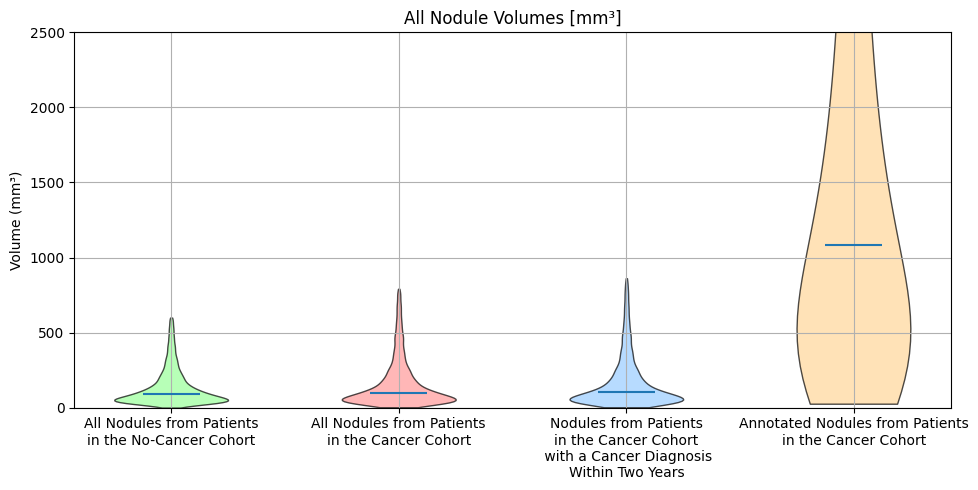

In [6]:
plot(no_cancer, all_nodules, cancer, ann, title="All Nodule Volumes [mm³]", y_axis_label="Volume (mm³)", xlim=(0, 2500)) # all_nodules = cancer cohort; cancer = cancer in two years

### Matched Nodule Volumes

In [7]:
all_nodules0 = [307.50732421875, 211.5966796875, 93.1832999587059, 3422.3785400390625, 105.84899121522903, 767.5323486328125, 86.1418604850769, 119.52445721626282, 597.2502326965332, 74.26762390136719, 95.33032560348511, 75.42805552482605, 107.96446514129639, 89.3532350063324, 436.3222904205322, 93.99496150016785, 67.30503416061401, 71.51055908203125, 88.89999389648438, 40.24181365966797, 44.034576416015625, 29.967308044433594, 37.387847900390625, 43.666648864746094, 706.6074163913727, 1270.5078125, 261.1972939968109, 392.578125, 40.325196266174316, 246.09375, 208.95783519744873, 113.28125, 253.86544013023376, 204.1015625, 52.23945879936218, 95.703125, 99.23134887218475, 104.277010679245, 333.01367926597595, 318.71763747930527, 102.80616343021393, 80.73058891296387, 60.5479416847229, 102.59512341022491, 200.98552864789963, 28.59208357334137, 69.79832166433334, 85.77625072002411, 126.98248881101608, 229.16830426454544, 239.6755439043045, 136.70329904556274, 129.7760009765625, 133.39596116542816, 127.47500896453857, 217.529296875, 113.55193388462067, 201.32260036468506, 2248.2147216796875, 3138.663648247719, 4930.205863952637, 744.049072265625, 296.55796325206757, 960.8978261947632, 142.1356201171875, 762.8926043510437, 936.2819623947144, 89.0777587890625, 41.324188232421875, 72.6171875, 145.5230712890625, 862.4757995605469, 447.5859375, 1859.16748046875, 914.4642944335938, 347.2421875, 122.5921630859375, 223.950439453125, 187.484375, 1038.0645751953125, 2067.542449951172, 7207.5859375, 182.54514318704605, 178.89068961143494, 142.56015515327454, 239.06539672613144, 374.0441691875458, 885.1496200561523, 301.674753844738, 474.49126267433167, 1151.405529499054, 1368.1519367694855, 239.0655517578125, 39.6881103515625, 464.910888671875, 371.3043212890625, 445.08056640625, 530.938720703125, 46.7347776889801, 110.08636522293091, 86.71036577224731, 394.6492338180542, 327.1434438228607, 263.2278960943222, 802.7996256351471, 729.0625319480896, 1370.8495922088623, 105.93216276168823, 93.4695553779602, 188.90472543239594, 2915.2115771770477, 1011.5482993125916, 133.9730293750763, 177.5921552181244, 110.08636522293091, 253.40635013580322, 291.09908509254456, 37.48316264152527, 233.7185435295105, 257.97235465049744, 128.98617732524872, 76.629638671875, 12028.787870049477, 1211.588110089302, 216.07940816879272, 239.2307733297348, 69.2138671875, 35.27827072143555, 39.68805456161499, 2459.564208984375, 91.50301468372345, 249.664306640625, 88.19567680358887, 98.876953125, 980.5005407333374, 845.39794921875, 515.0382053852081, 936.859130859375, 1203.5919559001923, 2668.4417724609375, 228.0487060546875, 126.6663818359375, 102.19345092773438, 99.151611328125, 116.0302734375, 80.4229736328125, 105.3941650390625, 176.96914672851562, 355.8441162109375, 493.128662109375, 470.4193115234375, 350.9915771484375, 354.742431640625, 305.54638671875, 339.8139953613281, 88.134765625, 172.111572265625, 185.0830078125, 197.25146484375, 79.94098663330078, 99.22457885742188, 151.20620727539062, 46.17999267578125, 155.3375244140625, 145.18049490451813, 138.812255859375, 168.1587027311325, 64.9993896484375, 87.73497533798218, 202.7099609375, 210.98172640800476, 2173.6236572265625, 5303.788151979446, 94.11919713020325, 35.03816485404968, 221.18011325597763, 352.7706143260002, 389.27123188972473, 142.54162520170212, 192.7367318868637, 242.08186626434326, 140.51742029190063, 31.056555211544037, 24.685492753982544, 42.51708984375, 87.85247802734375, 70.10986328125, 163.14697265625, 171.966552734375, 171.49951171875, 272.900390625, 329.9140930175781, 84.04541015625, 125.23651123046875, 79.8173828125, 167.10205078125, 78.5064697265625, 514.49853515625, 156.2255859375, 94.39468383789062, 79.8173828125, 75.70266723632812, 76.58154296875, 622.4441528320312, 160.71337890625, 100.00228881835938, 59.32373046875, 485.992431640625, 609.41650390625, 426.177978515625, 633.14599609375, 179.63041973114014, 347.3465769290924, 119.14261758327484, 214.4567255973816, 150.30300426483154, 1425.1290953159332, 2321.4482305049896, 120.97558879852295, 89.81520986557007, 31.224609375, 45.5625, 31.585693359375, 1511.1409912109375, 52.5234375, 966.1102294921875, 206.9296875, 647.5067138671875, 49.351951360702515, 164.86362147331238, 396.31112456321716, 1214.6074969768524, 207.12864434719086, 286.82905572652817, 53.7994384765625, 60.63671875, 45.795440673828125, 307.8033447265625, 131.849609375, 185.98556518554688, 39.6881103515625, 54.291015625, 463.909912109375, 681.10546875, 1129.9324035644531, 34.3963623046875, 28.908203125, 500.0701904296875, 371.576171875, 323.37188720703125, 69.65256869792938, 57.921600341796875, 64.10107421875, 260.28065145015717, 321.8681335449219, 213.35681569576263, 233.15277099609375, 185.08056640625, 119.50912475585938, 67.71240234375, 88.27680230140686, 117.35621953010559, 116.31766891479492, 676.0964505672455, 600.2822556495667, 549.3932754993439, 130.8573775291443, 106.9707133769989, 100.73940968513489, 57.12028384208679, 84.12259984016418, 164.65919584035873, 2127.1024376153946, 1487.6671624183655, 1076.3757449388504, 30.335992574691772, 29.9072265625, 44.89726901054382, 43.06640625, 327.62871980667114, 196.19140625, 394.775390625, 280.304571390152, 415.1123046875, 70.37950277328491, 244.64111328125, 90.31982421875, 15.167996287345886, 69.98291015625, 56.82373046875, 141.162109375, 123.81591796875, 127.40478515625, 87.92724609375, 65.23143082857132, 142.13584220409393, 65.91807746887207, 43.258738338947296, 31.585742712020874, 54.93173122406006, 50.81184697151184, 164.10854703187943, 82.39758968353271, 87.20412331819534, 228.65331137180328, 23.345985770225525, 94.71586096286774, 105.46875, 120.3125, 326.52046805620193, 153.90625, 176.5625, 56.25, 50.0, 21.875, 90.625, 151.69551634788513, 505.8264971971512, 70.01738059520721, 52.08121418952942, 2322.3521844148636, 1821.5565407276154, 1338.9798123836517, 1362.1551171541214, 42.01457917690277, 60.910552978515625, 78.20947265625, 97.29865264892578, 60.634527802467346, 38.514050006866455, 71.65898740291595, 48.44970703125, 494.5410461425781, 41.26348114013672, 440.00244140625, 1041.5451049804688, 955.6098251342773, 174.36236572265625, 846.2288513183594, 534.6598205566406, 670.0403366088867, 293.9471740722656, 37.33362579345703, 43.976348876953125, 83.8369140625, 93.35330200195312, 547.5598449707031, 328.0448913574219, 235.5194091796875, 60.749053955078125, 43.926239013671875, 116.82510375976562, 47.664642333984375, 119.62890625, 164.48974609375, 311.2220764160156, 2977.6382446289062, 77.86567401885986, 52.83742165565491, 64.6563241481781, 52.83742165565491, 104.28438484668732, 66.74200630187988, 90.37980794906616, 80.94591689109802, 86.16823410987854, 197.75390625, 232.36083984375, 87.7532958984375, 97.6409912109375, 397.7630615234375, 112.16354370117188, 51.153564453125, 62.313079833984375, 239.892578125, 184.44671630859375, 124.3560791015625, 62.313079833984375, 199.322509765625, 193.58596801757812, 1684.539794921875, 3150.54931640625, 152.5787353515625, 40.711212158203125, 312.33673095703125, 365.69561767578125, 763.4873199462891, 28.594207763671875, 45.555938720703125, 752.9808044433594, 1990.7321166992188, 2837.511131286621, 92.38128662109375, 101.09674072265625, 138.57192993164062, 26.21026611328125, 128.18181610107422, 67.4530029296875, 96.10430908203125, 105.06706237792969, 122.44186401367188, 552.9118041992188, 198.92697143554688, 27.127838134765625, 27.4583740234375, 28.71833038330078, 90.18173217773438, 123.56268310546875, 88.95677947998047, 149.77294921875, 549.1505126953125, 54.292694091796875, 47.630401611328125, 86.74349975585938, 63.740684509277344, 213.8671875, 76.38943475484848, 205.078125, 151.9205612540245, 241.03469586372375, 133.7890625, 466.91969108581543, 564.5527477264404, 166.9921875, 286.6749573945999, 283.19285559654236, 45.8984375, 51.49849534034729, 49.49001359939575, 88.40575033426285, 85.23280119895935, 133.89608788490295, 174.13152933120728, 409.41303795576096, 715.4874280691147, 100.2685432434082, 82.6263427734375, 7344.645171761513, 82.39615631103516, 118.55454325675964, 154.1868667602539, 159.7442626953125, 89.87199246883392, 76.68553161621094, 106.12543791532516, 36.711158752441406, 248.980712890625, 466.56949281692505, 403.00694274902344, 1144.6502685546875, 129.07147854566574, 579.2205047607422, 708.3831787109375, 965.911376953125, 1532.4432373046875, 393.2258825302124, 182.92236328125, 461.99632835388184, 221.2371826171875, 589.84375, 218.48907470703125, 951.5625, 3671.78955078125, 147.65625, 104.11224365234375, 141.11328125, 62.5, 65.98663330078125, 86.431884765625, 324.21875, 343.8636779785156, 297.2198486328125, 135.9375, 96.7803955078125, 96.1334228515625, 502.4545444250107, 482.23519456386566, 20.865115761756897, 64.2642914056778, 994.1945699453354, 953.8440102338791, 44.54984176158905, 156.35957515239716, 1473.528310418129, 580.9087128639221, 1265.6097412109375, 1226.3214111328125, 75.848388671875, 70.62149047851562, 54.681396484375, 41.54205322265625, 109.36279296875, 113.82522583007812, 41.4520263671875, 73.94485473632812, 600.6134033203125, 694.5831298828125, 102.39999741315842, 462.6072449684143, 98.89567792415619, 190.05439519882202, 257.0040249824524, 561.0528545379639, 64.37548846006393, 94.96080923080444, 141.81267023086548, 468.70564556121826, 494.47838962078094, 50.5296049118042, 181.93072825670242, 285.7536277770996, 212.71900534629822, 671.6952652931213, 155.8073416352272, 101.0592098236084, 318.1455299258232, 160.3008155822754, 185.66264063119888, 57.499205589294434, 167.00307875871658, 82.04549860954285, 316.757937669754, 130.8573775291443, 148.51273798942566, 55.043182611465454, 281.4472167491913, 43.38230037689209, 425.243676006794, 179.0374755859375, 227.39541625976562, 684.2959594726562, 141.9952392578125, 147.77838134765625, 30.357574462890625, 103.66067504882812, 399.2307434082031, 258.81292724609375, 23.484161376953125, 55.55670166015625, 773.4375, 137.6953125, 824.21875, 222.65625, 158.203125, 103.515625, 104.4921875, 79.1015625, 66.40625, 63.4765625, 30.8685302734375, 27.4140625, 465.673828125, 288.3203125, 101.4251708984375, 92.640625, 54.681396484375, 51.046875, 104.9530029296875, 916.953125, 47.625732421875, 37.8125, 118.182373046875, 90.75, 470.965576171875, 319.515625, 46.7437744140625, 217.421875, 295.3589516878128, 138.10116577148438, 501.50885009765625, 188.04860591888428, 282.37445068359375, 40.1187744140625, 273.06353759765625, 35.48968505859375, 27.663299560546875, 222.96780395507812, 74.9586181640625, 202.13690185546875, 34.802215576171875, 118.94424629211426, 70.4498291015625, 82.3974609375, 849.1058349609375, 212.09716796875, 98.876953125, 81.46820068359375, 2201.0009765625, 6816.172790527344, 9668.889404296875, 85.64605712890625, 69.681884765625, 567.1796568632126, 178.7607421875, 85.43291902542114, 78.54638671875, 6231.856815576553, 9738.84912109375, 1652.4941467046738, 1848.09716796875, 241.7746977210045, 245.41943359375, 896.4773156046867, 799.4599609375, 88.8999747633934, 279.89306640625, 54.835498452186584, 32.83203125, 653.8717769980431, 171.54736328125, 94.71586096286774, 61.56005859375, 304.918605029583, 396.44677734375, 30.326184332370758, 46.78962802886963, 220.5908203125, 653.5130031406879, 41.778564453125, 122.1990579366684, 46.7919921875, 25.195682048797607, 20.0537109375, 42.20276743173599, 80.63262939453125, 62.04436704516411, 64.80729603767395, 67.82430821657181, 5436.0977128744125, 6068.136981070042, 145.8164160847664, 220.5817591547966, 128.07156121730804, 193.08541798591614, 1032.2876440286636, 767.4534335136414, 85.638212621212, 68.4353380203247, 65.57881146669388, 677.6320523619652, 385.284423828125, 482.177734375, 691.2230365276337, 70.1904296875, 139.617919921875, 207.51953125, 233.45947265625, 99.94505274295807, 28.99169921875, 35.858154296875, 582.122802734375, 343.32275390625, 466.9188723564148, 106.8115234375, 46.539306640625, 166.32080078125, 202.17892348766327, 63.37738883495331, 89.95475029945374, 40.16876757144928, 109.36944460868835, 475.7767359018326, 269.2170944213867, 213.34078776836395, 203.8542902469635, 63.37738883495331, 61.479865312576294, 161.1213899254799, 101.6035668849945, 93.72712433338165, 48.53673577308655, 303.9436746239662, 101.6035668849945, 156.97152876853943, 180.94482421875, 319.69656467437744, 446.3266041278839, 136.6426814198494, 224.33383738994598, 71.41125059127808, 49.3999382853508, 49.06550592184067, 66.25403487682343, 59.89815008640289, 52.88699275255203, 40.144504845142365, 93.56929486989975, 133.17780178785324, 93.26171875, 44.921875, 1923.828125, 5469.7265625, 178.22265625, 260.7421875, 310.88976073265076, 351.6802612543106, 194.0304889678955, 490.5884522199631, 78.82488614320755, 111.34704196453094, 90.40056872367859, 424.99291759729385, 49.61006820201874, 223.79652988910675, 385.30486303567886, 461.9248572587967, 228.2063137292862, 300.4165241122246, 75.146484375, 95.76874029636383, 599.1943359375, 290.6547782421112, 133.48388671875, 20.091344118118286, 1404.052734375, 592.6946514844894, 300.04187393188477, 160.57165610790253, 165.2016270160675, 162.9826419353485, 33.48681628704071, 33.753801584243774, 75.7316866517067, 135.28673779964447, 91.13526427745819, 184.6215712428093, 116.98061156272888, 87.75988411903381, 96.60907053947449, 18.752617120742798, 53.52388536930084, 249.7098857164383, 115.19464802742004, 135.0152063369751, 91.69674491882324, 87.06572234630585, 37.12918174266815, 997.1837382316589, 104.79627990722656, 681.26220703125, 1113.255615234375, 136.944580078125, 145.052490234375, 75.640869140625, 55.17333984375, 96.507568359375, 124.47210675477982, 87.890625, 13.660888671875, 26.37819480895996, 24.677734375, 14.01341599225998, 20.5078125, 81.19538089632988, 52.734375, 184.64736366271973, 143.5546875, 231.63352316617966, 471.19140625, 51.910400390625, 77.8656005859375, 53.528751492500305, 42.30079650878906, 496.12013578414917, 877.9765319824219, 406.03516376018524, 254.7447967529297, 493.5089771747589, 9456.578063964844, 88.12660306692123, 55.46104431152344, 1464.8599798679352, 1591.449966430664, 119.94611883163452, 111.76512414216995, 738.1978048682213, 1126.6250835061073, 35.27827024459839, 37.526975989341736, 66.14675670862198, 79.13297110795975, 31.000545382499695, 51.444214820861816, 91.72350263595581, 29.98652970790863, 64.27001953125, 458.68312150239944, 176.3031005859375, 76913.53007733822, 247.1832275390625, 96.23058199882507, 2259.0890502929688, 23.37028419971466, 35.7794189453125, 293.27415466308594, 115.84320068359375, 96.34048461914062, 105.85364019870758, 200.30609130859375, 180.0886605978012, 149.86297607421875, 109.97780799865723, 29.9139404296875, 41.6448974609375, 98.97994995117188, 22.58209228515625, 75.22476196289062, 951.1936062574387, 1635.6227645874023, 1818.063720703125, 9161.256614029408, 360.68314361572266, 254.18051147460938, 98.23775482177734, 163.91079711914062, 141.26158905029297, 121.94329833984375, 50.19447326660156, 119.56777954101562, 279.65492248535156, 274.7683410644531, 34.4190673828125, 26.92254638671875, 53.97319793701172, 131.162109375, 158.09097290039062, 78.5064697265625, 109.18359375, 107.15789794921875, 44.86083984375, 63.099609375, 45.641326904296875, 203.97663116455078, 243.181640625, 343.963623046875, 23.131370544433594, 42.5390625, 109.34829711914062, 576.404296875, 72.89886474609375, 296.35546875, 345.28656005859375, 101.6378402709961, 192.84375, 35.44921875, 40.349578857421875, 69.48046875, 42.333984375, 46.04667454957962, 63.281246185302734, 302.73239225149155, 356.94577926397324, 338.1591593027115, 152.8357708454132, 342.1142371892929, 308.49607515335083, 508.2275084257126, 486.47458004951477, 113.12192595005035, 79.49534904956818, 115.34839797019958, 229.67178905010223, 52.558908462524414, 97.23398065567017, 144.7509307861328, 123.51343488693237, 98.38539826869965, 748.9644455909729, 244.26719570159912, 723.6699917912483, 43.87664794921875, 69.2138671875, 82.8094482421875, 306.5185546875, 82.19146728515625, 299.102783203125, 100.1129150390625, 50.05645751953125, 92.07916259765625, 63.0340576171875, 43.2586669921875, 239.1067697405815, 76.9499945640564, 168.9925755262375, 3263.7696929574013, 4959.22464966774, 190.7293888926506, 153.60694193840027, 147.0794677734375, 462.70812034606934, 401.9189157485962, 262.64190673828125, 79.87223505973816, 138.59272956848145, 90.84320068359375, 125.31678259372711, 181.32548785209656, 129.15802001953125, 28.23070377111435, 33.49324297904968, 31.51702880859375, 734.6868517994881, 1589.196632385254, 3490.3564453125, 35.804795026779175, 21.366379141807556, 32.135009765625, 30.2963650226593, 37.53553092479706, 92.95475631952286, 187.10018491744995, 186.01226806640625, 33.05058002471924, 48.507455348968506, 117.74269133806229, 200.38198816776276, 140.28167724609375, 3045.5752322673798, 133.48388671875, 377.0877183675766, 253.3721923828125, 76.80347096920013, 67.9779052734375, 182.48042726516724, 92.07916259765625, 49.084925055503845, 127.3040771484375, 30.028424739837646, 30.28106689453125, 396.1442186832428, 156.34918212890625, 321.650626540184, 300.3387451171875, 102.05910325050354, 121.9264121055603, 139.04571533203125, 828.865717113018, 934.9765173196793, 837.982177734375, 25.505014777183533, 46.34857177734375, 40.43477952480316, 46.34857177734375, 439.80598652362823, 463.4857177734375, 97.6655443906784, 72.9217529296875, 105.76185607910156, 139.91412210464478, 3455.9889845848083, 1709.8166732788086, 44.53125, 89.10770416259766, 135.3515625, 61.06681823730469, 162.890625, 183.20045471191406, 133.59375, 147.68199920654297, 455.2734375, 168.86844635009766, 214.453125, 39.88037109375, 107.8125, 79.7607421875, 190.4296875, 176.96914672851562, 58.0078125, 510.9672546386719, 740.292462170124, 2108.056640625, 372.07551151514053, 136.4501953125, 223.24530690908432, 69.2138671875, 264.18248933553696, 240.0307211279869, 178.8767547607422, 3544.746476829052, 1118.7017393112183, 565.9772318601608, 63.36291813850403, 29.553332030773163, 33.53939151763916, 51.61011880636215, 53.34016025066376, 107.30816781520844, 142.00015634298325, 127.17019283771515, 55.69804900884628, 64.15235489606857, 67.96183961629868, 36.76146179437637, 23.058331668376923, 219.72624838352203, 49.01528239250183, 101.31691187620163, 51.099127531051636, 55.50259917974472, 40.52676475048065, 81.2476127743721, 77.12698847055435, 48.91161262989044, 56723.09750711918, 4021.415595114231, 5448.054909646511, 20.95064228773117, 28.11170607805252, 55.69804900884628, 127.58389681577682, 98.11032485961914, 119.6549540758133, 58.69393515586853, 40.36552667617798, 58.69393515586853, 24.507641196250916, 64.28383374214172, 191.09344482421875, 158.13428115844727, 36.00311279296875, 31.96331214904785, 67.39044189453125, 42.056989669799805, 112.6251220703125, 44.58040904998779, 97.8546142578125, 159.81656074523926, 2889.4805908203125, 1469.4712190628052, 966.5451049804688, 661.9770174026489, 78.46832275390625, 66.45004367828369, 49.8504638671875, 43.7392692565918, 716.36962890625, 1296.19642162323, 89.34783935546875, 38.1317138671875, 16.07513427734375, 17.1966552734375, 1115.5100708007812, 678.2850107550621, 59.28643798828125, 81.45186632871628, 38.96238222718239, 47.16209089756012, 37.05323472619057, 71.79585039615631, 161.40819039940834, 631.8551605939865, 211.44753500819206, 213.04254853725433, 122.57828116416931, 190.68121233582497, 263.6630176305771, 136.58722758293152, 121.97092473506927, 122.86072567105293, 23.202317506074905, 13.823371469974518, 15.211327940225601, 111.63379177451134, 55.29348587989807, 67.47589060664177, 19.92191770672798, 13.26115769147873, 2397.135240793228, 1379.1603999137878, 18.70220845937729, 27.69241753220558, 528.99169921875, 707.295018196106, 88.00048828125, 93.39282810688019, 55.37109375, 80.94045102596283, 9348.81591796875, 8851.149629116058, 28.99169921875, 63.34695053100586, 102.99699604511261, 178.8999502658844, 85.14418339729309, 95.09096455574036, 339.8900869488716, 549.5935409069061, 60.55723428726196, 36.32870864868164, 46.595266342163086, 33.30647885799408, 23.46229100227356, 27.827728509902954, 73.17332476377487, 66.60263252258301, 51.1253616809845, 146.34664952754974, 90.8217716217041, 77.210473716259, 50.70882248878479, 29.12204146385193, 57.02472895383835, 99.14710068702698, 75.19189924001694, 57.5204553604126, 95.13200211524963, 564.4522594213486, 548.354709148407, 126.18389976024628, 121.30270838737488, 253.92562544345856, 76.4373230934143, 320.9121401309967, 186.1082649230957, 255.48345136642456, 132.10363447666168, 45.751507341861725, 40.21728515625, 27.78167724609375, 116.30804878473282, 144.993896484375, 162.72125244140625, 309.23609179258347, 606.787109375, 1472.4288940429688, 84.33711594343185, 1446.4111328125, 774.4682869315147, 592.322998046875, 59.620361328125, 67.46978759765625, 223.311767578125, 237.33489990234375, 236.36474609375, 96.04522705078125, 728.85009765625, 1425.596923828125, 3589.6902982592583, 5375.8530995845795, 1156.7432639598846, 580.7216482162476, 141.00256490707397, 218.29284977912903, 784.9415235519409, 2401.9244384765625, 267.8943682909012, 123.03314208984375, 363.8071668148041, 119.0643310546875, 815.1054840087891, 818.7838287353516, 347.18170166015625, 429.54815673828125, 2328.4319458007812, 2005.46142578125, 160.86085510253906, 358.06971740722656, 237.24082946777344, 179.20423889160156, 340.2380676269531, 245.94003295898438, 77.1514892578125, 689.3773651123047, 139.25843811035156, 178.865478515625, 1169.2308197021484, 1415.6796112060547, 354.51109313964844, 203.2562255859375, 704.7788543701172, 272.36334228515625, 146.2020721435547, 249.66639709472656, 1034.6014709472656, 905.167724609375, 107.24057006835938, 79.26992797851562, 659.2594757080078, 372.2976531982422, 380.3568420410156, 329.27508544921875, 450.95045471191406, 580.9740447998047, 83.70936584472656, 59.28306579589844, 1628.2821807861328, 5130.1871337890625, 81.26718670129776, 47.206894397735596, 239.97722190618515, 234.96158802509308, 162.53437340259552, 209.21237289905548, 93.4255899488926, 52.946754932403564, 95.43474242091179, 129.9306869506836, 16.073219776153564, 51.97227478027344, 14.398926049470901, 22.73787021636963, 48.88937681913376, 45.47574043273926, 53.91225799918175, 42.55229997634888, 33.48587453365326, 74.71014499664307, 110.16852721571922, 213.7359800338745, 271.2355837225914, 2617.1288619041443, 76.0129351913929, 458.6553249359131, 119.53125, 170.859375, 111.09813690185547, 255.234375, 219.375, 263.16371178627014, 96.328125, 111.796875, 722.8125, 313.59375, 987.3846917152405, 42.1875, 85.078125, 909.6159958839417, 99.140625, 45.703125, 33.32944107055664, 119.53125, 343.70986104011536, 58.359375, 113.18122696876526, 120.234375, 116.65304374694824, 144.04640197753906, 125.31280517578125, 147.02200317382812, 28.552627563476562, 36.73553466796875, 108.43582153320312, 163.421630859375, 114.83976745605469, 133.45947265625, 347.442626953125, 28.2318115234375, 97.84698486328125, 12.511825561523438, 12.359619140625, 64.48402404785156, 119.13299560546875, 79.94744873046875, 23.740386962890625, 45.66192626953125, 27.269363403320312, 15.44952392578125, 44.038848876953125, 18.928146362304688, 30.21240234375, 25.74578857421875, 163.93699645996094, 212.1734619140625, 129.0677032470703, 49.405670166015625, 58.70819091796875, 55.21794128417969, 14.757537841796875, 115.3564453125, 87.73893737792969, 28.552627563476562, 66.6046142578125, 514.9097442626953, 232.086181640625, 179.8817596435547, 55.27496337890625, 30.488433837890625, 16.13616943359375, 34.21479797363281, 96.8170166015625, 70.462158203125, 1629.2728145122528, 1606.201171875, 54.931652545928955, 51.6357421875, 38.45215678215027, 36.2548828125, 80.2001953125, 4648.555755615234, 23.476588904857635, 68.30115509033203, 21.670697450637817, 31.916427612304688, 221.52268505096436, 320.44093322753906, 220.3187574148178, 259.16139221191406, 27.009466409683228, 24.998829245567322, 61.29071223735809, 241.33485156297684, 2915.983546614647, 63.458566546440125, 78.95074796676636, 634.5856654644012, 428.83612245321274, 719.8034354448318, 506.5877184867859, 328.6407667398453, 1795.6575286388397, 5139.747619628906, 18.678823113441467, 38.93280029296875, 31.753999292850494, 27.80914306640625, 60.39486140012741, 72.30377197265625, 265.86191564798355, 201.4617919921875, 95.8846253156662, 48.82049560546875, 108.33717405796051, 150.16937255859375, 80.94156682491302, 58.0902099609375, 33.62188160419464, 32.75299072265625, 103.35615456104279, 105.67474365234375, 142.58168309926987, 155.11322021484375, 264.1289794445038, 250.2552329301834, 438.3883476257324, 472.9493168592453, 494.2828619480133, 394.6756536960602, 3027.0715403556824, 1672.410521388054, 261.03515625, 151.6309216618538, 1333.85009765625, 2562.995807290077, 337.17041015625, 522.4768329262733, 35.595703125, 40.72373324632645, 224.5846272110939, 132.8631591796875, 105.897216796875, 164.02248054742813, 63.45703125, 69.81469684839249, 44.61822509765625, 71.19140625, 386.92482590675354, 183.43048095703125, 654.9609375, 116.91858869791031, 288.53118896484375, 1514.59716796875, 67.423095703125, 82.760009765625, 40.65216064453125, 34.705810546875, 459.77783203125, 180.450439453125, 58.0902099609375, 1669.7845458984375, 849.1058349609375, 556.182861328125, 263.671875, 310.8852345943451, 268.9453125, 135.498046875, 164.19047021865845, 108.7646484375, 43.06635284423828, 52.40478515625, 172.26541137695312, 240.27099609375, 324.7740204334259, 435.46615421772003, 167.06001770496368, 128.98617732524872, 84.11407470703125, 63.5528564453125, 21960.315704345703, 26728.649139404297, 1874.8092651367188, 7256.2408447265625, 999.0882873535156, 983.2000732421875, 1976.6807556152344, 2197.246551513672, 3721.5805053710938, 1023.3879089355469, 134.47466838359833, 355.1175708770752, 131.86350977420807, 112.27982020378113, 69.79832166433334, 78.09900403022766, 77.06502825021744, 51.40998989343643, 45.3514204621315, 84.46327096223831, 107.05374366044998, 286.7998279929161, 252.7732926607132, 164.51196765899658, 740.4407914280891, 1720.117779493332, 3422.4353638887405, 171.39262282848358, 453.0127344727516, 63.50158327817917, 24.192936420440674, 33.21512484550476, 76.81257313489914, 521.8607115149498, 163.90714424848557, 106.0328985452652, 514.7047223448753, 403.05276495218277, 79.83669018745422, 24.91134363412857, 315.1129968762398, 256.7784651517868, 38.74297362565994, 53.2151118516922, 127.02962183952332, 21.6827392578125, 228.309996008873, 254.21142578125, 55.89341390132904, 59.19675290584564, 68.57897698879242, 82.74417155981064, 82.61524856090546, 1935.446449995041, 1890.393010377884, 1462.2432720661163, 80.5522729754448, 107.33477175235748, 131.34617626667023, 124.62607383728027, 125.66462445259094, 86.19970107078552, 429.95995473861694, 281.4472167491913, 455.92372012138367, 399.84198689460754, 460.07792258262634, 757.303885102272, 699.7904753684998, 344.890109539032, 723.8131334781647, 249.31815147399902, 132.64685130119324, 254.8490686416626, 2290.5079661607742, 29.244975090026855, 31.333898305892944, 251.60845947265625, 1303.189453125, 80.158447265625, 111.111328125, 297.2542419433594, 472.0078125, 46.75909423828125, 27.5625, 128.03085327148438, 124.03125, 352.78265476226807, 543.2853617668152, 75.84828102588654, 271.6426808834076, 1343.7207353115082, 1638.2346966266632, 2782.338548898697, 1046.588122010231, 210.56717836856842, 135.08194780349731, 151.919189453125, 155.8636474609375, 1526.1386017799377, 263.99072265625, 166.69687175750732, 194.25732421875, 189.26300048828125, 800.4323928356171, 1620.0562744140625, 845.0036315917969, 46.0738525390625, 50.099029541015625, 108.3358154296875, 357.3730773925781, 5228.7596435546875, 2689.76123046875, 326.77548909187317, 298.7165312767029, 2925.5654636621475, 4535.060065746307, 236.34705185890198, 356.1620180606842, 205.7830810546875, 342.4560546875, 384.747314453125, 41.259765625, 276.9561767578125, 170.196533203125, 313.0584716796875, 307.9010009765625, 328.01513671875, 1348.162841796875, 89.739990234375, 233.6334228515625, 704.510498046875, 259.9365234375, 2287.3382568359375, 2460.113525390625, 2766.9830322265625, 1327.0172119140625, 1079.4586181640625, 534.31396484375, 33.5235595703125, 64.4683837890625, 29.913330078125, 112.432861328125, 174.322509765625, 131.5155029296875, 27.3345947265625, 19.0826416015625, 14.9566650390625, 192.889404296875, 82.51953125, 93.865966796875, 96.96044921875, 70.1416015625, 2006.7247017621994, 3951.6483427882195, 4100.996845602989, 6500.529697239399, 367.5205228328705, 389.6484375, 25.54955506324768, 894.53125, 422.550333738327, 328.125, 90.40611791610718, 83.984375, 140.52255284786224, 133.7890625, 107.1115962266922, 130.859375, 130.6958009004593, 97.65625, 46.185734152793884, 30.2734375, 56.01248610019684, 59.5703125, 56.995161294937134, 37.109375, 340.0056173801422, 306.640625, 3059.0678812265396, 7291.9921875, 101.1171875, 59.27728271484375, 489.3349609375, 1776.4063110351562, 34.3076171875, 42.0677490234375, 141.74462890625, 123.33499145507812, 392.47076177597046, 842.926025390625, 54.01985204219818, 85.2813720703125, 393.5732077360153, 185.394287109375, 130.08862328529358, 127.3040771484375, 176.39135360717773, 169.3267822265625, 52.23945879936218, 68.73612999916077, 180.67680478096008, 764.179192006588, 14.788492918014526, 27.11425083875656, 129.23856854438782, 268.9291001558304, 904.5147742033005, 53.675149619579315, 68.43743562698364, 130.59108567237854, 214.43729829788208, 70.09280323982239, 23.430693864822388, 127.56890189647675, 142.65157735347748, 503.96725529432297, 814.5611808300018, 39.95289784669876, 53.75276827812195, 82.70950782299042, 108.88381266593933, 81.1400215625763, 67.236328125, 903.1573238372803, 535.395037651062, 68.57276344299316, 68.10265600681305, 25867.377670288086, 685.9375, 85.7798080444336, 82.8125, 49.38837432861328, 96.09375, 123.03770446777344, 121.875, 532.1653240919113, 677.9640430212021, 817.9308131933212, 99.14312887191772, 103.51709043979645, 1850.1857432127, 1405.499650478363, 1258.2429443597794, 408.23641300201416, 2082.005706310272, 326.5891304016113, 1363.2180219888687, 537.997272849083, 71.44137227535248, 56.8615003824234, 510.2955162525177, 670.6741070747375, 145.79871892929077, 435.9381695985794, 66.10107421875, 513.0958557128906, 1420.86181640625, 59.490966796875, 31.77642822265625, 430.8509826660156, 395.5078125, 34.580230712890625, 116.6748046875, 2011.260986328125, 910.65673828125, 127.13237571716309, 135.60085308551788, 1716.2870721817017, 883.0592139959335, 127.33945405483246, 117.993439078331, 366.8310878276825, 519.8721361160278, 128.50770592689514, 4236.081720352173, 501.3155081272125, 296.9400815963745, 109.97780799865723, 75.15150213241577, 296.02359986305237, 243.78414106369019, 136.7034912109375, 76.63726806640625, 214.02359008789062, 141.9952392578125, 100.9368896484375, 114.02130126953125, 167.572021484375, 185.98556518554688, 785.9992980957031, 214.3157958984375, 165.42434692382812, 120.56350708007812, 90.8416748046875, 138.3209228515625, 47.664642333984375, 73.83346557617188, 460.7582092285156, 126.17111206054688, 231.99472045898438, 228.40576171875, 244.25875854492188, 392.54150390625, 74.60623168945312, 61.3037109375, 2474.2696838378906, 5412.5244140625, 148.7274169921875, 126.7283935546875, 45.618804931640625, 232.4554443359375, 348.5030822753906, 74.76806640625, 46.356201171875, 3046.7987060546875, 2637.0697021484375, 74.0203857421875, 195.892333984375, 423.187255859375, 551.0406494140625, 241.73602294921875, 295.1217041015625, 363.8805389404297, 92.8893051147461, 135.7310791015625, 180.92384338378906, 193.6126480102539, 130.7501220703125, 53.870582580566406, 340.2210693359375, 115.8072509765625, 1284.7821960449219, 946.3818359375, 1681.072998046875, 1899.7003555297852, 98.3739013671875, 77.24838256835938, 110.8262939453125, 118.9218521118164, 229.888916015625, 674.1559002399445, 42.022705078125, 853.5365637540817, 664.947509765625, 227.4169921875, 5276.945453047752, 2963.836669921875, 45.7305908203125, 243.44518619775772, 455.35091507434845, 389.3280029296875, 55.194050312042236, 388.092041015625, 238.51714599132538, 238.5406494140625, 2566.523339509964, 478.3172607421875, 442.53801053762436, 1014.7247314453125, 629.8035383820534, 161.9110107421875, 3674.715741634369, 1406.7210260033607, 151.66046941280365, 181.6830917596817, 54.03993737697601, 44.979794561862946, 96.7489201426506, 279.58029168844223, 119.41082936525345, 143.75895124673843, 2877.190859377384, 177.2733079791069, 28.3203125, 29.327415466308594, 40.0390625, 160.38430333137512, 146.63707733154297, 85.83082556724548, 219.0391342639923, 529.5761937499046, 65.07020306587219, 112.43838149309158, 51.45036697387695, 36.51921182870865, 2406.912479996681, 2344.5333994030952, 2441.1049643158913, 286.9965782761574, 255.63448280096054, 389.3107430934906, 151.13545298576355, 143.64223319292068, 156.67383563518524, 345.6821531057358, 566.453552365303, 197.76234805583954, 757.976529955864, 524.6199647784233, 382.66210436820984, 988.4533334970474, 43.01151615381241, 28.486151933670044, 347.5983517765999, 192.74602913856506, 1430.332894563675, 1680.6234793663025, 2048.1468411684036, 1325.6051015853882, 1372.2958268523216, 377.1117961406708, 113.57791745662689, 57.13815093040466, 148.52496898174286, 47.99604678153992, 124.18684381246567, 31.235522508621216, 1040.9228918552399, 344.35258960723877, 738.8805179595947, 187.4131350517273, 372.560531437397, 76.18420124053955, 135.8206787109375, 154.248046875, 4038.5863037109375, 3112.646484375, 6308.8038330078125, 305.8275146484375, 262.02392578125, 67.4483642578125, 72.18017578125, 70.760498046875, 608.31298828125, 684.3004721403122, 30.146484375, 36.95800018310547, 147.50244140625, 498.3555337190628, 988.134765625, 287.5396728515625, 41.778564453125, 56.1859130859375, 65.80123901367188, 311.7767333984375, 168.15872192382812, 1272.4456787109375, 244.40460205078125, 91.4398193359375, 101.31301879882812, 115.6768798828125, 110.71319580078125, 206.0150146484375, 181.73675537109375, 146.5240478515625, 188.0035400390625, 196.171875, 172.96875, 103.93821716308594, 213.8214111328125, 627.46826171875, 820.1128141880035, 14695.311257824302, 29118.986328840256, 147.68580436706543, 75.64093399047852, 18077.357812047005, 4678.058057308197, 18.46072554588318, 31.702450275421143, 87.01171875, 228.04264616966248, 3780.06591796875, 2186.0317597985268, 62.29248046875, 105.6099140048027, 123.59619140625, 160.7513735294342, 338.25952088832855, 281.4046802520752, 142.67818653583527, 100.08723163604736, 2648.44970703125, 3234.1209411621094, 1781.55517578125, 267.7093505859375, 297.0703125, 368.658447265625, 164.1510009765625, 219.32144165039062, 78.4942626953125, 212.6251220703125, 1758.0528259277344, 805.3314208984375, 32.4920654296875, 340.435791015625, 169.42291259765625, 352.783203125, 63.823699951171875, 124.3560791015625, 1275.3143541812897, 231.3720703125, 150.93098211288452, 119.64111328125, 66.10116004943848, 33.6181640625, 94.74499607086182, 230.82641053199768, 272.6049463748932, 1990.747232913971, 1782.8990170955658, 254.8490686416626, 299.76099467277527, 46.63812255859375, 66.46728515625, 154.5828094482422, 79.7607421875, 854.1546478271484, 1164.0083312988281, 47.76646423339844, 115.07148742675781, 487.443603515625, 168.2453155517578, 329.26025390625, 476.5869140625, 165.12451171875, 331.23779296875, 117.66357421875, 133.48388671875, 45.4833984375, 40.53955078125, 44.49462890625, 26.69677734375, 628.857421875, 879.01611328125, 310.4736328125, 774.20654296875, 48.16176116466522, 165.07859963178635, 70.10216653347015, 52.977937281131744, 182.70264941453934, 252.36779952049255, 544.227901160717, 556.3325048089027, 128.26100099086761, 27950.410526573658, 17325.615873098373, 20818.78563451767, 128.96649378538132, 25.84860634803772, 132.71240854263306, 71.08366745710373, 254.96417605876923, 212.44687980413437, 495.23579889535904, 608.0713852643967, 71.70751106739044, 58.15936428308487, 57.63955914974213, 1187.2734870314598, 1051.5324980020523, 775.4581904411316, 537.4499434232712, 266.12315171957016, 326.10489320755005, 204.4389774799347, 85.68042576313019, 427.03346371650696, 248.1365203857422, 2136.556045293808, 3543.7259674072266, 136.09521770477295, 397.0184326171875, 401.3420195579529, 442.4400329589844, 124.2910406589508, 464.3096923828125, 77.23736572265625, 69.40917205810547, 1821.6839218139648, 2577.533088684082, 387.20310974121094, 202.48690795898438, 171.7515106201172, 299.5553741455078, 3594.5863494873047, 4607.099029541016, 58.43616485595703, 68.88729858398438, 166.67010498046875, 386.1863708496094, 7488.467491149902, 11255.245216369629, 481.20911407470703, 170.13075256347656, 114.83976745605469, 219.70873260498047, 161.17808586359024, 174.32600364089012, 144.35760498046875, 69.19810831546783, 141.57257080078125, 484.38675820827484, 364.37530517578125, 133.96044045686722, 147.6068115234375, 56.08177185058594, 46.342360973358154, 33.83000725507736, 80.00999450683594, 108.34092497825623, 86.652299284935, 295.36399841308594, 315.6290531158447, 68.88729333877563, 79.5301924943924, 25.676172971725464, 28.48842716217041, 55.736082792282104, 318.71427887678146, 46.302730321884155, 15.985466420650482, 32.522155821323395, 20.946473240852356, 365.46083575487137, 279.4700508713722, 57.327189922332764, 84.88833892345428, 336.797240793705, 1004.8794925808907, 32.522155821323395, 80.47855508327484, 25.3562570810318, 24.80503410100937, 89.29812276363373, 42.99539244174957, 51.26373714208603, 58.980858862400055, 79.37610912322998, 83.234669983387, 51.26373714208603, 87.64445382356644, 152.45686930418015, 34.46343022584915, 125.00295031070709, 74.76811981201172, 170.56477332115173, 105.72679442167282, 178.96728515625, 169.39652144908905, 92.29189789295197, 81.19350510835648, 155.9616249203682, 120.6298828125, 89.37126821279526, 54.323712050914764, 117.993439078331, 118.57756501436234, 254.11376953125, 3793.8979545235634, 11296.69189453125, 60.73843204975128, 72.265625, 119.1934643983841, 237.79296875, 57.541672468185425, 132.32421875, 31.05423593521118, 86.42578125, 3308.1894869804382, 177.24609375, 41.101194620132446, 51.26953125, 82.30112302303314, 33.46366882324219, 52.74226897954941, 92.35972595214844, 111.48348277807236, 87.01171875, 158.56220215559006, 90.22943750023842, 28.8720703125, 20.050986111164093, 28.0810546875, 13.010231971740723, 43.31013000011444, 20.1708984375, 47.16209089756012, 32.08157777786255, 34.013671875, 75.39170777797699, 28.8720703125, 38.62412616610527, 32.88361722230911, 23.3349609375, 58.54887944459915, 24.521484375, 119.10285750031471, 53.3935546875, 36.99784716963768, 33.685656666755676, 49.4384765625, 46.91930750012398, 25.3125, 188.88028916716576, 164.53125, 173.19871312379837, 36.38671875, 38.21755641698837, 180.6312780380249, 87.16337633132935, 91.50400269031525, 57.77107501029968, 24.361455261707306, 141.8938684463501, 107.54691225290298, 62.8387131690979, 158.26904296875, 353.14453125, 250.62149047851562, 458.6572265625, 983.529052734375, 587.8633117675781, 130.814208984375, 18.841552734375, 23.676223754882812, 197.567138671875, 120.047607421875, 141.47987365722656, 68.367919921875, 72.13623046875, 66.98638916015625, 389.7509765625, 629.4410705566406, 246.1109161376953, 117.73948669433594, 25.58441162109375, 32.723236083984375, 306.4567565917969, 46.51832580566406, 41.99180603027344, 23.740386962890625, 458.01658630371094, 587.0933532714844, 53.67164611816406, 90.79093933105469, 150.4474639892578, 92.71583557128906, 97.05390930175781, 37.53547668457031, 200.225830078125, 651.898193359375, 30.868148803710938, 34.96894836425781, 45.88508605957031, 43.95179748535156, 90.37971496582031, 216.5508270263672, 31.702423095703125, 54.85954284667969, 790.0577545166016, 1370.205307006836, 56.174468994140625, 68.01300048828125, 46.163177490234375, 90.14930725097656, 479.7077178955078, 654.7855377197266, 61.18011474609375, 45.555877685546875, 170.74813842773438, 86.62033081054688, 68.9666748046875, 22.777938842773438, 35.87379455566406, 29.835891723632812, 433.8226318359375, 57.47222900390625, 61.798095703125, 46.966552734375, 51.416015625, 88.9892578125, 70.4498291015625, 205.78765869140625, 201.4617919921875, 91.95556640625, 64.27001953125, 128.5400390625, 62.29248046875, 43.2586669921875, 90.84320068359375, 198.74267578125, 226.79901123046875, 322.5860595703125, 409.72137451171875, 80.3375244140625, 67.236328125, 1093.8262939453125, 586.4639282226562, 989.75830078125, 63.65203857421875, 1406.0302734375, 117.85535430908203, 125.43484497070312, 113.3173599243164, 5207.932548522949, 4914.892936706543, 1060.199592590332, 258.46270751953125, 33.69891357421875, 32.03736877441406, 581.9961318969727, 663.2133407592773, 755.2513046264648, 253.45726776123047, 255.0820541381836, 308.50799560546875, 1776.0210342407227, 193.7687530517578, 265.79150390625, 181.56095123291016, 197.04503631591797, 228.4145736694336, 430.01277923583984, 482.08168029785156, 1064.9458694458008, 85.09247589111328, 75.82255554199219, 166.99967193603516, 478.3373565673828, 577.2659225463867, 19.189659118652344, 1430.4091873168945, 21.529861450195312, 81.87327575683594, 305.6304244995117, 430.13134002685547, 40.22674781084061, 35.9375, 29.67546969652176, 1800.0, 47.04398989677429, 28.125, 19.54134964942932, 24.875496804714203, 171.41066354513168, 372.7886743545532, 422.8322901725769, 485.9307622909546, 2463.016222000122, 3750.3701071739197, 1390.3421959877014, 2535.543201446533, 3223.0989665985107, 73.97751903533936, 207.42716121673584, 256.0202374458313, 1642.7360844612122, 311.14074182510376, 257.4707770347595, 791.9946155548096, 31.186601161956787, 26.83498239517212, 303.88804388046265, 166.0867829322815, 196.54811429977417, 6325.077877521515, 6985.79866027832, 567.1609792709351, 1223.5301432609558, 48.82049560546875, 25.33721923828125, 467.193603515625, 339.27154541015625, 483.2611083984375, 32.135009765625, 55.00030517578125, 30.28106689453125, 12422.653198242188, 302.3317425251007, 20.656612515449524, 229.3817761540413, 570.8092346191406, 169.453857421875, 26.854888916015625, 31.5845947265625, 43.996307373046875, 41.6114501953125, 108.56231689453125, 101.7725830078125, 970.2042846679688, 197.529052734375, 109.15703773498535, 1521.556975364685, 133.067626953125, 80.68862748146057, 952.2652053833008, 1236.527018547058, 560.3394603729248, 730.3892643451691, 3244.562997817993, 5235.329648017883, 183.20023834705353, 158.42431640625, 4547.453850209713, 5582.953125, 3259.387157559395, 1504.967247247696, 310.1640625, 61.32023334503174, 52.449339866638184, 461.84557604789734, 279.9488013982773, 51.29756170511246, 97.19854831695557, 543.249587893486, 596.2757098674774, 548.6110371351242, 363.1457265019417, 85.04872977733612, 134.2208407521248, 310.2264404296875, 766.11328125, 268.4653340578079, 27.83203125, 103.33578622341156, 266.9677734375, 67.236328125, 168.0908101797104, 745.5322265625, 12676.024626493454, 281.0947597026825, 99.64185726642609, 382.2888731956482, 458.72855043411255, 265.08494102954865, 85.93468368053436, 161.68301367759705, 75.20140171051025, 364.62005972862244, 722.8734739422798, 82.72217214107513, 34.78064829111099, 96.37534618377686, 141.9426457285881, 143.82268077135086, 90.7534509897232, 61.10113888978958, 343.73873472213745, 186.12346923351288, 260.38485342264175, 130.90984523296356, 129.7224179506302, 109.98205000162125, 276.3651512861252, 230.30429273843765, 197.40367949008942, 5519.782885551453, 127.33250838518143, 114.1031568646431, 45.200284361839294, 32.522155821323395, 1008.7380534410477, 539.096074461937, 369.8706195950508, 335.6947948336601, 489.48599964380264, 41.34172350168228, 58.980858862400055, 25.3562570810318, 54.57107502222061, 90.95179170370102, 164.8156710267067, 56.2247439622879, 50.16129118204117, 45.861751317977905, 200.09394174814224, 496.1006820201874, 797.7923820018768, 3433.8317173719406, 1038.2080078125, 999.64599609375, 204.67529296875, 133.53023529052734, 1298.2403450012207, 1722.4365234375, 729.6842184066772, 672.0811100006104, 2266.77526140213, 157.4672310948372, 69.63002490997314, 515.4255269169807, 1005.0942726135254, 735.9345200061798, 48.18669366836548, 38.59925293922424, 62.20302748680115, 106.69910740852356, 90.06492352485657, 633.3108310699463, 560.8244397640228, 623.6459379196167, 117.02482748031616, 205.8626823425293, 369.14449256658554, 258.08520102500916, 626.0694324970245, 611.7989142537117, 758.3617930412292, 406.339257478714, 33.55859023332596, 56.00675916671753, 55.74037528038025, 74.86147052049637, 91.57861971855164, 130.8687071800232, 124.1230878829956, 173.68377804756165, 41.62664532661438, 86.43797326087952, 147.58537888526917, 249.6199414730072, 61.30469584465027, 67.85784816741943, 73.41426539421082, 172.87594652175903, 89.30807542800903, 103.40243530273438, 112.77036643028259, 121.98256039619446, 416.5191650390625, 1846.354902267456, 51.910400390625, 78.20938539505005, 521.575927734375, 191.68967008590698, 203.9337158203125, 213.15891313552856, 26.06591534614563, 25.975999116897583, 37.12418246269226, 41.12866526842117, 71.60959005355835, 54.50145936012268, 37.52088761329651, 48.88731628656387, 115.32192850112915, 90.19444137811661, 91.57764881849289, 62.40022158622742, 41.12866526842117, 23.41082751750946, 45.022944688797, 51.951998233795166, 53.70719254016876, 264.0893243551254, 124.62822884321213, 447.87799072265625, 449.46327209472656, 457.5965881347656, 979.0216064453125, 1213.0054473876953, 1009.3273315429688, 793.9507446289062, 837.3298645019531, 1043.3202209472656, 766.303955078125, 1562.0532989501953, 72.53216552734375, 76.995849609375, 76.26609802246094, 557.1641235351562, 572.3358154296875, 584.8520202636719, 42.2833251953125, 18.928146362304688, 18.53961181640625, 43.6309814453125, 424.13427734375, 214.94674682617188, 266.38494873046875, 807.8147888183594, 699.9048767089844, 369.580078125, 223.56861877441406, 300.2838134765625, 159.0692901611328, 121.26846313476562, 431.88401794433594, 88.86604309082031, 122.89736938476562, 25.665283203125, 61.884490966796875, 8487.829971313477, 7715.078475952148, 528.8092803955078, 118.43124508857727, 44.75599378347397, 60.5927300453186, 302.27509647607803, 482.6761791110039, 125.31678259372711, 85.38066506385803, 96.39752507209778, 256.1419951915741, 79.87223505973816, 2436.791723072529, 96.39752507209778, 275.42150020599365, 49.31869447231293, 195.2374267578125, 101.92530190944672, 141.0675048828125, 339.019775390625, 206.03566646575928, 97.508544921875, 366.6013927459717, 130.44189453125, 84.54567003250122, 241.51123046875, 262.1626238822937, 33.391987323760986, 32.3583984375, 390.75729846954346, 383.58184814453125, 77.44099187850952, 299.315185546875, 235.82724928855896, 207.5951610803604, 92.33799338340759, 136.84524071216583, 89.6487808227539, 193.31191420555115, 103.33212053775787, 62.20527648925781, 349.42291021347046, 24.203920125961304, 54.47277307510376, 121.95052063465118, 36.591339111328125, 124.22449469566345, 93.09200048446655, 48.483524322509766, 91.23016047477722, 64.03484344482422, 265.11383056640625, 374.39749681949615, 38.3148193359375, 31.675793766975403, 29.214817941188812, 76.01165771484375, 90.87317883968353, 2172.2030639648438, 2406.8410509824753, 2649.728864967823, 66.741943359375, 67.50578999519348, 58.429635882377625, 21.62933349609375, 37.38782215118408, 58.429635882377625, 18.5394287109375, 34.272170305252075, 271.29364013671875, 302.73750436306, 25.9552001953125, 36.86854684352875, 85.43956190347672, 548.76708984375, 832.9175934791565, 714.5228233337402, 82.13222402334213, 270.2109375, 39.51995062828064, 405.0, 510.2723037004471, 469.9356387257576, 83.12056249380112, 94.85628271102905, 202.03757160902023, 126.05900728702545, 110.42293703556061, 41.18759644031525, 438.53717494010925, 532.6516020298004, 771.3837357759476, 342.45651960372925, 379.7763484418392, 82.71642088890076, 29.971965193748474, 25.28909683227539, 4502.104666471481, 6748.500860929489, 15.380350559949875, 52.68561840057373, 93.07083928585052, 1572.6657092571259, 68.22565761208534, 184.39966440200806, 193.63466987013817, 103.26381206512451, 18.882781624794006, 29.789849281311035, 35.19063848257065, 49.64974880218506, 185.82373735308647, 81.30146366357803, 166.94095572829247, 112.3325566649437, 37.336409121751785, 34.75482416152954, 46.34864580631256, 24.82487440109253, 307.8173517584801, 184.1583251953125, 24.223630368709564, 19.775390625, 95.71288096904755, 143.37158203125, 291.50360083580017, 124.66307336091995, 106.91070556640625, 94.6854761838913, 194.97068345546722, 1079.6127319335938, 29.54101264476776, 414.66522216796875, 26.597043871879578, 32.75299072265625, 34.04421615600586, 97.54061126708984, 162.44903200864792, 148.59702497720718, 86.73749220371246, 55.706230998039246, 32.005513072013855, 104.37901604175568, 43.22035163640976, 597.4362440109253, 299.1708417534828, 59.43880999088287, 133.7815557718277, 134.4633162021637, 57.914737939834595, 127.1659843325615, 98.926582634449, 150.8831330537796, 297.7007147669792, 440.82714307308197, 291.82482212781906, 344.0099667906761, 70.03795731067657, 244.44620394706726, 201.18746560811996, 162.04860711097717, 165.68603515625, 63.85813754796982, 58.02001953125, 247.87943714857101, 250.62255859375, 63.17149090766907, 484.4970703125, 569.9167114496231, 275.74462890625, 144.95849609375, 226.5087890625, 96.91858172416687, 86.95513153076172, 56.766597867012024, 82.87910974025726, 166.14614009857178, 149.4541323184967, 3957.0472366809845, 4611.339318990707, 8456.301655769348, 82.87910974025726, 67.5082905292511, 407.60217905044556, 476.11110162734985, 90.9149317741394, 56.304931640625, 33.6456298828125, 375.0, 378.3594483733177, 207.03125, 250.47571873664856, 296.09375, 186.71875, 199.3222268819809, 1244.53125, 4418.603348135948, 1405.46875, 5164.0625, 6216.913173854351, 138.46721071004868, 267.96875, 624.3078979253769, 113.04931640625, 87.261962890625, 246.3866729736328, 180.6396484375, 320.1744079589844, 821.2889099121094, 328.9794921875, 423.4771728515625, 164.25778198242188, 251.220703125, 163.61618041992188, 291.94254219532013, 458.1787109375, 383.69598388671875, 133.45944786071777, 598.14453125, 344.55636298656464, 243.44482421875, 357.3890686035156, 35.28975784778595, 35.29052734375, 41.06444549560547, 64.599609375, 49.405670166015625, 121.91007256507874, 51.4404296875, 50.688934326171875, 107.15253746509552, 101.6845703125, 35.931396484375, 7042.552402496338, 6571.81396484375, 14339.835357666016, 489.2822265625, 312.4748229980469, 58.489983558654785, 69.953125, 99.82257843017578, 478.36450839042664, 34.03125, 340.3474578857422, 170.24763071537018, 112.4921875, 416.74113285541534, 393.25, 172.33655869960785, 151.25, 50.1342716217041, 86.0234375, 100.77326965332031, 68.93462347984314, 65.2265625, 52.28801727294922, 188.1171875, 91.266357421875, 79.1015625, 55.6182861328125, 2166.6412353515625, 699.554443359375, 157.1997311115265, 94.64065444469452, 118.70183777809143, 77.79782611131668, 118.70183777809143, 72.9855894446373, 101.05697000026703, 88.22433888912201, 145.9711788892746, 100.25493055582047, 131.50634765625, 137.91961669921875, 75.60653686523438, 118.65234375, 83.91494750976562, 98.87008666992188, 2082.3486328125, 3245.2651977539062, 3617.4819946289062, 63.4033203125, 64.599609375, 36.39111328125, 22613.4521484375, 29587.21923828125, 87473.8388671875, 146.54541015625, 230.8837890625, 144.15283203125, 640.61279296875, 1259.6923828125, 1227.392578125, 1361.32470703125, 5212.2314453125, 1831.4384765625, 1603.0426025390625, 2285.2935791015625, 55.6182861328125, 59.326171875, 1050.567626953125, 1224.8382568359375, 117.4163818359375, 95.1690673828125, 50.6744384765625, 40.7867431640625, 2548.858642578125, 844.1768188476562, 109.36279296875, 114.22265625, 471.8475341796875, 141.88595581054688, 144.64111328125, 78.528076171875, 993.084716796875, 1170.7822265625, 135.821533203125, 194.53546142578125, 250.34132504463196, 186.9391107559204, 140.88034081459045, 117.35621953010559, 64.86576843261719, 54.004631996154785, 89.59871685504913, 90.2252197265625, 128.5546807050705, 453.5980224609375, 49.344220876693726, 55.6182861328125, 299.9609216451645, 45.7305908203125, 253.9875259399414, 358.428955078125, 122.66443014144897, 474.609375, 936.5790019035339, 306.4799768924713, 1030.7869726419449, 1201.35498046875, 519.2520471811295, 151.03509652614594, 177.4937995672226, 148.8302046060562, 508.22758758068085, 263.48458445072174, 347.27047741413116, 233.7185435295105, 285.53350365161896, 53.23486328125, 24.38201904296875, 461.767578125, 325.9490966796875, 91.51611328125, 83.41217041015625, 49.0478515625, 114.21051025390625, 40.673828125, 25.665283203125, 355.2978515625, 1202.4185180664062, 227.22273766994476, 152.85893261432648, 206.56612515449524, 191.4179426431656, 218.96009266376495, 132.20232009887695, 112.9228150844574, 63.897705078125, 56.46368408203125, 99.151611328125, 16.41851806640625, 556.3507080078125, 74.4840087890625, 47.3724365234375, 35.23974609375, 340.13671875, 178.63082885742188, 1276.50146484375, 1281.9877624511719, 323.32763671875, 1777.1690368652344, 218.96009266376495, 137.73043704032898, 193.82897984981537, 243.02084398269653, 188.5182591676712, 278.9188278913498, 35.310720920562744, 155.44488036632538, 30.868486881256104, 100.32258236408234, 127.88373136520386, 316.13413095474243, 86.66991341114044, 59.58084547519684, 46.730074882507324, 3619.2442996501923, 7521.098087310791, 3166.634434953332, 44481.627747774124, 202.69775390625, 28.314158141613007, 106.787109375, 100.46959340572357, 121.61864501237869, 282.545654296875, 68.22509765625, 243.49462890625, 235.3271484375, 187.2152099609375, 810.791015625, 339.9736328125, 293.66455078125, 240.2265920639038, 1292.523511648178, 225.86521971225739, 77.02917897701263, 156.66951656341553, 112.27982020378113, 1412.63680768013, 390.3682121038437, 463.48065316677094, 133.1690890789032, 304.19997799396515, 59.5703125, 56.75552487373352, 142.578125, 107.42186844348907, 82.8125, 534.1796875, 228.51561105251312, 756.25, 115.234375, 111.3281182050705, 146.09375, 890.625, 840.8202611804008, 250.78125, 296.875, 117.18749284744263, 335.15625, 467.77340894937515, 271.875, 57.61718398332596, 96.09375, 124.99999237060547, 92.96875, 1249.5621864199638, 2338.43994140625, 78.53587806224823, 176.6396808028221, 234.33837890625, 30.84184902906418, 52.40478515625, 30.65185546875, 170.00707721710205, 28.410931885242462, 155.8018946647644, 490.31769543886185, 300.6060085296631, 179.91943359375, 475.2311706542969, 67.9107666015625, 240.22674560546875, 170.0324696302414, 209.94873046875, 92.3950023651123, 122.021484375, 153.9916706085205, 230.28564453125, 1505.268580198288, 2143.15185546875, 135.21256175637245, 198.3153800368309, 65.5360072851181, 239.29370895028114, 123.03418761491776, 57.15170136094093, 80.89919185638428, 26.020286798477173, 65.16879343986511, 52.040573596954346, 60.112593948841095, 54.00167000293732, 109.55098897218704, 630.1942460536957, 135.01157999038696, 346.8759055137634, 2601.5692913532257, 2650.381170272827, 241.98229336738586, 552.5089273452759, 191.0933132171631, 201.47881937026978, 1268.0703012943268, 1141.3671262264252, 39.591986417770386, 52.34375, 2438.573089361191, 2172.65625, 410.98907589912415, 108.03970408439636, 1112.410432100296, 1075.9872570037842, 1308.6033545732498, 437.67104613780975, 1906.1290649175644, 184.10847532749176, 198.44027280807495, 192.92804300785065, 33.073378801345825, 84.88833892345428, 135.60085308551788, 915.0301468372345, 230.41120564937592, 100.32258236408234, 119.06416368484497, 127.79541015625, 93.49454498291016, 100.85105895996094, 50.26588439941406, 30.040740966796875, 1171.1951065063477, 1300.3349304199219, 1387.6953125, 1827.8478938937187, 2240.7989501953125, 1344.7265625, 95.1690673828125, 129.7760009765625, 85.2813720703125, 1223.602294921875, 171.7987060546875, 1868.7744140625, 1520.233154296875, 901.0162353515625, 2384.1705322265625, 7501.0528564453125, 5124.298095703125, 1331.1309814453125, 1888.5498046875, 5727.298415780067, 3329.700711965561, 41.5283203125, 52.91748046875, 272.900390625, 256.6497802734375, 445.93505859375, 416.2841796875, 28.67431640625, 33.514404296875, 60.31494140625, 63.5009765625, 403.41796875, 569.744873046875, 376.9683837890625, 93.97162628173828, 236.57166290283203, 88.5772705078125, 77.21699523925781, 210.113525390625, 113.64010620117188, 657.9424667358398, 78.277587890625, 101.2562484741211, 26.605323791503906, 61.919288635253906, 53.929710388183594, 704.422966003418, 243.76229095458984, 38.608497619628906, 232.97634887695312, 148.968017578125, 599.5255432128906, 74.4840087890625, 35.354705810546875, 176.19873046875, 433.283203125, 1347.9202880859375, 2085.1754150390625, 476.5374755859375, 176.02130126953125, 22.38905444741249, 24.60113525390625, 94.5315632224083, 506.876220703125, 432.82829493284225, 30.562836229801178, 24.136962890625, 37.70555019378662, 89.20083597302437, 24.60113525390625, 45.953639298677444, 364.62174385786057, 516.15966796875, 819.3101844191551, 136.11123576760292, 89.58526611328125, 36.95970892906189, 354.16351318359375, 100.15536770224571, 1740.3047560155392, 395.93902587890625, 972.8817482292652, 312.0252349972725, 179.63470458984375, 467.3917159438133, 181.2447264790535, 165.245361328125, 97.4761962890625, 115.86601361632347, 85.87188720703125, 48.31023618578911, 137.85919189453125, 109.97452139854431, 368.5528564453125, 390.80231711268425, 135.07415771484375, 45.5608731508255, 113.55193388462067, 154.20924711227417, 6268.507728815079, 6065.563719749451, 178.59624552726746, 273.37093806266785, 161.9476318359375, 70.2578125, 88.59597778320312, 74.91455078125, 125.017578125, 240.21383666992188, 352.5390625, 286.197265625, 154.23583984375, 107.453125, 85.85589599609375, 226.947021484375, 156.013671875, 883.551025390625, 1354.529296875, 64.05859375, 96.81622314453125, 257.7793353796005, 436.71875, 807.03125, 108.21066606044769, 126.5625, 106.25, 33.42633140087128, 140.625, 156.25, 520.0910546779633, 591.40625, 675.0, 439.0625, 420.3125, 211.71875, 472.65625, 94.53125, 99.21875, 543.3091258406639, 173.37826764583588, 92.69729161262512, 182.81965845823288, 207.71059787273407, 103.85529893636703, 121.02146404981613, 161.3619520664215, 34.33233022689819, 48.06526231765747, 9526.10551893711, 14552.105114996433, 79.44912207126617, 44.670108914375305, 245.09794521331787, 282.7291039824486, 88.7960776090622, 137.82362872362137, 138.6465071439743, 155.25586634874344, 127.9235799908638, 133.9730293750763, 201.56024754047394, 376.17710280418396, 47.25405299663544, 49.57292574644089, 140.7743505835533, 105.13818317651749, 257.5995377898216, 500.01243591308594, 227.474609375, 165.54107666015625, 93.134765625, 55.18035888671875, 422.5435791015625, 259.1206359863281, 342.6374816894531, 131.5009765625, 96.80355834960938, 78.317138671875, 31.9083251953125, 45.957244873046875, 51.39562225341797, 301.6787109375, 59.646636962890625, 201.50347137451172, 180.8138427734375, 124.18234252929688, 160.71329498291016, 111.1956787109375, 756.8278198242188, 242.497802734375, 840.2776336669922, 194.58493041992188, 167.2397232055664, 427.74902671575546, 58.389358043670654, 750.5451994538307, 406.52213430404663, 55.08430004119873, 59.97305130958557, 72.71127605438232, 119.06414598226547, 234.6591181755066, 402.1722264289856, 107.96522808074951, 73.20240086317062, 106.86354207992554, 97.01523005962372, 77.11802005767822, 25.576742470264435, 453.89463233947754, 415.40157598257065, 572.8767204284668, 642.0644316673279, 60.52092528343201, 45.723649978637695, 109.81619507074356, 109.06995671987534, 317.3057019710541, 1138.671875, 1323.7152099609375, 406.9571542739868, 359.375, 585.845947265625, 2432.677048444748, 3467.7734375, 6518.463134765625, 45.8984375, 79.1015625, 879.8828125, 973.93798828125, 14615.12609231472, 21408.096313476562, 31703.382255911827, 1942.5097815990448, 1698.211669921875, 1549.7226346731186, 80.47855508327484, 81.5810010433197, 2191.6625685691833, 1239.1492590904236, 977.8695665597916, 454.20773553848267, 71.03221052885056, 41.63641715049744, 32.079062819480896, 100.30591404438019, 293.34748446941376, 307.9865499138832, 1050.3732508420944, 219.69243741035461, 3376.318705558777, 1213.421814918518, 63.0340576171875, 79.1015625, 2992.2637939453125, 34702.10266113281, 163.14697265625, 88.9892578125, 247.29542434215546, 247.65625, 189.296630859375, 65.28599202632904, 75.78125, 103.53435099124908, 40.625, 94.04159545898438, 158.59375, 95.86175537109375, 43.75, 49.144317626953125, 47.4609375, 39.07008075714111, 1208.282470703125, 1128.2821655273438, 230.1910400390625, 454.4700622558594, 182.4838411808014, 257.1666494011879, 52.25673633813858, 40.35538190603256, 31.056555211544037, 142.669184923172, 178.82973158359528, 125.02254277467728, 102.8545286655426, 185.9512695670128, 67.68736392259598, 37.98153591156006, 45.39034992456436, 53.01589387655258, 1677.8503033518791, 54.217896461486816, 61.917349219322205, 285.99940383434296, 8959.323606848717, 128.7675040960312, 278.0439455509186, 536.7571749687195, 648.3797889947891, 237.403564453125, 236.8927001953125, 52.91740536689758, 31.75044322013855, 125.23785936832428, 121.71003234386444, 134.93938368558884, 160.51612961292267, 111.12655127048492, 45.861751317977905, 74.21875, 104.4921875, 131.8359375, 132.8125, 22.134082317352295, 24.523414433002472, 37.6279399394989, 40.49214941263199, 37.37372636795044, 61.975430488586426, 58.74213224649429, 61.4858078956604, 247.9017219543457, 234.39821702241898, 297.784206867218, 107.90365129709244, 95.2420979142189, 1011.5275619029999, 1177.1238927841187, 45.374868750572205, 112.35145682096481, 30.434363186359406, 133.4529994726181, 95.24272203445435, 901.6632143855095, 1632.3879194259644, 108.36308228969574, 69.19570314884186, 108.36308228969574, 167.11415100097656, 1319.9406770467758, 6128.389256238937, 65.264892578125, 83.8369140625, 1132.43408203125, 407.39500427246094, 495.660400390625, 474.2025451660156, 2623.31005859375, 4580.183784484863, 233.1575927734375, 328.2690124511719, 679.947265625, 725.1005401611328, 233.1575927734375, 123.62029266357422, 1052.08056640625, 1302.6877899169922, 74.42252784967422, 126.36929780244827, 75.63709795475006, 3355.704419016838, 959.2997789382935, 272.2026584148407, 507.8512508869171, 619.7881264686584, 325.1530261039734, 61.12766790390015, 50.59779232740402, 167.90764474868774, 81.28825652599335, 57.25882816314697, 36.49676823616028, 34.819557666778564, 37.32624024152756, 30.176949977874756, 58.89251238107681, 279.33022928237915, 570.676739692688, 288.61544466018677, 3346.919541656971, 102.60009765625, 79.8956001996994, 123.169921875, 691.93505859375, 894.672513127327, 1260.123046875, 205.2001953125, 84.64187347888947, 147.287109375, 161.37329149246216, 93.884765625, 241.21800005435944, 162.84473180770874, 35.72614014148712, 38.281247079372406, 30.741097331047058, 21.874998331069946, 45.69622576236725, 66.4062449336052, 28.248575925827026, 83.59374362230301, 110.2447509765625, 128.4027099609375, 538.8763427734375, 638.580322265625, 209.0240478515625, 313.7969970703125, 500.9521484375, 132.5225830078125, 66.1468505859375, 30.21240234375, 50.84228515625, 242.8466796875, 180.6396484375, 364.27001953125, 2998.49853515625, 476.72119140625, 58.02001953125, 35.888671875, 120.8251953125, 69.384765625, 120.22705078125, 167.48046875, 27.3406982421875, 97.8973388671875, 28.993804931640625, 989.556884765625, 957.806396484375, 129.6478271484375, 212.5518798828125, 181.96112060546875, 4702.996807515621, 237.57973754405975, 330.2770339846611, 258.1791367530823, 133.20944821834564, 702.439513027668, 725.0988521575928, 111.23675572872162, 213.54710513353348, 74.3029773235321, 62.626795172691345, 66.84564971923828, 154.97478127479553, 40.335901975631714, 37.60067796707153, 122.06917703151703, 182.5730299949646, 237.09316384792328, 105.08563935756683, 121.15774011611938, 113.57740819454193, 38.64514124393463, 54.13502633571625, 58.489943504333496, 288.77865010499954, 1601.95166015625, 64.41428536176682, 77.23828125, 568.1484720110893, 479.02587890625, 590.9448474645615, 858.6081019043922, 778.6567401885986, 29.894856989383698, 30.590086221694946, 22.94256466627121, 120.27465718984604, 202.3117066025734, 201.61647737026215, 54.923109352588654, 143.9124510884285, 677.1532722711563, 208.56876969337463, 574.1537706255913, 266.9677734375, 202.85002648830414, 582.38525390625, 225.1237349510193, 149.05067163705826, 60.31494140625, 645.66650390625, 3102.994161128998, 61.3037109375, 438.64315366744995, 151.1138916015625, 205.6640625, 127.7923583984375, 72.7203369140625, 53.173828125, 76.8463134765625, 272.900390625, 65.80352783203125, 339.8773193359375, 5988.427734375, 224.12109375, 90.59906005859375, 861.328125, 267.98248291015625, 393.75, 267.02880859375, 168.75, 59.604644775390625, 148.7884521484375, 32.89794921875, 1709.197998046875, 329.7271728515625, 50.97339192032814, 581.689453125, 994.873046875, 583.892822265625, 694.580078125, 412.1468607187271, 654.296875, 662.7183274030685, 2860.3515625, 181.44830346107483, 89.84375, 111.4611006975174, 46.875, 197.14247500896454, 273.1475830078125, 218.0317438840866, 369.5526123046875, 171.03088891506195, 327.5299072265625, 325.0892468690872, 248.4283447265625, 129.2523511648178, 175.506591796875, 406.87340116500854, 248.8692111968994, 56.86118960380554, 754.5842108726501, 480.1611566543579, 2278.110471725464, 448.93704533576965, 315.8724603652954, 238.2395976781845, 536.71875, 77.34375, 183.59375, 793.75, 499.21875, 1638.28125, 474.22801089286804, 225.34771609306335, 2059.3719482421875, 2849.21875, 371.3043212890625, 610.15625, 156.1065673828125, 139.84375, 50.2716064453125, 67.1875, 200.2044677734375, 74.21875, 2081.32203322649, 99.86572265625, 21.97265625, 37.68310546875, 355.682373046875, 120.22705078125, 63.8580322265625, 135.77880859375, 61.1114501953125, 162.09716796875, 63.8580322265625, 68.78662109375, 382.4615478515625, 266.7724609375, 157.928466796875, 56.82373046875, 3519.0582275390625, 5144.04296875, 573.0848119258881, 3423.062828063965, 68.22590845823288, 527.1152379512787, 262.6230174899101, 38.31866091489792, 953.2935154438019, 227.10816103219986, 459.823930978775, 35.92606174945831, 42.47038960456848, 354.1283229589462, 988.9533579349518, 79.91715776920319, 36.40319108963013, 579.2160975933075, 1158.2281965017319, 79.91715776920319, 103.74909460544586, 208.95770609378815, 157.74716138839722, 248.54969251155853, 237.22746193408966, 263.72701954841614, 282.00512981414795, 300.28324007987976, 37.86179983615875, 103.14076507091522, 124.03003394603729, 45.69527566432953, 58.75106871128082, 77.02917897701263, 91.39055132865906, 84.86265480518341, 421.7021154165268, 881.2660306692123, 305.5055572986603, 157.97509586811066, 35.250641226768494, 110.974240899086, 95.30728924274445, 108.36308228969574, 31.333903312683105, 88.7793927192688, 219.33732318878174, 139.69698560237885, 129.2523511648178, 809.1775707006454, 1231.8047581911087, 2211.359494149685, 9518.91613215208, 36.16905981302261, 190.65870308876038, 1462.142803311348, 727.9815673828125, 1542.871524631977, 2946.1624145507812, 127.94949638843536, 87.23831176757812, 234.29712975025177, 391.3261413574219, 306.58028680086136, 470.25604248046875, 83.78589183092117, 383.6511889100075, 45.861751317977905, 56.44523239135742, 30.86848646402359, 72.3204540014267, 120.00630784034729, 76.263427734375, 780.7727467417717, 1215.728759765625, 2071.8231201171875, 1778.14224421978, 2806.793212890625, 55.61267924308777, 124.8626708984375, 81.4971923828125, 253.1840397119522, 114.3951416015625, 259.0380059480667, 167.48046875, 35.888671875, 251.9683837890625, 49.405628859996796, 58.989673256874084, 132.29351341724396, 625.590755045414, 654.7022891044617, 227.77919799089432, 117.97934651374817, 169.390727519989, 191.09330773353577, 238.12832415103912, 146.0104467868805, 385.0540986061096, 84.63437402248383, 29.072876572608948, 42.9656982421875, 45.1690673828125, 221.4385986328125, 236.8621826171875, 83.9820556640625, 202.7099609375, 148.7274169921875, 176.96218872070312, 827.3651123046875, 734.8236083984375, 403.9136962890625, 70.5078125, 46.989959716796875, 69.65872192382812, 72.37548828125, 83.14208984375, 608.9860992431641, 241.05224609375, 54.35491180419922, 87.3291015625, 60.41259765625, 110.29297637939453, 75.3662109375, 71.77734375, 31.663055419921875, 36.48681640625, 50.244140625, 231.1403045654297, 104.0771484375, 4177.44140625, 6682.470703125, 40.341796875, 60.22143405675888, 51.7578125, 78.310546875, 228.30215299129486, 893.5546875, 220.693359375, 147.40768933296204, 245.1171875, 252.5704920887947, 228.515625, 899.985062122345, 811.086333990097, 204.375426530838, 102.64595413208008, 126.47447919845581, 104.47891759872437, 144.43740844726562, 127.17524719238281, 95.61758422851562, 102.6458740234375, 108.1815414428711, 41.99420928955078, 107.04498291015625, 155.25289916992188, 56.455230712890625, 53.67786407470703, 71.06712341308594, 971.4698791503906, 7670.153869628906, 3233.55411529541, 17498.18878173828, 18503.172653198242, 20307.753547668457, 73.3184814453125, 259.3053741455078, 103.37905883789062, 63.587623596191406, 74.29744720458984, 47.657012939453125, 50.374610900878906, 264.6797180175781, 71.84575653076172, 265.41290283203125, 189.9370574951172, 548.4222412109375, 436.0294189453125, 339.83006286621094, 224.35455322265625, 90.0136489868164, 120.97549438476562, 76.8006362915039, 100.1400375366211, 106.52991485595703, 44.578468322753906, 4576.171281337738, 21306.108711361885, 74.31389260292053, 60.74909269809723, 225.87512093782425, 1356.106669306755, 118.10322213172913, 46.69197154045105, 106.43022924661636, 92.69729644060135, 136.6426814198494, 116.04328221082687, 118.78986877202988, 64.54478418827057, 788.9569897055626, 233.45985770225525, 77.8656005859375, 191.2079600095749, 1221.13037109375, 973.9380822181702, 91.461181640625, 289.21511578559875, 369.5526123046875, 102.4566650390625, 229.00341796875, 124.4903564453125, 136.2529296875, 113.4735107421875, 155.13134765625, 176.26953125, 1145.837890625, 2054.6417236328125, 52.53125, 31.9488525390625, 53.35205078125, 894.56787109375, 2473.8935546875, 264.89724111557007, 96.24473333358765, 40.90401166677475, 81.8080233335495, 64.96519500017166, 469.66552734375, 84.00931549072266, 241.259765625, 200.72021484375, 388.58642578125, 239.2822265625, 84.1387939453125, 103.46033388376236, 47.1038818359375, 501.65771484375, 192.62127202749252, 196.85302734375, 246.45429128408432, 261.5947723388672, 44.45068359375, 75.70268332958221, 64.76783752441406, 551.6647338867188, 492.90858256816864, 373.46649169921875, 84.93255615234375, 51.309596478939056, 111.87171936035156, 124.62066650390625, 142.1528164744377, 472.28851318359375, 378.5134166479111, 392.81272888183594, 2898.819580078125, 5043.480991601944, 5102.359771728516, 42.05704629421234, 48.786163330078125, 931.1430049538612, 2249.2103576660156, 107.6660385131836, 121.96540832519531, 460.94522738456726, 1058.9962005615234, 1085.3680036067963, 7699.784155845642, 186.9589478969574, 236.04872751235962, 593.5072506666183, 608.0697734355927, 615.5707404613495, 144.42761993408203, 155.8417815566063, 145.48324877023697, 258.0139251947403, 263.87933564186096, 212.7587395310402, 114.33853244781494, 100.38887768983841, 55.50227987766266, 683.7745131254196, 227.54812276363373, 151.36985421180725, 287.7814493775368, 328.80896109342575, 251.31267035007477, 227.96668457984924, 24.032632410526276, 44.6320316195488, 85.83083003759384, 85.83083003759384, 94.7572363615036, 48.7519114613533, 141.44920790195465, 159.30202054977417, 39.82550513744354, 60.424904346466064, 160.1806640625, 165.44308376312256, 327.12615966796875, 366.6357421875, 1159.9816213846207, 1924.2162322998047, 1593.797607421875, 1829.274096608162, 130.66243547201157, 67.6812744140625, 31.3282513320446, 518.847340553999, 128.07832223176956, 52.78934955596924, 208.6317864060402, 525.9017944335938, 168.00711512565613, 158.203125, 1507.2441598773003, 1623.4359741210938, 768.4259855747223, 127.3040771484375, 170.07277637720108, 425.78887939453125, 4620.8842197060585, 2730.2398681640625, 129.7265625, 239.2822265625, 36.75318056344986, 110.43524724245071, 74.82884049415588, 28.127434104681015, 19.558299601078033, 114.38489869236946, 516.8132500648499, 2336.797790288925, 268.14820513129234, 315.50105518102646, 158.74404019117355, 234.39528420567513, 212.57303404808044, 21.37684991955757, 29.831345856189728, 26.72458589076996, 238.8956736624241, 230.74842357635498, 190.2790515422821, 189.01635718345642, 264.92605823278427, 461.28991931676865, 322.41560554504395, 568.1646960377693, 156.38853362202644, 345.52995961904526, 154.51337134838104, 56.89687156677246, 59.32858067750931, 652.1814387738705, 560.8688138127327, 151.13807925581932, 297.3256656527519, 117.01012587547302, 174.44422775506973, 32.00449025630951, 25.12111073732376, 165.55409157276154, 52.38018834590912, 262.1602380871773, 123.46758681535721, 190.31347835063934, 269.9124813079834, 75.22271871566772, 155.46958923339844, 121.86080431938171, 150.07133960723877, 107.56848776340485, 82.59321928024292, 57.92149341106415, 78.81444454193115, 2154.4418334960938, 674.70703125, 66.16973876953125, 224.30419921875, 2868.10302734375, 2937.48779296875, 450.68597412109375, 188.06165009737015, 654.9030561447144, 1257.7035266160965, 41.15207040309906, 42.270721435546875, 37.211700439453125, 73.45404052734375, 95.23672485351562, 39.498870849609375, 81.36117553710938, 436.56646728515625, 541.7771301269531, 23.56072998046875, 42.8880615234375, 766.4166870117188, 979.4876403808594, 106.02328491210938, 46.67230224609375, 38.27219545841217, 103.8207945227623, 120.09550988674164, 118.65233659744263, 1643.0649429559708, 883.9599076509476, 176.8219268321991, 179.39714044332504, 143.86874955892563, 509.9120691418648, 81.1773391366005, 66.27973169088364, 91.62590754032135, 104.28011119365692, 107.5286865234375, 133.48388671875, 33.98895263671875, 25.9552001953125, 250.28228759765625, 290.4510498046875, 421.4630126953125, 1061.0733032226562, 114.9444580078125, 193.42803955078125, 199.60784912109375, 13848.335266113281, 28.22736382484436, 39.954646944999695, 257.1826481819153, 227.84947311878204, 2168.054417014122, 67.43203580379486, 77.74958324432373, 111.67747384309769, 48.61379325389862, 115.54451954364777, 29.79555070400238, 74.51001727581024, 378.6957947611809, 28.07623839378357, 83.96802544593811, 149.02003455162048, 158.69956809282303, 61.55175340175629, 138.54724198579788, 281.56499922275543, 131.99084454774857, 63.87928396463394, 235.08817088603973, 54.50366723537445, 72.5619050860405, 54.503682076931, 22.247314453125, 127.92207044363022, 456.514892578125, 800.9031593799591, 807.1325142979622, 897.901611328125, 464.5238324403763, 592.6684173345566, 32.926025390625, 56.9531135559082, 199.3359375, 402.2313644886017, 1547.5230897068977, 195.7763671875, 103.22751832008362, 342.60861963033676, 1010.0278732180595, 1036.7247840762138, 104.67536640167236, 92.52554708719254, 55.141487658023834, 71.96431440114975, 100.9369604587555, 56.07608914375305, 211.21993577480316, 129.90960651636124, 1123.3909858465195, 871.0485846996307, 1168.4765625, 623.7040561437607, 61.48223876953125, 91.97410583496094, 95.712890625, 1723.5797882080078, 2829.5123291015625, 5448.157196044922, 358.92333984375, 87.48756408691406, 80.75775146484375, 914.7560119628906, 454.63623046875, 361.83128356933594, 436.6900634765625, 71.03691101074219, 80.75775146484375, 53.09074401855469, 2788.33740234375, 4823.453224182129, 34.854217529296875, 20.747474670410156, 152.55862426757812, 72.28152465820312, 49.13873291015625, 40.156402587890625, 940.4924926757812, 176.0188980102539, 388.538818359375, 109.09156036376953, 1998.6893920898438, 619.0778732299805, 83.4274211525917, 172.41670364141464, 279.9454275369644, 1285.4005146026611, 1599.3350253105164, 85.28138029575348, 77.24763453006744, 258.70022624731064, 73.08949559926987, 76.26865929365158, 238.46370786428452, 91.59904307126999, 67.1832737326622, 22.771650195121765, 12.647566616535187, 54.63255226612091, 45.00111824274063, 24.528614044189453, 19.195221066474915, 17.892010867595673, 186.64742249250412, 394.97858732938766, 330.7311099767685, 835.8891754746437, 1179.7678178548813, 2119.9321967363358, 1904.307428598404, 207.6827958226204, 40.85449814796448, 45.96712547540665, 320.12853026390076, 285.21770626306534, 42.64420074224472, 55.24947589635849, 151.19307535886765, 88.97318196296692, 141.7781219482422, 59.5546298623085, 161.16184955835342, 254.7216096520424, 177.77647322416306, 425.49271696805954, 83.07311832904816, 45.20411664247513, 49.932861328125, 488.2049560546875, 25.33721923828125, 50.35400390625, 87.97647523880005, 35.595703125, 1662.969958782196, 758.38623046875, 2527.714337348938, 2449.18212890625, 1049.2822265625, 594.4482421875, 1122.451171875, 1604.476318359375, 103.623046875, 63.182373046875, 100.0634765625, 56.063232421875, 98.0859375, 66.741943359375, 590.09765625, 662.080078125, 460.7666015625, 155.731201171875, 90.966796875, 107.677001953125, 107.69991302490234, 274.7426390647888, 191.11455154418945, 238.433039188385, 46.45878601074219, 58.095359802246094, 1758.0426979064941, 10349.446284770966, 99.25286102294922, 67.77791976928711, 114.03520202636719, 223.9091992378235, 941.4034818410873, 135.1300654411316, 463.2724011540413, 45.637372851371765, 100.58553743362427, 48.821375608444214, 154.296875, 527.1377563476562, 348.541259765625, 37.109375, 76.01165771484375, 38.3148193359375, 19.15740966796875, 36.46087646484375, 16.343745231628418, 94.6044921875, 699.615478515625, 410.2020263671875, 42.724609375, 43.8079833984375, 322.723388671875, 21384.490966796875, 434.08203125, 512.3062133789062, 3542.96875, 2246.978759765625, 187.98828125, 181.6864013671875, 690.91796875, 619.8348999023438, 266.6015625, 300.95672607421875, 41.015625, 35.22491455078125, 1613.76953125, 2000.4043579101562, 175.78125, 290.4510498046875, 485.83984375, 424.55291748046875, 159.66796875, 158.203125, 1995.60546875, 2515.1824951171875, 64.94140625, 33.98895263671875, 213.8671875, 268.82171630859375, 386.71875, 473.3734130859375, 856.93359375, 1170.4559326171875, 448.6868478655815, 1266.0029926300049, 171.62884891033173, 75.77242487668991, 143.49822056293488, 171.7503828406334, 144.83932542800903, 286.95742976665497, 1875.5351538062096, 1805.1459990739822, 390.2615157365799, 368.23847514390945, 88.13488006591797, 46.966552734375, 82.6264500617981, 1662.1687537431717, 496.23870849609375, 493.00448536872864, 863.4464031457901, 885.5667114257812, 893.0542144179344, 167.31856137514114, 110.61859130859375, 835.9042531251907, 1509.1094970703125, 1070.0125283002853, 61.96983754634857, 43.87664794921875, 36.49334877729416, 38.3148193359375, 72.29814380407333, 68.59588623046875, 59.90417629480362, 44.49462890625, 42.690332531929016, 286.12518310546875, 417.2635728120804, 285.5072021484375, 296.0781127214432, 179.2144775390625, 115.67703008651733, 47.58453369140625, 131.51376634836197, 491.912841796875, 1778.534337580204, 1234.9730700850487, 235.3271484375, 53.55593740940094, 48.44970703125, 223.67479741573334, 204.67529296875, 102.91140913963318, 81.0791015625, 246.7773586511612, 2068.505859375, 38.854307532310486, 152.2705078125, 974.1604771614075, 190.05476260185242, 406.44128262996674, 116.31766891479492, 136.05013060569763, 124.42080080509186, 498.5042953491211, 544.2005224227905, 267.91945773363113, 567.0486359596252, 625.2074704170227, 768.0910769701004, 361.4156141281128, 467.347776889801, 638.6934441328049, 212.90287613868713, 225.6163854598999, 31.15651845932007, 43.96201628446579, 259.63765382766724, 107.83136069774628, 174.2706298828125, 463.8671875, 494.1942415237427, 173.03466796875, 219.7265625, 167.11192560195923, 223.36959838867188, 689.7977600097656, 124.30191040039062, 544.3423461914062, 243.75, 88.78707885742188, 74.06625366210938, 100.78125, 20434.112548828125, 30780.32876586914, 32569.53125, 114.95590209960938, 186.50418090820312, 107.8125, 193.46237182617188, 99.94482421875, 159.73324584960938, 289.84375, 2320.86181640625, 1678.7779401540756, 2429.7908959388733, 158.69140625, 75.9363716840744, 57.327189922332764, 1554.87060546875, 1483.6798775196075, 2435.3031257390976, 122.0703125, 133.18071341514587, 156.54732632637024, 71.71630859375, 44.39357113838196, 77.17121720314026, 98.13315725326538, 137.8057450056076, 490.6657862663269, 392.47076177597046, 178.52811098098755, 168.22842687368393, 61.798192262649536, 210.11385369300842, 289.7648822069168, 203.93403446674347, 101.62369394302368, 33.645685374736786, 48.06526064872742, 81.71094310283661, 52.185144662857056, 167.57178592681885, 111.34704196453094, 58.429635882377625, 329.6313420534134, 171.9815697669983, 216.07940816879272, 78.27366316318512, 158.75221824645996, 457.03125, 655.9553462266922, 603.515625, 1417.745504617691, 1961.7979559898376, 177.734375, 76.0687712430954, 2504.22607421875, 80.3375244140625, 283.8201479315758, 352.62023639678955, 45.050817131996155, 158.5122513771057, 26.529925644397736, 22.80351686477661, 14375.71934825182, 704.6600887179375, 84.4879150390625, 63.86023306846619, 62.0574951171875, 78.59720993041992, 55.6183385848999, 63.5528564453125, 108.07116365432739, 242.63500207662582, 112.8997802734375, 158.83186173439026, 25.723481595516205, 106.170654296875, 87.6031402349472, 6659.5916748046875, 1020.1262872219086, 23.742907166481018, 18.771189272403717, 34.386279344558716, 107.06530177593231, 34.386279344558716, 43.104212403297424, 1495.1702218651772, 3192.1929904818535, 679.3639101982117, 75.64086838066578, 33.46006375551224, 57.738349199295044, 37.30604809522629, 56.8218674659729, 679.1129643917084, 83.50953555107117, 147.09140396118164, 296.03840351104736, 209.4739190340042, 74.00960087776184, 119.51176571846008, 228.30080270767212, 157.8704833984375, 155.224609375, 154.88580322265625, 926.055908203125, 1015.1336669921875, 64.3829345703125, 56.4453125, 56.409027099609375, 673.81591796875, 657.0587158203125, 712.2834777832031, 65.264892578125, 34.3963623046875, 61.189453125, 459.5001220703125, 359.488037109375, 3397.30224609375, 1509.6585388183594, 206.378173828125, 353.75152587890625, 196.6766357421875, 199.82180786132812, 1455.078125, 1070.556536078453, 722.65625, 743.408203125, 634.7655630111694, 141.6015625, 200.1953125, 157.47068774700165, 228.271484375, 383.30078125, 434.5702700614929, 78.125, 246.5820071697235, 397.94921875, 1193.84765625, 994.872949719429, 668.9453125, 389.40425884723663, 94.1236662864685, 714.3083715438843, 4065.368764400482, 127.00248122215271, 5834.640087902546, 5801.226469874382, 139.41650390625, 103.108154296875, 262.02392578125, 652.0074462890625, 43.505859375, 311.34619140625, 82.06787109375, 71.7713623046875, 72.18017578125, 55.5975341796875, 87.7532958984375, 89.57730495929718, 59.326171875, 56.17559802532196, 100.38365936279297, 207.2601318359375, 217.01803588867188, 775.2410888671875, 865.0369262695312, 110.2447509765625, 124.44390869140625, 272.5250244140625, 100.16217041015625, 65.264892578125, 48.5634765625, 275.42150020599365, 349.78530526161194, 125.3375968337059, 45.0559988617897, 1183.140548825264, 846.6086581945419, 9654.813267290592, 47.94503277540207, 82.43181073665619, 125.96237182617188, 227.10804998874664, 110.92208862304688, 121.96543425321579, 123.14231872558594, 47.10389184951782, 71.44134521484375, 248.1365731358528, 537.6901245117188, 258.1875, 329.1999816894531, 519.2756652832031, 146.8125, 370.2583312988281, 1268.6943054199219, 48.7265625, 63.05389404296875, 165.1640625, 212.62359619140625, 476.0719299316406, 32.135009765625, 79.71954345703125, 215.67535400390625, 261.03515625, 35.8428955078125, 49.4384765625, 389.3280029296875, 519.10400390625, 931.915283203125, 958.11767578125, 1363.2659912109375, 1370.4345703125, 11445.00732421875, 7652.08740234375, 700.7904052734375, 568.54248046875, 159.4390869140625, 3647.57080078125, 304.2750849723816, 257.97271728515625, 34.72704774141312, 1153.3364868164062, 3122.249221801758, 976.6433715820312, 189.48955535888672, 42.9656982421875, 875.3070831298828, 204.08706665039062, 639.6474838256836, 33.050537109375, 4804.570198059082, 1658.3106994628906, 981.1134338378906, 58.664703369140625, 273.13232421875, 29.754638671875, 90.02685546875, 38.909912109375, 156.402587890625, 229.644775390625, 1359.55810546875, 191.497802734375]
cancer0 = [307.50732421875, 211.5966796875, 93.1832999587059, 3422.3785400390625, 105.84899121522903, 767.5323486328125, 706.6074163913727, 1270.5078125, 261.1972939968109, 392.578125, 40.325196266174316, 246.09375, 208.95783519744873, 113.28125, 253.86544013023376, 204.1015625, 52.23945879936218, 95.703125, 99.23134887218475, 104.277010679245, 333.01367926597595, 318.71763747930527, 102.80616343021393, 80.73058891296387, 60.5479416847229, 102.59512341022491, 200.98552864789963, 28.59208357334137, 69.79832166433334, 85.77625072002411, 126.98248881101608, 89.0777587890625, 41.324188232421875, 72.6171875, 145.5230712890625, 862.4757995605469, 447.5859375, 1859.16748046875, 914.4642944335938, 347.2421875, 122.5921630859375, 223.950439453125, 187.484375, 1038.0645751953125, 2067.542449951172, 7207.5859375, 182.54514318704605, 178.89068961143494, 142.56015515327454, 239.06539672613144, 374.0441691875458, 885.1496200561523, 301.674753844738, 474.49126267433167, 1151.405529499054, 1368.1519367694855, 239.0655517578125, 39.6881103515625, 464.910888671875, 371.3043212890625, 445.08056640625, 530.938720703125, 980.5005407333374, 845.39794921875, 515.0382053852081, 936.859130859375, 1203.5919559001923, 2668.4417724609375, 79.94098663330078, 99.22457885742188, 151.20620727539062, 46.17999267578125, 155.3375244140625, 145.18049490451813, 138.812255859375, 168.1587027311325, 64.9993896484375, 87.73497533798218, 202.7099609375, 210.98172640800476, 2173.6236572265625, 5303.788151979446, 42.51708984375, 87.85247802734375, 70.10986328125, 163.14697265625, 171.966552734375, 171.49951171875, 272.900390625, 329.9140930175781, 84.04541015625, 125.23651123046875, 79.8173828125, 167.10205078125, 78.5064697265625, 514.49853515625, 156.2255859375, 94.39468383789062, 79.8173828125, 75.70266723632812, 76.58154296875, 622.4441528320312, 160.71337890625, 100.00228881835938, 59.32373046875, 485.992431640625, 609.41650390625, 426.177978515625, 633.14599609375, 53.7994384765625, 60.63671875, 45.795440673828125, 307.8033447265625, 131.849609375, 185.98556518554688, 39.6881103515625, 54.291015625, 463.909912109375, 681.10546875, 1129.9324035644531, 34.3963623046875, 28.908203125, 500.0701904296875, 371.576171875, 323.37188720703125, 30.335992574691772, 29.9072265625, 44.89726901054382, 43.06640625, 327.62871980667114, 196.19140625, 394.775390625, 280.304571390152, 415.1123046875, 70.37950277328491, 244.64111328125, 90.31982421875, 15.167996287345886, 69.98291015625, 56.82373046875, 141.162109375, 123.81591796875, 127.40478515625, 87.92724609375, 1338.9798123836517, 1362.1551171541214, 97.29865264892578, 60.634527802467346, 38.514050006866455, 71.65898740291595, 48.44970703125, 494.5410461425781, 41.26348114013672, 440.00244140625, 1041.5451049804688, 955.6098251342773, 174.36236572265625, 846.2288513183594, 534.6598205566406, 670.0403366088867, 293.9471740722656, 37.33362579345703, 43.976348876953125, 83.8369140625, 93.35330200195312, 547.5598449707031, 328.0448913574219, 235.5194091796875, 60.749053955078125, 43.926239013671875, 116.82510375976562, 47.664642333984375, 119.62890625, 164.48974609375, 311.2220764160156, 2977.6382446289062, 80.94591689109802, 86.16823410987854, 397.7630615234375, 112.16354370117188, 51.153564453125, 62.313079833984375, 239.892578125, 184.44671630859375, 124.3560791015625, 62.313079833984375, 199.322509765625, 193.58596801757812, 1684.539794921875, 3150.54931640625, 152.5787353515625, 40.711212158203125, 312.33673095703125, 365.69561767578125, 763.4873199462891, 28.594207763671875, 45.555938720703125, 752.9808044433594, 1990.7321166992188, 2837.511131286621, 92.38128662109375, 101.09674072265625, 138.57192993164062, 26.21026611328125, 128.18181610107422, 67.4530029296875, 96.10430908203125, 105.06706237792969, 122.44186401367188, 552.9118041992188, 198.92697143554688, 27.127838134765625, 27.4583740234375, 28.71833038330078, 90.18173217773438, 123.56268310546875, 88.95677947998047, 149.77294921875, 549.1505126953125, 54.292694091796875, 47.630401611328125, 86.74349975585938, 63.740684509277344, 409.41303795576096, 715.4874280691147, 393.2258825302124, 182.92236328125, 461.99632835388184, 221.2371826171875, 589.84375, 218.48907470703125, 951.5625, 3671.78955078125, 147.65625, 104.11224365234375, 141.11328125, 62.5, 65.98663330078125, 86.431884765625, 324.21875, 343.8636779785156, 297.2198486328125, 135.9375, 96.7803955078125, 96.1334228515625, 1265.6097412109375, 1226.3214111328125, 75.848388671875, 70.62149047851562, 54.681396484375, 41.54205322265625, 109.36279296875, 113.82522583007812, 41.4520263671875, 73.94485473632812, 600.6134033203125, 694.5831298828125, 82.04549860954285, 316.757937669754, 130.8573775291443, 148.51273798942566, 55.043182611465454, 281.4472167491913, 179.0374755859375, 227.39541625976562, 684.2959594726562, 141.9952392578125, 147.77838134765625, 30.357574462890625, 103.66067504882812, 399.2307434082031, 258.81292724609375, 23.484161376953125, 55.55670166015625, 30.8685302734375, 27.4140625, 465.673828125, 288.3203125, 101.4251708984375, 92.640625, 54.681396484375, 51.046875, 104.9530029296875, 916.953125, 47.625732421875, 37.8125, 118.182373046875, 90.75, 470.965576171875, 319.515625, 46.7437744140625, 217.421875, 295.3589516878128, 138.10116577148438, 501.50885009765625, 188.04860591888428, 282.37445068359375, 40.1187744140625, 273.06353759765625, 35.48968505859375, 27.663299560546875, 222.96780395507812, 74.9586181640625, 202.13690185546875, 34.802215576171875, 98.876953125, 81.46820068359375, 2201.0009765625, 6816.172790527344, 9668.889404296875, 85.64605712890625, 69.681884765625, 567.1796568632126, 178.7607421875, 85.43291902542114, 78.54638671875, 6231.856815576553, 9738.84912109375, 1652.4941467046738, 1848.09716796875, 241.7746977210045, 245.41943359375, 896.4773156046867, 799.4599609375, 88.8999747633934, 279.89306640625, 54.835498452186584, 32.83203125, 653.8717769980431, 171.54736328125, 94.71586096286774, 61.56005859375, 304.918605029583, 396.44677734375, 30.326184332370758, 46.78962802886963, 220.5908203125, 653.5130031406879, 41.778564453125, 122.1990579366684, 46.7919921875, 25.195682048797607, 20.0537109375, 42.20276743173599, 80.63262939453125, 62.04436704516411, 64.80729603767395, 67.82430821657181, 5436.0977128744125, 6068.136981070042, 145.8164160847664, 220.5817591547966, 128.07156121730804, 193.08541798591614, 1032.2876440286636, 767.4534335136414, 85.638212621212, 68.4353380203247, 65.57881146669388, 677.6320523619652, 385.284423828125, 482.177734375, 691.2230365276337, 70.1904296875, 139.617919921875, 207.51953125, 233.45947265625, 99.94505274295807, 28.99169921875, 35.858154296875, 582.122802734375, 343.32275390625, 466.9188723564148, 106.8115234375, 46.539306640625, 166.32080078125, 202.17892348766327, 63.37738883495331, 89.95475029945374, 40.16876757144928, 109.36944460868835, 475.7767359018326, 269.2170944213867, 213.34078776836395, 203.8542902469635, 63.37738883495331, 61.479865312576294, 161.1213899254799, 101.6035668849945, 93.72712433338165, 48.53673577308655, 303.9436746239662, 101.6035668849945, 156.97152876853943, 180.94482421875, 319.69656467437744, 446.3266041278839, 93.26171875, 44.921875, 1923.828125, 5469.7265625, 178.22265625, 260.7421875, 310.88976073265076, 351.6802612543106, 194.0304889678955, 490.5884522199631, 78.82488614320755, 111.34704196453094, 90.40056872367859, 424.99291759729385, 49.61006820201874, 223.79652988910675, 385.30486303567886, 461.9248572587967, 228.2063137292862, 300.4165241122246, 75.146484375, 95.76874029636383, 599.1943359375, 290.6547782421112, 133.48388671875, 20.091344118118286, 1404.052734375, 592.6946514844894, 681.26220703125, 1113.255615234375, 136.944580078125, 145.052490234375, 75.640869140625, 55.17333984375, 53.528751492500305, 42.30079650878906, 496.12013578414917, 877.9765319824219, 406.03516376018524, 254.7447967529297, 493.5089771747589, 9456.578063964844, 88.12660306692123, 55.46104431152344, 1464.8599798679352, 1591.449966430664, 119.94611883163452, 111.76512414216995, 738.1978048682213, 1126.6250835061073, 35.27827024459839, 37.526975989341736, 66.14675670862198, 79.13297110795975, 31.000545382499695, 51.444214820861816, 91.72350263595581, 29.98652970790863, 64.27001953125, 951.1936062574387, 1635.6227645874023, 1818.063720703125, 9161.256614029408, 360.68314361572266, 254.18051147460938, 98.23775482177734, 163.91079711914062, 141.26158905029297, 121.94329833984375, 50.19447326660156, 119.56777954101562, 279.65492248535156, 274.7683410644531, 34.4190673828125, 26.92254638671875, 723.6699917912483, 43.87664794921875, 69.2138671875, 82.8094482421875, 306.5185546875, 82.19146728515625, 299.102783203125, 100.1129150390625, 50.05645751953125, 92.07916259765625, 63.0340576171875, 43.2586669921875, 239.1067697405815, 76.9499945640564, 168.9925755262375, 3263.7696929574013, 4959.22464966774, 190.7293888926506, 153.60694193840027, 147.0794677734375, 462.70812034606934, 401.9189157485962, 262.64190673828125, 79.87223505973816, 138.59272956848145, 90.84320068359375, 125.31678259372711, 181.32548785209656, 129.15802001953125, 28.23070377111435, 33.49324297904968, 31.51702880859375, 734.6868517994881, 1589.196632385254, 3490.3564453125, 35.804795026779175, 21.366379141807556, 32.135009765625, 30.2963650226593, 37.53553092479706, 92.95475631952286, 187.10018491744995, 186.01226806640625, 33.05058002471924, 48.507455348968506, 117.74269133806229, 200.38198816776276, 140.28167724609375, 3045.5752322673798, 133.48388671875, 377.0877183675766, 253.3721923828125, 76.80347096920013, 67.9779052734375, 182.48042726516724, 92.07916259765625, 49.084925055503845, 127.3040771484375, 30.028424739837646, 30.28106689453125, 396.1442186832428, 156.34918212890625, 321.650626540184, 300.3387451171875, 102.05910325050354, 121.9264121055603, 139.04571533203125, 828.865717113018, 934.9765173196793, 837.982177734375, 25.505014777183533, 46.34857177734375, 40.43477952480316, 46.34857177734375, 439.80598652362823, 463.4857177734375, 97.6655443906784, 72.9217529296875, 740.292462170124, 2108.056640625, 372.07551151514053, 136.4501953125, 223.24530690908432, 69.2138671875, 191.09344482421875, 158.13428115844727, 36.00311279296875, 31.96331214904785, 67.39044189453125, 42.056989669799805, 112.6251220703125, 44.58040904998779, 97.8546142578125, 159.81656074523926, 2889.4805908203125, 1469.4712190628052, 966.5451049804688, 661.9770174026489, 78.46832275390625, 66.45004367828369, 49.8504638671875, 43.7392692565918, 716.36962890625, 1296.19642162323, 89.34783935546875, 38.1317138671875, 16.07513427734375, 17.1966552734375, 1115.5100708007812, 678.2850107550621, 59.28643798828125, 81.45186632871628, 102.99699604511261, 178.8999502658844, 85.14418339729309, 95.09096455574036, 339.8900869488716, 549.5935409069061, 60.55723428726196, 36.32870864868164, 46.595266342163086, 33.30647885799408, 23.46229100227356, 27.827728509902954, 73.17332476377487, 66.60263252258301, 51.1253616809845, 146.34664952754974, 90.8217716217041, 77.210473716259, 50.70882248878479, 29.12204146385193, 57.02472895383835, 99.14710068702698, 75.19189924001694, 57.5204553604126, 95.13200211524963, 564.4522594213486, 548.354709148407, 126.18389976024628, 121.30270838737488, 253.92562544345856, 76.4373230934143, 320.9121401309967, 186.1082649230957, 255.48345136642456, 132.10363447666168, 3589.6902982592583, 5375.8530995845795, 1156.7432639598846, 580.7216482162476, 141.00256490707397, 218.29284977912903, 784.9415235519409, 2401.9244384765625, 267.8943682909012, 123.03314208984375, 363.8071668148041, 119.0643310546875, 815.1054840087891, 818.7838287353516, 347.18170166015625, 429.54815673828125, 2328.4319458007812, 2005.46142578125, 160.86085510253906, 358.06971740722656, 237.24082946777344, 179.20423889160156, 340.2380676269531, 245.94003295898438, 77.1514892578125, 689.3773651123047, 139.25843811035156, 178.865478515625, 1169.2308197021484, 1415.6796112060547, 354.51109313964844, 203.2562255859375, 704.7788543701172, 272.36334228515625, 146.2020721435547, 249.66639709472656, 1034.6014709472656, 905.167724609375, 107.24057006835938, 79.26992797851562, 659.2594757080078, 372.2976531982422, 380.3568420410156, 329.27508544921875, 450.95045471191406, 580.9740447998047, 83.70936584472656, 59.28306579589844, 1628.2821807861328, 5130.1871337890625, 81.26718670129776, 47.206894397735596, 239.97722190618515, 234.96158802509308, 162.53437340259552, 209.21237289905548, 93.4255899488926, 52.946754932403564, 95.43474242091179, 129.9306869506836, 16.073219776153564, 51.97227478027344, 14.398926049470901, 22.73787021636963, 48.88937681913376, 45.47574043273926, 53.91225799918175, 42.55229997634888, 33.48587453365326, 74.71014499664307, 110.16852721571922, 213.7359800338745, 271.2355837225914, 2617.1288619041443, 76.0129351913929, 458.6553249359131, 119.53125, 170.859375, 111.09813690185547, 255.234375, 219.375, 263.16371178627014, 96.328125, 111.796875, 722.8125, 313.59375, 987.3846917152405, 42.1875, 85.078125, 909.6159958839417, 99.140625, 45.703125, 33.32944107055664, 119.53125, 343.70986104011536, 58.359375, 113.18122696876526, 120.234375, 116.65304374694824, 1629.2728145122528, 1606.201171875, 54.931652545928955, 51.6357421875, 38.45215678215027, 36.2548828125, 80.2001953125, 4648.555755615234, 23.476588904857635, 68.30115509033203, 21.670697450637817, 31.916427612304688, 221.52268505096436, 320.44093322753906, 220.3187574148178, 259.16139221191406, 27.009466409683228, 24.998829245567322, 61.29071223735809, 241.33485156297684, 2915.983546614647, 63.458566546440125, 78.95074796676636, 634.5856654644012, 428.83612245321274, 719.8034354448318, 506.5877184867859, 328.6407667398453, 1795.6575286388397, 5139.747619628906, 18.678823113441467, 38.93280029296875, 31.753999292850494, 27.80914306640625, 60.39486140012741, 72.30377197265625, 265.86191564798355, 201.4617919921875, 95.8846253156662, 48.82049560546875, 108.33717405796051, 150.16937255859375, 80.94156682491302, 58.0902099609375, 33.62188160419464, 32.75299072265625, 103.35615456104279, 105.67474365234375, 142.58168309926987, 155.11322021484375, 261.03515625, 151.6309216618538, 1333.85009765625, 2562.995807290077, 337.17041015625, 522.4768329262733, 35.595703125, 40.72373324632645, 224.5846272110939, 132.8631591796875, 105.897216796875, 164.02248054742813, 63.45703125, 69.81469684839249, 44.61822509765625, 71.19140625, 386.92482590675354, 183.43048095703125, 654.9609375, 116.91858869791031, 288.53118896484375, 1514.59716796875, 67.423095703125, 82.760009765625, 40.65216064453125, 34.705810546875, 459.77783203125, 180.450439453125, 58.0902099609375, 1669.7845458984375, 849.1058349609375, 556.182861328125, 84.11407470703125, 63.5528564453125, 21960.315704345703, 26728.649139404297, 1874.8092651367188, 7256.2408447265625, 999.0882873535156, 983.2000732421875, 1976.6807556152344, 2197.246551513672, 3721.5805053710938, 1023.3879089355469, 38.74297362565994, 53.2151118516922, 127.02962183952332, 21.6827392578125, 228.309996008873, 254.21142578125, 757.303885102272, 699.7904753684998, 344.890109539032, 723.8131334781647, 249.31815147399902, 132.64685130119324, 254.8490686416626, 2290.5079661607742, 29.244975090026855, 31.333898305892944, 251.60845947265625, 1303.189453125, 80.158447265625, 111.111328125, 297.2542419433594, 472.0078125, 46.75909423828125, 27.5625, 128.03085327148438, 124.03125, 352.78265476226807, 543.2853617668152, 75.84828102588654, 271.6426808834076, 1343.7207353115082, 1638.2346966266632, 2782.338548898697, 1046.588122010231, 210.56717836856842, 326.77548909187317, 298.7165312767029, 2925.5654636621475, 4535.060065746307, 236.34705185890198, 356.1620180606842, 2006.7247017621994, 3951.6483427882195, 4100.996845602989, 6500.529697239399, 367.5205228328705, 389.6484375, 25.54955506324768, 894.53125, 422.550333738327, 328.125, 90.40611791610718, 83.984375, 140.52255284786224, 133.7890625, 107.1115962266922, 130.859375, 130.6958009004593, 97.65625, 46.185734152793884, 30.2734375, 56.01248610019684, 59.5703125, 56.995161294937134, 37.109375, 340.0056173801422, 306.640625, 3059.0678812265396, 7291.9921875, 101.1171875, 59.27728271484375, 489.3349609375, 1776.4063110351562, 34.3076171875, 42.0677490234375, 141.74462890625, 123.33499145507812, 52.23945879936218, 68.73612999916077, 180.67680478096008, 764.179192006588, 14.788492918014526, 27.11425083875656, 129.23856854438782, 268.9291001558304, 904.5147742033005, 53.675149619579315, 68.43743562698364, 130.59108567237854, 214.43729829788208, 70.09280323982239, 23.430693864822388, 127.56890189647675, 142.65157735347748, 503.96725529432297, 814.5611808300018, 39.95289784669876, 53.75276827812195, 82.70950782299042, 108.88381266593933, 66.10107421875, 513.0958557128906, 1420.86181640625, 59.490966796875, 31.77642822265625, 430.8509826660156, 395.5078125, 34.580230712890625, 116.6748046875, 2011.260986328125, 910.65673828125, 127.33945405483246, 117.993439078331, 366.8310878276825, 519.8721361160278, 128.50770592689514, 4236.081720352173, 501.3155081272125, 296.9400815963745, 109.97780799865723, 75.15150213241577, 296.02359986305237, 243.78414106369019, 231.99472045898438, 228.40576171875, 244.25875854492188, 392.54150390625, 74.60623168945312, 61.3037109375, 2474.2696838378906, 5412.5244140625, 74.76806640625, 46.356201171875, 3046.7987060546875, 2637.0697021484375, 74.0203857421875, 195.892333984375, 423.187255859375, 551.0406494140625, 229.888916015625, 674.1559002399445, 42.022705078125, 853.5365637540817, 664.947509765625, 227.4169921875, 5276.945453047752, 2963.836669921875, 45.7305908203125, 243.44518619775772, 455.35091507434845, 389.3280029296875, 55.194050312042236, 388.092041015625, 238.51714599132538, 238.5406494140625, 2566.523339509964, 478.3172607421875, 442.53801053762436, 1014.7247314453125, 629.8035383820534, 161.9110107421875, 28.3203125, 29.327415466308594, 40.0390625, 160.38430333137512, 146.63707733154297, 85.83082556724548, 219.0391342639923, 529.5761937499046, 65.07020306587219, 112.43838149309158, 51.45036697387695, 36.51921182870865, 2406.912479996681, 2344.5333994030952, 2441.1049643158913, 286.9965782761574, 255.63448280096054, 389.3107430934906, 151.13545298576355, 143.64223319292068, 156.67383563518524, 345.6821531057358, 566.453552365303, 197.76234805583954, 757.976529955864, 524.6199647784233, 382.66210436820984, 988.4533334970474, 43.01151615381241, 28.486151933670044, 347.5983517765999, 192.74602913856506, 1430.332894563675, 1680.6234793663025, 2048.1468411684036, 1325.6051015853882, 1372.2958268523216, 377.1117961406708, 113.57791745662689, 57.13815093040466, 148.52496898174286, 47.99604678153992, 124.18684381246567, 31.235522508621216, 1040.9228918552399, 344.35258960723877, 738.8805179595947, 187.4131350517273, 372.560531437397, 76.18420124053955, 608.31298828125, 684.3004721403122, 30.146484375, 36.95800018310547, 147.50244140625, 498.3555337190628, 988.134765625, 14695.311257824302, 29118.986328840256, 87.01171875, 228.04264616966248, 3780.06591796875, 2186.0317597985268, 62.29248046875, 105.6099140048027, 123.59619140625, 160.7513735294342, 338.25952088832855, 281.4046802520752, 142.67818653583527, 100.08723163604736, 1275.3143541812897, 231.3720703125, 150.93098211288452, 119.64111328125, 66.10116004943848, 33.6181640625, 94.74499607086182, 230.82641053199768, 272.6049463748932, 1990.747232913971, 1782.8990170955658, 254.8490686416626, 299.76099467277527, 46.63812255859375, 66.46728515625, 154.5828094482422, 79.7607421875, 854.1546478271484, 1164.0083312988281, 47.76646423339844, 115.07148742675781, 487.443603515625, 168.2453155517578, 48.16176116466522, 165.07859963178635, 70.10216653347015, 52.977937281131744, 182.70264941453934, 252.36779952049255, 544.227901160717, 556.3325048089027, 128.26100099086761, 27950.410526573658, 17325.615873098373, 20818.78563451767, 128.96649378538132, 25.84860634803772, 132.71240854263306, 71.08366745710373, 254.96417605876923, 212.44687980413437, 495.23579889535904, 608.0713852643967, 71.70751106739044, 58.15936428308487, 57.63955914974213, 1187.2734870314598, 1051.5324980020523, 775.4581904411316, 537.4499434232712, 266.12315171957016, 326.10489320755005, 204.4389774799347, 85.68042576313019, 77.23736572265625, 69.40917205810547, 1821.6839218139648, 2577.533088684082, 387.20310974121094, 202.48690795898438, 171.7515106201172, 299.5553741455078, 3594.5863494873047, 4607.099029541016, 58.43616485595703, 68.88729858398438, 166.67010498046875, 386.1863708496094, 7488.467491149902, 11255.245216369629, 481.20911407470703, 170.13075256347656, 114.83976745605469, 219.70873260498047, 46.302730321884155, 15.985466420650482, 32.522155821323395, 20.946473240852356, 365.46083575487137, 279.4700508713722, 57.327189922332764, 84.88833892345428, 336.797240793705, 1004.8794925808907, 32.522155821323395, 80.47855508327484, 25.3562570810318, 24.80503410100937, 89.29812276363373, 42.99539244174957, 51.26373714208603, 58.980858862400055, 79.37610912322998, 83.234669983387, 51.26373714208603, 87.64445382356644, 152.45686930418015, 34.46343022584915, 125.00295031070709, 74.76811981201172, 170.56477332115173, 105.72679442167282, 178.96728515625, 169.39652144908905, 92.29189789295197, 81.19350510835648, 155.9616249203682, 120.6298828125, 89.37126821279526, 54.323712050914764, 117.993439078331, 118.57756501436234, 254.11376953125, 3793.8979545235634, 11296.69189453125, 82.30112302303314, 33.46366882324219, 52.74226897954941, 92.35972595214844, 180.6312780380249, 87.16337633132935, 91.50400269031525, 57.77107501029968, 24.361455261707306, 141.8938684463501, 107.54691225290298, 62.8387131690979, 158.26904296875, 353.14453125, 250.62149047851562, 458.6572265625, 983.529052734375, 587.8633117675781, 130.814208984375, 18.841552734375, 23.676223754882812, 197.567138671875, 120.047607421875, 141.47987365722656, 68.367919921875, 72.13623046875, 66.98638916015625, 389.7509765625, 629.4410705566406, 246.1109161376953, 117.73948669433594, 25.58441162109375, 32.723236083984375, 306.4567565917969, 46.51832580566406, 41.99180603027344, 23.740386962890625, 458.01658630371094, 587.0933532714844, 53.67164611816406, 90.79093933105469, 150.4474639892578, 92.71583557128906, 97.05390930175781, 37.53547668457031, 200.225830078125, 651.898193359375, 30.868148803710938, 34.96894836425781, 45.88508605957031, 43.95179748535156, 90.37971496582031, 216.5508270263672, 31.702423095703125, 54.85954284667969, 790.0577545166016, 1370.205307006836, 56.174468994140625, 68.01300048828125, 46.163177490234375, 90.14930725097656, 479.7077178955078, 654.7855377197266, 61.18011474609375, 45.555877685546875, 170.74813842773438, 86.62033081054688, 68.9666748046875, 22.777938842773438, 35.87379455566406, 29.835891723632812, 117.85535430908203, 125.43484497070312, 113.3173599243164, 5207.932548522949, 4914.892936706543, 1060.199592590332, 258.46270751953125, 33.69891357421875, 32.03736877441406, 581.9961318969727, 663.2133407592773, 755.2513046264648, 253.45726776123047, 255.0820541381836, 308.50799560546875, 1776.0210342407227, 193.7687530517578, 265.79150390625, 181.56095123291016, 197.04503631591797, 228.4145736694336, 430.01277923583984, 482.08168029785156, 1064.9458694458008, 85.09247589111328, 75.82255554199219, 166.99967193603516, 478.3373565673828, 577.2659225463867, 19.189659118652344, 1430.4091873168945, 21.529861450195312, 81.87327575683594, 305.6304244995117, 430.13134002685547, 24.875496804714203, 171.41066354513168, 372.7886743545532, 422.8322901725769, 485.9307622909546, 2463.016222000122, 3750.3701071739197, 1390.3421959877014, 2535.543201446533, 3223.0989665985107, 73.97751903533936, 207.42716121673584, 256.0202374458313, 1642.7360844612122, 311.14074182510376, 257.4707770347595, 791.9946155548096, 31.186601161956787, 26.83498239517212, 303.88804388046265, 166.0867829322815, 196.54811429977417, 6325.077877521515, 6985.79866027832, 567.1609792709351, 1223.5301432609558, 48.82049560546875, 25.33721923828125, 467.193603515625, 339.27154541015625, 483.2611083984375, 32.135009765625, 55.00030517578125, 30.28106689453125, 12422.653198242188, 302.3317425251007, 20.656612515449524, 109.15703773498535, 1521.556975364685, 133.067626953125, 80.68862748146057, 952.2652053833008, 1236.527018547058, 560.3394603729248, 730.3892643451691, 3244.562997817993, 5235.329648017883, 183.20023834705353, 158.42431640625, 4547.453850209713, 5582.953125, 3259.387157559395, 1504.967247247696, 310.1640625, 51.29756170511246, 97.19854831695557, 543.249587893486, 596.2757098674774, 548.6110371351242, 363.1457265019417, 85.04872977733612, 134.2208407521248, 310.2264404296875, 766.11328125, 268.4653340578079, 27.83203125, 103.33578622341156, 266.9677734375, 67.236328125, 168.0908101797104, 745.5322265625, 12676.024626493454, 281.0947597026825, 99.64185726642609, 382.2888731956482, 458.72855043411255, 265.08494102954865, 85.93468368053436, 161.68301367759705, 75.20140171051025, 364.62005972862244, 722.8734739422798, 82.72217214107513, 34.78064829111099, 96.37534618377686, 141.9426457285881, 143.82268077135086, 90.7534509897232, 61.10113888978958, 343.73873472213745, 186.12346923351288, 260.38485342264175, 130.90984523296356, 129.7224179506302, 109.98205000162125, 276.3651512861252, 230.30429273843765, 197.40367949008942, 5519.782885551453, 797.7923820018768, 3433.8317173719406, 416.5191650390625, 1846.354902267456, 51.910400390625, 78.20938539505005, 521.575927734375, 191.68967008590698, 203.9337158203125, 213.15891313552856, 26.06591534614563, 25.975999116897583, 37.12418246269226, 41.12866526842117, 71.60959005355835, 54.50145936012268, 37.52088761329651, 48.88731628656387, 115.32192850112915, 90.19444137811661, 91.57764881849289, 62.40022158622742, 41.12866526842117, 23.41082751750946, 45.022944688797, 51.951998233795166, 53.70719254016876, 264.0893243551254, 124.62822884321213, 49.31869447231293, 195.2374267578125, 101.92530190944672, 141.0675048828125, 235.82724928855896, 207.5951610803604, 92.33799338340759, 136.84524071216583, 89.6487808227539, 193.31191420555115, 103.33212053775787, 62.20527648925781, 349.42291021347046, 24.203920125961304, 54.47277307510376, 121.95052063465118, 36.591339111328125, 124.22449469566345, 93.09200048446655, 48.483524322509766, 91.23016047477722, 64.03484344482422, 265.11383056640625, 374.39749681949615, 38.3148193359375, 31.675793766975403, 29.214817941188812, 76.01165771484375, 90.87317883968353, 2172.2030639648438, 2406.8410509824753, 2649.728864967823, 66.741943359375, 67.50578999519348, 58.429635882377625, 21.62933349609375, 37.38782215118408, 58.429635882377625, 18.5394287109375, 34.272170305252075, 271.29364013671875, 302.73750436306, 25.9552001953125, 36.86854684352875, 85.43956190347672, 548.76708984375, 832.9175934791565, 714.5228233337402, 82.13222402334213, 438.53717494010925, 532.6516020298004, 771.3837357759476, 342.45651960372925, 379.7763484418392, 82.71642088890076, 29.971965193748474, 25.28909683227539, 4502.104666471481, 6748.500860929489, 15.380350559949875, 52.68561840057373, 93.07083928585052, 1572.6657092571259, 68.22565761208534, 184.39966440200806, 193.63466987013817, 103.26381206512451, 18.882781624794006, 29.789849281311035, 35.19063848257065, 49.64974880218506, 185.82373735308647, 81.30146366357803, 166.94095572829247, 112.3325566649437, 37.336409121751785, 34.75482416152954, 46.34864580631256, 24.82487440109253, 144.95849609375, 226.5087890625, 96.91858172416687, 86.95513153076172, 56.766597867012024, 82.87910974025726, 166.14614009857178, 149.4541323184967, 3957.0472366809845, 4611.339318990707, 8456.301655769348, 82.87910974025726, 67.5082905292511, 407.60217905044556, 476.11110162734985, 624.3078979253769, 113.04931640625, 87.261962890625, 246.3866729736328, 180.6396484375, 320.1744079589844, 821.2889099121094, 328.9794921875, 423.4771728515625, 164.25778198242188, 251.220703125, 163.61618041992188, 291.94254219532013, 458.1787109375, 383.69598388671875, 133.45944786071777, 598.14453125, 344.55636298656464, 243.44482421875, 357.3890686035156, 35.28975784778595, 35.29052734375, 41.06444549560547, 64.599609375, 49.405670166015625, 121.91007256507874, 51.4404296875, 50.688934326171875, 107.15253746509552, 101.6845703125, 35.931396484375, 7042.552402496338, 6571.81396484375, 14339.835357666016, 489.2822265625, 312.4748229980469, 58.489983558654785, 69.953125, 99.82257843017578, 478.36450839042664, 34.03125, 340.3474578857422, 170.24763071537018, 112.4921875, 416.74113285541534, 393.25, 172.33655869960785, 151.25, 50.1342716217041, 86.0234375, 100.77326965332031, 68.93462347984314, 65.2265625, 52.28801727294922, 188.1171875, 91.266357421875, 157.1997311115265, 94.64065444469452, 118.70183777809143, 77.79782611131668, 118.70183777809143, 72.9855894446373, 101.05697000026703, 88.22433888912201, 145.9711788892746, 100.25493055582047, 1603.0426025390625, 2285.2935791015625, 55.6182861328125, 59.326171875, 1050.567626953125, 1224.8382568359375, 117.4163818359375, 95.1690673828125, 50.6744384765625, 40.7867431640625, 2548.858642578125, 844.1768188476562, 109.36279296875, 114.22265625, 471.8475341796875, 141.88595581054688, 144.64111328125, 78.528076171875, 993.084716796875, 1170.7822265625, 135.821533203125, 194.53546142578125, 250.34132504463196, 186.9391107559204, 140.88034081459045, 117.35621953010559, 64.86576843261719, 54.004631996154785, 53.23486328125, 24.38201904296875, 461.767578125, 325.9490966796875, 91.51611328125, 83.41217041015625, 49.0478515625, 114.21051025390625, 40.673828125, 25.665283203125, 355.2978515625, 1202.4185180664062, 340.13671875, 178.63082885742188, 1276.50146484375, 1281.9877624511719, 323.32763671875, 1777.1690368652344, 59.58084547519684, 46.730074882507324, 3619.2442996501923, 7521.098087310791, 282.545654296875, 68.22509765625, 243.49462890625, 235.3271484375, 187.2152099609375, 810.791015625, 339.9736328125, 293.66455078125, 59.5703125, 56.75552487373352, 28.410931885242462, 155.8018946647644, 490.31769543886185, 300.6060085296631, 179.91943359375, 475.2311706542969, 67.9107666015625, 240.22674560546875, 170.0324696302414, 209.94873046875, 92.3950023651123, 122.021484375, 153.9916706085205, 230.28564453125, 1505.268580198288, 2143.15185546875, 135.01157999038696, 346.8759055137634, 2601.5692913532257, 2650.381170272827, 241.98229336738586, 552.5089273452759, 191.0933132171631, 201.47881937026978, 1268.0703012943268, 1141.3671262264252, 39.591986417770386, 52.34375, 2438.573089361191, 2172.65625, 1387.6953125, 1827.8478938937187, 2240.7989501953125, 1344.7265625, 95.1690673828125, 129.7760009765625, 85.2813720703125, 1223.602294921875, 171.7987060546875, 1868.7744140625, 1520.233154296875, 901.0162353515625, 2384.1705322265625, 7501.0528564453125, 5124.298095703125, 1331.1309814453125, 1888.5498046875, 5727.298415780067, 3329.700711965561, 41.5283203125, 52.91748046875, 272.900390625, 256.6497802734375, 445.93505859375, 416.2841796875, 28.67431640625, 33.514404296875, 60.31494140625, 63.5009765625, 403.41796875, 569.744873046875, 148.968017578125, 599.5255432128906, 74.4840087890625, 35.354705810546875, 176.19873046875, 433.283203125, 1347.9202880859375, 2085.1754150390625, 476.5374755859375, 176.02130126953125, 22.38905444741249, 24.60113525390625, 94.5315632224083, 506.876220703125, 432.82829493284225, 30.562836229801178, 24.136962890625, 37.70555019378662, 89.20083597302437, 24.60113525390625, 45.953639298677444, 364.62174385786057, 516.15966796875, 819.3101844191551, 136.11123576760292, 89.58526611328125, 36.95970892906189, 354.16351318359375, 100.15536770224571, 1740.3047560155392, 395.93902587890625, 972.8817482292652, 312.0252349972725, 179.63470458984375, 467.3917159438133, 181.2447264790535, 165.245361328125, 97.4761962890625, 115.86601361632347, 85.87188720703125, 48.31023618578911, 137.85919189453125, 109.97452139854431, 368.5528564453125, 390.80231711268425, 135.07415771484375, 45.5608731508255, 113.55193388462067, 154.20924711227417, 6268.507728815079, 6065.563719749451, 178.59624552726746, 273.37093806266785, 257.7793353796005, 436.71875, 807.03125, 108.21066606044769, 126.5625, 106.25, 33.42633140087128, 140.625, 156.25, 520.0910546779633, 591.40625, 675.0, 439.0625, 420.3125, 211.71875, 472.65625, 94.53125, 99.21875, 9526.10551893711, 14552.105114996433, 79.44912207126617, 44.670108914375305, 245.09794521331787, 282.7291039824486, 88.7960776090622, 137.82362872362137, 138.6465071439743, 155.25586634874344, 127.9235799908638, 133.9730293750763, 201.56024754047394, 376.17710280418396, 47.25405299663544, 49.57292574644089, 140.7743505835533, 105.13818317651749, 257.5995377898216, 422.5435791015625, 259.1206359863281, 342.6374816894531, 131.5009765625, 96.80355834960938, 78.317138671875, 31.9083251953125, 45.957244873046875, 51.39562225341797, 301.6787109375, 59.646636962890625, 201.50347137451172, 180.8138427734375, 124.18234252929688, 160.71329498291016, 111.1956787109375, 756.8278198242188, 242.497802734375, 840.2776336669922, 194.58493041992188, 167.2397232055664, 427.74902671575546, 58.389358043670654, 750.5451994538307, 406.52213430404663, 55.08430004119873, 59.97305130958557, 72.71127605438232, 119.06414598226547, 234.6591181755066, 402.1722264289856, 107.96522808074951, 73.20240086317062, 106.86354207992554, 97.01523005962372, 77.11802005767822, 25.576742470264435, 453.89463233947754, 415.40157598257065, 572.8767204284668, 642.0644316673279, 317.3057019710541, 1138.671875, 1323.7152099609375, 406.9571542739868, 359.375, 585.845947265625, 2432.677048444748, 3467.7734375, 6518.463134765625, 45.8984375, 79.1015625, 879.8828125, 973.93798828125, 14615.12609231472, 21408.096313476562, 31703.382255911827, 1942.5097815990448, 1698.211669921875, 1549.7226346731186, 80.47855508327484, 81.5810010433197, 2191.6625685691833, 1239.1492590904236, 977.8695665597916, 454.20773553848267, 1208.282470703125, 1128.2821655273438, 230.1910400390625, 454.4700622558594, 182.4838411808014, 257.1666494011879, 52.25673633813858, 40.35538190603256, 31.056555211544037, 142.669184923172, 178.82973158359528, 125.02254277467728, 102.8545286655426, 185.9512695670128, 67.68736392259598, 37.98153591156006, 45.39034992456436, 53.01589387655258, 1677.8503033518791, 54.217896461486816, 61.917349219322205, 285.99940383434296, 8959.323606848717, 128.7675040960312, 278.0439455509186, 536.7571749687195, 648.3797889947891, 237.403564453125, 236.8927001953125, 52.91740536689758, 31.75044322013855, 125.23785936832428, 121.71003234386444, 134.93938368558884, 160.51612961292267, 111.12655127048492, 45.861751317977905, 108.36308228969574, 69.19570314884186, 108.36308228969574, 167.11415100097656, 1319.9406770467758, 6128.389256238937, 65.264892578125, 83.8369140625, 1132.43408203125, 407.39500427246094, 495.660400390625, 474.2025451660156, 2623.31005859375, 4580.183784484863, 233.1575927734375, 328.2690124511719, 679.947265625, 725.1005401611328, 233.1575927734375, 123.62029266357422, 1052.08056640625, 1302.6877899169922, 619.7881264686584, 325.1530261039734, 61.12766790390015, 50.59779232740402, 167.90764474868774, 81.28825652599335, 57.25882816314697, 36.49676823616028, 34.819557666778564, 37.32624024152756, 30.176949977874756, 58.89251238107681, 279.33022928237915, 570.676739692688, 288.61544466018677, 3346.919541656971, 102.60009765625, 79.8956001996994, 123.169921875, 691.93505859375, 894.672513127327, 1260.123046875, 205.2001953125, 84.64187347888947, 147.287109375, 161.37329149246216, 93.884765625, 241.21800005435944, 162.84473180770874, 35.72614014148712, 38.281247079372406, 30.741097331047058, 21.874998331069946, 45.69622576236725, 66.4062449336052, 28.248575925827026, 83.59374362230301, 110.2447509765625, 128.4027099609375, 538.8763427734375, 638.580322265625, 209.0240478515625, 313.7969970703125, 500.9521484375, 132.5225830078125, 66.1468505859375, 30.21240234375, 50.84228515625, 242.8466796875, 180.6396484375, 364.27001953125, 2998.49853515625, 476.72119140625, 58.02001953125, 35.888671875, 120.8251953125, 69.384765625, 120.22705078125, 167.48046875, 4702.996807515621, 237.57973754405975, 330.2770339846611, 258.1791367530823, 133.20944821834564, 702.439513027668, 725.0988521575928, 111.23675572872162, 213.54710513353348, 288.77865010499954, 1601.95166015625, 64.41428536176682, 77.23828125, 568.1484720110893, 479.02587890625, 574.1537706255913, 266.9677734375, 202.85002648830414, 582.38525390625, 225.1237349510193, 149.05067163705826, 60.31494140625, 645.66650390625, 3102.994161128998, 61.3037109375, 438.64315366744995, 148.7884521484375, 32.89794921875, 1709.197998046875, 329.7271728515625, 50.97339192032814, 581.689453125, 994.873046875, 583.892822265625, 694.580078125, 536.71875, 77.34375, 183.59375, 793.75, 499.21875, 1638.28125, 474.22801089286804, 225.34771609306335, 2059.3719482421875, 2849.21875, 371.3043212890625, 610.15625, 156.1065673828125, 139.84375, 50.2716064453125, 67.1875, 200.2044677734375, 74.21875, 21.97265625, 37.68310546875, 355.682373046875, 120.22705078125, 63.8580322265625, 135.77880859375, 61.1114501953125, 162.09716796875, 63.8580322265625, 68.78662109375, 382.4615478515625, 266.7724609375, 157.928466796875, 56.82373046875, 3519.0582275390625, 5144.04296875, 573.0848119258881, 3423.062828063965, 68.22590845823288, 527.1152379512787, 262.6230174899101, 38.31866091489792, 953.2935154438019, 227.10816103219986, 459.823930978775, 35.92606174945831, 42.47038960456848, 354.1283229589462, 988.9533579349518, 79.91715776920319, 36.40319108963013, 579.2160975933075, 1158.2281965017319, 79.91715776920319, 103.74909460544586, 208.95770609378815, 157.74716138839722, 248.54969251155853, 237.22746193408966, 263.72701954841614, 282.00512981414795, 300.28324007987976, 37.86179983615875, 103.14076507091522, 124.03003394603729, 45.69527566432953, 58.75106871128082, 77.02917897701263, 91.39055132865906, 84.86265480518341, 421.7021154165268, 881.2660306692123, 305.5055572986603, 157.97509586811066, 35.250641226768494, 110.974240899086, 95.30728924274445, 108.36308228969574, 31.333903312683105, 88.7793927192688, 219.33732318878174, 139.69698560237885, 129.2523511648178, 809.1775707006454, 1231.8047581911087, 2211.359494149685, 9518.91613215208, 36.16905981302261, 190.65870308876038, 1462.142803311348, 727.9815673828125, 1542.871524631977, 2946.1624145507812, 127.94949638843536, 87.23831176757812, 234.29712975025177, 391.3261413574219, 306.58028680086136, 470.25604248046875, 83.78589183092117, 383.6511889100075, 45.861751317977905, 56.44523239135742, 30.86848646402359, 72.3204540014267, 120.00630784034729, 76.263427734375, 780.7727467417717, 1215.728759765625, 2071.8231201171875, 1778.14224421978, 2806.793212890625, 55.61267924308777, 124.8626708984375, 81.4971923828125, 253.1840397119522, 114.3951416015625, 259.0380059480667, 167.48046875, 35.888671875, 251.9683837890625, 40.341796875, 60.22143405675888, 51.7578125, 78.310546875, 228.30215299129486, 893.5546875, 220.693359375, 147.40768933296204, 245.1171875, 252.5704920887947, 228.515625, 118.10322213172913, 46.69197154045105, 106.43022924661636, 92.69729644060135, 136.6426814198494, 116.04328221082687, 118.78986877202988, 64.54478418827057, 788.9569897055626, 233.45985770225525, 77.8656005859375, 191.2079600095749, 1221.13037109375, 973.9380822181702, 91.461181640625, 289.21511578559875, 369.5526123046875, 102.4566650390625, 229.00341796875, 124.4903564453125, 136.2529296875, 113.4735107421875, 155.13134765625, 176.26953125, 1145.837890625, 2054.6417236328125, 52.53125, 31.9488525390625, 53.35205078125, 894.56787109375, 2473.8935546875, 264.89724111557007, 96.24473333358765, 40.90401166677475, 81.8080233335495, 64.96519500017166, 469.66552734375, 84.00931549072266, 241.259765625, 200.72021484375, 388.58642578125, 239.2822265625, 84.1387939453125, 103.46033388376236, 47.1038818359375, 501.65771484375, 192.62127202749252, 196.85302734375, 246.45429128408432, 261.5947723388672, 44.45068359375, 75.70268332958221, 64.76783752441406, 551.6647338867188, 492.90858256816864, 373.46649169921875, 84.93255615234375, 51.309596478939056, 111.87171936035156, 124.62066650390625, 142.1528164744377, 472.28851318359375, 378.5134166479111, 392.81272888183594, 2898.819580078125, 5043.480991601944, 5102.359771728516, 42.05704629421234, 48.786163330078125, 931.1430049538612, 2249.2103576660156, 107.6660385131836, 121.96540832519531, 460.94522738456726, 1058.9962005615234, 251.31267035007477, 227.96668457984924, 24.032632410526276, 44.6320316195488, 85.83083003759384, 85.83083003759384, 94.7572363615036, 48.7519114613533, 141.44920790195465, 159.30202054977417, 39.82550513744354, 60.424904346466064, 160.1806640625, 165.44308376312256, 327.12615966796875, 366.6357421875, 1159.9816213846207, 1924.2162322998047, 1593.797607421875, 1829.274096608162, 130.66243547201157, 67.6812744140625, 128.07832223176956, 52.78934955596924, 208.6317864060402, 525.9017944335938, 168.00711512565613, 158.203125, 1507.2441598773003, 1623.4359741210938, 768.4259855747223, 127.3040771484375, 170.07277637720108, 425.78887939453125, 4620.8842197060585, 2730.2398681640625, 36.75318056344986, 110.43524724245071, 74.82884049415588, 28.127434104681015, 19.558299601078033, 114.38489869236946, 516.8132500648499, 2336.797790288925, 268.14820513129234, 315.50105518102646, 158.74404019117355, 234.39528420567513, 212.57303404808044, 21.37684991955757, 29.831345856189728, 26.72458589076996, 238.8956736624241, 230.74842357635498, 190.2790515422821, 189.01635718345642, 264.92605823278427, 461.28991931676865, 322.41560554504395, 568.1646960377693, 156.38853362202644, 345.52995961904526, 154.51337134838104, 56.89687156677246, 59.32858067750931, 652.1814387738705, 560.8688138127327, 151.13807925581932, 297.3256656527519, 117.01012587547302, 174.44422775506973, 32.00449025630951, 25.12111073732376, 165.55409157276154, 52.38018834590912, 262.1602380871773, 123.46758681535721, 2154.4418334960938, 674.70703125, 66.16973876953125, 224.30419921875, 2868.10302734375, 2937.48779296875, 450.68597412109375, 188.06165009737015, 654.9030561447144, 1257.7035266160965, 176.8219268321991, 179.39714044332504, 143.86874955892563, 509.9120691418648, 81.1773391366005, 66.27973169088364, 91.62590754032135, 104.28011119365692, 107.5286865234375, 133.48388671875, 33.98895263671875, 25.9552001953125, 250.28228759765625, 290.4510498046875, 421.4630126953125, 1061.0733032226562, 114.9444580078125, 193.42803955078125, 199.60784912109375, 13848.335266113281, 28.22736382484436, 39.954646944999695, 257.1826481819153, 227.84947311878204, 2168.054417014122, 67.43203580379486, 77.74958324432373, 111.67747384309769, 48.61379325389862, 115.54451954364777, 29.79555070400238, 74.51001727581024, 378.6957947611809, 28.07623839378357, 83.96802544593811, 149.02003455162048, 158.69956809282303, 61.55175340175629, 138.54724198579788, 22.247314453125, 127.92207044363022, 456.514892578125, 800.9031593799591, 807.1325142979622, 897.901611328125, 464.5238324403763, 592.6684173345566, 32.926025390625, 56.9531135559082, 199.3359375, 402.2313644886017, 1547.5230897068977, 195.7763671875, 103.22751832008362, 342.60861963033676, 1010.0278732180595, 1036.7247840762138, 1168.4765625, 623.7040561437607, 61.48223876953125, 91.97410583496094, 95.712890625, 1723.5797882080078, 2829.5123291015625, 5448.157196044922, 358.92333984375, 87.48756408691406, 80.75775146484375, 914.7560119628906, 454.63623046875, 361.83128356933594, 436.6900634765625, 71.03691101074219, 80.75775146484375, 53.09074401855469, 2788.33740234375, 4823.453224182129, 34.854217529296875, 20.747474670410156, 152.55862426757812, 72.28152465820312, 49.13873291015625, 40.156402587890625, 940.4924926757812, 176.0188980102539, 388.538818359375, 109.09156036376953, 1998.6893920898438, 619.0778732299805, 258.70022624731064, 73.08949559926987, 76.26865929365158, 238.46370786428452, 91.59904307126999, 67.1832737326622, 22.771650195121765, 12.647566616535187, 54.63255226612091, 45.00111824274063, 24.528614044189453, 19.195221066474915, 17.892010867595673, 186.64742249250412, 394.97858732938766, 330.7311099767685, 835.8891754746437, 1179.7678178548813, 2119.9321967363358, 49.932861328125, 488.2049560546875, 25.33721923828125, 50.35400390625, 87.97647523880005, 35.595703125, 1662.969958782196, 758.38623046875, 2527.714337348938, 2449.18212890625, 1049.2822265625, 594.4482421875, 1122.451171875, 1604.476318359375, 103.623046875, 63.182373046875, 100.0634765625, 56.063232421875, 98.0859375, 66.741943359375, 590.09765625, 662.080078125, 460.7666015625, 155.731201171875, 90.966796875, 107.677001953125, 107.69991302490234, 274.7426390647888, 191.11455154418945, 238.433039188385, 46.45878601074219, 58.095359802246094, 1758.0426979064941, 10349.446284770966, 99.25286102294922, 67.77791976928711, 114.03520202636719, 223.9091992378235, 154.296875, 527.1377563476562, 348.541259765625, 37.109375, 76.01165771484375, 38.3148193359375, 19.15740966796875, 36.46087646484375, 16.343745231628418, 94.6044921875, 699.615478515625, 410.2020263671875, 42.724609375, 43.8079833984375, 322.723388671875, 21384.490966796875, 434.08203125, 512.3062133789062, 3542.96875, 2246.978759765625, 187.98828125, 181.6864013671875, 690.91796875, 619.8348999023438, 266.6015625, 300.95672607421875, 41.015625, 35.22491455078125, 1613.76953125, 2000.4043579101562, 175.78125, 290.4510498046875, 485.83984375, 424.55291748046875, 159.66796875, 158.203125, 1995.60546875, 2515.1824951171875, 64.94140625, 33.98895263671875, 213.8671875, 268.82171630859375, 386.71875, 473.3734130859375, 856.93359375, 1170.4559326171875, 88.13488006591797, 46.966552734375, 82.6264500617981, 1662.1687537431717, 496.23870849609375, 493.00448536872864, 863.4464031457901, 885.5667114257812, 893.0542144179344, 167.31856137514114, 110.61859130859375, 835.9042531251907, 1509.1094970703125, 1070.0125283002853, 61.96983754634857, 43.87664794921875, 36.49334877729416, 38.3148193359375, 72.29814380407333, 68.59588623046875, 59.90417629480362, 44.49462890625, 42.690332531929016, 286.12518310546875, 417.2635728120804, 285.5072021484375, 296.0781127214432, 179.2144775390625, 115.67703008651733, 47.58453369140625, 131.51376634836197, 491.912841796875, 1778.534337580204, 53.55593740940094, 48.44970703125, 223.67479741573334, 204.67529296875, 102.91140913963318, 81.0791015625, 246.7773586511612, 2068.505859375, 38.854307532310486, 152.2705078125, 974.1604771614075, 190.05476260185242, 406.44128262996674, 116.31766891479492, 136.05013060569763, 124.42080080509186, 498.5042953491211, 544.2005224227905, 267.91945773363113, 567.0486359596252, 625.2074704170227, 768.0910769701004, 361.4156141281128, 467.347776889801, 638.6934441328049, 212.90287613868713, 225.6163854598999, 31.15651845932007, 43.96201628446579, 259.63765382766724, 107.83136069774628, 223.36959838867188, 689.7977600097656, 124.30191040039062, 544.3423461914062, 243.75, 88.78707885742188, 74.06625366210938, 100.78125, 20434.112548828125, 30780.32876586914, 32569.53125, 114.95590209960938, 186.50418090820312, 107.8125, 193.46237182617188, 99.94482421875, 159.73324584960938, 289.84375, 2320.86181640625, 1678.7779401540756, 2429.7908959388733, 158.69140625, 75.9363716840744, 57.327189922332764, 1554.87060546875, 1483.6798775196075, 2435.3031257390976, 122.0703125, 133.18071341514587, 156.54732632637024, 71.71630859375, 44.39357113838196, 77.17121720314026, 98.13315725326538, 137.8057450056076, 490.6657862663269, 392.47076177597046, 167.57178592681885, 111.34704196453094, 58.429635882377625, 329.6313420534134, 171.9815697669983, 216.07940816879272, 78.27366316318512, 158.75221824645996, 457.03125, 655.9553462266922, 603.515625, 1417.745504617691, 1961.7979559898376, 177.734375, 76.0687712430954, 2504.22607421875, 80.3375244140625, 14375.71934825182, 704.6600887179375, 679.3639101982117, 75.64086838066578, 147.09140396118164, 296.03840351104736, 209.4739190340042, 74.00960087776184, 119.51176571846008, 228.30080270767212, 1455.078125, 1070.556536078453, 722.65625, 743.408203125, 634.7655630111694, 141.6015625, 200.1953125, 157.47068774700165, 228.271484375, 383.30078125, 434.5702700614929, 78.125, 246.5820071697235, 397.94921875, 1193.84765625, 994.872949719429, 668.9453125, 389.40425884723663, 5834.640087902546, 5801.226469874382, 275.42150020599365, 349.78530526161194, 125.3375968337059, 45.0559988617897, 1183.140548825264, 846.6086581945419, 258.1875, 329.1999816894531, 519.2756652832031, 146.8125, 370.2583312988281, 1268.6943054199219, 48.7265625, 63.05389404296875, 165.1640625, 212.62359619140625, 476.0719299316406, 304.2750849723816, 257.97271728515625, 34.72704774141312, 1153.3364868164062, 3122.249221801758, 976.6433715820312, 189.48955535888672, 42.9656982421875, 875.3070831298828, 204.08706665039062, 639.6474838256836, 33.050537109375, 4804.570198059082, 1658.3106994628906, 981.1134338378906, 58.664703369140625, 273.13232421875, 29.754638671875, 90.02685546875, 38.909912109375, 156.402587890625, 229.644775390625, 1359.55810546875, 191.497802734375]
ann0 = [93.1832999587059, 3422.3785400390625, 1038.0645751953125, 2067.542449951172, 7207.5859375, 239.06539672613144, 374.0441691875458, 885.1496200561523, 463.909912109375, 681.10546875, 1129.9324035644531, 280.304571390152, 415.1123046875, 1338.9798123836517, 1362.1551171541214, 174.36236572265625, 846.2288513183594, 311.2220764160156, 2977.6382446289062, 1684.539794921875, 3150.54931640625, 1990.7321166992188, 2837.511131286621, 409.41303795576096, 715.4874280691147, 951.5625, 3671.78955078125, 600.6134033203125, 694.5831298828125, 179.0374755859375, 227.39541625976562, 684.2959594726562, 104.9530029296875, 916.953125, 6231.856815576553, 9738.84912109375, 88.8999747633934, 279.89306640625, 220.5908203125, 653.5130031406879, 5436.0977128744125, 6068.136981070042, 385.284423828125, 482.177734375, 691.2230365276337, 475.7767359018326, 269.2170944213867, 1923.828125, 5469.7265625, 90.40056872367859, 424.99291759729385, 681.26220703125, 1113.255615234375, 406.03516376018524, 254.7447967529297, 493.5089771747589, 9456.578063964844, 738.1978048682213, 1126.6250835061073, 1635.6227645874023, 1818.063720703125, 734.6868517994881, 1589.196632385254, 3490.3564453125, 740.292462170124, 2108.056640625, 89.34783935546875, 339.8900869488716, 549.5935409069061, 784.9415235519409, 2401.9244384765625, 347.18170166015625, 429.54815673828125, 340.2380676269531, 245.94003295898438, 1169.2308197021484, 1415.6796112060547, 42.1875, 85.078125, 909.6159958839417, 80.2001953125, 4648.555755615234, 2915.983546614647, 428.83612245321274, 719.8034354448318, 1795.6575286388397, 5139.747619628906, 1333.85009765625, 2562.995807290077, 116.91858869791031, 288.53118896484375, 1514.59716796875, 58.0902099609375, 1669.7845458984375, 21960.315704345703, 26728.649139404297, 254.8490686416626, 2290.5079661607742, 75.84828102588654, 271.6426808834076, 1343.7207353115082, 1638.2346966266632, 2782.338548898697, 2925.5654636621475, 4535.060065746307, 2006.7247017621994, 3951.6483427882195, 4100.996845602989, 6500.529697239399, 3059.0678812265396, 7291.9921875, 489.3349609375, 1776.4063110351562, 129.23856854438782, 268.9291001558304, 904.5147742033005, 503.96725529432297, 814.5611808300018, 66.10107421875, 513.0958557128906, 1420.86181640625, 2011.260986328125, 128.50770592689514, 4236.081720352173, 2474.2696838378906, 5412.5244140625, 243.44518619775772, 388.092041015625, 219.0391342639923, 529.5761937499046, 345.6821531057358, 566.453552365303, 382.66210436820984, 988.4533334970474, 147.50244140625, 498.3555337190628, 988.134765625, 387.20310974121094, 202.48690795898438, 3594.5863494873047, 4607.099029541016, 7488.467491149902, 11255.245216369629, 117.993439078331, 118.57756501436234, 254.11376953125, 158.26904296875, 353.14453125, 250.62149047851562, 790.0577545166016, 1370.205307006836, 1390.3421959877014, 2535.543201446533, 3223.0989665985107, 30.28106689453125, 12422.653198242188, 183.20023834705353, 5582.953125, 745.5322265625, 12676.024626493454, 197.40367949008942, 5519.782885551453, 797.7923820018768, 3433.8317173719406, 416.5191650390625, 1846.354902267456, 93.07083928585052, 1572.6657092571259, 3957.0472366809845, 4611.339318990707, 8456.301655769348, 7042.552402496338, 6571.81396484375, 14339.835357666016, 1603.0426025390625, 2285.2935791015625, 355.2978515625, 1202.4185180664062, 1777.1690368652344, 3619.2442996501923, 7521.098087310791, 179.91943359375, 475.2311706542969, 1505.268580198288, 2143.15185546875, 135.01157999038696, 346.8759055137634, 2438.573089361191, 2172.65625, 5727.298415780067, 3329.700711965561, 176.19873046875, 433.283203125, 364.62174385786057, 516.15966796875, 819.3101844191551, 257.7793353796005, 436.71875, 807.03125, 2432.677048444748, 3467.7734375, 6518.463134765625, 14615.12609231472, 21408.096313476562, 31703.382255911827, 3376.318705558777, 1213.421814918518, 2992.2637939453125, 34702.10266113281, 53.01589387655258, 1677.8503033518791, 285.99940383434296, 8959.323606848717, 1319.9406770467758, 6128.389256238937, 3346.919541656971, 691.93505859375, 894.672513127327, 1260.123046875, 209.0240478515625, 313.7969970703125, 50.84228515625, 242.8466796875, 702.439513027668, 725.0988521575928, 288.77865010499954, 1601.95166015625, 3102.994161128998, 148.7884521484375, 662.7183274030685, 2860.3515625, 2059.3719482421875, 2849.21875, 3519.0582275390625, 5144.04296875, 573.0848119258881, 3423.062828063965, 38.31866091489792, 953.2935154438019, 579.2160975933075, 1158.2281965017319, 2211.359494149685, 1462.142803311348, 727.9815673828125, 1542.871524631977, 2946.1624145507812, 83.78589183092117, 383.6511889100075, 780.7727467417717, 1215.728759765625, 2071.8231201171875, 78.310546875, 228.30215299129486, 893.5546875, 894.56787109375, 2473.8935546875, 460.94522738456726, 1058.9962005615234, 366.6357421875, 1159.9816213846207, 1924.2162322998047, 1507.2441598773003, 1623.4359741210938, 114.38489869236946, 516.8132500648499, 2336.797790288925, 143.86874955892563, 509.9120691418648, 199.60784912109375, 13848.335266113281, 257.1826481819153, 227.84947311878204, 2168.054417014122, 199.3359375, 402.2313644886017, 1547.5230897068977, 1723.5797882080078, 2829.5123291015625, 5448.157196044922, 2788.33740234375, 4823.453224182129, 835.8891754746437, 1179.7678178548813, 2119.9321967363358, 1122.451171875, 1604.476318359375, 21384.490966796875, 3542.96875, 2246.978759765625, 1613.76953125, 2000.4043579101562, 863.4464031457901, 885.5667114257812, 893.0542144179344, 835.9042531251907, 1509.1094970703125, 1070.0125283002853, 491.912841796875, 1778.534337580204, 20434.112548828125, 30780.32876586914, 32569.53125, 1554.87060546875, 1483.6798775196075, 2435.3031257390976, 78.125, 246.5820071697235, 397.94921875, 146.8125, 370.2583312988281, 1268.6943054199219, 1153.3364868164062]
no_cancer0 = [76.9366625547409, 35.8428955078125, 167.6530258655548, 197.75390625, 164.0625, 46.966552734375, 48.828125, 227.4169921875, 156.25, 333.251953125, 714.88037109375, 303.3935546875, 40.283203125, 48.44970703125, 23.80322265625, 21.43157958984375, 228.02047729492188, 106.7041015625, 134.3045654296875, 142.97103881835938, 720.6630859375, 336.4757995605469, 182.56301879882812, 200.18917179107666, 328.38134765625, 203.39733159542084, 104.0771484375, 98.69384765625, 220.07976257801056, 144.15283203125, 256.60400390625, 37.214653730392456, 90.91796875, 110.15625, 141.12472534179688, 87.6826171875, 82.03125, 80.37567138671875, 334.58709716796875, 64.84860229492188, 275.17451667785645, 88.10760498046875, 73.81988525390625, 153.9898681640625, 48.41949462890625, 54.76959228515625, 45.24444580078125, 39.6881103515625, 23.01910400390625, 100.2532958984375, 99.86572265625, 100.9368896484375, 67.2027587890625, 56.35986328125, 65.42205810546875, 3407.5103759765625, 1948.86474609375, 1592.559814453125, 210.4217529296875, 135.46142578125, 144.86312866210938, 727.11181640625, 695.10498046875, 620.574951171875, 63.28125, 98.13308715820312, 110.7217572927475, 92.69729161262512, 197.14247500896454, 223.25406110286713, 197.14247500896454, 130.55793046951294, 134.47466838359833, 169.72530961036682, 942.6282579898834, 977.8788992166519, 442.59138429164886, 57.44548940658569, 66.5845445394516, 101.83518576622009, 104.44634437561035, 71.98460626602173, 3044.8113327026367, 131.1953887939453, 214.954032599926, 153.9748992919922, 1949.5830863714218, 1129.431266784668, 1002.9792404174805, 106.9771232008934, 68.52729034423828, 55.98802709579468, 110.82808685302734, 1014.7829911112785, 964.4581604003906, 939.2829284667969, 1580.6619792580605, 546.5262908935547, 191.08893585205078, 74.9839648604393, 92.21573638916016, 48.485252380371094, 97.97904741764069, 123.51832580566406, 105.52672576904297, 173.96279847621918, 185.2774887084961, 96.9792612195015, 66.83525848388672, 40.99123412370682, 114.21215057373047, 64.64700317382812, 168.35717010498047, 40.879722595214844, 1179.8000227808952, 1497.4077540636063, 87.42229944467545, 74.58967387676239, 209.33229500055313, 91.43249666690826, 119.50388610363007, 31.279538333415985, 2424.7265625, 2541.179656982422, 160.703125, 129.90951538085938, 2580.703125, 5554.332733154297, 1585.760498046875, 93.5859375, 157.94754028320312, 847.9453125, 476.64642333984375, 82.2421875, 71.0296630859375, 262.796875, 357.9521179199219, 398.64501953125, 695.75, 993.4806823730469, 986.9384765625, 2024.0936279296875, 42.8580756187439, 120.72373276948929, 46.66163718700409, 141.54443395137787, 29.21624583005905, 38.346699237823486, 34.72874504327774, 257.4254366159439, 759.6029981374741, 910.6648700237274, 2003.4942626953125, 148.3154296875, 604.6875, 745.0116047263145, 72.65625, 50.811851382255554, 168.4537404179573, 500.0, 514.984980225563, 478.02056181430817, 126.068115234375, 134.7198486328125, 158.203125, 42.022705078125, 81.573486328125, 163.14697265625, 861.4654541015625, 470.9014892578125, 138.42772603034973, 105.79833984375, 195.77635538578033, 164.1357421875, 137.43896484375, 218.51806640625, 413.3056640625, 105.79833984375, 236.31591796875, 66.39698112010956, 65.13804137706757, 74.78244495391846, 90.11018866300583, 91.19325792789459, 80.53494071960449, 26.055216550827026, 24.44810700416565, 235.5313720703125, 254.11376953125, 179.7657012939453, 2451.3458251953125, 2259.33837890625, 315.4296875, 44.3621392250061, 45.973572731018066, 92.7734375, 113.79853105545044, 70.00521302223206, 841.796875, 1020.3292021751404, 40.0390625, 49.18411087989807, 100.5859375, 113.79853105545044, 101.35083079338074, 434.5703125, 26.038646936416626, 390.77536821365356, 60.546875, 714.6161992549896, 953.9516341686249, 267.578125, 244.95616006851196, 140.0104260444641, 196.73644351959229, 147.3244035243988, 55.934871196746826, 62.69123554229736, 323.07210087776184, 197.4773919582367, 42.433350563049316, 35.525033473968506, 167.80461359024048, 40.749303102493286, 148.92578125, 68.792724609375, 191.3848876953125, 62.255859375, 70.556640625, 46.7437744140625, 1005.859375, 950.750732421875, 1105.0933837890625, 145.263671875, 330.7342529296875, 82.0220947265625, 689.697265625, 1056.585693359375, 597.967529296875, 53.7109375, 60.8551025390625, 64.3829345703125, 51.26953125, 111.126708984375, 65.264892578125, 511.474609375, 273.406982421875, 49.3896484375, 38.80615234375, 163.1622314453125, 761.1297607421875, 35.2783203125, 95.25146484375, 48.764029026031494, 58.388519287109375, 171.9573655128479, 189.28146362304688, 329.7988278865814, 335.5735778808594, 495.33987379074097, 426.043701171875, 1057.40966796875, 78.27909922599792, 54.538726806640625, 180.94024658203125, 346.4813232421875, 404.22821044921875, 90.47012329101562, 188.63983154296875, 553.21506524086, 651.3848876953125, 185.9449384212494, 110.8740234375, 78.32977294921875, 44.61822509765625, 54.53338623046875, 62.46551513671875, 56.51641845703125, 66.43157958984375, 67.423095703125, 50.56732177734375, 125.92254638671875, 149.71893310546875, 103.11767578125, 116.9989013671875, 67.423095703125, 112.04132080078125, 91.219482421875, 122.947998046875, 105.1007080078125, 142.7783203125, 215.15899658203125, 136.8292236328125, 76.34674072265625, 221.50055211782455, 1014.042612016201, 65.42210400104523, 51.403081715106964, 83.17953222990036, 457.0201265215874, 881.2408447265625, 893.6004638671875, 299.102783203125, 385.6201171875, 186.97509765625, 169.16275024414062, 215.19775390625, 51.403045654296875, 102.80609130859375, 90.88108098506927, 99.18536365032196, 98.31995040178299, 21.317784428596497, 43.83883476257324, 23.561761736869812, 29.59121346473694, 60.02639299631119, 52.058616280555725, 152.42891639471054, 26.927727699279785, 44.38682019710541, 40.25179177522659, 322.5717380642891, 178.0952662229538, 89.08183425664902, 30.854687988758087, 118.36485385894775, 296.9394475221634, 48.24551212787628, 66.8542230129242, 52.12936967611313, 59.46539866924286, 117.81686842441559, 242.1706160902977, 886.3710367679596, 1327.768707871437, 539.7699290513992, 563.7992987036705, 155.07987797260284, 52.78923511505127, 30.29369366168976, 94.25349473953247, 21.91941738128662, 32.3334065079689, 104.11723256111145, 88.42196881771088, 433.3326416015625, 170.8360595703125, 33.26220703125, 39.4237060546875, 125.6572265625, 188.020751953125, 227.291748046875, 109.17333984375, 328.92626953125, 166.7926025390625, 125.6572265625, 166.7926025390625, 413.0057373046875, 667.17041015625, 186.8741455078125, 163.760009765625, 128.805908203125, 98.0538330078125, 72.8492431640625, 1644.6761474609375, 2246.712890625, 321.36908769607544, 808.319091796875, 406.03516376018524, 112.83625745773315, 55.6182861328125, 69.19570314884186, 95.1690673828125, 96.61286854743958, 51.910400390625, 37.86179983615875, 1556.0760498046875, 1535.3612623214722, 766.29638671875, 193.22573709487915, 137.1917724609375, 137.0858269929886, 51.07997238636017, 18.30322265625, 5722.659573018551, 156.654052734375, 958.6008151173592, 1068.585205078125, 40.2964226603508, 36.6064453125, 22.134654700756073, 15.611572265625, 129.97015196084976, 152.8857421875, 2474.774169921875, 2542.96875, 162.2802734375, 163.28125, 101.63671875, 66.1468505859375, 62.5, 110.25, 119.53125, 249.78515625, 56.25, 68.90625, 69.53125, 70.62890625, 148.80450797080994, 75.11604797840118, 53.35919225215912, 48.92880189418793, 50.16828149557114, 142.04066669940948, 118.53174543380737, 1429.4251220226288, 3272.7166224718094, 47.55052578449249, 58.13150078058243, 221.21331560611725, 602.0193779468536, 108.88381266593933, 110.68874806165695, 90.96622323989868, 76.4469051361084, 146.78640568256378, 326.49199068546295, 177.89890158176422, 159.2806751728058, 172.13843762874603, 79.21045982837677, 110.974240899086, 48.19876253604889, 196.07835137844086, 57.44548940658569, 546.6820260286331, 575.7604733705521, 107.77816665172577, 108.36308228969574, 147.3505026102066, 750.5515701770782, 890.4050858020782, 625.2068054676056, 92.16796875, 80.3375244140625, 81.57349419593811, 327.5299072265625, 452.362104177475, 164.3829345703125, 418.99112927913666, 146.77071171998978, 63.51481091976166, 985.3378775119781, 1234.24727165699, 8190.634516954422, 235.17646205425262, 196.55259054899216, 139.90424567461014, 100.3623617887497, 173.37826764583588, 149.21129894256592, 160.95711016654968, 65.4296875, 78.54142326116562, 45.200284361839294, 55.6640625, 140.01063692569733, 147.4609375, 171.277079641819, 1550.78125, 1517.8366615772247, 139.36849427223206, 212.66353404521942, 82.9827675819397, 57.5718959569931, 665.9899039268494, 628.59110891819, 319.16449069976807, 116.31872856616974, 69.32126247882843, 67.81965267658234, 89.29518556594849, 85.23280674219131, 68.66466045379639, 43.7737210392952, 53.2151118516922, 672.9136724472046, 250.6260106563568, 112.43838149309158, 123.5963888168335, 137.32932090759277, 35.19063848257065, 37.76556324958801, 48.06526231765747, 44.63202929496765, 74.08447265625, 106.5341796875, 133.47158813476562, 166.6900634765625, 56.87841796875, 419.3853454589844, 532.6708984375, 277.78350830078125, 86.51582217216492, 82.25326538085938, 33.99273073673248, 54.33246612548828, 189.01318359375, 77.48188018798828, 144.9635009765625, 228.7560272216797, 37.6424560546875, 28.77898406982422, 72.366455078125, 95.19202423095703, 82.80392456054688, 163.6383056640625, 1949.0136358737946, 2056.820221424103, 156.0832552909851, 242.91364645957947, 1042.1630859375, 985.7926940917969, 1405.9137268066406, 159.19189453125, 193.77093505859375, 181.28689575195312, 689.17236328125, 126.01885986328125, 383.63616943359375, 54.879180908203125, 75.97500610351562, 75.3936767578125, 96.405029296875, 75.3936767578125, 93.93310546875, 43.2586669921875, 84.04541015625, 40241.29083108902, 115.02050495147705, 299.24826288223267, 224.945068359375, 98.44975423812866, 250.9002685546875, 202.74800872802734, 532.6995849609375, 1318.8368067741394, 1413.9404296875, 215.32400369644165, 546.6908836364746, 446.1203908920288, 384.2308568954468, 752.3446476459503, 500.2737331390381, 165.68343997001648, 78.651282787323, 43.838419914245605, 83.1640613079071, 538.5648905038834, 578.2846766710281, 296.4194358587265, 46.730074882507324, 131.8359375, 203.6865234375, 72.021484375, 67.236328125, 48.18878173828125, 179.443359375, 123.59619140625, 208.740234375, 234.33837890625, 242.6055908203125, 1690.673828125, 930.43212890625, 302.4261474609375, 98.876953125, 398.47412109375, 296.630859375, 438.02490234375, 161.16943359375, 150.38223266601562, 60.31494140625, 70.62149047851562, 29.6630859375, 54.83551025390625, 116.39318013191223, 120.97558879852295, 24.831156373023987, 38.93280029296875, 45.04256272315979, 43.87664794921875, 80.26815664768219, 54.38232421875, 24.253687620162964, 79.71954345703125, 29.06982421875, 96.88644409179688, 113.2965087890625, 87.7576904296875, 168.10760498046875, 164.794921875, 129.021240234375, 273.284912109375, 311.5107421875, 56.304931640625, 44.16943359375, 148.47004079818726, 118.65234375, 166.54566860198975, 274.94451999664307, 205.169677734375, 328.35992616415024, 452.7419762611389, 484.4970703125, 720.1207602620125, 129.7760009765625, 62.454625725746155, 250.15869140625, 163.24609375, 103.82080078125, 163.24609375, 111.401358127594, 49.4384765625, 53.7265625, 1321.98486328125, 1433.052734375, 2038.1901543140411, 458.7890625, 297.5625, 284.1871380805969, 49.4384765625, 74.390625, 32.96570801734924, 124.5849609375, 182.876953125, 318.28959465026855, 216.72616457939148, 134.47466838359833, 199.7536336183548, 321.17250895500183, 88.7793927192688, 110.974240899086, 906.0361862182617, 197.20077514648438, 485.8428955078125, 312.2340087890625, 228.97720336914062, 134.405517578125, 176.56089782714844, 135.51712036132812, 233.55712890625, 98.50239562988281, 122.43270874023438, 89.2364501953125, 51.403045654296875, 142.1173095703125, 42.057037353515625, 313.9801025390625, 390.56396484375, 363.55384516716003, 162.04127007722855, 92.98828125, 178.63070583343506, 36.00917112827301, 375.82763671875, 59.381242990493774, 63.31666034460068, 126.67998504638672, 54.140332758426666, 39.91712540388107, 3063.082450926304, 4408.307772397995, 5093.920961201191, 13435.06121891737, 6879.051277935505, 83.5045810341835, 73.62492018938065, 61.30107980966568, 30.148231029510498, 139.0711064338684, 121.63251829147339, 120.10807037353516, 614.8406810760498, 225.59193563461304, 254.07476425170898, 87.3259105682373, 86.6163969039917, 35.34620189666748, 39.26609992980957, 28.069042682647705, 170.92302322387695, 53.08904582262039, 92.46957242488861, 63.65203857421875, 70.21454447507858, 312.93375074863434, 169.94476318359375, 107.8906415104866, 432.04709827899933, 174.2706298828125, 125.58699011802673, 298.82822275161743, 257.4533297419548, 185.98399877548218, 581.1252542734146, 1195.3128910064697, 1039.4439697265625, 44.526296496391296, 239.27154898643494, 110.61859130859375, 859.1291823983192, 1073.5874086618423, 803.375244140625, 443.55041509866714, 457.64601945877075, 138.427734375, 363.6091661453247, 245.33843994140625, 306.6646271944046, 139.6636962890625, 21.4195054769516, 16.0675048828125, 74.70705568790436, 28.4271240234375, 106.05267345905304, 87.7532958984375, 36.047460436820984, 33.3709716796875, 103.96296560764313, 381.9122314453125, 55.772853791713715, 61.798095703125, 89.43218237161636, 12832.57624834776, 801.5213012695312, 37.69683837890625, 46.34806531667709, 329.38385009765625, 316.6029813885689, 43.2586669921875, 26.764375746250153, 115.56243896484375, 159.85466420650482, 140.78650406002998, 669.891357421875, 367.6657276749611, 237.92266845703125, 364.90961277484894, 679.5560584664345, 745.2850341796875, 139.4594139456749, 442.75614351034164, 32.522155821323395, 22.386546581983566, 162.61077910661697, 67.65711855888367, 241.98688822984695, 50.74283891916275, 47.405176281929016, 41.788220286369324, 41.40472412109375, 48.2025146484375, 68.10150146484375, 85.2813720703125, 82.19146728515625, 85.66452026367188, 658.7677001953125, 891.1285400390625, 487.8218078613281, 103.82080078125, 126.068115234375, 281.00830078125, 96.405029296875, 75.3936767578125, 63.08349609375, 60.5621337890625, 80.2880859375, 66.741943359375, 83.87237548828125, 89.60723876953125, 59.140777587890625, 106.20993757247925, 109.34829711914062, 84.81862306594849, 383.7585480213165, 423.0937957763672, 817.4186909198761, 326.6456570625305, 688.8942718505859, 419.1037845611572, 33.6456298828125, 46.567087173461914, 579.5459747314453, 449.871324300766, 59.82051372528076, 98.03917527198792, 76.4373230934143, 73.1139612197876, 69.79059934616089, 100.53169667720795, 540.8771449327469, 592.3892539739609, 500.1659619808197, 57.32799232006073, 275.83903551101685, 1560.15625, 391.497761964798, 155.9961033463478, 202.850341796875, 35.27827072143555, 46.214599609375, 34.925537109375, 1332.8571656942368, 766.95068359375, 739.786376953125, 67.24920356273651, 84.66796875, 62.83941972255707, 90.3125, 60.083304822444916, 313.624267578125, 311.94854736328125, 76.61999422311783, 195.794677734375, 32.54425048828125, 310.88976073265076, 383.12255859375, 123.826904296875, 66.14675760269165, 325.9716796875, 768.404834151268, 200.028076171875, 427.0440673828125, 728.497314453125, 777.886962890625, 78.31787109375, 87.3138427734375, 60.809326171875, 3914.1082763671875, 120.135498046875, 245.2392578125, 969.98291015625, 357.01751708984375, 252.13623046875, 192.901611328125, 244.77195739746094, 420.721435546875, 934.2269897460938, 81.573486328125, 126.3580322265625, 114.3951416015625, 348.541259765625, 33.6456298828125, 31.640625, 70.65582275390625, 68.97354125976562, 166.11328125, 101.31072998046875, 124.48883056640625, 45.977783203125, 34.76715087890625, 86.02294921875, 239.2578125, 50.84228515625, 37.01019287109375, 84.68209147453308, 542.8144030570984, 564.1620390415192, 246.20534002780914, 166.61677622795105, 78.409343957901, 58.68263816833496, 51.448739409446716, 2193.89344394207, 2731.8863875865936, 101.12338435649872, 48.61379325389862, 1799.2516024112701, 81.60834527015686, 61.08585476875305, 51.833805084228516, 32.172706604003906, 226.71498468518257, 66.72857666015625, 47.605433374643326, 27.40637969970703, 36.29325118660927, 322.9285354614258, 141.52862548828125, 169.96238708496094, 325.5158386230469, 139.96902465820312, 357.35977935791016, 249.94468688964844, 297.2101135253906, 172.265625, 266.5455780029297, 1063.453125, 253.5721206665039, 345.6796875, 1192.3786697387695, 191.7890625, 98.87694358825684, 45.4833984375, 239.5645222067833, 229.39453125, 119.06416207551956, 144.6409080028534, 83.78589183092117, 114.654541015625, 138.90841752290726, 109.5391845703125, 84.66796875, 123.82693219184875, 194.47174072265625, 191.3848876953125, 155.57742762565613, 38.89434814453125, 66.1468505859375, 50.8007926940918, 56.35711669921875, 46.7437744140625, 41.275644063949585, 44.45068359375, 55.5633544921875, 130.9707936644554, 28.828125, 30.46875, 27.421875, 267.890625, 1012.890625, 51.328125, 122.65625, 4240.546875, 2758.984375, 7578.984375, 43.59375, 26.171875, 469.53125, 667.265625, 1884.765625, 1602.421875, 336.328125, 175.78125, 176.953125, 62.578125, 71.68850049376488, 549.8046875, 27.19218984246254, 82.03125, 78.90625, 36.585855424404144, 124.51171875, 289.84375, 28.67540019750595, 58.10546875, 250.78125, 61.306028008461, 135.25390625, 38.56346923112869, 45.41015625, 30.6530140042305, 1152.83203125, 48.33984375, 41.40625, 182.43896484375, 215.14389038085938, 253.9515495300293, 138.812255859375, 118.01582336425781, 63.70765686035156, 129.38976287841797, 818.206787109375, 781.44079631567, 817.7227783203125, 101.96685791015625, 253.44025826454163, 112.64011478424072, 3787.99560546875, 104.353515625, 230.9073486328125, 516.849609375, 469.317626953125, 170.8033428788185, 132.17947137355804, 174.23657590150833, 98.7054494023323, 5988.416699826717, 186.2528914809227, 80.68097603321075, 135.61270439624786, 98.7054494023323, 195.6942822933197, 1228.2391138672829, 4088.56201171875, 16172.561645507812, 22891.250610351562, 19890.335083007812, 4320.9228515625, 262.02392578125, 357.1929931640625, 257.080078125, 61.21371120214462, 101.98483753204346, 43.70778751373291, 53.2151118516922, 235.61695432662964, 123.59619140625, 2043.2120797634125, 928.7691571712494, 1161.80419921875, 44.49462890625, 79.60566544532776, 66.741943359375, 75.81491947174072, 108.7646484375, 107.40446925163269, 255.2949676513672, 598.20556640625, 1135.7724981307983, 268.2037353515625, 185.394287109375, 197.27338409423828, 418.9910888671875, 793.487548828125, 587.4685335159302, 528.99169921875, 468.4295654296875, 176.7425537109375, 111.236572265625, 126.3427734375, 90.22796630859375, 710.8154296875, 403.54705810546875, 421.39434814453125, 1337.0361328125, 628.6212158203125, 72.9217529296875, 76.629638671875, 70.4498291015625, 67.9779052734375, 116.180419921875, 110.0006103515625, 92.6971435546875, 154.4952392578125, 250.9002685546875, 67.9779052734375, 206.4056396484375, 161.9110107421875, 677.30712890625, 689.666748046875, 809.5550537109375, 49.4384765625, 43.2586669921875, 1095.062255859375, 1032.0281982421875, 127.0068359375, 160.10047912597656, 159.23678588867188, 44.78662109375, 48.58221435546875, 46.12353515625, 16.562118530273438, 27.71526336669922, 95.58935546875, 86.12301635742188, 75.08316802978516, 31.41748046875, 26.4993896484375, 218.58544921875, 262.7856140136719, 185.4403076171875, 68.85107421875, 124.21588897705078, 59.46183776855469, 30.91595458984375, 17.636985778808594, 101.348876953125, 97.9184478521347, 190.338134765625, 159.2806751728058, 27.648051977157593, 59.796987771987915, 90.65655398368835, 33.43485355377197, 44.060938358306885, 33.43485355377197, 21.4010272026062, 52.88298982381821, 316.9881308078766, 320.3859660625458, 630.4751254320145, 63.65481734275818, 43.431496381759644, 431.16775393486023, 263.04136496782303, 68.60917544364929, 110.57352417707443, 246.20361328125, 130.790283203125, 163.8631591796875, 67.236328125, 113.18389892578125, 51.425140380859375, 94.921875, 128.27508544921875, 139.4580078125, 70.20263671875, 59.107147216796875, 91.95556640625, 106.89590454101562, 509.8933410644531, 109.75341796875, 216.3070068359375, 144.62387084960938, 148.17413330078125, 343.3244934082031, 749.5867919921875, 756.6511679887772, 402.32452392578125, 797.5533567368984, 28.90345525741577, 21.4422607421875, 19.046050310134888, 51.61331295967102, 53.0413818359375, 32.51638716459274, 62.63397216796875, 325.68000477552414, 351.54022216796875, 309.02216628193855, 88.77489829063416, 55.86273193359375, 36.66364684700966, 517.1653958559036, 341.9476318359375, 462.81902253627777, 22.57080078125, 18.093747794628143, 701.3876342773438, 453.7721486389637, 765.7144165039062, 717.0837941765785, 50.7843017578125, 89.51643645763397, 41.7559814453125, 166.65294021368027, 266.33544921875, 120.46626821160316, 666.4028930664062, 342.828905582428, 318.060302734375, 618.145751953125, 294.97528076171875, 508.4747314453125, 219.73068237304688, 185.96267700195312, 102.19345092773438, 103.22232055664062, 387.31536865234375, 136.2579345703125, 102.19345092773438, 136.94842529296875, 120.59638857841492, 61.0167236328125, 109.65361022949219, 260.6108397245407, 190.5216064453125, 248.1145248413086, 127.75041162967682, 22.414306640625, 72.56223380565643, 59.771484375, 92.147705078125, 110.58287811279297, 58.5262451171875, 40.887786865234375, 2451.2481689453125, 488.5595397949219, 3513.720703125, 1382.6141357421875, 740.9660339355469, 323.6785888671875, 456.097412109375, 547.8368225097656, 612.078857421875, 3002.0904541015625, 2939.9620056152344, 3535.7696533203125, 421.6335754394531, 545.9320068359375, 431.1944274902344, 598.8494873046875, 250.23630666732788, 230.1853205561638, 81.8080233335495, 145.16913944482803, 17660.106527268887, 7540.774856686592, 678.5253700017929, 717.8253027796745, 47.32032722234726, 32.08157777786255, 162.01196777820587, 130.7324294447899, 334.45044833421707, 49.72644555568695, 53.73664277791977, 753.1150383353233, 254.2465038895607, 133.13854777812958, 138.75282388925552, 358.2022815942764, 235.37777137756348, 34.493553042411804, 36.6711745262146, 2392.4374610185623, 1858.290448665619, 1150.2045841813087, 92.95716333389282, 339.04916620254517, 707.958984375, 32.89794921875, 2548.9802598953247, 56.00424838066101, 67.4363374710083, 78.59355801343918, 53.79355436563492, 179.13666826486588, 239.4918516278267, 229.13028299808502, 764.6940779685974, 374.34418654441833, 1127.259686589241, 42.483004331588745, 56.00424838066101, 72.03426957130432, 147.98246508836746, 170.22343915700912, 109.03971111774445, 94.32294464111328, 1606.5656138062477, 1805.400112271309, 2207.773730158806, 147.27441501617432, 1269.6752626299858, 302.69719660282135, 252.75601571798325, 233.72821509838104, 140.01062095165253, 292.7350103855133, 136.82479858398438, 139.16015625, 155.0555419921875, 22348.663330078125, 177.57316744327545, 60.5478515625, 80.2581787109375, 62.313079833984375, 100.9130859375, 89.0777587890625, 57.18408203125, 58.209228515625, 54.004669189453125, 30.27392578125, 78.4942626953125, 150.38223266601562, 228.736328125, 141.11328125, 469.4252014160156, 75.81419491767883, 75.19530791044235, 46.99746608734131, 605.47500872612, 345.70310389995575, 263.7918562889099, 238.28123545646667, 339.55669248104095, 325.0663425922394, 147.46092849969864, 268.5546711087227, 838.9047696590424, 65.4296835064888, 780.1579370498657, 186.328125, 111.9171142578125, 39.10064697265625, 39.111328125, 52.0904541015625, 127.44140625, 55.1849365234375, 87.01171875, 161.944580078125, 26.3671875, 25.787353515625, 33.3984375, 76.8463134765625, 65.4998779296875, 57.220458984375, 44.82111096382141, 77.61181640625, 137.75537109375, 32.01507925987244, 37.8819580078125, 183.5531210899353, 178.3223876953125, 181.004150390625, 59.761481285095215, 156.1475830078125, 125.27587890625, 104.44634437561035, 135.78024768829346, 554.87120449543, 390.3682121038437, 82.06787109375, 80.14114379882812, 81.27175903320312, 216.54052734375, 160.28228759765625, 245.21484375, 265.0822448730469, 271.6480712890625, 268.78106689453125, 165.88345336914062, 109.73171997070312, 52.325653076171875, 95.79665350914001, 40.88881552219391, 61.917349219322205, 148.36798775196075, 189.25680327415466, 696.2781157493591, 1615.6923390626907, 78.27287542819977, 158.8822546005249, 130.8442096710205, 272.20268619060516, 251.17415249347687, 353.980317234993, 1087.642492890358, 265.19317495822906, 407.7199033498764, 247.65625, 117.30024856328964, 518.115234375, 127.34375, 71.43849724531174, 478.9025185704231, 48.44970703125, 87.3202532529831, 94.22437357902527, 58.67921018600464, 130.05617761611938, 80.078125, 64.453125, 177.734375, 150.390625, 83.0078125, 95.703125, 56.82373046875, 60.41259765625, 166.82420444488525, 157.6497722864151, 181.2609144449234, 188.5182591676712, 46.88460320234299, 81.79567855596542, 145.119009912014, 283.70573192834854, 74.21875, 119.81620818376541, 123.06196683645248, 335.6342229247093, 344.86826634407043, 443.5432302951813, 539.4093396663666, 605.46875, 168.93341153860092, 97.27053666114807, 96.9649053812027, 95.29004395008087, 61.917349219322205, 81.31417083740234, 179.9107882976532, 711.467786103487, 305.89677760005, 490.3513888120651, 656.8570390343666, 297.4951182901859, 169.25525563955307, 46.34857177734375, 43.87664794921875, 115.56243896484375, 89.60723876953125, 122.607421875, 430.11474609375, 546.9131469726562, 418.24951171875, 76.01165771484375, 230.50689697265625, 65.2587890625, 88.37127685546875, 58.70819091796875, 1802.6504516601562, 158.82110595703125, 1033.26416015625, 420.84503173828125, 1059.8373413085938, 1503.91845703125, 110.61859130859375, 123.59619140625, 75.3936767578125, 59.326171875, 42.999948620796204, 48.97646188735962, 41.41801452636719, 77.11947306990623, 501.4913773536682, 133.96139073371887, 310.81484600901604, 143.48033905029297, 142.55417749285698, 26.90256357192993, 78.30593371391296, 28.510835498571396, 91.74463987350464, 1173.1507721543312, 202.11413145065308, 40.00894069671631, 53.06683111190796, 97.26311445236206, 34.29929327964783, 95.19368648529053, 46.595266342163086, 389.7422671318054, 1641.8359820842743, 114.57534408569336, 2890.8240661621094, 35.25395202636719, 31.948894023895264, 72.69519424438477, 141.77070999145508, 195.69626331329346, 318.5759983062744, 107.5501937866211, 803.9233245849609, 109.99451637268066, 235.19033432006836, 260.32035541534424, 156.08085823059082, 215.1003875732422, 57.4415807723999, 392.49194383621216, 1397.7142333984375, 1846.2029576301575, 1942.565975189209, 232.498779296875, 218.1434547305107, 22.550048828125, 74.81980407238007, 442.0587158203125, 291.5057301521301, 301.7307472229004, 42.767333984375, 81.62160444259644, 938.548583984375, 108.82880592346191, 144.63134765625, 94.73936229944229, 99.83327865600586, 124.7009607553482, 119.98139584064484, 119.46108484268188, 475.749883890152, 328.022531747818, 511.37727546691895, 1199.8537820577621, 353.3397070169449, 83.83257865905762, 55.0373375415802, 69.16168069839478, 188.62330198287964, 111.175421833992, 1230.2430918216705, 377.5561355352402, 1518.4132626056671, 227.3958696126938, 477.72408986091614, 419.1617012023926, 63.92234122753143, 60.54107129573822, 81.73653173446655, 242.06657087802887, 239.96279168128967, 200.14971232414246, 41.9921875, 58.59375, 122.55859375, 146.97265625, 175.524038285017, 116.69921875, 391.6015625, 546.38671875, 396.484375, 325.1199645996094, 71.76252925395966, 72.80211061239243, 68.02996826171875, 59.57643938064575, 99.67181396484375, 62.284459352493286, 112.44682431221008, 249.17953491210938, 457.6553752422333, 400.0512018799782, 150.29510843753815, 527.635098695755, 27.421878218650818, 68.38996481895447, 41.13281732797623, 64.86470890045166, 56.86841940879822, 223.94533878564835, 177.6728982925415, 138.78602355718613, 180.12542724609375, 75.469482421875, 141.90673828125, 470.1438903808594, 943.3685302734375, 113.19808959960938, 229.55300903320312, 69.580078125, 41.31317138671875, 61.843048095703125, 242.61474609375, 499.8893737792969, 213.8302001953125, 206.9091796875, 107.41424560546875, 133.11978149414062, 42.139434814453125, 49.264801025390625, 347.9981689453125, 497.13134765625, 277.47344970703125, 158.75221824645996, 34.60693359375, 36.93193966150284, 319.49615478515625, 181.90358340740204, 63.3906427025795, 304.046630859375, 410.66112011671066, 280.5633544921875, 1544.52679002285, 449.89013671875, 80.47855508327484, 40.7867431640625, 83.17718505859375, 1143.511962890625, 905.584716796875, 170.859375, 345.37811279296875, 724.37255859375, 2215.4876708984375, 2473.9013671875, 85.38055419921875, 76.53076171875, 155.43914794921875, 164.44453179836273, 173.3941650390625, 195.64140439033508, 195.66885006427765, 51.81304931640625, 32.783154249191284, 38.9504736661911, 282.66326904296875, 328.88906359672546, 286.40054166316986, 36.42303466796875, 36.48447811603546, 51.300048828125, 76.6702800989151, 73.31853866577148, 46.68304443359375, 50.23225247859955, 49.948254466056824, 67.20306396484375, 203.57281267642975, 83.85807859897614, 161.59515380859375, 104.16582882404327, 94.85585939884186, 86.69708251953125, 56.04861855506897, 73.31853866577148, 48.2220458984375, 22.736703753471375, 74.8980712890625, 30.13935148715973, 41.69991886615753, 317.2563314437866, 192.91940486431122, 1043.773330450058, 523.769310593605, 95.7056599855423, 112.72725319862366, 66.09506905078888, 71.94381606578827, 67.1525901556015, 82.48335599899292, 51.28977358341217, 53.6141813993454, 201.4577704668045, 116.39318013191223, 68.21011126041412, 50.86473619937897, 50.76101303100586, 27.95269286632538, 81.4291250705719, 34.36806499958038, 326.7740213871002, 596.1713675260544, 128.48881423473358, 170.00736153125763, 116.85608208179474, 33.90982413291931, 46.7919921875, 34.49045076966286, 200.537109375, 183.50259244441986, 1847.0303344726562, 1539.6805110573769, 12693.90753030777, 3474.78562438488, 10505.6756362319, 385.8752096295357, 606.7448755502701, 232.02783203125, 212.55651211738586, 246.10142987966537, 287.1005859375, 358.1856093406677, 147.20085525512695, 492.04345703125, 97.91232919692993, 615.6369102597237, 55.9755859375, 28.506121158599854, 92.0888671875, 100.391122341156, 77.43378323316574, 45.237974882125854, 54.433649599552155, 43.99857831001282, 154.86756646633148, 60.1107337474823, 37.56688493490219, 241.68233156204224, 62.10036081075668, 249.11871099472046, 244.56808763742447, 142.53060579299927, 132.63410395383835, 3368.6141967773438, 3018.8369750976562, 95.1690673828125, 101.348876953125, 108.14666748046875, 101.348876953125, 366.46270751953125, 345.45135498046875, 99.49493408203125, 104.43878173828125, 158.203125, 177.978515625, 93.93310546875, 231.74285888671875, 255.8441162109375, 100.73089599609375, 111.85455322265625, 264.495849609375, 288.59710693359375, 239.776611328125, 224.32708740234375, 490.05889892578125, 605.621337890625, 100.48664104938507, 48.749542236328125, 86.49609375, 140.46478271484375, 55.30078125, 418.08929443359375, 626.7421875, 101.63040161132812, 53.173828125, 99.151611328125, 662.900390625, 196.65069580078125, 173.701171875, 50.402069091796875, 35.44921875, 52.6768536567688, 21.07607066631317, 421.77469581365585, 113.94232475757599, 253.91647040843964, 1024.9083483219147, 1097.962919473648, 819.6973053812981, 30.919022798538208, 20.072448253631592, 50.386555671691895, 274.9925410747528, 112.86109101772308, 71.57181203365326, 223.80779802799225, 510.73645067214966, 772.2874465584755, 329.1881513595581, 401.4131587743759, 108.89303177595139, 43.05010688304901, 273.9889186620712, 93.08131217956543, 192.41607666015625, 132.46898567676544, 519.12841796875, 661.3744596242905, 4412.591552734375, 104.81062602996826, 39.3039847612381, 45.21497458219528, 53.861016154289246, 61.17320090532303, 331.90031576156616, 448.4261596798897, 360.5291441679001, 246.82056713104248, 241.16148674488068, 19.681812465190887, 29.599297165870667, 17.02210807800293, 49.972980320453644, 103.68364268541336, 372.0879739522934, 83.08424347639084, 221.10021817684174, 60.06765961647034, 48.44970703125, 58.33739882707596, 48.44970703125, 46.47216796875, 33.61816203594208, 140.4052734375, 49.43847358226776, 56.35986328125, 62.29247671365738, 59.326171875, 90.96679139137268, 107.77587890625, 79.10155773162842, 123.59619140625, 119.140625, 78.75, 127.265625, 91.40625, 98.4375, 117.421875, 55.078125, 47.8125, 41.484375, 96.875, 95.625, 100.546875, 19.53125, 30.9375, 2559.765625, 366.328125, 369.140625, 405.0, 55.0970304608345, 260.15625, 143.24092489480972, 79.58459955453873, 90.0, 99.57925260066986, 409.05371099710464, 403.59375, 330.9095163345337, 397.3664621114731, 438.75, 418.9988551735878, 234.30151337385178, 125.859375, 229.03228098154068, 1046.8435787558556, 698.90625, 736.886469244957, 4071.058361828327, 3848.203125, 3181.174123466015, 35.8428955078125, 29.168701171875, 29.6630859375, 404.77752685546875, 170.562744140625, 314.033203125, 84.04541015625, 63.775634765625, 60.908203125, 59.326171875, 53.887939453125, 72.7734375, 45.11260986328125, 37.5732421875, 1174.163818359375, 379.6875, 234.33837890625, 227.4169921875, 2337.945556640625, 1733.5107421875, 661.48681640625, 711.123046875, 575.4638671875, 275.2734375, 316.900634765625, 366.6357421875, 486.968994140625, 183.515625, 136.4501953125, 121.81640625, 66.24755859375, 139.21875, 87.506103515625, 44.6923828125, 474.114990234375, 783.10546875, 57.843017578125, 127.353515625, 199.7314453125, 94.5263671875, 262.64190673828125, 86.76473236083984, 75.469482421875, 44.28863525390625, 91.7841796875, 81.75860595703125, 128.23104858398438, 91.0671157836914, 132.86590576171875, 43.74089813232422, 37.1466988325119, 39.17845368385315, 430.90170645713806, 366.0092383623123, 338.863842189312, 25.47202205657959, 30.41485220193863, 49.338575422763824, 27.83732235431671, 34.69965744018555, 462.9243606328964, 338.3216600418091, 34.60693359375, 35.27827072143555, 32.99334239959717, 139.6636962890625, 93.15668362379074, 86.60752379894257, 79.1015625, 79.92733210325241, 75.15150213241577, 66.741943359375, 167.57178592681885, 100.1129150390625, 126.781285405159, 106.77012193202972, 295.3948974609375, 204.5037255883217, 263.4884983301163, 117.24757385253906, 23.647659301757812, 114.1163330078125, 149.02487182617188, 158.41455078125, 136.3829345703125, 313.2199401855469, 106.7041015625, 27.485336303710938, 136.08558654785156, 82.080078125, 51.83943176269531, 39.71022033691406, 46.78564453125, 197.21255493164062, 171.136962890625, 958.8456573486328, 262.65625, 83.056640625, 83.056640625, 54.00463044643402, 126.28775119781494, 39.88034248352051, 50.68126857280731, 44.034544825553894, 152.8746461868286, 124.62607026100159, 174.47649836540222, 137.91951775550842, 32.40277826786041, 37.387821078300476, 52.34294950962067, 163.67557227611542, 548.1491088867188, 236.68670654296875, 52.52838134765625, 90.84320068359375, 85.89935302734375, 64.27001953125, 75.3936767578125, 88.37127685546875, 56.35986328125, 5005.600774616003, 6712.388881921768, 59.21680802106857, 58.70819091796875, 41.19873046875, 80.36566802859306, 123.59619140625, 87.738037109375, 350.1311267912388, 283.65325927734375, 351.715087890625, 112.79392004013062, 116.180419921875, 142.669677734375, 68.61630135774612, 24.71923828125, 176.2405000627041, 135.955810546875, 157.16552734375, 91.17508536577225, 71.06781005859375, 88.5009765625, 138.64252671599388, 127.92205810546875, 92.315673828125, 56.854248046875, 55.694580078125, 76.1098598241806, 62.55838108062744, 65.98668694496155, 255.00055599212646, 95.63522624969482, 80.66344118118286, 51.77245330810547, 54.8882691860199, 37.37548828125, 44.990384578704834, 87.20947265625, 29.24285888671875, 638.8634610176086, 910.360107421875, 1250.1322174072266, 137.04345703125, 216.1882781982422, 681.6329298615456, 638.9922479391098, 105.6747334599495, 218.14731991291046, 104.43877166509628, 64.88801300525665, 198.12567043304443, 258.9377251267433, 1385.8029230833054, 1255.2314484715462, 160.8461561203003, 1034.4831547737122, 63.89778804779053, 68.30453205108643, 123.16723468899727, 216.63060772418976, 1513.1974547505379, 101.42501735687256, 1620.59326171875, 163.16198444366455, 101.84326171875, 89.29811310768127, 70.20263671875, 44.09783363342285, 147.32666015625, 49.61006283760071, 148.3154296875, 101.32552337646484, 67.80635219812393, 50.66276168823242, 40.769642144441605, 41.35077518224716, 193.1517789363861, 161.79110619425774, 85.68562692403793, 329.30795097351074, 118.875693410635, 113.82120591402054, 55.186222553253174, 168.22841811180115, 120.324059009552, 54.073420107364655, 75.54179644584656, 70.3812769651413, 125.3130053281784, 90.8011867403984, 238.60969507694244, 53.2870814204216, 26.350658744573593, 65.7958984375, 139.39116582274437, 182.06024169921875, 108.83967742323875, 231.40716552734375, 51.555636674165726, 168.60198974609375, 166.12371817231178, 234.0240478515625, 285.2745229303837, 231.781005859375, 38.57125410437584, 92.71240234375, 282.32195949554443, 910.6799941062927, 538.9738762378693, 165.09344470500946, 933.7769504785538, 450.98889350891113, 17.036669969558716, 38.494927287101746, 47.943912744522095, 165.09344470500946, 188.62514370679855, 211.26932978630066, 21.09301996231079, 23.64688390493393, 28.97709012031555, 64.3415213227272, 33.71879577636719, 197.7571945786476, 102.93134117126465, 773.3617090582848, 682.6769833564758, 874.6452560424805, 50.70882248878479, 28.0713849067688, 39.63496398925781, 35.054311752319336, 238.82606506347656, 220.03321838378906, 187.2161865234375, 228.15511322021484, 766.8804817199707, 372.09217071533203, 28.45587158203125, 23.72907257080078, 32.52099609375, 27.504152297973633, 26.21026611328125, 153.1603775024414, 124.49876403808594, 5642.126300811768, 2367.816719055176, 1448.5520210266113, 4505.357528686523, 101.14186000823975, 83.33084893226624, 104.11231136322021, 126.21835422515869, 95.90909028053284, 74.78489971160889, 162.73099744319916, 239.01840496063232, 29.087183117866516, 38.12563514709473, 568.641357421875, 456.097412109375, 2363.5546875, 3623.9913940429688, 66.00247120857239, 82.92880547046661, 58.0902099609375, 57.22142136096954, 124.67133450508118, 41.73016178607941, 284.98511815071106, 392.3480232954025, 258.1447217464447, 60.12209051847458, 55.548218727111816, 68.00695484876633, 27.774109363555908, 60.12209051847458, 121.63144445419312, 253.10509192943573, 197.1216082572937, 158.98283290863037, 149.73774522542953, 122.58917236328125, 187.413694024086, 70.59319305419922, 23.672996520996094, 40150.624252319336, 37872.41054534912, 8887.629699707031, 71.89576721191406, 70.1333999633789, 1102.47802734375, 1380.9169311523438, 270.9228515625, 196.359130859375, 215.77685546875, 218.76968383789062, 145.35595703125, 61.82518553733826, 47.16840934753418, 34.45993947982788, 30.462931036949158, 36.38071668148041, 97.28484427928925, 115.75682580471039, 50.116434931755066, 54.01985204219818, 6140.838623046875, 1796.500955939293, 195.709228515625, 137.29084658622742, 245.66646552085876, 159.05646860599518, 152.5878667831421, 83.71393084526062, 68.66454005241394, 91.75337040424347, 94.9615478515625, 81.024169921875, 77.63746726512909, 77.63748168945312, 83.0841064453125, 79.5623631477356, 97.528076171875, 72.784423828125, 57.105244517326355, 486.9987487792969, 65.2313232421875, 34.64813232421875, 20.599365234375, 44.272613525390625, 31.585693359375, 64.80484008789062, 66.6046142578125, 324.66583251953125, 112.60986328125, 234.31815379858017, 195.6942822933197, 203.4906820654869, 135.08194780349731, 137.22763061523438, 101.35498046875, 819.1139388084412, 173.13766479492188, 231.3637616634369, 283.4327697753906, 467.0386493206024, 961.8759155273438, 773.382568359375, 67.54097390174866, 92.340087890625, 284.5343155860901, 156.46514892578125, 156.439208984375, 89.09660387039185, 84.64508056640625, 82.6263427734375, 150.390625, 178.7109375, 952.958390712738, 242.3709201812744, 285.06125271320343, 822.133178114891, 643.1092029809952, 2246.0623341798782, 147.3505026102066, 166.63000762462616, 227.1156005859375, 185.9990234375, 230.95556640625, 210.41592407226562, 199.1402587890625, 92.40487670898438, 106.1407470703125, 74.59188842773438, 84.91259765625, 57.44580078125, 113.55780029296875, 114.2276611328125, 118.40869140625, 256.06170654296875, 261.8138427734375, 241.5068359375, 302.82080078125, 437.7042236328125, 308.33154296875, 221.54904174804688, 242.607421875, 976.3744201660156, 1819.5556640625, 1609.65478515625, 52.56494140625, 66.82470703125, 1070.697021484375, 1173.004150390625, 56.4453125, 77.6123046875, 72.65625, 79.376220703125, 47.625732421875, 50.78125, 68.792724609375, 130.52978515625, 88.9892578125, 465.2321951389313, 171.7987060546875, 147.72775864601135, 108.7646484375, 43.2586669921875, 58.429635882377625, 72.9217529296875, 57.327189922332764, 53.1463623046875, 54.16617453098297, 44.68248748779297, 44.4296875, 115.48637211322784, 61.79492950439453, 984.9161071777344, 3241.4765625, 54.18939971923828, 59.5546875, 72.25253295898438, 61.4453125, 85.0494384765625, 80.46875, 103.80743408203125, 2842.1875, 3155.5955505371094, 64.84375, 118.09976196289062, 1319.3567116856575, 114.697265625, 118.45683747529984, 386.26420164108276, 58.877954721450806, 37.66476655006409, 24.317634165287018, 77.80301159620285, 44.87716865539551, 40.06890058517456, 130.43094688653946, 109.7887876033783, 79.58498454093933, 160.675048828125, 98.876953125, 144.6075439453125, 61.798095703125, 58.0902099609375, 87.7532958984375, 328.765869140625, 1023.37646484375, 180.450439453125, 287.9791259765625, 269.439697265625, 166.40625, 373.1910705566406, 71.11892700195312, 65.625, 293.048095703125, 95.03917694091797, 115.6768798828125, 50.677490234375, 90.75813293457031, 68.4967041015625, 53.9825439453125, 318.5613503456116, 298.97766077518463, 387.75705349445343, 219.33732318878174, 291.14418494701385, 169.72530961036682, 61.36222732067108, 35.250641226768494, 225.830078125, 201.708984375, 148.92578125, 166.11328125, 389.404296875, 492.4072265625, 90.75816452503204, 119.86927390098572, 540.2679416537285, 486.3267683982849, 601.4945076704025, 42.810454964637756, 127.57515579462051, 773.1568166613579, 1664.470489025116, 363.0326581001282, 386.15030378103256, 164.39214706420898, 187.50979274511337, 123.47394585609436, 131.8562012910843, 198.6405110359192, 140.41829228401184, 158.75221610069275, 614.7238590121269, 598.8486374020576, 473.4375, 85.54428100585938, 826.72119140625, 80.65603637695312, 111.9232177734375, 39.10595703125, 31.585693359375, 31.3831787109375, 56.304931640625, 43.6903076171875, 1687.0880126953125, 879.3443603515625, 128.4027099609375, 36.3060302734375, 886.5999755859375, 325.7146301269531, 157.7779541015625, 164.73788452148438, 145.764404296875, 1527.707955121994, 2065.6771738529205, 2168.4936847686768, 126.806640625, 184.14840698242188, 217.724609375, 116.13540649414062, 138.5859375, 44.86083984375, 40.422821044921875, 43.6640625, 93.310546875, 103.94439697265625, 124.03125, 130.3955078125, 125.7598876953125, 185.4140625, 164.89944458007812, 1402.3125, 53.255462646484375, 97.453125, 149.40378665924072, 89.82385206222534, 396.8960905075073, 307.072238445282, 197.20081287622452, 391.0564270019531, 198.92697143554688, 349.5407773256302, 33.632171630859375, 252.16094970703125, 39.25324237346649, 62.648162841796875, 74.94783782958984, 103.74071198701859, 108.80996704101562, 107.16840362548828, 366.8678283691406, 427.45361328125, 159.8236083984375, 291.9464111328125, 404.6680221557617, 105.33828735351562, 90.338134765625, 260.4988250732422, 44.49634552001953, 87.0330810546875, 65.62184143066406, 591.1657333374023, 490.2496337890625, 94.45568084716797, 2171.2400436401367, 786.602783203125, 37.23163604736328, 35.25390625, 44.742164611816406, 57.20958709716797, 99.151611328125, 120.30670928955078, 66.29047393798828, 34.1522216796875, 40.76508331298828, 1188.688087463379, 1182.1075439453125, 2135.692657470703, 69.4061279296875, 61.64476013183594, 372.83967089653015, 208.74867367744446, 743.602240562439, 1722.9554708003998, 799.6839737892151, 454.885169506073, 479.81038427352905, 711.4071714878082, 197.3246169090271, 210.8257749080658, 294.94837474823, 414.3816955089569, 104.89361214637756, 148.51273798942566, 1533.914708018303, 108.36308228969574, 40.88881552219391, 896.9329823255539, 86.45063853263855, 122.72445464134216, 92.29189789295197, 43.08411705493927, 92.29189789295197, 90.08497202396393, 67.9779052734375, 613.3322328329086, 2215.5680800676346, 816.9708251953125, 359.0343087911606, 295.3948974609375, 245.44890928268433, 810.791015625, 57.12028384208679, 67.50578999519348, 56.08173322677612, 120.4718713760376, 126.70317506790161, 145.39708614349365, 71.65999245643616, 81.00694799423218, 168.24519968032837, 179.66925644874573, 64.39013814926147, 79.96839737892151, 77.89129614830017, 54.004631996154785, 41.54202461242676, 89.31535291671753, 92.43100476264954, 147.474187374115, 685.4434061050415, 1741.6493818759918, 166.16809844970703, 201.47881937026978, 172.39940214157104, 1200.5645112991333, 4858.339778423309, 11623.458486557007, 70.62144184112549, 73.7370936870575, 132.93447875976562, 45.696227073669434, 224.3269329071045, 265.86895751953125, 259.63765382766724, 47.77332830429077, 38.42637276649475, 54.56396484375, 76.0162353515625, 57.8704833984375, 57.974212646484375, 47.3724365234375, 72.711181640625, 53.8330078125, 211.45358884334564, 806.8620932102203, 261.0971260070801, 732.1781837940216, 337.5289499759674, 130.8573775291443, 96.58520722389221, 78.92984676361084, 68.54434061050415, 263.7918562889099, 270.0231599807739, 115.27911829948425, 124.62607383728027, 1972.2076184749603, 4659.976610898972, 703.0987665653229, 553.5474779605865, 2651.419720888138, 2853.9370908737183, 137.49370574951172, 57.373046875, 91.91448974609375, 244.21958923339844, 250.244140625, 200.45181274414062, 268.25695037841797, 222.16796875, 192.62930297851562, 100.09765625, 138.84954833984375, 386.962890625, 1004.2146911621094, 416.9921875, 800.78125, 1957.03125, 3685.47684442997, 89.53043061494827, 53.55843794345856, 220.4964324235916, 188.82782608270645, 120.97412997484207, 112.0086669921875, 236.06633758544922, 77.98332345485687, 59.97314453125, 97.97904741764069, 58.209228515625, 232.4759750366211, 56.98781329393387, 65.264892578125, 233.37356567382812, 126.97284716367722, 114.654541015625, 39.6881103515625, 138.2289581298828, 301.87612587213516, 293.2868957519531, 159.81677252054214, 156.1981201171875, 149.96795654296875, 43.92624741792679, 42.372894287109375, 39.991455078125, 36.449439346790314, 49.019622802734375, 27.9940185546875, 46.527099609375, 51.9888916015625, 72.28317260742188, 59.9871826171875, 1364.2410278320312, 1033.7791137695312, 278.0914306640625, 64.27001953125, 66.741943359375, 70.4498291015625, 102.493408203125, 112.5, 164.4049072265625, 247.53125, 443.75, 156.18466186523438, 1618.622314453125, 301.5625, 221.03326416015625, 39.0625, 835.7249450683594, 1491.40625, 102.29638671875, 434.375, 230.1668701171875, 1412.968564927578, 888.8055594563484, 90.42268127202988, 99.06770694255829, 207.33281463384628, 379.4480096101761, 519.7020772099495, 103.74071198701859, 357.12392300367355, 351.4099793434143, 276.934814453125, 210.98625630140305, 100.93690896034241, 182.67208337783813, 133.64794427156448, 398.1400297880173, 233.7188720703125, 57.94526255130768, 153.460693359375, 99.00764095783234, 200.51086592674255, 47.06920635700226, 171.23452657461166, 102.8260850906372, 108.74609744548798, 232.0998796224594, 311.4161434173584, 601.3496881127357, 400.2872598171234, 48.6922824382782, 48.475154399871826, 87.64610838890076, 193.95759171247482, 199.77639389038086, 319.74598801136017, 34.08459770679474, 178.47670483589172, 1178.3532350063324, 4130.670732498169, 622.449677169323, 897.5610729455948, 630.9114792346954, 91.0745325088501, 65.73458129167557, 72.40205693244934, 166.79967546463013, 541.6407043933868, 438.99475026130676, 32.99334239959717, 32.99334239959717, 142.05466866493225, 33.90982413291931, 65.2265625, 54.38232421875, 30.490399718284607, 107.765625, 104.8095703125, 107.17837476730347, 44.4296875, 40.53955078125, 42.50176930427551, 573.8046875, 423.193359375, 668.940890789032, 121.9453125, 73.1689453125, 121.03764736652374, 108.7109375, 399.462890625, 88.69934463500977, 89.97802734375, 127.50530791282654, 109.0125834941864, 122.91888427734375, 313.83544921875, 258.18975830078125, 316.45074462890625, 139.75408935546875, 112.45770263671875, 59.21783447265625, 103.515625, 54.6875, 31.25, 1648.2302788496017, 1370.6817626953125, 1447.3399835824966, 181.90759229660034, 159.4390869140625, 147.3505026102066, 196.65685653686523, 211.3494873046875, 269.439697265625, 352.5395202636719, 55.00205934047699, 60.634527802467346, 220.00823736190796, 253.562570810318, 46.44618344306946, 66.14675760269165, 87.61239624023438, 83.155517578125, 91.3360595703125, 197.45480346679688, 77.61181640625, 75.80892944335938, 105.91946411132812, 268.8695068359375, 94.989501953125, 24.022705078125, 94.989501953125, 84.95523351430893, 42.05704629421234, 31.640625, 37.5732421875, 98.876953125, 123.59619140625, 1600.81787109375, 1542.48046875, 852.35595703125, 49.4384765625, 48.44970703125, 51.416015625, 60.31494140625, 31.640625, 42.99163818359375, 66.24755859375, 66.35665893554688, 128.5400390625, 218.69659423828125, 291.82482212781906, 570.3125, 3328.8629121780396, 3155.46875, 665.3605944514275, 206.25, 88.89993011951447, 252.685546875, 421.0653076171875, 419.921875, 448.6593933105469, 31.682098388671875, 38.83612060546875, 181.9216240644455, 444.54971265792847, 402.50234484672546, 111.81077146530151, 71.80685520172119, 81.45880788564682, 55.90538573265076, 51.570377826690674, 26.833489656448364, 25.203247666358948, 36.556217193603516, 31.16037893295288, 135.78023529052734, 231.08751583099365, 87.68801084160805, 603.4241962432861, 934.8402099609375, 2198.596954345703, 351.61063742637634, 57.62713623046875, 392.718505859375, 257.6157145500183, 425.8005065917969, 129.96828842163086, 351.0986633300781, 146.2249755859375, 107.92009663581848, 92.84371948242188, 95.04623413085938, 49.898539304733276, 62.962982177734375, 84.60159301757812, 161.29992938041687, 106.7169189453125, 291.26821780204773, 269.9938049316406, 172.33657836914062, 55.4927978515625, 60.57891845703125, 112.05276489257812, 95.04623413085938, 82.17202758789062, 330.0506591796875, 318.09744346141815, 265.80013704299927, 52.507447481155396, 97.57220220565796, 114.17317068576813, 232.154550075531, 86.69834351539612, 146.35830330848694, 162.49868512153625, 1645.269202709198, 517.7924203872681, 418.88755774497986, 179.02397513389587, 347.031090259552, 218.7652587890625, 389.3280029296875, 1468.32275390625, 2030.6854248046875, 61.798095703125, 54.38232421875, 121.67998695373535, 95.84639757871628, 46.4749950170517, 49.97119873762131, 39.76536399126053, 755.4299190044403, 630.7839840650558, 757.164991915226, 280.53996992111206, 312.11519211530685, 86.02303230762482, 109.00498831272125, 70.45119822025299, 94.94995075464249, 136.04498541355133, 240.02559393644333, 205.3191242814064, 79.46239799261093, 147.69992339611053, 84.37759786844254, 64.11150521039963, 68.81279826164246, 107.12302136421204, 19.529896702617407, 2204.700144171715, 2147.423046298325, 15000.141975939274, 423.9274597167969, 162.87060546875, 117.83746337890625, 120.8046875, 116.32144165039062, 146.636962890625, 157.03125, 217.8436279296875, 52.789306640625, 110.15625, 54.25567626953125, 112.5, 209.0240478515625, 129.77371215820312, 50.0, 79.3212890625, 77.26821899414062, 98.800048828125, 176.26953125, 212.6953125, 226.0777587890625, 450.5889892578125, 109.6710205078125, 43.07080078125, 37.8125, 163.9083251953125, 130.453125, 205.116943359375, 1000.19970703125, 280.7578125, 484.5465087890625, 145.578125, 135.8206787109375, 154.0859375, 72.9920654296875, 123.79531860351562, 197.55859375, 412.6689910888672, 83.0841064453125, 82.904052734375, 74.19910430908203, 91.39251708984375, 72.320556640625, 80.29766082763672, 114.65606689453125, 114.654541015625, 282.2265625, 523.4594345092773, 907.7018019556999, 41.63051962852478, 60.27981078624725, 113.09624499082565, 87.5558352470398, 124.76518976688385, 24.978311777114868, 19.427575826644897, 35.751966059207916, 34.69209969043732, 94.85215485095978, 35.24809956550598, 31.970932841300964, 195.03948426246643, 617.3697376251221, 94.81035256385803, 131.59290504455566, 341.75824761390686, 152.1375424861908, 70.5565414428711, 103.62992024421692, 41.89294648170471, 59.532081842422485, 103.62992024421692, 105.83481216430664, 2527.264404296875, 4071.844970703125, 720.6862488985062, 678.466283082962, 1125.8221148848534, 191.59348130226135, 402.93889582157135, 301.3379996418953, 157.69617307186127, 106.7071384191513, 186.78578186035156, 67.79461646080017, 379.0492379665375, 452.37181544303894, 134.611328125, 124.9310302734375, 96.3775634765625, 70.5888671875, 69.60443115234375, 78.92990112304688, 117.37451171875, 160.6256103515625, 171.15325927734375, 197.81298828125, 74.06625366210938, 101.779296875, 71.38916015625, 35.726165771484375, 175.6513671875, 195.42782592773438, 252.57568359375, 129.6865234375, 47.295318603515625, 69.76806640625, 82.98989868164062, 61.48223876953125, 82.98989868164062, 77.26821899414062, 24.093841552734375, 42.372894287109375, 182.78499484062195, 171.15322244167328, 141.12472534179688, 67.29811173677444, 88.8999747633934, 79.7607250213623, 52.34297579526901, 80.37567138671875, 111.33267867565155, 130.44201904535294, 70.31249570846558, 49.80468446016312, 83.0078074336052, 226.5624861717224, 143.5546875, 439.45309817790985, 835.9374489784241, 1985.3514413237572, 1763.6717673540115, 2066.40625, 67.38280838727951, 78.125, 38.62387150526047, 109.00514847040176, 125.3130053281784, 115.8716145157814, 583.6496138572693, 533.0094267725945, 204.53054809570312, 396.140625, 435.6681823730469, 278.37322998046875, 224.205078125, 235.64501953125, 104.38996124267578, 87.822265625, 105.5126953125, 39.95171356201172, 47.52734375, 347.96653747558594, 447.376953125, 295.1271743774414, 306.861328125, 249.71337890625, 170.478515625, 221.57666015625, 783.6816627979279, 229.91217756271362, 691.1381862163544, 511.4072154760361, 506.0512330532074, 227.70148354768753, 89.60558843612671, 140.74751895666122, 2339.599609375, 1527.9367980957031, 3201.282501220703, 339.92889404296875, 335.09112548828125, 212.6734619140625, 118.45578002929688, 4855.753509521484, 16564.600158691406, 172.72265625, 61.232147216796875, 2423.197265625, 170.33670043945312, 87.890625, 58.209228515625, 51.0662841796875, 267.333984375, 331.6162109375, 394.287109375, 264.58740234375, 79.15274047851562, 47.607421875, 57.3272705078125, 114.04803466796875, 109.36279296875, 22.979827880859375, 262.823486328125, 188.94525146484375, 42.333984375, 50.215179443359375, 93.487548828125, 134.47454833984375, 92.6055908203125, 74.04611206054688, 7033.8592529296875, 2015.2344793081284, 4222.368026971817, 117.4163818359375, 193.9298107624054, 452.362060546875, 1086.4742410182953, 1164.182933807373, 756.40869140625, 683.4273451566696, 666.9798058271408, 218.7652587890625, 170.56477332115173, 243.64055716991425, 1264.3890380859375, 1290.9183186292648, 1213.7930020093918, 15128.861743211746, 11321.017563700676, 39.0625, 45.34326159954071, 46.875, 47.50246453285217, 43.267965257167816, 31.840200126171112, 357.1130653619766, 234.57780092954636, 345.2982196211815, 219.99627405405045, 294.35940116643906, 197.12170207500458, 611.9737862944603, 326.4946086406708, 290.702418923378, 170.8033428788185, 527.77490234375, 499.29926455020905, 522.85009765625, 475.8373314142227, 108.8623046875, 223.2578125, 390.7878237962723, 189.013671875, 44.72431004047394, 93.310546875, 104.11232829093933, 136.376953125, 578.2542945146561, 85.00353860855103, 53.58918738365173, 101.15967440605164, 95.16376554965973, 6629.348476052284, 44.78294849395752, 141.3756738305092, 70.75600624084473, 260.3008881211281, 255.73688769340515, 92.8672581911087, 696.0016578435898, 190.00170177221298, 236.8267657160759, 85.79165756702423, 179.1959177851677, 218.4591692686081, 69.33711391687393, 76.06270670890808, 121.56506985425949, 174.23666536808014, 385.4062955379486, 534.2078471183777, 69.34493058919907, 43.26105761528015, 63.011839389801025, 17.813376665115356, 30.86294174194336, 2295.3808217048645, 3155.0928151607513, 273.9715576171875, 1121.0963134765625, 213.28125, 69.3511962890625, 70.927978515625, 67.1875, 34.0164794921875, 28.90625, 154.1597900390625, 44.53125, 60.0716552734375, 70.3125, 461.0318603515625, 124.21875, 325.01220703125, 401.24642765522003, 4077.1484375, 3751.459318757057, 228.541654586792, 369.16759157180786, 440.2023915052414, 161.21875834465027, 135.51721543073654, 114.65470373630524, 107.59902966022491, 89.2364501953125, 57.427734375, 84.11407470703125, 73.8128662109375, 142.3729248046875, 120.56350708007812, 146.5240478515625, 161.5155029296875, 174.77035522460938, 211.7647705078125, 217.76199340820312, 243.07291066646576, 98.43749248981476, 60.424904346466064, 53.124995946884155, 103.82080078125, 57.67831778526306, 44.53124660253525, 188.82782608270645, 67.18749487400055, 83.08424347639084, 76.56249415874481, 172.34830671548843, 382.81247079372406, 8708.63493514061, 595.3600406646729, 121.18788599967957, 60.280204117298126, 98.41896003484726, 149.83229541778564, 119.81620818376541, 140.19391429424286, 395.88042759895325, 521.6842356324196, 78.5885078907013, 24.558601677417755, 53.81180548667908, 1856.0108358860016, 2518.372972011566, 1920.9398458600044, 46.140403151512146, 33.27835339307785, 455.7483673095703, 1681.5595703125, 653.0600280761719, 304.79373931884766, 6148.80224609375, 38.45977783203125, 1464.849609375, 501.8035583496094, 1745.112419128418, 988.91064453125, 1057.7732849121094, 307.234375, 908.5608215332031, 954.62109375, 978.0570373535156, 201.5625, 112.7197265625, 253.90625, 250.15869140625, 1337.8021545410156, 666.7532348632812, 111.42999267578125, 63.5528564453125, 255.89354372024536, 161.89183378219604, 770.2917897701263, 189.30899918079376, 62.66780662536621, 37.86179983615875, 97.9184478521347, 57.44548940658569, 83.55707550048828, 110.974240899086, 27.465864181518555, 48.923570573329926, 242.90123635530472, 241.1846198439598, 469.4946158528328, 436.8789021372795, 111.083984375, 84.6015350818634, 80.02059936523438, 91.07275390625, 78.09906005859375, 280.4200134277344, 156.300537109375, 926.3877868652344, 214.84375, 328.1819944381714, 89.84375, 117.35621953010559, 100.5859375, 75.81419491767883, 123.046875, 44.657676458358765, 82.03125, 66.46723937988281, 372.249267578125, 289.2693176269531, 377.197265625, 547.0555114746094, 1006.4439392089844, 1103.515625, 2168.8533630371094, 480.95703125, 102.64395141601562, 111.083984375, 79.42786741256714, 162.5765130519867, 38.37526178359985, 53.08620834350586, 295.4002709388733, 587.2661798000336, 422.1210948228836, 484.41165113449097, 222.3518524169922, 75.08945035934448, 51.23316031694412, 75.08945035934448, 98.87101113796234, 81.5810010433197, 315.488408267498, 56.2247439622879, 194.0304889678955, 125.67883944511414, 94.81035256385803, 111.34704196453094, 64.75673055648804, 102.357412815094, 52.223169803619385, 323.7836527824402, 100.26848602294922, 1049.6857130527496, 1305.5792450904846, 60.578876972198486, 55.35655999183655, 79.37921810150146, 85.64599847793579, 91.3238525390625, 39.1387939453125, 44.6319580078125, 37.078857421875, 20.599365234375, 29.5257568359375, 604.4364581108093, 693.7518110275269, 540.0463199615479, 1160.0610373020172, 798.6454231739044, 541.0848705768585, 1236.9137828350067, 598.2051544189453, 324.0277919769287, 88.27680230140686, 111.12491583824158, 846.4187514781952, 78.92984676361084, 108.00926399230957, 112.16346645355225, 74.77564430236816, 88.27680230140686, 854.0496826171875, 1221.13037109375, 955.3985595703125, 452.362060546875, 253.3721923828125, 228.6529541015625, 74.15771484375, 82.8094482421875, 85.2813720703125, 91.461181640625, 100.1129150390625, 159.4390869140625, 155.731201171875, 101.348876953125, 170.562744140625, 69.2138671875, 84.04541015625, 118.65234375, 97.6409912109375, 53.1463623046875, 138.427734375, 126.068115234375, 116.180419921875, 154.4952392578125, 915.8477783203125, 985.0616455078125, 1345.9625244140625, 276.85546875, 192.81005859375, 873.8250732421875, 1430.0079345703125, 660.003662109375, 321.35009765625, 274.383544921875, 290.4510498046875, 175.506591796875, 325.0579833984375, 527.7557373046875, 65.5059814453125, 80.3375244140625, 84.04541015625, 128.5400390625, 90.2252197265625, 143.37158203125, 46.77158546447754, 223.22041434049606, 357.23251008987427, 309.8617537021637, 88.59331619739532, 61.38770592212677, 175.4495085477829, 108.22325372695923, 927.6364450454712, 395.19567519426346, 353.40159845352173, 393.6608443260193, 399.53848481178284, 78.53368854522705, 43.84836137294769, 115.51873582601547, 118.99298352003098, 210.70013999938965, 114.6501739025116, 135.99736309051514, 61.66789656877518, 68.9564094543457, 107.70167851448059, 73.74504899978638, 33.00535309314728, 61.294586181640625, 450.7836382985115, 414.69618463516235, 271.5604953765869, 87.47380542755127, 117.50213742256165, 253.28236198425293, 216.72616457939148, 708.9295624494553, 753.3191900253296, 791.1810586452484, 3987.238832473755, 362.951046705246, 82.60620564222336, 65.52777844667435, 53.12383770942688, 77.39680528640747, 52.16774594783783, 90.3105241060257, 53.58240365982056, 66.16397047042847, 49.329277873039246, 151.07261031866074, 300.2826352119446, 116.0952079296112, 110.69741213321686, 64.50751721858978, 68.46640467643738, 144.4155893921852, 231.4681500196457, 39.442602694034576, 44.53344166278839, 27.320830821990967, 1437.050298154354, 185.768070936203, 47.62880325317383, 57.25728213787079, 47.81145393848419, 58.791804015636444, 66.16397047042847, 66.78425312042236, 274.19876223802567, 622.307813167572, 2832.82470703125, 15269.073486328125, 207.6416015625, 1431.243896484375, 92.92656684666872, 161.927490234375, 210.28518676757812, 238.128662109375, 75.70266723632812, 294.48577880859375, 278.41758728027344, 558.0148315429688, 253.18336486816406, 225.15792846679688, 159.15658569335938, 266.6999816894531, 796.634033203125, 174.47662353515625, 92.77041625976562, 726.9859313964844, 686.8415222167969, 98.03924560546875, 109.79251098632812, 115.234375, 89.31535291671753, 40.283203125, 50.53125, 158.69140625, 110.25, 47.607421875, 78.09375, 32.958984375, 42.875, 73.2421875, 50.53125, 46.270751953125, 795.8984375, 620.15625, 611.4349365234375, 2413.25, 1845.3216552734375, 306.25, 125.592041015625, 338.7930428981781, 262.8566712141037, 468.46904850006104, 57.24434173107147, 52.57133424282074, 167.06001770496368, 52.57133424282074, 126.17120218276978, 80.60937917232513, 114.48869514465332, 154.20924711227417, 212.62184071540833, 343.46608543395996, 65.42210483551025, 52.57133960723877, 109.81567597389221, 80.60938739776611, 1227.83271753788, 223.13613033294678, 105.57191544771194, 102.83591794967651, 1830.92041015625, 1324.5391845703125, 226.69677734375, 278.0914306640625, 57.421875, 65.19775390625, 61.1114501953125, 399.560546875, 455.2459716796875, 1043.76220703125, 414.51416015625, 230.0262451171875, 130.3955078125, 151.06201171875, 108.8623046875, 324.0966796875, 127.40478515625, 68.91938376426697, 43.02382618188858, 156.90155029296875, 140.7715072631836, 192.17309027910233, 155.4351806640625, 37.39243161678314, 30.5947208404541, 259.13671875, 208.26416015625, 74.0390625, 97.4853515625, 78.2196044921875, 538.20703125, 633.65478515625, 332.708740234375, 79.734375, 141.796875, 232.4554443359375, 345.990234375, 302.79541015625, 336.0137939453125, 269.103515625, 469.7021484375, 380.0811767578125, 54.65087890625, 115.6768798828125, 42.83447265625, 34.1522216796875, 81.23779296875, 68.304443359375, 124.97327476739883, 78.488525390625, 208.95531541109085, 149.34622192382812, 102.4566650390625, 2997.3590220212936, 239.8260498046875, 164.1510009765625, 276.9407768845558, 66.49722290039062, 88.29959106445312, 258.8958740234375, 81.46820068359375, 70.05702209472656, 66.6900634765625, 168.77373504638672, 202.63519287109375, 111.2701416015625, 203.55606079101562, 123.388671875, 216.84951782226562, 279.49493408203125, 139.9139404296875, 263.3766174316406, 262.41468811035156, 83.91494750976562, 65.99185943603516, 44.034576416015625, 55.12261199951172, 179.461669921875, 179.34258270263672, 64.80560302734375, 115.67984771728516, 57.328033447265625, 76.8611068725586, 140.41213989257812, 112.57434844970703, 212.6953125, 110.24522399902344, 430.11470460891724, 588.31787109375, 248.4283447265625, 95.1690582036972, 113.70849609375, 82.8094402551651, 102.5848388671875, 152.0233154296875, 273.1475830078125, 31.75740545988083, 112.53324329853058, 118.70183777809143, 485.80247271060944, 102.38680332899094, 93.03657555580139, 2055.115295648575, 4164.188795566559, 367.11664617061615, 1011.3717394471169, 246.50114500522614, 163.1620020866394, 185.6690673828125, 115.5364990234375, 174.627685546875, 133.1756591796875, 105.8349609375, 279.3528179526329, 59.98075199127197, 673.9587054252625, 36.911231994628906, 42.507450342178345, 55.36684799194336, 63.453150510787964, 1497.121613740921, 1447.3114013671875, 1301.4678955078125, 580.9890209436417, 236.0687255859375, 449.89013671875, 623.9844133853912, 142.1356201171875, 550.0030517578125, 84.1303482055664, 179.901123046875, 87.40017700195312, 454.44769287109375, 376.9683837890625, 366.72203063964844, 335.0830078125, 421.41790771484375, 87.890625, 193.77093505859375, 727.686496257782, 397.7530722618103, 87.0330810546875, 80.292724609375, 41.864013671875, 471.39599609375, 440.00244140625, 1405.782072544098, 466.10150277614594, 39.04950201511383, 38.21866154670715, 206.87927663326263, 217.68020272254944, 58.15883278846741, 98.03917527198792, 93.88497292995453, 75.60648262500763, 260.88390707969666, 245.92877864837646, 38.21866154670715, 33.23361873626709, 72.28312075138092, 60.65135419368744, 129.61111307144165, 111.33262276649475, 318.2118993997574, 344.79879438877106, 93.05413246154785, 63.14387559890747, 24.925214052200317, 46.527066230773926, 83.08404684066772, 75.60648262500763, 93.05413246154785, 63.14387559890747, 115.48682510852814, 102.1933776140213, 362.2464442253113, 649.7172462940216, 101.36253714561462, 49.850428104400635, 142.9045605659485, 147.88960337638855, 30.741097331047058, 28.248575925827026, 39.88034248352051, 41.54202342033386, 19.109330773353577, 21.60185217857361, 44.034544825553894, 44.034544825553894, 44.034544825553894, 49.01958763599396, 70.62143981456757, 78.09900403022766, 69.79059934616089, 47.3579066991806, 54.00463044643402, 63.97471606731415, 67.29807794094086, 35.72614014148712, 40.711182951927185, 144.56624150276184, 53.173789978027344, 148.72044384479523, 47.3579066991806, 44.86538529396057, 1062.5, 3254.8828125, 820.3125500679016, 818.359375, 990.234375, 309.5703125, 309.5703313946724, 137.8057450056076, 89.29812276363373, 745.2498569488525, 627.4902858734131, 1611.6238441467285, 563.5636615753174, 645.5039978027344, 1911.0696105957031, 1798.3568782806396, 920.2069339752197, 412.1584987640381, 1014.4145908355713, 578.7041778564453, 1441.7136058807373, 334.77363777160645, 1005.9103965759277, 1016.5840870141983, 1929.5405222177505, 954.6066284179688, 283.3205497264862, 162.824551820755, 810.1692199707031, 92.98405706882477, 87.67475867271423, 104.11224365234375, 34.947028160095215, 80.02061307430267, 47.657012939453125, 112.95378744602203, 141.94960927963257, 105.57861328125, 104.84108448028564, 27.137425303459167, 463.0481231212616, 386.1864370107651, 61.78135335445404, 66.7998161315918, 48.05216372013092, 70.27897322177887, 46.923828125, 127.93108522891998, 375.05313432216644, 230.22003173828125, 255.8988642692566, 88.9892578125, 48.18874716758728, 119.64111328125, 92.9443359375, 230.38330078125, 93.93310546875, 76.13525390625, 77.1240234375, 196.76513671875, 186.87744140625, 1208.2763671875, 1353.62548828125, 1491.1157801151276, 1158.57421875, 923.5396831035614, 74.23502039909363, 50.130615234375, 90.98067510128021, 112.72725319862366, 152.24853515625, 111.58007323741913, 182.37986493110657, 196.80908203125, 289.2498821616173, 124.398193359375, 84.11420905590057, 36.2054443359375, 130.46285486221313, 1594.896240234375, 2150.920488715172, 30.523388624191284, 71.55929696559906, 165.22442972660065, 218.95921635627747, 63.700984954833984, 79.51032996177673, 69.36599963903427, 75.64491963386536, 36.08545744419098, 188.98993813991547, 161.39613777399063, 35.35467779636383, 115.53633505105972, 460.3630385398865, 699.391707599163, 859.0258804559708, 127.12639462947845, 86.43176209926605, 52.91740536689758, 62.61892968416214, 178.15526473522186, 139.34916746616364, 95.25132966041565, 32.63239997625351, 216.9613620042801, 57.32718914747238, 88.82673382759094, 47.74346923828125, 3138.564727783203, 1588.1614379882812, 297.6722377538681, 206.048583984375, 333.1840134859085, 181.95419311523438, 30.289459228515625, 39.68963170051575, 45.696258544921875, 365.5623972415924, 399.6345520019531, 181.73673462867737, 212.6953125, 151.44727885723114, 135.42709350585938, 28.584651231765747, 31.1214599609375, 92.1875, 55.66484713554382, 57.1766357421875, 61.71875, 50.399253487586975, 41.2540283203125, 57.92153012752533, 56.452880859375, 30.841334223747253, 188.17626953125, 273.4375, 97.78959631919861, 65.137939453125, 66.94826209545135, 57.900390625, 135.40097951889038, 124.48583984375, 105.46875, 154.20667111873627, 304.7008056640625, 454.6875, 149.69330513477325, 115.80078125, 54.16039180755615, 67.3092041015625, 125.2095947265625, 107.8125, 300.3582763671875, 579.6875, 36.9114990234375, 85.9375, 217.15198868513107, 118.44653928279877, 139.04593741893768, 53.2151118516922, 62.6565026640892, 203.4190565943718, 196.55259054899216, 215.43537217378616, 42.91541278362274, 48.06526231765747, 53.2151118516922, 841.1420905590057, 1198.198324918747, 83.25590080022812, 1034.261448085308, 78.27287542819977, 84.11413478851318, 1386.7149721384048, 56.07608985900879, 474.28648430109024, 563.9841959476471, 595.9014892578125, 950.5519108176231, 721.0670424699783, 1495.361328125, 942.6361419558525, 587.6412511467934, 311.7828369140625, 2168.87882065773, 1719.66552734375, 429.6121224164963, 33.6456298828125, 43.62395042181015, 28.211055994033813, 334.27508997917175, 265.39289712905884, 158.91546964645386, 500.36145544052124, 1201.059587597847, 471.97960817813873, 303.53006541728973, 410.9100000858307, 241.2457017302513, 143.14498782157898, 119.1866022348404, 25.22830867767334, 20.89707851409912, 275.93462616205215, 180.7597291469574, 354.15447521209717, 43.361437916755676, 56.187969624996185, 151.50381922721863, 678.7960774898529, 104.4853925704956, 66.97151935100555, 193.82040321826935, 162.32080113887787, 492.6486259698868, 662.9045305252075, 125.9765625, 116.2109375, 233.7185435295105, 555.2624366283417, 63.3359375, 63.521575927734375, 96.421875, 93.03665161132812, 123.2177734375, 292.584228515625, 286.51123046875, 777.0164489746094, 887.646484375, 39.78118896484375, 59.814453125, 1363.4681701660156, 247.03369140625, 63.94186568260193, 70.5565414428711, 51.81496012210846, 56.2247439622879, 97.89188343286514, 222.6940839290619, 198.7501875758171, 181.90358340740204, 187.8733116388321, 128.5400390625, 130.8441162109375, 148.3154296875, 547.6760864257812, 49.533843994140625, 276.85546875, 533.6570739746094, 307.4836730957031, 225.439453125, 295.3338623046875, 250.4730224609375, 725.7568359375, 1066.3795471191406, 1789.7605895996094, 93.4600830078125, 82.244873046875, 87.79449927806854, 75.05549097061157, 97.52447474002838, 797.7847977876663, 271.5925498008728, 120.87540531158447, 81.43257904052734, 81.24563455581665, 75.5471283197403, 280.56068247556686, 103.68490505218506, 23.986806392669678, 25.4113067984581, 82.79317045211792, 90.65655398368835, 136.18315887451172, 225.26780080795288, 122.222900390625, 139.0625, 353.6224365234375, 264.0625, 227.96630859375, 205.99365234375, 73.4375, 1544.952392578125, 1757.8125, 2145.08056640625, 95.4437255859375, 318.75, 219.7265625, 350.78125, 267.1875, 243.7591552734375, 403.4048801660538, 181.96135020256042, 520.1348029375076, 465.2030745744705, 314.9991298317909, 282.38341611623764, 143.33747869729996, 115.8716145157814, 116.0499398112297, 142.8299993276596, 141.92755794525146, 25.15767925977707, 76.17599964141846, 43.366753816604614, 120.10763001441956, 79.98479962348938, 120.24418103694916, 530.7458785772324, 713.1977966427803, 401.1424728035927, 81.88919961452484, 55.194050312042236, 571.3199973106384, 186.27991980314255, 90.45899957418442, 54.20844227075577, 66.46723937988281, 74.05125117301941, 101.62109375, 279.8893908262253, 191.86005985736847, 190.244140625, 138.12723183631897, 145.8585250377655, 178.427734375, 344.7988042831421, 132.3946611881256, 249.326171875, 63.351587533950806, 68.44130790233612, 37.8125, 70.68528521060944, 67.353515625, 60.29819428920746, 109.13605499267578, 1443.0686497688293, 412.00975799560547, 214.95819091796875, 111.67410278320312, 112.152099609375, 219.2352294921875, 212.1734619140625, 590.5029296875, 661.92626953125, 405.685546875, 241.2689208984375, 94.0704345703125, 429.802734375, 213.726806640625, 284.9578857421875, 206.71875, 676.434326171875, 1058.807373046875, 1093.025390625, 35.25390625, 24.71923828125, 1076.3458251953125, 677.7191162109375, 505.6732177734375, 448.3795166015625, 172.265625, 203.8116455078125, 276.7181396484375, 227.390625, 66.10107421875, 225.9063720703125, 96.46875, 175.1678466796875, 212.1734619140625, 560.9893798828125, 307.494140625, 155.8685302734375, 211.025390625, 151.7486572265625, 51.6796875, 121.5362548828125, 105.943359375, 67.81964826583862, 71.37444198131561, 56.992594838142395, 548.0560765266418, 771.0099604725838, 1236.0852946043015, 65.98668479919434, 136.10940098762512, 49.51815617084503, 238.28525066375732, 29.047738015651703, 174.62743771076202, 84.71150851249695, 754.2805552482605, 68.30453205108643, 164.044189453125, 197.74017333984375, 61.71875, 175.5096435546875, 466.1018371582031, 127.8839111328125, 159.521484375, 122.65625, 263.7054443359375, 222.6654052734375, 64.84375, 58.15887451171875, 178.125, 36.5570068359375, 416.40625, 1298.6045837402344, 3560.15625, 687.1055603027344, 123.4375, 815.9315185546875, 178.155517578125, 140.9405517578125, 80.2581787109375, 160.35232543945312, 2149.914794921875, 4197.2381591796875, 4631.108093261719, 548.6306656002998, 399.6283446550369, 904.3136252760887, 1033.4031936526299, 650.5341998934746, 174.01120573282242, 405.13378155231476, 70.49684745073318, 78.49415129423141, 74.95867323875427, 323.92855221033096, 210.78766471147537, 111.54564470052719, 120.46929627656937, 244.30202144384384, 64.250244140625, 75.97500610351562, 62.470458984375, 100.83718872070312, 129.3831787109375, 133.7508544921875, 82.0975341796875, 106.81634521484375, 39.2640380859375, 53.408172607421875, 519.3561401367188, 245.22625732421875, 109.07302856445312, 112.12646484375, 35.354705810546875, 38.443359375, 87.166748046875, 109.41110229492188, 78.380859375, 89.28952026367188, 92.162109375, 89.28952026367188, 63.73828125, 58.15883445739746, 55.043182611465454, 95.54665660858154, 245.09794521331787, 108.00926399230957, 267.9460587501526, 78.2196044921875, 74.15695190429688, 119.19076538085938, 763.4674072265625, 975.5294799804688, 532.7097473144531, 290.8447265625, 310.2058410644531, 118.02444458007812, 87.5687255859375, 111.75765991210938, 193.78634643554688, 92.60545939207077, 46.73007428646088, 420.5329668521881, 56.44523239135742, 259.8192130327225, 194.9124431014061, 356.0831660628319, 180.7898736000061, 36.449457943439484, 33.013803005218506, 101.87156194448471, 746.7407822608948, 733.9982980489731, 232.73116767406464, 786.3283830881119, 264.4046401977539, 745.0151580572128, 862.0692956447601, 301.58654272556305, 295.3117626905441, 52.330085039138794, 100.53166389465332, 53.143239855766296, 363.1706358194351, 362.4641487598419, 49.009186148643494, 396.5303281545639, 91.40171813964844, 176.0009765625, 573.4319458007812, 163.35626220703125, 328.271484375, 836.2549209594727, 194.47174072265625, 381.6650390625, 398.9091796875, 368.5239486694336, 280.810546875, 277.36653900146484, 1341.76025390625, 483.05408477783203, 68.9564094543457, 117.94161462783813, 121.14880502223969, 72.78732109069824, 169.79525554180145, 62.88640260696411, 912.7146973609924, 1162.1315993070602, 419.8592174053192, 101.51915836334229, 417.87934148311615, 91.50642514228821, 67.51040279865265, 142.343327999115, 157.21600651741028, 79.91715776920319, 33.514404296875, 109.97774004936218, 143.7591552734375, 146.430908203125, 135.821533203125, 103.72189331054688, 226.17340087890625, 507.0882568359375, 157.94754028320312, 99.231201171875, 48.5992431640625, 58.0250244140625, 203.74298095703125, 378.424072265625, 74.76806640625, 83.2532958984375, 281.3148498535156, 1433.8067626953125, 363.5597229003906, 689.57275390625, 808.4297180175781, 191.73486328125, 2171.380615234375, 2540.61376953125, 2231.8267822265625, 1942.9534912109375, 3992.39306640625, 1533.6799621582031, 182.5653076171875, 133.23291015625, 130.8441162109375, 1061.87744140625, 984.3155517578125, 901.8898010253906, 152.5787353515625, 166.5411376953125, 941.93115234375, 523.7431640625, 142.059326171875, 62.6190185546875, 138.9757080078125, 42.333984375, 37.9024658203125, 273.8380432128906, 96.5, 43.38230037689209, 73.11420226097107, 51.5, 141.82675123214722, 70.0, 62.848717212677, 69.5764182806015, 37.82046699523926, 624.4188725352287, 26.14061689376831, 33.608947813510895, 4997.863476753235, 4231.779271185398, 93.487548828125, 103.546875, 84.66796875, 76.58154296875, 65.63644409179688, 47.625732421875, 61.48095703125, 68.95980834960938, 73.345703125, 39.88037109375, 481.0615234375, 321.5354919433594, 51.7734375, 56.4971923828125, 145.61279296875, 123.79531860351562, 865.22802734375, 733.0885543823242, 577.2378845214844, 119.63114929199219, 442.6748046875, 657.971321105957, 178.67391270399094, 129.22392439842224, 57.70402628183365, 87.98224639892578, 46.658135175704956, 81.34182018041611, 228.20395159721375, 191.81677794456482, 877.0730187892914, 596.1872828006744, 44.067440032958984, 50.67755603790283, 355.8445782661438, 282.0316162109375, 111.91486120223999, 106.86354207992554, 132.0595362186432, 107.96522808074951, 310.0041655302048, 330.5058002471924, 436.26765632629395, 42.96575403213501, 53.982614040374756, 56.185986042022705, 126.3580322265625, 48.5978182554245, 300.19378662109375, 60.53412449359894, 39.2192919254303, 40.11732590198517, 103.79355472326279, 129.85318100452423, 1161.2136368751526, 175.6004164814949, 113.82192409038544, 41.9012451171875, 48.065185546875, 58.6617431640625, 33.6456298828125, 143.9879150390625, 234.1461181640625, 261.05282604694366, 111.228759765625, 812.3016357421875, 46.69189453125, 605.420383810997, 74.42690992355347, 80.35467284917831, 51.685354113578796, 29.532059252262115, 34.34547358751297, 120.59915959835052, 88.59617775678635, 94.77730643749237, 142.28839057683945, 149.03388041257858, 25.23340916633606, 120.39478588104248, 190.0207017660141, 142.15287971496582, 432.26083302497864, 355.5928120613098, 2275.8966150283813, 2088.7771797180176, 2179.996232151985, 336.52518463134766, 271.2509254217148, 436.612416267395, 205.97663855552673, 119.4154965877533, 1257.617823600769, 1533.2204715013504, 1118.5251513719559, 101.53125, 70.10265350341797, 63.939361572265625, 792.5078125, 61.985504150390625, 64.162109375, 60.50965881347656, 76.72723388671875, 44.419921875, 39.109901428222656, 36.10693359375, 622.8067321777344, 1117.8104858398438, 199.97704315185547, 273.0586853027344, 1650.733009338379, 1824.1523742675781, 2662.4249877929688, 1861.7637634277344, 100.09765625, 337.8906043767929, 178.7109375, 219.23826786875725, 626.46484375, 964.843691110611, 447.75390625, 103.02733746170998, 127.44140625, 118.65233650803566, 96.875, 308.59375, 405.7616939842701, 106.25, 305.17578125, 512.2069999873638, 484.375, 133.7890625, 245.11717253923416, 532.71484375, 385.7421639561653, 359.375, 229.4921875, 212.89061200618744, 154.7851468026638, 473.4375, 962.8905662298203, 479.6875, 65.93175488710403, 64.03549879789352, 46.34806531667709, 148.0390563607216, 90.7377616763115, 111.54570758342743, 101.18239611387253, 104.66017007827759, 94.65449959039688, 64.03549879789352, 240.2265920639038, 172.13843762874603, 234.35148519277573, 246.50224268436432, 41.77853775024414, 48.88731628656387, 97.26565819978714, 90.8890950679779, 98.46318632364273, 61.798095703125, 101.42502695322037, 127.10580205917358, 83.51028147339821, 72.89891588687897, 47.1295647919178, 142.99402731657028, 70.28092995285988, 98.13315600156784, 289.39206451177597, 238.32337886095047, 555.9083753526211, 816.5515744686127, 23.827716588974, 77.98161792755127, 115.75682580471039, 49.280050218105316, 49.05884522199631, 16.24617040157318, 132.2935152053833, 126.72012913227081, 38.0343856215477, 83.93854707479477, 42.44416946172714, 1054.3764590620995, 1248.520049750805, 269.6864286661148, 195.13293492794037, 276.1848968267441, 285.53350365161896, 52.52928429841995, 114.65437984466553, 658.5114402770996, 23.702588140964508, 301.0956914424896, 33.624601781368256, 55.61951294541359, 22.650476694107056, 27.57606104016304, 96.42631506919861, 32.24996969103813, 31.06351089477539, 78.11279296875, 73.1689453125, 50.048828125, 623.91357421875, 726.74560546875, 714.111328125, 70.20263671875, 49.4384765625, 150.29296875, 530.96923828125, 181.884765625, 106.787109375, 188.85498046875, 143.37158203125, 63.4765625, 1702.1200561523438, 707.7897331118584, 48.27392578125, 32.53500074148178, 145.34912109375, 103.06078553199768, 137.43896484375, 169.74717617034912, 198.74267578125, 655.9515879154205, 1058.97216796875, 40.08087742328644, 46.539306640625, 57.06430006027222, 55.694580078125, 84.23777627944946, 82.3974609375, 542.7901874780655, 1210.784912109375, 243.20261216163635, 464.630126953125, 45.1416015625, 38.68107318878174, 46.04443359375, 52.38061994314194, 144.453125, 120.87835371494293, 1774.4942325353622, 1642.7256338596344, 82.06786614656448, 46.47216796875, 53.34016025066376, 53.4375, 2460.1346883177757, 1691.015625, 659.5438733696938, 260.15625, 303.75, 58.359375, 78.046875, 664.095458984375, 389.589919924736, 471.38974517583847, 81.96533203125, 19.281734615564346, 60.81298828125, 50.42915207147598, 287.3193359375, 140.90498372912407, 206.17349460721016, 41.42333984375, 60.317221105098724, 66.18502482771873, 132.2021484375, 101.84711104631424, 117.60936066508293, 35.694580078125, 28.180996745824814, 40.94900816679001, 312.87841796875, 664.9726425111294, 340.9243005514145, 117.659912109375, 31.147417455911636, 328.302001953125, 181.4460667669773, 165.693359375, 143.8714044392109, 143.32152858376503, 90.77880859375, 76.63253501057625, 108.08633551001549, 34.37255859375, 46.96832790970802, 175.828857421875, 237.3136568069458, 226.1718474328518, 51.912362426519394, 22.379109114408493, 20.27054151892662, 103.80097419023514, 120.14003875851631, 365.68416595458984, 124.76953125, 107.55958557128906, 130.7109375, 78.87702941894531, 41.58984375, 32.26787567138672, 233.68359375, 503.55615234375, 322.93740725517273, 274.32421875, 342.439453125, 352.10924911499023, 260.77734375, 190.3623046875, 97.0859375, 79.22900390625, 78.81515169143677, 102.73046875, 55.83251953125, 514.78125, 626.3876953125, 828.5826661586761, 995.4140625, 972.9065153598785, 56.89599609375, 60.90261721611023, 84.0146484375, 66.02048420906067, 65.40380859375, 68.06763100624084, 61.14990234375, 87.51552557945251, 45.19775390625, 197.54966592788696, 118.40819156169891, 119.62890625, 242.919921875, 120.849609375, 39.728867411613464, 43.87664794921875, 312.7229420542717, 168.0908203125, 29.51287293434143, 52.52838134765625, 37.69683837890625, 19.61126732826233, 48.513000547885895, 53.577214777469635, 109.79258018732071, 286.0478416085243, 125.96358036994934, 99.88972246646881, 199.23431396484375, 541.351318359375, 689.7793579101562, 808.9370727539062, 24.1951185464859, 347.6759583353996, 44.60517567396164, 141.65520823001862, 423.4436540007591, 784.496610045433, 52.54856312274933, 40.986532330513, 210.8052822947502, 222.90921092033386, 156.821142911911, 105.4128874540329, 133.9730293750763, 80.48767268657684, 31.15651845932007, 48.81187891960144, 42.06129992008209, 114.24056768417358, 87.23825168609619, 148.51273798942566, 246.13649582862854, 254.4449007511139, 1151.7526323795319, 133.9730293750763, 60.70770263671875, 78.48358154296875, 67.9779052734375, 58.325042724609375, 206.54296875, 747.0703125, 67.0166015625, 36.2548828125, 482.2998046875, 82.3974609375, 5399.7802734375, 3928.7109375, 86.62025839090347, 403.8330289721489, 439.18050760030746, 90.13496428728104, 49.03131663799286, 131.29896372556686, 228.34584605693817, 56.23626708984375, 52.78595772385597, 58.94989916682243, 2163.5513305664062, 1835.0630506277084, 1970.2098952829838, 83.42742919921875, 104.71360719203949, 54.13766250014305, 184.1583251953125, 110.72176498174667, 119.90489694476128, 237.3046875, 78.96435952186584, 98.24983194470406, 283.65325927734375, 215.00621804594994, 29.182480692863464, 22.457104444503784, 21.8868605196476, 15.639769166707993, 96.55967876315117, 91.03147694468498, 158.09740328788757, 25.7080078125, 50.42724305391312, 171.55250144004822, 282.7880859375, 296.63084149360657, 60.5479416847229, 74.15771484375, 72.18017143011093, 95.02663069963455, 78.11279296875, 577.7282769083977, 232.36083984375, 335.1928508877754, 33.63774538040161, 36.58447265625, 889.8925244808197, 162.30212146043777, 371.77734375, 78.11279296875, 191.8212774991989, 27.685545206069946, 55.22178590297699, 27.177734375, 19.15740966796875, 183.7451171875, 64.88800048828125, 46.73963010311127, 39.921956062316895, 907.393508553505, 424.9470434188843, 169.77667784690857, 274.50904405117035, 124.02517050504684, 44.649061381816864, 55.67352098226547, 100.87380534410477, 1445.3066536188126, 1453.574998319149, 1392.3892475366592, 112.4494879245758, 51.26373714208603, 52.36618310213089, 52.36618310213089, 82.13222402334213, 219.3867460489273, 131.19106924533844, 130.639846265316, 54.57107502222061, 108.59092706441879, 71.65898740291595, 90.40056872367859, 20.946473240852356, 25.90748006105423, 20.946473240852356, 171.875, 199.21875, 29.78515625, 36.1328125, 72.75390625, 114.2578125, 45.23468017578125, 126.46484375, 72.75390625, 112.152099609375, 20.01953125, 22.05657958984375, 47.36328125, 51.21612548828125, 739.4561767578125, 261.71875, 69.2138671875, 38.93280029296875, 337.3483063876629, 275.7345676124096, 100.31367549300194, 102.21550488471985, 110.0006103515625, 123.59619140625, 132.86590576171875, 41.40472412109375, 31.51702880859375, 40.7867431640625, 55.6182861328125, 97.6409912109375, 274.92292523384094, 78.81690096855164, 73.27103018760681, 37.12862277030945, 431.89400720596313, 245.4892635345459, 263.1572561264038, 234.69481420516968, 4845.907962322235, 5827.239636898041, 270.53918838500977, 76.86276292800903, 74.99124240875244, 93.9372181892395, 59.27552056312561, 60.40961194038391, 108.96717309951782, 110.73448896408081, 90.26723623275757, 2806.793605566025, 461.0572681427002, 6272.006988525391, 4723.4844970703125, 89.30168151855469, 40.52520751953125, 108.10203552246094, 243.8823699951172, 222.261962890625, 49.089813232421875, 63.50341796875, 101.83525085449219, 142.8826904296875, 65.80123901367188, 115.41328430175781, 268.63616943359375, 396.37413024902344, 276.15631103515625, 791.7037963867188, 425.3057861328125, 74.67918395996094, 34.2584228515625, 71.54579162597656, 40.52520751953125, 183.30345153808594, 251.92474365234375, 1567.7406311035156, 2064.2788696289062, 115.41328430175781, 221.4263916015625, 94.00177001953125, 155.10292053222656, 175.88775634765625, 372.35145568847656, 469.17327880859375, 32.5872802734375, 52.6409912109375, 24.78793501853943, 29.6630859375, 48.88731628656387, 505.39845287799835, 287.36114501953125, 33.05058002471924, 41.40472412109375, 176.95831388235092, 124.8321533203125, 46.82165503501892, 52.52838134765625, 57.14996129274368, 84.66339111328125, 71.60959005355835, 39.55078125, 34.42768752574921, 156.9671630859375, 93.64331007003784, 38.112945556640625, 71.0595703125, 52.96640181541443, 568.2293701171875, 711.67236328125, 1368.0139479637146, 103.94439697265625, 67.82958984375, 19.933592081069946, 45.62004089355469, 164.72900390625, 128.14452052116394, 35.22560119628906, 39.298095703125, 42.14530897140503, 129.737548828125, 83.72108674049377, 283.16162109375, 269.9577898979187, 65.99024677276611, 121.90086364746094, 32.71311378479004, 37.64585494995117, 62.04211235046387, 69.91373062133789, 127.46833992004395, 132.65682220458984, 119.57207107543945, 96.20607376098633, 596.7323169708252, 1115.0343704223633, 192.330548286438, 129.07150268554688, 390.86530780792236, 243.20417404174805, 186.732177734375, 213.61334431171417, 325.1877397298813, 1057.2940063476562, 230.97244226932526, 214.14802372455597, 679.212646484375, 813.466618180275, 1709.4828659296036, 860.8148193359375, 468.69564485549927, 436.2274557352066, 48.2220458984375, 64.61442017555237, 94.11937832832336, 58.99505615234375, 51.595096707344055, 74.55523788928986, 240.084228515625, 218.91751313209534, 181.893630027771, 464.7784423828125, 293.65807378292084, 27.495548725128174, 324.72930908203125, 300.8910312652588, 67.68135070800781, 148.25714111328125, 49.66630804538727, 94.11937832832336, 79.51507568359375, 45.808730721473694, 49.248046875, 29.8962242603302, 27.7020263671875, 13.50152063369751, 65.09661734104156, 103.10830771923065, 973.5560771226883, 248.5174596309662, 68.47199749946594, 33.311914801597595, 191.4554123878479, 209.9083251953125, 292.89820551872253, 86.67562866210938, 265.857421875, 123.58875501155853, 182.78533935546875, 139.984375, 252.89259696006775, 294.8150634765625, 308.755859375, 25.354095458984375, 27.09375, 34.788177490234375, 53.623046875, 52.477081298828125, 53.623046875, 82.25325226783752, 177.802734375, 71.03689968585968, 52.3883056640625, 97.9561458826065, 163.5150146484375, 125.62314891815186, 133.35205078125, 216.84948325157166, 127.001953125, 403.74755859375, 181.8359375, 32.2998046875, 16.14990234375, 19.73876953125, 26.318359375, 129.79736328125, 149.5361328125, 81.34765625, 84.9365234375, 66.9921875, 693.0039937496185, 2652.1728515625, 135.70864725112915, 171.66748046875, 204.9136962890625, 506.12651228904724, 537.1337890625, 574.742919921875, 199.66969001293182, 96.8994140625, 437.5184326171875, 563.9695422649384, 411.5234375, 772.2723388671875, 3636.8805097341537, 918.75, 1439.3187255859375, 70.63523852825165, 45.458984375, 182.0423583984375, 234.375, 413.1647644042969, 130.28521728515625, 217.1875, 130.28521728515625, 70.49679565429688, 101.5625, 78.528076171875, 58.59375, 120.46920776367188, 121.875, 59.788421630859375, 125.78125, 74.06625366210938, 63.0340576171875, 72.8436598777771, 71.23473179340363, 252.13623046875, 132.83255624771118, 804.6112060546875, 87.12673044204712, 99.97857093811035, 237.09897136688232, 179.96142768859863, 297.0878677368164, 1058.5231198072433, 29.86099010705948, 57.26619362831116, 48.73500019311905, 21.700873374938965, 24.042600095272064, 273.0693233013153, 378.1836014986038, 49.42976713180542, 55.233000218868256, 1008.4878098964691, 759.6162030100822, 52.443777322769165, 37.03860014677048, 536.5203857421875, 187.85476684570312, 337.7867431640625, 1935.6597900390625, 316.8296813964844, 323.71229553222656, 45.1690673828125, 121.49810791015625, 84.44668579101562, 171.86279296875, 133.64791870117188, 499.6428909301758, 166.35894775390625, 330.74951934814453, 322.998046875, 231.35406017303467, 415.980299949646, 36.17578125, 115.67703008651733, 187.93018627166748, 1589.150390625, 1651.427315235138, 1568.9003190994263, 1656.9762779474258, 1234.7394752502441, 68.35164952278137, 360.4998289346695, 307.5824228525162, 96.81615364551544, 91.68212890625, 294.3360849618912, 78.73876953125, 77.2212542295456, 40.9873046875, 30.217012524604797, 47.458984375, 31.336161136627197, 70.10986328125, 72.744659781456, 162.87060546875, 181.30207514762878, 368.01266062259674, 399.6394271850586, 81.00907623767853, 106.95945739746094, 111.16718292236328, 40.11878061294556, 36.94963073730469, 75.60847115516663, 99.18058776855469, 115.00053405761719, 468.30961215496063, 1141.5491180419922, 130.2960662841797, 126.5005874633789, 76.61135584115982, 83.07623416185379, 199.91915714740753, 116.3067278265953, 302.5316060781479, 73.69282799959183, 131.477170586586, 137.13847291469574, 215.2414283156395, 231.16865158081055, 602.3066599369049, 939.7659649848938, 1020.0316751003265, 904.8382660150528, 78.07061976194382, 39.73211199045181, 117.75153189897537, 139.8950251340866, 49.12333846092224, 22.052417755126953, 100.42206591367722, 122.71203500032425, 465.2030745744705, 363.32386833429337, 356.50207686424255, 96.37754273414612, 65.2587890625, 178.630790412426, 321.35009765625, 51.51213490962982, 76.13525390625, 90.98056030273438, 94.71586096286774, 159.19189453125, 509.3054628968239, 253.125, 72.18017578125, 74.98397827148438, 93.93310546875, 59.9871826171875, 564.300537109375, 726.624755859375, 560.7574462890625, 56.4300537109375, 75.53073120117188, 51.7791748046875, 2716.3375854492188, 2858.6947631835938, 2392.85888671875, 146.28103637695312, 53.9825439453125, 108.03969240188599, 63.4765625, 38.3768105506897, 39.32159900665283, 50.0, 892.9004588127136, 788.8895800709724, 660.15625, 990.9745302200317, 1326.2847664952278, 768.75, 71.6367130279541, 67.99359828233719, 78.125, 130.82521259784698, 137.71075010299683, 81.24933552742004, 152.85893261432648, 137.71075010299683, 156.99024152755737, 783.5741680860519, 213.45166265964508, 415.88642930984497, 3888.9515829086304, 78.49512076377869, 69.044677734375, 87.50787353515625, 3084.8175659179688, 4279.348449707031, 4514.703369140625, 463.585693359375, 305.21038818359375, 469.7503967285156, 345.7628173828125, 294.5386962890625, 277.62451171875, 50.156951904296875, 463.8092041015625, 432.56201171875, 295.24044036865234, 165.8017578125, 95.6728515625, 148.74138641357422, 207.76763153076172, 47.83642578125, 55.20025634765625, 67.80635219812393, 45.490337550640106, 143.33747869729996, 109.86345672607422, 175.0948841571808, 128.74623835086823, 221.47598266601562, 144.13604736328125, 311.7591857910156, 251.71585083007812, 1074.9343872070312, 1235.6010437011719, 1252.6153564453125, 150.94223022460938, 43.86749267578125, 246.86813354492188, 203.67050170898438, 440.130615234375, 455.3863525390625, 252.2857666015625, 123.24676513671875, 90.338134765625, 54.42499566078186, 67.97780394554138, 99.384774684906, 75.45536237955093, 56.00253176689148, 82.93292081356049, 33.56307017803192, 74.77558434009552, 72.96319603919983, 112.16337651014328, 75.88172388076782, 83.72180461883545, 107.25483512878418, 62.79135346412659, 55.38569355010986, 45.20977449417114, 50.11086559295654, 118.88496255874634, 580.2310752868652, 80.37293243408203, 63.297935485839844, 208.46729350090027, 440.44813442230225, 2020.2071454524994, 2155.6463584899902, 21.857421875, 23.97265625, 38.779296875, 69.09765625, 37.92413538694382, 75.443359375, 29.104569017887115, 40.189453125, 43.21587520837784, 90.91796875, 70.07904052734375, 86.73095703125, 56.174468994140625, 57.934829235076904, 169.27490234375, 127.36587524414062, 107.51367348432541, 88.525390625, 77.8656005859375, 160.99197739362717, 72.37548828125, 131.2591552734375, 55.14950090646744, 50.2716064453125, 39.6881103515625, 89.544921875, 733.7890625, 620.8984375, 167.11415100097656, 205.6007512807846, 465.32909989356995, 101.83518576622009, 77.82627308368683, 54.594549775123596, 74.93611478805542, 65.1517271399498, 46.743708074092865, 698.3184814453125, 687.19482421875, 48.44970703125, 972.3960876464844, 439.7193908691406, 141.39404296875, 180.69229125976562, 41.778564453125, 48.04534912109375, 31.7831552028656, 62.83941292762756, 213.71431946754456, 120.16659665107727, 108.13397312164307, 90.96558213233948, 101.42501735687256, 93.18862724304199, 1035.6924712657928, 1390.1842052936554, 109.14213824272156, 82.63897132873535, 135.9375, 130.46875, 107.03125, 319.53125, 99.21875, 57.8125, 131.25, 42.1875, 164.1510009765625, 457.019893348217, 58.3892822265625, 51.40305548906326, 289.7430419921875, 874.737548828125, 459.8236963748932, 583.892822265625, 38.5589599609375, 53.27225750684738, 246.73466634750366, 361.3525390625, 51.40305548906326, 72.711181640625, 388.18359375, 279.827880859375, 89.2364501953125, 47.3724365234375, 757.958984375, 699.5697021484375, 2545.5477217435837, 179.69869148731232, 116.85927176475525, 285.53350365161896, 2002.0418634414673, 5065.739186406136, 916.843609213829, 389.16725385189056, 169.07958984375, 4899.645893275738, 7143.193144977093, 13925.0390625, 292.7170422077179, 428.64798974990845, 360.8494572043419, 176.7232940196991, 212.80865424871445, 250.0446606874466, 762.0736788511276, 767.0542974472046, 177.48073536157608, 134.42250555753708, 105.897216796875, 143.8350983262062, 121.26226025819778, 257.38912332057953, 60.1611213684082, 1037.9679025411606, 2142.299931228161, 969.093017578125, 366.31059527397156, 429.06642830371857, 125.66462445259094, 135.81094229221344, 123.5875232219696, 170.19073069095612, 90.12236684560776, 124.11500012874603, 160.41901409626007, 327.87375366687775, 404.4952715039253, 191.40274101495743, 263.9312954545021, 24.86598563194275, 26.56191885471344, 21.977346420288086, 42.53392279148102, 138.88089001178741, 413.56060314178467, 71.33772492408752, 346.1606947183609, 239.05726969242096, 146.97350418567657, 43.2586669921875, 41.351898193359375, 40.5120849609375, 599.1971130371094, 571.0525512695312, 341.949462890625, 491.35784912109375, 4804.117584228516, 4767.326354980469, 146.484375, 140.625, 117.1875, 85.87697219848633, 122.80640983581543, 2648.384481906891, 1638.5403175354004, 721.37540102005, 1774.7351870536804, 2192.1700286865234, 3161.279525756836, 293.7342667579651, 50.130615234375, 50.760955810546875, 93.55980348587036, 93.99490356445312, 91.18171691894531, 328.54721689224243, 130.54847717285156, 325.2461242675781, 485.2054924964905, 173.36837768554688, 131.99910259246826, 107.57194519042969, 106.52755737304688, 70.50132751464844, 89.68809962272644, 110.85715383291245, 107.00718092918396, 65.41260629892349, 59.99824595451355, 26.165042519569397, 35.875239849090576, 904.7596281766891, 40.91750532388687, 49.66020122170448, 39.15761262178421, 84.9360682964325, 21.5586856007576, 48.97523292899132, 21.576501220464706, 26.704554110765457, 663.7342756390572, 736.7830257117748, 357.89593294262886, 141.84058248996735, 111.64983171224594, 59.9758018553257, 57.1948524415493, 64.79137718677521, 1751.8064086139202, 405.38388699293137, 66.78440853953362, 65.66693633794785, 45.55039146542549, 35.02236604690552, 71.60959005355835, 95.15539312362671, 90.1701762676239, 87.033194065094, 200.75467085838318, 285.3145875930786, 88.13488006591797, 66.14460253715515, 198.30348014831543, 97.47625637054443, 145.3489408493042, 396.12575525045395, 26.351718425750732, 140.899644613266, 112.50156712532043, 74.77568858861923, 47.63579869270325, 106.42040133476257, 43.62395042181015, 265.0374757051468, 100.91323471069336, 88.61572933197021, 87.22408270835876, 53.83847713470459, 55.027273654937744, 119.79061162471771, 249.96431756019592, 90.852430164814, 123.64754962921143, 169.06909847259521, 50.468387603759766, 52.991806983947754, 60.56206512451172, 61.403204917907715, 50.468387603759766, 121.96527004241943, 105.98361396789551, 128.6943883895874, 127.8532485961914, 179.16277599334717, 38.69243049621582, 46.262688636779785, 15.14051628112793, 28.598752975463867, 42.66315269470215, 52.46356463432312, 25.156484603881836, 77.54581904411316, 174.27067816257477, 192.97396790981293, 207.37631911039352, 96.14933967590332, 184.60804444551468, 134.5302466750145, 272.82375133037567, 199.1089784502983, 28.78594797849655, 104.56240689754486, 130.50840604305267, 23.498733043670654, 325.7058881521225, 146.27961319684982, 580.5016382932663, 137.20114481449127, 713.7740162014961, 272.2228179574013, 325.71328687667847, 64.6215158700943, 34.25320225954056, 323.9030880331993, 95.92925572395325, 69.70827126502991, 206.35944545269012, 104.56240689754486, 119.35384142398834, 21.03266805410385, 29.00186800956726, 30.647602021694183, 35.69460678100586, 45.67093634605408, 249.3045192360878, 423.2819280922413, 95.21741706132889, 62.848717212677, 50.19658023118973, 45.05085039138794, 51.72505044937134, 46.73474711179733, 150.72568464279175, 24.809804022312164, 64.51726722717285, 485.54805421829224, 189.24687719345093, 197.44508504867554, 417.727863073349, 344.8336696624756, 58.412593603134155, 67.24920356273651, 31.67346978187561, 133.57942759990692, 55.22202825546265, 84.5954475402832, 218.7652587890625, 44.060128927230835, 43.2586669921875, 62.85911726951599, 77.8656005859375, 158.616464138031, 143.37158203125, 30.614829301834106, 33.173244655132294, 28.807413578033447, 91.84448790550232, 60.93044936656952, 95.1897144317627, 63.183796644210815, 32.49623966217041, 111.47216558456421, 265.38595724105835, 262.397962808609, 35.88126462697983, 30.05990982055664, 30.46522468328476, 92.68472194671631, 53.4833944439888, 43.83736848831177, 22.341164767742157, 16.90869927406311, 42.65131455659866, 65.12980461120605, 57.5454244017601, 58.24107527732849, 76.7303466796875, 97.3458023071289, 257.97271728515625, 189.32608795166016, 454.4288635253906, 99.64530944824219, 381.6673278808594, 223.81869506835938, 173.96621704101562, 232.2502212524414, 52.34375, 52.40478515625, 121.875, 273.88916015625, 56.25, 69.2138671875, 43.50585675239563, 1805.9217882156372, 1317.8918784856796, 1948.074667930603, 2144.8449328541756, 45.11260986328125, 1401.221242904663, 703.7019330263138, 42.06564807891846, 137.71075010299683, 157.58514404296875, 66.72482109069824, 27.542150020599365, 192.9217653274536, 303.652203977108, 97.6409912109375, 82.68075656890869, 549.4658929109573, 238.9281514286995, 140.899658203125, 245.81368893384933, 210.73150634765625, 309.1606339812279, 2093.719482421875, 60.5927300453186, 138.427734375, 75.74091255664825, 71.06781005859375, 223.09141516685486, 205.169677734375, 42.00177878141403, 59.94415283203125, 57.14996129274368, 27.80914306640625, 380.08167028427124, 237.3046875, 826.684371471405, 834.5852522850037, 759.9104849696159, 66.92979454994202, 213.21521043777466, 158.94653898477554, 108.30457663536072, 104.23854732513428, 69.64441990852356, 322.0742840766907, 255.8582525253296, 318.45472651720047, 79.19422101974487, 43.80858671665192, 68.66466403007507, 92.0106498003006, 83.77089011669159, 83.77089011669159, 47.3786181807518, 81.02430355548859, 425.72091698646545, 942.07919049263, 1395.831442952156, 1268.535769045353, 1189.8419952392578, 280.1627635359764, 149.63960814476013, 146.66542053222656, 5114.599287807941, 2390.832830131054, 5592.307434082031, 82.40081280469894, 73.36227542161942, 141.80604994297028, 104.45621997117996, 135.15243530273438, 296.6429260969162, 312.882817029953, 299.3376159667969, 7951.103546261787, 2969.471704483032, 9198.374633789062, 76.263427734375, 89.34797370433807, 105.6070314347744, 32.18220853805542, 32.21909433603287, 157.0999916791916, 103.45909181237221, 527.3409347236156, 569.4480055570602, 619.1744396090508, 16.040788888931274, 170.83440166711807, 248.63222777843475, 206.52515694499016, 233.55388188362122, 69.77743166685104, 42.107070833444595, 223.28777718544006, 18.045887500047684, 33.685656666755676, 98.65085166692734, 119.90489694476128, 45.71624833345413, 60.31336510181427, 242.9676480293274, 111.70196533203125, 76.56661987304688, 82.16094970703125, 217.38494873046875, 123.7030029296875, 190.6134033203125, 93.23883056640625, 626.9895935058594, 3277.3361206054688, 1101.9767761230469, 1904.3742370605469, 421.94786071777344, 935.0305938720703, 30.427169799804688, 419.01512145996094, 83.14315795898438, 111.51741027832031, 389.9810028076172, 112.8021240234375, 47.1093829870224, 379.1404724121094, 131.48439729213715, 647.5780152082443, 514.9208068847656, 288.984423995018, 791.0154908895493, 2590.27099609375, 2773.8285952806473, 2914.452630877495, 62.6678466796875, 39.375006675720215, 53.437490940093994, 1433.6721180677414, 177.89059484004974, 428.9063227176666, 542.1092830896378, 154.6875262260437, 125.15622878074646, 53.437509059906006, 87.8906100988388, 110.75451612472534, 77.67689713835716, 33.04486784338951, 331.21869444847107, 1041.557068258524, 39.55078125, 53.3935546875, 1273.53515625, 738.61083984375, 85.81762444972992, 59.21630269289017, 31.640625, 151.14148783683777, 208.75242060422897, 468.6767578125, 385.5388799905777, 527.5634239912033, 348.046875, 113.99654591083527, 32.89794594049454, 36.58447265625, 227.99309182167053, 173.46189677715302, 364.85595703125, 48.67268252372742, 63.403313994407654, 187.64599972963333, 246.43552231788635, 177.978515625, 92.3026192188263, 132.99301594495773, 78.99773716926575, 82.51391500234604, 409.95667815208435, 333.93866777420044, 128.8910448551178, 505.761761367321, 510.574848651886, 403.83280754089355, 214.47854375839233, 207.71008729934692, 21.262359619140625, 29.963449954986572, 41.42494201660156, 46.24793362617493, 50.589752197265625, 79.46828031539917, 86.73980712890625, 164.96658325195312, 168.05587148666382, 192.92129516601562, 41.058349609375, 257.94622135162354, 234.619140625, 209.09277033805847, 447.1586608886719, 531.1923980712891, 3385.8698449134827, 103.01246643066406, 130.27586936950684, 446.8761444091797, 145.90897369384766, 562.3527526855469, 429.91036891937256, 222.83157348632812, 93.994140625, 80.56640625, 28.6865234375, 133.056640625, 299.072265625, 172.7294921875, 39.33700168132782, 35.01897865533829, 295.02751260995865, 243.07291066646576, 45.89316862821579, 114.66998893022537, 57.356038331985474, 120.92485702037811, 162.73525375127792, 342.5205669403076, 124.56717199087143, 194.32099920511246, 208.42053365707397, 102.99699604511261, 94.51628851890564, 38.3148193359375, 37.18190252780914, 68.59588623046875, 169.3842226266861, 34.60693359375, 39.247563779354095, 49.36128616333008, 68.80136966705322, 194.36006426811218, 48.80097150802612, 160.54266095161438, 105.40691316127777, 96.80192708969116, 62.757585644721985, 622.6720577478409, 832.0165634155273, 591.0888880491257, 304.9087780714035, 619.212327003479, 343.4722828865051, 181.60361528396606, 156.16422474384308, 521.6103839874268, 163.4616184234619, 67.47826755046844, 53.321533203125, 38.66912841796875, 1010.7969057559967, 280.709228515625, 340.14555275440216, 324.3359375, 1372.9761785268784, 677.75634765625, 634.5703125, 1113.3914145827293, 3115.123291015625, 870.5511474609375, 479.23341035842896, 1247.98828125, 97.08607882261276, 206.676025390625, 1094.1119095683098, 1258.123779296875, 246.50224268436432, 596.67236328125, 204.5004639029503, 214.608154296875, 55.772853791713715, 43.18603515625, 204.5004639029503, 241.4892578125, 177.48138427734375, 45.830078125, 72.38067626953125, 584.774169921875, 1808.525390625, 305.386962890625, 99.151611328125, 565.2859514951706, 602.34375, 986.8675625324249, 852.34375, 3980.3968554735184, 2243.2708740234375, 197.45767760276794, 472.137451171875, 720.5657958984375, 376.1693731546402, 289.215087890625, 265.7318115234375, 139.6636962890625, 67.9779052734375, 79.1015625, 81.573486328125, 91.217041015625, 223.5565185546875, 151.031494140625, 28.411865234375, 69.4061279296875, 108.498779296875, 189.87286376953125, 101.84326171875, 70.3125, 32.19506907463074, 74.21875, 87.23825168609619, 721.4065611362457, 777.5159603357315, 766.2939665317535, 173.13757467269897, 222.83447110652924, 121.83753442764282, 314.21263551712036, 322.22821605205536, 2757.3761892318726, 1407.5441477298737, 297.0458984375, 203.9337158203125, 195.8368957042694, 60.70068359375, 107.5286865234375, 223.43017578125, 273.1475830078125, 64.27001953125, 124.03003394603729, 152.50244140625, 133.43963623046875, 102.27392578125, 72.58529663085938, 1251.3515625, 106.31179809570312, 284.7626953125, 67.02880859375, 29.9102783203125, 1192.5115638971329, 1264.5055161714554, 71.79585039615631, 67.24920356273651, 329.21024084091187, 226.00142180919647, 180.6640625, 957.8617113828659, 564.4523315429688, 489.4375655055046, 1020.8649590015411, 185.61854004859924, 237.02588140964508, 127.83163607120514, 135.60085308551788, 150.390625, 99.70085906982422, 106.9707133769989, 75.81419491767883, 68.54434061050415, 44.657676458358765, 590.9353001117706, 614.821964263916, 723.8697788715363, 105.93216276168823, 280.4086661338806, 272.10026121139526, 358.2999622821808, 341.6831524372101, 486.04168796539307, 55.043182611465454, 305.33388090133667, 458.000821352005, 43.619125843048096, 51.92753076553345, 186.920166015625, 237.0147705078125, 231.03330677747726, 104.67529296875, 68.0389404296875, 74.0203857421875, 53.833003520965576, 147.2930908203125, 58.31908714771271, 87.2039794921875, 85.80184173583984, 84.79563903808594, 70.037841796875, 58.94783020019531, 98.9282455444336, 98.1903076171875, 222.03682708740234, 310.91734313964844, 124.2828369140625, 47.15826416015625, 47.78166961669922, 41.91845703125, 55.18446350097656, 123.3673095703125, 78.5064697265625, 38.95601975917816, 42.022705078125, 56.854248046875, 40.21266555786133, 123.59619140625, 49.4384765625, 52.77912354469299, 66.741943359375, 285.2585963010788, 307.7545166015625, 104.30160129070282, 166.8548583984375, 158.203125, 42.022705078125, 416.5191650390625, 112.4725341796875, 111.236572265625, 38.0859375, 106.9707133769989, 71.65999245643616, 87.23825168609619, 112.16346645355225, 709.3300702571869, 332.33619689941406, 81.7510837316513, 30.50537109375, 270.95947265625, 378.02734375, 232.36083984375, 397.979736328125, 201.97285854816437, 5553.1768798828125, 556.182861328125, 584.6099853515625, 67.9779052734375, 504.2724609375, 323.822021484375, 411.1163511276245, 85.2813720703125, 41.82869851589203, 147.18505859375, 160.95711016654968, 146.8446865081787, 43.18603515625, 51.81496012210846, 52.00749313831329, 176.26953125, 155.44488036632538, 178.45708429813385, 162.16796875, 168.6742318868637, 153.98296988010406, 2170.32142162323, 93.64331007003784, 625.2068054676056, 607.304407954216, 218.96009266376495, 139.0878576040268, 152.85893261432648, 185.90951263904572, 2298.392419219017, 1631.8723887205124, 31.67347252368927, 51.89260423183441, 101.90595507621765, 66.24587774276733, 1808.1421488523483, 797.1587288379669, 453.88232421875, 122.222900390625, 287.1486282348633, 33.4228515625, 46.69189453125, 44.78662109375, 40.5120849609375, 136.365234375, 147.6287841796875, 1731.0333251953125, 1505.1137008666992, 352.68765211105347, 355.8939034938812, 418.4158054590225, 412.003302693367, 860.4156494140625, 500.6884765625, 730.79296875, 179.5745849609375, 179.75537109375, 1299.1563849449158, 8106.8029952049255, 492.33918756246567, 190.625, 574.2591854929924, 230.46875, 149.932861328125, 131.9732666015625, 45.696227073669434, 46.302730321884155, 49.85042953491211, 135.60085308551788, 214.4567255973816, 208.95783519744873, 200.70949959754944, 100.81299066543579, 233.7028419971466, 571.7742919921875, 297.20306396484375, 109.0667724609375, 263.55743408203125, 156.96327209472656, 35.25390625, 97.198486328125, 234.6588134765625, 218.505859375, 380.0811767578125, 242.919921875, 278.7261962890625, 655.517578125, 719.4831848144531, 174.066162109375, 368.65234375, 100.09765625, 183.39767456054688, 806.884765625, 327.0378112792969, 133.056640625, 88.49258422851562, 40.283203125, 293.6927795410156, 13758.629150390625, 4326.828922748566, 56.063232421875, 88.31979721784592, 145.9423828125, 353.27918887138367, 203.9838409423828, 314.132080078125, 195.14469480514526, 91.98280811309814, 56.79734408855438, 28.48326086997986, 266.2194734811783, 255.0522243976593, 278.1865144968033, 358.2022815942764, 963.4115535020828, 900.0710434913635, 174.23666536808014, 225.04608035087585, 153.80960869789124, 76.94715678691864, 62.15558409690857, 74.29380655288696, 39.650976061820984, 262.68167316913605, 242.19244837760925, 227.86608695983887, 135.0276482105255, 91.14643478393555, 428.65920066833496, 169.95012319087982, 584.9952664375305, 245.6103515625, 74.91464805603027, 44.49462890625, 729.3161325454712, 1210.25390625, 434.2840576171875, 76.01633405685425, 86.319580078125, 52.55035400390625, 52.88092803955078, 63.182373046875, 56.953125, 199.29473876953125, 39.660696029663086, 27.594105005264282, 48.47418403625488, 35.77013611793518, 80.0018310546875, 80.0018310546875, 118.80771672725677, 106.47963452339172, 218.0317438840866, 68.8222028017044, 96.61286854743958, 78.33475828170776, 123.36055219173431, 488.2866599559784, 118.16642367839813, 169.72530961036682, 94.79284536838531, 120.1132960319519, 139.69698560237885, 120.76348793506622, 131.86350977420807, 127.25614857673645, 122.72445464134216, 138.94293773174286, 130.55793046951294, 407.73908829689026, 3152.9740208387375, 76.61339557170868, 174.94762682914734, 391.9454652070999, 468.5242872238159, 187.9598388671875, 166.99676513671875, 159.96571350097656, 132.7678416967392, 113.70849609375, 271.19187366962433, 394.778715133667, 207.6416015625, 418.6602658033371, 360.70555222034454, 354.7210693359375, 147.46839213371277, 207.9637874364853, 145.843505859375, 233.812393784523, 286.7431640625, 200.9141675233841, 149.5513916015625, 192.45940494537354, 377.34375, 465.2019718885422, 82.0318775177002, 87.5, 84.9237848520279, 48.90361928939819, 54.6875, 44.34073722362518, 86.76448583602905, 234.375, 101.45761907100677, 54.42499566078186, 39.0625, 42.837661385536194, 454.3303985595703, 374.21875, 370.50819408893585, 82.0318775177002, 44.53125, 101.45761907100677, 460.6405429840088, 541.40625, 487.748109459877, 83.59375, 48.098426818847656, 431.7762354016304, 261.506103515625, 36.882211565971375, 27.9720458984375, 57.86691814661026, 198.4063720703125, 128.07099759578705, 146.52423810958862, 144.59628760814667, 204.91359615325928, 153.125, 114.65606689453125, 207.2601318359375, 439.0625, 763.5429382324219, 78.92990112304688, 67.02880859375, 610.6681823730469, 171.9818115234375, 34.83782422542572, 34.816407918930054, 30.02690750360489, 107.001888692379, 141.63947767019272, 142.01915711164474, 135.3092216849327, 59.24227696657181, 454.9957275390625, 525.2456665039062, 835.8214111328125, 732.6202392578125, 1681.3468933105469, 1976.5776672363281, 666.5191650390625, 386.92474365234375, 726.8446960449219, 50.677490234375, 73.83346557617188, 83.9820556640625, 239.0655517578125, 185.05096435546875, 126.97286987304688, 170.7611083984375, 240.19241333007812, 448.9040832519531, 28.03802490234375, 56.987823486328125, 93.4600830078125, 92.98013305664062, 441.131591796875, 193.95855712890625, 1637.6748696863651, 1526.3629965633154, 264.57826405763626, 122.71203500032425, 124.31611388921738, 42.70386016368866, 64.1631555557251, 198.10374277830124, 154.10523450374603, 78.59986555576324, 117.89979833364487, 89.02637833356857, 277.50564777851105, 236.6016361117363, 291.9423577785492, 72.18355000019073, 326.43005388975143, 244.62203055620193, 97.84881222248077, 144.36710000038147, 113.88960111141205, 65.76723444461823, 76.19374722242355, 51.4030784368515, 33.64565348625183, 1207.505042552948, 1106.5681591033936, 468.23531448841095, 83.17953222990036, 152.34375, 110.3515625, 337.890625, 504.8828125, 142.578125, 107.421875, 408.6159360408783, 479.38490867614746, 402.11355835199356, 100.82730889320374, 54.475557804107666, 24.25743043422699, 371.6443610191345, 183.79668444395065, 180.3746247291565, 123.15310835838318, 575.6309354305267, 600.4188704490662, 480.6105178594589, 447.5599378347397, 1086.537818312645, 236.86249017715454, 402.11539030075073, 424.1491103172302, 458.57679784297943, 481.9876253604889, 413.1322503089905, 147.3505026102066, 1116.8341833353043, 97.77463257312775, 297.45522022247314, 85.25617718696594, 74.21875, 455.3009033203125, 372.65625, 325.28450775146484, 239.9798583984375, 160.15625, 141.16120147705078, 168.3668212890625, 4332.8125, 1264.3133697509766, 10532.8125, 7364.055473327637, 3553.2255859375, 38.28125, 25.426551818847656, 29.7117919921875, 153.125, 137.65409088134766, 57.1380615234375, 35.15625, 75.40287780761719, 76.18408203125, 98.1990966796875, 86.0880126953125, 121.75727963447571, 80.68097603321075, 134.02720892429352, 104.71360719203949, 81.80881583690643, 645.384060382843, 381.105101108551, 178.30691695213318, 108.40322875976562, 72.98669755458832, 68.85537505149841, 973.6150032281876, 709.2103630304337, 711.9645780324936, 450.3141528367996, 509.52977538108826, 312.6034027338028, 592.1562254428864, 274.0443927049637, 229.30908203125, 279.0068664550781, 324.41943359375, 657.940673828125, 334.1950378417969, 204.896484375, 64.38619995117188, 62.962982177734375, 182.45291590690613, 176.4708812236786, 165.33599495887756, 683.4507857561111, 526.2807726860046, 7860.431794166565, 2624.4178354740143, 80.75786089897156, 109.44777131080627, 42.633291125297546, 32.2265625, 79.1015625, 183.59375, 297.8515625, 70.3125, 148.7274169921875, 159.7442626953125, 207.11669921875, 223.6419677734375, 179.55218505859375, 135.5072021484375, 85.931396484375, 88.03286743164062, 146.5240478515625, 136.60888671875, 146.430908203125, 1561.0870361328125, 3764.4561767578125, 2144.1668701171875, 39.66064453125, 40.7623291015625, 49.681915283203125, 51.7791748046875, 47.938690185546875, 96.405029296875, 58.08646237850189, 47.89832675457001, 584.6099853515625, 486.61111879348755, 433.42144453525543, 111.236572265625, 96.44544696807861, 108.64742410182953, 401.29032945632935, 584.2963588237762, 250.03509521484375, 225.82260131835938, 1206.5185546875, 1063.3103942871094, 22.225341796875, 36.64009094238281, 217.4908447265625, 1137.3383331298828, 77.7886962890625, 2918.495407104492, 1539.1049194335938, 413.5095977783203, 746.3836669921875, 452.7568359375, 230.712890625, 222.47314453125, 94.3243408203125, 50.1251220703125, 138.0157470703125, 2490.8131103515625, 613.861083984375, 200.50048828125, 253.699951171875, 247.8790283203125, 59.051513671875, 372.7437744140625, 107.8033447265625, 354.30908203125, 210.76611328125, 602.874755859375, 140.7623291015625, 165.8807373046875, 223.1597900390625, 31.8751220703125, 52.18505859375, 26.6710205078125, 63.17138671875, 2998.9276933670044, 771.2742803096771, 1694.9079415798187, 18.35008203983307, 25.99204933643341, 806.3550336360931, 628.5832339525223, 105.38189971446991, 128.8993467092514, 251.30857586860657, 63.438855051994324, 60.47129845619202, 82.38775992393494, 340.78723788261414, 306.06964218616486, 473.0819170475006, 315.6214110851288, 138.97789645195007, 184.54939651489258, 179.82254540920258, 434.63480031490326, 91.23739767074585, 154.9304416179657, 132.61249661445618, 260.6354920864105, 88.0546977519989, 369.44951462745667, 106.03727757930756, 107.529296875, 74.36380505561829, 60.263671875, 189.1021728515625, 1897.6541364192963, 1860.1226806640625, 3647.957770228386, 188.36376953125, 242.315673828125, 149.45404052734375, 88.4390869140625, 94.00177001953125, 73.36834716796875, 450.2353515625, 877.349853515625, 1020.3634948730469, 38.9158034324646, 192.81011700630188, 81.36940717697144, 33.609102964401245, 114.09406006336212, 43.338053822517395, 108.78735959529877, 61.911505460739136, 99.53280258178711, 186.61896646022797, 85.01760220527649, 2276.574500799179, 2387.750461935997, 8773.744773864746, 259.20000672340393, 41.56915366649628, 31.10400080680847, 261.0992431640625, 69.6746826171875, 83.0841064453125, 610.333251953125, 186.0931396484375, 302.4261474609375, 160.845947265625, 233.7188720703125, 73.114013671875, 410.9283447265625, 251.3580322265625, 192.755126953125, 69.4061279296875, 147.2869873046875, 70.62149047851562, 553.045654296875, 848.443603515625, 8737.460327148438, 1117.4407958984375, 102.30712890625, 92.22335815429688, 118.182373046875, 108.84017944335938, 170.2178955078125, 127.94952392578125, 92.6055908203125, 78.92990112304688, 124.3560791015625, 155.36727905273438, 1708.3526611328125, 2862.2474670410156, 24.89093941450119, 83.28532952070236, 121.02146404981613, 144.45950961112976, 65.23142743110657, 54.54083526134491, 201.7024400830269, 207.84480464458466, 41.19879627227783, 28.007455945014954, 151.9205612540245, 128.2446666955948, 170.51235437393188, 112.75244140625, 170.15625, 128.4526402950287, 162.2720947265625, 131.3984375, 1187.9027354717255, 1512.2540283203125, 1458.6171875, 301.23849272727966, 351.970458984375, 364.890625, 621.8017189502716, 141.702392578125, 28.949951171875, 246.7265625, 1449.021240234375, 1404.734375, 28.5043985247612, 16.347563564777374, 127.22694951295853, 95.59770867228508, 62.918245524168015, 39.09199982881546, 19.11880388855934, 15.636799931526184, 120.96988642215729, 274.710144251585, 40.95291739702225, 30.46875, 53.522491455078125, 71.875, 95.31402587890625, 43.2159423828125, 38.13972473144531, 59.97314453125, 133.1756591796875, 140.75374603271484, 113.5110855102539, 249.5941162109375, 98.07357788085938, 104.071044921875, 245.4240700006485, 124.31611388921738, 314.399462223053, 197.30170333385468, 181.2609144449234, 313.5974227786064, 97.84881222248077, 32.08157777786255, 52.934603333473206, 81.00598388910294, 287.1301211118698, 59.350918889045715, 52.934603333473206, 28050.40283203125, 280.8105299472809, 50.2716064453125, 39.713541984558105, 44.9798583984375, 29.417438507080078, 52.0355224609375, 151.4476467370987, 359.90317368507385, 80.29774558544159, 48.49759078025818, 55.35655999183655, 52.32634794712067, 256.9379954338074, 1343.2220458984375, 1508.59375, 1446.4111328125, 71.09375, 118.182373046875, 582.38525390625, 51.416015625, 351.01318359375, 29.6630859375, 83.056640625, 292.6859211921692, 273.3454418182373, 171.48558378219604, 319.7625923156738, 281.08163356781006, 191.47074580192566, 229.1055908203125, 243.66357421875, 214.3245849609375, 243.66357421875, 589.128662109375, 827.6826171875, 44.343017578125, 227.2259521484375, 119.06416368484497, 67.7077544927597, 94.81035256385803, 35.77013444900513, 55.12229800224304, 43.87664794921875, 51.910400390625, 35.22491455078125, 27.80914306640625, 107.5286865234375, 58.70819091796875, 80.95550537109375, 49.4384765625, 29.04510498046875, 119.8883056640625, 158.203125, 116.79840087890625, 69.2138671875, 31.51702880859375, 25.9552001953125, 24.10125732421875, 24.10125732421875, 21.62933349609375, 1500.457763671875, 1250.79345703125, 4710.868835449219, 1788.4368896484375, 38.93280029296875, 230.50689697265625, 42.022705078125, 50.05645751953125, 93.884765625, 99.83979827165604, 65.4609375, 99.05365812778473, 149.009765625, 49.526829063892365, 69.767578125, 91.19225668907166, 79.77967739105225, 238.93321561813354, 227.00944566726685, 1077.4036512374878, 284.30575942993164, 5102.238076686859, 3075.869198322296, 111.09072017669678, 152.04380571842194, 289.1324830055237, 76.4373230934143, 39.88034248352051, 35.72614014148712, 39.04950201511383, 39.04950201511383, 67.9687448143959, 107.03125, 103.125, 111.71875, 65.625, 128.6853976547718, 168.9143283367157, 163.94794434309006, 252.16604852676392, 108.5674743950367, 94.97162866592407, 84.25110000371933, 106.71768715977669, 28.655232787132263, 23.973890244960785, 26.418710827827454, 68.36319822072983, 93.84065610170364, 41.01852470636368, 132.63279175758362, 60.96217805147171, 74.09424477815628, 66.78440853953362, 56.90110510587692, 87.33345732092857, 33.02338853478432, 49.94197714328766, 21.91898536682129, 59.094484746456146, 58.129186511039734, 305.15337440371513, 218.99720817804337, 37.67325609922409, 73.34668400883675, 139.66370975971222, 71.06781005859375, 24.10125732421875, 88.37127685546875, 89.15283203125, 263.2767553329468, 49.7198486328125, 58.87978553771973, 200.19127082824707, 68.78841465711594, 257.3887767791748, 98.54794156551361, 53.83294677734375, 55.61616504192352, 149.375, 128.671875, 118.125, 331.5625, 40.78125, 40.16876220703125, 108.7646484375, 71.685791015625, 383.642578125, 593.8796997070312, 511.19384765625, 246.57440185546875, 187.8662109375, 57.715118408203125, 90.53366088867188, 166.25399780273438, 519.4907684326172, 171.23249700665474, 102.13868242502213, 102.99699604511261, 99.13460353016853, 69.52296870946884, 381.9471737742424, 433.8748232424259, 471.72624188661575, 201.27328595519066, 139.04593741893768, 34.76148435473442, 70.72460395097733, 1589.5868895053864, 1322.481429219246, 43.926239013671875, 42.057037353515625, 37.01019287109375, 85.9832763671875, 60.5621337890625, 73.17924499511719, 351.409912109375, 386.92474365234375, 1180.868148803711, 761.2323760986328, 504.6844482421875, 67.23632407188416, 61.3037109375, 374.74362975358963, 294.6533203125, 298.828125, 562.247439622879, 314.8585619330406, 556.15234375, 68.9028725028038, 3923.6051717996597, 47.625664830207825, 212.8094266653061, 2316.0976865291595, 327.7004054784775, 99.22402262687683, 38.20016339421272, 53.83848190307617, 124.32698777318001, 177.96782004833221, 131.65191277861595, 155.31190684437752, 261.55876582860947, 387.38470181822777, 308.6872562468052, 840.4035946726799, 1033.025871515274, 861.3807501792908, 288.9730007350445, 200.2118545770645, 106.415124386549, 47.2520015835762, 60.14767900109291, 56.547477304935455, 40.79947456717491, 42.21695223450661, 43.20370435714722, 42.327310144901276, 48.79577511548996, 158.69052946567535, 156.2262538075447, 214.35684084892273, 191.62727683782578, 220.07890409231186, 34.06445920467377, 29.24432337284088, 132.93447494506836, 136.98656737804413, 372.4803292751312, 329.62044006586075, 152.01859033107758, 265.0184259712696, 55.04851460456848, 41.62808868288994, 25.40700674057007, 121.58699169754982, 220.19405841827393, 115.40460228919983, 635.5929583311081, 624.86962890625, 723.9462364912033, 342.72170305252075, 234.1082751750946, 224.8989758491516, 341.16387712955475, 613.5013917088509, 20.77101230621338, 86.06921881437302, 65.42868876457214, 30.984918773174286, 35.27827072143555, 93.98883068561554, 55.08430004119873, 67.24920356273651, 72.69854307174683, 31.67347252368927, 93.98883068561554, 75.74091255664825, 68.35164952278137, 31.675793766975403, 94.33186382055283, 35.27827072143555, 48.81187891960144, 37.87045627832413, 28.04086661338806, 17.213843762874603, 285.0821439027786, 520.546635389328, 35.804795026779175, 61.18575078248978, 542.5803554058075, 366.56328171491623, 81.787109375, 72.2157678604126, 79.9560546875, 259.40663981437683, 2905.8837890625, 1773.0871424674988, 1066.1020070314407, 494.9951171875, 1045.2282190322876, 106.201171875, 290.76348638534546, 96.04522585868835, 182.43983459472656, 184.40683364868164, 26.103515625, 27.29034423828125, 2099.6083309054375, 877.1072387695312, 1660.078125, 115.75682580471039, 51.59454345703125, 87.1875, 44.097838401794434, 65.0885009765625, 60.46875, 2137.157077074051, 1425.2448951005936, 1004.077090203762, 48.2273428440094, 58.15118283033371, 31.728515028953552, 72.55052334070206, 94.55097478628159, 65.35085308551788, 127.54863041639328, 131.2555269598961, 807.3311403393745, 352.7659175992012, 38.3148193359375, 31.970932841300964, 98.876953125, 173.63523870706558, 200.84381103515625, 140.01063692569733, 58.70819091796875, 196.78660386800766, 40.7867431640625, 86.54200786352158, 85.66705513000488, 30.011285305023193, 160.96962118148804, 170.80252528190613, 39.560330629348755, 88.50676310062408, 49.3896484375, 57.94464111328125, 60.41412353515625, 104.776611328125, 97.8973388671875, 93.6639404296875, 49.3896484375, 55.5633544921875, 58.209228515625, 32.54425048828125, 121.710205078125, 118.27056884765625, 928.7017822265625, 688.985595703125, 135.228515625, 601.4816910028458, 62.015625, 513.3405476808548, 1093.025390625, 1271.5176045894623, 1334.5138006210327, 57.12851881980896, 455.02296048402786, 648.0006277561188, 994.2788465023041, 137.92456686496735, 104.87825042009354, 271.68846130371094, 255.81465673446655, 329.84219431877136, 31.122207641601562, 34.05816435813904, 577.8636932373047, 106.71558165550232, 232.78685837984085, 60.5621337890625, 228.56812524795532, 26.489683389663696, 21.892181038856506, 148.3154296875, 114.29992258548737, 177.3714461326599, 347.05810546875, 355.9822890162468, 385.5901002883911, 130.517578125, 117.74269133806229, 456.8115234375, 698.1935030221939, 82.6264500617981, 338.1591796875, 557.7285379171371, 95.91064453125, 87.44632631540298, 84.04541015625, 35.11624127626419, 277.84423828125, 274.0443927049637, 1319.0185546875, 2159.3045616149902, 1518.123309135437, 374.74365234375, 91.57764881849289, 48.19876253604889, 34.15226602554321, 93.64331007003784, 34.15226602554321, 117.0541375875473, 85.93150806427002, 79.094970703125, 72.74675369262695, 43.60198974609375, 48.27392578125, 56.423091888427734, 56.9915771484375, 24.136962890625, 40.80915451049805, 30.8990478515625, 112.515380859375, 456.70766830444336, 157.58514404296875, 27.107666015625, 13.484764099121094, 36.762451171875, 10.645866394042969, 18.88275146484375, 71.668212890625, 67.42382049560547, 39.36181640625, 83.39262008666992, 63.51470947265625, 46.0458984375, 106.45866394042969, 53.843994140625, 28.034114837646484, 32.958984375, 33.791748046875, 27.324390411376953, 39.733154296875, 39.03484344482422, 34.67559814453125, 109.544677734375, 126.68581008911133, 180.93109130859375, 199.77978515625, 36.195945739746094, 12.359619140625, 645.38525390625, 268.2758331298828, 157.2418212890625, 28.38897705078125, 21.97265625, 139.4608497619629, 74.50103759765625, 167.49496459960938, 129.43267822265625, 42.583465576171875, 38.79547119140625, 17.578125, 40.52734375, 19.53125, 36.1328125, 21.97265625, 30.2734375, 55.6640625, 1800.78125, 2110.3515625, 26.85546875, 22.4609375, 21.97265625, 126.46484375, 96.70267581939697, 44.86086845397949, 748.6398819684982, 682.2590410709381, 529.4471501111984, 301.876260638237, 210.32831990718842, 132.71340250968933, 28.204947113990784, 74.76811408996582, 136.18960177898407, 116.8251782655716, 44.61822509765625, 50.93401336669922, 48.52294921875, 184.25674438476562, 277.2146301269531, 1505.4519653320312, 806.5943756103516, 4311.442565917969, 4729.348388671875, 8520.81298828125, 34.234336853027344, 29.296875, 50.93401336669922, 159.3017578125, 113.55780029296875, 206.9091796875, 1095.447452545166, 82.56477391719818, 100.95755124092102, 23.36738884449005, 45.1769517660141, 99.49493408203125, 29.07941722869873, 24.10125732421875, 75.2949196100235, 200.84381103515625, 379.07097458839417, 161.9110107421875, 1105.0178546905518, 2290.2374267578125, 1174.0814706087112, 1947.2579956054688, 112.43838149309158, 113.88907790184021, 48.26039260625839, 98.7054494023323, 125.38247108459473, 68.66466045379639, 78.3640444278717, 89.89680975675583, 739.8617163896561, 1474.288889169693, 459.8931530714035, 303.22277587652206, 417.91567039489746, 238.29345703125, 234.5849729180336, 228.45561861991882, 123.59619140625, 145.79783177375793, 122.31473386287689, 52.40478515625, 57.94529211521149, 58.33740234375, 93.46014857292175, 67.7279931306839, 991.73583984375, 2414.075637638569, 903.7138187885284, 106.787109375, 29.90724754333496, 102.83203125, 87.85253965854645, 126.35819613933563, 88.78714114427567, 119.28213715553284, 260.16998291015625, 89.9334545135498, 66.741943359375, 43.51618766784668, 42.022705078125, 130.91748046875, 126.90238952636719, 80.65039253234863, 103.56243586540222, 99.89650893211365, 44.907604932785034, 53.155940532684326, 43.99112319946289, 44.907604932785034, 133.80633306503296, 128.3074426651001, 46.38671875, 57.373046875, 3438.720703125, 5767.822265625, 5653.888763427734, 159.912109375, 144.04296875, 45.166015625, 74.462890625, 125.9635009765625, 72.021484375, 90.33203125, 378.41796875, 368.65234375, 126.81460571289062, 1647.94921875, 921.630859375, 1743.0625, 1767.578125, 12033.69140625, 12536.772766113281, 434.5703125, 528.5360412597656, 369.72401905059814, 984.5459833145142, 901.8007953166962, 591.9738507270813, 641.8242802619934, 642.7259947061539, 38.0859375, 138.3233642578125, 35.277099609375, 50.7125141620636, 26.362096071243286, 48.43929064273834, 75.22842049598694, 98.86923706531525, 116.37900948524475, 130.05617761611938, 147.50603556632996, 340.1353371143341, 55.07480990886688, 56.99096828699112, 472.240816116333, 1625.2527000308037, 472.1331095099449, 37.094336450099945, 56.05366396903992, 36.47810086607933, 32.56058421730995, 41.62795040011406, 31.324106335639954, 33.04486784338951, 980.8521857261658, 525.2838134765625, 545.7321493625641, 968.1468465328217, 871.3531494140625, 1607.1681240797043, 79.1015625, 911.2943546772003, 2176.5289306640625, 2602.019554257393, 96.1020051240921, 101.85901701450348, 116.29571944475174, 257.6179801225662, 168.42829585075378, 461.9747200012207, 125.98246049880981, 67.37131834030151, 2479.905962228775, 370.6791626214981, 140.3569132089615, 121.10795611143112, 49.26237237453461, 56.9448047876358, 73.48976862430573, 93.03658246994019, 126.72224164009094, 51.33052444458008, 56.49174463748932, 43.31013000011444, 59.7069091796875, 110.71319580078125, 88.2989501953125, 76.24588012695312, 37.6007080078125, 137.91455078125, 229.7821044921875, 345.6273193359375, 391.6740417480469, 304.9835205078125, 98.17962646484375, 109.66873168945312, 68.16919541358948, 94.94995075464249, 94.88529217243195, 61.67689108848572, 106.31148332357407, 179.53785675764084, 245.08448827266693, 251.5767925977707, 179.53785675764084, 108.74609744548798, 139.58454298973083, 270.7021570801735, 223.17296117544174, 268.61909145116806, 360.0059614777565, 383.8574932217598, 198.82681995630264, 124.1653202176094, 342.4690531492233, 182.59605914354324, 178.60760879516602, 38.192545890808105, 35.87819266319275, 415.711172580719, 110.15234589576721, 39.661489963531494, 40.28428649902344, 189.49378538131714, 147.28942251205444, 70.50931549072266, 41.54317045211792, 66.10248327255249, 83.08634090423584, 853.9618433713913, 1219.8181223869324, 53.059762835502625, 39.79830741882324, 70.64199566841125, 56.71258807182312, 91.07502943277359, 123.3673095703125, 533.843994140625, 197.44510197639465, 74.0203857421875, 51.5899658203125, 67.291259765625, 202.6214599609375, 205.6121826171875, 107.666015625, 188.4191529750824, 95.27221637964249, 1135.872808456421, 1052.2859214544296, 71.43854141235352, 36.90725499391556, 113.32043159008026, 281.25, 494.17054188251495, 365.234375, 455.6182301044464, 43.225319266319275, 44.921875, 64.25385296344757, 101.63791286945343, 111.328125, 52.57133424282074, 49.06657862663269, 61.5234375, 73.59986793994904, 81.0546875, 169.81441497802734, 207.54891049861908, 211.80466318130493, 313.9797776937485, 445.30446994304657, 374.2567834854126, 102.59620904922485, 80.87586653232574, 85.79165756702423, 364.4286034107208, 121.1696606874466, 357.6077471971512, 56.25, 50.46844482421875, 72.65625, 149.5361328125, 95.80517578125, 281.25, 74.76806640625, 230.97216796875, 317.1875, 170.09735107421875, 332.71875, 2202.34375, 3897.2854614257812, 2851.875, 486.9270324707031, 167.8447265625, 248.60382080078125, 484.96728515625, 196.26617431640625, 235.42822265625, 142.99392700195312, 78.7236328125, 116.31766891479492, 86.517333984375, 76.8527455329895, 59.326171875, 216.47654885053635, 174.63810920715332, 180.37808674573898, 34.03124785423279, 763.5962224006653, 797.2150673270226, 63.26176404953003, 51.403081715106964, 49.5758056640625, 44.3232421875, 34.740234375, 51.7791748046875, 46.78564453125, 41.2540283203125, 382.2845458984375, 117.37451171875, 129.998779296875, 292.205078125, 351.744873046875, 122.2869873046875, 102.60009765625, 60.79541015625, 36.115234375, 56.452880859375, 215.61750173568726, 120.80924165248871, 33.882750272750854, 35.4954988360405, 52.9318842291832, 82.55070066452026, 352.4640761613846, 245.18790197372437, 377.99592620134354, 427.81417018175125, 24.642000198364258, 21.17275369167328, 120.12975096702576, 40.47732323408127, 244.4915771484375, 88.226318359375, 97.9461669921875, 61.309814453125, 62.80517578125, 63.5528564453125, 47.1038818359375, 85.9832763671875, 99.4415283203125, 274.3988037109375, 208.6029052734375, 515.899658203125, 228.790283203125, 61.309814453125, 68.0389404296875, 149.5361328125, 371.5972900390625, 179.443359375, 102.4322509765625, 72.5250244140625, 279.632568359375, 88.78714227676392, 112.19886541366577, 648.2902323007584, 491.23515605926514, 58.630126953125, 52.32568359375, 35.319580078125, 62.673583984375, 110.10195922851562, 73.1619873046875, 50.543212890625, 105.74148559570312, 74.0029296875, 166.7926025390625, 218.023681640625, 207.7127685546875, 2058.11962890625, 3239.8319091796875, 171.846923828125, 191.86083984375, 149.60791015625, 73.03793334960938, 133.7098388671875, 28.30419921875, 1325.583984375, 956.992431640625, 160.24740600585938, 353.19580078125, 276.89007568359375, 382.6287841796875, 432.7770080566406, 385.151611328125, 107.47917222976685, 191.8255970478058, 216.07940524816513, 137.71075010299683, 308.6848646402359, 632.3677644729614, 34.39631348848343, 50.67755603790283, 566.885124206543, 900.9552001953125, 701.4609375, 93.4600830078125, 54.8016357421875, 115.8905029296875, 89.50933837890625, 113.28125, 151.3671875, 160.15625, 116.2109375, 136.71875, 119.53125, 297.8515625, 382.8125, 310.15625, 2284.1796875, 3427.734375, 130.859375, 119.53125, 160.15625, 210.15625, 92.7734375, 103.125, 66.4378856420517, 75.9837646484375, 85.58724975585938, 189.3122547864914, 168.96389770507812, 221.27435302734375, 77.86805951595306, 73.98419189453125, 82.80392456054688, 90.98056030273438, 96.72055053710938]

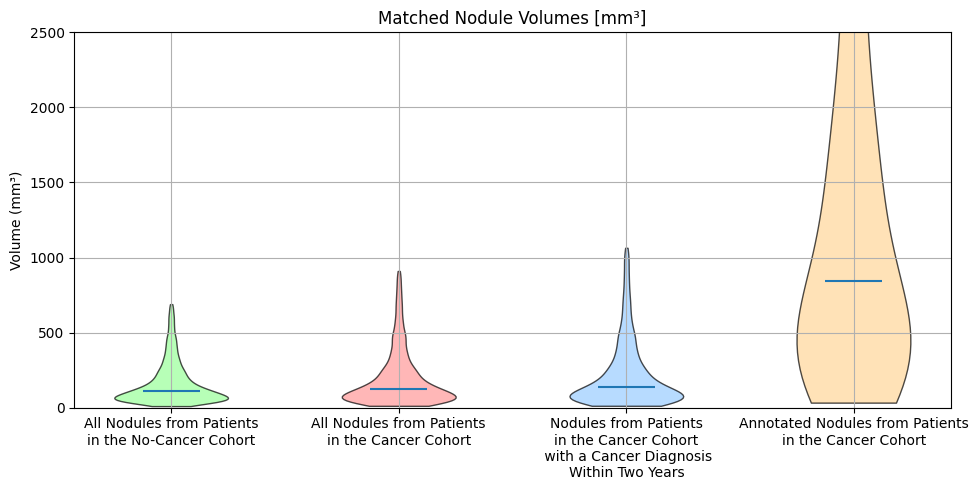

In [8]:
plot(no_cancer0, all_nodules0, cancer0, ann0, title="Matched Nodule Volumes [mm³]", y_axis_label="Volume (mm³)", xlim=(0, 2500)) # all_nodules = cancer cohort; cancer = cancer in two years

### Volume Percentage Change

In [9]:
all_nodules2 = [-31.189710610932476, 3572.7380781273964, 625.120135601617, 38.75304821976659, -87.56507409531591, -20.877165742032737, -17.238292349808713, 388.3116883116883, -28.39506172839506, 24.317296686920518, -54.733614822824684, -31.945960462255492, 16.793694520967247, 79.80391700223771, 50.29946099089112, 510.27291318214606, -45.78750785154425, -19.602462471734924, 83.20083553616081, 5.084745762711865, -4.292929292929292, -67.74381102869174, -25.0, 95.90163934426229, 144.11764705882354, 48.03921568627451, 4.584944533878386, -42.963183970015564, 2.7893910751028805, -4.438629287693984, -47.799245657530165, 77.29561573935638, 39.60693424793334, 57.079777143534194, -60.142687585235436, 224.0168686274736, 436.7356920960816, 22.727885557517588, -53.608859501867144, 75.7256236748686, 492.67289504036904, -48.10452215261503, -50.81323742802177, -62.02780254913321, 82.67924622239924, -16.28309573411563, 99.17281635028942, 248.60643067668175, -2.001945114401951, -20.30878998626103, 56.46102460242012, 136.64307399277712, 57.28570476220114, 18.824506372201647, -83.39864942492054, -20.134303081225138, 19.290474753846574, 135.55555555555557, -21.23423677704856, -17.105263157894736, -19.537468635057547, -9.184993531694696, 88.02908284778911, -11.76470588235294, 102.10294642841428, -65.30103313145707, 32.55813953488372, 130.18867924528303, 14.874423997875896, 523.5294117647059, -50.0, -40.590813480232555, -89.92759600403262, 10.714285714285714, -71.0681589060862, 12.5, 6097.240545428967, 172.8481760995305, 12.110884238915993, -13.778941051224844, 81.90089998443474, 121.70651435312665, -44.45643475584461, -19.320778373460826, 17.02308402585411, 31.049823549501003, 67.9117118703157, 38.57996792535355, -25.38750673058833, -13.86810275115707, 11.21519027293255, 95.28227146814405, 6.574594380688563, 24.12228449540825, -69.45893061673452, -6.538683777700831, 21.1411065183518, 34.97815258345462, 4.080591517185054, 144.0067366007058, -62.772562960159604, 59.49472542214019, 10.346841851740459, 35.214349923493224, -41.95458649576772, -20.514388714925165, 106.62862474877979, -20.195918367346938, 5.405910961466517, -0.2715882874889086, 20.891762837716943, 49.01053013798112, -36.26668291197076, -53.018847249616485, 555.3581341107872, -39.57796140021878, -15.442925843604769, 1.160957420005039, -74.18027333455905, -40.677627312607285, 25.39629513343799, 48.5637522377372, 93.36734693877551, -65.69921067407073, -29.914529914529915, 62.89389067524116, -25.757575757575758, 45.9185588290486, -30.676118827160494, -96.52425301110316, 1739.3888052208836, 212.91146364254163, 234.05694593180436, 206.47827469276746, 38.47870082408437, 12.708832038119008, -24.475727549442762, -57.16433507500421, 41.05886704341772, 36.794156093810074, 46.81847724551686, 65.89683322293148, -15.955638363942862, -25.695196597157384, -12.972921386408196, -16.842118783885198, 10.66868636309751, 23.661951724659218, 9.278332747784946, -20.618328653983337, -43.34122814297479, 32.94117647058823, -0.8849557522123894, -11.213517665130567, -8.477508650519031, -18.253968253968253, -5.825242718446602, 47.27272727272727, 1191.8212230780443, -27.64673630430317, -1.4133904177886585, -4.077893379470046, -40.11776306858274, 101.21951219512195, 48.09330530314864, 247.60278723383138, -63.08068459657702, 361.3853328447491, -18.803418803418804, -12.288135593220339, -30.985915492957744, 117.89471792766277, -53.62318438003849, -26.984133322299954, 73.91305857485564, 222.97300100877752, 5.833342520240275, -89.78978890348822, 11.352786035854976, 14.074074074074074, -52.864746606479486, 14.720812182741117, -11.11111111111111, 314.2857142857143, 233.44854836522214, -25.61673437824315, -21.564155817883755, 1.730818086735228, 44.974802013489615, 28.400529681344466, -37.682047847826205, 86.05934039692079, 920.7307256235828, -91.65620701011736, 136.7134831460674, -8.25074972128095, 385.3276954640461, 25.320869615992436, -87.29920574630913, 90.64091540904792, 486.5457709886332, -28.205128205128204, -27.692307692307693, -59.199999999999996, 37.5, 856.7567567567569, -32.142857142857146, 22.36843154374146, 97.36842105263158, 35.41667827645224, 6.451612903225806, 17.5, 11.267605633802818, -71.80141784116803, 21.81571411526071, -23.112787502544272, -49.891408378119706, -2.8780200263343234, 87.02730121922498, -73.31789907394443, 17.08376935215176, 108.77672114276807, 59.318765175164756, 164.38019468117335, 42.53606035107449, 9.434220306228632, -81.08544340386172, 389.0519445589375, 42.47595349047641, 9.326068083220022, 351.57088113055886, -64.0219344342535, 1.2184380009562112, 4.588605132947155, 37.01520265983097, -28.00675961038326, 266.65533766932367, -12.271066286016854, -26.518200569868327, -64.28183507353204, -25.920640607561385, 58.65837637388174, 248.99690778968977, 20.910031961509407, 71.66968208893, -1.2146515446288328, 12.200977081948139, -3.900078492930185, -3.589075510706658, 30.049751327231235, 74.7593168116025, -17.59495041943828, -98.87814653554906, 30.05563728276825, 3.604325097091325, -14.672491941464216, -65.4077670032963, 578.2153474631662, -13.623383235826484, 184.0274315739344, 348.7594868263734, 22.29939597935131, 58.65257143348212, -53.48160652492256, -52.112783362268765, -62.95814362582781, 285.86950944170775, -29.490120701058203, 35.53956412774252, 5.57861328125, 30.9839287778934, 6.059158509036145, -13.564628174720275, -28.80522629310345, -0.6684955696402106, -4.0241152330074454, 207.9987292640191, -4.058617994028566, 250.9767239784242, -60.577023952862966, -3.1043005437469104, -6.89124487004104, -24.028909476504072, 4.080394017189418, 78.38658617389383, 15.645625962227335, 351.76489907700835, -78.62210784638522, 35.22656222372137, -88.52594939329234, 49.33810208607901, 5.498705702318337, 260.0477949001372, -25.558598502823422, -76.80386483486163, 214.8110206690943, 15.821394892346245, 190.4441497011052, 286.07594936708864, 13.492063492063492, 411.3207547169812, 27.009954488894948, 200.92777186456095, 4.072771819725332, 241.46560416262463, -35.17209495525643, 136.5709414460014, -82.1969696969697, 498.58156028368796, -28.947368421052634, -34.5679012345679, -24.299065420560748, -4.411764705882353, -11.19090459713297, -38.08535178777394, -8.661110275312172, -6.6467239647282055, 773.6797417929109, -20.60489555299244, -23.21189898259567, -32.15732928994466, 365.1354703923745, -53.24293880977275, 263.14599322608296, 50.16035311923419, 580.6377851411671, -22.05256396365719, -66.38141613523511, -82.78284902127567, -40.770712919946284, 16.95906432748538, -75.02111524430786, -17.60648148148148, 209.6851324969774, 41.85217572145536, -18.639704965347683, -68.48251871794268, -8.060747994133278, 56.27523881407952, 11.83683595213566, 1.507492681037844, -10.822064649984718, 214.84043403969824, -40.12631930641125, -73.76437257028707, -35.00554398393326, 30.01724748979716, 54.28788375109054, 196.25575634330056, 192.49223743380205, -46.15385908803349, 110.44866739760242, -23.053027650153567, 4.655358830499578, 11.62670911339137, 51.2736117630044, 50.76369503944322, -25.655078993434955, -20.087848723533803, 933.3094443258101, 25.14851485148515, 43.35440798061709, 98.91304347826086, 12.5, -57.189549172794116, 23.684210526315788, -41.02228047182175, 35.99997875, -56.42857142857143, 21.559614033830275, 41.935084346426606, 172.27483246567112, -43.415246247573045, -4.446640335696366, -2.994007101363112, -36.93974032126518, -48.214845896216396, -66.57158040525218, 15.27238451347449, 39.60944640818514, 64.17552338617833, -30.823311626215467, -0.6769894358538204, -9.593204100304401, -24.09380311531286, 42.33066731241888, -51.832460732984295, 184.31472081218274, 46.3013698630137, 13.120567375886525, 152.8409090909091, 41.25874125874126, 370.1219512195122, 351.1111111111111, 19.88555078683834, 31.642512077294686, 27.442742122776558, -51.492402245866955, -84.94848733281893, -57.78686676264182, -46.48358443983211, -1.3431980790983225, 0.7972848028147316, 124.3649103129709, -32.635477978316885, 102.5797288311309, -24.97912008950812, 10.083407139004434, 185.42088298756212, 366.5391609624474, 17.206145119552012, -32.08413525661422, -57.35499489111684, -89.49077528148769, 63.41074020319303, 5.92057761732852, -27.058823529411764, 28.97652367664102, -29.389300710438132, 93.0928173308909, -43.21433329610519, 46.34413558640567, -35.05249385142837, -22.254677969721985, 103.42107645271861, 50.0, -20.97555924741556, 76.96853416254203, -37.26041006059552, 1816.1917009295105, -37.066626442633165, 8.641780668630297, -6.820558071535466, 52.6183193821913, 6.374195019064623, 19.63242802144079, 65.94616057917129, -67.3076923076923, 114.3296345301986, -61.56320293442163, -99.67862191828861, 2247.5791202432415, 53.097919732398246, -60.5000308272392, -16.835443037974684, 89.2292895478897, -16.78377995774349, -72.80002122787104, 137.67605633802816, 233.1168831168831, 71.95476860099123, 11.154219668845505, -96.06295119969265, -29.528031466472637, 66.85112298882149, -13.675543960907435, 138.20905322772603, -1.747361132595261, -21.780139806568993, 143.0134110787172, 20.53097777529596, 39.075918367346944, -1.8553115273156597, 40.65632653061225, -27.667813863868513, 19.220343642611684, 41.44308845143724, 83.90204081632653, 427.12690737833594, 306.5296075353218, 16.510945964648663, 89.7361745249824, 13.823605371900827, -39.07066959015011, 37.42848273910902, 17.908023191467574, -5.263157894736842, 123.84434958968258, -9.826589595375722, -4.280155642023346, -29.725958622142084, 45.1008132542141, -77.11564459879796, 48.86866691052385, -20.34437520196538, -67.38600915710235, -93.93692588515187, 19.642857142857142, -73.18548387096774, -66.52892561983471, 83.9506172839506, -31.372549019607842, -67.81772651291172, 119.61349897895184, 51.947751104154506, -19.463412099088824, -4.249465605259187, -13.137699972070427, -34.653011727727176, 73.51803097136941, -34.453126822423755, 44.69369872026465, -28.77006892440694, 18.64119028205015, -5.900336887927131, 116.30938793756718, 119.63024424949612, -40.32536947683353, 50.3998855039808, 23.89450317463309, 101.28091592678854, -0.5814621997961672, 46.76733452994997, 70.18634948000883, -29.99287085192115, -95.61712069022266, -32.80815575758662, -11.491102660323618, -49.540252630023964, 159.3547346858239, 0.8413433501173043, -60.5322570026137, -6.625785763962755, 19.46647405503119, 14.040684812122214, 12.801928951320438, -10.373986703255433, 81.7233676680972, 14.625508836799764, 5.384131179518879, -25.335231186560154, 32.29166666666667, -50.52598023589417, 100.1015111019737, -54.8828125, 12.468384667266188, 10.545590049342106, -62.90834640444015, -81.40368852459017, -26.019021739130434, -7.068509615384615, 780.859375, 184.75997640788552, -63.32728408895903, -68.99649621047261, -9.142077610176123, -25.477558072508888, -68.4405712334059, -49.407673915959805, -53.358631674486666, 13.487682142627474, 3.3521361397996574, 32.32930841528918, -10.443624772812372, 15.178818715678046, -45.9086716870445, -37.275803129503686, -77.69256847868812, 106.70473968686285, 8.617508480975937, -26.9822218249004, -5.071686617132849, -36.58301250986354, -92.91044429544858, 35.476047694885295, 34.18064082223825, 129.06349340084287, 21.959594208888024, -50.94734220642457, 45.40609274524145, 162.30118691298458, -17.247668383439134, -11.220698241152787, -37.59205536057964, -60.41699380165289, 63.320413612973645, -49.14410487022417, -31.511006160853128, -15.316090179873601, -12.259052647689012, 80.93961124542047, -57.32217573221757, 6.976744186046512, -39.19507958649376, 37.387013105453086, 21.045193342046588, -21.43428329614734, 124.81548656194977, 291.46412522837045, 0.7543306328922094, 55.558725840220646, 38.27425072493122, -10.701075866693085, 0.7295188897816242, -40.422453634835236, 10.040650887996733, -50.46886341405909, 22.032260279637402, -33.43433154028037, -42.46630826480134, 48.07030727069348, 33.706260276047075, 6.127624892712235, 46.17816904865244, -5.323308248012026, 118.50030263157896, 73.6943378305192, 11.682279119448921, 61.697431613996855, -40.00930016659747, 28.260177901627713, -29.556375195625822, 18.60618601655896, -8.979627838975475, -23.238226861904625, -37.94065534475601, -34.32390704513122, -42.570069596286096, 73.8668512870737, -23.501792158748454, 65.38812413630943, -2.8518887123322147, -3.8683155158033866, -69.89775137506373, -42.00647415609578, -48.292684410626116, -12.096261975062887, -30.92105263157895, 24.6636823499077, 12.226277372262775, 96.22130969822095, 142.65988372093022, 1615.0350905794116, -23.51875369956196, 13.165680473372781, 6.279620853080568, -59.36567164179104, 95.59535333978702, 206.0004301476635, -54.074009515480185, -67.27268126762958, 0.45127223392878524, 23.72430767067055, -13.870730497491824, 122.59593061281366, -24.463154468972007, -27.71530984926703, 793.5373402950833, 28.441393528978054, 21.077856258243944, -42.66576433875621, -61.3547795033414, 70.7680290944037, -12.510493167903872, -26.082146031128104, -43.52790260641831, -13.429956016484251, 28.833231839394664, -29.179889015210964, 215.06744926190947, -41.911494277207765, -2.090045814036819, 28.718847908460056, -43.32735285764052, 36.14610743918455, 223.34700516806328, 57.91365368672858, -6.982368376310559, -21.071196875124922, 123.10943356596367, 94.00820310083797, 864.8914150515133, 503.39115149423617, 42.94117647058823, -34.97685631715821, -14.049586776859504, 19.960666341319723, 16.05839416058394, -56.6147859922179, 214.86108754247826, 101.66666666666666, 969.1537876321812, -53.90070921985816, -27.074043469551285, 187.5481190400965, 93.93838088356028, -2.9786250837597468, -13.005251463815744, 17.32400608828006, 28.659033520821918, 50.708159488914994, -29.727927170868345, 160.3356809658831, 246.58415306453358, -1.2165005030641178, 84.7480788684402, -32.8922702529619, 92.33859305202944, -43.34475764146325, 185.04987654320988, 59.61627602329753, -14.784040404040406, 29.423782608999165, -39.168781014023736, 18.82885247926865, -5.94508122157245, 681.6781264540143, -23.94101851851852, 133.26964956111638, -54.92682276328803, -22.49355029585799, -44.84223602484472, 112.03791962174941, -27.221308116627263, -1.4160699443180513, -6.000020399301128, -5.714306175590798, 5696.190068493151, 190.93304554223192, 47.279189721534856, 44.65377807867271, 17.630198741527508, -7.444194319200129, 293.754359760691, -97.8237680174803, 703.774101964841, 67.85046728971963, -35.12658227848101, 186.23206472589368, 108.43283357050649, -12.423179172056102, 19.71841692562228, -24.223147380411383, -49.08412538011746, 38.61296813802155, -28.231918111254178, -2.5843017703982065, 2.243300460575467, 8.789023136196978, -5.252640790684382, 7.883642304977228, -20.151863623066383, -44.75153629201823, -41.911685828006625, 92.15021326561342, 54.959277916513926, 14.406317816840279, -40.84049258865551, -20.2960267912515, -61.31199147933201, -36.09049797272936, 59.556786703601105, -52.592734124215426, 257.06221456913977, 146.77956873935537, 424.93360367821344, 22.74727065341372, -14.627390041213431, -60.752688172043015, 2774.468085106383, -34.49781659388647, 17.90610378689236, -13.490483762945482, 21.17552540822072, -33.75702725459392, 21.683824366987416, 39.47721377914124, 34.082816610937776, -22.79051618859233, -24.444444444444443, 21.713410222581604, 287.03888334995014, -1.5902712815715623, 11.15839243498818, -72.50125565042693, 164.07766990291262, -14.85148514851485, 11.892381031471036, -33.290117371375416, -11.784809613585308, 26.745912679975863, 167.9026610247089, -34.91718767939065, 132.30996987291022, 98.96517579725462, 164.31285489229694, -61.90183744795854, 37.29265546054681, 579.3949092142141, -35.30916603335007, -21.69242918231489, -68.79712375896663, -18.512258238387986, 37.35422677119235, -82.93095819398381, 11.3448513972951, 5.910068421206339, 15.849220814306333, -0.15580916030078498, -2.327806053082606, -22.648715688288632, 33.24859471696963, 22.37057397365301, 0.8333333333333334, 398.79518072289153, 61.99261992619927, 15.064935064935064, -7.594495534115111, 109.86775597757439, -46.796151617132956, 798.7703892225734, 7.142844914162554, 417.94341726678914, 38.61462130972287, 58.789260470819194, -41.05424741646336, -3.1239370583615296, 54.000020815343774, 258.13953488372096, 21.917795385279913, 69.83760352700936, -79.88060690349494, 12.464464662680681, 2.596418544629987, -82.70204800872233, 16.53327514228021, -2.5709834882955165, 102.39764018980297, -47.841093859692286, 8.736358650582746, 229.875282680197, -48.558330965082206, -8.586616423755544, 55.01482096624958, 50.69450422986921, 66.41604010025063, 12.349397590361445, 571.25, -38.547486033519554, -1.6474464579901154, 6.532663316582915, -93.34353481254783, 201.54525386313463, -63.103953147877014, 7.5535512965050735, 12.473794549266247, -18.655266226195103, -50.50167224080268, 92.3076923076923, -53.6, 55.04587155963303, -24.556213017751478, -30.18867924528302, -21.62162162162162, -57.21925133689839, 13.750000000000002, -27.659574468085108, 96.92030198851349, 58.51096555241546, 6.02086503811167, 3401.1617532500914, -22.34652920586778, -7.103217198272209, -4.791750655962183, 22.17106234048434, -25.27973406400632, -34.45283905231874, 6.351845182231, -34.89030619991172, -9.813070924307285, 138.37301003520918, -41.377638974735376, 263.0246054015435, 22.61926788306624, -12.9878906828618, 114.77422205320424, 57.87042882622865, -52.89458645423698, -2.1404993507767176, -4.005055370428181, 31.57894736842105, 322.95367849405204, 83.34695082909683, 108.08734047798197, 236.3394938216732, 27.503017899403165, 64.2051577975647, -66.57189785283046, 11.823160059212904, 61.629782941808045, 34.54034919913437, 31.646065285463287, -17.135432268592112, -40.719626191336424, -0.6855599987171741, -97.3482526572924, -3.4592150671362427, 94.5675501700566, -0.9449985049729029, 27.397260273972602, 20.64516129032258, 4.411764705882353, -24.034672970843186, -10.477178423236515, 409.99999999999994, -84.31372549019608, -60.53475935828877, -20.408163265306122, 31.428571428571427, 199.0, 676.2292243767314, 176.91937102709937, -46.58612906535345, -8.203107707291158, 237.40319911748483, -54.72209999241332, -7.339449541284404, 41.7197596841181, 3196.3639727270324, -40.76782449725777, -31.666666666666664, -17.647058823529413, -43.9390556981806, 179.26829268292684, -28.91530013539943, 12.962962962962962, 10.98843562192679, 322.61306532663315, -22.812807040027337, -27.11864406779661, 52.2659320724292, 54.90196078431373, -72.61663286004057, -1.5470001787686745, 60.70723778531663, -17.830307805016325, 118.75240396863376, -14.791505078485686, -64.00269611880262, 49.922529571621745, -38.0, -13.447852760736195, 164.64646464646464, 30.212014134275616, 22.08428868028429, 23.29846767732294, 46.121320354258216, 33.29581152774193, -32.468191818032544, -58.79882807941331, -65.961176007529, -26.33912278276853, 13.005226884074547, -21.47471890941444, 7.304726954506553, 193.25289445191157, 1931.1318896945352, -22.095017600533915, 2220.3830999123556, -43.834237130306484, 432.34647055910074, -14.499347636949606, 603.1410791951811, 0.009853976174097093, -81.36322185819223, 129.29662702025482, -74.29182262803221, -61.71891583163093, 19.7959444957009, -16.765642698492815, 188.97510305667237, 20.390212521687655, -93.83866706647788, 3.556115301724138, 300.5695771008003, -41.46717383545226, 141.7724099985001, 72.79549808576347, -29.02050271623785, -2.5916638478550738, 4.1190099888268845, -10.927689683122011, 52.291951706926675, -4.957949736352529, 9.072263882699653, 63.86543166202701, 283.2764615749021, -30.786779795283202, 158.30969991894617, -33.77087235938992, -44.54921084826024, 17.49876450118132, -35.277828965174585, -72.51964272122986, -49.69255273391981, -67.68486328555319, -74.84796170857686, -66.91853044047306, -74.63552895273715, -79.55118838095679, 13.567424591715401, -22.927325299080987, 102.68295370762546, -14.322971861293022, 7.015457788347206, -1.9668526974463048, 12.491511002216152, 22.594726878846778, 237.8625661839021, 98.27907964638749, -11.827956989247312, -39.909251143292686, 193.45436380503818, 30.70187995510163, 98.15154519667817, -48.78252902189781, -74.12200330409638, 71.72916739716617, 162.08268201765924, -42.16948044722963, 69.53878415193881, 30.061753279320985, -16.80805332158652, -29.8510626844074, 22.113738183360145, -44.913773844799756, 10.967477172463322, 24.098044049967125, 33.60956701184257, -64.21040181723943, 726.8321300934365, -95.96537964538389, 947.7505400582323, 108.22638314735258, 94.84310561233639, -81.85764399546547, -34.766982934011295, -44.75046391949801, 181.8268002224038, 18.099547511312217, -10.44071353620147, 17.62295081967213, 42.51706867647578, -48.40257951567008, 36.27606362148877, 140.90434423718457, -65.48414742991602, 242.75864428500046, -57.5340675957783, 244.86553986617642, 38.13034475919829, 2.224179176107896, -76.94526207219825, -38.01301824663304, 20.161879306369535, -79.9571147595487, -46.437813737463344, 258.6817973518746, 133.1104129897988, 22.784214432947174, -18.893622972875292, -0.8937599984976514, -11.433000948147232, -30.692595674625046, 22.539091807835728, -58.08997539545043, -41.89295653174581, 65.86159652647503, 191.72107537123532, 10.240147155859177, 273.56650159270777, -10.135241655781272, 41.4917844868209, -47.705247487728734, 74.41207536629435, 28.167710596189334, 17.88470162918631, 131.70704242063366, 50.301049309106546, -64.64515164252188, 91.31763976190182, 8.157385482557071, -17.19100881940481, 104.59023266266887, -24.775956608807938, 10.186866376394278, -17.36644645104241, -26.99981929162833, 35.409239365714164, -20.01886701417224, 6.861044274738176, 15.449727576429586, 10.952777867409576, 471.8275539107577, -65.47619047619048, -35.59322033898305, -23.52941176470588, 48.07692307692308, 198.36333878887072, 147.45762711864407, -2.1739130434782608, -51.85185185185185, 15.053763440860216, 4.861111111111112, 70.96774193548387, -77.39463601532567, -40.18691588785047, -38.013698630136986, 69.27334847822047, -45.51724137931035, 92.08633093525181, -22.654125414446074, -39.21568627450981, 0.49504950495049505, 114.30172689114613, 197.7595082930976, -59.33996087285844, 75.11519268911341, -21.95102217678985, 82.23085859407881, -68.00149583951057, 40.048247661320175, -53.669005254520954, -53.42683469791778, 133.81254456113078, 6.022441011210696, -61.70391789303127, 33.77678063281514, -29.037730917056937, -58.117927093373275, -55.17021521724706, -30.707278460523117, 46.764176372107826, -46.05099403921698, -12.891254706633784, 5.267973788443454, 5.031609691347541, -51.745136679495516, -36.86497496091047, 482.4523490983184, -41.57088115990823, 123.12925170068027, -29.03146777003484, 114.43661971830986, -40.229186912860385, -85.59670781893004, 25.659620991253647, -39.23705722070845, 17.853139013452914, 5.511811023622047, -7.13904964971063, 61.49826643364528, -52.15999008005704, 27.903023796743604, -84.8205905710779, -43.46423931903451, 28.181679622008843, 69.15996787422617, -38.373281202061925, -61.32512646361739, 225.58146623990245, 13.284889828099706, -4.213326682462485, 139.6011396011396, 73.04526748971193, 73.4310307282787, 21.074576593461817, 95.28401672533757, 36.4967694479235, -25.538097019578498, -49.270117022560015, -66.97254303287757, -16.83095671037101, -86.75213675213675, -24.0, 9.473684210526317, -20.833333333333336, -2.1021021021021022, -54.355828220858896, 100.0, -51.53846153846153, 110.00000000000001, 118.77551020408164, 42.234332425068125, -80.3921568627451, -16.307692307692307, -46.38418079096045, 68.76712328767123, 2108.9320388349515, 6.431180582380221, -9.6603818892724, -5.626793532483766, -78.42883647225958, -86.96178884078577, -4.930558951537972, 13.954939631228012, 13.877580291406408, 0.6410494326340469, 20.944610018838542, -89.08972645503621, 37.16943507153297, 8.528312380972551, 15.919983542859478, 12.1086868986874, 120.90569149772084, -10.893936569648229, 186.43011750981006, 20.68175621676915, 7354.06251602738, 280.2777641938481, 40.73577286398156, -10.662676065711452, 5965.6158719906525, -97.38644500573476, -30.51964569091797, 589.0743324275933, 13.424124513618677, 14.922813036020582, 52.26737338044759, 82.36828377673449, 27.11670480549199, 180.3921568627451, 23.426573426573427, -81.05960264900662, 207.6056338028169, -13.953488372093023, -45.346062052505964, 18.340611353711793, 10.446049764935214, 115.72890025575448, -48.10126582278481, -27.380952380952383, 42.4408014571949, 71.15384615384616, 40924.489795918365, -93.16756740694056, 148.84681084508378, -70.31339944334657, 17.6120848063765, -5.420584862981915, -6.254227139712764, -79.64046790393479, 1293.915598056779, -39.36269149078287, 29.851118318382508, 30.347640314153562, 61.357004056900855, -13.52395726356434, 22.7709683022409, -41.618941005180034, -79.39064367897493, -14.466503133606043, -39.384760639291216, 89.47986041852842, 9.760913428320563, -33.806339661282095, 57.81639667461806, 146.95292902464217, -64.9574885818744, 271.28366699218753, -74.81481481481481, 149.99998492959105, 1600.2651494946192, -64.55221813034916, 19.995266040438477, -42.21311475409836, 88.14639997822084, -53.48837209302325, 98.25389598155856, -57.95486579849987, 47.2810748279125, 1.3245033112582782, -32.67348158836562, -45.85321628533761, 39.8989898989899, -0.9070572806959332, -15.217391304347828, -16.666666666666664, 2696.190476190476, -10.38961038961039, -28.04878048780488, -46.557377049180324, -9.239940387481372, 45.81280591090115, 42.66666666666667, 115.21739130434783, 81.21212121212122, -10.784313725490197, -8.571429807218742, 147.93388429752065, 330.416709264073, -3.7142857142857144, -34.759963768115945, -7.894251643792955, 237.27703809441567, -55.78126037661936, 95.00281226378128, -26.779552917703448, -19.89644858210179, 61.15085850169639, -15.58980603275242, -11.4456263417225, 11.201633470543324, 75.91368154518823, -30.08558810383545, 142.58246114482043, 23.95605408458411, -46.418812075277785, 66.89246710697346, -0.47562810328718513, 22.330778545791816, 42.9031225653124, 39.92866356280496, 107.65058673996629, 69.13595598589633, 10.689478566821768, 135.48004681851847, 15.781730607426159, 8.168984687663555, 343.28210013920943, 50.662265762786596, -63.24798367927564, 4.523625374111486, -0.3449571137402731, 10.78672320866108, 74.1111450765717, -31.156178102728788, 30.29360283374366, -21.78899316860324, 1.5335839096530863, -34.08891150877126, -43.07904872496694, 15.390049657774421, 3.378492389214452, -52.80830486141787, 0.35395384566954113, 1.8095618808036724, 23.89976272249442, -16.791195479242386, 5.463704161310704, 24.600861043913238, 103.84252079071462, 6.1540752982874825, -0.9477804201347603, 2.7230202472959366, 2.1868638125656514, -55.2349625416805, 135.33923944784084, -49.32106214750405, 203.2509128868671, -13.358249143621336, -39.507394470868014, -47.02701810014533, 256.13877407218666, 38.29508450057307, 141.12140309155768, -9.104229207854244, -77.60416666666666, 35.38461538461539, 59.68109339407744, -31.868131868131865, 165.71428571428572, 2950.862068965517, 185.71428571428572, 295.8690083887298, 38.40283250584905, -39.226062483121794, 275.9684784955996, -35.185186985883135, 8.550903978030892, -3.0953200725657553, -1.8362933598721967, 286.5074275087343, -11.971512322417702, 48.20036227553093, -34.48893044711935, -46.54642940016442, -39.80063878924481, -93.07317310385442, 123.87426552805232, -69.99492997577985, -25.06147784095893, -47.918699705459886, -29.809568336199305, 41.221412711516884, -17.327565897550777, -7.769263317885213, 19.551634014604037, 10.80184403153153, 10.09156021691589, 1.144477666323731, -13.445000959861508, 72.85702380952381, 56.27985937802783, 84.8609837962963, 11.590343293891841, 42.04685984347443, 131.74106174047176, 51.77980037328995, -88.50530433161829, -85.3744074929311, 25.9931614075178, -7.904929325415422, 14.118913377304384, -37.606155982228515, -62.70014405879171, 57.761975291794506, 41.087945382905666, -56.24807421180218, -32.71120548286999, -6.914390057715114, -46.43883554908211, -40.172857656248375, -18.36322498321927, 49.79340354159304, 103.32034891842274, -14.240277666761592, -11.434990834403767, 453.730803421113, 1303.6933234291591, -93.58589955221615, 3.942313067784766, 66.54502150270832, -41.629051983364505, -35.776064556712015, 226.12823861594768, -58.59287309326624, -49.9242229187535, 125.07441819973855, 0.5096071924135648, 119.57447940914344, -22.206725993848693, 97.30549647379678, -33.8006230529595, -79.64071856287424, -17.696629213483146, 2.244652459605392, -9.142324284566335, 1.1066353372163122, 666.9552567955645, -51.61667953114163, 56.257684210526314, -10.280226986566337, 45.999783066829934, -10.046581744343852, 16.53485650220636, 83.3805987979257, -18.546071813727536, 16.807791051682656, -38.06855426069753, -40.243902439024396, 0.8958528995513917, 20.98449810675855, 18.212556288266196, 6.7499792506006475, 255.04157474036492, -68.1920136462822, 20.388031203231, 93.52505811728126, -81.8920573034681, -22.810711586221792, -26.68448895495608, 77.24481348830923, -59.94351217737667, 28.724489795918366, 52.94295350456182, -34.871537900874635, 56.94139932198091, -16.256260990035702, 348.18447913424706, -29.345427810821562, 46.8049566263852, 0.002180507917819477, 57.31275217612072, -23.520171957671955, -57.80461072235047, -1.4609041290934979, -5.102974956964212, -64.66386554621849, -6.684202129411599, 118.20208901800457, -36.13607729155232, 19.598469248755688, 42.69924099913446, -92.88591661732882, 900.1027228965794, -33.92437414411309, -5.636864471346865, -12.235685137686245, 71.58609214292201, 17.146294756379984, -5.3790980390679834, -19.836313199934125, -51.484306864903026, -29.6875, -67.7124928693668, -39.795918367346935, 25.423728813559322, 52.57731958762887, -38.513513513513516, -12.698412698412698, -31.318681318681318, 4.8767752715121135, -45.18072289156627, -29.27662037037037, 17.82178217821782, 55.846391263057924, 11.469534050179211, 1.8867924528301887, -43.666666666666664, 30.839020261334184, 195.6473812652525, 57.55102040816327, 344.39834024896265, -2.564102564102564, 10.911922663802363, -64.86267933843264, 42.5597532767926, 6.666666666666667, 16.58823529411765, -18.947368421052634, -19.51219512195122, -66.88020258378133, 4.443799531197678, -69.929702810206, -45.70832981686218, 17.8934895241139, 43.22873320451175, -25.326307703056184, -16.697944616307005, -16.744018761983824, 0.6992319683851159, 252.8444238460518, 12.714893749760556, -84.75448382759372, 455.39961628294964, -65.7771984088974, 97.33681027761702, 236.33093525179856, 16.5473577328624, -70.91295116772824, -16.149068322981368, -48.15618221258134, 31.799163179916317, 22.169811320754718, -54.19915157074065, -29.412736597229568, -8.855208750166733, 132.85527625684418, -36.89975990396158, 238.42549646121074, -32.72727272727273, 35.13513513513514, 14.388489208633093, -14.583333333333334, -47.48263888888889, 0.42979172045787073, 449.6495922528033, -37.09792713148519, 40.73067944528494, -22.427123501762672, 47.953216374269005, 340.22007003488864, -80.1418439716312, 27.472527472527474, -72.58444915473298, -21.568627450980394, 107.80852201764112, 1304.6972791297164, -86.03134095175588, -5.915991177447703, 21.05020124969501, -75.85342523634611, -3.354275412742116, 333.0796711411278, -13.621374589596504, 438.0434782608695, -82.52525252525253, 103.38983050847457, -28.333333333333332, -72.36598890942699, 18.729096989966553, 128.4313725490196, -4.725151687371927, -24.657538845114512, -22.909086203834942, -57.221209192363176, 230.94019113915724, -3.389836405091366, 31.228078184964854, -5.592111025358501, -70.17421420745306, -60.526318198756165, 186.00001745605573, -41.87891085758068, 66.77967119637245, -25.624995460509975, 87.14074151891201, -96.64152682856503, 32.66462996377089, 69.91453757155006, 454.6387799930307, 448.3871324393018, -38.69158479776998, 164.13554175995657, 253.7388217319013, 23.475669632577777, 32.065026518224805, 49.54422120446044, 42.376708293906866, 46.66934599919631, -66.95364359892469, -48.58444538528132, 41.55167725535646, 150.45378609615898, 15.51101341503884, -10.165796457069359, 475.2519917585502, 156.92307692307693, 1.87624750499002, 128.3261802575107, 5.434782608695652, -9.99180999180999, 32.207940889033395, -10.904608130111468, -73.71226866601332, -3.274256879067805, 21.618852459016395, 335.51637279596974, 7.784431137724551, -82.85714285714286, 59.74025974025974, -74.81927710843374, 18.681318681318682, -26.840451571305763, 7.8683884481126425, -40.236322655556314, 11.026328849579624, 31.71824372604982, -39.98896856039713, 36.36363636363637, 1334.7826086956522, -85.95959595959596, -18.650793650793652, -40.731707317073166, 214.61897356143078, -31.685615422639646, 41.875580315691735, -41.862629284490495, 27.42504409171076, -5.9547772410091255, -6.649147299553803, 16.879523201362282, 5.2823315118397085, 41.22942386831276, -75.07174863387979, 151.74797144997962, -12.825271317829456, -45.91490196078431, 478.9703025893996, 29.355350877192983, -73.72475852855278, -12.90321388240469, -65.39546512266793, 503.43282759209427, 302.4525216618893, -52.53383056936312, 145.9059733133807, 54.69575118570519, -63.06244308422958, 9.880188605952538, 436.19786177721033, -14.608680136457272, -21.02512113358918, 56.21497354346836, -72.42051042958163, 86.79479147768505, 41.56030918714574, 58.73192642954793, -34.18231374650097, 858.2421600325713, -71.72058555610542, -77.24886836570991, 145.71504313565967, -42.4294305582643, 160.19009912978635, -8.827492783784551, 18.865957051428804, -43.74149939279146, -20.226921478924684, 6.036979575186992, -66.26973366214915, 35.805038132565066, -3.237517090913599, 53.06645291204093, -56.616955923643694, 26.101247150561548, 66.88023464233339, 92.14404907903577, -18.818282548476454, -30.33193510091017, -20.099209775338085, -31.255466207675553, 53.30515815723849, 51.13697862674553, 69.41573278435875, 84.79427549194992, 16.95935771183662, -16.049382716049383, 320.70126785236897, 11.11111111111111, 13.712059586603468, 14.134742404227213, -4.270462633451958, 123.24723247232473, 4.958677685950414, -68.08846761453397, 97.22222222222221, 13.615023474178404, 16.528925619834713, 33.33333333333333, 40.0, 52.76027633819561, -43.7752013492282, 15.35351866633517, 55.21364505582126, 11.979644887499058, -17.604672210249692, 50.44837642371864, 86.63258623387352, 4.907246263025434, 183.9742630959406, 145.01045196618563, -54.506209638645764, -27.226569543304112, -40.75213641606375, -38.67599726937374, 32.23087400400313, -26.385673414675804, -19.096838993221755, 44.02900995818557, 11.833558333172856, -80.22842355115742, 237.8287220113983, -31.320334425445935, 29.417187427427503, 580.6270069106338, 246.50938037051318, -14.053096072416011, -86.3496222324613, -45.836422030295914, 8.875035653953011, 63.74921806242932, 71.38572306753167, -32.19816957324355, -9.215782884059799, -66.83428535751432, -8.480615018182702, 12.077242584951629, -24.449849759394144, -0.6795339707294525, 258.85641762084515, 16.250804030874786, -11.692177855645165, 63.01800271739131, 42.54968367942662, 87.97257814700085, 72.3404255319149, 10.68951165371809, 46.479039443483735, 48.09061857571288, -12.5764160361688, -8.74384730000045, 1.36986301369863, -43.460764587525155, -53.551296505073275, -41.3837513425176, 212.68343033845318, 4.990349745438438, -79.08434575668934, 0.14590874813167135, -23.564767350157727, 16.0758190967495, -60.76181517433407, 131.48700420673077, -39.5551493226601, 12.329868861607144, -17.679500626929013, -6.6209936099815625, 97.43169072902995, 40.92571031886174, -22.774775590836207, -23.042345915944562, 25.34573017985341, -30.088502807915603, 80.79055145124447, -63.5994074790638, 19.506357063220705, 3064.8062131306333, 14.200943342212888, 3032.637161732739, 115.9271063789209, 20.79573766900734, -0.21518811606275165, -40.0, -2.8169014084507045, 18.954248366013072, -58.730158730158735, 40.78947368421053, 0.7407407407407408, 10.79480992883554, 7.6119220923026445, -7.7013028202171, -5.217064595763617, 4.670711709362319, -5.4471202642205006, 27.04201023796034, -11.734128762716589, 16.37091633663251, 147.60723262598526, 338.4944697394929, -28.63201096203443, 81.04186722738261, -36.144578313253014, 54.21686746987952, 364.2927794263106, 28.456373328345645, -64.0248372301092, -4.32914455294364, 74.595594199037, 40.79276104473916, 6.640702421919209, -46.97994125213937, 23.820155177543008, 69.79979241997951, -40.14598540145985, -71.412864211105, 86.57101067431334, -22.129118758365557, 54.16358543791679, 29.300069712554986, 40.847408228765296, -58.75156290665898, 74.01210928032552, -41.82137282030626, -32.49063843866916, 7.1519255306233225, -28.841192311709605, 45.32107154524239, 195.92197440960257, 16.470588235294116, 18.502200148375515, 50.12483027462661, -73.54585993469468, -54.325259515570934, 377.6470588235294, 101.65562913907284, -84.10133652503491, -38.144329896907216, -42.57425742574257, 39.30348258706468, 258.06451612903226, -70.38345958415164, -3.2085561497326207, 63.94557823129252, -14.392137719134517, -94.94833300408804, 39.017341040462426, -48.40425531914894, 3.225806451612903, 91.9753086419753, -15.714285714285714, 6.736500781995282, -73.97260273972603, -6.781115270987673, 49.56521739130435, 29.86209620033274, 15.29428840782445, -65.97462307139374, 8.044546134715812, 454.7334124506027, 19.908620915702784, -15.686497015361118, 45.294117647058826, -9.31174089068826, 2.3255813953488373, -25.0, 68.20809248554913, -0.3436426116838488, 162.0253164556962, -69.19917864476386, -53.502391328613065, 187.10139406357385, -61.344533804549464, -59.53393517533537, 380.5877558083064, 615.5246345766128, 36.09871357311631, -37.863544634377966, -26.879012967392672, 255.12489575473572, -75.88734567901234, 1661.9380269549524, -59.57584422657952, -68.8872945011338, -32.18315972222222, -64.67872902199075, -77.88944723618091, -80.70866141732283, -84.54073667041222, 71.03164610089819, 18.956776250457324, -38.833747675737136, 1227.0637074785157, 374.44705598402925, -80.29344709540183, -24.577281158772507, -85.58951965065502, 332.3404255319149, 228.16901408450704, -52.48114600637304, 38.35377103354253, 64.32780741191266, -10.417766308916388, 33.64900139622413, -62.92852461015502, -95.2018130273941, 71.5, -66.1981981981982, 112.62604540023895, 165.24843945068665, 7.718040621266428, -30.248553760223416, -64.01932367149759, 46.176693766937674, 497.30475434526767, 672.6027397260274, -50.177304964539005, 2387.8048780487807, 102.46913580246914, 18.216101449552408, 179.26412371416004, -54.448841643291736, 99.96478021143909, 29.82080131661856, -24.507612407654253, -4.5553186821755345, 6.9306930693069315, 6.481481481481481, 172.41379310344826, 20.253164556962027, 28.57142857142857, 18.64406779661017, -7.142857142857142, 108.9783281733746, -65.33333333333333, -77.68595041322314, 214.81481481481484, 13.698630136986301, 183.33333333333331, 147.05882352941177, -7.476635514018691, 52.229226660907266, 330.45538987826615, 427.132040684436, -50.21132233225536, 90.95319133934582, -31.818167144061455, 67.02131254213597, 53.38756688747006, 357.89473684210526, 23.076923076923077, 134.28571428571428, -36.45048405636017, 55.708401047418754, 70.41820418204182, 57.84975707172406, 124.52194822812277, -34.73053892215569, -54.81739617879943, -35.34521386657935, 602.0833333333333, 19.398689214210947, 124.26554702407637, 4.6534469738022874, -48.204512284539476, 12.81214180450682, 24.613638737725918, 163.71681415929206, -65.64885496183206, 5.128205128205128, 6.965174129353234, -64.54391548025511, -26.6304347826087, 18.984241305016926, -11.18508655126498, -45.032564050384785, -33.35496018005541, 3.900109393899965, 14.87603305785124, -60.41744690177248, 60.66459987476852, -30.82191780821918, -31.667261677435082, -4.761904761904762, 15.234666782325416, 37.704918032786885, -54.97230626515916, 59.965635738831615, 49.27801615618759, -14.054168070428034, 191.53436171977296, 291.39126626373564, -33.20701186912999, 66.28521117805013, -9.52402115142488, -9.877800407331975, -49.775784753363226, -17.391304347826086, -11.951309179841218, -24.814312266386803, 5.392976066597295, -61.18172404510687, 45.035194503442476, -4.919591334783843, 32.39558733964735, 689.5410896668171, -57.84238269196737, 5.743359407053586, 9.752818764074474, 253.6698647242456, -38.490808185917444, 16.84262282926375, 5.702409349235571, -72.85558671859012, -28.437142479346445, -20.49384831976495, -22.062583830190373, -59.878840124325826, -36.515542521994135, 30.38959359207694, -58.15403740533345, -60.46511627906976, -12.903225806451612, -15.07537688442211, -45.664739884393065, -70.40905134899913, 145.5615298292671, -20.242907287137, 216.21624671546545, 27.777765453533426, 123.5124653739612, 9.448581864535582, 36.71150794718016, 550.0487534626039, -97.44328904666068, 66.99207183112044, 176.5462112631852, -63.667143935410884, -57.49999999999999, -20.588235294117645, -82.11294834307992, -16.80327868852459, -38.42239185750636, 22.9638898211546, -54.47155439411331, -61.60304798910792, 25.19710497198464, 6.143322145415862, 70.30712963034479, -14.444462632271266, -10.650699185461319, -24.232098018384818, -39.58783439073128, 118.03274053474834, 14.06841293854091, -19.855468409249514, 3.7777557161800495, 73.98395630631207, 1.167423456628716, 15.999975340141297, 141.55369752012103, 13.281225918106735, 129.74447670720787, 609.4169102330656, 26.256983240223462, 2.4536385617223546, 1.233570118668519, 7.903032417022297, -6.6468264690665135, 2.2732922041683024, -19.372716695104174, -12.20030943141873, -44.712720019500004, -66.72176011305993, -33.477871681216584, 14.256482412132657, -9.289617486338798, 85.71428571428571, 0.0, -48.55072463768116, 12.62135922330097, 51.724137931034484, 3.2853027120484684, 97.72731033975415, 216.38530778905843, 65.88333787590098, 14.774554064439425, -48.20142899558909, 1556.164383561644, -58.783540699071594, 152.07174970456379, -5.8354612650324444, 7.708891322110167, -83.4331374083837, 150.35686984387345, -40.915207169208465, 84.45121951219512, 200.47806897092295, -32.2418862069681, -30.465397134027565, 351.8194761484945, 352.1551624296984, 17.659208282430576, -49.68510007039746, -9.310020989349889, 39.54977449178413, -10.41441435594883, -3.4103799207271237, -17.538309214355913, 40.16038727042604, -30.105646786605682, 76.22121456474981, 120.94328248780211, -63.17673281590162, 4.273888956940394, -14.001107595580992, 96.72452310942273, 49.0847278813463, -21.50754304742825, -68.36068027778832, -52.90377071815902, 41.825205259865214, 106.67903512109638, 23.149802305522964, -23.21801579854374, 36.0711540750364, -58.2721316180032, 92.04422926653451, 2.7183347556762834, -11.968144437297086, 29.654848351144313, 105.98354785099889, 24.099574916063222, 82.03197251948738, 27.800928265263973, -55.97919618809782, 171.26950330188765, -1.2016879654035553, -46.20054968365088, 1.456388162521144, 254.42865160443716, -18.351928757664787, 13.810726674403634, 24.137931034482758, -23.636363636363637, 16.049382716049383, 151.75953079178885, 68.27956989247312, 6837.770897832817, 41.545796458093434, -11.405580924878238, 851.5292650617087, 15.30066135115593, 43.63739223161808, 137.67846903076543, 150.07095192169564, 408.2481639473795, 199.0714933683199, 6.495457855936518, 125.09065027194602, -53.12242469337383, 268.0194208441562, -76.81564877128785, -24.88664401478559, 475.00005545910494, 75.43856123880947, 0.7777912778900393, -48.26561990981628, 27.586223987900176, 72.97293821599378, 101.78567373913782, 284.7345648130707, -47.27273786768144, 231.8965961847403, 2.643185556166387, -11.607142857142858, 30.508474576271187, 40.25974025974026, 276.6666666666667, -38.49557522123894, -22.462562396006653, -46.622459006852296, 49.5945945945946, 4.0650406504065035, 64.1648590021692, 92.5475687103594, -75.625, -7.6923076923076925, -50.299727520435965, 20.68886337543054, 13.684210526315791, -34.25925925925926, 72.9867131620353, -40.47356061581136, -52.62049261048269, -18.27953182815813, -81.2843909567566, -71.92260973448825, -69.02580882852097, 106.66670653292564, 62.365607058109475, 24.42308892375834, -9.42028111860435, -71.74741720967873, 212.66277665396652, -26.655048480812994, -66.10517926569725, 331.9609765462343, -17.62947844073722, -21.743556191581717, -6.789242980667419, 111.61748823252582, -16.26606591183151, 41.13926253261656, 79.69062765171142, -89.09405106004981, 12.51423358310644, -10.905252328512043, 29.559177882835957, -41.15260784808916, -57.99448529579928, 58.053292606208814, 139.34140960910196, -45.585145289208896, 877.7227722772277, 98.73532068654019, -59.539521186339464, -54.39567465042355, -3.106846659146319, -43.34715416509612, 42.943974630021145, -39.026717557251914, -43.97233201581028, -31.955645161290324, 12.198391420911529, -66.20171673819742, 18.369565217391305, 155.1001494321197, 24.75922804509974, 25.047089669569285, 488.69140647694474, -31.711873017327413, 96.35094712775732, -85.64589274974213, 242.83443854015042, 120.40168210646873, -51.46282770456825, 241.63864715189877, -33.88042203985932, 104.8314144736842, -49.59349593495935, 90.32258064516128, 478.8421860885434, -41.36750272628135, 2.5357142857142856, 6526.260047281323, 18.020598987626546, -36.57921030871003, -3.3522727272727275, -10.28820671378092, 12.886332417582416, -14.118303571428573, 23.958490922844174, 65.234375, -12.614635678391961, -0.9174311926605505, 26.036059456814286, -47.662124060150376, 25.695633561643838, 22.407670454545457, 36.58653846153846, 182.1573662460631, -55.85099745306946, 19.688162101848363, 98.12121391664749, -3.753017083651012, -5.6431494535412074, -46.710595510826465, 75.92615436159844, -70.14510666389475, -0.6517474497640022, 2.561862345989321, 0.8455041156750492, -33.8874357994399, 80.53616684305803, -29.096428696689113, -29.196767836606863, 4.991239827726208, -5.120819676418851, -12.670890943026357, -4.05508803798011, 45.83252277317815, 3.702502246339052, -35.45330060664112, 176.37922691698734, 261.5547687438931, -9.534387082270767, -8.494253562089918, -21.214661969607736, 738.207309893041, 291.90122661657216, -80.4904051172708, 113.85482640149596, 16.964285714285715, -8.54782700232024, 9.166666666666666, -50.7682468695824, 10.256410256410255, 22.853790671722493, 29.310344827586203, 36.663417633717884, 5.971506609864235, 41.10054158286457, -58.46851983598703, 166.17634182646003, 6.537874383223683, 26.984126984126984, -23.945505859375, 208.81452309794207, 337.9195335276968, -55.221194583621354, -16.579918367346938, 36.06905306668347, 50.6320800197137, 5.812811480151641, 62.23976107516177, -42.192984910582226, -48.33888198757764, 81.454867744246, -27.665752080251476, 44.73569361507519, -52.1484033203125, -24.5062824955125, -4.578562852674191, 64.13939170020953, 9.101640429687501, 17.54504260567132, -38.09836003989362, 73.83421793796462, 40.427301905668706, -20.012608834531104, -5.769222589489276, -63.265309311219234, 37.908508703231114, -29.620859189859594, -66.89188901792866, 42.85713045636966, -36.134448237637045, -33.55263157894737, 464.15094339622647, 25.64102564102564, 102.8169014084507, 43.52527233678051, 134.91446549005107, 38.37447903027248, -57.20086716871995, -96.79192205363785, -95.09826206503101, -24.414949713292398, 26.652243668551755, -29.23624307512012, 70.049262454982, 124.51410151620979, 40.68394229794567, -83.80458346667697, -17.488367369394943, -84.68184932296428, -20.93980260806524, 211.36053046947146, 25.35294083835864, 113.50030543677458, -88.86592778256403, 72.55899337544801, 52.31274918461244, -87.70314514230016, 101.261525513193, -64.66882310740185, 91.02788862269165, -1.675977653631285, -0.21826832337212962, 9.619047619047619, -12.32876712328767, -0.064284169550173, -2.486910994764398, 8.40484429065744, -47.2972972972973, 77.89512909236093, -21.765409878527453, -55.56301943537173, 71.40936917753527, 1.5991589988672863, -26.42618168158819, -32.497142780786135, -14.61412984913793, -77.6923055138219, -21.34147109613186, 44.96125446645002, 13.375785106488852, 215.6249691772461, 61.38615437422802, -16.6666748046875, -41.78832685261747, -0.5726765922964674, 2.078564733307251, -5.3105969087577165, 106.46799803032296, 4.708046823234926, 11.582956410831748, 12.879667820069205, -63.246615379447036, -25.59019919573553, 27.0, -64.05228758169935, -28.443948689347465, -99.5034079743641, 52.80796418336872, -51.15889171319857, 0.9649327939314228, 51.66760624170178, 116.69120263756429, 27.504229170449047, 57.738667729652434, 152.19809709583865, 242.65111630830097, 29.403534351451015, 28.734782235939644, 123.90362051024435, 148.0769230769231, 21.031518624641834, 37.93103448275862, 33.33333333333333, 2.8116710875331563, 0.5258386219401632, -33.14038876889849, -18.871252204585538, 2187.751937984496, -15.217272124475164, 3221.147525710962, -68.71987781236632, -77.32555857191605, -76.68394663040708, -94.83300756352511, -65.4847232717548, -94.02059931646663, -89.10614525139665, -56.779661016949156, 46.82926829268293, -85.91470258136926]
cancer2 = [-31.189710610932476, 3572.7380781273964, 625.120135601617, 79.80391700223771, 50.29946099089112, 510.27291318214606, -45.78750785154425, -19.602462471734924, 83.20083553616081, 5.084745762711865, -4.292929292929292, -67.74381102869174, -25.0, 95.90163934426229, 144.11764705882354, 48.03921568627451, -53.608859501867144, 75.7256236748686, 492.67289504036904, -48.10452215261503, -50.81323742802177, -62.02780254913321, 82.67924622239924, -16.28309573411563, 99.17281635028942, 248.60643067668175, -2.001945114401951, -20.30878998626103, 56.46102460242012, 136.64307399277712, 57.28570476220114, 18.824506372201647, -83.39864942492054, -20.134303081225138, 19.290474753846574, -13.778941051224844, 81.90089998443474, 121.70651435312665, 24.12228449540825, -69.45893061673452, -6.538683777700831, 21.1411065183518, 34.97815258345462, 4.080591517185054, 144.0067366007058, 106.62862474877979, -20.195918367346938, 5.405910961466517, -0.2715882874889086, 20.891762837716943, 49.01053013798112, -36.26668291197076, -53.018847249616485, 555.3581341107872, -39.57796140021878, -15.442925843604769, 1.160957420005039, -74.18027333455905, -40.677627312607285, 25.39629513343799, 48.5637522377372, 12.708832038119008, -24.475727549442762, -57.16433507500421, 41.05886704341772, 36.794156093810074, 46.81847724551686, 65.89683322293148, -15.955638363942862, -25.695196597157384, -12.972921386408196, -1.4133904177886585, -4.077893379470046, -40.11776306858274, 101.21951219512195, 48.09330530314864, 247.60278723383138, -63.08068459657702, 361.3853328447491, -18.803418803418804, -12.288135593220339, -30.985915492957744, 1.730818086735228, -37.682047847826205, 86.05934039692079, 920.7307256235828, -91.65620701011736, 136.7134831460674, -8.25074972128095, 385.3276954640461, 25.320869615992436, -87.29920574630913, 90.64091540904792, 486.5457709886332, -28.205128205128204, -27.692307692307693, -59.199999999999996, 37.5, 856.7567567567569, 6.451612903225806, -71.80141784116803, 21.81571411526071, -23.112787502544272, -49.891408378119706, -2.8780200263343234, 87.02730121922498, -73.31789907394443, 17.08376935215176, 108.77672114276807, 59.318765175164756, 164.38019468117335, 42.53606035107449, 9.434220306228632, -81.08544340386172, 389.0519445589375, 42.47595349047641, 9.326068083220022, 351.57088113055886, -64.0219344342535, 1.2184380009562112, 4.588605132947155, 37.01520265983097, -28.00675961038326, 266.65533766932367, -12.271066286016854, -26.518200569868327, 74.7593168116025, -53.48160652492256, -52.112783362268765, -62.95814362582781, 285.86950944170775, -29.490120701058203, 35.53956412774252, 5.57861328125, 30.9839287778934, 6.059158509036145, -13.564628174720275, -28.80522629310345, -0.6684955696402106, -3.1043005437469104, -6.89124487004104, -24.028909476504072, 4.080394017189418, 78.38658617389383, 15.645625962227335, 286.07594936708864, 13.492063492063492, 411.3207547169812, 27.009954488894948, 200.92777186456095, 4.072771819725332, 241.46560416262463, -35.17209495525643, 136.5709414460014, -11.19090459713297, -38.08535178777394, -8.661110275312172, -6.6467239647282055, 773.6797417929109, -20.60489555299244, -23.21189898259567, -32.15732928994466, 365.1354703923745, -53.24293880977275, 263.14599322608296, 50.16035311923419, 580.6377851411671, -22.05256396365719, -66.38141613523511, -82.78284902127567, -17.60648148148148, 209.6851324969774, 41.85217572145536, -18.639704965347683, -68.48251871794268, -8.060747994133278, 56.27523881407952, 11.83683595213566, 1.507492681037844, -10.822064649984718, 214.84043403969824, -40.12631930641125, -73.76437257028707, -35.00554398393326, 30.01724748979716, 54.28788375109054, 196.25575634330056, 192.49223743380205, -46.15385908803349, 110.44866739760242, -23.053027650153567, 4.655358830499578, 11.62670911339137, 51.2736117630044, 50.76369503944322, -25.655078993434955, -20.087848723533803, 933.3094443258101, 25.14851485148515, 43.35440798061709, 98.91304347826086, 12.5, -57.189549172794116, 23.684210526315788, -41.02228047182175, 35.99997875, -56.42857142857143, 21.559614033830275, 41.935084346426606, 172.27483246567112, -43.415246247573045, -4.446640335696366, -2.994007101363112, -36.93974032126518, -48.214845896216396, -66.57158040525218, 15.27238451347449, 39.60944640818514, -51.832460732984295, 184.31472081218274, 46.3013698630137, 13.120567375886525, 152.8409090909091, 41.25874125874126, 370.1219512195122, 351.1111111111111, 19.88555078683834, 31.642512077294686, 27.442742122776558, -51.492402245866955, -84.94848733281893, -57.78686676264182, 63.41074020319303, 5.92057761732852, -27.058823529411764, -20.97555924741556, 76.96853416254203, -37.26041006059552, 1816.1917009295105, -37.066626442633165, 8.641780668630297, -6.820558071535466, 52.6183193821913, 6.374195019064623, 19.63242802144079, 65.94616057917129, -67.3076923076923, 114.3296345301986, 71.95476860099123, 11.154219668845505, -96.06295119969265, -29.528031466472637, 66.85112298882149, -13.675543960907435, 138.20905322772603, -1.747361132595261, -21.780139806568993, -93.93692588515187, 19.642857142857142, -73.18548387096774, -66.52892561983471, 83.9506172839506, -31.372549019607842, -67.81772651291172, 119.61349897895184, 51.947751104154506, -19.463412099088824, -4.249465605259187, -13.137699972070427, -34.653011727727176, 73.51803097136941, -34.453126822423755, 44.69369872026465, -28.77006892440694, 18.64119028205015, -5.900336887927131, 116.30938793756718, 119.63024424949612, -40.32536947683353, 50.3998855039808, 23.89450317463309, 101.28091592678854, -0.5814621997961672, 46.76733452994997, 70.18634948000883, -29.99287085192115, -95.61712069022266, -32.80815575758662, -11.491102660323618, -49.540252630023964, 159.3547346858239, 0.8413433501173043, -60.5322570026137, -6.625785763962755, 19.46647405503119, 14.040684812122214, 12.801928951320438, -10.373986703255433, 81.7233676680972, 14.625508836799764, 5.384131179518879, -25.335231186560154, 184.75997640788552, -63.32728408895903, -68.99649621047261, -17.247668383439134, -11.220698241152787, -37.59205536057964, -60.41699380165289, 63.320413612973645, -49.14410487022417, -31.511006160853128, -15.316090179873601, -12.259052647689012, 80.93961124542047, -57.32217573221757, 6.976744186046512, -39.19507958649376, 37.387013105453086, 73.6943378305192, 11.682279119448921, 61.697431613996855, -40.00930016659747, 28.260177901627713, -29.556375195625822, 18.60618601655896, -8.979627838975475, -23.238226861904625, -37.94065534475601, -34.32390704513122, -42.570069596286096, 73.8668512870737, -23.501792158748454, 65.38812413630943, -2.8518887123322147, -3.8683155158033866, -69.89775137506373, -42.00647415609578, -48.292684410626116, 206.0004301476635, -54.074009515480185, -67.27268126762958, 0.45127223392878524, 23.72430767067055, -13.870730497491824, 122.59593061281366, -24.463154468972007, -27.71530984926703, 793.5373402950833, 28.441393528978054, 21.077856258243944, -42.66576433875621, -61.3547795033414, 70.7680290944037, -12.510493167903872, -26.082146031128104, -43.52790260641831, -13.429956016484251, 28.833231839394664, -29.179889015210964, 215.06744926190947, -41.911494277207765, -2.090045814036819, 28.718847908460056, -43.32735285764052, 36.14610743918455, 223.34700516806328, 57.91365368672858, -6.982368376310559, -21.071196875124922, 123.10943356596367, 94.00820310083797, 864.8914150515133, 503.39115149423617, 42.94117647058823, -34.97685631715821, -14.049586776859504, 19.960666341319723, 16.05839416058394, -56.6147859922179, 214.86108754247826, 101.66666666666666, 969.1537876321812, -53.90070921985816, -27.074043469551285, 187.5481190400965, 93.93838088356028, -2.9786250837597468, -1.4160699443180513, -6.000020399301128, -5.714306175590798, 5696.190068493151, 190.93304554223192, 47.279189721534856, 44.65377807867271, 17.630198741527508, -7.444194319200129, 293.754359760691, -97.8237680174803, 703.774101964841, 67.85046728971963, -35.12658227848101, 186.23206472589368, 108.43283357050649, -12.423179172056102, 19.71841692562228, -24.223147380411383, -49.08412538011746, 38.61296813802155, -28.231918111254178, -2.5843017703982065, 2.243300460575467, 8.789023136196978, -41.911685828006625, 92.15021326561342, 54.959277916513926, 14.406317816840279, -40.84049258865551, -20.2960267912515, -61.31199147933201, -36.09049797272936, 59.556786703601105, -52.592734124215426, 257.06221456913977, 146.77956873935537, 424.93360367821344, 22.74727065341372, -14.627390041213431, -60.752688172043015, 2774.468085106383, -34.49781659388647, -24.444444444444443, 21.713410222581604, 287.03888334995014, -1.5902712815715623, 11.15839243498818, -72.50125565042693, 37.35422677119235, -82.93095819398381, 11.3448513972951, -7.594495534115111, 109.86775597757439, -46.796151617132956, 798.7703892225734, 7.142844914162554, 417.94341726678914, 38.61462130972287, 58.789260470819194, -41.05424741646336, -3.1239370583615296, 54.000020815343774, 258.13953488372096, 21.917795385279913, 69.83760352700936, -79.88060690349494, -8.586616423755544, 55.01482096624958, 50.69450422986921, 96.92030198851349, 58.51096555241546, 6.02086503811167, 3401.1617532500914, -22.34652920586778, -7.103217198272209, -4.791750655962183, 22.17106234048434, -25.27973406400632, -34.45283905231874, 6.351845182231, -34.89030619991172, -9.813070924307285, 138.37301003520918, -41.377638974735376, 263.0246054015435, 22.61926788306624, -12.9878906828618, 31.57894736842105, 322.95367849405204, 83.34695082909683, 108.08734047798197, 236.3394938216732, 27.503017899403165, 64.2051577975647, -66.57189785283046, 11.823160059212904, 61.629782941808045, 34.54034919913437, 31.646065285463287, 676.2292243767314, 176.91937102709937, -46.58612906535345, -8.203107707291158, 237.40319911748483, -54.72209999241332, -7.339449541284404, 41.7197596841181, 3196.3639727270324, -40.76782449725777, -31.666666666666664, -17.647058823529413, -1.5470001787686745, 60.70723778531663, -17.830307805016325, 118.75240396863376, -38.0, -13.447852760736195, 164.64646464646464, 30.212014134275616, 193.25289445191157, 1931.1318896945352, -22.095017600533915, 2220.3830999123556, -43.834237130306484, 432.34647055910074, -14.499347636949606, 603.1410791951811, 0.009853976174097093, -81.36322185819223, 129.29662702025482, -74.29182262803221, 3.556115301724138, 300.5695771008003, -41.46717383545226, 141.7724099985001, 72.79549808576347, -29.02050271623785, -2.5916638478550738, 4.1190099888268845, -10.927689683122011, 52.291951706926675, -4.957949736352529, 9.072263882699653, 63.86543166202701, 283.2764615749021, -30.786779795283202, 158.30969991894617, -33.77087235938992, -44.54921084826024, 17.49876450118132, -35.277828965174585, -72.51964272122986, -49.69255273391981, -67.68486328555319, -74.84796170857686, -66.91853044047306, -74.63552895273715, -79.55118838095679, 12.491511002216152, 22.594726878846778, 237.8625661839021, 98.27907964638749, 98.15154519667817, 162.08268201765924, -42.16948044722963, 69.53878415193881, 30.061753279320985, -16.80805332158652, -29.8510626844074, -81.85764399546547, -34.766982934011295, -44.75046391949801, 181.8268002224038, 18.099547511312217, -10.44071353620147, 17.62295081967213, 42.51706867647578, -48.40257951567008, 36.27606362148877, 140.90434423718457, -65.48414742991602, 242.75864428500046, -57.5340675957783, 244.86553986617642, 38.13034475919829, 2.224179176107896, -76.94526207219825, -38.01301824663304, 20.161879306369535, -79.9571147595487, -46.437813737463344, 258.6817973518746, 133.1104129897988, 22.784214432947174, -18.893622972875292, -0.8937599984976514, -11.433000948147232, -30.692595674625046, 22.539091807835728, -58.08997539545043, -10.135241655781272, 41.4917844868209, -47.705247487728734, 74.41207536629435, 28.167710596189334, 17.88470162918631, 131.70704242063366, 50.301049309106546, -64.64515164252188, 91.31763976190182, -65.47619047619048, -35.59322033898305, -23.52941176470588, 48.07692307692308, 198.36333878887072, 147.45762711864407, -2.1739130434782608, -51.85185185185185, 15.053763440860216, 4.861111111111112, 70.96774193548387, -77.39463601532567, -40.18691588785047, -38.013698630136986, 69.27334847822047, -45.51724137931035, 92.08633093525181, -22.654125414446074, -39.21568627450981, 0.49504950495049505, 114.30172689114613, 197.7595082930976, -59.33996087285844, 75.11519268911341, -51.745136679495516, -36.86497496091047, 482.4523490983184, -41.57088115990823, 123.12925170068027, -29.03146777003484, 114.43661971830986, -40.229186912860385, -85.59670781893004, 25.659620991253647, -39.23705722070845, 17.853139013452914, 5.511811023622047, -7.13904964971063, 61.49826643364528, -52.15999008005704, 27.903023796743604, -84.8205905710779, -43.46423931903451, 28.181679622008843, 69.15996787422617, -38.373281202061925, -61.32512646361739, 225.58146623990245, 13.284889828099706, -4.213326682462485, 139.6011396011396, 73.04526748971193, 73.4310307282787, 21.074576593461817, 95.28401672533757, 36.4967694479235, -25.538097019578498, -49.270117022560015, -66.97254303287757, -16.83095671037101, 6.431180582380221, -9.6603818892724, -5.626793532483766, -78.42883647225958, -86.96178884078577, -4.930558951537972, 13.954939631228012, 13.877580291406408, 0.6410494326340469, 20.944610018838542, -89.08972645503621, 37.16943507153297, 8.528312380972551, 15.919983542859478, 12.1086868986874, 120.90569149772084, -10.893936569648229, 186.43011750981006, 20.68175621676915, 7354.06251602738, 280.2777641938481, 40.73577286398156, 589.0743324275933, 13.424124513618677, 14.922813036020582, 52.26737338044759, 82.36828377673449, 27.11670480549199, 180.3921568627451, 23.426573426573427, -81.05960264900662, 207.6056338028169, -13.953488372093023, -45.346062052505964, 18.340611353711793, 10.446049764935214, 115.72890025575448, -48.10126582278481, -27.380952380952383, 42.4408014571949, 71.15384615384616, 40924.489795918365, -93.16756740694056, 1293.915598056779, -39.36269149078287, 29.851118318382508, 30.347640314153562, 61.357004056900855, -13.52395726356434, 22.7709683022409, -41.618941005180034, -79.39064367897493, 89.47986041852842, 9.760913428320563, -33.806339661282095, 57.81639667461806, 146.95292902464217, -64.9574885818744, 271.28366699218753, -74.81481481481481, 149.99998492959105, 1600.2651494946192, -64.55221813034916, 19.995266040438477, -42.21311475409836, 88.14639997822084, -53.48837209302325, 98.25389598155856, -57.95486579849987, 47.2810748279125, 1.3245033112582782, -32.67348158836562, -45.85321628533761, 39.8989898989899, -0.9070572806959332, -15.217391304347828, -16.666666666666664, 2696.190476190476, 330.416709264073, 343.28210013920943, 50.662265762786596, -63.24798367927564, 4.523625374111486, -0.3449571137402731, 10.78672320866108, 74.1111450765717, -31.156178102728788, 30.29360283374366, -21.78899316860324, 1.5335839096530863, -34.08891150877126, -43.07904872496694, 15.390049657774421, 3.378492389214452, -52.80830486141787, 295.8690083887298, 38.40283250584905, -11.971512322417702, 48.20036227553093, -34.48893044711935, -46.54642940016442, -39.80063878924481, -93.07317310385442, 123.87426552805232, -69.99492997577985, -25.06147784095893, -47.918699705459886, -29.809568336199305, 41.221412711516884, -17.327565897550777, -7.769263317885213, 19.551634014604037, 10.80184403153153, 10.09156021691589, 1.144477666323731, -13.445000959861508, 72.85702380952381, 56.27985937802783, 84.8609837962963, 11.590343293891841, 42.04685984347443, 131.74106174047176, 51.77980037328995, -88.50530433161829, 57.761975291794506, 41.087945382905666, -56.24807421180218, -32.71120548286999, -6.914390057715114, -46.43883554908211, 56.257684210526314, -10.280226986566337, 45.999783066829934, -10.046581744343852, 16.53485650220636, 83.3805987979257, -18.546071813727536, 16.807791051682656, -81.8920573034681, -22.810711586221792, -26.68448895495608, 77.24481348830923, -59.94351217737667, 28.724489795918366, 52.94295350456182, -34.871537900874635, 56.94139932198091, -16.256260990035702, 348.18447913424706, -29.345427810821562, 46.8049566263852, 0.002180507917819477, 57.31275217612072, -23.520171957671955, -57.80461072235047, -1.4609041290934979, -5.102974956964212, -64.66386554621849, -6.684202129411599, 118.20208901800457, -36.13607729155232, 19.598469248755688, 42.69924099913446, -92.88591661732882, 900.1027228965794, -33.92437414411309, -5.636864471346865, -12.235685137686245, 71.58609214292201, 17.146294756379984, -5.3790980390679834, -19.836313199934125, -51.484306864903026, -39.795918367346935, 25.423728813559322, 52.57731958762887, -38.513513513513516, -12.698412698412698, -31.318681318681318, 42.5597532767926, 6.666666666666667, 16.58823529411765, -18.947368421052634, -19.51219512195122, -66.88020258378133, 4.443799531197678, -69.929702810206, -45.70832981686218, 17.8934895241139, 43.22873320451175, -25.326307703056184, -16.697944616307005, -16.744018761983824, -54.19915157074065, -29.412736597229568, -8.855208750166733, 132.85527625684418, -36.89975990396158, 238.42549646121074, -47.48263888888889, 0.42979172045787073, 449.6495922528033, -21.568627450980394, 107.80852201764112, -75.85342523634611, -3.354275412742116, 333.0796711411278, -13.621374589596504, -4.725151687371927, 448.3871324393018, -38.69158479776998, 164.13554175995657, 253.7388217319013, 23.475669632577777, 32.065026518224805, 49.54422120446044, 42.376708293906866, 156.92307692307693, 1.87624750499002, 128.3261802575107, 5.434782608695652, -9.99180999180999, 32.207940889033395, -10.904608130111468, 31.71824372604982, -39.98896856039713, 36.36363636363637, 1334.7826086956522, -85.95959595959596, -18.650793650793652, -40.731707317073166, 214.61897356143078, -31.685615422639646, 41.875580315691735, -41.862629284490495, 27.42504409171076, -5.9547772410091255, -6.649147299553803, 16.879523201362282, 5.2823315118397085, 41.22942386831276, 302.4525216618893, -52.53383056936312, 145.9059733133807, 54.69575118570519, -63.06244308422958, 9.880188605952538, 436.19786177721033, -14.608680136457272, -21.02512113358918, 56.21497354346836, -72.42051042958163, 86.79479147768505, 41.56030918714574, 58.73192642954793, -34.18231374650097, 858.2421600325713, -71.72058555610542, -77.24886836570991, 145.71504313565967, -42.4294305582643, 160.19009912978635, -8.827492783784551, 18.865957051428804, -43.74149939279146, -20.226921478924684, 6.036979575186992, -66.26973366214915, 35.805038132565066, -3.237517090913599, 53.06645291204093, 69.41573278435875, 84.79427549194992, 16.95935771183662, -16.049382716049383, 320.70126785236897, 11.11111111111111, 13.712059586603468, 14.134742404227213, -4.270462633451958, 123.24723247232473, 4.958677685950414, 52.76027633819561, -43.7752013492282, 15.35351866633517, 55.21364505582126, 11.979644887499058, -17.604672210249692, 50.44837642371864, 86.63258623387352, 4.907246263025434, 183.9742630959406, 145.01045196618563, -38.67599726937374, 32.23087400400313, -26.385673414675804, -19.096838993221755, 44.02900995818557, 11.833558333172856, -80.22842355115742, 237.8287220113983, -31.320334425445935, 29.417187427427503, 580.6270069106338, 246.50938037051318, -14.053096072416011, -86.3496222324613, -45.836422030295914, 8.875035653953011, 63.74921806242932, 71.38572306753167, -32.19816957324355, -9.215782884059799, -66.83428535751432, -8.480615018182702, 12.077242584951629, 258.85641762084515, 16.250804030874786, -11.692177855645165, 63.01800271739131, 42.54968367942662, 87.97257814700085, 72.3404255319149, 10.68951165371809, 46.479039443483735, 48.09061857571288, -12.5764160361688, -8.74384730000045, 1.36986301369863, -43.460764587525155, -53.551296505073275, -6.6209936099815625, 97.43169072902995, 40.92571031886174, -22.774775590836207, -23.042345915944562, 25.34573017985341, -30.088502807915603, 80.79055145124447, -63.5994074790638, 19.506357063220705, 3064.8062131306333, 14.200943342212888, 3032.637161732739, 115.9271063789209, 20.79573766900734, -0.21518811606275165, -40.0, -2.8169014084507045, 18.954248366013072, -58.730158730158735, -36.144578313253014, 54.21686746987952, 364.2927794263106, 28.456373328345645, -64.0248372301092, -4.32914455294364, 74.595594199037, 40.79276104473916, 6.640702421919209, -46.97994125213937, 23.820155177543008, -22.129118758365557, 54.16358543791679, 29.300069712554986, 40.847408228765296, -58.75156290665898, 74.01210928032552, -41.82137282030626, -32.49063843866916, 7.1519255306233225, -28.841192311709605, 45.32107154524239, 195.92197440960257, 16.470588235294116, 18.502200148375515, 50.12483027462661, -73.54585993469468, -54.325259515570934, 377.6470588235294, 101.65562913907284, -84.10133652503491, -38.144329896907216, -42.57425742574257, 39.30348258706468, -94.94833300408804, 39.017341040462426, -48.40425531914894, 3.225806451612903, 91.9753086419753, 454.7334124506027, 19.908620915702784, -15.686497015361118, -53.502391328613065, 187.10139406357385, -61.344533804549464, -59.53393517533537, 380.5877558083064, 615.5246345766128, -77.88944723618091, -80.70866141732283, -84.54073667041222, 71.03164610089819, 18.956776250457324, -85.58951965065502, 332.3404255319149, 228.16901408450704, -52.48114600637304, 38.35377103354253, 64.32780741191266, -10.417766308916388, 33.64900139622413, -62.92852461015502, 71.5, -66.1981981981982, 112.62604540023895, 165.24843945068665, 7.718040621266428, -30.248553760223416, -64.01932367149759, 46.176693766937674, 497.30475434526767, 672.6027397260274, -50.177304964539005, 2387.8048780487807, 102.46913580246914, 18.216101449552408, 179.26412371416004, -54.448841643291736, 99.96478021143909, 29.82080131661856, -24.507612407654253, -4.5553186821755345, 6.9306930693069315, 6.481481481481481, 172.41379310344826, 20.253164556962027, 28.57142857142857, 18.64406779661017, -7.142857142857142, 108.9783281733746, -65.33333333333333, -77.68595041322314, 214.81481481481484, 13.698630136986301, 183.33333333333331, 147.05882352941177, -7.476635514018691, 52.229226660907266, 330.45538987826615, 427.132040684436, -50.21132233225536, 90.95319133934582, -31.818167144061455, 67.02131254213597, 53.38756688747006, 357.89473684210526, 23.076923076923077, 134.28571428571428, -36.45048405636017, 55.708401047418754, 70.41820418204182, 57.84975707172406, 124.52194822812277, -34.73053892215569, -54.81739617879943, -35.34521386657935, 602.0833333333333, 49.27801615618759, -14.054168070428034, 191.53436171977296, 291.39126626373564, -33.20701186912999, 66.28521117805013, -9.52402115142488, -60.46511627906976, -12.903225806451612, -15.07537688442211, -45.664739884393065, -70.40905134899913, 145.5615298292671, -20.242907287137, 216.21624671546545, 27.777765453533426, 123.5124653739612, 9.448581864535582, 36.71150794718016, 550.0487534626039, -97.44328904666068, 66.99207183112044, 176.5462112631852, -63.667143935410884, -57.49999999999999, -20.588235294117645, -82.11294834307992, -16.80327868852459, -38.42239185750636, 22.9638898211546, -54.47155439411331, -61.60304798910792, 25.19710497198464, 6.143322145415862, 70.30712963034479, -14.444462632271266, -10.650699185461319, -24.232098018384818, -39.58783439073128, 118.03274053474834, 14.06841293854091, -19.855468409249514, 3.7777557161800495, 73.98395630631207, 1.167423456628716, 15.999975340141297, 141.55369752012103, 13.281225918106735, 129.74447670720787, -9.289617486338798, 85.71428571428571, 0.0, -48.55072463768116, 12.62135922330097, 51.724137931034484, 3.2853027120484684, 97.72731033975415, 216.38530778905843, 65.88333787590098, 14.774554064439425, -48.20142899558909, -58.783540699071594, 152.07174970456379, -5.8354612650324444, 7.708891322110167, -83.4331374083837, 150.35686984387345, -40.915207169208465, 200.47806897092295, -32.2418862069681, -30.465397134027565, 351.8194761484945, 352.1551624296984, 17.659208282430576, -49.68510007039746, -9.310020989349889, 39.54977449178413, -10.41441435594883, -3.4103799207271237, -17.538309214355913, 40.16038727042604, -30.105646786605682, 76.22121456474981, 120.94328248780211, -63.17673281590162, 4.273888956940394, -14.001107595580992, 96.72452310942273, 49.0847278813463, -21.50754304742825, -68.36068027778832, -52.90377071815902, -58.2721316180032, 92.04422926653451, 1.456388162521144, 254.42865160443716, -18.351928757664787, 13.810726674403634, 24.137931034482758, -23.636363636363637, 16.049382716049383, 151.75953079178885, 68.27956989247312, 6837.770897832817, 41.545796458093434, -11.405580924878238, 851.5292650617087, 15.30066135115593, 43.63739223161808, 137.67846903076543, 150.07095192169564, 408.2481639473795, 199.0714933683199, 6.495457855936518, 125.09065027194602, 475.00005545910494, 75.43856123880947, 0.7777912778900393, -48.26561990981628, 27.586223987900176, 72.97293821599378, 101.78567373913782, 284.7345648130707, -47.27273786768144, 231.8965961847403, 2.643185556166387, -46.622459006852296, 49.5945945945946, 4.0650406504065035, 64.1648590021692, 92.5475687103594, -75.625, -7.6923076923076925, -50.299727520435965, 20.68886337543054, 13.684210526315791, -34.25925925925926, 72.9867131620353, -40.47356061581136, -52.62049261048269, -18.27953182815813, -81.2843909567566, -71.92260973448825, -69.02580882852097, -71.74741720967873, 212.66277665396652, -26.655048480812994, -66.10517926569725, 331.9609765462343, -17.62947844073722, -21.743556191581717, -6.789242980667419, 111.61748823252582, -16.26606591183151, 41.13926253261656, 79.69062765171142, 877.7227722772277, 98.73532068654019, -59.539521186339464, -54.39567465042355, -3.106846659146319, -43.34715416509612, 42.943974630021145, -39.026717557251914, -43.97233201581028, -31.955645161290324, 12.198391420911529, -66.20171673819742, 18.369565217391305, 155.1001494321197, 24.75922804509974, 25.047089669569285, 488.69140647694474, -31.711873017327413, 96.35094712775732, 241.63864715189877, -33.88042203985932, 104.8314144736842, -49.59349593495935, 90.32258064516128, 478.8421860885434, -41.36750272628135, 2.5357142857142856, 6526.260047281323, 18.020598987626546, -36.57921030871003, -3.3522727272727275, -10.28820671378092, 12.886332417582416, -14.118303571428573, 23.958490922844174, 65.234375, -12.614635678391961, -0.9174311926605505, 26.036059456814286, -47.662124060150376, 25.695633561643838, 22.407670454545457, 36.58653846153846, -46.710595510826465, 75.92615436159844, -70.14510666389475, -0.6517474497640022, 2.561862345989321, 0.8455041156750492, -33.8874357994399, 80.53616684305803, -29.096428696689113, -29.196767836606863, 4.991239827726208, -5.120819676418851, -12.670890943026357, -4.05508803798011, 45.83252277317815, 3.702502246339052, -35.45330060664112, 176.37922691698734, 261.5547687438931, -9.534387082270767, -8.494253562089918, -21.214661969607736, 738.207309893041, 291.90122661657216, -80.4904051172708, 113.85482640149596, 16.964285714285715, -8.54782700232024, 9.166666666666666, -50.7682468695824, 10.256410256410255, 22.853790671722493, 29.310344827586203, 36.663417633717884, 5.971506609864235, 41.10054158286457, -58.46851983598703, 208.81452309794207, 337.9195335276968, -55.221194583621354, -16.579918367346938, 36.06905306668347, 50.6320800197137, 5.812811480151641, 62.23976107516177, -42.192984910582226, -48.33888198757764, 81.454867744246, -27.665752080251476, 44.73569361507519, -52.1484033203125, -24.5062824955125, -4.578562852674191, 64.13939170020953, 9.101640429687501, 17.54504260567132, -38.09836003989362, 73.83421793796462, 40.427301905668706, -20.012608834531104, -33.55263157894737, 464.15094339622647, 25.64102564102564, 102.8169014084507, 43.52527233678051, 134.91446549005107, 38.37447903027248, -57.20086716871995, -96.79192205363785, -95.09826206503101, -88.86592778256403, 101.261525513193, -64.66882310740185, 91.02788862269165, -26.42618168158819, -32.497142780786135, -14.61412984913793, -77.6923055138219, -21.34147109613186, 44.96125446645002, 13.375785106488852, 215.6249691772461, 61.38615437422802, -16.6666748046875, -41.78832685261747, -0.5726765922964674, 27.0, -64.05228758169935, -28.443948689347465, 27.504229170449047, 57.738667729652434, 152.19809709583865, 242.65111630830097, 29.403534351451015, 28.734782235939644, 123.90362051024435, -15.217272124475164, 3221.147525710962, -68.71987781236632, -77.32555857191605, -76.68394663040708, -94.83300756352511, -65.4847232717548, -94.02059931646663, -89.10614525139665, -56.779661016949156, 46.82926829268293, -85.91470258136926]
ann2 = [3572.7380781273964, 99.17281635028942, 248.60643067668175, 56.46102460242012, 136.64307399277712, 46.81847724551686, 65.89683322293148, 48.09330530314864, 1.730818086735228, 385.3276954640461, 856.7567567567569, 87.02730121922498, 42.53606035107449, 74.7593168116025, 285.86950944170775, 15.645625962227335, 27.009954488894948, 200.92777186456095, 773.6797417929109, 56.27523881407952, 214.84043403969824, 196.25575634330056, 11.62670911339137, 25.14851485148515, 43.35440798061709, -43.415246247573045, 184.31472081218274, 370.1219512195122, 63.41074020319303, -37.26041006059552, 1816.1917009295105, 52.6183193821913, 11.154219668845505, 116.30938793756718, 119.63024424949612, 184.75997640788552, 61.697431613996855, 206.0004301476635, 23.72430767067055, -27.71530984926703, 21.077856258243944, 101.66666666666666, 969.1537876321812, 5696.190068493151, 67.85046728971963, 186.23206472589368, 92.15021326561342, 146.77956873935537, 424.93360367821344, 2774.468085106383, 21.713410222581604, 798.7703892225734, 258.13953488372096, 21.917795385279913, 69.83760352700936, 55.01482096624958, 96.92030198851349, 58.51096555241546, 138.37301003520918, 263.0246054015435, 108.08734047798197, 236.3394938216732, 61.629782941808045, 676.2292243767314, 176.91937102709937, 3196.3639727270324, 118.75240396863376, 141.7724099985001, 63.86543166202701, 158.30969991894617, 237.8625661839021, 98.27907964638749, -47.705247487728734, 28.167710596189334, 50.301049309106546, 0.49504950495049505, 114.30172689114613, 123.12925170068027, -29.03146777003484, 73.4310307282787, 82.36828377673449, 27.11670480549199, 40924.489795918365, 1600.2651494946192, 2696.190476190476, 330.416709264073, 343.28210013920943, 16.53485650220636, 83.3805987979257, -6.684202129411599, 118.20208901800457, 42.5597532767926, 238.42549646121074, 107.80852201764112, 164.13554175995657, 42.376708293906866, 156.92307692307693, -10.904608130111468, -41.862629284490495, 145.9059733133807, 41.56030918714574, 58.73192642954793, 69.41573278435875, 84.79427549194992, 42.54968367942662, 87.97257814700085, 46.479039443483735, 48.09061857571288, 3064.8062131306333, 3032.637161732739, 364.2927794263106, 29.300069712554986, 40.847408228765296, 50.12483027462661, 377.6470588235294, 3.225806451612903, 454.7334124506027, 38.35377103354253, 46.176693766937674, 497.30475434526767, 2387.8048780487807, 99.96478021143909, -50.21132233225536, 90.95319133934582, 357.89473684210526, 55.708401047418754, 70.41820418204182, 191.53436171977296, 291.39126626373564, 176.5462112631852, 129.74447670720787, 216.38530778905843, 65.88333787590098, 7.708891322110167, 351.8194761484945, 352.1551624296984, 254.42865160443716, 6837.770897832817, -11.405580924878238, 851.5292650617087, 101.78567373913782, 284.7345648130707, 64.1648590021692, 92.5475687103594, 72.9867131620353, 41.13926253261656, 79.69062765171142, 42.943974630021145, -36.57921030871003, 23.958490922844174, 2.561862345989321, 0.8455041156750492, 80.53616684305803, -29.096428696689113, 261.5547687438931, 50.6320800197137, 5.812811480151641, -4.578562852674191, 64.13939170020953, 215.6249691772461, 61.38615437422802, 152.19809709583865, 242.65111630830097]
no_cancer2 = [-53.41246381423153, 17.95427206221965, -17.037037037037038, 3.9636127355425597, -31.293612453032743, 114.51648351648352, -57.560234277615564, 20.272727272727273, -9.963537713594125, 963.9462030273256, 25.86635702191919, 6.45285092204035, -53.31024911275559, -45.742600496896365, 64.03551936313443, -48.83062249581492, -5.172413793103448, -34.49973303194887, 78.00829875518673, 144.30690503979923, 28.11322584219858, -37.868706581970535, -2.018229166666667, -80.61831946186295, -67.9811902482179, -16.216216216216218, -68.55670103092784, -17.391304347826086, -42.0, -0.3865940154028797, 1.0726072607260726, -16.13459879206212, 16.07916395928092, -42.8067846885067, -18.28269162109852, -35.62384882017665, 6.940501937460574, -4.401913875598086, -10.722125634406336, 55.07450810185185, -16.279063953497257, 13.245033112582782, -11.695906432748536, 3.0, 26.21359223300971, 3.739612188365651, -54.73965287049399, 15.909090909090908, 2.564102564102564, 4129.80896978227, -95.6911816707706, -28.36845281308521, -42.06806190103066, -11.196079840004664, -35.942107720030755, 97.94961994892613, -4.959171680220783, -2.610297985673361, -65.42421478689036, -65.03572855760957, 22.98060866852367, -47.42193222232895, 26.066061123416418, -14.565935798812509, 6.504086121506973, -31.082937069800177, 178.62579162425646, -43.397438145519565, -75.71845465819843, 26.92047170282985, -14.678892741815933, 180.64514043379984, 30.70176409924235, -73.82550530089763, 4.802731008248353, -19.161798887943608, 115.22555924189446, -71.45002695676959, 68.77272857709325, -43.78807025484397, -13.633543507172034, 36.20866607333967, 11.368252784142378, 42.79276785814544, 105.08812615955475, 181.68257913262676, -61.34841417130454, -79.35895816285141, -9.434851672910497, 641.2460090197599, 19.886950453941463, -92.59716224552746, 23.206053494791036, -30.065408850228913, 231.52450823074022, 2.99699604511261, -7.177766309818296, 6.862745098039216, -73.4375, 100.0, -45.33715925394548, -23.571423964188988, -16.161611107700935, -16.265060240963855, 89.14027149321268, 123.3644859813084, -1.896079794297604, 14.80610004992611, 1.2019387385140508, -11.687615346210684, -6.168091305348852, 7.889563626959278, -29.257788105875004, -7.832735973667207, -85.93596576891447, 3.6324522084895943, 22.662837685032894, -38.48320152030721, 21.208480629622244, 22.840315953696646, 13.135626991049756, -10.93836638014627, -94.00818551395716, 1400.7514375377568, 1080.2693355437248, 33.49146509177236, -8.454340178775091, -42.84265968028544, -25.115855055229108, 12.078984363413511, -38.875133005386125, -16.280395013389604, -75.71622005459375, -53.807377049180324, 178.2051282051282, 13.333333333333334, -33.75, -5.47876213592233, 16.233766233766232, 127.67857142857142, -75.2, 53.19557522123893, -43.40567612687813, 13.301136363636365, 5.797101449275362, 116.75, -41.269841269841265, -46.54534606205251, -21.428571428571427, 366.48648648648646, 170.0, 19.736864351262035, 10.074647316520206, 1.7509916670364591, -13.98962132576884, 148.19277108433735, -30.32785590802083, 231.76470588235296, 16.666666666666664, 108.51063829787233, 17.74532702064271, -40.372658498334495, -43.037974683544306, 14.545454545454545, -9.523809523809524, 1.4925373134328357, -25.0, 18.89763779527559, 13.461538461538462, -42.3728813559322, -18.58407079646018, -14.516129032258066, 50.69444444444444, -44.20289855072464, 357.8059071729958, -21.428571428571427, 449.43820224719104, -9.526588104720247, -76.11357706052527, 100.0, 9.137526287365556, -0.8725211227636224, 105.64442289680977, 25.58998684055168, -13.273788941882794, 192.80247399054258, 64.83685772822409, -9.315892428240382, -44.788942983139115, -49.98079615146575, 283.6203234402306, 150.8679205366301, 38.57086403337357, -22.02531519058186, 98.12676121072357, 105.54833898480351, 49.79829583703214, -59.34759376000724, -72.49377955432472, -65.95997120633712, 211.1323953827659, 47.5103372755385, -15.074607110968168, -60.576231012988956, 18.524023428898577, 49.62987573150544, -51.967750355268116, -49.29179637225169, 32.73618008439999, 61.54022811166352, -71.99004292410885, -21.344711454601565, -25.704849132967407, 36.60518480148758, 151.5235978643089, -49.76796071244856, -50.70885246823583, 24.411786051097394, 1.5170907988616322, -27.06317125036743, -1.3312194790103844, -74.78446454350856, -0.07722435977644311, -64.16751654091048, -97.26256558274103, 11.473429630591408, -9.15708418822376, -29.469998621249143, 17.631425277976888, 2.755588000996382, 0.6168196178727245, -37.75358851674641, -5.513264129181084, 76.4, 108.9705882352941, 22.5, 1.5786516853932584, -49.52031426821005, -8.302956193629264, 2.5332310487873246, -16.550838440763137, 128.95334439350927, 22.252067293734694, 172.1442768023888, 1.6576710086881763, -15.961218996087734, 122.4265858730307, -10.465621902899327, 8.072393240417071, 40.10048816725844, -56.56761231655709, -70.70278845025932, 5.319078725371506, 0.5427032729737057, 35.978508082930546, 18.633431889564132, -29.78400332199155, -12.835743801652894, 1.538471331908832, 38.113220868273935, 154.88724262914232, -56.72514619883041, 25.261324041811843, 563.6137429705159, -16.423357664233578, -28.263533887189613, -13.938868481854042, -59.34961342664706, 20.039428984229243, 23.14980599324467, 5.321238970048038, 16.15081427365739, -2.1243865582444506, 52.59082417136421, -30.621865678142306, -5.615519813160284, -63.55524127664047, -2.1661604947034885, -4.549381691756409, -36.25, 21.568627450980394, -62.755102040816325, 9.923664122137405, 11.11111111111111, 7.317073170731707, -7.142857142857142, 43.800955676388206, 25.285226324811394, -65.87773933102653, 637.3365160919244, -47.85081949931708, -4.926910112260312, 59.83554409406926, -59.007155630730125, 57.802499029507196, -23.546476276644388, 151.45590581845377, -13.013800022104657, 1091.049753274137, 5.531340754420924, 55.63081767273304, -5.40897990020381, 42.61758432911678, 21.721608772333408, -6.442678982204229, -81.71446410542536, 204.4275831806472, 38.44048844424203, 27.86885245901639, 24.59016393442623, 94.28571428571428, -99.71417292393957, -24.82995015817326, 154.85108672573625, 162.73973702770996, 7.211174455009566, 153.89221556886227, -18.39622641509434, 95.80536912751678, -33.50471293916024, -52.52918287937744, 89.70588235294117, 7.375116140597801, -84.23515153548202, 54.50000000000001, -6.644067796610169, -28.329248366013072, -31.122448979591837, 12.263157894736842, 3.5278949835911866, -44.96678700361011, -67.49616247490849, 303.0, 47.66666666666667, -6.693081117927743, 17.087887067395265, 84.86111111111111, 3.937007874015748, 56.79012168464483, -2.588473442568034, -32.24919259395957, 228.69040248855814, -63.53488372093024, 16.93742076210125, -22.541575757575757, -1.9705730183079033, -21.708, 13.987537688442211, -21.553170731707315, -20.0833089880523, 40.36441534850823, -25.377789767593832, 60.043106656951885, 7.013949604055475, 48.63263461996488, -51.875057594797184, -34.74298540965208, 57.23833039388595, -31.7586377912372, 8.67358024691358, 8.401599305613267, 42.227156434892876, -35.14176245210728, -4.494975650292989, 50.471111111111114, -55.68566870173595, 46.78894767783657, 74.04576640814403, -78.23477934478666, 146.3696682464455, -26.664874125280853, -41.30179092044981, -23.24624419728643, 72.345109078114, 24.294143261518595, -27.113880666770523, 176.4764378478664, 646.5578231292517, -6.9156712108337235, -42.614445563354344, 92.10023395656111, 943.699771316493, 6.627374497258194, -57.26212571101743, -26.271000989242765, 43.91737222303248, 163.74695094894574, -48.79776752896824, -11.831280059663445, -50.81941276871789, -12.539332280848345, -1.2533226635044505, -63.308879425512586, 12.625818621118196, -0.8124892825379527, 11.090012003557494, 508.9378435750559, 74.17825276770901, -31.164342058657002, 345.68223448306304, -45.69305395246332, 300.4490957049373, -59.663974002603936, 137.94520632334485, -27.760111332840893, 105.68937285318614, -13.040010063696666, 437.37132394522655, -53.76859815670559, 24.962279323913542, -25.169088454382994, 3.1779035438323424, -69.75222584942183, -32.52688249246414, -54.45718746018752, -24.98657403597905, -61.94854185902542, -17.254989397019713, -7.424902405606254, 267.35411423972994, 10.803180224402409, 44.71672849151235, -93.75401099703008, 22.94947616246711, -3.8802353865552544, -38.12944871582892, 38.32752721248432, -11.92843527032908, -45.11561858478828, 53.37320110830528, 86.22585831569309, -81.28777480428361, 217.48028403648186, -31.1652440724558, -58.39321419490662, -79.03074861189769, -11.848824192013165, 16.417910447761194, 41.28205128205128, -3.6231884057971016, 4.2255639097744355, 35.27204502814259, -45.25797503467406, 21.428571428571427, 122.90196078431373, -21.794871794871796, -16.327868852459016, 32.57142857142858, 25.666666666666664, -34.0, 2.9548643172111024, -22.432607273678702, 10.249999109561388, 93.20034920860326, 110.8995656166674, -39.162829234257806, 38.404563492063495, -22.37521371635253, 63.888888888888886, -22.033898305084744, -4.545454545454546, 44.047619047619044, 9.523809523809524, -15.568022440392706, 381.15942028985506, -74.90650298873604, 30.03551848118913, 31.000184148182736, -24.427480916030532, -42.458149054983444, -3.541858325666973, 25.901816325621752, 43.71950027345828, 421.9823851316622, -0.5343082114735659, 155.5399275601873, -83.37837837837839, 23.23421578467994, -67.67955801104972, 392.8006927345378, -73.96839956208585, 113.4920634920635, 6.779661016949152, 11.486486486486488, 6336.690755796447, 104.13554844281867, -63.19342193025509, -23.493100944081334, 26.889534883720927, 122.05357531444487, 54.90086045641601, -9.467455621301776, -90.34672970843184, 123.30729166666667, -2.380952380952381, -39.0110596707819, 22.878228782287824, -24.382716049382715, 178.13253866893714, -27.205882352941174, 541.0025940612744, 3.9327688919439425, -32.32609162371071, -25.158616044737688, -12.32715328533345, 24.522291414383268, -96.29840447186996, 3601.113371289902, -95.4643172105119, -15.145977279926992, 604.6811058693079, -28.658101585031087, 32.426287544272896, -56.17339133995887, 91.52227984437977, 155.31347398509322, 18.910354616423618, -42.03911066260423, 298.9760899309728, 36.324011721554854, -83.91542323194881, -53.99999556327118, -4.245199106737905, 21.48148148148148, -42.073170731707314, 21.153873446649587, -21.142874907311864, 46.250032946312714, 57.05124667173001, -18.70965910676415, -75.00000563184706, -23.19998269896194, 10.937475008678677, -11.698093315433832, 7.692283432043438, 135.71433881456994, 5.691056910569105, -10.0, 278.09857101195684, 138.96499238964992, -34.938005490152726, 174.70196800226532, -39.96415770609319, 42.113144758735444, -14.980310880829014, -47.73519163763066, -64.63576158940397, 666.9356782651904, 201.67209950815496, -3.8095238095238098, 240.3274771237028, 132.7843137254902, 102.63176224146903, 331.5966386554622, 120.62089266545415, 17.75433371369144, 3660.9092244269837, -14.343434343434344, 17.926502468987113, 18.038001953237202, -14.981697665215671, 103.09923367930934, -4.493483966760378, 4.642959796276883, 148.55160143097643, 3262.918808032608, 121.27414419135675, -9.196482218367741, -22.613065326633166, 31.818181818181817, 5966.95652173913, -56.68202764976959, -27.21518987341772, 527.6315789473684, 295.55622732769046, 41.5437523882308, -78.27626918536009, 36.32075471698113, -28.027681660899656, 66.60456543022083, 21.752014638059876, -47.54359177611989, 1553.1351464120369, 25.090738667211454, 78.91073013117284, 13.594114368998628, -1.2505710314955107, 134.3193725710897, -76.38578713668804, -30.87557603686636, 112.39108904170965, 89.38053097345133, -9.954036848102007, -11.448598130841122, -37.06293706293706, -28.58478260869565, -43.22758887171561, 4.422604422604422, -52.98397699260477, 5.084745762711865, -3.508771929824561, -5.319148936170213, -15.730337078651685, 62.4, 203.63636363636363, -21.55688622754491, 1.824817518248175, 17.38351254480287, -12.5, -5.756207674943567, 26.056584233593476, -0.5394694894230031, 8.474837281815903, -64.09182757963605, 67.34129342233155, -9.903131017995882, -12.818696783470626, -15.653994995570613, 20.221000507077868, -29.43285411067455, 80.41241968483834, -52.13024818464213, -42.95183178784151, -3.38477268236224, -16.316992719857303, 116.27920774089723, 51.60722531604961, 31.781460587064913, -35.99186200056847, 147.1049138116985, 1.0719124548952226, 96.78612430512423, -31.770291401675482, -38.99326594642263, 61.16433911655399, -46.87718776339928, 25.28695187944381, 68.3374183006536, -54.564968278234794, 35.13753858024691, 8.717922365141062, -15.804946965745087, 16.247345015266163, 376.99988437705645, 97.08452897341786, 2.4548246636709794, 118.33187156296185, -46.8282689637309, 98.23632647460163, -25.81419573811664, -11.175176259927131, 2.7668614827773728, 92.62279001331119, 7.94037614015292, -12.09479120876095, -37.073730289491834, -34.36832468094615, -33.88041145521395, 35.347924491061534, -19.835596574584237, -35.303657141532604, -6.35101302511256, 76.26792799974461, 299.1115391023544, -54.76896952134213, -48.555309535808775, 94.34860202260559, 72.3787600548328, -56.78631232107168, -45.04625735912531, 1.0067862662097695, -64.81989985462768, 34.00900356110999, -49.40418668247447, 79.71074764578903, -26.894212594269224, 30.229074523643394, -82.45461102262462, -17.62728179635969, 20.006111947159393, -30.13768988021617, -80.06894830215693, 619.2001008924976, -46.408327907207735, -56.31667660283834, 20.11399494158738, 11.72649085868342, -2.069506213626776, 20.26582814904085, 29.480202393021642, 38.88154603256095, -8.012820512820513, 77.45098039215686, -57.30051319315137, 5.791962174940898, -32.20338983050847, 405.0, 155.82822085889572, 8.064516129032258, -66.24068157614484, 4.216867469879518, -34.289147927827024, 6.313126053223003, -22.326477538331737, -38.10415454660303, 264.7369971744023, -95.35312780191737, -97.8028763399305, 20.41289620145128, -31.554753690580544, 33.69225516337143, -4.326480654483258, -51.04654301248676, 201.1292086555442, 31.827419604169528, 28.622866397004778, 15.029465859593907, -13.49670347231528, 12.376369614558467, 22.2872268120824, 762.1152984994335, -76.15947908004296, -7.528129673017473, 109.08057431342904, 1.7068233903389671, 11.422368421052632, -99.20544166413619, 32.553305591845294, -22.359215179284384, -11.728238254221706, 1.7927130207577298, -7.2231833910034595, 159.28009225657652, 91.58372536060028, -38.30744665408623, 232.65841262975778, -0.8163207535323503, -37.499469856130766, -42.903819494169944, -9.670738585843043, 42.50248947659037, -54.636666680477454, 212.37764965905842, 1092.3608601476665, -39.935469077568136, -65.06285277997436, 33.185081148564294, -56.6977969348659, 86.11812570145904, -2.199074074074074, 130.0895467836257, -12.640357825094348, 73.1590644169809, 77.49278070324443, 18.32536068493694, -2.84971095210084, 1.503884470128702, 161.28465970062294, -16.626931467172064, 30.0, -29.64705882352941, -2.3477242302543506, 1.4107800073493992, -25.980466768138, 8.102038530465949, 2.4769016194049995, -38.283058667137176, -52.314924900345936, -57.3170731707317, 139.62264150943395, 27.559055118110237, 132.04697986577182, 102.98507462686568, -17.647058823529413, -7.725321888412018, 207.26072607260727, 53.74449339207048, -52.635861778860956, 341.7000310919628, -43.90105737791471, -89.88317973856607, 7.906665485771838, 121.63927769964873, -19.51219512195122, -15.384615384615385, 15.294117647058824, 6.315789473684211, -5.499461057823398, 4.003811160818659, 74.46170591004983, 95.49866836905791, -73.83953101844824, 2.7089478976909063, 2.7512222498933094, 21.613701398933696, 12.246619677459096, -42.420782380919384, -1.7272862016802517, -35.02222619211033, 121.25391729986018, -57.00483091787439, 33.95639413312998, -43.10654352504156, -5.333333333333334, -22.459893048128343, 36.82758620689655, 27.155172413793103, -23.52542372881356, 203.25203252032523, -71.68900804289544, -33.56643356643357, -91.18957833390469, -59.27033492822966, 41.90087463556851, 11.731843575418994, -21.311475409836063, 13.898884669069059, -15.432816234002397, 550.2785319851486, -73.287398989665, -53.83735980033241, -81.12818295116048, 191.07238611125217, 221.78867531995593, -82.77168321003633, 32.637431003674045, -64.73555934048659, -51.05214635283291, 321.26197760558216, 2423.076923076923, -9.375, 95.02074582104298, 38.037161078680235, -66.240333748174, -86.31778516571002, 10.68497188369853, 37.813432096495184, 583.2888972735245, 32.087297497232555, 5.219524601062607, -6.174365564317283, 231.79442156711823, -34.057237258359805, 3.5076556009496147, 90.85034496753246, -88.404563409871, -34.4959693491812, 5.376768676638596, -3.7847061370783828, -0.43365973059190843, -31.051474134766877, 55.89699669169773, -70.55143615824892, -34.34850934812114, 25.66320208738979, -41.05955061475765, -69.31044457431761, 302.1688749550044, 110.08477008601234, -12.258621639861897, -5.289652830076405, 35.01005182942705, -0.8690911715353035, -16.591355300627434, 39.53488372093023, 19.9203187250996, 19.426322394589647, 235.5648535564854, -27.43521000893655, -77.92736925819477, 1.4486409122423853, -12.426183779112383, -37.51045869952536, 80.53752971640552, 83.66491269182981, -12.586801440224683, 251.06604877632287, 149.39927263056498, 57.69576001382802, -12.327642607516216, -20.662381607949875, -21.886779080581814, -58.10170525299245, 88.03194844770528, 100.65527800631911, 102.78876599874638, -69.68888431563283, 49.69329639889197, 292.3072254108493, -57.2244957761956, -3.2366899069873383, 23.93121670573194, 16.909021780457334, 42.85458718444395, -42.786519425884684, 6.718324411651235, -43.06548586485421, 379.63960909171016, -31.680078598029716, -70.87197582943224, -49.31973726185989, 5.793510816262322, 12.830442908076343, 0.01402856109528202, -36.72799674654408, 18.81246499382211, 16.353661623693224, -12.91880048211449, 0.16869392851756584, 49.45459478175193, -4.37163060943486, 7.602777599594041, -0.5653698540867071, 202.92192151078967, -58.80683795813887, -35.53901440174027, -8.937642536236906, -35.35120568510221, 30.81239209086741, -52.849981103335786, -59.75950919905593, 38.35705417856437, -39.19131448492657, -49.81963082274154, 17.785356911652574, 8.848991458810772, 22.829746116818413, 4.531912803539795, -42.22452682653356, -25.429331136572387, -44.9327521315398, -57.793891350552116, 82.44148203563067, 32.312966341704005, -70.98154967305533, -26.289843288876625, -8.494446231757518, -16.640215251420358, -72.62635153053905, 202.34025266210932, 57.23862544390532, -8.391803579512693, 15.78164669156506, 24.7596232418148, -58.90374950403848, -80.10087771765423, 528.7634206122299, -49.07401024720206, 9.015481900490727, -22.86789765132325, 20.32733503519327, 251.9831149432573, -37.50386562786608, -74.30496453365483, -1.8266887056076775, -6.9434222804987265, -10.383415886993212, 6.493506493506493, -6.2857142857142865, -5.733558178752108, 4.968944099378882, 12.5, -47.22222222222222, 10.4, 11.042944785276074, 9.11214953271028, -6.443298969072164, 23.581336696090794, -51.48654415429239, 77.42955068313067, -60.63014502199772, 49.90629892809828, -47.6792108641308, 568.5724838411819, -11.670197164738472, -29.667135915716813, -59.989883215804085, 1901.201753834491, 122.8464891765839, 7.127912585681037, -25.343807988137492, -35.08058652299781, 445.7657055714343, -58.958490082447945, 212.7038308360241, 51.210559877234964, 21.940342359385085, -60.4656917151273, -66.02734423198743, -31.154928436291158, 27.400935246835832, -97.62473764504627, 15.039161695347106, 13.576024503673375, 35.108687272848066, -31.53935787890229, -91.8387414463024, -42.491512610542, 107.47940591203096, -77.67080655849325, -72.83238338171758, 20.408156006905077, -16.94914753593164, -27.65957882888429, -64.78873451695901, 10.52630912676657, -4.7618990207962435, 18.47826801162902, 56.25000941900616, -33.9016393442623, 61.60714285714286, 7.6923076923076925, 19.28571428571429, -13.191489361702127, -13.23529411764706, -1.2903225806451613, 5.147058823529411, 58.4, -85.68899740576835, 9.714285714285714, 372.17835121791364, -44.940425265658725, 13.087205946577237, 10.64361400074429, -1.334778502264533, -18.009256502477132, 10.41445160435246, -4.5016854305213, -46.28315746335849, 81.97474839005095, -33.23680211797921, 5.434236601111661, -5.4741351516327095, -17.333518524544754, -18.620689655172416, 1.694915254237288, -57.86259541984733, 84.1159420289855, -24.11764705882353, -4.496124031007752, -9.166666666666666, 35.04587155963303, -16.71232876712329, -67.66315789473684, -2.9535864978902953, -25.85324592937196, 7.503736920777279, -52.164948453608254, 15.694227769110764, -62.31472081218274, -10.72463768115942, 110.14925373134328, -48.92655367231639, 65.17205422314912, 120.17094017094017, -52.67326732673268, -66.9646274509804, -13.018250194087857, 107.24093023255814, -10.92298668964857, -28.982008032128515, -67.07891472868216, 5.469543499685078, -15.059691600752718, -7.416587705398061, 19.404938227439523, 62.2186920231656, 24.651563101235915, -26.916427647215247, 1.939891975308642, -6.476871669477909, -33.29928528385502, -7.03026296137449, 1.0439358934944059, -5.975215042417637, 151.07417838363057, 26.638291728585585, -15.78400424729798, -30.769377756308437, 28.842884192992397, -79.83100329948046, 30.590308940236895, 6.3007462043185605, 129.66212097750815, -65.9331709535191, 395.12068924358744, -39.68495840950922, -23.39765505398474, 17.817640230413737, -13.222075060106672, -72.60703555499349, 0.0, 133.84615384615384, -68.42105263157895, -13.114754098360656, -18.478260869565215, -20.952380952380953, 15.384615384615385, 212.6984126984127, -56.82074408117249, 72.94117647058823, -25.179856115107913, 17.21311475409836, -36.22377622377622, 34.097567587912536, -0.8589066518392271, -29.82456140350877, 53.792277770000084, -29.01234567901235, -18.986563155103777, 23.9947282067834, 3.0023780364575607, 22.800105069608616, -63.97468561826025, -22.857793470567955, 15.600448933782268, -22.053475712704852, 24.530327428878156, -7.732453284327234, -27.834436691119464, -2.0397208803005906, -17.80515530426423, 5.480170370642401, -62.49607147811563, -35.81670636662235, -31.906236367953138, 93.84024713922673, -66.46825396825396, 42.49681864287794, 37.322825024437925, 57.75162337662337, -6.255666364460562, 106.43280826971552, -37.86980450772345, 30.693677684866188, -9.422081050402726, 543.1506849315068, 6.896551724137931, 75.88330879652503, -93.29730452305094, 1497.8239924934444, -37.58150094459427, -21.383964032817524, 234.09047115772017, 198.96239029773616, -33.08067904451259, -19.527398850996153, 1.4254062759409993, -16.236284705644312, -47.03934663679364, -63.90135948457642, -4.25191000077251, 204.83771189351722, -55.0601762004455, -6.831343340378024, -27.54049230357061, -77.66767967947045, 149.69356202925815, 30.61103307704174, 112.61287336187489, 227.02920693554228, 40.873350552400424, -18.75159285922734, 140.3665747887413, 222.5678922509267, -40.81632629178397, 465.60510451946493, -51.70271730547829, 125.95335447528684, 24.546053527905638, 14.253563516004986, 12.004860876183363, 12.107625874276925, 22.540839785953672, -47.59403401850124, -47.950646553934064, -11.726042890361725, 28.119927486373726, -44.642009952060484, -11.557099530051198, -7.868842404070356, -14.914580671683414, 236.12241728712834, -51.47977037037137, -16.610979556905416, -15.42647642561146, -4.7043303522854245, -18.71346488676459, -58.033255676773784, 211.02490371685144, -17.60993032412346, 24.938498403929334, -24.013356956435743, -22.02522253848511, 46.87945672062945, 31.07365877473515, -19.791727042639927, 53.32801111854827, 25.645000788539924, -29.951710227364686, 117.87528436006116, -66.52786147534289, 37.67316196767645, -34.20516826407327, -7.607639308478942, -59.15989853490736, 102.3074104797099, 108.09182449917884, -19.34784100324636, -5.8151484119761, 52.87948389822186, -66.4656102142586, -5.6741675861704985, -76.53270660164391, -2.451280954191013, 25.255732713281294, -27.52212309633234, 9.888882948499727, -33.55754120897325, -23.706805021963696, -11.599000181699354, 19.42618600079368, 18.987522324023086, 7.788696693526796, -70.74502252514934, -29.849579589310775, 78.93870686168763, -4.066858694616632, -17.97716418389722, 3.4965227251975226, -14.676864736317768, 1.857907598451917e-05, 7.015457788347206, 22.58066793564153, -25.370799173915763, 752.8091472080749, -86.60544335982479, -40.54696789536266, -28.656361474435194, 2.7772218363334553, -65.31514806859893, -16.483516483516482, 3.983969117953809, 1.5884304650821062, -26.140981947772516, -78.86281058203161, 22.505256543891313, 105.95210202123044, -19.596430696014277, 36.717140065157224, -45.01009531891052, -0.016578734359914568, -4.996288422464669, -2.38494402682386, 18.83116883116883, -74.56647398843931, 17.613636363636363, -21.775544388609717, 249.2505353319058, 13.084112149532709, -18.103810148823104, 24.170311294057115, -5.358750927677218, 14.864876022276658, 13.83623534148015, -32.34714003944773, 0.5898853606846648, 3.6602607739435515, 2.2463867433077134, -7.756276987046218, 44.542324207444004, -29.557101274990778, 9.505064865458293, 86.35839146145553, -11.535831689677844, 27.127901684114704, 9.555189456342669, 37.5, -6.385655866624725, -40.0, 6.625656798667179, 89.74358974358975, 422.7959043317044, -14.011134287014832, -26.374941693846214, 35.070356867283955, 24.802682454642333, -7.292922648588698, -17.508504385454334, -0.5657697277082715, -46.491583055524416, 229.11194556340573, 9.900991353585594, -14.957566214487336, -5.385912662815315, 29.00341322815534, 11.027001228353491, 82.12975338855422, -91.30657656044676, 226.08012325301615, -36.02908469179245, -35.43665236059815, -42.3194967203741, 225.51666000738422, -27.510826671620485, -38.46153846153847, 46.25, -6.0, 51.06382978723404, 211.27819548872182, -82.3671497584541, -6.437768240343347, 124.26505648474178, -7.7249857858545115, -67.56874440255764, 21.714942833231984, 79.0896362760448, -21.189574515482292, -6.147540983606557, 29.694323144104807, 32.73809523809524, -41.70403587443946, -42.5531914893617, -10.681081081081082, 11.540983606557377, 26.45141065830721, 32.075471698113205, -9.984152139461171, 23.681143370212183, 198.0, 115.28239202657807, 6.367924528301887, 14.0625, -34.15066805394238, 50.649350649350644, 13.056649186132017, -2.582496413199426, -20.942042708174114, 866.4248523517588, 38.766077284475564, -19.23048108978761, -0.6411594202898551, -22.40411924119241, -47.87797946909058, -71.72487225193107, -63.262504049620084, 4.411218575848519, -11.517375180409664, 35.21414004078858, 4.97737556561086, 45.21984501347709, -46.6594948418928, 19.33134061660349, -9.892857142857144, 8.01834550704943, 11.396193092621663, 19.32461355529132, -3.555045871559633, 47.4349777961125, 750.4046229937494, 82.99179118376001, -39.878463544505024, -22.63157894736842, 98.30365874171342, -49.13087787339873, -90.37818365909057, 649.7611289413725, 59.59996946429156, 19.632938030206713, 4.886466418922759, -1.5086516981560714, 16.514335743593264, 82.66788871703805, 38.61037735849057, -14.239981458546088, 188.35975609756096, 95.59602038673061, -24.60126582278481, -17.070695044961766, -80.73314606741573, -63.77172641471892, -5.311960492005676, 26.914062500000004, 73.31292945659675, 21.336111111111112, -48.48095110673768, 19.362903225806452, -0.553597162070419, 80.66821994408201, -11.182539682539684, -44.01114206128134, 131.70391061452514, -53.58649789029536, 5.47945205479452, 48.268398268398265, 6.842105263157896, 40.49295774647887, 41.584158415841586, -92.9355210088772, 2093.590034024611, 41.95899154059898, -53.31755220278175, -2.391245514907298, -24.540238237123084, 261.23457425907475, -63.125898384924696, -17.72516157146425, 230.32985071903877, 18.181818181818183, -16.923076923076923, 5.172413793103448, 14.754098360655737, 13.043478260869565, 6.790123456790123, 24.193548387096776, -2.5974025974025974, -23.076923076923077, 3.488372093023256, 59.55056179775281, 154.0909090909091, 21.25, -14.432989690721648, 304.6712802768166, 139.24754168448055, 4.411764705882353, 80.28169014084507, 390.90909090909093, -2.34375, -19.565217391304348, 39.315820558941176, -23.870890039744673, -18.287054949231432, -25.963233442457817, 281.57881245892696, -67.64042725464193, -58.272237581898366, 60.205, 2.4668583754941764, -19.8975, -17.180908663653383, -13.295645604395604, 38.714085365853656, 159.51188485804417, 92.03747072599532, 88.31977488504437, -40.178509613337795, -14.362412122862464, -7.411058037382902, 110.75720649538185, -23.09491071386902, -40.590126103691134, 299.3799281744784, 14.524297048387, 257.5790236603385, -9.701527864593778, 248.28808150711262, -2.845283009833031, -2.26425070803474, -3.9886290369849364, -3.536275512083631, -5.620194818055781, 34.486630470081494, -42.89221957634901, 11.738947920766103, -17.01086096070422, -24.223132666494422, -76.88888888888889, 5.555555555555555, 9.763156452992165, 46.1376953125, 79.27029415477844, -64.80345648107394, -81.36918678883485, -26.703995304404142, 2039.4558593749998, -93.14094421162913, -47.011943570143885, -37.09657939191985, 9.560682727954614, 83.01396731640793, -80.03842652622122, -1.5999890492355704, -21.193241304484605, -52.15948624817076, -26.837236538695592, -41.29731888683686, 164.83734235131493, 102.52059738716606, -76.52535879317423, -39.950144899175456, 5.757305988682257, 34.17333258591827, -33.43519291190169, -0.44591879356159, 80.80624904442286, 3.000038372579869, 60.0519369604838, 423.6286089429552, 250.5460510299334, -84.93102652137866, -29.708239555868328, -27.823311873395717, 130.37974683544306, -18.95093062605753, 0.0, -76.12903225806451, -16.625494071146246, -43.93325376157408, -2.743040452370596, 2.2601032021604937, -8.75571478811324, 4.840257193804577, -26.24783857747764, 58.069798584970286, -39.9985585239285, 65.42215669445487, 267.45418613007547, -77.79534802438577, 41.707160822395196, 12.756601428402039, -17.730849416944775, -55.83701674668049, -47.34212678703527, -47.16981132075472, -42.857142857142854, -16.839183196416396, 5.592707437534092, -12.351603964887262, -7.581945266891569, 7.471201882588819, 30.8417148034885, 10.240468319784025, 15.251398697956025, 42.41591601120424, -5.087041164686963, 9.837641843190793, -60.693882831115396, -2.3229542180196163, 153.84334134596685, -64.67077911847883, 295.41551063548684, -50.495049504950494, 18.75, 25.0, -3.644224830142063, -44.74121557454891, -2.0, 17.307692307692307, 35.87480709876543, 0.16468583010871568, 70.13888888888889, 95.42974303611621, -5.208810538388605, -69.00177111179123, -56.89700357841723, 66.63608695652174, 6.843539244186046, 22.58064516129032, 144.36331576528104, -9.458417498417676, -35.77823114832441, 13.441547686235774, -7.754186558502328, -47.96724246111598, 45.04566108913972, 335.74641881821384, -62.054198156797504, 54.922559582617794, 135.18425190948645, -83.6105253662767, 581.4819051371426, 65.28514471081462, 170.14179196626563, -58.35216967246978, -13.969944082122684, 2.37228178784296, 26.182014654208185, 34.367194963480976, -33.83945091902266, -7.304062568496801, -36.17017308498086, 9.165370646968633, -15.177252232930119, 301.6581662496616, -16.44065599815548, 85.82545312391358, 103.33546723903801, 68.81326375341445, 11.027991885796464, -68.52840741596327, -57.26204518996808, -36.9609049651882, 77.96610169491525, 38.2996632996633, -12.0, -21.230762775181272, 7.522762981011298, -20.423433906293738, -16.49999977544599, 20.0355448208615, 11.255159898631826, -72.43869107279957, -35.36883099502053, 34.77407503815415, 76.43104830862409, -14.4594870429638, 85.87398206865704, -24.018333266183777, 55.67310743112799, -61.58054833778518, 2.5180651687593136, -3.7111522262820924, 7.088449531737773, 38.726290422885576, 108.67152271938953, 107.3515763422111, 85.79915364583334, -61.47139573302292, -2.5882963988919667, 27.86634675197725, 20.664819944598335, 6.291838842975207, -75.66051920432919, -12.208504801097392, -20.410921870775887, 57.23421218109953, -71.9298245614035, -69.95579942082, -6.70254977460556, -52.628989631394816, 59.58486635728857, 108.88435337370241, -0.21671258034894397, -10.500027608039462, -20.868185992152934, 11.030202970714829, -0.001330831370357062, 85.4748999783737, -95.41363479296513, 87.61877901685183, -22.58289808459838, -79.97974288839274, 84.02690267806928, 173.41139826456003, -9.29742812974823, 216.5357722102679, -84.64285714285714, 159.70871871716176, -55.483870967741936, 46.875, 42.10526315789473, 2.127659574468085, -5.858300457386685, 65.93633949930407, 110.3092929272931, -25.21496366651751, -32.3337172104199, 75.04525435463098, 459.11406798165046, 19.343813450160372, -7.191295105990918, -22.855384074220638, -1.3946052322122768, 13.397810766231819, 36.84879962393347, 6.554153414725898, -62.55743654364993, -29.85885897411295, -49.955755617112956, 11.258926734754013, 29.242436380143662, -63.53104597926189, 18.951123280960214, -25.915997312655342, -6.894429055093874, 75.86607845148934, -6.363636363636363, -17.544803814669464, 32.098765432098766, -34.375, 53.555792664702594, 17.16417910447761, -29.166666666666668, 172.94117647058823, -36.63792716716874, 90.22222222222223, -11.16576487948844, 17.16501268828342, 15.942036062047531, 182.22222222222223, -7.534246575342466, -8.676470588235293, 93.68286482791775, 9.978163025578828, -19.458822193236504, 5.102445271053114, -15.870966346237825, 20.143444901590126, 18.961965614390085, 28.568958489690665, 3.9759651995148553, -18.62337935116763, 29.973363120811136, -70.66255490247492, -26.0050702341102, -55.004262676355054, 57.074487666569894, -34.692381039340496, -89.38147776982044, -1.4231707393711526, -44.30156966309096, 241.13346417215035, -64.54886200443268, -92.97058052780861, -33.770833333333336, -12.271154451085247, 24.04566210045662, -32.89473684210527, -70.08446366782007, 20.416666666666668, 98.94202821400053, -78.9875265096551, -28.10944938575509, 18.616709919261822, 43.84220147548476, -20.041423628274842, -71.34951941967337, 109.52241887115008, 65.16418555068226, 140.17802016924713, 7.152373232175801, -9.648401331018519, -2.406625875609112, -22.032970744402594, 42.843420963114184, 2.098189698282104, -5.974453651085143, -25.169402987105975, 16.078749694824218, 1.3385910034179687, -26.411607439995272, -34.312736306140515, 47.19987068379466, 33.80199388927764, -33.03366520862487, -46.64892255963836, -41.244609002088126, -5.395413398228289, -8.991633826362222, -77.12194956121803, 75.03881249229399, -51.63266090564335, 108.63496114430208, 30.990205832202665, -85.29997279485893, 88.76881577217584, 6866.25279355183, 215.69085686616805, -49.95178143188067, -1.7533556879756496, -63.686404793334184, -72.70096994296075, -63.77450947842731, 21.91079571941581, 9.699845309536895, 43.32790297160768, 38.609009064766944, -37.61467889908257, 45.65487499211009, 73.25711077778692, 37.454002635490646, 309.2017153996101, -80.97565325689042, 2.2736193619361935, -5.2736291008223155, -15.022805323993499, -71.11357638154784, 17.047715232662817, -73.05636319683498, 23.45580226672535, -7.988159463299962, 61.53186264415144, -63.376219335525654, -15.394731679012565, -6.153846153846154, -35.64542936288089, 46.46942913988369, 92.88361516517138, -15.3185149174454, 10.231395663674421, 8.206551107785675, 2.8320210609202223, -59.50289474054702, -12.080959793871553, 95.42740461581008, -22.793784020668717, -64.41864725775508, -7.849562136892107, 122.11559723976204, -93.1635664475691, -50.258886339961805, 63.26912205429106, -20.033122465570404, 17.00747037431163, 31.77823384613293, -68.75039069125326, 119.11591789104332, 35.687406739162356, -23.72298038421046, -27.875893750210484, 268.9666690940197, -61.163431875636284, 1917.365008820417, 3708.7833366395557, -65.7436807752769, -43.33255361135111, 6.963484594050529, 195.7223850792097, 2.45499955500178, -50.160550078345736, -42.966112696222595, -36.734693877551024, -75.42372881355932, -39.58333333333333, -41.333333333333336, 32.8125, 78.125, -0.7067137809187279, -6.946983546617916, -23.8400246823489, 13.811636789385668, -14.245417307805722, -44.26198929283825, 492.69648332492466, -22.29150120053806, 30.396569093249052, 83.97473713336251, 9.645016677959154, -77.82436381146111, 8.222630600781285, 104.6844745403094, 38.33445265562439, 98.80353458496171, -28.120993623944514, -54.09857465313961, -31.77049496065671, 31.67097463732916, -17.48744135985072, -82.17850720061456, -35.22727272727273, 17.441860465116278, 58.06451612903226, -48.97959183673469, -69.03225806451613, 24.378109452736318, -8.620689655172415, 7.894736842105263, 14.776632302405499, -22.15568862275449, -31.15487914055506, -32.249674902470744, -51.63727959697732, -72.75641025641025, 25.882352941176475, -90.67484662576688, 3.8461538461538463, 18.055555555555554, 42.98118668596238, -21.761133603238868, -43.98907103825137, -9.75609756097561, 11.666666666666666, 2.9850746268656714, 9.45945945945946, 59.25925925925925, -34.92063492063492, 68.29268292682927, 21.428571428571427, 41.17647058823529, -45.56962025316456, 160.46511627906978, -7.8431372549019605, 32.97872340425532, 7.557354925775979, 36.637390213299874, -30.357142857142854, 63.64922206506365, -53.84615384615385, -14.615384615384617, 5.8558558558558556, 85.2112676056338, 62.3574144486692, 22.641509433962266, 52.94117647058824, 58.9041095890411, 377.25646270860176, 60.035770538871404, -71.40876047498575, 185.80561190924607, -38.316582005423456, -57.397569133358964, -10.575540008173753, 1.4930721636353161, -80.34389889068554, 163.45051949258226, 77.06938154376213, 18.619412828937623, 11.818974362846973, -31.528412540133914, 85.71104514063474, -8.005493233863078, -67.78846447961922, 115.55553587369897, -14.432981877804119, 6.261500426431883, 5.026006123466171, -90.89718318979993, -20.674508728215375, -18.92928622224181, -32.59702935438913, 73.11563393274949, 23.480780911742407, -25.44389715081167, 98.76709257790138, -4.649456159867549, -41.72626443971487, 110.9291265908777, 60.27919907666919, 12.906954970098283, -38.6509782269536, -87.07295971652556, 20.215664108787678, -16.49716480890907, 12.539445894246246, 0.9374930881318972, 126.95500449683317, 439.0052356020942, 589.2857142857143, 74.2531718637143, 29.86379672976457, -68.20934256055364, -5.456355683227787, -54.627843104441176, -29.313354951731334, 198.70044540562807, -46.82931479295115, -5.522033844942936, 11.988327029929495, 25.44, -30.52553846153846, 64.03692307692307, 30.085925925925928, -31.008000000000003, -8.431412337662337, -22.080981595092027, -1.4063090513983372, -23.533755090710144, -58.990353954081634, -22.413793103448278, 78.22224040815028, -8.16326530612245, -68.53146853146853, -36.11111111111111, 42.028999999989644, 37.878787878787875, 61.53847802196625, -19.642848943154544, -26.595737190626277, -81.82682973455928, -2.5915959622713545, -27.65719486095647, 22.671100102310053, -79.35144032921811, -6.2675528927167194, 13.936667481363804, 129.2743422155187, -44.50702358865624, -43.312769485903814, -27.935353535353535, -60.68926553672317, -37.57369286839823, 264.6852551645405, 36.51419524820414, -19.11709363765945, -18.17937609940823, -19.63155157599602, 31.66745805634695, -19.762709742048585, 17.734393711759967, -47.49369088212063, 77.83656672545561, 63.93551997245179, -12.48440560664307, 10.970570449506148, 74.54329697128051, -19.080383595820987, 111.66517757426848, -20.269307495012825, -15.920360631104433, -37.19575202241566, -28.52719653002846, -31.396547084184668, -91.99875463557386, -31.554140548849546, -75.98864867483552, 193.20166820983334, -14.006911277181548, -4.806025887899545, 20.063227145740633, 82.93861934669921, 75.7450781559161, 28.888888888888886, 88.2418696970358, -0.365229582895198, -21.358635863586358, 25.18029350104822, -0.06635802469135803, 78.502849002849, 34.07246376811594, -19.82577251808021, -48.16753472222222, 36.78162238807421, -57.773109243697476, 19.48053100449045, 23.880608963286576, 79.67479674796748, 254.35276172259717, 5.4815753094369395, -78.92419057529534, -9.132258718094013, 102.62555606411271, 175.4905695496808, -33.80882588469106, 13.794305664514825, 51.14503816793893, -20.52980132450331, -78.52867480239905, 1023.6249680953196, 15.161288434815088, 14.60495370807685, -3.327065210772733, -10.076857386848847, -59.36778199310635, 90.57591623036649, -77.22128677124498, 286.95652173913044, 113.8361802655323, -51.41765903307888, -17.049114848077494, -8.627521715006493, 25.765227686703096, 120.4682638888889, -45.34005037783375, -7.744591325081525, 1026.017203674005, -6.659699052950066, -66.84397163120568, -2.127659574468085, 5.220883534136546, 68.57142857142857, -19.469026548672566, -5.7324840764331215, -13.043478260869565, -16.091954022988507, -14.102564102564102, 8.355091383812011, -32.142857142857146, 86.66666666666667, -9.0, -32.142857142857146, -11.510791366906476, 79.35779816513761, -50.81967213114754, 3.488372093023256, -8.108108108108109, 4.166666666666666, 13.043478260869565, 103.84615384615385, 0.0, 11.320754716981133, 10.588235294117647, -10.638297872340425, 14.035087719298245, 18.461538461538463, -46.913580246913575, 255.10204081632654, 179.6875, -5.263157894736842, 206.34191176470588, -74.79747820973503, 21.002386634844868, 6.103515625e-06, -35.199999999999996, -15.80135440180587, -65.03131524008352, 14.539677025727835, -5.897887323943662, -55.21023765996343, -42.95190713101161, -76.77946324387398, 200.4747934370486, 89.80628822205844, -50.52673849415843, -42.52991815173887, 397.57190233975024, -5.709901851433206, 18.748252323100058, 128.97687525165705, -40.4440792084391, 25.670517553443666, -25.622469961670554, -74.11565758024746, -16.59907086814133, 8.122940830294967, 46.255585140979356, -33.23205224281977, 193.16810191287448, -38.61668903144672, -65.22483283909163, 148.2760401825159, -22.31404958677686, -59.227467811158796, 1.2987012987012987, -5.025125628140704, 12.029459901800326, -22.30152519339929, -20.28653251925632, -32.47039609490419, 81.48725020812026, 35.059207810191616, -26.711890447480197, 7.911628350856617, 46.96978369915328, -32.38309433248575, 260.34043292410524, 34.862722379926566, 134.4408671220888, 32.522301162480986, 24.818054254815802, -12.758506130736949, -52.29625780706635, -14.600671674645577, 226.79221605844316, 51.921776738939215, 22.82471626733922, -32.011159168653094, 18.333333333333332, -21.782178217821784, -65.74074074074075, -73.57723577235772, -46.251013426938144, -49.3984806516954, -30.780046691909718, -45.38927867170018, -83.3532502274719, 15.133994917690494, 9.320475797690744, 17.03484875227723, -10.578060875213177, 8.874723391246526, 196.21842971284227, 2.7158766877819205, 7.944004047900152, -18.145556797834097, -2.535584375821594, 510.14308967981606, 45.30923621832713, -33.38970411483665, -13.514721946854081, -8.061344691836267, -15.276508450776044, 97.59249288861734, 49.224252626788335, -22.641309078090583, 24.27754278574458, -13.894378273929359, 92.99867711696847, 132.82040088762778, -45.45454545454545, 17.391304347826086, 17.741935483870968, -3.375527426160337, 9.606986899563319, 12.0, 10.714285714285714, 42.44897959183673, 1142.2680412371135, 7.462686567164178, -95.95619208087615, 18.91213741389566, 5.659253138562803, -24.142276264560024, 107.3817329110919, -37.65980053263065, -46.94333723073181, -20.71177462914929, -92.16837046087957, -35.331267064870254, -20.606439102119417, -40.12067716749243, 140.0383911547357, -35.69000436503419, 35.37703407433996, -40.6642328568256, -16.73714598837451, -17.16813528370727, -34.49182813294335, 95.9255398773972, 29.580503609830927, 348.0389213633123, -35.903462002288684, -16.25195364180439, 34.559297556170925, 0.2931012550881954, -3.510845841435748, 32.44003444175653, -2.075640945407514, 14.237798382052743, 50.35863603237314, -81.88196125061201, 10.344827586206897, 8.51063829787234, 74.10818891149596, -10.751922965709316, 3.281809032898432, 1.792497625830959, 269.26440329218104, -90.95563139931741, 92.7565586419753, -42.38178633975482, 31.003627896902753, -15.18987341772152, 46.933448548457626, 67.83523225241017, -12.0, -14.510030141078817, 29.936495623237846, -65.9566651866487, -55.49384347979783, -0.22956964757023707, -7.013922984577612, -63.04367948591134, 5.938683051295008, 9.497623401338513, 65.41531469065842, 13.777777777777779, -25.326429341963326, -13.669563609467456, -64.34962962962963, 13.777777777777779, 22.03125, 233.9664268585132, 59.644444444444446, -8.768503289473683, -54.8936170212766, -10.561056105610561, -10.354223433242508, -19.16167664670659, 23.076323486243204, -0.6318290181727815, 202.79422380271447, -43.07031870832815, -33.40572983257868, 50.333790423895344, 34.37651151519929, -43.75438697485025, -32.599108830155956, -67.39481889658795, -40.07401969297701, 11.41015011890504, 37.23075861684518, -31.45147113615018, -0.8422384698356535, 5.597225904453172, 22.329314881527644, -61.602343296003525, 88.32041234708178, 8.034084963786706, -44.75193248212409, -4.7135264089015205, 80.99390251924945, -71.44905351096035, -47.826917507069936, 0.4280283559562839, -3.2210916076226006, 12.095340472154463, -38.71136929460581, -61.01013167381323, 356.894598540146, 33.328097781077766, -27.456385542168675, 56.52774143484891, 3.231750972762646, -29.882271468144044, -37.035188844815806, -11.330183042746185, -61.58039816232772, 35.77150557759976, -17.82590570719603, 241.7590027700831, -57.29702127659575, 21.12580358542832, -45.18717258261934, 35.38678414096916, -65.94389140271493, -12.829830508474577, 5.241539592689943, -20.14985580824309, 40.68085247023145, 60.32027573893518, 106.26797876241685, -63.61885673470332, -87.80967855344065, -51.49014975939471, -90.94441298057791, 20.54079696394687, -68.78795595373136, 165.57049955660656, 24.739291254026966, -23.109886746250382, -15.562833435557973, -70.8783904170607, 206.2731208185754, 1039.0600217046497, 174.15244752533184, -82.0351475622444, -78.16538354913615, -43.055296924869104, 99.79561960530819, 95.22811643948008, 10.33703396442072, -27.15894868585732, 14.274867122247532, -73.25102880658436, -82.59911894273128, 11.344200673777868, 332.14285714285717, -34.92772919424274, 8.0, 102.79193868866258, 18.248587409611314, -17.77498655378946, 28.30899031636086, 3.3757678739738486, 30.109078527320932, 36.02312755129006, -52.78264020144948, 2.7994420980916903, 8.736187994334067, 25.519311832173315, -28.361146418467342, 3.2171626668453053, -28.616167875265862, -5.193905817174515, 60.72770295990699, 27.776178884212126, -45.39275765145318, 6.65685595567867, -25.804585738572822, 73.39871520927343, -49.538531968600026, 799.9193202096606, 360.30320369892667, 82.6887808684304, -49.228188572074984, -9.425805298812021, 633.0218247442147, -68.29268292682927, -66.37478108581436, 15.711645101663585, -2.08059019421461, 92.11064499410526, -47.137809325970316, -0.19453308993419258, 709.0938848727226, 92.55762380045886, 225.81179775280899, 100.95433131235687, 154.7449171686747, 96.25732645999577, 4.518134715025907, -23.80127590381178, -1.2264524647887325, -63.99848010316875, 71.03792897732632, 2.719303449017347, 133.27586865056392, -62.963392347860825, 27.326929506802898, -63.87162885376604, 311.6260893214899, -26.223319626269813, 10.448454962629338, -58.06356828446909, 30.71659338418205, 1.8584923684378116, -23.63368983957219, 17.00453396822006, -12.154031085238884, 105.48062959129341, -61.58494575438325, -27.021780920381794, -1.7929458588805287, -7.3042223729437055, -8.373915314578149, 9.150949056943416, -44.39687414952762, -72.87614695150033, 121.93849602807154, -10.467993079584776, 622.4808130191274, -55.044248314101466, 68.53463653558562, 175.39174996533438, -10.216118267604283, 10.704595680383239, 1551.007832911817, 28.569834254841048, -15.328233936984379, 10.760070509890971, -9.550749711649367, -14.292084558049975, 29.09188773548635, 12.16450048843249, -45.62684738902351, -33.16125354491511, 9.123896559529198, -14.983212615059605, -15.27221365760584, -79.27524292845689, 48.63536712247324, -27.676109823313986, 52.471590057181686, -46.96869302001065, 180.54935467519354, -15.94502347482277, -32.02535364459742, 15.0, -20.743034055727556, -4.51353740517649, -18.24503464710201, 6.6133416891103245, -90.15151515151516, 4.081632653061225, -61.539589214014015, -79.83498420305233, 2.289776108814891, 25.10717197300192, 794.2512057788516, -35.18129035737213, 14.710637863978675, -42.64468106801066, 62.61511815108995, 11.491417450716845, 630.2982047573163, 1196.628440308415, 7.964542571649775, -42.86184208515766, 16.298945813885815, -26.536654109488417, 50.129177463680755, -83.06867599737654, 57.831338272212506, 204.08165764331704, -17.736518117346638, -8.221789780553381, 4.367103074454406, -19.396545099927273, -52.82391638872216, -42.02473764734172, 21.91465823150352, -27.047337798935022, -30.954604120979536, -8.791809757745964, -92.17856238478525, -5.692535044595294, 26.801630336792197, -11.954141796376907, -7.678280243134649, 79.47951235710904, 36.54501586733798, 10.505597449626725, -30.072630328974892, 237.56095500666922, 22.677588140769085, 54.01402021781225, -76.99018679153959, -6.896557406721445, -18.35390448173838, 31.48733374680145, -73.81467950887475, 67.83998975585938, -5.4337406533004105, 83.21166764976334, -27.589371972298203, -6.835437351661046, -7.2340482151761965, 205.86752655510762, -50.18255274031739, -2.8760892114239924, 219.40719714886083, 22.931958561358446, 3.4371334322732476, -32.34817248519878, -28.343304481897373, 5.184843390940523, 17.015383781061583, -6.555821705037503, -37.237359453310525, 25.319958867546372, -34.29860783654837, -35.349429798035416, -50.85044370610879, 194.89733776334722, 133.2580118700672, -97.08190917340642, 48.4411697026524, -0.4488733171536803, 714.3058452259788, -69.9855217304527, -49.43423380451583, 18.413118864717653, -27.644510740462717, 3.3849087811414367, 118.26754614304589, -96.40058065946576, -88.8325862053092, -6.329113924050633, -31.598264931598262, 16.48177496038035, -1.7384731670445956, -29.577464788732392, 253.28947368421052, -65.74476400671311, 76.85185185185185, -55.72584078331205, -58.41716742872869, -32.60336669341558, -29.09431804164567, 33.35718734753753, 17.081579950291815, 61.44059828166702, -14.311695088561386, 13.761025719842934, -16.320014734923227, -7.425698898297319, -43.373490562365, 0.1824886705979317, -31.263290866553913, -60.55512597352644, 16.756756756756758, 33.734939759036145, -41.33525313957878, 20.996391607592198, -76.47574390571246, -17.075030356591743, -50.95875351745389, 46.320938515246816, 45.611680112267564, 9.728239489673694, -22.9610772214768, 15.476383627220336, -21.04964763797515, 45.30716757865157, 112.53388035781562, -48.73107873070003, -73.5275873511129, -44.731964566915984, -13.170084195348645, -0.38219954659454064, -15.583233358437912, 41.04496933984792, 36.64484062658148, 34.9685485571616, -4.694971846124242, -56.890597791449885, 412.0779535826218, 204.38159479007805, -13.793388102282334, -39.655371671597635, -22.4140492920541, 115.48630961335942, -35.8686403190401, 24.830193515314622, 2.8237972878844912, -27.001977261492833, -18.39291462138891, -0.5223493852111721, -45.651450625499066, 21.68036332179931, 32.27952470319562, -2.2611240877583505, 7.042008924069712, -21.417889098024986, 4.072885768834875, 43.1163783181369, 337.07850247967644, 1.0309377013540562, -50.25125628140703, 10.440218430170537, -46.2492840441081, 77.98464237798339, -47.976360428051, 10.438880655474996, 160.5347657560181, -20.699521105150225, 171.7159045478984, 17.27475800446761, 1336.9673687170095, 217.57572095542744, 85.26587956470512, -22.002563162818227, 5.741757746212358, -32.78145695364238, -39.922480620155035, 56.666666666666664, 171.60493827160494, 70.23809523809523, 3.375527426160337, -88.36789900811543, 29.281093064289916, -14.2, 261.7021276595745, -45.90163934426229, -82.91571753986332, -27.243133265513737, 366.2108339018276, 8.752993463195992, -45.60233420438413, 73.91290805174428, -6.135381213115588, 11.677237107664986, -15.18282812604688, 7.364697611291694, 25.514603766575217, -48.2993051697118, -39.8768614645476, 8.293881482587016, -66.72448388872813, 24.42300873408327, -24.201040878671428, -23.045937455222447, -28.54265620842084, -5.725165917366166, -83.73913342163692, 96.15383432937143, 64.84054943164139, 4.895098571856384, 22.477680958824465, -2.6666725340792183, -17.79905023082082, -59.78025498644717, 44.25531045298956, 8.760180691436124, 2332.432285801426, 129.06499336216206, 145.56960544982613, 99.4607131336891, -29.510644987423646, -64.6858640482581, -14.586495498047485, -53.16838401276407, 61.68831168831169, -54.81927710843374, 24.691358024691358, 81.1881188118812, 0.5720823798627002, -4.2093287827076225, -54.41176470588235, 2.1505376344086025, 56.84210526315789, -40.20100502512563, -58.22784810126582, -34.01015228426396, -76.82926829268293, -19.148936170212767, 15.909090909090908, 21.311475409836063, 57.04697986577181, -60.40998931623932, -42.471042471042466, 54.15268456375839, 10.17530487804878, 8.134664948453608, -43.75, -18.26413164334966, 1.8958824730239157, 12.359550561797752, 7.5, -23.88059701492537, 36.36363636363637, 75.55555555555556, -71.33127370097914, -49.327008675538664, 1063.2373489256777, 7.1970530757536055, -10.815754176872328, 20.25072870153184, -71.58904653080275, -2.434885825024908, -36.898790803328666, 1.9132541839941286, 1.621879153411578, -18.483178025919504, -83.573524350761, -24.689425478767692, -54.61988304093567, 166.75257731958763, -8.865096359743042, 29.361702127659573, 40.30769230769231, -53.94736842105263, 132.7601809954751, -30.32938076416337, -46.27968337730871, -54.12587412587413, -43.35766423357664, 37.43589743589744, 31.67221852098601, 91.8552036199095, -57.54716981132076, 13.400673400673401, 26.002805049088355, 61.53846153846154, 19.667434642354603, 64.80859877346965, -43.141665079671434, 25.276845641214972, -29.45674572639408, 12.18821997720744, 48.142516981951026, -15.418471771649994, -12.953204873167437, -40.3421019855157, 86.4447086801427, -25.46197284548289, 25.24385410322593, 92.22524556894744, -34.74435196195006, -70.6122473584341, 261.0891193425548, -22.208890066443242, 11.561178144675543, 7.2451685440157805, -35.4688850708852, -4.663001696638731, 84.72557629193302, 15.078788273143875, 12.687540724611015, 4.070408611111149, -19.541350337330226, 86.85670923314153, -32.89079460569071, -37.7780096663727, 14.395572794945611, 52.23194074212552, -78.15437892557412, -7.284167054505657, 19.766117782229546, 110.14788163695238, -45.552093861828794, -6.927350291531456, 33.993527175598366, 45.66311679747077, -12.543355202325221, 44.500626313735836, -8.816370618927225, -16.91225273602667, -36.81762168714125, -90.63688310321972, -7.340968970174039, -77.50635822430299, -66.49988818586625, 89.50347233845713, -42.389879745878986, -39.29459916205012, -51.261613664154936, 58.39272750386647, -74.47322599377624, -51.349579363655316, 9.638229902888787, -70.40759314021508, 206.72684580275876, 47.89803436273301, -23.41597225816469, 16.57718217948246, 4.7286579369597845, 6.861434058374849, 54.141581260049875, 2.1837448802577852, 116.16498980007385, -26.251981863320665, 66.92675398274514, 6.152450348250553, -41.433130842344525, -54.962962962962955, -50.0, 33.33333333333333, 15.207373271889402, -45.6, -21.12676056338028, 282.70671965574945, 26.497083233818515, 19.36663585294745, 6.126388565028304, 7.001818099177311, -51.47014348736445, 351.51814058956916, -27.030910951805108, 87.66181181775036, -74.73796575001695, 56.66054156037414, -35.64262636868143, 28.747508031631654, 76.2836328125, 66.70156793355923, -40.012561825539564, 44.06683177210428, -22.680048076923075, 105.60078125000001, -50.94283353365384, -41.11502814440994, 15.56238425925926, -2.208741415619509, -47.317148352396515, -89.17157382516926, 14.750743463984008, -24.098604624425036, 256.29967924000374, 91.77593717755788, -14.897434061296632, 10.79093306464531, 38.49362386316142, 11.74036096829751, -24.6777010534154, -29.37465217500709, -64.98646242754839, 79.8127078891258, -83.63195417774884, 2.172338811630847, 168.98520370245254, -30.49547252747253, -22.23568790397045, 273.8501098901099, 98.8167897271268, -28.372922867063494, 79.80246365182673, 219.76373720060943, 62.46110928946781, 3.9188817482305702, -4.99731325589471, -25.482368596141054, 427.4193548387097, -14.678899082568808, -5.302859642682419, 221.039758209439, -1.9272784052107041, -26.27714177599935, -33.972120243824335, 3.7580967597046175, 11.316633609749324, 8.593934379582565, 32.03391812991999, 3.9339443442261044, -7.899417248534831, 31.176555025180253, 15.950647848528106, 143.75948911000805, -2.9129650104115394, 8.43853792915212, -41.82312016209722, 160.11531037929296, 78.41243735050341, 4.305920414055015, 7.3997015304203755, 160.54858901417873, 8.541031821334684, -11.293120782150588, -49.107472040564524, 18.805269772718702, -55.10806381233695, 22.196286128795126, -21.89994258601319, -1.8776061978328655, -32.28838668099896, 79.89625244019302, 47.800618319970006, 19.498597081930416, 68.0731114228686, -50.29996368774891, 3.884449518011162, -36.138401559454195, 28.765561624574115, -22.827093108621405, 33.848412741333625, -31.446215359975042, 5.240776348895252, -16.29540454840531, -63.0966902598336, 2.461873309443521, 27.1565787330787, -11.64865329782046, -16.31829514840226, 33.83641315188446, -42.03733470968988, -5.085541465582453, 14.90052295157714, 5.263157894736842, -41.00000510733409, -9.90990990990991, 13.99999013159176, -72.75922671353251, 94.83869281120946, -97.98158657699022, 26.740939934301483, 38.722902027874, 5.499783955422148, -34.16311319448065, -26.394353301070154, -5.742601832430464, 824.7156904321944, -31.746100589014176, -42.29684122487204, 39.683807271411, 15.393772519878738, -32.91139240506329, 215.0943396226415, 59.375, -26.47058823529412, -34.92023576179928, -19.25952392023082, 14.946647758808407, 1.3770069903126037, -70.93756160187623, -17.498261608591516, 3.4661840773252353, -44.59962069681882, -26.701415111859454, 24.901808663855434, -24.077543447899306, 48.08780638483592, -59.52985877166408, -2.4237701609292106, -32.34714731157759, 9.67741935483871, 78.18181818181819, -45.11516389248902, -61.42196044953477, 7.530388816102702, -22.92058270676692, -35.231351161154116, 3.133737216314224, -24.757968558448116, -15.586750942323935, -12.041505791505791, 106.75622634663434, 81.35857648844662, -57.984263427887626, -21.052631578947366, 125.62153018069972, -15.384615384615385, 23.030126443082093, 126.32655619924257, -23.57624479386701, 37.259332839485396, -28.254076866320688, 1907.0216049382716, -54.7798066595059, 27.79342571009238, 15.0, 97.71294739787791, -43.77232328162914, -10.013284776944154, 11.498233704827369, -8.12066916868264, 34.2275090205699, -24.283166282710834, -4.022988505747127, -17.964071856287426, -68.94865525672371, 127.02702702702702, -67.85714285714286, 178.4143201255717, -11.964912859163487, 463.6689088527714, -47.43295323369698, 26.981890422101813, 38.15792117011278, 46.45389900483921, 41.45303416077152, -27.913522012578618, -46.913580246913575, -7.703488372093023, -92.94066695539195, 144.33962264150944, 153.0286343612335, -57.553583845603505, -56.55349000455768, 45.78998769646586, 94.94137677477929, 46.437660929127325, -51.02575589586541, 17.497411733647617, 0.6535612939139364, -24.260790736706035, -21.220619748418805, -15.69355347247379, -76.62639330198999, 106.39365880037008, -54.763896340950126, 17.13186400814057, -70.71208182159661, -9.000319756226778, -47.046254235045225, 37.71830953061011, 104.38584260973937, 23.36921360131059, 37.89316394057117, 6.820293584470272, -17.25994443210874, 226.5179435544643, -82.75035765444268, -30.94037730455797, -38.519542043303026, -4.407830687830687, 1379.0577024482109, -4.69704562242026, 43.69311914323962, -0.7658269932615546, -4.0, -16.666666666666664, 43.002724353129935, -38.13057247807093, -55.97451016004891, 23.52096496862982, 44.20777058296756, -82.9333445540141, 1.257396449704142, 0.4650502270972316, -2.9929140185550445, -60.264926786560146, 149.13819855358318, -64.26908178769207, -18.505548085015818, -33.818695130912324, 23.602968843395907, -38.87082555495714, -56.3903209113715, 2421.961196587302, 21.366639604770306, 116.90818875198934, 127.17170163319358, 23.766841703866874, 11.005722132156698, -60.368204990833306, -46.28222816322664, 13.281832928914767, -76.8590932765406, -1.6732531230313616, -23.11291973530272, 32.880795787907665, -5.239027124322813, 130.66448728543094, 42.12102083260911, -24.95070908625032, -50.84490887520489, 49.11214921588436, -93.34763819911441, -20.15482549007921, -36.295071845111224, -59.007906496627506, -61.92491856398491, -1.5704284488796516, -38.275674030625034, 117.69316135103229, -63.65384025544563, 36.734693877551024, 5.0, 1.3888888888888888, 141.66666666666669, 21.428571428571427, 40.131578947368425, 19.565217391304348, 88.88888888888889, 22.971607395620282, -52.049608563151715, 124.73252628028617, 10.732321664457007, -53.63533305617227, 92.00136482245715, 102.79733225304908, -27.019191885098202, 263.2411445183401, 24.813888581324374, 1286.0572293273099, 296.84384283412066, -76.3650719026605, -61.86148391810418, 19.649517009866393, -46.994121387684224, -70.38334635632721, 196.03294086596165, 14.146034856424855, 37.889629289844066, 16.467861843608866, 445.87126777318076, -77.50496519176241, -20.131098203123315, -10.251156186541332, -9.647749580173985, -83.53976359032006, 160.04746820712745, -61.02406846256879, 4.332017508983401, -17.450163097708877, 15.127919194343434, -52.90134588385488, -58.659780740443054, 158.60169211220196, -1.8190185879097622, 23.87320084702974, -9.611159969821685, 8.356784642091455, -13.160699601398203, -33.659111443617476, 56.226838011784096, -48.568713201649835, 243.03096833179566, -1.1259052526789322, -16.223939894375953, 204.23121086505324, -18.035553008474363, -24.31594570003282, 52.702924372420554, 1.2088726128972862, 26.867408423815775, -26.610034602076126, -78.07240748855412, -41.35764873795374, 33.50305892878288, 0.11660447761194029, 124.7295673076923, 23.046875, -37.14286093198854, -27.023867418542054, 10.100755795597777, -97.89669597217691, -49.77938447695996, 227.37104119884387, 14.431984376751588, -58.7227817618849, 57.396550597444154, -67.84446484099995, 564.5632136336532, -41.02843998892612, -14.27185879612832, 577.2270633100736, 128.4560115899497, -6.169852382699233, -8.033360413746001, 42.7181290201852, -51.340049166512436, -37.56481670833673, 0.95573124232843, -8.947530178724863, 218.56546381399193, -25.45253283833474, -3.754254378294582, -33.187461168954044, -20.559242021195974, 24.46529411267433, -44.68209150547808, 34.0, -8.955223880597014, -43.44262295081967, 71.01449275362319, 121.29032258064515, -9.119702421774887, -6.203512405906912, -46.58833092016365, -1.9875670949741895, -53.25473814086934, 133.90625072583967, -10.96899056627279, -26.33867171873921, 29.386680218778416, 5.474558637454605, -4.329161055162519, -62.6533387823992, 209.76468372815984, 17.157038909313727, 18.197455472509397, 0.11461549611745912, -34.14443202285942, 7.984790874524715, 8.73239234604849, 965.0, -16.93548387096774, 13.087376539716372, -39.6551724137931, 430.2857044334895, 86.66666666666667, 21.544715447154474, 31.929822110267725, -54.0259922512201, -31.454545454545457, 164.58426966292134, 54.08955223880597, 572.4554455445544, -66.3758389261745, 72.81437125748504, 121.59860990443092, 1277.1084337349398, -80.15748031496062, 249.7041420118343, -58.23714899443362, -65.32040052183633, 392.51320198048313, -43.877889545121846, 173.7225349222234, 7.086424527152206, 5.069672864289569, -37.168725651327, 35.71423969572333, -87.5919610489597, 26.393399764938536, -19.090936525898915, 64.47362844010792, -29.86570673932436, -57.4585635359116, 214.46204145960817, 35.0, -42.00310559006211, -30.997504215957672, -46.56771267180289, 38.117219561570096, 124.51320873593998, 36.83793032860825, -34.02748197232805, -71.14127829256657, 11.205948001810247, -23.917915498584584, 110.33781124853112, 30.26467970714211, 31.330016452766884, -27.778871344927747, -3.155773225815073, 40.922505741146075, 11.642723863416611, 57.0837508860034, 9.150225454291128, 1.8726751647589315, 14.795926770892393, 528.2430341348298, -10.879918074434183, 113.8565863208525, 537.4093185834862, 26.466119959561695, -67.34912446786443, -23.551477810624796, -48.16789973071828, -14.285714285714285, -64.39393939393939, 124.77064220183487, -42.244897959183675, -10.977000893383233, -17.610087101327228, 149.86287144210084, -49.981648322225276, 34.57551884791889, 110.4771762999865, 55.99695818682691, 7.255795570029452, -8.233936766944568, -2.9568632392473115, 146.9305842300634, 13.409538793816136, 39.38325966507119, -74.89146152951098, 228.97431340113897, -8.163587959757967, -35.16907407579358, 33.620346868441494, -28.95707681315439, 103.08117428435331, -47.12714116033227, -14.008196092541695, -68.662123408302, -20.979694442740872, -27.479338842975203, -72.2289188938824, -4.6478970918127205, -50.63597182119779, -6.371911573472041, 179.78689706199086, -72.05403876078653, 160.4134549627086, 112.87915620554155, 14.99041078835138, 142.0555516183533, 4.942624677233748, -22.5680017781944, 18.08738875384824, -26.505474452554743, 57.932692307692314, 209.2690278824416, -67.53246753246754, 6.555584550936076, -13.63139469162611, -43.642029790605584, 139.10817594122085, 52.617801047120416, -23.115726975536894, -8.11965811965812, -51.32743362831859, 3.125, 56.32449544914919, -46.362392341452264, -54.211457316080725, 17.5420654296875, 7.777777777777778, -1.44331362653087, 28.703703703703702, -45.32374913870636, 2.5510051566650818, -48.9534959637852, -31.346059012081863, -3.970319514590348, 77.1457587579938, 22.251876700503733, 92.98272328317901, -12.5, -23.35566202787847, 1623.9738908334123, 167.85615558505867, -55.37698051356765, 6.037170158673008, -6.332743199408096, -31.35042785063002, -20.060652249999077, -41.071626014984105, 108.57920007573667, 27.695154453637123, 6.07769504724567, 10.906842824325608, 7.291666666666667, -29.126213592233007, -34.84848484848485, 4.042179261862917, 17.736486486486484, 164.70588235294116, -2.9629629629629632, -4.63768115942029, 42.24924012158054, 454.7169811320755, 50.0, 19.047619047619047, 26.8, -2.5236670767478917, -35.0, -27.272733070500927, -60.40609452696053, -1.6078827646544183, -1.1727052443136665, -15.834313725490196, 67.82338757585994, 126.1290675990676, 40.02962806582498, -62.0556906077348, 1.321943179303195, 31.64717265198197, -36.36363636363637, 7.872173127297785, 35.294117647058826, 207.35637563844037, -60.0, 26.455194548386903, 7.88614982762524, 59.97343888651354, -5.185185185185185, 891.1764705882354, -1.098901098901099, 180.86669358473557, -33.00970873786408, 28.57142857142857, -53.14787701317716, -62.685056024597586, 39.51434878587197, 71.27659574468085, -49.25046676707116, -89.98442020921433, -88.37209302325581, -35.78431372549019, 26.957502532749032, -50.95212764470388, 9.356963067027303, -8.767816248544847, 19.980822352963, 0.37157804570553704, -11.814095570572196, 14.804092535937704, 4.0120519403519435, -8.709843728005612, -95.68527918781726, -2.8634361233480177, -36.477987421383645, 21.62162162162162, -28.999400838825647, 63.836169820100466, -34.99312410818325, -55.912828571363484, -73.07167654060939, 134.93848314606743, 39.70051132213294, -9.544225548662821, 8.259839728440681, -13.051142403808013, -41.80853440968146, 45.95761695321871, 0.10067467668201824, 524.0051689811503, -61.28177386330549, -59.866771690879226, -11.978424587828211, -2.564102564102564, -3.9473684210526314, 131.8181818181818, -48.020911725617665, 141.6477797364224, -40.44437689969605, 175.70983379501385, -6.88359148427035, -36.08735798305833, 135.1833400851828, 9.758030726256983, 111.78863213997685, 83.21875, -59.46908093797278, -33.49254587155963, 629.0700757575758, -68.55188932375779, 57.53604172025034, 142.0675763018481, -42.25987622026441, -37.87813878906842, -38.25221772016486, -49.85106904722379, -4.194752899738007, 9.070412992389606, 168.95740284348787, -6.574605606552169, 29.16114979327647, -31.654171244359276, -19.223026954681067, -46.629499952199986, -7.800020665444044, -5.9152799824021525, -32.49794690800916, -60.353091004251006, -58.0149847949705, -40.606236482654886, 65.94366314453403, -64.11628540305011, 13.553989611712575, -39.1211658393789, 19.480454275725922, 249.927662037037, -30.42455688466471, -26.207863362523177, -10.376499560349476, -68.43477854385611, 40.380378154718, 57.478691321296495, -75.79978455912529, -44.14925765285193, 26.711352070049056, -13.553261429135812, 9.191537963121982, -3.5610805340864458, -6.034856754230181, 673.2822560644315, 128.35122438268604, 19.538131912370144, -17.002313313891058, -14.355393112831855, 45.571734798587876, -47.40304033559782, -13.842898005089502, -1.6591047317040732, 41.022618086132006, -29.870720447463768, 22.638137106947788, -25.564536615290486, 96.06407393138458, 23.28333830586625, 6.665850700686373, -2.9442458833966936, 11.827101541042163, -18.91979479108538, 170.12780372251743, -56.711415863037104, -28.22691205440358, 9.664413146972656, -17.632905219100444, -0.9915472998250751, -45.7147009826864, 127.83465335243626, 17.533347475841918, -9.910883101205977, -42.461695020443926, -39.43480857106997, -24.158436517821666, 242.86666445175945, 14.408602150537634, 41.714285714285715, -25.122568558673468, 80.76682503559974, 73.90301796040926, -15.07805325987144, -71.83710949944717, -0.061474294023322565, -13.756446174681514, 32.37100709258856, 0.26806046428391195, -56.2171179252532, 15.439692004319452, 59.12961580361682, 129.49774019536375, 17.559182765935724, -41.948444403745334, 87.85169673666569, 45.69282187161267, 13.74524412296564, -22.594048789205612, -31.38491857349, 40.659905281029395, 86.89353132692766, 103.25191836734693, -0.513534693877551, -56.03158768592182, -6.796945790855748, -53.61975956815848, 1.3071895424836601, 50.2514182787705, 208.75, -48.995979397537845, 50.0, 211.71171171171173, 23.389830508474578, 352.22222222222223, -60.0, -21.11111111111111, 15.853658536585366, -34.54545037106018, -8.35912728249567, -82.2355278091783, -27.564102564102566, 49.421965317919074, -24.65753424657534, 17.319190563382573, -16.11885333177128, -45.971425398442236, -55.47098292879181, -50.54500922873206, -31.723706400883668, 4.30622009569378, -19.954128440366972, 142.76923076923077, -78.20025348542458, 5.47945205479452, 5.105105105105105, -14.285714285714285, 657.9439252336448, 204.22535211267606, -12.946190588349952, 513.4580592105264, -12.711914062499998, -26.224627155685127, -11.860322980182927, 19.272731832361643, -70.82003041324829, -30.08462389957443, -51.74906545982489, -33.579619738520414, 16.853406643064243, -10.10345085299745, -58.491563049376985, 114.479296875, 1.0360403294234684, -12.333192864166316, -33.73621989960603, 66.11996472269229, -21.873748760394456, -40.94909922589679, -39.20413710654496, -5.660377358490567, -27.157001414427157, 0.3883495145631068, 13.149847094801222, 89.42731277533039, -53.72093023255814, 21.672837370242213, 16.27650520421281, -49.2059009063332, -38.689549163205996, -2.2104391539131303, -3.2786731050545574, -6.309758407500356, -22.996537036127208, -66.61229428360839, 35.525842428795784, -24.409864569715214, 132.0987654320988, -76.39344262295083, 7.4074074074074066, 7.9787234042553195, -19.71444946304054, -36.58536585365854, 2.4455216989843027, -6.7669172932330826, 7.189884728799928, 141.14326040931547, -43.04178958555763, 2.7777777777777777, 21.88193456614509, -7.4170448517710845, -39.7474770744302, -17.539604249857998, -16.763118833685695, -10.930632738132157, -13.296998456790124, 12.651688096577033, -9.683638161146812, -11.86953651429612, 64.85726643598616, 422.9361882150886, 3651.8245533507516, -73.1331118134236, -39.33993253603189, -49.042648876349965, -57.60192043895748, -46.85876239962211, 1704.7311000552793, -75.35499225400606, 26.53333333333333, -2.294412286906188, 531.217984496124, -71.07843185415376, -40.51348837209302, 186.03969892204083, 17.844552845528455, 34.530261720000446, 63.71720390163947, 136.85402926463118, -74.28166467582486, 119.75424111112459, 41.64541215680506, -22.046343393175743, 22.31640068977835, 94.96497250328544, -4.677821807108759, 36.24274991154711, -10.18746943464119, 54.56675600638356, -55.966898451491545, -2.5612931794705487, -79.00826219974972, 69.81023743911784, 96.53916391013672, 319.56820483103627, 28.64239998548354, -38.322586332837965, 6.289846830818241, -21.950036523009498, 94.86471918983345, 16.300640022261646, 395.45454545454544, -58.69565217391305, -62.01550387596899, -43.08943089430895, 60.766245047788935, -54.44321452535996, 4.883475638411579, -97.04573117404202, -25.1752848846727, -73.31486611265005, 19.24576234067715, -69.50958528755862, 62.513324259171185, 45.306037263309676, -68.71711170594764, -38.83166360942571, -23.314514660353307, 112.21035043749725, -52.05177879535048, 53.41294103364934, -87.21091994630977, -9.856371554707076, -7.904895935547178, -24.831919967011494, -14.76767177459219, 24.937421777221527, 67.54429762430041, 234.6009892747609, 19.366850124756226, -16.388714137909073, 3.045260413820172, -32.01875181032697, -15.584391186418504, -33.87432727661186, 50.911366421701295, 26.328345103578755, -19.025857328449682, 27.304532868154784, -3.5468142134749607, 16.84113002883218, 3.6708097756006746, -77.21100018550165, 752.2520851078184, -3.056329610959445, -42.64897906694445, -24.860488254850356, -37.868579291837484, -18.212457104164255, 127.08969345718761, -85.09231702797376, 75.66356169871796, 32.61081861413043, -11.746169055857637, 57.24587671657615, 5.6902942322234695, 119.88523419449695, 6.115273012983578, -49.34640522875817, -37.244897959183675, -8.130081300813007, -68.79795396419436, 65.0, 254.45544554455446, -10.81081081081081, -98.99890731826989, -21.00204311600801, 13.260757290113045, 76.88665329720597, 137.64197162458237, -39.60279902422186, 14.14290710368738, 391.02986452152305, 12.311568635024207, -4.1218928016571725, 66.2345467032967, -91.17147707979628, 582.6923076923076, 180.0, -6.607929515418502, 86.46616541353383, -31.880733944954127, 6.354268067537176, 13.689045175643189, 40.49267510156145, 412.4278061322807, -43.13338926061944, 40.028794743143536, 54.10145600885813, 18.30985915492958, -21.052631578947366, -45.40229885057471, 37.89473684210527, -41.25, 312.7659574468085, -26.171875, -40.74074074074074, -17.647058823529413, -7.142857142857142, -10.256410256410255, -16.639209225700164, -62.03594385412568, 492.0634920634921, 19.11764705882353, 6.342916880084651, 51.31720062485314, -66.76269581650625, 30.70864596401189, 199.4913284080681, 374.6074103086724, 1694.6305720001874, -96.38831455390593, 90.1639344262295, -73.5632183908046, -10.416666666666668, 0.0, 57.471276381921044, -3.64963503649635, -41.25874125874126, 31.261457333230037, -2.9401792272622345, -56.94603812475027, -11.2881381658892, 26.66622412652838, -16.33678070929388, 10.197846731948562, 37.267796920080706, -56.289175278241686, -54.03687335263676, -9.865592476863572, 53.482884310288206, -62.18701337629216, -56.11109807700663, 169.6041069305485, 424.9572421691489, -28.233725546710797, 94.69165026685171, -49.11504915567253, 266.66666666666663, 195.30946951933345, 18.4230989369146, -65.63865428671335, -61.71241699086893, 3.3125035342301974, -13.859832635983263, -8.19672131147541, -87.70028275212064, 170.76923076923077, 435.17241379310343, -13.92299687825182, -23.809523809523807, 56.862990816985324, 212.46813628446358, -40.35087719298245, 0.840341386546233, -29.87012987012987, 13.595505617977526, 8.724041271009748, -30.916844349680172, 103.4568007201477, -16.80345139039569, -4.25531914893617, -12.0, -29.565217391304348, 20.833333333333336, 10.106382978723403, -35.536208943411154, -33.70165745856354, -8.82352391549758, -21.37202692244629, 88.15077718098958, -44.00000075692148, -87.61079166938173, -98.78617590851113, 988.3435582822086, -69.72111692019448, 40.93783146286917, 130.92587936822255, -26.024877563335814, 17.97162955432929, 48.1061820241451, -20.31506283083675, 22.92021096335465, -16.615762109056277, -30.716068951840896, -55.59653587216131, -5.985603694021241, 3.4742547112901367, -2.028516362858961, 15.282012838625588, -1.552881363763845, -10.603610279513589, 14.847378579910995, -14.150043606656013, 3.0481877892474385, -11.506618159589356, -1.6871378583259637, 15.855564585267738, -31.691435619640806, -3.933777786819009, 79.82601114474899, 314.3718059837966, -52.64322217328039, 13.856263363770063, -41.39271694372822, 22.084157395917508, -56.43176439941796, -19.4149857976263, -9.755973072466343, 197.80426187425644, -62.601957289272605, -22.41549164558702, -38.6115842986968, 82.59531384990906, 70.88702989844695, -32.44073839703325, -11.702750699626865, 224.4365180701336, -38.982861285050404, -39.873118387863855, 111.15929889796547, 173.7855724676724, -66.96792054164575, 1.0781631425640057, 4.546623643845866, -58.22519724946573, 89.26740672313642, -55.4285087740098, 68.98589299973384, 47.600207482990626, -7.097645370917377, -33.31117724618189, -29.550556984601972, 20.577206624098736, 128.66031793324325, -30.882940939283, 2.9062613462812816, -56.3046809453045, -16.557265842791715, 75.60739203559028, -30.288796949192783, 235.194460587232, 112.18170697133371, -64.96753009721267, 6.10854646252277, 123.72604498649787, 344.78909512754313, 727.7600164165963, 16.33010682966835, 4.954410053324441, 696.4900366474258, 53.43794495157657, -23.959702898488878, -5.8426495159467295, 28.93795786734173, 9.433638996138995, -81.53274156096208, 118.13764660096216, 277.4109512786596, -17.35582220133722, -22.93457071437757, 55.18072289156627, 2.571380240620933, 8.317214700193423, -9.787866868555344, 52.8406065084125, -88.16568047337277, 64.93076971399854, -8.825212526946514, -58.21753833912037, -1.3676171943648125, 63.70539701214207, -29.69387755102041, -75.56258838655677, -29.142857142857142, -63.52941176470588, -26.588235294117645, -8.026069109154157, -40.063318934721195, 16.881092588378092, 1.007540070887822, 69.07327858696202, -24.284028370120232, 305.90687674536684, -65.49540220596388, -50.254794745706235, -71.04146743569821, 77.37167428110723, -5.922280218563598, 111.86171701524567, -23.836534447957824, 131.20118740853852, -47.93455558956222, 17.567415864117105, -19.138866762757296, -1.7575016743780223, -11.167574698883486, 15.647617674589643, 42.818750719852574, -81.88207795326396, -65.85358142181893, -58.43167604060982, -41.3880037368347, -22.601451222789574, -46.57924591394828, -22.72443620495675, -8.895458210158559, 130.55555555555557, -51.80722891566265, -39.189189189189186, 83.87096774193549, 17.190889370932755, -16.363636363636363, 475.55555555555554, -53.609485907337074, -8.866858752303733, -42.98273952842418, -36.90179117664621, 165.08865195807383, -14.218723941081876, 14.155175951574844, -4.733701486648563, 50.45019440269307, -46.42177936029629, 9.692946533892375, 80.16885811776953, -14.422542706828345, 212.7610554966632, 82.20604762833837, -92.46291789484134, -76.85424363282439, 120.23383648668324, -17.119187311522154, 166.74284543418156, -57.2874153928575, 107.25795669601814, 65.85373710019445, 1.2902145953050383, -57.625091452708475, 27.026898559090164, 14.125729174182569, 14.716909282929086, 99.26546495254027, -68.80576415858283, -1.556267704291212, -2.612850355191522, 17.963045717592593, -16.106616693258502, 10.572521082649079, 60.20622245435761, -27.53275683288743, 143.41921917623864, -62.564809291868976, -71.99357888946045, -14.566950987320453, 43.82987291027424, 34.34618529016942, -65.43280915515673, -25.787412792734056, -3.4320161525206094, -3.0668868114531236, 28.40909090909091, -3.5398230088495577, 18.367346938775512, 2.083333333333333, -4.10958904109589, 23.684210526315788, 67.73162939297124, -1.9753296296296297, -9.923664122137405, 64.86486486486487, 69.1627868852459, 25.423728813559322, -2.5806451612903225, -65.60048841059603, -44.074074074074076, 89.12805298013245, 580.8011049723757, 4.180607121119903, 21.622675561797752, 166.2921348314607, -8.404400546051994, 8.421052631578947, 0.1404924169887092, 263.1875, 43.75477214285096, 83.74597570630071, 31.42537941573481, 11.75226373842674, 13.417169618590888, -83.80797173968611, 3.4791919959323203, -92.14324610942826, -34.922896590261686, 27.847676572042857, 5.493409737891577, -46.44618005437048, 3.892816675744372, -9.997832195126373, 84.44509268835915, 1052.056073073399, 19.549045160797036, 5.990522136325472, 14.173219861519623, -34.62090814832835, 174.28569390180243, -46.5232556392737, 3580.9521073974524, -62.13520279469271, -13.714292126724656, 15.594929847658953, 26.59800705804593, -59.49367389635829, -23.333700741519024, 85.42777933386354, -13.650298267078643, -50.68493150684932, 66.61193702225889, 13.322651259333348, -22.133333333333333, 11.702127659574469, 39.285714285714285, -0.06809754159601747, 72.36842105263158, 68.8790816803787, 2.6490066225165565, -28.63496870925932, 28.35820895522388, 93.93419305752853, 20.363636363636363, 34.020988431197026, -48.20295983086681, 175.81699346405227, -2.1843025348328076, -6.059698754390598, -73.50267369242312, 1.570280229170919, -22.272162004856845, -41.08130228893796, 25.693221783599014, 42.84222788821125, -24.993431383764232, -19.718309859154928, 35.456788033623674, 332.7272727272727, -62.51090303013092, -30.303030303030305, 201.11111111111111, -47.63636363636364, 148.19001838731066, -26.09143118716463, 24.746809525923297, 3.9249119786205116, 43.03466398819633, 9.534052655127766, -52.77802959241365, 25.38766553942257, 10.128849098117183, 22.221020238755518, 2.050481822555348, 41.8258440762992, -15.954855891457997, -21.170706713420433, 324.7832641839483, 195.1297751997419, -10.2783203125, 105.81317204301075, -35.93175510204082, -73.41579861111111, 208.91820408163264, -46.373248922413794, 95.60489795918367, 76.9608155595956, -26.824066950521214, -65.52979905205845, 95.0763602884763, 19.953539358600583, -44.946170468187276, -19.327007874774406, 3.286784061419825, 2143.8090594603027, 4.402699219839406, -18.745418362248724, -10.595013850415512, -21.620728402405977, -9.643896976483763, -11.823319452706722, -69.2965585509352, 124.77524766420957, 20.376030185349812, -16.09892440917372, -40.74527067221892, 56.31320642474718, -43.97057721196417, 4.759792373131662, 49.122807017543856, 326.9667892871941, 54.16581452777045, 13.179571663920923, -14.078591343089384, -66.30532993846643, -63.91437308868502, 11.016949152542372, 2.4390243902439024, -25.882352941176475, 15.65217391304348, -23.978201634877383, -55.65217391304348, 10.975609756097562, 148.5, -42.916666666666664, 285.5670103092784, 26.36837106877899, -10.752907569883698, -32.50048990789732, 75.67522427944265, -33.55069444964149, 109.21005917159763, -30.015235486244052, 30.7154384077461, -4.729262898575068, 57.41708420036967, 11.646362687086668, -51.18043339197186, 83.06903376792029, 4583.3474218089605, -27.805975108258597, 120.40656356604957, 38.187973416903134, -11.004604182272674, 58.9308242047029, -22.142528579896688, -41.36359183673469, -22.763870967741937, 33.62068965517241, 5.806451612903226, 17.647058823529413, -12.571428571428573, 28.524590163934427, -18.979591836734695, 50.06412997007268, -8.656716417910449, 31.21951219512195, 11.157894736842106, 14.36812582780895, 12.638864567786795, -10.748568339837474, 30.959545815859492, -4.987754472841479, 11.92110427939615, 6.309029330304627]

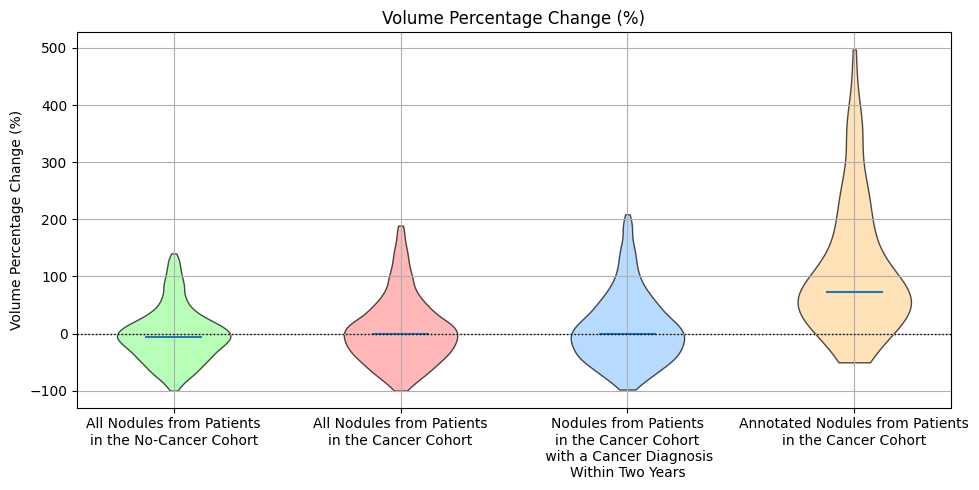

In [10]:
# TODO: draw line at 0
plot(no_cancer2, all_nodules2, cancer2, ann2, title="Volume Percentage Change (%)", y_axis_label="Volume Percentage Change (%)", show_zero_line=True) # all_nodules = cancer cohort; cancer = cancer in two years

### Volume Doubling Time

In [11]:
all_nodules3 = [65.97696554314325, 120.00475669200745, 876.1543806688371, 148.17713854584795, 1187.795812359152, 1558.2973702200954, 362.7021879683318, 522.2510988562144, 117.64910756555501, 351.4893886149955, 5254.826888580945, 387.57713425409713, 292.02146333818865, 664.3351361517884, 5829.129127776867, 8994.39825553939, 433.331752024341, 741.6323280702118, 549.5032966569845, 211.07632780391214, 147.26435859806, 1211.6572767867092, 447.545802835777, 114.52004836346126, 338.19819475249994, 295.7684713001804, 202.04272041690677, 520.2822450115465, 321.8764888740035, 612.1940911175122, 1607.5076502088114, 1446.092673506929, 254.84048090240765, 407.2645350192554, 365.4847061451405, 774.6690415058654, 261.8852499097171, 1854.4656581021452, 145.4293369694403, 2615.066531099079, 2259.8204898669, 64.83522211360165, 266.5564716135826, 2340.4386488622035, 479.6370435084489, 360.4227410191913, 1516.800698199891, 881.7903373010497, 501.5361302657607, 730.7973529625359, 2445.3249576952708, 356.2695745213929, 3744.6837819598713, 1202.8400291969454, 1380.6139678229429, 882.7758828677543, 6620.328250486652, 296.83252223117364, 540.4532894657727, 2562.5620665707033, 836.3043025227306, 367.7031946640372, 5068.739158642842, 1406.5676608132737, 669.0831455153995, 131.6234082092716, 21438.098500662025, 1093.4326768434526, 625.1289671747428, 363.6959180093292, 491.5244027299722, 717.2161780333374, 88.54708739882405, 226.03614147632695, 191.94364737280628, 206.71069444208075, 711.146548498167, 2004.6283537182842, 775.7446100276444, 765.4755500983525, 624.5109229398066, 527.1904664258943, 2208.5912531113663, 1135.7640054324688, 2718.593302686549, 839.8492115905873, 737.7030681628427, 98.06751401838734, 387.60066095160687, 670.7779189975374, 211.41182677364267, 172.25965491693492, 317.7198999062063, 462.19387843569586, 218.16071898178035, 4511.321414306879, 2075.5760469113684, 1916.082496710603, 1837.2041032039285, 177.50676477796844, 205.4718632350387, 15551.28794513443, 664.4243365107112, 1053.649755096237, 586.0926462698521, 108.90547129661249, 293.6108940577068, 154.0176767775266, 1077.9214825321376, 377.07156344532297, 137.52605245000512, 746.5746502545021, 105.27439498885002, 1078.1803644061358, 399.6365847412458, 717.8694505378137, 3625.36522481427, 1551.6153432158412, 2343.6440672817535, 1260.9753521534951, 397.45413150031084, 2724.7825013439237, 334.28727350420854, 922.7341106044764, 442.0317731288426, 694.2720248346135, 4766.886106885466, 155.02266611351914, 1213.9761210065278, 2759.694154332459, 285.0637021554099, 35485.11235898019, 5484.685575429223, 1364.6288877940622, 189.39145965350477, 558.6225649654664, 184.6702349964694, 1357.9915857214678, 427.1227989371646, 2004.9945503973101, 981.3655547583379, 525.2248412353945, 891.51728938023, 7086.335443576989, 131.0766220490123, 240.36701419184678, 156.05216189999237, 1246.482308983264, 543.6489228026345, 211.48669993370748, 640.5083408119779, 5260.629579168961, 721.6418949222833, 4854.5286835751585, 215.04390486868937, 192.6712752270616, 5927.381384744493, 409.57733827408333, 1630.8180723976036, 157.65967358371168, 787.8201361968704, 629.1239797491653, 4713.4812331614785, 196.94961501015428, 220.00789959252833, 1717.777004819888, 236.63088013015278, 279.13401156564055, 2979.3295874781224, 231.07356823900892, 1521.9968834593878, 295.07670083311024, 9115.743223937407, 264.71148720791183, 377.5338006947673, 113.11043548879553, 115.76203977590106, 163.23578701252188, 201.0158651534488, 704.1725830579113, 135.16994624344898, 1557.496798108048, 261.8343414848175, 749.422649006527, 543.4029884243521, 2168.5865344288304, 18530.338015890702, 241.7472280133524, 1056.2366334469918, 390.01013257038886, 239.33473577802118, 242.18574190511364, 349.33493057206005, 5529.643410032811, 2287.590241820055, 607.87693449633, 612.8764229294392, 107.74069536321535, 1103.0735039259876, 712.1050418237318, 359.8290181185806, 2100.9268616731333, 1164.150662277252, 834.0726785471443, 1313.6219075988045, 886.7226688643384, 310.02094956144157, 1667.9108377667176, 756.1333600587706, 528.4946307329749, 1103.5911866513268, 288.55935805489145, 792.4315999425653, 2215.2097481703195, 294.41876756403207, 790.6246429943986, 176.44147629022348, 181.27587493188383, 1505.7835752714302, 993.3805002063343, 1140.4913429964647, 32208.010502025332, 324.2277758251851, 371.13773094618176, 2727.3312092538695, 243.8716678472484, 170.11715066234876, 1611.0145386319364, 484.11946448068613, 4133.381958869285, 972.4645703277871, 376.06875425738457, 657.1223927332122, 352.3776141793941, 598.3289519730091, 473.59244567279285, 91.54564266851145, 3261.441379414829, 562.3613253892831, 3847.5251822921095, 1326.3291555544847, 647.3109730048247, 560.0858766061934, 82.36143406474578, 610.2972477490433, 407.5487101668575, 273.01916396424116, 196.4253495422968, 466.7345350843208, 2661.200631995027, 549.7173313893189, 324.22204323042405, 304.441108810552, 1269.4689843499987, 819.5470249219543, 792.4019710850963, 1537.670339593472, 683.696873615614, 443.7175618281109, 162.6253342051553, 192.74865451050002, 1551.2631263913756, 422.08031348021564, 1830.8372466704673, 869.8855292156222, 1678.8556103331573, 343.2270165750101, 465.50114643096737, 435.509618117353, 1406.8488192566115, 413.9569367909997, 348.90890431051025, 579.877915758143, 423.8537404356559, 632.2676834703185, 1366.5579831909274, 302.7590747959581, 340.9461124003691, 657.2651496738412, 1090.2190882608672, 333.92442504210646, 608.818757547173, 439.3081318815515, 281.46954885449145, 32017.228910805894, 1387.3419275717067, 1920.351746611951, 2048.428786231385, 422.39925381403236, 1848.3899936553723, 4811.146554689436, 1003.1650823094196, 373.72640907819175, 2206.235719825673, 2585.703747882437, 119.14957589864659, 332.506177445365, 2109.176253809621, 7799.326892837578, 918.015462628427, 1819.7386439431318, 367.51669085075446, 3110.9369627337555, 878.9195734951652, 874.6358320307451, 310.26615945983605, 1295.376338085813, 712.8471626207629, 276.73466463258563, 778.5728539917923, 644.0615653608297, 3751.3925880414104, 824.8851063265353, 1219.3980464595786, 287.48874152797435, 207.2244011846394, 30991.02047347285, 527.0924557324237, 872.6665604169827, 38907.060317274816, 2955.738290689274, 1420.303298642916, 720.4886216471758, 835.1886141589691, 4079.2428154630234, 639.0034544898573, 360.0454933885631, 425.5849493196319, 2126.7213732488453, 488.9680983840304, 1169.6775682613552, 1706.0738796369735, 498.75755434637114, 578.6274494835319, 1219.9676000579138, 2139.2878638240613, 398.9792189826057, 278.35646571829704, 94.63031058406561, 1995.1074887183388, 4051.6708116329537, 367.81719504709207, 213.1966652235527, 51725.44232426906, 1094.002955142555, 291.0534286402605, 106.34499770261095, 930.463827275995, 1217.677913549805, 435.2117939327942, 919.2766312504747, 202.94012990952427, 960.9489076020812, 806.4593398141096, 212.03918966935817, 544.6524625832039, 310.0838092394027, 375.47680295372777, 109.7736261081265, 138.44467793176403, 715.9188192544012, 1687.2241341432782, 1717.470336558996, 267.71974254882946, 364.6343634275443, 129.5928874506344, 290.7199182258, 463.5838922296548, 1995.6768553836553, 1251.5377534466757, 768.8960063546403, 329.6210379671361, 253.73553195154227, 513.7995478776302, 482.1711797318352, 304.3909633955371, 674.4659935356456, 1222.7805425593103, 1828.152278336768, 153.37554282942523, 372.3408483969718, 424.2281135555385, 81.9527566348953, 240.8016411784477, 664.2155803372962, 696.5775643580862, 1583.7206481597987, 304.9619436101515, 200.5460910812543, 538.025448125203, 224.75830783175496, 321.82485227967055, 1313.3311238539502, 723.895852933269, 10654.148134331072, 2805.8223949772337, 3891.259042222453, 416.0322803946798, 620.3619866901917, 2018.8835269592907, 550.3879626812405, 202.05040626602818, 221.7579106948116, 155.0915843018878, 1254.6884008472384, 91.84303593730908, 1982.0028587624508, 1699.7575788606382, 1310.317883678134, 772.8692479335639, 1373.1187667614681, 1559.1481674289685, 226.3789318348341, 2896.141059957721, 249.11448116460838, 2183.678126945304, 1084.9881330825954, 284.8684402219521, 305.08587097089736, 408.05389870890446, 264.57543346630524, 885.7212874118657, 146.51349922266377, 812.4021365518256, 2354.309381459977, 5492.532484034542, 1253.2489013100474, 1098.7145046893136, 913.2837746869579, 29400.36207693241, 226.44463334965715, 754.3882894163175, 2593.255275315486, 352.50758661701906, 112.05975765609428, 3566.566383797378, 168.9990431621447, 851.2364645945767, 601.0972581417267, 662.9952611957792, 213.52640484394496, 1273.13360614483, 375.5778011616234, 2183.2872495309, 9870.10136712048, 1676.1652102234511, 363.7463028377067, 3020.6624583284142, 211.9725977213167, 581.9045169815752, 622.0137389077328, 469.51903190497893, 2166.7648300344376, 125.59840435523492, 3987.0384438577157, 216.65757262550667, 3283.989043494982, 2146.3668306274108, 365.69215227140717, 545.2863373311094, 1958.3943920100603, 428.5954563039198, 630.4708702458433, 4149.465309713772, 68.22928879105802, 1211.480936558039, 3939.4422644424235, 279.2803738353115, 195.15422534190944, 1233.9145138276742, 330.0626762458453, 552.5692518273873, 1166.876833173865, 173.03535554756203, 411.6279059554969, 340.5256133667688, 212.00991071719804, 1058.393072092932, 518.5189215382479, 2381.8529541018434, 554.3580852770287, 897.1147085095101, 968.0727540594418, 353.0253002916012, 1102.09633766089, 1237.2121447414384, 6181.335174629819, 163.7951290849648, 849.6522810841781, 212.00579522729623, 122.78103092296278, 229.33501380880313, 192.08039942696473, 449.2676224509692, 44.81633947700928, 222.04947455840193, 1870.9144609247076, 2838.9189992852907, 158.22348253455772, 703.931410961206, 521.1011052827791, 492.376992192114, 298.4152455276291, 659.0014807043103, 267.0813894216582, 984.6071344823736, 1208.8473100736705, 1390.0156547135307, 636.0036221626777, 1012.9477679572972, 2381.0940609335626, 4129.240076512107, 267.3718672985153, 95.52940747690984, 91.48442852896962, 172.03031557936066, 101.99678492218683, 2018911.3365190644, 239.72299724713824, 1370.0256190400128, 233.1892739952223, 1333.4921635519324, 8886.640502122758, 223.77031611466862, 295.999774259098, 477.7802824785579, 6216.353224489028, 596.5331530631205, 2889.4286616213367, 492.6235988804298, 181.07854096956706, 256.37245887149334, 1538.821366476647, 3290.6730804294307, 341.4359757932225, 6174.656857351546, 2061.052681532209, 1190.893707031914, 199.2670939731036, 460.74434515866955, 215.6926148734642, 893.1347627550686, 355.765760728448, 430.69463491829305, 254.67222345369174, 464.8015587975272, 933.5522383240003, 1214.326904028995, 2331.205607294293, 1303.452898370895, 837.2738739179186, 114.8446768494412, 119.79145570435293, 383.68747024628937, 421.9002020007577, 238.82652913908035, 1412.479771062357, 1447.6687655488038, 676.9252600238946, 774.8601672224876, 272.7716192608506, 228.45013928178457, 227.3193036769989, 705.9626981799581, 12792.849684255892, 1241.6065061019983, 178.54191719320542, 332.5106695131593, 1111.016951500339, 1121.9399955919255, 602.7563353512426, 284.86530987826313, 3128.3389917157224, 231.41268445737194, 784.8724718052518, 489.71967003286477, 1097.6646468642682, 1655.597710113571, 324.1766774983443, 668.5321136190154, 419.88529832151204, 3031.8517014196063, 387.3201938282677, 2858.117200940719, 836.9039299392836, 3823.012458152571, 1751.3830355864263, 2420.874936514255, 144.30070995739896, 653.3099247058032, 234.61224625115582, 283.0517394148125, 1828.8929721397706, 5403.058064173943, 478.2066099202414, 471.45284317601875, 415.18235481164345, 54881.549357514145, 325.5600637271746, 227.42467414021476, 458.9855833941666, 438.9170248737822, 829.3479153739748, 310.1148860772431, 4776.5984862413525, 905.1331558433856, 728.0941263585254, 5130.518731775667, 5365.444809151772, 140.43286218436495, 304.867606074492, 320.748338139865, 1059.112646164897, 1472.634825247205, 4560.458154137628, 504.6862951633989, 1019.5736399915367, 1010.6365889122594, 477.3281072425747, 212.56374124318594, 2011.609047436339, 287.1569217579095, 457.5620740564773, 455.7115976462348, 1312.0888140798813, 374.9065808912377, 806.475317025184, 2680.26485388508, 393.0, 367.15612698996745, 309.8849990639744, 773.21147845334, 463.55535302430434, 78.38259306251138, 4125.849690797671, 1968.5513281819765, 1904.1650920701918, 40243.53921881812, 1301.2742323409548, 782.9650539192908, 3142.165039843997, 1675.0395560805089, 2249.8747021551335, 312.2183395624533, 244.37103556994236, 1316.334809888006, 57.39591351000929, 185.25691401445624, 724.1539622633576, 82.56533736044618, 132.51170717046222, 2091.0426314186775, 1764.1323885519264, 626.435396417585, 438.3663550480013, 1022.667299686267, 255.47146002388686, 1165.80424845646, 234.41134823698957, 1457.1184052961348, 2651.0058282989594, 319.14333678131777, 752.4064392931064, 495.29616150327985, 44.237890455941155, 287.39610732874866, 1585.2241269317008, 93.92089006608056, 947.3053089583868, 933.6641653948539, 517.1992641035716, 1723.1508394495831, 394.77486647288555, 2709.0510553886957, 540.8303314507044, 304.3927445709114, 177.54088267620577, 382.0177778023238, 123.54172324547505, 1346.122813850585, 388.2193266465393, 358.535757966391, 633.7588739844821, 22124.93878727154, 867.0778958924129, 87.40184162870618, 643.2435010940371, 700.2851718565757, 324.65340237223637, 418.57129237998817, 274.0551208189484, 176.1855888927713, 225.2080049081606, 351.84409318802085, 573.7844085123102, 2578.699621813838, 416.01845733482617, 308.9617895015463, 1094.152870569274, 458.778396744984, 1165.8000362959615, 766.9345343794702, 814.9513317396852, 374.7066562939826, 520.9821336736067, 2695.9127419637002, 319.68149826993323, 1868.4283411360057, 3486.722825363131, 171.3042077206684, 622.3384347661379, 5765.3981052944255, 2300.6394777025585, 463.74504100307, 971.7988375770408, 16896.660457865204, 1646.3390399149755, 7739.474979982542, 76116.36171241707, 14068.685129620866, 1254.9590912913316, 5055.600270487248, 1147.1285741735496, 377.63210169487587, 4503.262418505392, 10010.442308749833, 11663.02241536474, 314.2357146419858, 242.42242658895674, 198.64230001648687, 778.1936809227669, 286.66841063164566, 823.6783631591487, 533.1804847260466, 255.34164178888142, 73.00535600859358, 237.69072796092954, 190.42599298099591, 806.1876497627775, 210.40381875866453, 3396.0808460185117, 156.8831611266889, 666.021818570201, 325.10851811500186, 863.5251618919838, 1669.035346535385, 2905.760933240354, 2162.8811897704027, 26191.479159046285, 544.5938614376297, 465.74314588706517, 485.0859938956486, 2717.869028476533, 849.1865619778785, 247.4198858156835, 714.3096800338684, 1175.957324560005, 2015.346919506371, 425.6939629304738, 563.8400567351755, 603.8004160423752, 366.2987162252031, 142.55717227320258, 92.360431389077, 6722.469820939831, 523.16021545883, 225.7482779639083, 328.9467809022126, 57272.1461944555, 339.2936256503377, 392.6843830613367, 10928.828608871427, 22043.5223600845, 119.08235483707813, 610.3174981347041, 653.8866020205122, 1617.129498211919, 354.35009928097026, 1383.0857236757083, 23471.119123189404, 1098.8922818385756, 1648.8300015517289, 3204.727225685403, 165.20896455598955, 1128.162348363879, 417.8388278078978, 483.2009485369004, 1095.2915989848932, 582.3877720052805, 549.0398986873727, 164.9652077797888, 720.3457496502674, 11348559.631411813, 546.1758613781384, 354.4571702644984, 2164.9973993415433, 668.6451006998218, 103.24868262040454, 717.6487225901776, 1502.3345953372639, 914.903799290171, 725.1363658386643, 6113.961475064089, 1601.8171584843456, 656.1221087878846, 2419.414686201801, 12756.309296408255, 887.0715120256677, 250.65901928098816, 524.5348921826165, 159.8621892368148, 2623.5747412521528, 908.9722981531667, 4994.124954820811, 2100.0602742635365, 6360.912725349847, 1680.112832598494, 769.7933230035911, 32130.73537590614, 177.5669491237104, 1870.5318529301487, 146.75405616211157, 370.15883685407346, 176.0119203266915, 1552.6242486720134, 896.2165868694852, 1180.3889292021295, 274.717711204583, 190.46663189423285, 826.4218832047197, 1691.2282982356442, 58830.21202352349, 148.0570254365201, 669.4569198424576, 656.4732708074196, 111.30728003250177, 1059.4359111318074, 417.9085393331651, 94.17165713916094, 1436.8364630096323, 169.76945539434618, 138.81321446741805, 329.0220232744768, 1461.6014278979405, 303.7522287904571, 206.76827141128277, 910.536733628018, 235.48576013232287, 483.7769078559524, 359.4640965328999, 796.9909905262743, 424.94253581238746, 163.8648811760258, 132.7796925434776, 280.45817894339604, 215.61602530619592, 1196.4758156425619, 907.1685852621665, 626.9677120335377, 714.1271487961799, 783.6148442459004, 863.7045429119426, 326.9048535986121, 2081.426438906683, 141.4312804729353, 271.7917323060952, 13796.844832528888, 310.63819343851503, 4846.0472268711765, 983.0966145866687, 966.8272638418015, 128.608156204044, 2524.299763541092, 404.0087347038987, 1104.8477800177056, 3276.2240700343477, 2372.40316664922, 860.474379078738, 782.1946100379848, 91.08036319834444, 211.65868309440222, 737.1791854643731, 1101.1047149358692, 1710.9423138610916, 5184.253521031308, 773.0292040842767, 298.8032509574581, 157.095588390483, 1583.4556530071384, 153.47873138426513, 183.6900559052332, 284.26012844600274, 586.2413699130398, 2920.5931506893044, 163.86233233648932, 739.6671005329877, 528.035684141794, 791.7564505401074, 714.0796204837116, 121.76456336485346, 367.0046801901253, 345.03603130622565, 1909.0736338552622, 5628.641091251985, 1014.6375001365025, 729.4538337927149, 1087.922865143045, 540.0554004838629, 386.3346656536081, 647.3003915495156, 610.885146942887, 440.46037056190175, 417.6449029554619, 1482.253047581661, 161.6174351869523, 2434.160987215415, 1807.0476047161233, 1939.8335747319213, 319.3392843808131, 5299.2311483431695, 471.5141569916998, 2068.9248797058763, 2093.452108827861, 917.9893399078728, 951.7397353030391, 570.9429919045318, 1693.6649173303642, 550.2515297837276, 2138.0020919778863, 592.2596874228461, 404.35418173560436, 5049.603843056821, 241.7383619300813, 281.5499770537954, 1069.3221856671228, 697.2421935055772, 2671.1592004536737, 245.40338527643624, 1158.5111228560627, 132.64112267025948, 240.3934096957787, 2453.673837605891, 423.05701937518205, 387.264313225931, 1829.8610184133825, 178.47390712859738, 1772.2278093540453, 546.0750499077066, 643.2504751334496, 422.8342748757151, 490.28275422543817, 2627.654052525829, 648.2726291958548, 605.4933072170547, 18544.173604429292, 221.31658472340982, 7045.588597855676, 168292.2187341198, 1645.995157390682, 448.41523534385203, 3237.121938949162, 379.0682651562654, 796.0643882257716, 1208.912127643553, 461.18589239010527, 1279.7206192980987, 66.01063652985599, 1675.5877538450122, 64.59654821175955, 289.0474353146529, 1177.68107505967, 1401.7191366042182, 865.1790249748005, 40104.27412003159, 3110.413568179711, 4346.2683394038, 4433.794361319318, 845.6276440070195, 2103.0442111559305, 351.6675849520678, 215.70332919730828, 340.99267919011544, 654.441288802401, 184.64720814364307, 1168.0740313748668, 444.020377207335, 723.2970303986255, 3848.7168242284874, 1158.165232549703, 430.72146639551954, 443.4689174257165, 459.59559752564525, 1003.4444769690118, 580.8152671362768, 359.1146338344468, 4284.663161986148, 791.8494636968029, 272.80565315024035, 1945.7580488465333, 1747.553308743934, 730.172803822397, 170.66019040111422, 380.47475554921664, 805.0497306576506, 202.69320516201105, 522.9824927069853, 629.1228904081369, 6527.858400174023, 317.7738343209877, 4104.041914249501, 576.815756320801, 1023.9259061480952, 1879.9826413258754, 3457.9680029180363, 144.42947506964254, 1362.9315433796078, 695.7634374049986, 11306.465414778617, 499.83531074859934, 252.5713691465675, 338.4683393018881, 174.84988465873178, 139.48566376622827, 800.6235322254723, 194.7135806606416, 86.00921706692526, 498.5384218333527, 1541.3029926131733, 88.1998345882388, 146.46652158009573, 147.71554079762544, 181.98372495211694, 732.3395663879845, 478.66478532447246, 819.693564634421, 445.89588257440937, 318.8405365670879, 246.56369379719447, 3235.132826944733, 633.543123512941, 124.88039380584479, 123.0622445433231, 81.52171394955081, 371.42503341464385, 1404.1537740515703, 228.80202452732345, 339.0861548215859, 900.346833537483, 2916.95915611879, 4867.412737652857, 195.04775775842808, 1657.4282882081122, 777.7806720250107, 1143.3670007475876, 265.1987727153954, 266.5452310006314, 1522.5559170491827, 187.68714548222934, 337.9686949356775, 682.8918131678856, 196.59391711505646, 172.63203573418784, 408.26428432739385, 514.8424568955792, 617.3224097284947, 145.3292379449841, 1064.8941776274871, 259.7150975897605, 671.5225150761769, 391.3769879910556, 651.4291562446776, 367.6544684182447, 107.0548704192482, 1337.0499754185528, 329.5548942822196, 5211.839127979729, 1966.3947593518237, 1209.5936753771616, 254.46937609526216, 5239.100796213074, 3891.2445165881327, 1678.825788163868, 6087.268249260813, 1784.305588867464, 491.19066571747067, 1642.431054561757, 773.4302484758122, 526.7335617563167, 586.5034464252436, 219.60710016109098, 183.37797397577785, 492.0536295868432, 4935.422405199554, 697.2369268598012, 911.4373407706132, 125.46065069061046, 4642.095309922492, 2748.4397201473744, 205.2235094245652, 1643.1647455565142, 4674.51727098986, 963.8774957628164, 283.1605363699783, 217.95261307008784, 950.1273207580343, 319.72965706594397, 2848.2971997049385, 822.3708097441503, 137.3795283235308, 501.5007101394831, 252.80735808265734, 1317.7540652508246, 1212.2101874704738, 3987.741055582352, 511.6262626565404, 305.01230602018217, 2069.51740153007, 6411.545501723791, 491.89298033905794, 20483.96138013751, 1601.87181826696, 269.58119587706693, 1906.5217032271812, 285.8261452671156, 123.11464253292428, 1317.028793746317, 9436.330395323434, 21427.219908001054, 3007.233498402552, 10175.936768766873, 1971.1246383930454, 370.6255010179987, 1930.2489896832521, 550.336115820234, 6604.484976633908, 412.80628746704963, 185.35429022704355, 556.0356709702646, 1549.2737455559345, 91.36312364768281, 271.3980003051018, 3378.840381767675, 273.4167793472598, 414.383722040298, 233.7361685611833, 170.51619141294984, 225.0992110952236, 1581.3192330442812, 771.6630469078328, 761.6839448530073, 599.4707908713506, 324.3925533288901, 8115.546793141288, 380.05410066541293, 643.9491176366129, 850.9980696051717, 409.58874806322285, 1428.0278371222762, 965.4306943970793, 371.7714518668751, 9122.927642794237, 971.5056440229932, 349.15092127518415, 1168.546176758542, 421.2027585729505, 1028.5440320527105, 257.6877661967527, 18792.210540397336, 214.7362494352035, 2100.3389996240157, 1949.067741941321, 2831.346090460104, 456.4405581459189, 809.738128268207, 99.40487389276059, 716.1824641349427, 116.91415445034072, 1747.8024463482366, 727.368272269897, 287.4273625357112, 271.48893844676905, 162.01007790986787, 240.43170345271932, 4185.3954258447075, 324.6458857703002, 182.99995323768064, 147.01441296206326, 482.1411194806488, 31312.225853302265, 995.8103023806607, 494.5946594166607, 386.04939884240434, 180.0537997318875, 202.22635808091252, 9299.149504607101, 947.5625858890437, 733.4548141902287, 190.24837359332614, 579.9764794000754, 7149.6297009434875, 471.23288383836945, 434.8217502873348, 1242.2014224429809, 1821.307629835056, 497.05232102399845, 354.24221999374504, 517.700444657055, 1148.2796033124262, 237.74670033889205, 185.2289627991516, 361.5486591803886, 786.5314010594252, 541.6815929345046, 2369.089845352429, 1059.9253454439156, 599.6265143181554, 314.517851903538, 106.70556447635181, 382.50052947191256, 620.8169923202131, 1927.107260666281, 1315.2584609433245, 299.0236410252124, 1265.8762061910256, 1252.82396754021, 157.9660499227802, 415.0253317640561, 216.03229210052933, 306.9811276565218, 208.74810429477515, 357.6824899602419, 415.74813481078723, 133.82441395583083, 10186.427293601813, 60.82521049448503, 1790.5051603431402, 2447.5209191253452, 1381.2819023994143, 590.740947404826, 1282.0645158512725, 1297.2270431522927, 1467.2912427112071, 951.5016429904028, 256.59872791414284, 1307.4644718024192, 343.67976162756383, 485.90746895567145, 9371.310007320148, 32601.266685708375, 401.2728650186207, 4867.01393074172, 727.5232551237733, 7549.946113669129, 270.0032183191218, 213.5675581373118, 149.9686808468639, 233.44446272262994, 273.5649367277468, 2446.165780115363, 4370.421916347649, 3925.813181644835, 1010.2970384985603, 1491.2184141657206, 665.7389065097988, 3585.2399315396915, 603.9577041445605, 307.28223177992203, 2845.685003192737, 1259.2551942256118, 228.06340453554054, 174.1239754577385, 787.6869069349297, 627.7187193651903, 4293.72436128456, 531.4216037695242, 407.16102746410075, 654.2677587052759, 488.1654758460846, 2673.609693897895, 1496.4815824244336, 437.5012022482111, 712.5016137641053, 793.5969300249819, 829.8141575717209, 125.79718862110096, 953.5157279118539, 307.78946060231954, 765.3871694260423, 323.8280063690104, 883.5244106055513, 1114.7858792442291, 496.11415407166425, 323.1042520626377, 771.6399284614107, 230.07640927257816, 1156.4564648593787, 351.84297467955327, 452.299166831811, 586.4554751943125, 360.7276935476663, 389.8120787653876, 3222.6778568927252, 3426.974542637528, 480.1287992631197, 513.2189451104913, 17432.36544127459, 666.4583964232916, 2015.3215100879677, 220.11669488992305, 517.0040665280901, 11455.545109020833, 349.93176824963007, 5484.214084766908, 2302.097391666235, 2082.550856790714, 1038.197257817287, 606.4868886040014, 26778.6854057599, 617.3938841012039, 332.5443745827674, 1018.4138918459163, 638.7479442848015, 267.5044195387283, 236.38793998785823, 959.9947810590813, 979.6875343230214, 361.17292765144094, 320.41806017689515, 1249.170253813088, 741.463843998824, 828.8407688407041, 8599.129927338543, 45464.32762326409, 76.17598801722589, 77.17255732497891, 676.724809763838]
cancer3 = [65.97696554314325, 120.00475669200745, 362.7021879683318, 522.2510988562144, 117.64910756555501, 351.4893886149955, 5254.826888580945, 387.57713425409713, 292.02146333818865, 664.3351361517884, 447.545802835777, 114.52004836346126, 338.19819475249994, 295.7684713001804, 202.04272041690677, 520.2822450115465, 321.8764888740035, 612.1940911175122, 1607.5076502088114, 1446.092673506929, 479.6370435084489, 360.4227410191913, 1202.8400291969454, 1380.6139678229429, 882.7758828677543, 6620.328250486652, 296.83252223117364, 367.7031946640372, 5068.739158642842, 1406.5676608132737, 669.0831455153995, 131.6234082092716, 21438.098500662025, 1093.4326768434526, 625.1289671747428, 2004.6283537182842, 775.7446100276444, 765.4755500983525, 624.5109229398066, 527.1904664258943, 387.60066095160687, 670.7779189975374, 211.41182677364267, 172.25965491693492, 15551.28794513443, 586.0926462698521, 108.90547129661249, 293.6108940577068, 154.0176767775266, 1077.9214825321376, 377.07156344532297, 137.52605245000512, 746.5746502545021, 105.27439498885002, 3625.36522481427, 1260.9753521534951, 397.45413150031084, 2724.7825013439237, 334.28727350420854, 922.7341106044764, 442.0317731288426, 694.2720248346135, 4766.886106885466, 155.02266611351914, 1213.9761210065278, 2759.694154332459, 285.0637021554099, 35485.11235898019, 5484.685575429223, 1364.6288877940622, 189.39145965350477, 525.2248412353945, 211.48669993370748, 640.5083408119779, 5260.629579168961, 721.6418949222833, 4854.5286835751585, 5927.381384744493, 409.57733827408333, 1630.8180723976036, 279.13401156564055, 2979.3295874781224, 231.07356823900892, 1521.9968834593878, 295.07670083311024, 9115.743223937407, 264.71148720791183, 377.5338006947673, 115.76203977590106, 163.23578701252188, 201.0158651534488, 704.1725830579113, 135.16994624344898, 261.8343414848175, 749.422649006527, 543.4029884243521, 2168.5865344288304, 18530.338015890702, 241.7472280133524, 1056.2366334469918, 390.01013257038886, 239.33473577802118, 242.18574190511364, 349.33493057206005, 5529.643410032811, 2287.590241820055, 607.87693449633, 612.8764229294392, 107.74069536321535, 1103.0735039259876, 712.1050418237318, 359.8290181185806, 2100.9268616731333, 1164.150662277252, 834.0726785471443, 1313.6219075988045, 886.7226688643384, 310.02094956144157, 1667.9108377667176, 756.1333600587706, 288.55935805489145, 792.4315999425653, 2215.2097481703195, 294.41876756403207, 790.6246429943986, 176.44147629022348, 181.27587493188383, 1505.7835752714302, 993.3805002063343, 1140.4913429964647, 484.11946448068613, 4133.381958869285, 473.59244567279285, 91.54564266851145, 3261.441379414829, 562.3613253892831, 3847.5251822921095, 1326.3291555544847, 647.3109730048247, 560.0858766061934, 466.7345350843208, 2661.200631995027, 549.7173313893189, 324.22204323042405, 1406.8488192566115, 413.9569367909997, 348.90890431051025, 579.877915758143, 423.8537404356559, 632.2676834703185, 1366.5579831909274, 302.7590747959581, 340.9461124003691, 657.2651496738412, 1090.2190882608672, 333.92442504210646, 608.818757547173, 439.3081318815515, 281.46954885449145, 32017.228910805894, 1387.3419275717067, 1920.351746611951, 2048.428786231385, 422.39925381403236, 1848.3899936553723, 4811.146554689436, 332.506177445365, 778.5728539917923, 644.0615653608297, 3751.3925880414104, 824.8851063265353, 425.5849493196319, 2126.7213732488453, 488.9680983840304, 1169.6775682613552, 1706.0738796369735, 498.75755434637114, 578.6274494835319, 213.1966652235527, 51725.44232426906, 1094.002955142555, 291.0534286402605, 106.34499770261095, 930.463827275995, 1217.677913549805, 435.2117939327942, 919.2766312504747, 202.94012990952427, 960.9489076020812, 806.4593398141096, 212.03918966935817, 544.6524625832039, 310.0838092394027, 375.47680295372777, 109.7736261081265, 138.44467793176403, 715.9188192544012, 1687.2241341432782, 1717.470336558996, 267.71974254882946, 364.6343634275443, 129.5928874506344, 290.7199182258, 463.5838922296548, 81.9527566348953, 240.8016411784477, 664.2155803372962, 696.5775643580862, 1583.7206481597987, 304.9619436101515, 200.5460910812543, 538.025448125203, 224.75830783175496, 321.82485227967055, 1313.3311238539502, 723.895852933269, 10654.148134331072, 2805.8223949772337, 416.0322803946798, 620.3619866901917, 2018.8835269592907, 550.3879626812405, 202.05040626602818, 221.7579106948116, 155.0915843018878, 1254.6884008472384, 91.84303593730908, 1559.1481674289685, 226.3789318348341, 2896.141059957721, 812.4021365518256, 2354.309381459977, 352.50758661701906, 112.05975765609428, 3566.566383797378, 168.9990431621447, 851.2364645945767, 601.0972581417267, 662.9952611957792, 213.52640484394496, 1273.13360614483, 375.5778011616234, 581.9045169815752, 622.0137389077328, 428.5954563039198, 630.4708702458433, 4149.465309713772, 68.22928879105802, 1211.480936558039, 3939.4422644424235, 279.2803738353115, 195.15422534190944, 1233.9145138276742, 1166.876833173865, 173.03535554756203, 411.6279059554969, 340.5256133667688, 212.00991071719804, 1058.393072092932, 518.5189215382479, 2381.8529541018434, 554.3580852770287, 897.1147085095101, 968.0727540594418, 122.78103092296278, 229.33501380880313, 192.08039942696473, 449.2676224509692, 44.81633947700928, 492.376992192114, 298.4152455276291, 267.0813894216582, 984.6071344823736, 267.3718672985153, 95.52940747690984, 91.48442852896962, 172.03031557936066, 101.99678492218683, 2018911.3365190644, 239.72299724713824, 8886.640502122758, 223.77031611466862, 295.999774259098, 477.7802824785579, 6216.353224489028, 596.5331530631205, 2889.4286616213367, 492.6235988804298, 181.07854096956706, 256.37245887149334, 1538.821366476647, 2061.052681532209, 1190.893707031914, 199.2670939731036, 460.74434515866955, 355.765760728448, 254.67222345369174, 464.8015587975272, 933.5522383240003, 238.82652913908035, 1412.479771062357, 1447.6687655488038, 676.9252600238946, 774.8601672224876, 272.7716192608506, 228.45013928178457, 227.3193036769989, 705.9626981799581, 12792.849684255892, 1241.6065061019983, 178.54191719320542, 332.5106695131593, 1111.016951500339, 1121.9399955919255, 784.8724718052518, 489.71967003286477, 1097.6646468642682, 1655.597710113571, 324.1766774983443, 668.5321136190154, 419.88529832151204, 653.3099247058032, 234.61224625115582, 283.0517394148125, 1828.8929721397706, 5403.058064173943, 478.2066099202414, 471.45284317601875, 415.18235481164345, 54881.549357514145, 325.5600637271746, 227.42467414021476, 458.9855833941666, 140.43286218436495, 304.867606074492, 320.748338139865, 1059.112646164897, 1472.634825247205, 4560.458154137628, 504.6862951633989, 1019.5736399915367, 1010.6365889122594, 477.3281072425747, 212.56374124318594, 2011.609047436339, 287.1569217579095, 457.5620740564773, 455.7115976462348, 1312.0888140798813, 374.9065808912377, 806.475317025184, 4125.849690797671, 1968.5513281819765, 1904.1650920701918, 40243.53921881812, 1301.2742323409548, 782.9650539192908, 3142.165039843997, 1675.0395560805089, 2249.8747021551335, 312.2183395624533, 244.37103556994236, 1316.334809888006, 57.39591351000929, 185.25691401445624, 724.1539622633576, 132.51170717046222, 2091.0426314186775, 1764.1323885519264, 626.435396417585, 438.3663550480013, 1022.667299686267, 255.47146002388686, 1165.80424845646, 234.41134823698957, 1457.1184052961348, 2651.0058282989594, 319.14333678131777, 752.4064392931064, 495.29616150327985, 44.237890455941155, 93.92089006608056, 947.3053089583868, 933.6641653948539, 517.1992641035716, 1723.1508394495831, 394.77486647288555, 2709.0510553886957, 540.8303314507044, 304.3927445709114, 177.54088267620577, 382.0177778023238, 123.54172324547505, 1346.122813850585, 388.2193266465393, 358.535757966391, 633.7588739844821, 22124.93878727154, 867.0778958924129, 87.40184162870618, 176.1855888927713, 171.3042077206684, 622.3384347661379, 5765.3981052944255, 2300.6394777025585, 463.74504100307, 971.7988375770408, 16896.660457865204, 1646.3390399149755, 7739.474979982542, 190.42599298099591, 806.1876497627775, 666.021818570201, 325.10851811500186, 863.5251618919838, 1669.035346535385, 2905.760933240354, 2162.8811897704027, 26191.479159046285, 544.5938614376297, 465.74314588706517, 485.0859938956486, 2717.869028476533, 849.1865619778785, 247.4198858156835, 714.3096800338684, 425.6939629304738, 563.8400567351755, 610.3174981347041, 653.8866020205122, 1617.129498211919, 354.35009928097026, 1383.0857236757083, 483.2009485369004, 1095.2915989848932, 582.3877720052805, 549.0398986873727, 164.9652077797888, 720.3457496502674, 11348559.631411813, 546.1758613781384, 354.4571702644984, 2164.9973993415433, 668.6451006998218, 103.24868262040454, 717.6487225901776, 1502.3345953372639, 914.903799290171, 725.1363658386643, 908.9722981531667, 4994.124954820811, 2100.0602742635365, 6360.912725349847, 1680.112832598494, 769.7933230035911, 274.717711204583, 190.46663189423285, 58830.21202352349, 148.0570254365201, 417.9085393331651, 169.76945539434618, 132.7796925434776, 280.45817894339604, 215.61602530619592, 1196.4758156425619, 907.1685852621665, 626.9677120335377, 714.1271487961799, 271.7917323060952, 13796.844832528888, 310.63819343851503, 4846.0472268711765, 983.0966145866687, 860.474379078738, 782.1946100379848, 91.08036319834444, 211.65868309440222, 737.1791854643731, 1101.1047149358692, 1710.9423138610916, 5184.253521031308, 773.0292040842767, 183.6900559052332, 284.26012844600274, 586.2413699130398, 2920.5931506893044, 163.86233233648932, 739.6671005329877, 528.035684141794, 791.7564505401074, 714.0796204837116, 121.76456336485346, 367.0046801901253, 345.03603130622565, 1909.0736338552622, 5628.641091251985, 1014.6375001365025, 729.4538337927149, 440.46037056190175, 417.6449029554619, 1482.253047581661, 161.6174351869523, 2434.160987215415, 1807.0476047161233, 1939.8335747319213, 319.3392843808131, 5299.2311483431695, 570.9429919045318, 1693.6649173303642, 550.2515297837276, 2138.0020919778863, 592.2596874228461, 404.35418173560436, 5049.603843056821, 241.7383619300813, 281.5499770537954, 1069.3221856671228, 697.2421935055772, 2671.1592004536737, 245.40338527643624, 1158.5111228560627, 132.64112267025948, 240.3934096957787, 2453.673837605891, 423.05701937518205, 387.264313225931, 1829.8610184133825, 178.47390712859738, 1772.2278093540453, 546.0750499077066, 643.2504751334496, 422.8342748757151, 490.28275422543817, 2627.654052525829, 648.2726291958548, 605.4933072170547, 18544.173604429292, 379.0682651562654, 796.0643882257716, 1208.912127643553, 461.18589239010527, 1279.7206192980987, 66.01063652985599, 1675.5877538450122, 64.59654821175955, 289.0474353146529, 1177.68107505967, 1401.7191366042182, 654.441288802401, 184.64720814364307, 1168.0740313748668, 444.020377207335, 723.2970303986255, 3848.7168242284874, 1158.165232549703, 459.59559752564525, 1003.4444769690118, 580.8152671362768, 359.1146338344468, 4284.663161986148, 791.8494636968029, 272.80565315024035, 1945.7580488465333, 1747.553308743934, 730.172803822397, 170.66019040111422, 380.47475554921664, 805.0497306576506, 629.1228904081369, 6527.858400174023, 317.7738343209877, 144.42947506964254, 1362.9315433796078, 338.4683393018881, 174.84988465873178, 139.48566376622827, 498.5384218333527, 1541.3029926131733, 147.71554079762544, 181.98372495211694, 732.3395663879845, 478.66478532447246, 819.693564634421, 445.89588257440937, 318.8405365670879, 246.56369379719447, 3235.132826944733, 633.543123512941, 124.88039380584479, 123.0622445433231, 81.52171394955081, 371.42503341464385, 1404.1537740515703, 228.80202452732345, 339.0861548215859, 900.346833537483, 2916.95915611879, 4867.412737652857, 195.04775775842808, 1657.4282882081122, 777.7806720250107, 1143.3670007475876, 265.1987727153954, 266.5452310006314, 1522.5559170491827, 187.68714548222934, 337.9686949356775, 682.8918131678856, 196.59391711505646, 172.63203573418784, 408.26428432739385, 514.8424568955792, 617.3224097284947, 145.3292379449841, 1064.8941776274871, 259.7150975897605, 671.5225150761769, 391.3769879910556, 651.4291562446776, 367.6544684182447, 107.0548704192482, 586.5034464252436, 219.60710016109098, 183.37797397577785, 492.0536295868432, 283.1605363699783, 217.95261307008784, 950.1273207580343, 319.72965706594397, 2848.2971997049385, 822.3708097441503, 137.3795283235308, 501.5007101394831, 252.80735808265734, 1317.7540652508246, 1212.2101874704738, 3987.741055582352, 511.6262626565404, 305.01230602018217, 2069.51740153007, 6411.545501723791, 491.89298033905794, 20483.96138013751, 1601.87181826696, 269.58119587706693, 1906.5217032271812, 285.8261452671156, 370.6255010179987, 1930.2489896832521, 550.336115820234, 6604.484976633908, 412.80628746704963, 185.35429022704355, 556.0356709702646, 1549.2737455559345, 271.3980003051018, 3378.840381767675, 273.4167793472598, 233.7361685611833, 170.51619141294984, 225.0992110952236, 1581.3192330442812, 771.6630469078328, 761.6839448530073, 599.4707908713506, 324.3925533288901, 8115.546793141288, 380.05410066541293, 643.9491176366129, 371.7714518668751, 18792.210540397336, 214.7362494352035, 2100.3389996240157, 1949.067741941321, 2831.346090460104, 456.4405581459189, 809.738128268207, 99.40487389276059, 716.1824641349427, 116.91415445034072, 1747.8024463482366, 727.368272269897, 287.4273625357112, 271.48893844676905, 162.01007790986787, 240.43170345271932, 4185.3954258447075, 324.6458857703002, 147.01441296206326, 482.1411194806488, 31312.225853302265, 995.8103023806607, 494.5946594166607, 386.04939884240434, 180.0537997318875, 202.22635808091252, 9299.149504607101, 579.9764794000754, 7149.6297009434875, 471.23288383836945, 434.8217502873348, 1242.2014224429809, 1821.307629835056, 497.05232102399845, 237.74670033889205, 185.2289627991516, 361.5486591803886, 786.5314010594252, 541.6815929345046, 106.70556447635181, 382.50052947191256, 620.8169923202131, 1927.107260666281, 1315.2584609433245, 299.0236410252124, 1265.8762061910256, 1252.82396754021, 157.9660499227802, 415.0253317640561, 208.74810429477515, 357.6824899602419, 415.74813481078723, 133.82441395583083, 10186.427293601813, 60.82521049448503, 1790.5051603431402, 2447.5209191253452, 1381.2819023994143, 590.740947404826, 1282.0645158512725, 1297.2270431522927, 1467.2912427112071, 951.5016429904028, 485.90746895567145, 9371.310007320148, 32601.266685708375, 401.2728650186207, 4867.01393074172, 727.5232551237733, 7549.946113669129, 270.0032183191218, 213.5675581373118, 149.9686808468639, 233.44446272262994, 273.5649367277468, 2446.165780115363, 4370.421916347649, 3925.813181644835, 1010.2970384985603, 1491.2184141657206, 665.7389065097988, 3585.2399315396915, 603.9577041445605, 228.06340453554054, 174.1239754577385, 787.6869069349297, 627.7187193651903, 4293.72436128456, 531.4216037695242, 407.16102746410075, 654.2677587052759, 488.1654758460846, 2673.609693897895, 1496.4815824244336, 437.5012022482111, 712.5016137641053, 125.79718862110096, 953.5157279118539, 307.78946060231954, 765.3871694260423, 323.8280063690104, 883.5244106055513, 360.7276935476663, 389.8120787653876, 666.4583964232916, 2015.3215100879677, 220.11669488992305, 517.0040665280901, 1038.197257817287, 1018.4138918459163, 638.7479442848015, 267.5044195387283, 236.38793998785823, 959.9947810590813, 979.6875343230214, 361.17292765144094, 77.17255732497891, 676.724809763838]
ann3 = [65.97696554314325, 295.7684713001804, 202.04272041690677, 520.2822450115465, 321.8764888740035, 624.5109229398066, 527.1904664258943, 670.7779189975374, 15551.28794513443, 154.0176767775266, 105.27439498885002, 397.45413150031084, 694.2720248346135, 525.2248412353945, 211.48669993370748, 1630.8180723976036, 1521.9968834593878, 295.07670083311024, 115.76203977590106, 543.4029884243521, 241.7472280133524, 239.33473577802118, 2287.590241820055, 1103.0735039259876, 712.1050418237318, 288.55935805489145, 176.44147629022348, 484.11946448068613, 91.54564266851145, 562.3613253892831, 2661.200631995027, 302.7590747959581, 340.9461124003691, 332.506177445365, 488.9680983840304, 213.1966652235527, 1094.002955142555, 1217.677913549805, 364.6343634275443, 129.5928874506344, 81.9527566348953, 538.025448125203, 224.75830783175496, 416.0322803946798, 221.7579106948116, 155.0915843018878, 91.84303593730908, 1559.1481674289685, 112.05975765609428, 213.52640484394496, 1273.13360614483, 375.5778011616234, 581.9045169815752, 428.5954563039198, 630.4708702458433, 279.2803738353115, 195.15422534190944, 340.5256133667688, 212.00991071719804, 554.3580852770287, 122.78103092296278, 229.33501380880313, 44.81633947700928, 298.4152455276291, 295.999774259098, 492.6235988804298, 256.37245887149334, 199.2670939731036, 460.74434515866955, 1097.6646468642682, 668.5321136190154, 54881.549357514145, 325.5600637271746, 304.867606074492, 455.7115976462348, 438.3663550480013, 1022.667299686267, 44.237890455941155, 123.54172324547505, 87.40184162870618, 176.1855888927713, 171.3042077206684, 1617.129498211919, 354.35009928097026, 354.4571702644984, 908.9722981531667, 190.46663189423285, 417.9085393331651, 280.45817894339604, 714.1271487961799, 271.7917323060952, 284.26012844600274, 791.7564505401074, 714.0796204837116, 440.46037056190175, 417.6449029554619, 643.2504751334496, 422.8342748757151, 648.2726291958548, 605.4933072170547, 66.01063652985599, 64.59654821175955, 184.64720814364307, 1003.4444769690118, 580.8152671362768, 730.172803822397, 170.66019040111422, 6527.858400174023, 144.42947506964254, 732.3395663879845, 633.543123512941, 124.88039380584479, 81.52171394955081, 339.0861548215859, 408.26428432739385, 145.3292379449841, 671.5225150761769, 391.3769879910556, 219.60710016109098, 183.37797397577785, 252.80735808265734, 285.8261452671156, 185.35429022704355, 556.0356709702646, 3378.840381767675, 170.51619141294984, 225.0992110952236, 214.7362494352035, 99.40487389276059, 116.91415445034072, 386.04939884240434, 180.0537997318875, 471.23288383836945, 434.8217502873348, 497.05232102399845, 786.5314010594252, 541.6815929345046, 620.8169923202131, 1381.2819023994143, 9371.310007320148, 32601.266685708375, 401.2728650186207, 213.5675581373118, 627.7187193651903, 4293.72436128456, 488.1654758460846, 220.11669488992305, 517.0040665280901, 267.5044195387283, 236.38793998785823]
no_cancer3 = [1431.403827235667, 5367.459347751544, 372.35880367128215, 1539.5618320110386, 102.89171749885438, 937.0497939039881, 3890.723338179402, 485.9887877588329, 437.52918547393483, 269.2647188646522, 1015.6135309352742, 22739.01075673767, 1627.0818284133766, 3615.3904905976565, 552.9561799364282, 1916.992277697031, 8066.721654150581, 1220.7202585038997, 6494.624372686819, 1924.9393530563727, 11224.919005860358, 74.03951402642984, 406.0364227066013, 1340.343992370759, 1196.9599631084052, 4400.014962979223, 270.5757996297813, 1261.9038083517642, 214.27414008820838, 1123.5413631956528, 5230.781494362977, 320.1159170644807, 468.8233762017715, 794.0451181378469, 2343.2768016091163, 688.8192602971022, 351.26863113074785, 222.88107236622298, 125.95363022951243, 1272.5727281953318, 1693.940538403811, 164.24582140910877, 11971.195569495034, 3414.8232408067624, 327.0, 374.1340376672547, 296.7052380009201, 2098.400953597732, 18390.74784619332, 3313.3946448032975, 4506.967862439885, 1567.7053681262528, 1664.920999322926, 1556.6870199327561, 2594.7284681317, 59.371281496977595, 129.7372266121879, 556.691995428204, 1410.1990056649574, 279.78205194728685, 2132.1106055449823, 1902.9694179844712, 324.3474993433019, 625.6351535299999, 2136.9616953090367, 5079.944419782114, 344.97218920296615, 185.88236585646774, 288.21472395025216, 1435.3474405474105, 2693.486536168517, 14894.467848137298, 262.3028628848786, 198.82549431074736, 1546.8153003270604, 324.491263218012, 1578.4796903203357, 1541.4438359275955, 14129.546839280465, 1209.35422250886, 1657.4889052610727, 811.3230530480687, 156.28302800070816, 162.73676209521577, 496.0, 2790.389823437942, 338.4120957079517, 1070.815446249419, 256.7861641724286, 488.18450170093087, 181.4733118963848, 299.94091627944607, 747.9432394211141, 356.84460808622094, 382.88459171677874, 603.751618664437, 214.95807539615626, 709.6801048233943, 1468.3119551761824, 619.1969010934301, 881.1399447175351, 520.3113043975868, 811.0890465198613, 258.5117706650324, 1129.7170125852251, 16388.438244251247, 2559.032018784984, 1711.6743967323364, 7751.769584255919, 34267.05990432299, 478.7198284035346, 368.66362806511165, 1338.8812691836924, 17347.259368081384, 10057.752171719381, 264.4232774748775, 1252.333629318845, 251.320349798399, 15304.132360320633, 314.74100181428736, 2973.2663673733323, 721.536342964764, 4694.596650731048, 44951.681893673434, 751.051055201322, 1423.8736846932586, 14300.991065621682, 676.1812480951919, 233.35767741644057, 1077.118503459369, 128.55524079212483, 1385.1552876355665, 1115.1264723554934, 4478.825300054409, 1689.820540055422, 687.259058045902, 1107.2822787763487, 2791.167896921259, 2052.5898054357012, 3062.437986280154, 772.7927143840373, 1076.206814548623, 121.42982408132401, 530.603346692903, 569.8048531893544, 275.87649393014584, 95.96655709501842, 4699.277468616888, 571.985765784554, 697.0588588153552, 1456.3518980331758, 222.2776937397344, 760.7626551602277, 1029.140518967578, 1150.7292083891111, 380.9305839481693, 208.20143149981146, 201.63107171462843, 2797.2645160129646, 286.41226824831705, 397.1445512065424, 338.8309781127931, 3428.804370200396, 646.901810709923, 2432.8196169209145, 7397.108349915139, 201.91171215031423, 721.9777520622772, 1625.7173767410934, 417.39910828928254, 5385.084465459859, 468.5323013538441, 177.0809145243307, 1581.488690768264, 1890.1279479772188, 715.4870967754302, 515.8737760011, 3650.3489734790032, 612.1546807213448, 558.9989294315891, 3041.635038198265, 3136.114904466875, 633.6126116090155, 619.1829341802148, 659.1501326593137, 402.7684847048945, 274.44129386834123, 454.603129324711, 1093.1981084878491, 243.32781915826504, 123.09266681330355, 356.7411911158962, 123.24024808036111, 4158.661268794016, 732.9972019305625, 275.1661973138979, 2121.9838467906934, 2399.0122729167047, 139.66185851334856, 463.42299380125263, 172.07668862842934, 185.3499720094075, 296.6506328324043, 356.5705670434586, 152.93171313994094, 1153.992082301683, 8219.960288176322, 203.49766324285238, 2459.47126520024, 684.5054417659284, 1224.5626950398248, 841.7215627405023, 638.5257015074704, 390.1662882713216, 209.99995783434733, 1532.0567247848128, 762.1673068474466, 6364.180747331598, 770.8831443998318, 1199.5376673688645, 328.60337385440005, 934.1891216764122, 1152.9055459163833, 8354.75683496968, 2493.275895411046, 390.48615661488384, 326.0396669396472, 791.2278003110712, 499.49626088351147, 704.5920597721039, 2712.4939310442837, 163.68742503922317, 997.6095869291985, 970.3034776067859, 1137.5294252348936, 722.3999860307161, 158.55697233774498, 279.26589751036005, 1254.1353552215035, 164.27609571227956, 310.7342869559424, 3592.679947394921, 2167.4156660026906, 61.914895369729436, 361.3308267304946, 1018.7060956744988, 323.2231112104274, 589.2181086610552, 320.95794271617643, 1177.5419506646676, 252.07136678453676, 152.59313972644003, 6361.118280305956, 1292.6510444459377, 78.50457538983966, 109.69230825251088, 762.60607155103, 390.39490672668217, 270.6560727043951, 1464.7361807524053, 171.31673977850775, 765.0327309226418, 1278.7796321501285, 1257.0413716047835, 634.5305512181251, 601.9328846775416, 2617.7521949680186, 3666.4681658741556, 281.3168000908302, 5084.322888416011, 211.59472411802545, 323.0428321723345, 273.687471245043, 786.9201596433671, 117.04240964354011, 215.94729690613246, 194.68866289651018, 304.34936284536417, 337.63214555092, 175.85575150369522, 301.33953664918675, 1458.9862240787875, 65.73655078321353, 1546.9465794888933, 1650.9829874506038, 386.427191524516, 4429.1543422644645, 357.04894590992586, 57.18069168832982, 315.05411948447187, 945.9304724547708, 62.807059542160914, 142.26855629933902, 195.07200877596864, 664.34170821577, 865.7616864698678, 513.2885133423831, 1232.6302809189256, 88.210597615251, 1083.6752716057063, 425.3849149598096, 1941.3981973193215, 352.46917080264666, 398.44551459681253, 396.1844618589796, 6038.372003281351, 6219.143525049257, 636.12173756926, 277.7180425771919, 17056.84756878916, 1163.3449404903768, 1098.5673033218532, 3127.1189523410726, 507.54348883118763, 1381.314598616591, 431.1060479174168, 319.8864290286263, 626.3133097917536, 894.1411657743347, 288.0952970856961, 23143.734613006258, 384.9979812433078, 546.0889220637158, 1076.141064315423, 521.7234624424401, 902.3349420550818, 2902.401577933538, 1804.8067707253836, 155.2802666568901, 400.4844513033245, 10003.451651738133, 310.6905750234005, 400.1128994218315, 8533.30653449221, 355.262922439567, 3048.0442588974715, 904.5675207464569, 483.0208984395538, 197.81729987742236, 468.36857191954164, 571.5507583760062, 28992.07463367288, 992.1153275359992, 438.70193353842313, 973.6214818516461, 1410.0679672579486, 130.69171081589914, 1614.9513190885557, 2325.4171808485, 1397.3049638094199, 998.0373922902039, 785.0504230658232, 431.46136763113805, 4394.926952569313, 143.81816938189738, 247.93838143476822, 3002.8720307056624, 5638.64385455818, 4370.484295749739, 187.48092912120987, 1440.3527207547127, 868.9095040497187, 242.70888487063735, 913.0805588046313, 1062.9300118373892, 1801.9492601210147, 2162.3073129466375, 1329.7793597294433, 117.12160802561776, 362.7618300317193, 15194.660924185115, 2691.636720572917, 1010.8894478764402, 16033.213209417834, 299.0153361454944, 424.3183397924964, 229.52160932923897, 671.2497920025712, 208.7274568131667, 95.92395836127223, 880.4339566327452, 406.15092652932987, 302.77938788164107, 458.2766790152268, 451.8215952352472, 1495.3081938852868, 17367.125869190233, 261.9761296104109, 869.1939158218652, 18108.93304116824, 3407.663432334749, 10368.635683163571, 324.4064112474043, 811.5835674065553, 336.78713877617776, 400.44111151939705, 175.98422079837232, 459.28129744452946, 170.31665890638988, 3461.3427744008222, 330.94888419924496, 1466.0120831783108, 4187.610641909978, 7415.726089232042, 463.3144609906492, 384.6317765187017, 9646.834263458386, 9500.567621951432, 1317.7201130986527, 3035.9028755332097, 299.3795080393325, 891.4949902796716, 912.9914192790608, 995.4120187037587, 215.5553062655289, 818.0105210541417, 2580.5981971771403, 2045.2335371986046, 142.1665247449198, 244.5863411372769, 227.74266834921005, 925.1806885450237, 181.71146793036706, 92.33189443351085, 428.5888023062573, 692.3886793029611, 2819.8949752932226, 892.555144611954, 116.14084803596812, 914.0910507501553, 5245.057472502987, 212.10321874062132, 7740.642112672807, 393.59025116172035, 5095.501206099392, 463.63281725973076, 901.1954556951429, 147.92299444541578, 387.4986117163259, 685.8064019501969, 834.3288393394477, 1530.0897910961316, 1421.2040822969404, 229.59001735638404, 16867.845671946674, 410.6541172657831, 435.5380631974548, 193.18418791902914, 292.76641148778157, 587.3903983543195, 384.20255239533856, 403.0977394219065, 397.0674917537047, 695.8647916731549, 177.48623545391328, 1308.3946638807777, 1796.9151690713684, 680.2094909595997, 4008.1903530145605, 155.17578877800474, 4479.937261803328, 2090.0756525110987, 1877700.7971161813, 1528.03009269825, 1665.7772396472185, 149690.22788897224, 627.9031340440088, 3443.2095777554337, 227.6499665164934, 980.6471443982908, 811.2789948003075, 1609.0772668384388, 3106.4014359447683, 1280.9277234132383, 5942.7506567547, 438.07377836496005, 940.7001231789395, 184.81705145507763, 707.5518757967092, 2024.5348995324428, 1146.7922208828888, 161.3561584723809, 2938.979208754873, 1603.209895490505, 235.74691986749542, 3778.9703833860435, 4902.622330911343, 2018.5375729800694, 2402.9675382558626, 2269.7534797960034, 2726.2953657350017, 1122.8933678709784, 433.96990252491963, 614.6618191186471, 130.97008433463643, 65.46690706986165, 499.97827418555687, 5818.727778866096, 236.08394000617426, 351.411169566725, 968.890088316003, 988.903656666821, 964.5772088537128, 1845.392083248124, 2030.9452993073364, 859.2085630793681, 367.5324863855344, 1511.5712555506325, 2804.9068373404034, 1398.0727935962354, 531.1744442877391, 469.3202025935238, 3273.622339749813, 1277.4088932780528, 4488.423597671622, 527.4481489343259, 2616.7952565405944, 187.555940457059, 2367.0543885872717, 3563.59195493516, 2938.5216822991733, 602.0342252609597, 6811.327479706295, 14681.897969316582, 404.26313619444375, 821.318216101282, 3410.3925586865566, 1692.6838585141636, 332.2710821929268, 491.7333443196629, 312.6580680727235, 426.13543224654404, 4477.624498046908, 1344.4721110128312, 528.698691259504, 1160.7388154822345, 15549.053186843152, 28766.43080024064, 324.52041722378476, 1264.991693684251, 779.5130589422134, 890.7984028964988, 5082.146761948461, 285.9493984520206, 148.62767032118387, 1893.8468195684104, 328.8293502662438, 1840.6315568213377, 231.03507600914116, 478.3106319335582, 1649.6897068709848, 1398.5912605365004, 581.3363047963435, 1105.4574717693947, 8458.760905921677, 1157.56444958301, 1639.9948318656368, 1083.7381016277377, 5742.362299107012, 358.1646327354767, 669.368003281047, 823.9150553645213, 573.2490212113679, 432.2578024175615, 872.6289265739639, 134.81521880341154, 3762.3947811676326, 551.1781977749346, 89.2938300427563, 205.1442553762056, 225.9545148937534, 16798.01316793888, 222.63108515479345, 291.63162137500257, 999.2816320274685, 353.78584549901404, 225.2226575259152, 778.7237015220588, 304.2909874621318, 230.8234752798654, 156.01278428919716, 331.6256101797168, 1259.949703436866, 2028.7229405135245, 2439.451695120499, 2365.293249649208, 1360.5551506987208, 1018.1963814220518, 209.83577886831293, 224.1864701794335, 1126.960170371077, 652.6842850101755, 927.3068688717119, 501.1179605225134, 1126.4500278406983, 286.60371156050957, 698.1069954111925, 337.41604568261124, 350.9202434276764, 605.8183251647736, 1098.8786582586188, 2881.3901849719177, 1421.2132251901528, 1451.2961017423625, 3363.9571353725705, 425.27060596874736, 6917.791661837486, 1279662697.7646637, 4774.11382844896, 1167.7332317168994, 110.92343912682945, 11816.63405847809, 6564.808081009158, 15965.7931241616, 1239.569285882077, 348.26529552215425, 804.5317554024315, 956.1562291173587, 1405.6504824867106, 182.3459898686865, 1854.6051474036212, 1440.8286667539737, 1845.5747983180981, 1973.6857238660696, 43487.2546426193, 8676.717954068481, 11513.310438889152, 694.2719768610158, 2816.8455125599316, 410.87663584522784, 1299.5237533831985, 3190.0876591742376, 914.1730411279618, 4537.8605848518455, 454.5202951910182, 150.02632759621028, 825.4342784764674, 1182.5473165124508, 211.80296557805065, 2672.4540456832024, 1012.4949563774293, 2465.035987791789, 430.0743971041302, 213.46137864243804, 206.13938497070455, 694.701963442285, 640.1658526748721, 220.36320566352995, 382.7653148649063, 1209.849669236784, 432.9818693035675, 1002.3583874586022, 895.7799721626518, 1980.0233624667953, 921.4871358116274, 1058.8929806456372, 1239.2965486237786, 269.78776952411584, 384.18762346604325, 4771.893996595565, 2238.909456750697, 718.8836038860406, 2146.3367466064165, 104.80778823345005, 725.6879767538055, 8895.778259323806, 774.2747253226787, 5265.528491380132, 613.1109675323141, 1376.6163725962522, 3154.308895417554, 2119.461451626763, 1377.0556258069041, 626.6974918843312, 113.66030266752698, 402.6250085134826, 373.59094865190565, 127.99202731853573, 547.1040455232098, 1438.4335624989308, 5361.14831691206, 2095.167089824305, 531.5091484429295, 817.3485574106676, 251.98481665420695, 477.333371593571, 1119.6679807670919, 582.3192110746444, 1379.8839115522708, 1507.707726877457, 451.1668940075162, 265.6146799422328, 4183.883943821812, 640.6069446047705, 3812.3043836790034, 742.1032012656698, 725.5912488877436, 75.41711697977858, 664.7223132548845, 181.33384170193858, 243.6325831613477, 1908.6495472437712, 6322.472853950493, 1123.1672262727013, 2600.6661017190963, 4853.435493259834, 1471.5751018408873, 9298.813607672144, 330.85381468084756, 341.91979179597644, 1654.767049157407, 228.08969589696076, 177.1944961133304, 7385.491377479784, 262.27491269431573, 97.14845822148318, 746.3012647950413, 170.2915239207697, 988.3527700490175, 10353.449854511175, 1423.3841559661641, 488.4428706820066, 349.48401292309677, 383.2741353479238, 333.77279694743953, 179.70110095046883, 1901.31842917137, 195.29315136356982, 199.41330224236242, 800.0696962688485, 2067.0428582643444, 5769.04497630352, 2782.8649242854344, 663.2216166250527, 444.10855411660737, 82.14208436994825, 2611.3989118851528, 394.5163345356266, 248.37973888979508, 350.6639770938343, 4333.971811227699, 841.7866487879204, 409.6228404854395, 8371.463182286365, 515.8132601525966, 149.46344366788026, 197.28073291991103, 343.01929798048633, 11351.16477042484, 5367.135690902105, 554.0738644469872, 504.02637026874623, 200.7920487689847, 727.7605573014581, 2188.071377303598, 4636.340180842699, 2491.5794897861197, 938.5735276455433, 2708.7762264192675, 1860.4945571749772, 746.89716137991, 2592.8445744394066, 296.1445219868213, 176.97156603750014, 1443.9704372764618, 1112.0495715829295, 1554.5102068307385, 820.7507735374811, 152909.05997381147, 473.44968659990917, 364.1441897631355, 475.0910658848539, 3664.934059069781, 1263.0595460720306, 339.790985611967, 1577.36404071071, 816.3917457085121, 206.26433180628052, 655.5329074075311, 363.1083652837372, 161.81023169623705, 571.0683012370396, 288.75994636581623, 13244.58452303197, 1233.955999314515, 1051.196668868326, 3541.0742972605794, 223.33354937937935, 431.792392419407, 377.00397546977194, 510.9684393439654, 2087.15082716008, 334.2943420633047, 594.2740487835158, 3344.7335800195087, 1385.4007224361592, 2274.6141933090407, 847.766641094431, 427.29592312706257, 408.1291082253586, 571.6346373196317, 9810.983622565089, 3957.3744966245868, 726.3237162757466, 368.43909958711436, 371.6450897799519, 383.77883027037313, 964.3674405442403, 1295.1784968496975, 3885.0025587883106, 536.0573919872812, 520.5214117893321, 341.58133684248656, 2404.7350812786913, 407.30502690381803, 400.96750534421426, 411.40258515367077, 249.47049735328582, 206.3321036567295, 249.11132480938664, 694.2079683631771, 759.4287686729631, 12675.460872296919, 488.6195000943685, 339.3899522252068, 441.9804963357468, 146.58843730928686, 1399.320742991648, 2260.2883173825853, 810.9013779302904, 4476.626190794251, 2384.338566553382, 1107.8690103267306, 1465.8370372180148, 503.3903718918649, 873.9670243192293, 593.1189121554464, 1535.8929086443543, 236.78196455329848, 369.7372556318249, 1627.7108304477733, 1743.1748108914146, 229.15069550249325, 418.3721693821164, 2958.8150194083178, 5055.97543874202, 1371.063716017237, 1381.2353722035305, 954.3712290176702, 6151.102641236119, 959.7690561710934, 560.2895550701717, 198.26741550948816, 1589.0821190319134, 1843.0422887088407, 383.9378578950367, 1546.848428131557, 726.4240971335015, 283.00880179615007, 531.8407647155725, 304.5635174372604, 3030.1873849499934, 587.0522812999628, 12851.631471287183, 1668.9610226220104, 18713.82819957923, 627.4915853458746, 830.7553438265088, 503.91565014587013, 427.90589952639607, 1165.719790615554, 445.1133489198651, 58.14797787163977, 214.6501788997228, 1367.9656597714654, 2927.490521489253, 752.9083737082443, 830.1115552486369, 672.7441097395828, 460.32702187596846, 795.2954790907888, 195.78788506745295, 12271.050198004921, 1351.8465958253132, 1013.1757488990481, 526.1493563881957, 800.945036517594, 399.90267430496243, 2696.833535839042, 3875.633595116891, 10945.758706140554, 387.9446301885469, 341.3500791093017, 513.2541377834395, 1601.9372088935718, 916.8272036089913, 320.75800141593163, 829.0050388861985, 214.4953749666144, 93.20782072852836, 76.93394146716413, 3820.08056514443, 237.175357199404, 10602.91244465103, 896.4536524974669, 402.21397099586136, 1944.836558935063, 143.34161651396968, 1039.4198384637348, 725.4058371424381, 2996.0800224599343, 3491.160240867822, 338.68727694130183, 747.6068422970408, 353.05626430982267, 987.5613747772267, 1448.6084922396863, 548.0584144228745, 1150.1827503587456, 3475.5007381838723, 1860.8960154346744, 969.6574015035063, 5913.922959062338, 1344.6588986011616, 668.8310541085636, 2167.1045547021467, 9214.034314003202, 2645.7737504652227, 582.3849386042505, 520.658246351559, 1231.668140601959, 785.9301861953052, 283.1096833805441, 950.8860474498184, 3282.3949502336845, 868.2091299018197, 485.50059898569805, 4762.422114015854, 388.00147836706043, 559.2319051563095, 1327.9113863951948, 637.870717054284, 585.1922974743788, 214.65654165020248, 495.2871026262891, 319.4647261079275, 22636.652184281997, 346.3248007939094, 407.6112838020505, 1363.9677484704978, 2084.8196811567996, 376.23467879407747, 328.5021810729071, 4154.350600121837, 4622.1298224245775, 450.9078674437186, 1110.7952102892823, 341.04246458585976, 313.9051648773678, 524.5470338279471, 1929.9468397851656, 1272.4711077428447, 1983.2100127357132, 26518.773589747332, 301.9266725130697, 146.48401617175205, 127.82296133982013, 445.5900159310275, 970.8240990034425, 314.8161096969607, 3042.5771788534544, 1113.1584781043464, 509.7892221641071, 959.2455452580125, 400.63459442527295, 659.8371095224219, 912.8172735607023, 482.7441709635287, 1211.0093708481816, 1896.5945343196279, 304.0745368386351, 210.00166460701146, 786.1022893075071, 1146.3878765966751, 1931.765491508256, 547.828431261072, 560.9087458503454, 2663.5215350272097, 566.212692082534, 369.759602264006, 221.02034809340964, 1379.8627532304042, 397.0805772571406, 425.3308955184045, 966.8752399428811, 379.1417032038286, 1092.5674231452247, 423.4717719934866, 836.8537882199652, 836.5156213148248, 1472.102750279085, 1223.4974430312197, 373.79283807633635, 206.0063684657678, 3948.512317171238, 298.3855345378072, 207.9339192276513, 2478.163648628294, 501.73373459186246, 132.94791111266295, 2278.353575085231, 2359.2891863198142, 361.14826620601553, 172.11602787895274, 347.46732772798185, 1082.4438440483525, 313.8778743562301, 102.19981627857467, 5093.905641840723, 496.4425824398467, 3230.628589458746, 415.34127340151423, 443.7375899583404, 7560.339759281265, 6350.425758858753, 2114.45461313683, 327.98668437668357, 2178.0917030158143, 2575.7945533118473, 1973.8460244042096, 1378.7814183367195, 184.33092492333168, 227.1171429524319, 225.36707517185965, 1323.4655003709877, 3918000693.9411654, 1756.4692143560605, 216.72786703644718, 403.44920332906645, 159.83377153449524, 1492.4994997828794, 312.0811624105258, 1131.5160444636783, 3310.474865111508, 680.046730457287, 240.3771578319386, 259.9194244146418, 21111.237338070707, 2398.1230723404083, 423.32069032534514, 871.7873012979019, 3441.045483327624, 655.2424377333999, 196.82478981440943, 843.5853172455942, 279.037814171847, 844.3385349327411, 1072.45604559422, 216.58025836338172, 613.2643952372918, 1230.6098604243032, 1502.945006970702, 1716.5577351976074, 2714.608803736978, 1537.8637730065332, 3317.870223990447, 268.7243071041543, 10527.896461762059, 3817.4477140287063, 155.98964074670326, 780.8929304636536, 414.23750137108385, 729.0270162912318, 1297.9739217886195, 443.8161634444162, 345.30344825877916, 1569.2170886865547, 1396.267222219646, 2742.9397177636, 2012.2480181117012, 2472.055080179598, 644.5352876115959, 99.86506966523598, 3640.362572564491, 1568.6526905744315, 4142.57941275555, 312.65180573625656, 278.6430035730531, 887.9063643418606, 399.87407165615076, 1037.8530973330028, 179.32875041087146, 906.0296002663728, 85260.1257888747, 898.0131165585502, 1895.4376529585138, 618.6186540934466, 2267.302184586102, 2732.6000562050294, 463.75924067404236, 7963.7359354908795, 13928.31836190938, 189.4246705629424, 377.06755431132484, 916.3085245293659, 643.0545508185708, 505.99320809203994, 870.8156809672383, 3952.92632441797, 2513.377488101391, 453.11011955512924, 2174.860867421966, 2174.860867421966, 1037.4215236686346, 232.79834651921826, 600.122381724389, 1348.6750528583887, 252.7626070337319, 535.5600669241169, 947.7316989343722, 2508.328860179196, 628.5535719390599, 4976.331572753057, 987.0338440962062, 314.28311026782603, 3507.149287578844, 442.78747925102255, 60370.34507370954, 2112.5951269375164, 165.61266244411647, 838.5929166635397, 538.3510382073379, 7910.77715713686, 788.7923802860244, 196.2797826611004, 1258.5611226667277, 830.4984351661712, 5888.397834769751, 881.3507321562145, 481.67512866081796, 415.50190773103833, 1328.2798916635977, 254.0637972252747, 1122.5527635217281, 234.08199713412512, 107.69930767462712, 259.7976795249054, 365.53918737732084, 483.8571763830502, 2571.923956323561, 1709.0186296720972, 2425.393074129061, 162.4431206489241, 3089.218641306202, 368.62734111754804, 1534.1802795880192, 1031.6380295596596, 12484.851741592181, 977.0315127278542, 835.8642655954302, 15012.890908142366, 4949.0136955341595, 1039.9215585602526, 8493.335277380651, 492.2448699441678, 1066.119480402041, 4054.7790621672275, 424.38343027830166, 59.94077221281523, 228.3680847287153, 578.5678861219022, 66.11326032478713, 1724.1865503615713, 356.71157963837055, 123.32961644522922, 463.34975192128394, 217.13120039858993, 435.0124764869138, 274.26639350557815, 450.2714680075324, 5803.622701219985, 470.09213808419275, 7259.607927039675, 297.86330345143745, 1044.363709827503, 178.31473157268172, 1959.919474963073, 941.9258931495563, 12647.617249754447, 1981.7761702858209, 432.1452966233485, 3554.333322913332, 390.3804926078687, 95.69011463081505, 424.9413376687238, 260.00945026902053, 2181.097716142013, 79.1046332504986, 882.6315472911656, 2055.1028384058914, 822.4792692220675, 2125.3966858072095, 2794.3811990874583, 599.8837594157519, 603.0823411718732, 246.5975925127937, 1939.1584217643929, 3907.4343080655135, 6462.735553781001, 9644.248318613189, 1169.682944232652, 130.98446512725266, 1838.3913771082002, 518.9166581075161, 2185.6508873214143, 126.89622333414076, 92.78562754004227, 3156.7259979357223, 1670.9663474515435, 620.9438308907268, 510.3407112580674, 209.41640948686532, 6129.692585213259, 1175.3528641836265, 1056.7081714049007, 429.0018681103996, 805.5603170429632, 2511.8053389507063, 206.82016087044644, 1231.0438392588665, 582.6068377096647, 919.1645880305014, 485.8875142874395, 415.5641324103495, 221.33948940724704, 201.14637663840415, 1131.4039347921473, 6912.225110676121, 4621.069904029296, 1486.5578303235789, 1059.529589195824, 255.093408052299, 325.7151358782517, 610.6427937640531, 115.01962036370652, 1427.2301808914067, 7246.13402145816, 309.0318187544547, 1753.7144749475428, 211.9888172697819, 469.277333379765, 1001.6961853861478, 1828.4579488327277, 602.0230643187957, 1983.8029413610666, 184385.71017309307, 1874.6696819116191, 999.1023935258108, 1258.3464390137412, 630.0804403404658, 735.9911490532812, 2583.3453031535114, 1666.684067880305, 641.803438085107, 366.83150301906636, 697.3624239489538, 885.8182727008153, 922.2805118520932, 146.83643147318705, 215.45804017591513, 353.91959179667526, 1225.1266064018075, 9135.216819678015, 1384.6875030655337, 909.3392105751586, 3738.142704182106, 6372.163826163884, 709.605488584097, 172.4711250847701, 24531.76295634231, 2477.914342081123, 426.809523548825, 2589.910907415084, 268.55336411381256, 277.37346466160926, 1739.9434888359633, 100.13120059339367, 197.3486158359091, 369.8302988368592, 4084.662313368576, 492.5132915070842, 221.2957690436667, 415.60598438972215, 6660.4460599961885, 933.844659847614, 273.88366891332214, 193.15775523195578, 2544.2956885701783, 385.7884477137224, 2334.7013427738366, 3628.5708497797427, 1082.7949781134205, 3236.1408272281296, 1180.0035146259509, 419.7593323425816, 475.68119590744084, 5917.565978104924, 1172.5739199977004, 771.8145003365809, 2831.190396395205, 88.61228460732444, 286.84757928223706, 314.7827518981849, 483.88491884270167, 493.35315438184017, 1074.2505661887635, 430.3265433510868, 41555.86296620823, 12020.798043534205, 568.2930265299146, 1939.0242751519072, 1481.794939694345, 634.2174609700164, 589.403535877654, 2632.3151662593955, 3261.5703686980655, 13581.463428612702, 2171.0326584405398, 4504.648709615119, 815.71723618247, 578.8693104990087, 106.77744126227077, 3500.7145082942166, 1319.3225213761148, 13825.040848058372, 15122.109569881653, 204.16781967387837, 1200.8274394244613, 912.8231272048453, 365.92041318309884, 972.1882728467, 1123.5644148649355, 474.45905263165577, 2458.259099760711, 1337.508394498805, 417.7038775246377, 1505.6136110211353, 575.7559443137969, 1199.5578524622583, 2350.5134105050356, 687.847969790465, 485.1193781742099, 1342.6133370026737, 350.0220218568667, 235.37605488750515, 2762.377117446935, 3270.15477046081, 417.8979458473791, 1826.0609314377625, 2147.068218768933, 6428.085000760029, 410.23031666613923, 1891.4481937472176, 554.2075231564996, 1410.3460529682447, 313.6069246122953, 869.3318230500297, 619.2000439830118, 632.6781115872008, 364.3365350043368, 506.4007727160612, 2711.8451774527593, 229.44369389906802, 637.6163029737676, 1626.8580866035848, 5565.867564233643, 3875.026405466068, 594.3073721885885, 11904.10702676457, 358.7700771597728, 539.761628696148, 4632.119518463987, 826.4313480010509, 1679.4539193124237, 170.43348491028948, 973.1524356293843, 1358.6549789459777, 3846.896762453487, 3554.0420744035728, 159.5560789862127, 382.1017382595245, 535.7899579802959, 940.9001973055367, 456.04678949681, 465.2313022358967, 651.1773473339421, 358.7070498069684, 1571.8457528507204, 1868.9846701873812, 202.39036830272352, 386.40793111754687, 2462.1242333187065, 774.765533641527, 2272.863708083377, 430.00845475952656, 11740.167904976322, 269.697210478375, 191.33122809733436, 367.1428918116479, 438.32040928097535, 217.0534430733232, 529.928535130033, 6563.547870953888, 143.81288727166887, 253.75100218459227, 8022.708358606601, 2760.730909649378, 3127.534757358663, 927.8923148009234, 7275.4174675550075, 950.167562027213, 1896.858832612368, 289.3909327400001, 3311.1572316289935, 263.9304295670397, 463.3530866117948, 5984.770302722039, 3757.6469571540647, 263.471721336797, 3272.9894296384177, 1464.2064066065818, 1158.3661552215851, 448.5548155861329, 674.1744806988672, 1217.928778516456, 507.28288780045517, 5693.008970421265, 1055.5267496873444, 915.3589441349053, 5224.320358027791, 13594.711304162118, 1044.413225062157, 1134.442935956615, 1806.5191609661788, 4608.071900882031, 1899.132276115884, 373.0722055604807, 1085.1677690547324, 785.6740746712026, 4712.581434854625, 113.43062656134012, 711.3750507890029, 1660.4913183670405, 236.14193534666651, 508.6066491742923, 1587.3458761221139, 20627.98668675092, 6489.104194080821, 1175.2076633549948, 665.545239564899, 2513.7594400443904, 401.9918971664458, 3761.5364308140593, 8873.145193096965, 376.93329468741405, 358.62118302391485, 320.2985604957419, 1076.8811822247628, 327.5611641380638, 844.8159590039576, 79.26999055951669, 969.4369615983286, 1775.49543476126, 370.1416304304419, 2318.163392073664, 857.1151944513613, 311.10929254771713, 256.5606731511789, 125.05771931117057, 905.3377641678284, 812.7496091256716, 566.8124732451951, 623.5970031740135, 250.60365355243977, 279.9968756172058, 665.5737476983908, 386.27665435935563, 657.8389829398715, 1556.1260020119869, 38517.93964940542, 346.279384675689, 1569.2559558671073, 939.9628462363386, 345.19696863182276, 1432.4263462658369, 936.250938999169, 3824.101643367298, 213.21933191395647, 106.51966110183938, 791.6006522528213, 596.8499128215204, 1220.6489369966996, 679.7325452716407, 19914.24672884146, 55574.61113300499, 272.6003462008513, 1331.312285588868, 87.4051878885659, 1295.7637335435993, 324.0578433226996, 305.7992550953586, 1235.2707983963744, 2522.6700632207016, 2112.090723480408, 950.9119307845019, 323.4378206011521, 735.5261713588714, 647.1225154297056, 295.8221130708828, 810.847910888312, 5199.6518643379095, 18392.368832611297, 287.5056423831916, 1306.6392448125132, 751.8764451293173, 1419.7175475660704, 398.8936304540603, 1381.0429883573845, 311.58809505524437, 2529.2978369842313, 395.27515862123823, 356.8492148513407, 195.60137362310368, 1163.305305183512, 95.9684062357955, 183.04597763883433, 1437.3224640041544, 237.58465011440012, 1948.8607939800372, 802.5648323552415, 1691.432571263655, 151.92598270980324, 269.0794380007581, 6063.87881822453, 1820.5280369610116, 260.44483836243944, 1155.8481409380079, 2970.908696940104, 588.8363645929581, 213.12024138309278, 236.1123327099958, 620.5711736124941, 21862.30952452377, 1042.7543985343893, 858.7751499043985, 221261.70453664046, 318.44136304820194, 1243.2821887764487, 2881.338434940828, 233.791428931521, 1568.2012004672627, 611.2432785415492, 146.39110592363832, 110.5216771728115, 255.89042858679548, 594.3465669001305, 28711.311195509843, 235.70374943996842, 1146.5001812582066, 911.8188284127109, 675.6070775337571, 335.9686185571709, 314.0471882301122, 1035.8119025473347, 4915.791033040252, 236.0265143270489, 1733.4691746804822, 1351.581183773388, 197264.29655106968, 3094.8821327465353, 3295.198555935433, 100.50452906327827, 2243.0383136432797, 165.3668708400001, 380.9145903120839, 1218.528011029792, 995.5706715087009, 265.00873939944944, 596.3745756031218, 135.30034413433876, 504.2933373568226, 343.22087295461654, 104.13444795556552, 220.3600647708109, 175.20502053424912, 277.4117554096343, 3938.2195793877595, 5648.504976371756, 914.7197427979519, 1192.585980236109, 561.3937080331355, 233.53094397499896, 946.9709933766038, 845.6873867117491, 304.2508579457349, 870.7794490031895, 2316.718907637499, 330.93808162529115, 1032.911710484773, 1002.0430166547137, 840.5704008092056, 2618.1762158894244, 638.4932026325025, 3008.3495091288783, 15541.44605301663, 1908.8623447556074, 156.9028127157427, 346.5118350324976, 155.67579868673218, 1228.0408678895478, 333.7744821461828, 267.1941843822941, 823.9655153469051, 447.99871287460235, 550.2574458284902, 4759.75573763077, 300.5891694267173, 2159.2800721492513, 839.14805226511, 201.9819914839462, 961.4011567378936, 393.32463235273525, 241.1865191007213, 259.2692390036381, 328.4299123440407, 1776.5554033594938, 280.70985775148097, 5143.620649732975, 1492.5690547581153, 603.6615480868157, 244.34231505117774, 4279.18604524462, 274.31821828113283, 596.7964049339997, 8199.284167818229, 633.0057964906988, 1526.7361883039703, 3627.6228200379737, 1076.7646074641432, 8915.394759976283, 381.84737591699667, 1086.7442267418194, 398.5358776763039, 88.37135205582207, 255.3715163218273, 4079.457219737087, 325.2890155964584, 978.1579283011374, 4053.0380459007324, 2437.2544107180333, 3023.497803699233, 5370.087981262974, 1545.2441529487553, 218.60020666595787, 715.94217935448, 124.20340456018502, 622.2621100519295, 1447.0930439356089, 1021.7344953499488, 472.59246124624366, 302.4262603234943, 726.7380351827156, 18631.26118514056, 889.8938221450277, 3283.8543691405903, 818.6212442973225, 221.61692037546916, 1060.1657296401402, 3278.2494021124985, 529.6294577447968, 107.88295167761461, 216.12398298329458, 1020.4923710966453, 686.9082455319009, 541.0084213082245, 894.450088219831, 2758.7257845404542, 1354.6225976055453, 60177.88381738146, 1616.6762901153947, 6273.049932936196, 1342.0692684783323, 537.7295983486825, 318.10873385679224, 841.734609747041, 3545.908592681136, 661.7181375633228, 279672.5045834931, 138.55459649247422, 225.06299476109018, 290.6735263815311, 252.87893696913716, 324.2053673697043, 3074.598039776273, 369.47229473560964, 472.77418711690234, 144.1003893677619, 539.8959202552554, 277.5578374215908, 2850.0763609234086, 255.0130917513433, 985.9897653314595, 442.0457865664727, 1761.3852526307126, 1257.9124443722067, 201.4325266838374, 643.7224961098998, 609.0146731229707, 922.2775312423537, 2483.0315186323423, 106.7436537059194, 264.42711723374714, 1549.6896794276945, 646.0779955463579, 705.7496441085073, 1280.5372142078056, 373.71623625780325, 1221.9439951050526, 3899.101638925359, 2250.8854141381785, 253.20126240447107, 2772.446656175346, 310.609408347477, 1557.471018241737, 204.7649888887541, 1905.296177216877, 735.6081273629671, 475.3375148705522, 552.4356859557773, 899.6825158611905, 92436.25638819864, 1689.683733161592, 540.1353685539947, 292.0365923712749, 1551.0702632550988, 397.9796937183167, 644.650561758544, 1948.266263945294, 711.0769419670822, 401.2340113625778, 353.768179184851, 19053.655036535856, 606.0826772790128, 219.49791538153244, 610.2955310124694, 217.65474302361758, 1177.3493966294243, 163.98473627245332, 1681.5541222881673, 629.9704640725026, 1523.1795216813214, 7940.788653373524, 377.46595988383336, 6275.825915732718, 6723.953005089474, 165.29258689269693, 134.5676691793233, 155.5236866298981, 1659.6906476061338, 1878.0613583704408, 319.7562890613429, 28379.277318701956, 640.5130917901009, 62769.943793522936, 1643.9004684472932, 317.91004424881345, 1286.1866667135428, 1686.8939521106122, 834.5342593979807, 316.94055095261274, 3666.5747675424714, 3413.182988349868, 11446.794564198748, 3983.277490519699, 297.6634624183091, 9562.75342473657, 1397.6249965303527, 2158.621655782827, 542.1388302122442, 163.82899546182165, 74.7678497531675, 88.88969839074414, 1092.7272059246754, 139.57136785900417, 226.22115715801422, 1566.160305268631, 801.5315856435047, 482.2794415751205, 275.7238683745281, 310.7692527697484, 1039.252954174664, 1796.1731641099295, 366.48102198462567, 791.1614763167911, 561.8960672986138, 462.08819160117764, 362.11931454890487, 170.62162818654957, 949.4553268997861, 3920.2856037248825, 358.4516471481593, 1771.7878802726123, 156.7946185996184, 532.8743113475954, 5306.204362670086, 1350.7234165539792, 489.6097057291703, 701.1755777499358, 348.2282197871834, 612.2248817230403, 1067.851656298751, 460.6855360808285, 188.81549836403144, 1288.1641371345258, 7601.988642493585, 695.6358030784315, 1073.615685624314, 1039.38228234527, 1612.125920443487, 7940.820808365912, 133.60160518199675, 305.08875441784477, 499.49868000047286, 997.0567725306131, 540.5635624677004, 4158.165753679582, 310.5342196667509, 4122.275513507026, 542.5860687178731, 214.72342126840027, 1914.854852398075, 418.07178697281586, 348.33728435044173, 1933.5446208490052, 160.72753228309776, 1958.1325008150666, 602.8202445210273, 143.97910265648102, 268.60966336531055, 404.9331200347639, 4174.264598385203, 2004.3951249140446, 756.3788924050688, 157.38019157110276, 802.9259023941263, 625.119721400644, 1426.390598230227, 780.9004802862441, 176.98907443501201, 141.08924579098596, 1434.3043348795456, 3415.087147332634, 507.048482781146, 784.2536891847641, 245.81137554327674, 173.1401632598182, 93.3835702804178, 446.4845853864671, 534.2787953849496, 1067.670005740969, 894.3445472029473, 2177.078047958125, 934.3683717835594, 690.8515601720087, 213.16113104089902, 178.4967871839452, 317.3146606744694, 193.65483086941936, 218.27805102784023, 1397.8244881140936, 7763.5013936142195, 267.90738065863854, 159.0906624233224, 634.3292074086362, 250.65262773336718, 29984.49228361036, 1935.7741032567476, 2999.8925880677075, 353.266370546286, 1454.1139451491701, 3030.998857107989, 368.46579833612407, 101.62418265568452, 747.3857838706896, 317.20268984679916, 1606.274422859569, 652.9812841056026, 1242.7694828040164, 7773.199963745589, 1774.1607385766902, 1822.5704876469158, 8679.767278269537, 1742.5923655180277, 432.31662890338276, 178.4559889966788, 1848.1557582663054, 1201.9063889928623, 232.4747687969099, 421.3435899733296, 447.58188565986285, 212.6110489630993, 334.7763706445444, 248.4435418717183, 24432.25380437012, 5612.156008633254, 460.6562666203541, 560.1775970138118, 589.2880436356168, 1422.4476412240685, 321.8220437921249, 9290.899690146653, 665.9661711100466, 310.0289540315855, 498.47955390998123, 6605.030461429067, 486.34229592034694, 212.2499902592998, 149.87475963750882, 2094.173449216517, 6192.413053770472, 144.30514211774326, 699.4192356950534, 1063.6062754879595, 2668.0757215740746, 346.5931043718863, 181.09359054054963, 574.1783612844706, 11275.452359765342, 3158.007615156747, 674.8058515716425, 572.1326448033883, 580.7887851787715, 1750.7876477871177, 24545.405005000866, 520.0299533982525, 194.93864257978402, 429.3788851508657, 363.76296080881144, 325.8490581359279, 1520.4190003844258, 1878.5561423350455, 690.4124415938345, 302.0460057297725, 385.7999648142456, 1481.2522204049942, 134.25980831676688, 266.624023517684, 1774.9037269913877, 575.2724768230009, 2539.88213062701, 450.93324415797275, 232.8181310769221, 442.4825563042788, 351.1741076020809, 282.59572568194534, 380.4351745189355, 548.0116274722147, 18167.26317292323, 973.5348407467853, 1762.631476802762, 1660.9613367618092, 337.7931085661362, 1548.241068853944, 2544.9522200051583, 542.702778826081, 287.5078806189922, 615.9850808705161, 758.29542834006, 864.8712329593646, 1282.5195207143286, 15396.33283997987, 1552.200883036336, 637.9373582153911, 659.9342540826591, 516.8692997068274, 1456.5023694385332, 426.3820076867102, 172.0129583876579, 6634.313146649467, 1388.0418575282224, 228.59006066409071, 2769.08761374403, 183168.75081334892, 191.8617770180806, 681.805356750797, 396.48511242103643, 882.7023071537809, 2170.8745781270773, 2009.4796935017953, 7397.544903091589, 1526.4119684491643, 7012.05233607411, 6352.55896461451, 396.290088233116, 99.25870669762375, 1358.6819003802937, 4777.491481705128, 1647.2802177586232, 216.39380558122366, 60.55355087435681, 1917.9433925021983, 1178.528929973942, 400.7375396398491, 484.73046933744064, 1978.5380162512554, 2586.800854464709, 702.8593242674641, 427.7554805761645, 489.4240497136594, 8907.820139576173, 932.8783886406966, 387.20458735706796, 1256.5463898095247, 875.8247348510678, 229.5534573226324, 16193.376007563127, 1103.3417392161712, 719.253086175904, 913.5909843458367, 141.94745906158974, 188.64413314933995, 272.2187923815572, 1009.3951546539562, 6427.623175671849, 623.5901176305351, 2717.319864872003, 1093.765292825487, 2564.7944035127452, 1257.373124294926, 12396.273436274234, 722.0496606171328, 174.43585705622957, 233.13166257216804, 396.6061584508478, 298.0534548040988, 501.06282350962385, 501.5605822819307, 503.09170072040956, 1847.7899133990754, 7994.741445677196, 79.32479434531864, 6000.738905896902, 373.1333147406308, 1409.092185227657, 585.0043319159986, 5425.943618915207, 718.1254777237252, 173.81970925271236, 582.8822622804752, 2317.8528422121776, 2274.838233139364, 9664.776602055994, 1634.9497181443753, 2282.9737955173405, 261.18491029925275, 176.170127587081, 1137.3214528442452, 516.6618905641939, 394.383890593425, 1086.873421001619, 641.6209202014788, 2642.5689454829967, 553.652872705655, 75.68292815344014, 423.6220840878231, 1035.076752644064, 550.5693796277283, 822.6842553356051, 4445.667106939679, 1467.1683529387617, 950.1596735550274, 587.4525910505686, 923.5111741592665, 2372.0530299031025, 1899.9919429430377, 3255.589461366999, 1436.5703186072283, 3440.3789251822345, 6333.263077684646]

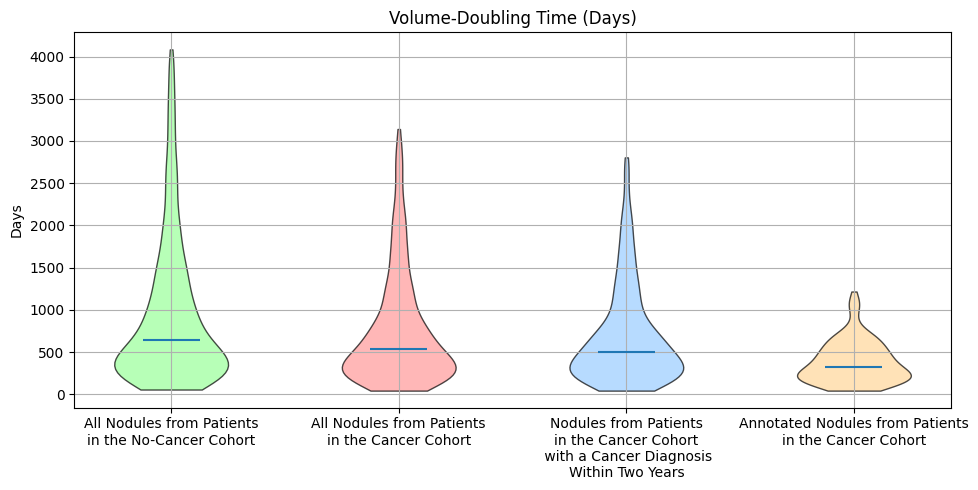

In [12]:
plot(no_cancer3, all_nodules3, cancer3, ann3, title="Volume-Doubling Time (Days)", y_axis_label="Days") # all_nodules = cancer cohort; cancer = cancer in two years

### Days to Cancer Diagnosis (Earliest)

In [13]:
all_nodules4 = [415, 814, 796, 799, 834, 441, 700, 430, 414, 1016, 491, 978, 561, 1029, 545, 392, 421, 403, 640, 839, 549, 482, 645, 517, 436, 436, 849, 1018, 816, 766, 423, 523, 390, 390, 390, 876, 495, 462, 384, 475, 679, 484, 494, 419, 445, 707, 488, 585, 585, 676, 418, 895, 648, 1049, 300, 383, 802, 387, 419, 741, 741, 861, 408, 408, 408, 798, 1012, 417, 1059, 440, 1185, 560, 440, 440, 389, 836, 791, 832, 638, 447, 400, 562, 460, 476, 436, 456, 357, 439, 1018, 799, 810, 1061, 798, 734, 396, 393, 497, 781, 756, 487, 508, 655, 402, 409, 774, 482, 438, 410, 432, 403, 343, 504, 596, 779, 1023, 446, 421, 889, 409, 975, 459, 622, 777, 799, 821, 398, 881, 541, 403, 503, 503, 753, 753, 411, 763, 784, 832, 863, 510]
cancer4 = [415, 814, 796, 799, 834, 441, 700, 430, 414, 1016, 491, 978, 561, 1029, 545, 392, 421, 403, 640, 839, 549, 482, 645, 517, 436, 436, 849, 1018, 816, 766, 423, 523, 390, 390, 390, 876, 495, 462, 384, 475, 679, 484, 494, 419, 445, 707, 488, 585, 585, 676, 418, 895, 648, 1049, 300, 383, 802, 387, 419, 741, 741, 861, 408, 408, 408, 798, 1012, 417, 1059, 440, 1185, 560, 440, 440, 389, 836, 791, 832, 638, 447, 400, 562, 460, 476, 436, 456, 357, 439, 1018, 799, 810, 1061, 396, 393, 497, 781, 756, 487, 508, 655, 402, 409, 482, 438, 410, 432, 403, 343, 504, 596, 779, 1023, 446, 421, 889, 409, 975, 459, 622, 777, 799, 821, 398, 881, 541, 403, 503, 503, 753, 753, 411, 763, 784, 832, 863, 510]
ann4 = [415, 814, 796, 799, 834, 441, 700, 430, 414, 396, 491, 978, 561, 1029, 545, 392, 421, 403, 640, 839, 549, 482, 645, 517, 436, 436, 849, 653, 816, 766, 423, 523, 390, 390, 390, 876, 495, 462, 384, 475, 679, 484, 494, 419, 445, 707, 488, 585, 585, 676, 418, 895, 648, 1049, 300, 383, 419, 741, 741, 861, 408, 408, 408, 798, 1012, 417, 1059, 440, 560, 440, 440, 389, 836, 791, 832, 638, 447, 562, 460, 476, 436, 456, 357, 439, 1018, 799, 810, 1061, 798, 734, 396, 393, 497, 756, 487, 508, 655, 402, 774, 482, 438, 410, 432, 403, 343, 504, 596, 779, 1023, 446, 421, 889, 409, 975, 459, 622, 777, 799, 821, 398, 881, 541, 503, 503, 753, 753, 411, 763, 784, 832, 863]

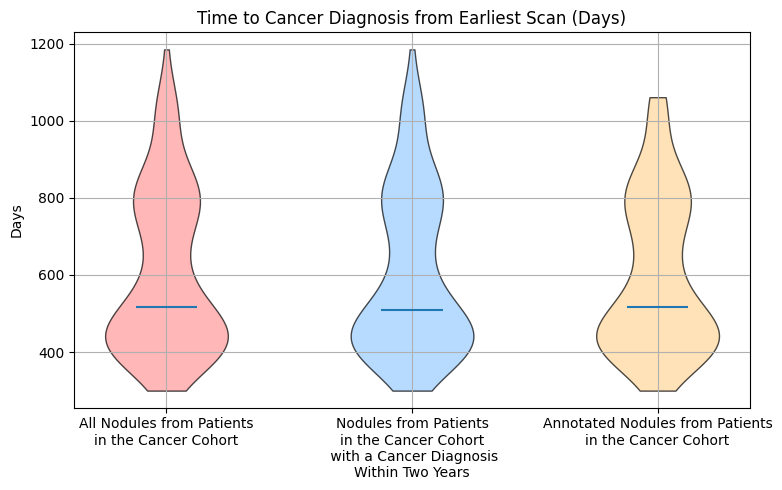

In [14]:
plot3(all_nodules4, cancer4, ann4, title="Time to Cancer Diagnosis from Earliest Scan (Days)", y_axis_label="Days")

### Days to Cancer Diagnosis (Latest)

In [15]:
all_nodules5 = [72, 156, 60, 68, 454, 56, 349, 87, 55, 41, 68, 566, 219, 35, 183, 42, 21, 28, 277, 112, 101, 47, 251, 174, 46, 46, 506, 247, 92, 264, 84, 179, 54, 54, 54, 64, 15, 633, 60, 43, 83, 19, 39, 52, 64, 52, 56, 120, 166, 166, 326, 55, 164, 264, 349, 686, 74, 46, 387, 100, 42, 390, 390, 56, 15, 15, 15, 49, 310, 55, 325, 56, 675, 55, 20, 69, 21, 77, 124, 76, 173, 112, 36, 121, 67, 112, 66, 60, 14, 70, 145, 94, 96, 361, 49, 48, 67, 72, 88, 42, 97, 59, 123, 356, 45, 13, 116, 139, 91, 88, 54, 64, 483, 6, 123, 277, 49, 323, 75, 78, 175, 47, 114, 67, 14, 38, 58, 73, 5, 32, 221, 35, 75, 75, 15, 15, 15, 42, 99, 110, 86, 120]
cancer5 = [72, 156, 60, 68, 454, 56, 349, 87, 55, 41, 68, 566, 219, 35, 183, 42, 21, 28, 277, 112, 101, 47, 251, 174, 46, 46, 506, 247, 92, 264, 84, 179, 54, 54, 54, 64, 15, 633, 60, 43, 83, 19, 39, 52, 64, 52, 56, 120, 166, 166, 326, 55, 164, 264, 349, 686, 74, 46, 387, 100, 42, 390, 390, 56, 15, 15, 15, 49, 310, 55, 325, 56, 675, 55, 20, 69, 21, 77, 124, 76, 173, 112, 36, 121, 67, 112, 66, 60, 14, 70, 145, 94, 96, 361, 67, 72, 88, 42, 97, 59, 123, 356, 45, 13, 139, 91, 88, 54, 64, 483, 6, 123, 277, 49, 323, 75, 78, 175, 47, 114, 67, 14, 38, 58, 73, 5, 32, 221, 35, 75, 75, 15, 15, 15, 42, 99, 110, 86, 120]
ann5 = [72, 156, 60, 68, 454, 56, 349, 87, 55, 41, 68, 566, 219, 35, 183, 42, 21, 28, 277, 112, 101, 47, 251, 174, 46, 46, 506, 247, 92, 264, 84, 179, 54, 54, 54, 64, 15, 633, 60, 43, 83, 19, 39, 52, 64, 52, 56, 120, 166, 166, 326, 55, 164, 264, 349, 686, 74, 46, 387, 100, 42, 390, 390, 56, 15, 15, 15, 49, 310, 55, 325, 56, 675, 55, 20, 69, 21, 77, 124, 76, 173, 112, 36, 121, 67, 112, 66, 60, 14, 70, 145, 94, 96, 361, 49, 48, 67, 72, 88, 42, 97, 59, 123, 356, 45, 13, 116, 139, 91, 88, 54, 64, 483, 6, 123, 277, 49, 323, 75, 78, 175, 47, 114, 67, 14, 38, 58, 73, 5, 32, 221, 35, 75, 75, 15, 15, 15, 42, 99, 110, 86, 120]

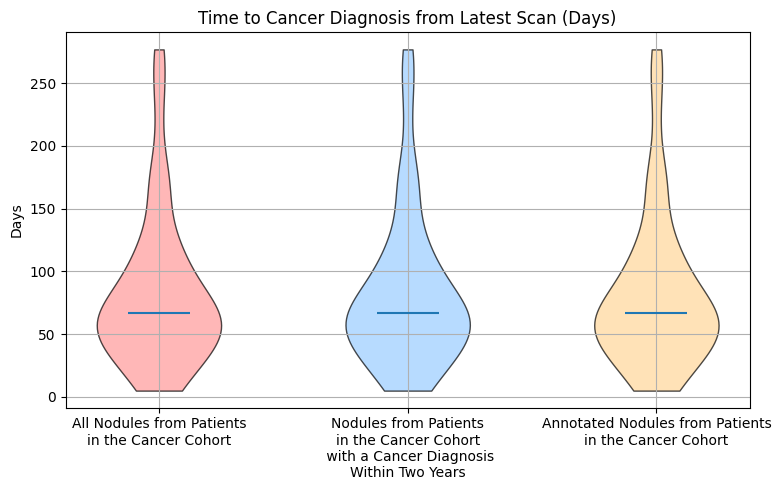

In [16]:
plot3(all_nodules5, cancer5, ann5, title="Time to Cancer Diagnosis from Latest Scan (Days)", y_axis_label="Days")